## Figures

In [371]:
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [372]:
results_dir = "../results/"
out_dir = f"{results_dir}synthetic/"

## random HG and SC

In [373]:
Hs = dict()

N = 100
n_rep = 100
rescale = True # per node

# randomHG
density = 50

Hs_i = []
for i in tqdm(range(n_rep)):
    # print(density * ps)
    # H = xgi.random_hypergraph(N, density * ps)
    H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
    # print(H)
    Hs_i.append(H)
Hs["RHG"] = Hs_i

# random SC
Hs_i = []
for i in tqdm(range(n_rep)):
    H = xgi.read_edgelist(f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
    Hs_i.append(H)
Hs["RSC"] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.14it/s]


In [374]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for kind, Hs_i in Hs.items():

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for H0 in tqdm(Hs_i):

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)
        
        #inverse_rescaling_factors = [max(orders) / d for d in orders]
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        #suffix = "rescaling_present_orders"
        Ds_H, lZs_H = optimization(
            H0,
            tau_c,
            rescaling_factors=inverse_rescaling_factors,
            rescale_per_node=rescale,
        )

        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)

    info_losses[kind] = info_losses_i
    complexities[kind] = complexities_i
    orders_arr[kind] = orders_arr_i
    message_lengths[kind] = message_lengths_i

labels = [f"{i}" for i in kind]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:34,  2.88it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 26.64it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
  9%|███▊                                       | 9/100 [00:03<00:33,  2.73it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00,  8.74it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 27%|███████████▎                              | 27/100 [00:08<00:18,  3.90it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 28%|███████████▊                              | 28/100 [00:08<00:19,  3.77it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 37%|███████████████▌                          | 37/100 [00:10<00:14,  4.24it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 38%|███████████████▉                          | 38/100 [00:11<00:14,  4.23it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 46%|███████████████████▎                      | 46/100 [00:13<00:15,  3.43it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.06it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 47%|███████████████████▋                      | 47/100 [00:13<00:16,  3.26it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w


 56%|███████████████████████▌                  | 56/100 [00:16<00:11,  3.75it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 57%|███████████████████████▉                  | 57/100 [00:16<00:11,  3.71it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 66%|███████████████████████████▋              | 66/100 [00:18<00:09,  3.74it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 27.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 67%|████████████████████████████▏             | 67/100 [00:19<00:09,  3.56it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 85%|███████████████████████████████████▋      | 85/100 [00:23<00:03,  3.95it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 50%|██████████████████████▌                      | 2/4 [00:00<00:00,  5.93it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 95%|███████████████████████████████████████▉  | 95/100 [00:26<00:01,  2.71it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 28.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 

  3%|█▎                                         | 3/100 [00:01<00:39,  2.48it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 26.48it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
  4%|█▋                                         | 4/100 [00:01<00:36,  2.62it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w

 21%|████████▊                                 | 21/100 [00:09<00:39,  2.01it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00,  9.87it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 22%|█████████▏                                | 22/100 [00:10<00:46,  1.66it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w


 50%|██████████████████████▌                      | 2/4 [00:00<00:00, 15.85it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 39%|████████████████▍                         | 39/100 [00:20<00:31,  1.92it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 29.86it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 17.14it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 57%|███████████████████████▉                  | 57/100 [00:29<00:22,  1.95it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 10.79it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.69it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 66%|███████████████████████████▋              | 66/100 [00:33<00:16,  2.09it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 50%|██████████████████████▌                      | 2/4 [00:00<00:00, 19.92it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 21.90it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 84%|███████████████████████████████████▎      | 84/100 [00:41<00:06,  2.40it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.99it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w

In [375]:
pd.DataFrame.from_dict(message_lengths, orient="index").melt()

,variable,value
0,0,"[0.01897536238923843, 0.01559607632818378, 0.0..."
1,0,"[0.015807501436287893, 0.012546130426444351, 0..."
2,1,"[0.015928560648905923, 0.013539697462326982, 0..."
3,1,"[0.01166660335413645, 0.009031676705192383, 0...."
4,2,"[0.017786926673200698, 0.015242587896031827, 0..."
...,...,...
195,97,"[0.011319566567249306, 0.00839506864253663, 0...."
196,98,"[0.01440781460424562, 0.01315754000524625, 0.0..."
197,98,"[0.011443741028612429, 0.009429189828821228, 0..."
198,99,"[0.017316650939378293, 0.015586291143667878, 0..."


In [376]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for kind, kind_data in message_lengths.items():
    # print(label1)
    for rep, rep_data in enumerate(kind_data):
        # print(rep, rep_data)
        #   for label3, array in label2_data.items():
        for index, value in enumerate(rep_data):
            long_form_data.append([value, kind, rep, index + 1])

# Create a DataFrame from the long_form_data list
df = pd.DataFrame(long_form_data, columns=["message length", "kind", "rep", "order"])

df

,message length,kind,rep,order
0,0.018975,RHG,0,1
1,0.015596,RHG,0,2
2,0.014945,RHG,0,3
3,0.012715,RHG,0,4
4,0.015929,RHG,1,1
...,...,...,...,...
795,0.012059,RSC,98,4
796,0.012089,RSC,99,1
797,0.009165,RSC,99,2
798,0.009257,RSC,99,3


In [377]:
palette = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
sb.set_palette(palette)
palette

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/2183736646.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_min = df[mask].groupby("order").mean()["message length"].argmin()
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/2183736646.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_min = df[mask].groupby("order").mean()["message length"].argmin()


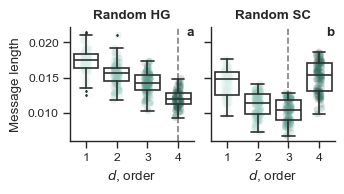

In [379]:
g = sb.catplot(
    kind="box",
    data=df,
    x="order",
    y="message length",
    col="kind",
    # col="tau idx",
    height=2,
    # margin_titles=True,
    sharey=True,
    # aspect=1.5,
    fliersize=1,
    # color="k",
)

for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, kind in enumerate(list(Hs.keys())):

    ax = g.axes[0][i]
    mask = df["kind"] == kind

    annotator = Annotator(
        ax,
        pairs,
        data=df[mask],
        y="message length",
        x="order",
        col="kind",
    )
    annotator.configure(
        test="t-test_ind",
        text_format="star",
        loc="inside",
        verbose=0,
        comparisons_correction="Bonferroni",
        line_width=1,
    )
    #annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
# title = rf"BA SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
# g.fig.suptitle(title)


g.axes[0][0].set_title("Random HG", weight="bold")
g.axes[0][1].set_title("Random SC", weight="bold")

g.axes[0][0].set_ylabel("Message length")
g.axes[0][0].set_xlabel("$d$, order")
g.axes[0][1].set_xlabel("$d$, order")

g.fig.set_size_inches(3.4, 1.8)

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

ax1.text(1, 1, "a", transform=ax1.transAxes, weight="bold", ha="right", va="top")
ax2.text(1, 1, "b", transform=ax2.transAxes, weight="bold", ha="right", va="top")

# ax2.set_ylabel("")
# ax2.set_yticklabels([])
# plt.subplots_adjust(wspace=0.1)

fig_name = f"figure_2_random"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

### triptic

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/1469367013.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4)


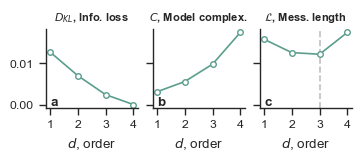

In [391]:
jj = 0
kind = "RSC" #"RHG"

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(3.5, 1.5), layout="constrained")

color = palette[2]

axs[0].plot(orders, info_losses[kind][jj], "o-", c=color, mfc="white", ms=4)
axs[1].plot(orders, complexities[kind][jj], "o-", c=color, mfc="white", ms=4)
axs[2].plot(orders, message_lengths[kind][jj], "o-", c=color, mfc="white", ms=4)

d_opt = np.argmin(message_lengths[kind][jj])
axs[2].axvline(x=orders[d_opt], ls="--", c="silver", zorder=-1)

axs[0].set_title("$D_{KL}$, Info. loss", fontsize="small", weight="bold")
axs[1].set_title("$C$, Model complex.", fontsize="small", weight="bold")
axs[2].set_title("$\mathcal{L}$, Mess. length", fontsize="small", weight="bold")

sb.despine()
plt.subplots_adjust(wspace=0.4)

for ax in axs.ravel():
    ax.set_xticks(orders)
    ax.set_xlabel("$d$, order")
    
axs[0].text(0.05, 0.002, "a", transform=axs[0].transAxes, weight="bold", ha="left", va="bottom")
axs[1].text(0.05, 0.002, "b", transform=axs[1].transAxes, weight="bold", ha="left", va="bottom")
axs[2].text(0.05, 0.002, "c", transform=axs[2].transAxes, weight="bold", ha="left", va="bottom")


fig_name = f"figure_1bis_random_triptych"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")


plt.show()

In [11]:


info_losses[kind] = info_losses_i
complexities[kind] = complexities_i
orders_arr[kind] = orders_arr_i
    message_lengths[kind]

## random hypergraph

In [254]:
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]


annotator = Annotator(None, pairs)

configuration = {
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "inside",
    "comparisons_correction": "Bonferroni",
    "line_width": 1,
}

plot_params = {
    #"data": df,
    "x": "order",
    "y": "message length",
    "hue": "order",
    "palette": palette,
}

annotator.plot_and_annotate_facets(
    plot="stripplot",
    plot_params=plot_params,
    configuration=configuration,
    annotation_func="apply_test",
    data=df
)

TypeError: cannot unpack non-iterable int object

In [154]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 100

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        xgi.write_edgelist(H, f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [05:14<00:00,  3.14s/it]


In [258]:
Annotator

<module 'statannotations.Annotator' from '/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/Annotator.py'>

In [155]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        # H = xgi.random_hypergraph(N, density * ps)
        H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

  3%|█▎                                         | 3/100 [00:11<06:04,  3.76s/it]


KeyboardInterrupt: 

In [14]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for H0 in tqdm(Hs_i):
        
        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=)
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)
                  
    info_losses[density] = info_losses_i
    complexities[density] = complexities_i
    orders_arr[density] = orders_arr_i
    message_lengths[density] = message_lengths_i                          

labels = [f"{i}" for i in density_scales]

100%|█████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


In [15]:
for i, s in enumerate(density_scales):
    message_lengths[s] = pad_arr_list(message_lengths[s])

In [17]:
df = pd.DataFrame.from_dict(message_lengths, orient="index").stack().to_frame()


def unpack_list(row):
    return pd.Series(row[0])


# Apply the function and join the new columns to the DataFrame
df[orders] = df.apply(unpack_list, axis=1)
df = df[orders]

dff = df.reset_index(names=["density", "rep"]).melt(
    id_vars=["density", "rep"],
    value_vars=orders,
    var_name="order",
    value_name="message_length",
)

dff

,density,rep,order,message_length
0,5,0,1,0.046574
1,5,1,1,0.054797
2,5,2,1,0.033745
3,5,3,1,0.048812
4,5,4,1,0.051514
5,10,0,1,0.031161
6,10,1,1,0.034709
7,10,2,1,0.040803
8,10,3,1,0.045811
9,10,4,1,0.029335


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


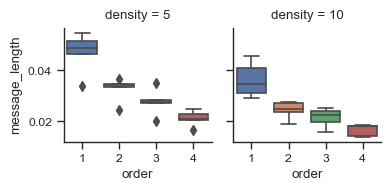

In [30]:
sb.catplot(
    kind="box",
    data=dff,
    x="order",
    y="message_length",
    ax=ax,
    col="density",
    height=2,
    margin_titles=True,
    aspect=1,
)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Welch's t-test independent samples, P_val:1.491e-03 t=3.853e+00
2 vs. 3: Welch's t-test independent samples, P_val:1.340e-01 t=1.570e+00
3 vs. 4: Welch's t-test independent samples, P_val:1.318e-02 t=2.806e+00
1 vs. 3: Welch's t-test independent samples, P_val:1.306e-04 t=5.129e+00
2 vs. 4: Welch's t-test independent samples, P_val:4.658e-04 t=4.495e+00
1 vs. 4: Welch's t-test independent samples, P_val:9.744e-06 t=7.454e+00


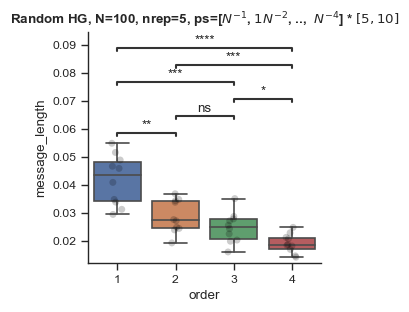

In [18]:
from statannotations.Annotator import Annotator

fix, ax = plt.subplots(figsize=(3, 3))

# palette = sb.color_palette("Set1", n_colors=4)

# box_params = {
#    'boxprops':{'facecolor':'none'},
#    'medianprops':{'color':'silver'},
#'whiskerprops':{'color':'blue'},
#'capprops':{'color':'yellow'}
# }

sb.boxplot(data=dff, x="order", y="message_length", ax=ax)  # , **box_params)

sb.stripplot(
    data=dff, x="order", y="message_length", ax=ax, color="black", dodge=True, alpha=0.2
)  # , legend=False)

sb.despine()
ax.set_title(
    rf"Random HG, N={N}, nrep={n_rep}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * ${density_scales}$",
    weight="bold",
)


pairs = list(combinations(orders, 2))

annotator = Annotator(ax, pairs, data=dff, y="message_length", x="order")
annotator.configure(test="t-test_welch", text_format="star", loc="inside")
annotator.apply_and_annotate()

fig_name = f"message_length_RHG_N{N}_pwiring_{density_scales}_nreps_{n_rep}_boxplot"
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

### Double loop: density, tau

In [25]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 3

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        xgi.write_edgelist(H, f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████████| 3/3 [00:09<00:00,  3.06s/it]


In [156]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        # H = xgi.random_hypergraph(N, density * ps)
        H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 55.99it/s]


In [157]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():

    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            # tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
            )

            info_losses[density][i][j] = Ds_H
            complexities[density][i][j] = lZs_H
            orders_arr[density][i][j] = orders
            message_lengths[density][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[9.16e-04 2.13e-02 4.96e-01 1.15e+01 2.69e+02]


  1%|▍                                          | 1/100 [00:15<26:13, 15.89s/it]

[5.62e-04 1.27e-02 2.86e-01 6.47e+00 1.46e+02]


  2%|▊                                          | 2/100 [00:32<26:46, 16.39s/it]

[6.75e-04 2.03e-02 6.08e-01 1.82e+01 5.47e+02]


  3%|█▎                                         | 3/100 [00:48<26:25, 16.34s/it]

[7.49e-04 1.80e-02 4.34e-01 1.05e+01 2.52e+02]


  4%|█▋                                         | 4/100 [01:04<25:46, 16.11s/it]

[3.35e-04 8.67e-03 2.25e-01 5.82e+00 1.51e+02]


  5%|██▏                                        | 5/100 [01:19<24:31, 15.49s/it]

[9.18e-04 2.00e-02 4.36e-01 9.49e+00 2.07e+02]


  6%|██▌                                        | 6/100 [01:35<25:01, 15.97s/it]

[5.59e-04 1.31e-02 3.06e-01 7.17e+00 1.68e+02]


  7%|███                                        | 7/100 [01:46<21:50, 14.09s/it]

[5.51e-04 1.23e-02 2.73e-01 6.06e+00 1.35e+02]


  8%|███▍                                       | 8/100 [02:04<23:26, 15.28s/it]

[8.87e-04 2.09e-02 4.92e-01 1.16e+01 2.73e+02]


  9%|███▊                                       | 9/100 [02:21<24:11, 15.95s/it]

[5.32e-04 1.30e-02 3.18e-01 7.77e+00 1.90e+02]


 10%|████▏                                     | 10/100 [02:38<24:32, 16.36s/it]

[7.76e-04 2.24e-02 6.48e-01 1.87e+01 5.42e+02]


 11%|████▌                                     | 11/100 [02:56<24:52, 16.77s/it]

[5.37e-04 1.21e-02 2.74e-01 6.20e+00 1.40e+02]


 12%|█████                                     | 12/100 [03:14<25:03, 17.09s/it]

[4.06e-04 1.04e-02 2.67e-01 6.83e+00 1.75e+02]


 13%|█████▍                                    | 13/100 [03:32<25:22, 17.50s/it]

[7.95e-04 2.29e-02 6.57e-01 1.89e+01 5.43e+02]


 14%|█████▉                                    | 14/100 [03:50<25:16, 17.64s/it]

[6.35e-04 1.37e-02 2.97e-01 6.43e+00 1.39e+02]


 15%|██████▎                                   | 15/100 [04:07<24:41, 17.43s/it]

[6.62e-04 1.54e-02 3.56e-01 8.24e+00 1.91e+02]


 16%|██████▋                                   | 16/100 [04:25<24:29, 17.49s/it]

[4.10e-04 1.06e-02 2.75e-01 7.12e+00 1.84e+02]


 17%|███████▏                                  | 17/100 [04:43<24:32, 17.74s/it]

[6.46e-04 1.50e-02 3.50e-01 8.14e+00 1.89e+02]


 18%|███████▌                                  | 18/100 [05:00<23:59, 17.56s/it]

[7.57e-04 1.68e-02 3.73e-01 8.27e+00 1.83e+02]


 19%|███████▉                                  | 19/100 [05:16<23:07, 17.13s/it]

[5.96e-04 1.22e-02 2.51e-01 5.16e+00 1.06e+02]


 20%|████████▍                                 | 20/100 [05:34<23:03, 17.30s/it]

[7.00e-04 1.69e-02 4.09e-01 9.88e+00 2.39e+02]


 21%|████████▊                                 | 21/100 [05:52<22:55, 17.41s/it]

[3.33e-04 9.62e-03 2.78e-01 8.02e+00 2.32e+02]


 22%|█████████▏                                | 22/100 [06:09<22:46, 17.52s/it]

[5.45e-04 1.41e-02 3.66e-01 9.50e+00 2.46e+02]


 23%|█████████▋                                | 23/100 [06:27<22:39, 17.66s/it]

[3.92e-04 9.47e-03 2.29e-01 5.53e+00 1.34e+02]


 24%|██████████                                | 24/100 [06:45<22:28, 17.74s/it]

[5.70e-04 1.34e-02 3.15e-01 7.39e+00 1.74e+02]


 25%|██████████▌                               | 25/100 [07:03<22:00, 17.61s/it]

[8.88e-04 1.95e-02 4.27e-01 9.38e+00 2.06e+02]


 26%|██████████▉                               | 26/100 [07:17<20:31, 16.64s/it]

[4.99e-04 1.24e-02 3.06e-01 7.56e+00 1.87e+02]


 27%|███████████▎                              | 27/100 [07:33<20:03, 16.48s/it]

[6.50e-04 1.36e-02 2.85e-01 5.96e+00 1.25e+02]


 28%|███████████▊                              | 28/100 [07:50<20:04, 16.73s/it]

[6.29e-04 1.63e-02 4.25e-01 1.10e+01 2.87e+02]


 29%|████████████▏                             | 29/100 [08:08<19:58, 16.87s/it]

[5.63e-04 1.46e-02 3.81e-01 9.92e+00 2.58e+02]


 30%|████████████▌                             | 30/100 [08:26<20:02, 17.18s/it]

[5.69e-04 1.26e-02 2.81e-01 6.25e+00 1.39e+02]


 31%|█████████████                             | 31/100 [08:42<19:22, 16.85s/it]

[8.43e-04 2.03e-02 4.87e-01 1.17e+01 2.81e+02]


 32%|█████████████▍                            | 32/100 [08:58<18:56, 16.72s/it]

[6.57e-04 1.36e-02 2.83e-01 5.88e+00 1.22e+02]


 33%|█████████████▊                            | 33/100 [09:15<18:52, 16.90s/it]

[5.47e-04 1.74e-02 5.53e-01 1.76e+01 5.60e+02]


 34%|██████████████▎                           | 34/100 [09:34<19:00, 17.27s/it]

[3.58e-04 9.23e-03 2.38e-01 6.15e+00 1.59e+02]


 35%|██████████████▋                           | 35/100 [09:52<19:00, 17.55s/it]

[5.70e-04 1.51e-02 3.97e-01 1.05e+01 2.77e+02]


 36%|███████████████                           | 36/100 [10:07<18:03, 16.92s/it]

[5.26e-04 1.41e-02 3.79e-01 1.02e+01 2.73e+02]


 37%|███████████████▌                          | 37/100 [10:23<17:32, 16.71s/it]

[5.21e-04 1.32e-02 3.35e-01 8.50e+00 2.16e+02]


 38%|███████████████▉                          | 38/100 [10:38<16:28, 15.94s/it]

[6.55e-04 1.57e-02 3.78e-01 9.09e+00 2.19e+02]


 39%|████████████████▍                         | 39/100 [10:55<16:42, 16.43s/it]

[5.81e-04 1.26e-02 2.73e-01 5.93e+00 1.29e+02]


 40%|████████████████▊                         | 40/100 [11:12<16:37, 16.63s/it]

[5.80e-04 1.70e-02 5.01e-01 1.47e+01 4.32e+02]


 41%|█████████████████▏                        | 41/100 [11:28<16:11, 16.47s/it]

[5.69e-04 1.38e-02 3.33e-01 8.07e+00 1.95e+02]


 42%|█████████████████▋                        | 42/100 [11:46<16:17, 16.85s/it]

[3.79e-04 1.00e-02 2.64e-01 6.95e+00 1.83e+02]


 43%|██████████████████                        | 43/100 [12:03<16:02, 16.88s/it]

[6.68e-04 1.69e-02 4.30e-01 1.09e+01 2.76e+02]


 44%|██████████████████▍                       | 44/100 [12:20<15:53, 17.03s/it]

[3.36e-04 9.91e-03 2.92e-01 8.63e+00 2.55e+02]


 45%|██████████████████▉                       | 45/100 [12:38<15:50, 17.29s/it]

[6.44e-04 1.89e-02 5.55e-01 1.63e+01 4.79e+02]


 46%|███████████████████▎                      | 46/100 [12:57<15:58, 17.76s/it]

[5.90e-04 1.33e-02 3.01e-01 6.80e+00 1.54e+02]


 47%|███████████████████▋                      | 47/100 [13:15<15:44, 17.81s/it]

[4.60e-04 1.06e-02 2.42e-01 5.56e+00 1.28e+02]


 48%|████████████████████▏                     | 48/100 [13:33<15:34, 17.98s/it]

[5.49e-04 1.71e-02 5.33e-01 1.66e+01 5.18e+02]


 49%|████████████████████▌                     | 49/100 [13:52<15:30, 18.24s/it]

[8.52e-04 1.84e-02 3.98e-01 8.61e+00 1.86e+02]


 50%|█████████████████████                     | 50/100 [14:11<15:16, 18.32s/it]

[7.56e-04 1.56e-02 3.23e-01 6.67e+00 1.38e+02]


 51%|█████████████████████▍                    | 51/100 [14:29<14:49, 18.16s/it]

[5.64e-04 1.39e-02 3.44e-01 8.48e+00 2.09e+02]


 52%|█████████████████████▊                    | 52/100 [14:47<14:43, 18.40s/it]

[1.22e-03 3.06e-02 7.68e-01 1.93e+01 4.84e+02]


 53%|██████████████████████▎                   | 53/100 [15:02<13:27, 17.17s/it]

[3.49e-04 8.42e-03 2.03e-01 4.89e+00 1.18e+02]


 54%|██████████████████████▋                   | 54/100 [15:21<13:33, 17.68s/it]

[9.53e-04 1.99e-02 4.15e-01 8.67e+00 1.81e+02]


 55%|███████████████████████                   | 55/100 [15:39<13:28, 17.98s/it]

[5.97e-04 1.57e-02 4.15e-01 1.10e+01 2.89e+02]


 56%|███████████████████████▌                  | 56/100 [15:58<13:23, 18.26s/it]

[7.42e-04 2.10e-02 5.96e-01 1.69e+01 4.79e+02]


 57%|███████████████████████▉                  | 57/100 [16:17<13:17, 18.55s/it]

[6.45e-04 1.64e-02 4.17e-01 1.06e+01 2.70e+02]


 58%|████████████████████████▎                 | 58/100 [16:36<12:53, 18.42s/it]

[7.53e-04 1.65e-02 3.63e-01 7.96e+00 1.75e+02]


 59%|████████████████████████▊                 | 59/100 [16:53<12:26, 18.20s/it]

[5.58e-04 1.46e-02 3.82e-01 9.99e+00 2.61e+02]


 60%|█████████████████████████▏                | 60/100 [17:12<12:09, 18.24s/it]

[8.06e-04 1.80e-02 4.00e-01 8.91e+00 1.98e+02]


 61%|█████████████████████████▌                | 61/100 [17:30<11:56, 18.38s/it]

[1.04e-03 2.08e-02 4.14e-01 8.23e+00 1.64e+02]


 62%|██████████████████████████                | 62/100 [17:49<11:40, 18.43s/it]

[7.40e-04 1.46e-02 2.89e-01 5.72e+00 1.13e+02]


 63%|██████████████████████████▍               | 63/100 [18:07<11:19, 18.36s/it]

[5.23e-04 1.62e-02 5.01e-01 1.55e+01 4.79e+02]


 64%|██████████████████████████▉               | 64/100 [18:26<11:07, 18.55s/it]

[5.12e-04 1.36e-02 3.60e-01 9.54e+00 2.53e+02]


 65%|███████████████████████████▎              | 65/100 [18:44<10:39, 18.26s/it]

[6.06e-04 1.93e-02 6.12e-01 1.95e+01 6.19e+02]


 66%|███████████████████████████▋              | 66/100 [19:01<10:14, 18.07s/it]

[3.49e-04 1.23e-02 4.30e-01 1.51e+01 5.30e+02]


 67%|████████████████████████████▏             | 67/100 [19:19<09:53, 17.97s/it]

[8.42e-04 1.84e-02 4.03e-01 8.83e+00 1.93e+02]


 68%|████████████████████████████▌             | 68/100 [19:38<09:49, 18.41s/it]

[7.97e-04 1.77e-02 3.92e-01 8.70e+00 1.93e+02]


 69%|████████████████████████████▉             | 69/100 [19:58<09:37, 18.64s/it]

[6.00e-04 1.44e-02 3.46e-01 8.30e+00 1.99e+02]


 70%|█████████████████████████████▍            | 70/100 [20:17<09:28, 18.94s/it]

[5.98e-04 1.46e-02 3.55e-01 8.66e+00 2.11e+02]


 71%|█████████████████████████████▊            | 71/100 [20:36<09:09, 18.94s/it]

[8.39e-04 1.98e-02 4.69e-01 1.11e+01 2.62e+02]


 72%|██████████████████████████████▏           | 72/100 [20:55<08:51, 18.98s/it]

[6.36e-04 1.39e-02 3.03e-01 6.61e+00 1.44e+02]


 73%|██████████████████████████████▋           | 73/100 [21:14<08:29, 18.88s/it]

[5.95e-04 1.56e-02 4.10e-01 1.08e+01 2.82e+02]


 74%|███████████████████████████████           | 74/100 [21:33<08:11, 18.90s/it]

[6.80e-04 1.54e-02 3.49e-01 7.93e+00 1.80e+02]


 75%|███████████████████████████████▌          | 75/100 [21:52<07:51, 18.84s/it]

[7.31e-04 2.17e-02 6.45e-01 1.92e+01 5.70e+02]


 76%|███████████████████████████████▉          | 76/100 [22:04<06:49, 17.06s/it]

[6.72e-04 1.52e-02 3.43e-01 7.73e+00 1.75e+02]


 77%|████████████████████████████████▎         | 77/100 [22:24<06:46, 17.66s/it]

[5.06e-04 1.29e-02 3.29e-01 8.38e+00 2.14e+02]


 78%|████████████████████████████████▊         | 78/100 [22:42<06:36, 18.02s/it]

[8.60e-04 2.05e-02 4.87e-01 1.16e+01 2.76e+02]


 79%|█████████████████████████████████▏        | 79/100 [23:02<06:27, 18.46s/it]

[5.58e-04 1.32e-02 3.12e-01 7.36e+00 1.74e+02]


 80%|█████████████████████████████████▌        | 80/100 [23:21<06:12, 18.62s/it]

[5.56e-04 1.44e-02 3.72e-01 9.63e+00 2.49e+02]


 81%|██████████████████████████████████        | 81/100 [23:40<05:57, 18.80s/it]

[8.32e-04 1.67e-02 3.36e-01 6.76e+00 1.36e+02]


 82%|██████████████████████████████████▍       | 82/100 [23:59<05:38, 18.79s/it]

[7.62e-04 1.82e-02 4.36e-01 1.04e+01 2.50e+02]


 83%|██████████████████████████████████▊       | 83/100 [24:18<05:21, 18.91s/it]

[7.07e-04 1.71e-02 4.12e-01 9.93e+00 2.40e+02]


 84%|███████████████████████████████████▎      | 84/100 [24:37<05:02, 18.91s/it]

[4.90e-04 1.31e-02 3.49e-01 9.30e+00 2.48e+02]


 85%|███████████████████████████████████▋      | 85/100 [24:56<04:42, 18.83s/it]

[3.47e-04 9.34e-03 2.51e-01 6.76e+00 1.82e+02]


 86%|████████████████████████████████████      | 86/100 [25:14<04:23, 18.84s/it]

[8.84e-04 1.75e-02 3.46e-01 6.85e+00 1.36e+02]


 87%|████████████████████████████████████▌     | 87/100 [25:33<04:04, 18.78s/it]

[7.74e-04 1.67e-02 3.60e-01 7.77e+00 1.68e+02]


 88%|████████████████████████████████████▉     | 88/100 [25:52<03:45, 18.82s/it]

[5.27e-04 1.21e-02 2.80e-01 6.45e+00 1.49e+02]


 89%|█████████████████████████████████████▍    | 89/100 [26:11<03:28, 18.92s/it]

[7.65e-04 1.70e-02 3.80e-01 8.46e+00 1.88e+02]


 90%|█████████████████████████████████████▊    | 90/100 [26:30<03:08, 18.85s/it]

[5.15e-04 1.37e-02 3.64e-01 9.69e+00 2.58e+02]


 91%|██████████████████████████████████████▏   | 91/100 [26:49<02:49, 18.89s/it]

[3.16e-04 8.27e-03 2.17e-01 5.69e+00 1.49e+02]


 92%|██████████████████████████████████████▋   | 92/100 [27:08<02:31, 18.97s/it]

[3.31e-04 1.00e-02 3.04e-01 9.23e+00 2.80e+02]


 93%|███████████████████████████████████████   | 93/100 [27:25<02:08, 18.38s/it]

[9.77e-04 1.87e-02 3.57e-01 6.81e+00 1.30e+02]


 94%|███████████████████████████████████████▍  | 94/100 [27:42<01:48, 18.06s/it]

[7.06e-04 1.43e-02 2.90e-01 5.87e+00 1.19e+02]


 95%|███████████████████████████████████████▉  | 95/100 [28:01<01:30, 18.11s/it]

[6.39e-04 1.38e-02 2.99e-01 6.49e+00 1.40e+02]


 96%|████████████████████████████████████████▎ | 96/100 [28:18<01:11, 18.00s/it]

[6.43e-04 1.91e-02 5.65e-01 1.68e+01 4.97e+02]


 97%|████████████████████████████████████████▋ | 97/100 [28:36<00:53, 17.90s/it]

[1.49e-03 2.73e-02 4.99e-01 9.12e+00 1.67e+02]


 98%|█████████████████████████████████████████▏| 98/100 [28:49<00:32, 16.34s/it]

[5.03e-04 1.08e-02 2.33e-01 5.02e+00 1.08e+02]


 99%|█████████████████████████████████████████▌| 99/100 [29:06<00:16, 16.78s/it]

[8.60e-04 1.79e-02 3.71e-01 7.70e+00 1.60e+02]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.05e-03 1.90e-02 3.45e-01 6.26e+00 1.14e+02]


  1%|▍                                          | 1/100 [00:17<29:20, 17.79s/it]

[7.53e-04 1.42e-02 2.69e-01 5.10e+00 9.64e+01]


  2%|▊                                          | 2/100 [00:35<29:26, 18.03s/it]

[8.88e-04 1.64e-02 3.02e-01 5.58e+00 1.03e+02]


  3%|█▎                                         | 3/100 [00:53<28:42, 17.75s/it]

[6.95e-04 1.44e-02 2.98e-01 6.19e+00 1.28e+02]


  4%|█▋                                         | 4/100 [01:11<28:29, 17.81s/it]

[6.16e-04 1.14e-02 2.10e-01 3.89e+00 7.18e+01]


  5%|██▏                                        | 5/100 [01:27<27:20, 17.27s/it]

[8.79e-04 1.63e-02 3.01e-01 5.57e+00 1.03e+02]


  6%|██▌                                        | 6/100 [01:44<26:58, 17.22s/it]

[6.61e-04 1.24e-02 2.33e-01 4.37e+00 8.20e+01]


  7%|███                                        | 7/100 [02:01<26:29, 17.09s/it]

[1.03e-03 1.76e-02 3.01e-01 5.13e+00 8.74e+01]


  8%|███▍                                       | 8/100 [02:18<26:21, 17.19s/it]

[1.22e-03 2.12e-02 3.68e-01 6.40e+00 1.11e+02]


  9%|███▊                                       | 9/100 [02:36<26:10, 17.26s/it]

[8.61e-04 1.45e-02 2.46e-01 4.16e+00 7.03e+01]


 10%|████▏                                     | 10/100 [02:53<25:50, 17.23s/it]

[6.78e-04 1.29e-02 2.47e-01 4.72e+00 9.01e+01]


 11%|████▌                                     | 11/100 [03:10<25:28, 17.17s/it]

[8.06e-04 1.88e-02 4.40e-01 1.03e+01 2.40e+02]


 12%|█████                                     | 12/100 [03:28<25:22, 17.30s/it]

[1.00e-03 1.74e-02 3.02e-01 5.23e+00 9.09e+01]


 13%|█████▍                                    | 13/100 [03:45<25:13, 17.39s/it]

[7.37e-04 1.43e-02 2.77e-01 5.36e+00 1.04e+02]


 14%|█████▉                                    | 14/100 [04:03<24:54, 17.38s/it]

[8.87e-04 1.54e-02 2.68e-01 4.67e+00 8.11e+01]


 15%|██████▎                                   | 15/100 [04:20<24:32, 17.32s/it]

[1.06e-03 1.77e-02 2.94e-01 4.90e+00 8.15e+01]


 16%|██████▋                                   | 16/100 [04:37<24:07, 17.23s/it]

[5.94e-04 1.15e-02 2.24e-01 4.35e+00 8.44e+01]


 17%|███████▏                                  | 17/100 [04:54<23:45, 17.17s/it]

[8.75e-04 1.43e-02 2.35e-01 3.86e+00 6.32e+01]


 18%|███████▌                                  | 18/100 [05:11<23:34, 17.25s/it]

[8.29e-04 1.55e-02 2.88e-01 5.38e+00 1.00e+02]


 19%|███████▉                                  | 19/100 [05:29<23:19, 17.28s/it]

[8.26e-04 1.48e-02 2.66e-01 4.77e+00 8.55e+01]


 20%|████████▍                                 | 20/100 [05:46<22:59, 17.25s/it]

[8.20e-04 1.53e-02 2.86e-01 5.34e+00 9.97e+01]


 21%|████████▊                                 | 21/100 [06:03<22:44, 17.27s/it]

[1.14e-03 1.75e-02 2.69e-01 4.13e+00 6.34e+01]


 22%|█████████▏                                | 22/100 [06:20<22:17, 17.15s/it]

[8.29e-04 1.45e-02 2.53e-01 4.42e+00 7.71e+01]


 23%|█████████▋                                | 23/100 [06:37<22:01, 17.16s/it]

[1.10e-03 2.03e-02 3.76e-01 6.95e+00 1.28e+02]


 24%|██████████                                | 24/100 [06:55<21:48, 17.22s/it]

[7.76e-04 1.45e-02 2.72e-01 5.10e+00 9.56e+01]


 25%|██████████▌                               | 25/100 [07:12<21:35, 17.27s/it]

[9.03e-04 1.65e-02 3.00e-01 5.47e+00 9.98e+01]


 26%|██████████▉                               | 26/100 [07:29<21:14, 17.22s/it]

[9.27e-04 1.56e-02 2.64e-01 4.46e+00 7.52e+01]


 27%|███████████▎                              | 27/100 [07:46<20:55, 17.20s/it]

[9.93e-04 1.85e-02 3.45e-01 6.42e+00 1.20e+02]


 28%|███████████▊                              | 28/100 [08:04<20:42, 17.25s/it]

[6.99e-04 1.40e-02 2.79e-01 5.59e+00 1.12e+02]


 29%|████████████▏                             | 29/100 [08:21<20:30, 17.33s/it]

[9.17e-04 1.71e-02 3.19e-01 5.96e+00 1.11e+02]


 30%|████████████▌                             | 30/100 [08:41<21:08, 18.12s/it]

[6.92e-04 1.30e-02 2.43e-01 4.54e+00 8.51e+01]


 31%|█████████████                             | 31/100 [09:00<21:10, 18.42s/it]

[7.33e-04 1.32e-02 2.38e-01 4.28e+00 7.71e+01]


 32%|█████████████▍                            | 32/100 [09:19<21:05, 18.61s/it]

[7.76e-04 1.36e-02 2.37e-01 4.13e+00 7.22e+01]


 33%|█████████████▊                            | 33/100 [09:38<20:56, 18.76s/it]

[1.00e-03 1.72e-02 2.95e-01 5.05e+00 8.67e+01]


 34%|██████████████▎                           | 34/100 [09:58<20:48, 18.92s/it]

[8.48e-04 1.65e-02 3.19e-01 6.20e+00 1.20e+02]


 35%|██████████████▋                           | 35/100 [10:17<20:30, 18.93s/it]

[7.98e-04 1.36e-02 2.31e-01 3.93e+00 6.69e+01]


 36%|███████████████                           | 36/100 [10:36<20:21, 19.09s/it]

[9.60e-04 1.85e-02 3.55e-01 6.83e+00 1.31e+02]


 37%|███████████████▌                          | 37/100 [10:55<19:58, 19.02s/it]

[1.06e-03 1.71e-02 2.76e-01 4.45e+00 7.18e+01]


 38%|███████████████▉                          | 38/100 [11:12<19:11, 18.57s/it]

[7.78e-04 1.48e-02 2.83e-01 5.40e+00 1.03e+02]


 39%|████████████████▍                         | 39/100 [11:30<18:25, 18.13s/it]

[7.04e-04 1.40e-02 2.80e-01 5.59e+00 1.12e+02]


 40%|████████████████▊                         | 40/100 [11:48<18:08, 18.14s/it]

[1.12e-03 1.85e-02 3.06e-01 5.06e+00 8.38e+01]


 41%|█████████████████▏                        | 41/100 [12:04<17:10, 17.47s/it]

[1.18e-03 1.85e-02 2.89e-01 4.53e+00 7.09e+01]


 42%|█████████████████▋                        | 42/100 [12:19<16:22, 16.94s/it]

[8.34e-04 1.46e-02 2.57e-01 4.52e+00 7.94e+01]


 43%|██████████████████                        | 43/100 [12:36<16:04, 16.92s/it]

[9.09e-04 1.57e-02 2.72e-01 4.71e+00 8.14e+01]


 44%|██████████████████▍                       | 44/100 [12:53<15:53, 17.03s/it]

[1.06e-03 1.85e-02 3.26e-01 5.73e+00 1.01e+02]


 45%|██████████████████▉                       | 45/100 [13:11<15:46, 17.21s/it]

[8.53e-04 1.45e-02 2.48e-01 4.22e+00 7.19e+01]


 46%|███████████████████▎                      | 46/100 [13:29<15:38, 17.38s/it]

[1.05e-03 1.79e-02 3.08e-01 5.28e+00 9.05e+01]


 47%|███████████████████▋                      | 47/100 [13:47<15:37, 17.68s/it]

[7.65e-04 1.43e-02 2.68e-01 5.02e+00 9.40e+01]


 48%|████████████████████▏                     | 48/100 [14:05<15:27, 17.83s/it]

[8.56e-04 1.50e-02 2.64e-01 4.64e+00 8.14e+01]


 49%|████████████████████▌                     | 49/100 [14:23<15:09, 17.84s/it]

[6.05e-04 1.26e-02 2.61e-01 5.43e+00 1.13e+02]


 50%|█████████████████████                     | 50/100 [14:41<14:55, 17.91s/it]

[8.52e-04 1.69e-02 3.37e-01 6.70e+00 1.33e+02]


 51%|█████████████████████▍                    | 51/100 [14:58<14:22, 17.60s/it]

[9.81e-04 1.74e-02 3.08e-01 5.45e+00 9.66e+01]


 52%|█████████████████████▊                    | 52/100 [15:16<14:01, 17.53s/it]

[1.04e-03 1.81e-02 3.16e-01 5.51e+00 9.62e+01]


 53%|██████████████████████▎                   | 53/100 [15:33<13:45, 17.57s/it]

[6.73e-04 1.29e-02 2.48e-01 4.76e+00 9.13e+01]


 54%|██████████████████████▋                   | 54/100 [15:50<13:20, 17.40s/it]

[7.87e-04 1.52e-02 2.93e-01 5.65e+00 1.09e+02]


 55%|███████████████████████                   | 55/100 [16:08<13:06, 17.47s/it]

[1.01e-03 1.81e-02 3.24e-01 5.80e+00 1.04e+02]


 56%|███████████████████████▌                  | 56/100 [16:25<12:49, 17.50s/it]

[7.96e-04 1.43e-02 2.56e-01 4.60e+00 8.25e+01]


 57%|███████████████████████▉                  | 57/100 [16:44<12:39, 17.66s/it]

[1.07e-03 1.76e-02 2.92e-01 4.84e+00 8.02e+01]


 58%|████████████████████████▎                 | 58/100 [17:00<12:03, 17.23s/it]

[1.01e-03 2.00e-02 3.99e-01 7.93e+00 1.58e+02]


 59%|████████████████████████▊                 | 59/100 [17:17<11:48, 17.28s/it]

[9.32e-04 1.64e-02 2.90e-01 5.11e+00 9.01e+01]


 60%|█████████████████████████▏                | 60/100 [17:36<11:46, 17.65s/it]

[7.12e-04 1.38e-02 2.68e-01 5.22e+00 1.01e+02]


 61%|█████████████████████████▌                | 61/100 [17:54<11:33, 17.77s/it]

[1.17e-03 1.77e-02 2.68e-01 4.07e+00 6.17e+01]


 62%|██████████████████████████                | 62/100 [18:11<11:06, 17.54s/it]

[9.57e-04 1.68e-02 2.96e-01 5.21e+00 9.16e+01]


 63%|██████████████████████████▍               | 63/100 [18:28<10:43, 17.39s/it]

[1.06e-03 1.89e-02 3.35e-01 5.95e+00 1.06e+02]


 64%|██████████████████████████▉               | 64/100 [18:45<10:20, 17.23s/it]

[5.08e-04 1.12e-02 2.45e-01 5.38e+00 1.18e+02]


 65%|███████████████████████████▎              | 65/100 [19:02<10:06, 17.32s/it]

[8.40e-04 1.59e-02 3.02e-01 5.72e+00 1.08e+02]


 66%|███████████████████████████▋              | 66/100 [19:18<09:34, 16.91s/it]

[6.07e-04 1.20e-02 2.38e-01 4.70e+00 9.29e+01]


 67%|████████████████████████████▏             | 67/100 [19:35<09:13, 16.79s/it]

[8.39e-04 1.57e-02 2.95e-01 5.54e+00 1.04e+02]


 68%|████████████████████████████▌             | 68/100 [19:52<09:02, 16.94s/it]

[9.39e-04 1.58e-02 2.66e-01 4.48e+00 7.55e+01]


 69%|████████████████████████████▉             | 69/100 [20:08<08:38, 16.71s/it]

[9.30e-04 1.56e-02 2.61e-01 4.36e+00 7.30e+01]


 70%|█████████████████████████████▍            | 70/100 [20:27<08:40, 17.34s/it]

[7.61e-04 1.45e-02 2.76e-01 5.26e+00 1.00e+02]


 71%|█████████████████████████████▊            | 71/100 [20:45<08:32, 17.66s/it]

[8.04e-04 1.41e-02 2.47e-01 4.32e+00 7.57e+01]


 72%|██████████████████████████████▏           | 72/100 [21:01<08:00, 17.15s/it]

[8.93e-04 1.60e-02 2.87e-01 5.14e+00 9.21e+01]


 73%|██████████████████████████████▋           | 73/100 [21:17<07:28, 16.60s/it]

[7.25e-04 1.43e-02 2.80e-01 5.50e+00 1.08e+02]


 74%|███████████████████████████████           | 74/100 [21:34<07:19, 16.91s/it]

[7.21e-04 1.59e-02 3.50e-01 7.72e+00 1.70e+02]


 75%|███████████████████████████████▌          | 75/100 [21:52<07:06, 17.06s/it]

[7.06e-04 1.40e-02 2.78e-01 5.53e+00 1.10e+02]


 76%|███████████████████████████████▉          | 76/100 [22:09<06:48, 17.04s/it]

[7.82e-04 1.58e-02 3.20e-01 6.49e+00 1.31e+02]


 77%|████████████████████████████████▎         | 77/100 [22:23<06:17, 16.39s/it]

[9.86e-04 1.79e-02 3.27e-01 5.94e+00 1.08e+02]


 78%|████████████████████████████████▊         | 78/100 [22:40<06:02, 16.47s/it]

[6.75e-04 1.24e-02 2.29e-01 4.21e+00 7.75e+01]


 79%|█████████████████████████████████▏        | 79/100 [22:59<05:59, 17.10s/it]

[8.89e-04 1.62e-02 2.96e-01 5.41e+00 9.87e+01]


 80%|█████████████████████████████████▌        | 80/100 [23:16<05:45, 17.26s/it]

[8.15e-04 1.47e-02 2.65e-01 4.77e+00 8.59e+01]


 81%|██████████████████████████████████        | 81/100 [23:30<05:07, 16.20s/it]

[9.48e-04 1.67e-02 2.93e-01 5.14e+00 9.04e+01]


 82%|██████████████████████████████████▍       | 82/100 [23:45<04:43, 15.74s/it]

[9.04e-04 1.60e-02 2.83e-01 5.00e+00 8.84e+01]


 83%|██████████████████████████████████▊       | 83/100 [24:02<04:35, 16.22s/it]

[8.45e-04 1.50e-02 2.67e-01 4.75e+00 8.44e+01]


 84%|███████████████████████████████████▎      | 84/100 [24:19<04:22, 16.44s/it]

[5.78e-04 1.10e-02 2.09e-01 3.99e+00 7.60e+01]


 85%|███████████████████████████████████▋      | 85/100 [24:37<04:12, 16.82s/it]

[1.02e-03 1.80e-02 3.17e-01 5.59e+00 9.84e+01]


 86%|████████████████████████████████████      | 86/100 [24:54<03:59, 17.10s/it]

[1.05e-03 1.79e-02 3.04e-01 5.16e+00 8.76e+01]


 87%|████████████████████████████████████▌     | 87/100 [25:12<03:42, 17.11s/it]

[8.27e-04 1.55e-02 2.89e-01 5.41e+00 1.01e+02]


 88%|████████████████████████████████████▉     | 88/100 [25:29<03:25, 17.10s/it]

[8.85e-04 1.59e-02 2.87e-01 5.16e+00 9.29e+01]


 89%|█████████████████████████████████████▍    | 89/100 [25:44<03:02, 16.59s/it]

[8.00e-04 1.47e-02 2.70e-01 4.96e+00 9.11e+01]


 90%|█████████████████████████████████████▊    | 90/100 [26:01<02:45, 16.60s/it]

[9.12e-04 1.61e-02 2.84e-01 5.03e+00 8.88e+01]


 91%|██████████████████████████████████████▏   | 91/100 [26:17<02:29, 16.59s/it]

[9.95e-04 1.75e-02 3.08e-01 5.41e+00 9.52e+01]


 92%|██████████████████████████████████████▋   | 92/100 [26:34<02:12, 16.62s/it]

[8.32e-04 1.50e-02 2.71e-01 4.88e+00 8.81e+01]


 93%|███████████████████████████████████████   | 93/100 [26:50<01:54, 16.40s/it]

[6.66e-04 1.24e-02 2.31e-01 4.29e+00 7.99e+01]


 94%|███████████████████████████████████████▍  | 94/100 [27:06<01:38, 16.45s/it]

[8.01e-04 1.43e-02 2.56e-01 4.57e+00 8.16e+01]


 95%|███████████████████████████████████████▉  | 95/100 [27:24<01:23, 16.76s/it]

[7.20e-04 1.35e-02 2.53e-01 4.74e+00 8.88e+01]


 96%|████████████████████████████████████████▎ | 96/100 [27:39<01:04, 16.19s/it]

[7.94e-04 1.47e-02 2.74e-01 5.09e+00 9.45e+01]


 97%|████████████████████████████████████████▋ | 97/100 [27:54<00:48, 16.02s/it]

[9.22e-04 1.73e-02 3.24e-01 6.08e+00 1.14e+02]


 98%|█████████████████████████████████████████▏| 98/100 [28:11<00:32, 16.23s/it]

[9.03e-04 1.66e-02 3.03e-01 5.55e+00 1.02e+02]


 99%|█████████████████████████████████████████▌| 99/100 [28:29<00:16, 16.82s/it]

[7.80e-04 1.48e-02 2.80e-01 5.32e+00 1.01e+02]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.42e-03 1.84e-02 2.37e-01 3.07e+00 3.96e+01]


  1%|▍                                          | 1/100 [00:16<27:48, 16.86s/it]

[1.51e-03 2.00e-02 2.65e-01 3.50e+00 4.63e+01]


  2%|▊                                          | 2/100 [00:33<27:21, 16.75s/it]

[1.52e-03 1.98e-02 2.58e-01 3.35e+00 4.35e+01]


  3%|█▎                                         | 3/100 [00:52<28:22, 17.55s/it]

[1.49e-03 1.95e-02 2.56e-01 3.35e+00 4.40e+01]


  4%|█▋                                         | 4/100 [01:09<27:53, 17.44s/it]

[1.53e-03 1.97e-02 2.53e-01 3.27e+00 4.21e+01]


  5%|██▏                                        | 5/100 [01:27<27:48, 17.56s/it]

[1.59e-03 2.06e-02 2.68e-01 3.47e+00 4.50e+01]


  6%|██▌                                        | 6/100 [01:42<26:12, 16.72s/it]

[1.59e-03 2.05e-02 2.63e-01 3.38e+00 4.34e+01]


  7%|███                                        | 7/100 [01:59<26:16, 16.96s/it]

[1.43e-03 1.88e-02 2.48e-01 3.26e+00 4.29e+01]


  8%|███▍                                       | 8/100 [02:16<26:07, 17.04s/it]

[1.65e-03 2.09e-02 2.66e-01 3.37e+00 4.28e+01]


  9%|███▊                                       | 9/100 [02:34<25:59, 17.14s/it]

[1.59e-03 2.00e-02 2.53e-01 3.19e+00 4.02e+01]


 10%|████▏                                     | 10/100 [02:52<26:07, 17.42s/it]

[1.50e-03 1.94e-02 2.51e-01 3.25e+00 4.21e+01]


 11%|████▌                                     | 11/100 [03:08<25:23, 17.12s/it]

[1.58e-03 2.03e-02 2.60e-01 3.34e+00 4.29e+01]


 12%|█████                                     | 12/100 [03:25<25:10, 17.17s/it]

[1.46e-03 1.90e-02 2.47e-01 3.22e+00 4.20e+01]


 13%|█████▍                                    | 13/100 [03:44<25:26, 17.54s/it]

[1.54e-03 2.03e-02 2.66e-01 3.50e+00 4.59e+01]


 14%|█████▉                                    | 14/100 [04:02<25:32, 17.82s/it]

[1.56e-03 1.97e-02 2.48e-01 3.13e+00 3.94e+01]


 15%|██████▎                                   | 15/100 [04:21<25:28, 17.98s/it]

[1.50e-03 1.93e-02 2.48e-01 3.19e+00 4.10e+01]


 16%|██████▋                                   | 16/100 [04:37<24:41, 17.63s/it]

[1.55e-03 2.12e-02 2.90e-01 3.96e+00 5.42e+01]


 17%|███████▏                                  | 17/100 [04:55<24:16, 17.54s/it]

[1.52e-03 1.98e-02 2.59e-01 3.39e+00 4.42e+01]


 18%|███████▌                                  | 18/100 [05:12<23:51, 17.45s/it]

[1.42e-03 1.87e-02 2.46e-01 3.23e+00 4.25e+01]


 19%|███████▉                                  | 19/100 [05:30<23:56, 17.74s/it]

[1.44e-03 1.93e-02 2.59e-01 3.48e+00 4.68e+01]


 20%|████████▍                                 | 20/100 [05:48<23:39, 17.75s/it]

[1.39e-03 1.83e-02 2.40e-01 3.16e+00 4.16e+01]


 21%|████████▊                                 | 21/100 [06:04<22:46, 17.29s/it]

[1.58e-03 1.99e-02 2.51e-01 3.17e+00 3.99e+01]


 22%|█████████▏                                | 22/100 [06:22<22:45, 17.51s/it]

[1.53e-03 1.99e-02 2.59e-01 3.37e+00 4.38e+01]


 23%|█████████▋                                | 23/100 [06:42<23:10, 18.05s/it]

[1.47e-03 1.95e-02 2.59e-01 3.44e+00 4.57e+01]


 24%|█████████▌                              | 24/100 [10:53<1:51:38, 88.13s/it]

[1.37e-03 1.80e-02 2.37e-01 3.12e+00 4.10e+01]


 25%|██████████                              | 25/100 [11:13<1:24:20, 67.47s/it]

[1.46e-03 1.93e-02 2.54e-01 3.35e+00 4.42e+01]


 26%|██████████▏                            | 26/100 [28:09<7:14:22, 352.19s/it]

[1.42e-03 1.94e-02 2.64e-01 3.60e+00 4.92e+01]


 27%|██████████▎                           | 27/100 [56:41<15:24:45, 760.07s/it]

[1.28e-03 1.75e-02 2.40e-01 3.28e+00 4.49e+01]


 28%|██████████▋                           | 28/100 [57:00<10:45:20, 537.78s/it]

[1.43e-03 1.90e-02 2.53e-01 3.37e+00 4.49e+01]


 29%|███████████▎                           | 29/100 [57:19<7:32:18, 382.23s/it]

[1.52e-03 2.00e-02 2.63e-01 3.46e+00 4.56e+01]


 30%|███████████                          | 30/100 [1:06:25<8:22:59, 431.14s/it]

[1.56e-03 2.11e-02 2.86e-01 3.87e+00 5.23e+01]


 31%|███████████▍                         | 31/100 [1:06:45<5:54:03, 307.87s/it]

[1.55e-03 1.98e-02 2.51e-01 3.20e+00 4.07e+01]


 32%|███████████▊                         | 32/100 [1:07:03<4:10:26, 220.97s/it]

[1.58e-03 2.00e-02 2.52e-01 3.19e+00 4.04e+01]


 33%|████████████▏                        | 33/100 [1:07:21<2:58:37, 159.97s/it]

[1.47e-03 1.94e-02 2.58e-01 3.42e+00 4.54e+01]


 34%|████████████▌                        | 34/100 [1:07:39<2:09:10, 117.43s/it]

[1.61e-03 2.04e-02 2.58e-01 3.27e+00 4.15e+01]


 35%|█████████████▎                        | 35/100 [1:07:57<1:34:54, 87.61s/it]

[1.41e-03 1.91e-02 2.59e-01 3.52e+00 4.77e+01]


 36%|█████████████▋                        | 36/100 [1:08:14<1:10:58, 66.53s/it]

[1.52e-03 1.98e-02 2.57e-01 3.34e+00 4.33e+01]


 37%|██████████████▊                         | 37/100 [1:08:29<53:36, 51.06s/it]

[1.55e-03 2.06e-02 2.73e-01 3.62e+00 4.80e+01]


 38%|███████████████▏                        | 38/100 [1:08:46<42:08, 40.78s/it]

[1.74e-03 2.17e-02 2.72e-01 3.40e+00 4.25e+01]


 39%|███████████████▌                        | 39/100 [1:09:03<34:07, 33.57s/it]

[1.57e-03 1.97e-02 2.48e-01 3.13e+00 3.94e+01]


 40%|████████████████                        | 40/100 [1:09:20<28:44, 28.74s/it]

[1.56e-03 2.09e-02 2.81e-01 3.78e+00 5.08e+01]


 41%|████████████████▍                       | 41/100 [1:09:38<25:11, 25.62s/it]

[1.53e-03 1.98e-02 2.57e-01 3.33e+00 4.31e+01]


 42%|████████████████▊                       | 42/100 [1:09:57<22:41, 23.48s/it]

[1.57e-03 1.99e-02 2.52e-01 3.18e+00 4.03e+01]


 43%|█████████████████▏                      | 43/100 [1:10:14<20:36, 21.69s/it]

[1.55e-03 2.05e-02 2.70e-01 3.55e+00 4.68e+01]


 44%|█████████████████▌                      | 44/100 [1:10:33<19:16, 20.66s/it]

[1.48e-03 1.92e-02 2.49e-01 3.22e+00 4.17e+01]


 45%|██████████████████                      | 45/100 [1:10:50<17:56, 19.58s/it]

[1.61e-03 2.06e-02 2.64e-01 3.37e+00 4.32e+01]


 46%|██████████████████▍                     | 46/100 [1:11:07<16:58, 18.86s/it]

[1.39e-03 1.86e-02 2.48e-01 3.32e+00 4.44e+01]


 47%|██████████████████▊                     | 47/100 [1:11:25<16:26, 18.61s/it]

[1.42e-03 1.89e-02 2.51e-01 3.34e+00 4.44e+01]


 48%|███████████████████▏                    | 48/100 [1:11:43<15:58, 18.43s/it]

[1.25e-03 1.73e-02 2.38e-01 3.27e+00 4.51e+01]


 49%|███████████████████▌                    | 49/100 [1:12:00<15:21, 18.07s/it]

[1.63e-03 2.12e-02 2.75e-01 3.58e+00 4.66e+01]


 50%|████████████████████                    | 50/100 [1:12:18<14:53, 17.86s/it]

[1.52e-03 2.00e-02 2.64e-01 3.48e+00 4.59e+01]


 51%|████████████████████▍                   | 51/100 [1:12:34<14:14, 17.45s/it]

[1.45e-03 1.93e-02 2.58e-01 3.44e+00 4.60e+01]


 52%|████████████████████▊                   | 52/100 [1:12:51<13:48, 17.26s/it]

[1.52e-03 1.96e-02 2.52e-01 3.24e+00 4.17e+01]


 53%|█████████████████████▏                  | 53/100 [1:13:09<13:41, 17.49s/it]

[1.69e-03 2.19e-02 2.83e-01 3.65e+00 4.71e+01]


 54%|█████████████████████▌                  | 54/100 [1:13:26<13:21, 17.42s/it]

[1.51e-03 1.98e-02 2.61e-01 3.43e+00 4.51e+01]


 55%|██████████████████████                  | 55/100 [1:13:44<13:05, 17.45s/it]

[1.54e-03 2.03e-02 2.67e-01 3.52e+00 4.64e+01]


 56%|██████████████████████▍                 | 56/100 [1:14:01<12:46, 17.43s/it]

[1.60e-03 1.99e-02 2.48e-01 3.09e+00 3.85e+01]


 57%|██████████████████████▊                 | 57/100 [1:14:19<12:31, 17.49s/it]

[1.34e-03 1.83e-02 2.50e-01 3.41e+00 4.67e+01]


 58%|███████████████████████▏                | 58/100 [1:14:36<12:12, 17.44s/it]

[1.47e-03 1.90e-02 2.46e-01 3.19e+00 4.13e+01]


 59%|███████████████████████▌                | 59/100 [1:14:54<12:07, 17.74s/it]

[1.49e-03 1.94e-02 2.53e-01 3.31e+00 4.31e+01]


 60%|████████████████████████                | 60/100 [1:15:12<11:47, 17.70s/it]

[1.51e-03 2.05e-02 2.77e-01 3.74e+00 5.06e+01]


 61%|████████████████████████▍               | 61/100 [1:15:31<11:43, 18.03s/it]

[1.51e-03 1.95e-02 2.53e-01 3.28e+00 4.26e+01]


 62%|████████████████████████▊               | 62/100 [1:15:49<11:27, 18.10s/it]

[1.46e-03 1.94e-02 2.58e-01 3.43e+00 4.56e+01]


 63%|█████████████████████████▏              | 63/100 [1:16:07<11:09, 18.10s/it]

[1.51e-03 1.93e-02 2.48e-01 3.18e+00 4.07e+01]


 64%|█████████████████████████▌              | 64/100 [1:16:25<10:52, 18.11s/it]

[1.57e-03 1.99e-02 2.51e-01 3.16e+00 4.00e+01]


 65%|██████████████████████████              | 65/100 [1:16:44<10:39, 18.26s/it]

[1.50e-03 1.89e-02 2.39e-01 3.02e+00 3.82e+01]


 66%|██████████████████████████▍             | 66/100 [1:17:02<10:20, 18.24s/it]

[1.58e-03 1.98e-02 2.50e-01 3.14e+00 3.95e+01]


 67%|██████████████████████████▊             | 67/100 [1:17:21<10:04, 18.30s/it]

[1.50e-03 1.97e-02 2.57e-01 3.37e+00 4.41e+01]


 68%|███████████████████████████▏            | 68/100 [1:17:39<09:46, 18.34s/it]

[1.38e-03 1.83e-02 2.43e-01 3.22e+00 4.27e+01]


 69%|███████████████████████████▌            | 69/100 [1:17:58<09:34, 18.52s/it]

[1.38e-03 1.83e-02 2.44e-01 3.24e+00 4.31e+01]


 70%|████████████████████████████            | 70/100 [1:18:17<09:15, 18.51s/it]

[1.42e-03 1.86e-02 2.44e-01 3.20e+00 4.19e+01]


 71%|████████████████████████████▍           | 71/100 [1:18:34<08:51, 18.31s/it]

[1.54e-03 2.00e-02 2.60e-01 3.36e+00 4.36e+01]


 72%|████████████████████████████▊           | 72/100 [1:18:53<08:35, 18.42s/it]

[1.40e-03 1.83e-02 2.38e-01 3.09e+00 4.03e+01]


 73%|█████████████████████████████▏          | 73/100 [1:19:11<08:13, 18.29s/it]

[1.42e-03 1.91e-02 2.56e-01 3.44e+00 4.62e+01]


 74%|█████████████████████████████▌          | 74/100 [1:19:29<07:52, 18.18s/it]

[1.30e-03 1.77e-02 2.42e-01 3.31e+00 4.52e+01]


 75%|██████████████████████████████          | 75/100 [1:19:47<07:36, 18.24s/it]

[1.38e-03 1.87e-02 2.55e-01 3.48e+00 4.73e+01]


 76%|██████████████████████████████▍         | 76/100 [1:20:06<07:21, 18.42s/it]

[1.43e-03 1.91e-02 2.55e-01 3.40e+00 4.53e+01]


 77%|██████████████████████████████▊         | 77/100 [1:20:24<06:56, 18.13s/it]

[1.54e-03 2.01e-02 2.61e-01 3.40e+00 4.43e+01]


 78%|███████████████████████████████▏        | 78/100 [1:20:42<06:39, 18.16s/it]

[1.56e-03 1.99e-02 2.53e-01 3.22e+00 4.10e+01]


 79%|███████████████████████████████▌        | 79/100 [1:21:00<06:21, 18.18s/it]

[1.52e-03 2.06e-02 2.79e-01 3.77e+00 5.11e+01]


 80%|████████████████████████████████        | 80/100 [1:21:18<06:01, 18.10s/it]

[1.32e-03 1.77e-02 2.37e-01 3.18e+00 4.26e+01]


 81%|████████████████████████████████▍       | 81/100 [1:21:37<05:50, 18.46s/it]

[1.37e-03 1.83e-02 2.44e-01 3.26e+00 4.34e+01]


 82%|████████████████████████████████▊       | 82/100 [1:21:57<05:38, 18.78s/it]

[1.64e-03 2.06e-02 2.60e-01 3.27e+00 4.11e+01]


 83%|█████████████████████████████████▏      | 83/100 [1:22:16<05:22, 18.95s/it]

[1.34e-03 1.86e-02 2.57e-01 3.55e+00 4.90e+01]


 84%|█████████████████████████████████▌      | 84/100 [1:22:35<05:04, 19.02s/it]

[1.51e-03 1.95e-02 2.51e-01 3.23e+00 4.16e+01]


 85%|██████████████████████████████████      | 85/100 [1:22:55<04:46, 19.07s/it]

[1.64e-03 2.04e-02 2.55e-01 3.19e+00 3.99e+01]


 86%|██████████████████████████████████▍     | 86/100 [1:23:14<04:28, 19.15s/it]

[1.42e-03 1.86e-02 2.44e-01 3.21e+00 4.22e+01]


 87%|██████████████████████████████████▊     | 87/100 [1:23:33<04:09, 19.20s/it]

[1.66e-03 2.10e-02 2.65e-01 3.35e+00 4.23e+01]


 88%|███████████████████████████████████▏    | 88/100 [1:23:52<03:50, 19.21s/it]

[1.42e-03 1.87e-02 2.47e-01 3.26e+00 4.30e+01]


 89%|███████████████████████████████████▌    | 89/100 [1:24:11<03:30, 19.16s/it]

[1.55e-03 1.99e-02 2.56e-01 3.28e+00 4.21e+01]


 90%|████████████████████████████████████    | 90/100 [1:24:31<03:11, 19.19s/it]

[1.26e-03 1.80e-02 2.57e-01 3.66e+00 5.22e+01]


 91%|████████████████████████████████████▍   | 91/100 [1:24:50<02:52, 19.18s/it]

[1.38e-03 1.84e-02 2.45e-01 3.26e+00 4.34e+01]


 92%|████████████████████████████████████▊   | 92/100 [1:25:09<02:33, 19.16s/it]

[1.56e-03 2.09e-02 2.80e-01 3.76e+00 5.03e+01]


 93%|█████████████████████████████████████▏  | 93/100 [1:25:28<02:13, 19.00s/it]

[1.46e-03 1.97e-02 2.66e-01 3.59e+00 4.85e+01]


 94%|█████████████████████████████████████▌  | 94/100 [1:25:46<01:53, 18.85s/it]

[1.56e-03 2.04e-02 2.67e-01 3.49e+00 4.57e+01]


 95%|██████████████████████████████████████  | 95/100 [1:26:05<01:33, 18.77s/it]

[1.53e-03 2.03e-02 2.68e-01 3.54e+00 4.68e+01]


 96%|██████████████████████████████████████▍ | 96/100 [1:26:24<01:15, 18.79s/it]

[1.48e-03 1.96e-02 2.61e-01 3.47e+00 4.62e+01]


 97%|██████████████████████████████████████▊ | 97/100 [1:26:42<00:56, 18.68s/it]

[1.52e-03 1.92e-02 2.43e-01 3.07e+00 3.87e+01]


 98%|███████████████████████████████████████▏| 98/100 [1:27:00<00:36, 18.39s/it]

[1.22e-03 1.71e-02 2.41e-01 3.38e+00 4.75e+01]


 99%|███████████████████████████████████████▌| 99/100 [1:27:18<00:18, 18.49s/it]

[1.59e-03 2.03e-02 2.59e-01 3.31e+00 4.22e+01]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.81e-03 2.16e-02 2.58e-01 3.08e+00 3.68e+01]


  1%|▍                                          | 1/100 [00:18<31:05, 18.84s/it]

[1.83e-03 2.15e-02 2.52e-01 2.95e+00 3.46e+01]


  2%|▊                                          | 2/100 [00:37<30:40, 18.78s/it]

[1.67e-03 2.07e-02 2.55e-01 3.15e+00 3.89e+01]


  3%|█▎                                         | 3/100 [00:56<30:30, 18.88s/it]

[1.75e-03 2.09e-02 2.50e-01 2.99e+00 3.57e+01]


  4%|█▋                                         | 4/100 [01:15<30:15, 18.92s/it]

[1.71e-03 2.02e-02 2.39e-01 2.83e+00 3.35e+01]


  5%|██▏                                        | 5/100 [01:34<30:03, 18.99s/it]

[1.78e-03 2.11e-02 2.50e-01 2.96e+00 3.50e+01]


  6%|██▌                                        | 6/100 [01:53<29:46, 19.01s/it]

[1.73e-03 2.12e-02 2.60e-01 3.19e+00 3.91e+01]


  7%|███                                        | 7/100 [02:12<29:32, 19.06s/it]

[1.82e-03 2.17e-02 2.58e-01 3.07e+00 3.66e+01]


  8%|███▍                                       | 8/100 [02:31<29:06, 18.98s/it]

[1.78e-03 2.10e-02 2.47e-01 2.91e+00 3.42e+01]


  9%|███▊                                       | 9/100 [02:49<28:15, 18.64s/it]

[1.83e-03 2.16e-02 2.54e-01 3.00e+00 3.53e+01]


 10%|████▏                                     | 10/100 [03:07<27:38, 18.43s/it]

[1.76e-03 2.10e-02 2.51e-01 3.00e+00 3.59e+01]


 11%|████▌                                     | 11/100 [03:24<26:35, 17.92s/it]

[1.74e-03 2.12e-02 2.60e-01 3.18e+00 3.88e+01]


 12%|█████                                     | 12/100 [03:43<26:40, 18.18s/it]

[1.83e-03 2.16e-02 2.56e-01 3.02e+00 3.58e+01]


 13%|█████▍                                    | 13/100 [04:01<26:19, 18.16s/it]

[1.84e-03 2.22e-02 2.68e-01 3.24e+00 3.91e+01]


 14%|█████▉                                    | 14/100 [04:18<25:47, 17.99s/it]

[1.56e-03 2.03e-02 2.64e-01 3.43e+00 4.46e+01]


 15%|██████▎                                   | 15/100 [04:35<24:53, 17.57s/it]

[1.64e-03 2.04e-02 2.53e-01 3.14e+00 3.90e+01]


 16%|██████▋                                   | 16/100 [04:52<24:28, 17.48s/it]

[1.68e-03 2.04e-02 2.49e-01 3.03e+00 3.69e+01]


 17%|███████▏                                  | 17/100 [05:11<24:44, 17.88s/it]

[1.70e-03 2.09e-02 2.57e-01 3.16e+00 3.89e+01]


 18%|███████▌                                  | 18/100 [05:30<24:50, 18.18s/it]

[1.66e-03 2.08e-02 2.62e-01 3.29e+00 4.14e+01]


 19%|███████▉                                  | 19/100 [05:49<24:54, 18.45s/it]

[1.77e-03 2.13e-02 2.56e-01 3.07e+00 3.68e+01]


 20%|████████▍                                 | 20/100 [06:08<24:45, 18.57s/it]

[1.75e-03 2.17e-02 2.67e-01 3.30e+00 4.08e+01]


 21%|████████▊                                 | 21/100 [06:27<24:54, 18.91s/it]

[1.73e-03 2.05e-02 2.44e-01 2.89e+00 3.43e+01]


 22%|█████████▏                                | 22/100 [06:47<24:45, 19.04s/it]

[1.76e-03 2.06e-02 2.42e-01 2.84e+00 3.34e+01]


 23%|█████████▋                                | 23/100 [07:06<24:25, 19.03s/it]

[1.67e-03 2.04e-02 2.48e-01 3.01e+00 3.67e+01]


 24%|██████████                                | 24/100 [07:25<24:07, 19.05s/it]

[1.66e-03 2.00e-02 2.40e-01 2.89e+00 3.48e+01]


 25%|██████████▌                               | 25/100 [07:44<23:51, 19.09s/it]

[1.70e-03 2.08e-02 2.53e-01 3.09e+00 3.76e+01]


 26%|██████████▉                               | 26/100 [08:03<23:31, 19.07s/it]

[1.79e-03 2.11e-02 2.49e-01 2.93e+00 3.45e+01]


 27%|███████████▎                              | 27/100 [08:22<23:17, 19.15s/it]

[1.88e-03 2.21e-02 2.60e-01 3.05e+00 3.58e+01]


 28%|███████████▊                              | 28/100 [08:42<23:02, 19.21s/it]

[1.77e-03 2.13e-02 2.57e-01 3.10e+00 3.73e+01]


 29%|████████████▏                             | 29/100 [09:01<22:49, 19.29s/it]

[1.80e-03 2.16e-02 2.59e-01 3.12e+00 3.74e+01]


 30%|████████████▌                             | 30/100 [09:21<22:32, 19.33s/it]

[1.70e-03 2.04e-02 2.45e-01 2.93e+00 3.52e+01]


 31%|█████████████                             | 31/100 [09:40<22:14, 19.35s/it]

[1.75e-03 2.12e-02 2.57e-01 3.11e+00 3.76e+01]


 32%|█████████████▍                            | 32/100 [10:00<21:59, 19.40s/it]

[1.61e-03 2.00e-02 2.50e-01 3.11e+00 3.87e+01]


 33%|█████████████▊                            | 33/100 [10:19<21:42, 19.44s/it]

[1.86e-03 2.18e-02 2.54e-01 2.96e+00 3.46e+01]


 34%|██████████████▎                           | 34/100 [10:37<20:56, 19.04s/it]

[1.70e-03 2.05e-02 2.46e-01 2.96e+00 3.56e+01]


 35%|██████████████▋                           | 35/100 [10:57<20:42, 19.12s/it]

[1.55e-03 1.93e-02 2.40e-01 2.99e+00 3.71e+01]


 36%|███████████████                           | 36/100 [11:13<19:39, 18.43s/it]

[1.78e-03 2.12e-02 2.51e-01 2.99e+00 3.55e+01]


 37%|███████████████▌                          | 37/100 [11:30<18:44, 17.84s/it]

[1.69e-03 2.11e-02 2.63e-01 3.28e+00 4.10e+01]


 38%|███████████████▉                          | 38/100 [11:47<18:05, 17.52s/it]

[1.86e-03 2.23e-02 2.67e-01 3.21e+00 3.85e+01]


 39%|████████████████▍                         | 39/100 [12:05<18:00, 17.71s/it]

[1.63e-03 1.96e-02 2.36e-01 2.84e+00 3.41e+01]


 40%|████████████████▊                         | 40/100 [12:23<17:44, 17.74s/it]

[1.67e-03 2.01e-02 2.42e-01 2.92e+00 3.52e+01]


 41%|█████████████████▏                        | 41/100 [12:40<17:16, 17.56s/it]

[1.82e-03 2.16e-02 2.56e-01 3.04e+00 3.61e+01]


 42%|█████████████████▋                        | 42/100 [12:58<17:09, 17.75s/it]

[1.79e-03 2.11e-02 2.50e-01 2.96e+00 3.50e+01]


 43%|██████████████████                        | 43/100 [13:15<16:42, 17.58s/it]

[1.80e-03 2.15e-02 2.56e-01 3.04e+00 3.62e+01]


 44%|██████████████████▍                       | 44/100 [13:31<15:59, 17.13s/it]

[1.75e-03 2.08e-02 2.47e-01 2.93e+00 3.48e+01]


 45%|██████████████████▉                       | 45/100 [13:49<15:51, 17.30s/it]

[1.86e-03 2.25e-02 2.73e-01 3.31e+00 4.01e+01]


 46%|███████████████████▎                      | 46/100 [14:06<15:31, 17.24s/it]

[1.72e-03 2.04e-02 2.42e-01 2.88e+00 3.42e+01]


 47%|███████████████████▋                      | 47/100 [14:25<15:39, 17.73s/it]

[1.75e-03 2.12e-02 2.56e-01 3.09e+00 3.72e+01]


 48%|████████████████████▏                     | 48/100 [14:43<15:33, 17.96s/it]

[1.62e-03 1.98e-02 2.41e-01 2.94e+00 3.58e+01]


 49%|████████████████████▌                     | 49/100 [15:02<15:29, 18.23s/it]

[1.74e-03 2.05e-02 2.41e-01 2.85e+00 3.36e+01]


 50%|█████████████████████                     | 50/100 [15:21<15:20, 18.41s/it]

[1.72e-03 2.05e-02 2.45e-01 2.92e+00 3.49e+01]


 51%|█████████████████████▍                    | 51/100 [15:38<14:33, 17.83s/it]

[1.71e-03 2.06e-02 2.48e-01 2.99e+00 3.59e+01]


 52%|█████████████████████▊                    | 52/100 [15:56<14:29, 18.11s/it]

[1.75e-03 2.16e-02 2.66e-01 3.29e+00 4.05e+01]


 53%|██████████████████████▎                   | 53/100 [16:15<14:15, 18.19s/it]

[1.77e-03 2.16e-02 2.65e-01 3.24e+00 3.97e+01]


 54%|██████████████████████▋                   | 54/100 [16:33<13:59, 18.24s/it]

[1.79e-03 2.18e-02 2.65e-01 3.22e+00 3.92e+01]


 55%|███████████████████████                   | 55/100 [16:51<13:42, 18.28s/it]

[1.69e-03 2.08e-02 2.56e-01 3.16e+00 3.89e+01]


 56%|███████████████████████▌                  | 56/100 [17:09<13:19, 18.18s/it]

[1.76e-03 2.08e-02 2.45e-01 2.88e+00 3.39e+01]


 57%|███████████████████████▉                  | 57/100 [17:27<12:59, 18.13s/it]

[1.68e-03 2.05e-02 2.51e-01 3.08e+00 3.77e+01]


 58%|████████████████████████▎                 | 58/100 [17:44<12:26, 17.77s/it]

[1.63e-03 1.98e-02 2.41e-01 2.93e+00 3.57e+01]


 59%|████████████████████████▊                 | 59/100 [18:03<12:19, 18.05s/it]

[1.74e-03 2.08e-02 2.48e-01 2.96e+00 3.54e+01]


 60%|█████████████████████████▏                | 60/100 [18:21<12:03, 18.09s/it]

[1.80e-03 2.20e-02 2.69e-01 3.29e+00 4.02e+01]


 61%|█████████████████████████▌                | 61/100 [18:39<11:46, 18.11s/it]

[1.70e-03 2.07e-02 2.51e-01 3.05e+00 3.71e+01]


 62%|██████████████████████████                | 62/100 [18:58<11:33, 18.25s/it]

[1.74e-03 2.08e-02 2.49e-01 2.98e+00 3.56e+01]


 63%|██████████████████████████▍               | 63/100 [19:16<11:17, 18.30s/it]

[1.75e-03 2.07e-02 2.44e-01 2.88e+00 3.40e+01]


 64%|██████████████████████████▉               | 64/100 [19:35<11:04, 18.47s/it]

[1.51e-03 1.87e-02 2.33e-01 2.89e+00 3.59e+01]


 65%|███████████████████████████▎              | 65/100 [19:53<10:41, 18.32s/it]

[1.74e-03 2.11e-02 2.55e-01 3.08e+00 3.72e+01]


 66%|███████████████████████████▋              | 66/100 [20:11<10:21, 18.27s/it]

[1.84e-03 2.18e-02 2.59e-01 3.08e+00 3.66e+01]


 67%|████████████████████████████▏             | 67/100 [20:30<10:11, 18.52s/it]

[1.72e-03 2.06e-02 2.48e-01 2.98e+00 3.58e+01]


 68%|████████████████████████████▌             | 68/100 [20:48<09:47, 18.35s/it]

[1.72e-03 2.07e-02 2.48e-01 2.98e+00 3.59e+01]


 69%|████████████████████████████▉             | 69/100 [21:05<09:15, 17.92s/it]

[1.80e-03 2.13e-02 2.51e-01 2.97e+00 3.52e+01]


 70%|█████████████████████████████▍            | 70/100 [21:23<08:53, 17.79s/it]

[1.80e-03 2.20e-02 2.68e-01 3.26e+00 3.98e+01]


 71%|█████████████████████████████▊            | 71/100 [21:40<08:31, 17.62s/it]

[1.86e-03 2.15e-02 2.48e-01 2.86e+00 3.31e+01]


 72%|██████████████████████████████▏           | 72/100 [21:58<08:19, 17.84s/it]

[1.74e-03 2.09e-02 2.52e-01 3.02e+00 3.64e+01]


 73%|██████████████████████████████▋           | 73/100 [22:15<07:56, 17.63s/it]

[1.66e-03 2.00e-02 2.42e-01 2.93e+00 3.54e+01]


 74%|███████████████████████████████           | 74/100 [22:33<07:37, 17.59s/it]

[1.68e-03 2.03e-02 2.47e-01 2.99e+00 3.62e+01]


 75%|███████████████████████████████▌          | 75/100 [22:51<07:22, 17.71s/it]

[1.90e-03 2.24e-02 2.63e-01 3.10e+00 3.64e+01]


 76%|███████████████████████████████▉          | 76/100 [23:09<07:03, 17.67s/it]

[1.70e-03 2.03e-02 2.41e-01 2.87e+00 3.42e+01]


 77%|████████████████████████████████▎         | 77/100 [23:27<06:49, 17.81s/it]

[1.74e-03 2.11e-02 2.56e-01 3.10e+00 3.77e+01]


 78%|████████████████████████████████▊         | 78/100 [23:45<06:32, 17.86s/it]

[1.76e-03 2.11e-02 2.53e-01 3.03e+00 3.63e+01]


 79%|█████████████████████████████████▏        | 79/100 [24:02<06:14, 17.84s/it]

[1.75e-03 2.12e-02 2.56e-01 3.09e+00 3.73e+01]


 80%|█████████████████████████████████▌        | 80/100 [24:21<05:58, 17.95s/it]

[1.66e-03 2.06e-02 2.54e-01 3.15e+00 3.89e+01]


 81%|██████████████████████████████████        | 81/100 [24:39<05:45, 18.17s/it]

[1.73e-03 2.11e-02 2.56e-01 3.11e+00 3.79e+01]


 82%|██████████████████████████████████▍       | 82/100 [24:56<05:18, 17.71s/it]

[1.74e-03 2.07e-02 2.47e-01 2.94e+00 3.50e+01]


 83%|██████████████████████████████████▊       | 83/100 [25:14<05:04, 17.94s/it]

[1.70e-03 2.08e-02 2.55e-01 3.12e+00 3.82e+01]


 84%|███████████████████████████████████▎      | 84/100 [25:33<04:51, 18.25s/it]

[1.55e-03 1.95e-02 2.45e-01 3.08e+00 3.88e+01]


 85%|███████████████████████████████████▋      | 85/100 [25:52<04:34, 18.28s/it]

[1.76e-03 2.12e-02 2.57e-01 3.10e+00 3.75e+01]


 86%|████████████████████████████████████      | 86/100 [26:10<04:16, 18.31s/it]

[1.70e-03 2.07e-02 2.52e-01 3.07e+00 3.73e+01]


 87%|████████████████████████████████████▌     | 87/100 [26:28<03:57, 18.26s/it]

[1.63e-03 1.97e-02 2.38e-01 2.88e+00 3.48e+01]


 88%|████████████████████████████████████▉     | 88/100 [26:46<03:38, 18.22s/it]

[1.81e-03 2.15e-02 2.56e-01 3.04e+00 3.61e+01]


 89%|█████████████████████████████████████▍    | 89/100 [27:04<03:19, 18.12s/it]

[1.85e-03 2.13e-02 2.47e-01 2.85e+00 3.29e+01]


 90%|█████████████████████████████████████▊    | 90/100 [27:23<03:04, 18.44s/it]

[1.75e-03 2.14e-02 2.63e-01 3.22e+00 3.95e+01]


 91%|██████████████████████████████████████▏   | 91/100 [27:42<02:46, 18.49s/it]

[1.47e-03 1.91e-02 2.50e-01 3.25e+00 4.24e+01]


 92%|██████████████████████████████████████▋   | 92/100 [28:01<02:28, 18.52s/it]

[1.77e-03 2.12e-02 2.53e-01 3.03e+00 3.63e+01]


 93%|███████████████████████████████████████   | 93/100 [28:20<02:10, 18.61s/it]

[1.78e-03 2.20e-02 2.71e-01 3.35e+00 4.14e+01]


 94%|███████████████████████████████████████▍  | 94/100 [28:38<01:51, 18.65s/it]

[1.68e-03 2.00e-02 2.40e-01 2.87e+00 3.43e+01]


 95%|███████████████████████████████████████▉  | 95/100 [28:56<01:32, 18.46s/it]

[1.74e-03 2.13e-02 2.60e-01 3.17e+00 3.88e+01]


 96%|████████████████████████████████████████▎ | 96/100 [29:14<01:13, 18.36s/it]

[1.63e-03 2.01e-02 2.47e-01 3.04e+00 3.74e+01]


 97%|████████████████████████████████████████▋ | 97/100 [29:32<00:54, 18.17s/it]

[1.85e-03 2.18e-02 2.56e-01 3.02e+00 3.56e+01]


 98%|█████████████████████████████████████████▏| 98/100 [29:51<00:36, 18.24s/it]

[1.72e-03 2.15e-02 2.67e-01 3.32e+00 4.14e+01]


 99%|█████████████████████████████████████████▌| 99/100 [30:09<00:18, 18.30s/it]

[1.74e-03 2.08e-02 2.47e-01 2.95e+00 3.51e+01]


100%|█████████████████████████████████████████| 100/100 [30:27<00:00, 18.27s/it]


In [161]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df = pd.DataFrame(
    long_form_data, columns=["message length", "density", "rep", "tau idx", "order"]
)

In [162]:
df

,message length,density,rep,tau idx,order
0,0.000007,5,0,0,1
1,0.000005,5,0,0,2
2,0.000005,5,0,0,3
3,0.000003,5,0,0,4
4,0.003468,5,0,1,1
...,...,...,...,...,...
7985,4.580763,100,99,3,4
7986,4.605170,100,99,4,1
7987,4.605170,100,99,4,2
7988,4.605170,100,99,4,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group

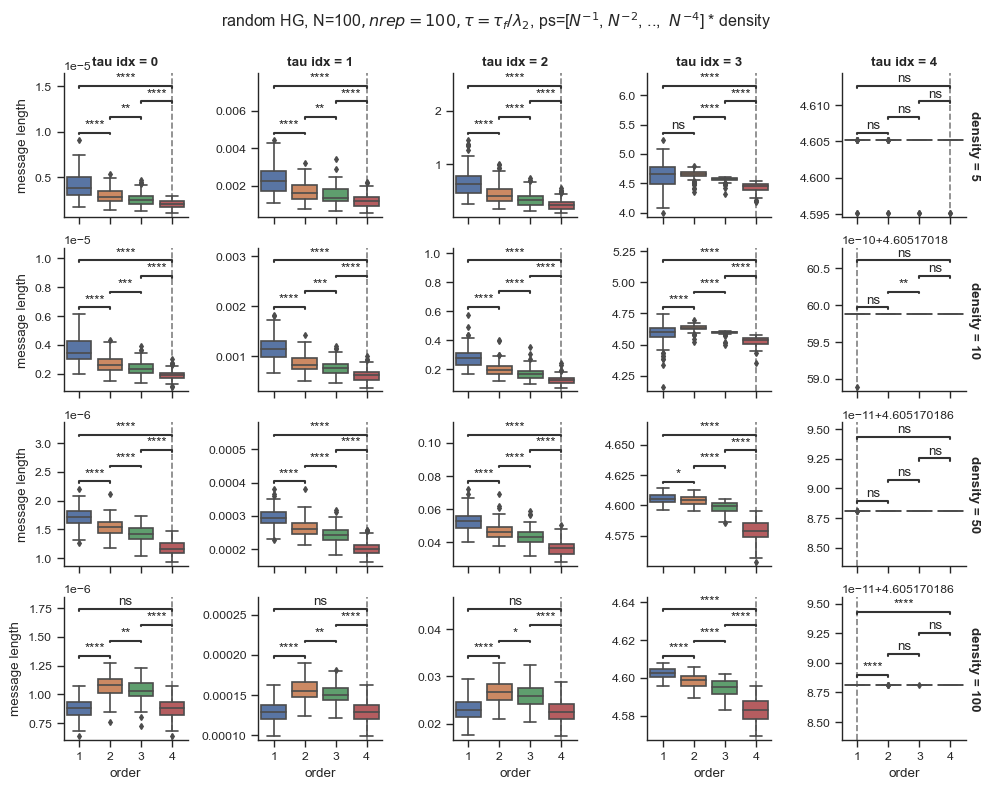

In [164]:
g = sb.catplot(
    kind="box",
    data=df,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df["tau idx"] == i) * (df["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random HG, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RHG_N{N}_density_{density_scales}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [165]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RHG_N100_density_[5, 10, 50, 100]_nreps_100_boxplot'

## Random SC

In [327]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [20, 50, 100]

n_rep = 100

rescale = True

In [328]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_simplicial_complex(N, density * ps)
        # print(H)
        xgi.write_edgelist(H, f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [06:39<00:00,  4.00s/it]


In [329]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        H = xgi.read_edgelist(f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
        Hs_i.append(H)
    Hs[density] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.32it/s]


In [330]:
Hs.keys()

dict_keys([20, 50, 100])

In [331]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():

    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        #inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        #taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        #taus = np.geomspace(tau_N, tau_2, num=4, endpoint=True)
        taus = generate_geomspace_points(tau_N, tau_2, 3, 1)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            # tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
                sparse=False,
                sparse_Lap=False,
            )

            info_losses[density][i][j] = Ds_H
            complexities[density][i][j] = lZs_H
            orders_arr[density][i][j] = orders
            message_lengths[density][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.41e-02 8.45e-02 2.96e-01 1.04e+00 3.65e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.40it/s]

  1%|▍                                          | 1/100 [00:01<01:54,  1.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.04e-02 7.81e-02 2.99e-01 1.14e+00 4.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.03it/s]

  2%|▊                                          | 2/100 [00:02<01:58,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.34e-02 8.11e-02 2.81e-01 9.71e-01 3.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.03it/s]

  3%|█▎                                         | 3/100 [00:03<01:59,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.13e-02 9.35e-02 4.12e-01 1.81e+00 7.97e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.85it/s]

  4%|█▋                                         | 4/100 [00:04<01:54,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.25e-02 9.92e-02 3.03e-01 9.27e-01 2.83e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.46it/s]

  5%|██▏                                        | 5/100 [00:05<01:53,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.30e-02 8.52e-02 3.15e-01 1.16e+00 4.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.95it/s]

  6%|██▌                                        | 6/100 [00:07<01:58,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.09e-02 7.52e-02 2.71e-01 9.78e-01 3.52e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.33it/s]

  7%|███                                        | 7/100 [00:08<02:01,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.10e-02 7.91e-02 2.97e-01 1.12e+00 4.20e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.07it/s]

  8%|███▍                                       | 8/100 [00:09<01:56,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.48e-02 9.63e-02 2.67e-01 7.39e-01 2.05e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.02it/s]

  9%|███▊                                       | 9/100 [00:11<01:53,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.20e-02 1.00e-01 3.13e-01 9.80e-01 3.06e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.13it/s]

 10%|████▏                                     | 10/100 [00:12<01:50,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.53e-02 1.00e-01 2.85e-01 8.11e-01 2.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.57it/s]

 11%|████▌                                     | 11/100 [00:13<01:51,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.77e-02 6.87e-02 2.66e-01 1.03e+00 4.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.85it/s]

 12%|█████                                     | 12/100 [00:14<01:49,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.11e-02 9.50e-02 2.90e-01 8.84e-01 2.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.80it/s]

 13%|█████▍                                    | 13/100 [00:16<01:49,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.05e-02 7.46e-02 2.71e-01 9.83e-01 3.57e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.97it/s]

 14%|█████▉                                    | 14/100 [00:17<01:47,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.27e-02 9.31e-02 2.65e-01 7.56e-01 2.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.17it/s]

 15%|██████▎                                   | 15/100 [00:18<01:46,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.05e-02 6.96e-02 2.36e-01 8.03e-01 2.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.81it/s]

 16%|██████▋                                   | 16/100 [00:19<01:43,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.14e-02 9.13e-02 2.65e-01 7.70e-01 2.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.77it/s]

 17%|███████▏                                  | 17/100 [00:21<01:44,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.53e-02 1.00e-01 2.85e-01 8.08e-01 2.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.88it/s]

 18%|███████▌                                  | 18/100 [00:22<01:48,  1.32s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.92e-02 1.02e-01 2.63e-01 6.80e-01 1.76e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.54it/s]

 19%|███████▉                                  | 19/100 [00:23<01:46,  1.32s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.83e-02 8.66e-02 2.65e-01 8.13e-01 2.49e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.95it/s]

 20%|████████▍                                 | 20/100 [00:25<01:44,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.52e-02 8.88e-02 3.13e-01 1.11e+00 3.90e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.63it/s]

 21%|████████▊                                 | 21/100 [00:26<01:42,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.05e-02 9.71e-02 3.09e-01 9.84e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.49it/s]

 22%|█████████▏                                | 22/100 [00:27<01:42,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.67e-02 8.98e-02 3.02e-01 1.02e+00 3.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.33it/s]

 23%|█████████▋                                | 23/100 [00:29<01:39,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.05e-02 9.31e-02 2.84e-01 8.65e-01 2.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.54it/s]

 24%|██████████                                | 24/100 [00:30<01:37,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.36e-02 9.77e-02 2.84e-01 8.27e-01 2.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.39it/s]

 25%|██████████▌                               | 25/100 [00:31<01:36,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.94e-02 7.20e-02 2.67e-01 9.93e-01 3.68e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.00it/s]

 26%|██████████▉                               | 26/100 [00:32<01:35,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.12e-02 7.97e-02 2.99e-01 1.12e+00 4.22e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.60it/s]

 27%|███████████▎                              | 27/100 [00:34<01:31,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.55e-02 8.26e-02 2.68e-01 8.68e-01 2.81e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.79it/s]

 28%|███████████▊                              | 28/100 [00:35<01:31,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.00e-02 8.04e-02 3.22e-01 1.29e+00 5.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.79it/s]

 29%|████████████▏                             | 29/100 [00:36<01:28,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.84e-02 9.21e-02 2.99e-01 9.70e-01 3.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.55it/s]

 30%|████████████▌                             | 30/100 [00:37<01:26,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.89e-02 8.53e-02 2.51e-01 7.40e-01 2.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.01it/s]

 31%|█████████████                             | 31/100 [00:38<01:23,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.40e-02 9.91e-02 2.89e-01 8.43e-01 2.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.76it/s]

 32%|█████████████▍                            | 32/100 [00:40<01:21,  1.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.14e-02 9.26e-02 2.74e-01 8.08e-01 2.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.07it/s]

 33%|█████████████▊                            | 33/100 [00:41<01:23,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.55e-02 7.86e-02 2.42e-01 7.45e-01 2.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.18it/s]

 34%|██████████████▎                           | 34/100 [00:42<01:22,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.13e-02 7.17e-02 2.41e-01 8.09e-01 2.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.19it/s]

 35%|██████████████▋                           | 35/100 [00:44<01:21,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.39e-02 7.92e-02 2.63e-01 8.72e-01 2.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.16it/s]

 36%|███████████████                           | 36/100 [00:45<01:21,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 8.34e-02 2.52e-01 7.64e-01 2.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.01it/s]

 37%|███████████████▌                          | 37/100 [00:46<01:20,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.08e-02 9.47e-02 2.91e-01 8.94e-01 2.75e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.86it/s]

 38%|███████████████▉                          | 38/100 [00:47<01:17,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.24e-02 9.91e-02 3.03e-01 9.28e-01 2.84e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.10it/s]

 39%|████████████████▍                         | 39/100 [00:49<01:19,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.10e-02 7.26e-02 2.50e-01 8.64e-01 2.98e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.02it/s]

 40%|████████████████▊                         | 40/100 [00:50<01:16,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.58e-02 8.68e-02 2.92e-01 9.81e-01 3.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.12it/s]

 41%|█████████████████▏                        | 41/100 [00:51<01:15,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.50e-02 8.73e-02 3.05e-01 1.07e+00 3.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.89it/s]

 42%|█████████████████▋                        | 42/100 [00:52<01:13,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.47e-02 1.08e-01 3.33e-01 1.03e+00 3.20e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.68it/s]

 43%|██████████████████                        | 43/100 [00:54<01:11,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.65e-02 1.06e-01 3.06e-01 8.87e-01 2.57e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.91it/s]

 44%|██████████████████▍                       | 44/100 [00:55<01:11,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.68e-02 6.54e-02 2.54e-01 9.87e-01 3.84e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.70it/s]

 45%|██████████████████▉                       | 45/100 [00:56<01:09,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.33e-02 8.04e-02 2.78e-01 9.60e-01 3.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.99it/s]

 46%|███████████████████▎                      | 46/100 [00:57<01:06,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.75e-02 9.26e-02 3.13e-01 1.05e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.73it/s]

 47%|███████████████████▋                      | 47/100 [00:59<01:06,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.72e-02 8.23e-02 2.49e-01 7.54e-01 2.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.39it/s]

 48%|████████████████████▏                     | 48/100 [01:00<01:04,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.16e-02 9.19e-02 2.67e-01 7.76e-01 2.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.78it/s]

 49%|████████████████████▌                     | 49/100 [01:01<01:03,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.88e-02 7.61e-02 3.09e-01 1.25e+00 5.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.31it/s]

 50%|█████████████████████                     | 50/100 [01:02<01:02,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.01e-02 7.41e-02 2.73e-01 1.01e+00 3.71e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.30it/s]

 51%|█████████████████████▍                    | 51/100 [01:04<01:00,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 8.47e-02 2.60e-01 8.00e-01 2.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.76it/s]

 52%|█████████████████████▊                    | 52/100 [01:05<01:01,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.59e-02 9.09e-02 3.20e-01 1.12e+00 3.95e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.15it/s]

 53%|██████████████████████▎                   | 53/100 [01:06<00:59,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.56e-02 8.90e-02 3.09e-01 1.07e+00 3.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.90it/s]

 54%|██████████████████████▋                   | 54/100 [01:08<00:59,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.28e-02 7.39e-02 2.40e-01 7.79e-01 2.53e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.88it/s]

 55%|███████████████████████                   | 55/100 [01:09<00:56,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.24e-02 9.97e-02 3.06e-01 9.42e-01 2.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.05it/s]

 56%|███████████████████████▌                  | 56/100 [01:10<00:56,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.68e-02 1.02e-01 2.83e-01 7.87e-01 2.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.74it/s]

 57%|███████████████████████▉                  | 57/100 [01:11<00:55,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.63e-02 8.69e-02 2.87e-01 9.48e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.09it/s]

 58%|████████████████████████▎                 | 58/100 [01:13<00:52,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.97e-02 1.00e-01 3.38e-01 1.14e+00 3.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.01it/s]

 59%|████████████████████████▊                 | 59/100 [01:14<00:51,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.57e-02 8.23e-02 2.63e-01 8.41e-01 2.69e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.86it/s]

 60%|█████████████████████████▏                | 60/100 [01:15<00:49,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.45e-02 8.93e-02 3.25e-01 1.18e+00 4.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.92it/s]

 61%|█████████████████████████▌                | 61/100 [01:16<00:47,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.51e-02 8.30e-02 2.74e-01 9.07e-01 3.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.11it/s]

 62%|██████████████████████████                | 62/100 [01:18<00:46,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.79e-02 9.06e-02 2.94e-01 9.52e-01 3.09e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.84it/s]

 63%|██████████████████████████▍               | 63/100 [01:19<00:45,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.47e-02 1.04e-01 3.15e-01 9.48e-01 2.86e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.69it/s]

 64%|██████████████████████████▉               | 64/100 [01:20<00:44,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.58e-02 8.38e-02 2.72e-01 8.85e-01 2.88e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.58it/s]

 65%|███████████████████████████▎              | 65/100 [01:21<00:43,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.95e-02 8.74e-02 2.59e-01 7.69e-01 2.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.73it/s]

 66%|███████████████████████████▋              | 66/100 [01:23<00:42,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.10e-02 1.09e-01 2.88e-01 7.62e-01 2.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.65it/s]

 67%|████████████████████████████▏             | 67/100 [01:24<00:41,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 9.99e-02 3.62e-01 1.31e+00 4.75e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.76it/s]

 68%|████████████████████████████▌             | 68/100 [01:25<00:38,  1.22s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.07e-02 9.46e-02 2.91e-01 8.98e-01 2.77e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.33it/s]

 69%|████████████████████████████▉             | 69/100 [01:26<00:37,  1.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.28e-02 8.11e-02 2.89e-01 1.03e+00 3.66e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.06it/s]

 70%|█████████████████████████████▍            | 70/100 [01:27<00:35,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.19e-02 8.47e-02 3.28e-01 1.27e+00 4.92e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.25it/s]

 71%|█████████████████████████████▊            | 71/100 [01:29<00:35,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.81e-02 8.54e-02 2.60e-01 7.89e-01 2.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.95it/s]

 72%|██████████████████████████████▏           | 72/100 [01:30<00:33,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.39e-02 1.13e-01 2.91e-01 7.49e-01 1.93e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.47it/s]

 73%|██████████████████████████████▋           | 73/100 [01:31<00:33,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.67e-02 8.50e-02 4.31e-01 2.19e+00 1.11e+01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.10it/s]

 74%|███████████████████████████████           | 74/100 [01:32<00:32,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.45e-02 9.76e-02 3.89e-01 1.55e+00 6.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.19it/s]

 75%|███████████████████████████████▌          | 75/100 [01:33<00:30,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.52e-02 8.50e-02 2.86e-01 9.64e-01 3.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.21it/s]

 76%|███████████████████████████████▉          | 76/100 [01:35<00:29,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.37e-02 1.02e-01 3.07e-01 9.26e-01 2.79e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.41it/s]

 77%|████████████████████████████████▎         | 77/100 [01:36<00:28,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.97e-02 9.51e-02 3.05e-01 9.77e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 34.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.17it/s]

 78%|████████████████████████████████▊         | 78/100 [01:37<00:26,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.93e-02 7.34e-02 2.80e-01 1.07e+00 4.06e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.10it/s]

 79%|█████████████████████████████████▏        | 79/100 [01:38<00:24,  1.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.89e-02 7.26e-02 2.79e-01 1.07e+00 4.12e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.80it/s]

 80%|█████████████████████████████████▌        | 80/100 [01:40<00:25,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.50e-02 1.06e-01 3.20e-01 9.69e-01 2.93e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.79it/s]

 81%|██████████████████████████████████        | 81/100 [01:41<00:24,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.95e-02 9.99e-02 3.38e-01 1.14e+00 3.86e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.78it/s]

 82%|██████████████████████████████████▍       | 82/100 [01:42<00:23,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.19e-02 1.00e-01 3.13e-01 9.81e-01 3.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.87it/s]

 83%|██████████████████████████████████▊       | 83/100 [01:44<00:22,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.63e-02 1.07e-01 3.14e-01 9.22e-01 2.71e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.49it/s]

 84%|███████████████████████████████████▎      | 84/100 [01:45<00:20,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.62e-02 8.85e-02 2.99e-01 1.01e+00 3.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.98it/s]

 85%|███████████████████████████████████▋      | 85/100 [01:46<00:18,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.14e-02 7.91e-02 2.93e-01 1.08e+00 4.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.46it/s]

 86%|████████████████████████████████████      | 86/100 [01:47<00:17,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.94e-02 8.90e-02 2.69e-01 8.16e-01 2.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.72it/s]

 87%|████████████████████████████████████▌     | 87/100 [01:49<00:16,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.21e-02 1.16e-01 3.20e-01 8.82e-01 2.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.50it/s]

 88%|████████████████████████████████████▉     | 88/100 [01:50<00:15,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.03e-02 7.21e-02 2.56e-01 9.06e-01 3.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.82it/s]

 89%|█████████████████████████████████████▍    | 89/100 [01:51<00:14,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 9.30e-02 3.13e-01 1.06e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.80it/s]

 90%|█████████████████████████████████████▊    | 90/100 [01:52<00:12,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.90e-02 8.95e-02 2.77e-01 8.54e-01 2.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

 91%|██████████████████████████████████████▏   | 91/100 [01:54<00:11,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.41e-02 9.09e-02 3.43e-01 1.30e+00 4.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.03it/s]

 92%|██████████████████████████████████████▋   | 92/100 [01:55<00:09,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.03e-02 8.42e-02 3.49e-01 1.45e+00 6.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.06it/s]

 93%|███████████████████████████████████████   | 93/100 [01:56<00:08,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.41e-02 8.41e-02 2.93e-01 1.02e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.98it/s]

 94%|███████████████████████████████████████▍  | 94/100 [01:57<00:07,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.40e-02 8.11e-02 2.74e-01 9.27e-01 3.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.37it/s]

 95%|███████████████████████████████████████▉  | 95/100 [01:59<00:06,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.44e-02 9.90e-02 2.85e-01 8.21e-01 2.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.67it/s]

 96%|████████████████████████████████████████▎ | 96/100 [02:01<00:06,  1.55s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.09e-02 9.04e-02 2.65e-01 7.76e-01 2.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.01it/s]

 97%|████████████████████████████████████████▋ | 97/100 [02:02<00:04,  1.48s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.93e-02 9.49e-02 3.08e-01 9.97e-01 3.23e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.60it/s]

 98%|█████████████████████████████████████████▏| 98/100 [02:03<00:02,  1.42s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.68e-02 8.89e-02 2.95e-01 9.77e-01 3.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.14it/s]

 99%|█████████████████████████████████████████▌| 99/100 [02:05<00:01,  1.36s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.21e-02 9.86e-02 3.03e-01 9.33e-01 2.87e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.82it/s]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.92e-02 1.32e-01 2.95e-01 6.60e-01 1.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.90it/s]

  1%|▍                                          | 1/100 [00:02<03:30,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.39e-02 1.06e-01 2.57e-01 6.21e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.31it/s]

  2%|▊                                          | 2/100 [00:04<03:29,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.17e-02 1.51e-01 2.79e-01 5.17e-01 9.55e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.82it/s]

  3%|█▎                                         | 3/100 [00:06<03:29,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.91e-02 1.16e-01 2.73e-01 6.44e-01 1.52e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.09it/s]

  4%|█▋                                         | 4/100 [00:08<03:25,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.05e-02 1.14e-01 2.60e-01 5.89e-01 1.34e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.79it/s]

  5%|██▏                                        | 5/100 [00:10<03:18,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.33e-02 1.21e-01 2.74e-01 6.21e-01 1.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.03it/s]

  6%|██▌                                        | 6/100 [00:12<03:16,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.75e-02 1.20e-01 2.51e-01 5.26e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.38it/s]

  7%|███                                        | 7/100 [00:14<03:20,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.13e-02 1.14e-01 2.56e-01 5.71e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.73it/s]

  8%|███▍                                       | 8/100 [00:17<03:18,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.35e-02 1.27e-01 3.02e-01 7.16e-01 1.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.25it/s]

  9%|███▊                                       | 9/100 [00:19<03:15,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.29e-02 1.08e-01 2.73e-01 6.87e-01 1.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.08it/s]

 10%|████▏                                     | 10/100 [00:21<03:08,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.17e-02 1.18e-01 2.70e-01 6.16e-01 1.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.33it/s]

 11%|████▌                                     | 11/100 [00:23<03:03,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.70e-02 1.21e-01 2.59e-01 5.51e-01 1.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.54it/s]

 12%|█████                                     | 12/100 [00:25<03:01,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.74e-02 1.25e-01 2.71e-01 5.89e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

 13%|█████▍                                    | 13/100 [00:27<03:00,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.98e-02 1.25e-01 2.63e-01 5.50e-01 1.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.82it/s]

 14%|█████▉                                    | 14/100 [00:29<02:59,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.05e-02 1.19e-01 2.79e-01 6.56e-01 1.54e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

 15%|██████▎                                   | 15/100 [00:31<02:58,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.87e-02 1.11e-01 2.52e-01 5.74e-01 1.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.16it/s]

 16%|██████▋                                   | 16/100 [00:33<02:57,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.07e-02 1.38e-01 2.70e-01 5.28e-01 1.03e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.74it/s]

 17%|███████▏                                  | 17/100 [00:35<02:55,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.80e-02 9.73e-02 2.50e-01 6.40e-01 1.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.56it/s]

 18%|███████▌                                  | 18/100 [00:37<02:51,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.75e-02 1.24e-01 2.67e-01 5.74e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.64it/s]

 19%|███████▉                                  | 19/100 [00:40<02:50,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.88e-02 1.26e-01 2.72e-01 5.84e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.24it/s]

 20%|████████▍                                 | 20/100 [00:42<02:49,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.24e-02 1.02e-01 2.46e-01 5.94e-01 1.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.59it/s]

 21%|████████▊                                 | 21/100 [00:44<02:50,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.12e-02 1.27e-01 2.65e-01 5.52e-01 1.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.71it/s]

 22%|█████████▏                                | 22/100 [00:46<02:47,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.01e-02 1.17e-01 2.71e-01 6.32e-01 1.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

 23%|█████████▋                                | 23/100 [00:48<02:44,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.33e-02 1.03e-01 2.44e-01 5.81e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.43it/s]

 24%|██████████                                | 24/100 [00:50<02:43,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.32e-02 1.13e-01 2.42e-01 5.16e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.85it/s]

 25%|██████████▌                               | 25/100 [00:52<02:37,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.73e-02 1.30e-01 2.93e-01 6.64e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.66it/s]

 26%|██████████▉                               | 26/100 [00:55<02:38,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.43e-02 1.13e-01 2.87e-01 7.29e-01 1.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

 27%|███████████▎                              | 27/100 [00:57<02:32,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.82e-02 1.42e-01 2.94e-01 6.11e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.54it/s]

 28%|███████████▊                              | 28/100 [00:59<02:27,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.60e-02 1.12e-01 2.72e-01 6.62e-01 1.61e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.00it/s]

 29%|████████████▏                             | 29/100 [01:01<02:26,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.32e-02 1.26e-01 2.53e-01 5.05e-01 1.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.28it/s]

 30%|████████████▌                             | 30/100 [01:03<02:30,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.25e-02 1.25e-01 2.99e-01 7.12e-01 1.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.72it/s]

 31%|█████████████                             | 31/100 [01:05<02:30,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.78e-02 1.32e-01 3.03e-01 6.94e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.77it/s]

 32%|█████████████▍                            | 32/100 [01:07<02:23,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.47e-02 1.06e-01 2.52e-01 5.98e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

 33%|█████████████▊                            | 33/100 [01:09<02:19,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.59e-02 1.35e-01 2.77e-01 5.67e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.32it/s]

 34%|██████████████▎                           | 34/100 [01:12<02:23,  2.17s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.00e-02 1.26e-01 2.65e-01 5.56e-01 1.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.45it/s]

 35%|██████████████▋                           | 35/100 [01:14<02:19,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.24e-02 1.19e-01 2.69e-01 6.08e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.90it/s]

 36%|███████████████                           | 36/100 [01:16<02:18,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.83e-02 1.11e-01 2.56e-01 5.91e-01 1.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.65it/s]

 37%|███████████████▌                          | 37/100 [01:18<02:10,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.40e-02 1.04e-01 2.47e-01 5.86e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

 38%|███████████████▉                          | 38/100 [01:20<02:10,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.52e-02 1.21e-01 2.64e-01 5.76e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.09it/s]

 39%|████████████████▍                         | 39/100 [01:22<02:07,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.39e-02 1.29e-01 2.59e-01 5.22e-01 1.05e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

 40%|████████████████▊                         | 40/100 [01:24<02:07,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.30e-02 1.20e-01 2.73e-01 6.19e-01 1.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.98it/s]

 41%|█████████████████▏                        | 41/100 [01:26<02:04,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.52e-02 1.08e-01 2.57e-01 6.13e-01 1.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.17it/s]

 42%|█████████████████▋                        | 42/100 [01:28<02:00,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.89e-02 1.31e-01 2.89e-01 6.41e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 43%|██████████████████                        | 43/100 [01:30<01:57,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.94e-02 1.16e-01 2.72e-01 6.39e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.31it/s]

 44%|██████████████████▍                       | 44/100 [01:33<01:57,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.03e-02 1.33e-01 2.93e-01 6.46e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.38it/s]

 45%|██████████████████▉                       | 45/100 [01:35<01:54,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.68e-02 1.29e-01 2.93e-01 6.65e-01 1.51e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.26it/s]

 46%|███████████████████▎                      | 46/100 [01:37<01:53,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.33e-02 1.01e-01 2.35e-01 5.49e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

 47%|███████████████████▋                      | 47/100 [01:39<01:51,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.32e-02 1.07e-01 2.66e-01 6.58e-01 1.63e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

 48%|████████████████████▏                     | 48/100 [01:41<01:48,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.36e-02 1.00e-01 2.31e-01 5.33e-01 1.23e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.94it/s]

 49%|████████████████████▌                     | 49/100 [01:43<01:44,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.15e-02 1.32e-01 2.85e-01 6.15e-01 1.33e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.41it/s]

 50%|█████████████████████                     | 50/100 [01:45<01:44,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.14e-02 1.30e-01 2.76e-01 5.86e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.87it/s]

 51%|█████████████████████▍                    | 51/100 [01:47<01:41,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.21e-02 1.25e-01 3.00e-01 7.19e-01 1.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.84it/s]

 52%|█████████████████████▊                    | 52/100 [01:49<01:39,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.77e-02 1.19e-01 2.97e-01 7.43e-01 1.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 53%|██████████████████████▎                   | 53/100 [01:51<01:36,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.13e-02 1.23e-01 2.97e-01 7.13e-01 1.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.19it/s]

 54%|██████████████████████▋                   | 54/100 [01:53<01:34,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.75e-02 1.05e-01 2.33e-01 5.15e-01 1.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

 55%|███████████████████████                   | 55/100 [01:55<01:32,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.36e-02 1.07e-01 2.63e-01 6.46e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.13it/s]

 56%|███████████████████████▌                  | 56/100 [01:57<01:30,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.43e-02 1.28e-01 2.56e-01 5.10e-01 1.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.76it/s]

 57%|███████████████████████▉                  | 57/100 [01:59<01:29,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.22e-02 1.16e-01 2.59e-01 5.77e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.61it/s]

 58%|████████████████████████▎                 | 58/100 [02:02<01:28,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.72e-02 1.12e-01 2.65e-01 6.27e-01 1.48e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.71it/s]

 59%|████████████████████████▊                 | 59/100 [02:04<01:27,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.34e-02 1.18e-01 2.63e-01 5.83e-01 1.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.95it/s]

 60%|█████████████████████████▏                | 60/100 [02:06<01:23,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.28e-02 1.21e-01 2.77e-01 6.36e-01 1.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.85it/s]

 61%|█████████████████████████▌                | 61/100 [02:08<01:22,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.39e-02 1.03e-01 2.43e-01 5.72e-01 1.35e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

 62%|██████████████████████████                | 62/100 [02:10<01:19,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.53e-02 1.31e-01 2.65e-01 5.33e-01 1.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.15it/s]

 63%|██████████████████████████▍               | 63/100 [02:12<01:19,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.15e-02 1.26e-01 2.60e-01 5.34e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.97it/s]

 64%|██████████████████████████▉               | 64/100 [02:14<01:17,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.77e-02 1.23e-01 2.62e-01 5.60e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.83it/s]

 65%|███████████████████████████▎              | 65/100 [02:17<01:15,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.63e-02 1.08e-01 2.52e-01 5.89e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

 66%|███████████████████████████▋              | 66/100 [02:19<01:12,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.93e-02 1.09e-01 2.42e-01 5.36e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.39it/s]

 67%|████████████████████████████▏             | 67/100 [02:21<01:10,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.58e-02 1.38e-01 2.90e-01 6.10e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 68%|████████████████████████████▌             | 68/100 [02:23<01:08,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.15e-02 1.19e-01 2.73e-01 6.28e-01 1.44e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.57it/s]

 69%|████████████████████████████▉             | 69/100 [02:25<01:05,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.27e-02 1.03e-01 2.47e-01 5.93e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.45it/s]

 70%|█████████████████████████████▍            | 70/100 [02:27<01:01,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.12e-02 1.00e-01 2.43e-01 5.90e-01 1.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.63it/s]

 71%|█████████████████████████████▊            | 71/100 [02:29<01:01,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.04e-02 1.00e-01 2.49e-01 6.17e-01 1.53e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.50it/s]

 72%|██████████████████████████████▏           | 72/100 [02:31<00:59,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.93e-02 1.30e-01 2.87e-01 6.31e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

 73%|██████████████████████████████▋           | 73/100 [02:33<00:56,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.09e-02 1.15e-01 2.59e-01 5.85e-01 1.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.31it/s]

 74%|███████████████████████████████           | 74/100 [02:35<00:54,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.56e-02 1.30e-01 3.03e-01 7.08e-01 1.65e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

 75%|███████████████████████████████▌          | 75/100 [02:38<00:54,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.87e-02 1.46e-01 2.72e-01 5.06e-01 9.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.66it/s]

 76%|███████████████████████████████▉          | 76/100 [02:40<00:52,  2.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.58e-02 1.22e-01 2.66e-01 5.82e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.30it/s]

 77%|████████████████████████████████▎         | 77/100 [02:42<00:49,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.75e-02 1.07e-01 2.43e-01 5.49e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.17it/s]

 78%|████████████████████████████████▊         | 78/100 [02:44<00:46,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.39e-02 1.24e-01 2.83e-01 6.49e-01 1.49e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 79%|█████████████████████████████████▏        | 79/100 [02:46<00:43,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.78e-02 1.24e-01 2.65e-01 5.67e-01 1.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.13it/s]

 80%|█████████████████████████████████▌        | 80/100 [02:48<00:41,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.17e-02 1.15e-01 2.58e-01 5.75e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 81%|██████████████████████████████████        | 81/100 [02:50<00:39,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.08e-02 1.33e-01 2.92e-01 6.40e-01 1.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.95it/s]

 82%|██████████████████████████████████▍       | 82/100 [02:52<00:37,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.32e-02 1.34e-01 2.85e-01 6.06e-01 1.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.29it/s]

 83%|██████████████████████████████████▊       | 83/100 [02:54<00:35,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.91e-02 1.17e-01 2.79e-01 6.65e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

 84%|███████████████████████████████████▎      | 84/100 [02:56<00:33,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.16e-02 1.37e-01 3.05e-01 6.78e-01 1.51e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.93it/s]

 85%|███████████████████████████████████▋      | 85/100 [02:59<00:31,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.86e-02 1.08e-01 2.40e-01 5.34e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 86%|████████████████████████████████████      | 86/100 [03:01<00:29,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.44e-02 1.18e-01 2.56e-01 5.56e-01 1.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 87%|████████████████████████████████████▌     | 87/100 [03:03<00:27,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.67e-02 1.26e-01 2.81e-01 6.25e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.40it/s]

 88%|████████████████████████████████████▉     | 88/100 [03:05<00:25,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.11e-02 1.30e-01 2.77e-01 5.91e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

 89%|█████████████████████████████████████▍    | 89/100 [03:07<00:23,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.66e-02 1.06e-01 2.42e-01 5.53e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

 90%|█████████████████████████████████████▊    | 90/100 [03:10<00:22,  2.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.28e-02 1.34e-01 2.87e-01 6.14e-01 1.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

 91%|██████████████████████████████████████▏   | 91/100 [03:12<00:19,  2.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.92e-02 1.12e-01 2.53e-01 5.74e-01 1.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.17it/s]

 92%|██████████████████████████████████████▋   | 92/100 [03:14<00:17,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.01e-02 1.11e-01 2.45e-01 5.40e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

 93%|███████████████████████████████████████   | 93/100 [03:16<00:15,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.89e-02 1.10e-01 2.47e-01 5.56e-01 1.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 94%|███████████████████████████████████████▍  | 94/100 [03:18<00:12,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.74e-02 1.21e-01 2.56e-01 5.40e-01 1.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

 95%|███████████████████████████████████████▉  | 95/100 [03:20<00:10,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.54e-02 1.35e-01 2.78e-01 5.72e-01 1.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 96%|████████████████████████████████████████▎ | 96/100 [03:22<00:08,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.26e-02 1.16e-01 2.56e-01 5.66e-01 1.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.94it/s]

 97%|████████████████████████████████████████▋ | 97/100 [03:24<00:06,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.16e-02 1.12e-01 2.45e-01 5.34e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.38it/s]

 98%|█████████████████████████████████████████▏| 98/100 [03:26<00:04,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.39e-02 1.13e-01 2.35e-01 4.92e-01 1.03e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.44it/s]

 99%|█████████████████████████████████████████▌| 99/100 [03:28<00:02,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.67e-02 1.19e-01 2.50e-01 5.24e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.56it/s]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[7.82e-02 1.35e-01 2.32e-01 4.00e-01 6.88e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

  1%|▍                                          | 1/100 [00:03<04:57,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.78e-02 1.43e-01 2.64e-01 4.85e-01 8.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.45it/s]

  2%|▊                                          | 2/100 [00:05<04:53,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.52e-01 2.72e-01 4.86e-01 8.69e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

  3%|█▎                                         | 3/100 [00:09<04:51,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.89e-02 1.43e-01 2.58e-01 4.67e-01 8.44e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

  4%|█▋                                         | 4/100 [00:11<04:47,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.58e-02 1.52e-01 2.43e-01 3.86e-01 6.15e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

  5%|██▏                                        | 5/100 [00:14<04:41,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.26e-02 1.37e-01 2.58e-01 4.87e-01 9.18e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

  6%|██▌                                        | 6/100 [00:17<04:40,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.90e-02 1.44e-01 2.63e-01 4.79e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

  7%|███                                        | 7/100 [00:20<04:39,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.53e-02 1.57e-01 2.57e-01 4.23e-01 6.95e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

  8%|███▍                                       | 8/100 [00:23<04:33,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.26e-02 1.59e-01 2.71e-01 4.65e-01 7.96e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

  9%|███▊                                       | 9/100 [00:26<04:32,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.49e-02 1.21e-01 2.24e-01 4.17e-01 7.76e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

 10%|████▏                                     | 10/100 [00:29<04:28,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.52e-02 1.25e-01 2.38e-01 4.56e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

 11%|████▌                                     | 11/100 [00:32<04:18,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.58e-02 1.45e-01 2.78e-01 5.32e-01 1.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

 12%|█████                                     | 12/100 [00:35<04:15,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.46e-02 1.47e-01 2.57e-01 4.47e-01 7.79e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

 13%|█████▍                                    | 13/100 [00:38<04:12,  2.91s/it]

[9.36e-02 1.54e-01 2.54e-01 4.19e-01 6.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.71it/s]

 14%|█████▉                                    | 14/100 [00:41<04:12,  2.94s/it]

[9.38e-02 1.57e-01 2.63e-01 4.40e-01 7.37e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.85it/s]

 15%|██████▎                                   | 15/100 [00:44<04:11,  2.96s/it]

[7.94e-02 1.41e-01 2.51e-01 4.47e-01 7.95e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

 16%|██████▋                                   | 16/100 [00:47<04:12,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.01e-02 1.55e-01 2.68e-01 4.63e-01 7.98e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.09it/s]

 17%|███████▏                                  | 17/100 [00:50<04:05,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.20e-02 1.54e-01 2.58e-01 4.33e-01 7.26e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.48it/s]

 18%|███████▌                                  | 18/100 [00:53<04:03,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.43e-02 1.47e-01 2.57e-01 4.49e-01 7.84e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.47it/s]

 19%|███████▉                                  | 19/100 [00:56<03:59,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.27e-02 1.51e-01 2.76e-01 5.04e-01 9.20e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.24it/s]

 20%|████████▍                                 | 20/100 [00:58<03:50,  2.88s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.06e-02 1.32e-01 2.48e-01 4.65e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

 21%|████████▊                                 | 21/100 [01:01<03:50,  2.91s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.75e-02 1.50e-01 2.57e-01 4.40e-01 7.54e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

 22%|█████████▏                                | 22/100 [01:04<03:48,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.46e-01 2.51e-01 4.32e-01 7.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

 23%|█████████▋                                | 23/100 [01:07<03:44,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.90e-02 1.56e-01 2.73e-01 4.79e-01 8.39e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.10it/s]

 24%|██████████                                | 24/100 [01:10<03:39,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.45e-02 1.38e-01 2.57e-01 4.77e-01 8.86e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

 25%|██████████▌                               | 25/100 [01:13<03:38,  2.92s/it]

[1.02e-01 1.61e-01 2.54e-01 4.02e-01 6.35e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

 26%|██████████▉                               | 26/100 [01:17<03:56,  3.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.04e-02 1.35e-01 2.58e-01 4.94e-01 9.46e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.24it/s]

 27%|███████████▎                              | 27/100 [01:20<03:50,  3.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.04e-02 1.48e-01 2.72e-01 5.00e-01 9.19e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

 28%|███████████▊                              | 28/100 [01:23<03:41,  3.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.47e-01 2.52e-01 4.33e-01 7.45e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 29%|████████████▏                             | 29/100 [01:26<03:34,  3.02s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.23e-02 1.46e-01 2.58e-01 4.57e-01 8.09e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

 30%|████████████▌                             | 30/100 [01:29<03:29,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.38e-02 1.34e-01 2.44e-01 4.43e-01 8.04e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

 31%|█████████████                             | 31/100 [01:32<03:26,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.03e-02 1.51e-01 2.54e-01 4.25e-01 7.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.16it/s]

 32%|█████████████▍                            | 32/100 [01:35<03:22,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.39e-02 1.51e-01 2.73e-01 4.94e-01 8.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

 33%|█████████████▊                            | 33/100 [01:38<03:18,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.36e-02 1.47e-01 2.60e-01 4.58e-01 8.07e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

 34%|██████████████▎                           | 34/100 [01:41<03:16,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.90e-02 1.48e-01 2.47e-01 4.10e-01 6.83e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.62it/s]

 35%|██████████████▋                           | 35/100 [01:44<03:12,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.80e-02 1.56e-01 2.76e-01 4.89e-01 8.65e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.37it/s]

 36%|███████████████                           | 36/100 [01:47<03:11,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.69e-02 1.59e-01 2.62e-01 4.31e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

 37%|███████████████▌                          | 37/100 [01:50<03:10,  3.03s/it]

[9.36e-02 1.55e-01 2.58e-01 4.28e-01 7.11e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.69it/s]

 38%|███████████████▉                          | 38/100 [01:53<03:07,  3.02s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.30e-02 1.31e-01 2.35e-01 4.20e-01 7.53e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

 39%|████████████████▍                         | 39/100 [01:56<03:02,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.64e-02 1.52e-01 2.69e-01 4.75e-01 8.38e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

 40%|████████████████▊                         | 40/100 [01:59<03:00,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.60e-02 1.58e-01 2.92e-01 5.37e-01 9.89e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

 41%|█████████████████▏                        | 41/100 [02:02<02:55,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.97e-02 1.34e-01 2.58e-01 4.97e-01 9.57e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

 42%|█████████████████▋                        | 42/100 [02:05<02:51,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.64e-02 1.29e-01 2.50e-01 4.86e-01 9.45e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

 43%|██████████████████                        | 43/100 [02:07<02:47,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.55e-02 1.59e-01 2.66e-01 4.44e-01 7.41e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

 44%|██████████████████▍                       | 44/100 [02:10<02:43,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.45e-02 1.50e-01 2.66e-01 4.71e-01 8.36e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

 45%|██████████████████▉                       | 45/100 [02:13<02:43,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.47e-02 1.28e-01 2.55e-01 5.06e-01 1.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.68it/s]

 46%|███████████████████▎                      | 46/100 [02:16<02:38,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.59e-02 1.56e-01 2.84e-01 5.17e-01 9.41e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.28it/s]

 47%|███████████████████▋                      | 47/100 [02:19<02:35,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.30e-02 1.59e-01 2.71e-01 4.62e-01 7.88e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

 48%|████████████████████▏                     | 48/100 [02:22<02:31,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.51e-02 1.35e-01 2.44e-01 4.40e-01 7.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.99it/s]

 49%|████████████████████▌                     | 49/100 [02:25<02:28,  2.92s/it]

[1.07e-01 1.69e-01 2.68e-01 4.26e-01 6.76e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.14it/s]

 50%|█████████████████████                     | 50/100 [02:28<02:27,  2.95s/it]

[9.20e-02 1.53e-01 2.55e-01 4.25e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

 51%|█████████████████████▍                    | 51/100 [02:31<02:27,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.75e-02 1.49e-01 2.53e-01 4.30e-01 7.31e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

 52%|█████████████████████▊                    | 52/100 [02:34<02:24,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[1.02e-01 1.64e-01 2.64e-01 4.24e-01 6.83e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.30it/s]

 53%|██████████████████████▎                   | 53/100 [02:37<02:19,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.60e-02 1.53e-01 2.73e-01 4.87e-01 8.67e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.07it/s]

 54%|██████████████████████▋                   | 54/100 [02:40<02:16,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.62e-02 1.52e-01 2.67e-01 4.71e-01 8.30e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

 55%|███████████████████████                   | 55/100 [02:43<02:14,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.44e-01 2.45e-01 4.15e-01 7.04e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

 56%|███████████████████████▌                  | 56/100 [02:46<02:12,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.02e-02 1.51e-01 2.52e-01 4.20e-01 7.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

 57%|███████████████████████▉                  | 57/100 [02:49<02:07,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.09e-02 1.52e-01 2.55e-01 4.27e-01 7.16e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

 58%|████████████████████████▎                 | 58/100 [02:52<02:04,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.36e-02 1.52e-01 2.76e-01 5.02e-01 9.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

 59%|████████████████████████▊                 | 59/100 [02:55<02:01,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.74e-02 1.50e-01 2.57e-01 4.41e-01 7.56e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

 60%|█████████████████████████▏                | 60/100 [02:58<01:59,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.31e-02 1.45e-01 2.53e-01 4.41e-01 7.69e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

 61%|█████████████████████████▌                | 61/100 [03:01<01:54,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.95e-02 1.53e-01 2.61e-01 4.45e-01 7.60e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.61it/s]

 62%|██████████████████████████                | 62/100 [03:04<01:51,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.85e-02 1.53e-01 2.65e-01 4.58e-01 7.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 63%|██████████████████████████▍               | 63/100 [03:07<01:48,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.70e-02 1.35e-01 2.74e-01 5.55e-01 1.12e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.65it/s]

 64%|██████████████████████████▉               | 64/100 [03:10<01:45,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.70e-02 1.51e-01 2.61e-01 4.51e-01 7.82e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

 65%|███████████████████████████▎              | 65/100 [03:13<01:43,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.92e-02 1.40e-01 2.48e-01 4.39e-01 7.77e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

 66%|███████████████████████████▋              | 66/100 [03:15<01:39,  2.94s/it]

[8.85e-02 1.49e-01 2.51e-01 4.22e-01 7.11e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.69it/s]

 67%|████████████████████████████▏             | 67/100 [03:18<01:37,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.82e-02 1.58e-01 2.83e-01 5.07e-01 9.09e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

 68%|████████████████████████████▌             | 68/100 [03:22<01:35,  2.98s/it]

[9.23e-02 1.53e-01 2.54e-01 4.22e-01 6.99e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.33it/s]

 69%|████████████████████████████▉             | 69/100 [03:25<01:32,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.66e-02 1.51e-01 2.64e-01 4.60e-01 8.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.57it/s]

 70%|█████████████████████████████▍            | 70/100 [03:27<01:29,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.76e-02 1.52e-01 2.66e-01 4.63e-01 8.06e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.78it/s]

 71%|█████████████████████████████▊            | 71/100 [03:30<01:25,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.04e-02 1.56e-01 2.69e-01 4.63e-01 7.99e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.86it/s]

 72%|██████████████████████████████▏           | 72/100 [03:33<01:20,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.74e-02 1.48e-01 2.51e-01 4.26e-01 7.21e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

 73%|██████████████████████████████▋           | 73/100 [03:36<01:17,  2.87s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.69e-02 1.56e-01 2.81e-01 5.04e-01 9.06e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.13it/s]

 74%|███████████████████████████████           | 74/100 [03:39<01:15,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.57e-02 1.35e-01 2.76e-01 5.64e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

 75%|███████████████████████████████▌          | 75/100 [03:42<01:12,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.60e-02 1.57e-01 2.55e-01 4.17e-01 6.80e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

 76%|███████████████████████████████▉          | 76/100 [03:45<01:10,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.60e-02 1.44e-01 2.73e-01 5.18e-01 9.82e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

 77%|████████████████████████████████▎         | 77/100 [03:48<01:07,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.23e-02 1.50e-01 2.72e-01 4.94e-01 8.97e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.84it/s]

 78%|████████████████████████████████▊         | 78/100 [03:51<01:03,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.51e-01 2.69e-01 4.78e-01 8.49e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

 79%|█████████████████████████████████▏        | 79/100 [03:53<01:00,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.41e-02 1.25e-01 2.43e-01 4.74e-01 9.24e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 80%|█████████████████████████████████▌        | 80/100 [03:56<00:58,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.99e-02 1.42e-01 2.52e-01 4.47e-01 7.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

 81%|██████████████████████████████████        | 81/100 [03:59<00:55,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.62e-02 1.51e-01 2.66e-01 4.67e-01 8.20e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.02it/s]

 82%|██████████████████████████████████▍       | 82/100 [04:02<00:52,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.92e-02 1.64e-01 2.71e-01 4.49e-01 7.43e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

 83%|██████████████████████████████████▊       | 83/100 [04:05<00:48,  2.88s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.82e-02 1.49e-01 2.52e-01 4.27e-01 7.23e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.08it/s]

 84%|███████████████████████████████████▎      | 84/100 [04:08<00:47,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.55e-02 1.27e-01 2.48e-01 4.81e-01 9.36e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

 85%|███████████████████████████████████▋      | 85/100 [04:11<00:44,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.85e-02 1.55e-01 2.71e-01 4.73e-01 8.27e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.43it/s]

 86%|████████████████████████████████████      | 86/100 [04:14<00:40,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.57e-02 1.61e-01 2.70e-01 4.53e-01 7.60e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.96it/s]

 87%|████████████████████████████████████▌     | 87/100 [04:17<00:38,  2.96s/it]

[6.99e-02 1.31e-01 2.46e-01 4.62e-01 8.67e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.96it/s]

 88%|████████████████████████████████████▉     | 88/100 [04:20<00:35,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.54e-02 1.27e-01 2.47e-01 4.80e-01 9.32e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.44it/s]

 89%|█████████████████████████████████████▍    | 89/100 [04:23<00:31,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.33e-02 1.44e-01 2.49e-01 4.30e-01 7.43e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

 90%|█████████████████████████████████████▊    | 90/100 [04:25<00:28,  2.84s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.93e-02 1.50e-01 2.51e-01 4.22e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

 91%|██████████████████████████████████████▏   | 91/100 [04:28<00:26,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.77e-02 1.62e-01 2.69e-01 4.47e-01 7.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

 92%|██████████████████████████████████████▋   | 92/100 [04:32<00:23,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.93e-02 1.51e-01 2.55e-01 4.30e-01 7.25e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

 93%|███████████████████████████████████████   | 93/100 [04:35<00:20,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.40e-02 1.59e-01 2.68e-01 4.53e-01 7.64e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

 94%|███████████████████████████████████████▍  | 94/100 [04:37<00:17,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.73e-02 1.39e-01 2.50e-01 4.48e-01 8.05e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.23it/s]

 95%|███████████████████████████████████████▉  | 95/100 [04:40<00:14,  2.90s/it]

[9.92e-02 1.60e-01 2.58e-01 4.16e-01 6.70e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.35it/s]

 96%|████████████████████████████████████████▎ | 96/100 [04:43<00:11,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.54e-02 1.52e-01 2.42e-01 3.87e-01 6.16e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

 97%|████████████████████████████████████████▋ | 97/100 [04:46<00:08,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.69e-02 1.52e-01 2.66e-01 4.65e-01 8.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.12it/s]

 98%|█████████████████████████████████████████▏| 98/100 [04:49<00:05,  2.91s/it]

[1.01e-01 1.58e-01 2.47e-01 3.86e-01 6.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.33it/s]

 99%|█████████████████████████████████████████▌| 99/100 [04:52<00:03,  3.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.37e-02 1.58e-01 2.65e-01 4.47e-01 7.52e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.26it/s]

100%|█████████████████████████████████████████| 100/100 [04:57<00:00,  2.97s/it]


In [332]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_SC = pd.DataFrame(
    long_form_data, columns=["message length", "density", "rep", "tau idx", "order"]
)

df_SC

,message length,density,rep,tau idx,order
0,0.001345,20,0,0,1
1,0.001059,20,0,0,2
2,0.001029,20,0,0,3
3,0.001525,20,0,0,4
4,0.015099,20,0,1,1
...,...,...,...,...,...
5995,0.123736,100,99,3,4
5996,0.526263,100,99,4,1
5997,0.457869,100,99,4,2
5998,0.421047,100,99,4,3


In [333]:
df_SC.density.unique()

array([ 20,  50, 100])

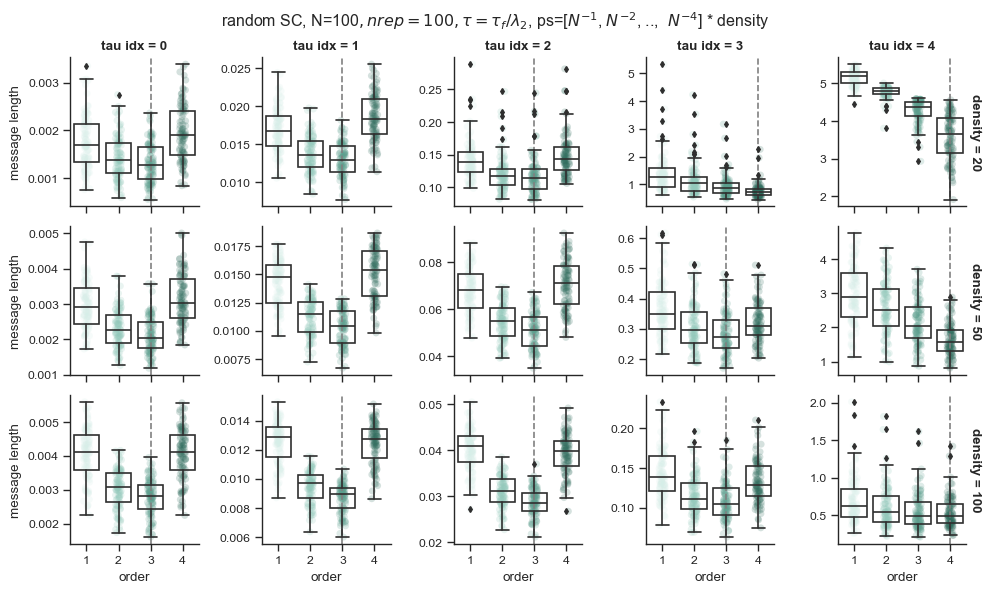

In [335]:
g = sb.catplot(
    kind="box",
    data=df_SC,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_SC["tau idx"] == i) * (df_SC["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df_SC[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        #annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RSC_N{N}_density_{density_scales}_nreps_{n_rep}_boxplot"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

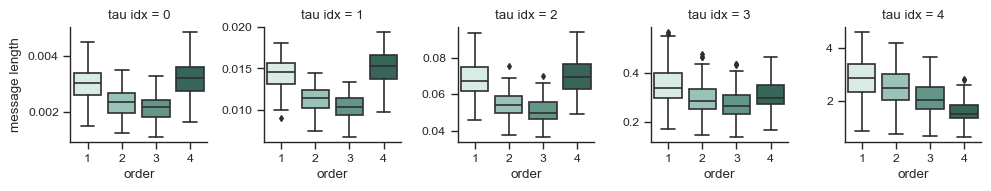

In [148]:
mask = df_SC["density"] == 50

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

plt.show()

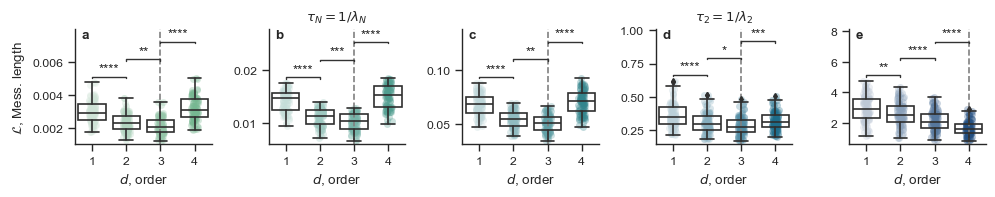

In [398]:
dens = 50

mask = df_SC["density"] == dens

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC[mask],
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.3,
)


# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)] # (1, 4)

for i, tau in enumerate(taus):
    #for j, density in enumerate(density_scales):

    ax = g.axes.ravel()[i]
    mask = (df_SC["tau idx"] == i) * (df_SC["density"] == dens)

    annotator = Annotator(
        ax,
        pairs,
        data=df_SC[mask],
        y="message length",
        x="order",
        #row="density",
        col="tau idx",
    )
    annotator.configure(
        test="t-test_welch", text_format="star", loc="inside", verbose=0, line_width=1
    )
    annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)
    
    ax.set_xlabel("$d$, order")

g.axes[0, 0].set_title(r"", weight="bold")
g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
g.axes[0, 2].set_title(r"", weight="bold")
g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
g.axes[0, 4].set_title(r"", weight="bold")

g.axes[0, 0].set_ylabel(r"$\mathcal{L}$, Mess. length")

# change colors
palette_div = sb.color_palette("crest", n_colors=5)

for i, ax in enumerate(g.axes.ravel()):

    #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
    palette2 = sb.light_palette(palette_div[i], n_colors=5)
    
    for j in range(4):
        ax.collections[j].set_facecolor(palette2[j+1])


fig.set_size_inches((7, 2))

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig_name = f"message_length_RSC_N{N}_vs_tau_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [175]:
palette2 = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
#sb.set_palette(palette)
palette2

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

In [285]:
palette2 = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
#sb.set_palette(palette)
palette2

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

In [190]:
for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

In [298]:
palette_div = sb.color_palette("blend:g,b", n_colors=5)
palette_div

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.32447520184544404, 0.605674740484429, 0.47870818915801616),
 (0.31561707035755476, 0.5525259515570934, 0.5495732410611303),
 (0.3067589388696655, 0.49937716262975784, 0.6204382929642445),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]

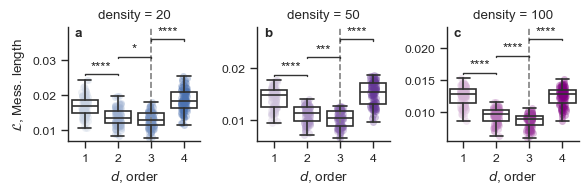

In [399]:
tau_idx = 1

mask = df_SC["tau idx"] == tau_idx

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="density",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC[mask],
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.3,
)


# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)] # (1, 4)

for i, dens in enumerate(density_scales):
    #for j, density in enumerate(density_scales):

    ax = g.axes.ravel()[i]
    mask = (df_SC["tau idx"] == tau_idx) * (df_SC["density"] == dens)

    annotator = Annotator(
        ax,
        pairs,
        data=df_SC[mask],
        y="message length",
        x="order",
        #row="density",
        col="density",
    )
    annotator.configure(
        test="t-test_welch", text_format="star", loc="inside", verbose=0, line_width=1
    )
    annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)
    
    ax.set_xlabel("$d$, order")

#g.axes[0, 0].set_title(r"", weight="bold")
#g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
#g.axes[0, 2].set_title(r"", weight="bold")
#g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
#g.axes[0, 4].set_title(r"", weight="bold")

g.axes[0, 0].set_ylabel(r"$\mathcal{L}$, Mess. length")

# change colors
palette_div = sb.color_palette("blend:b,purple", n_colors=3)

for i, ax in enumerate(g.axes.ravel()):

    #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
    palette2 = sb.light_palette(palette_div[i], n_colors=5)
    
    for j in range(4):
        ax.collections[j].set_facecolor(palette2[j+1])


fig.set_size_inches((7, 2))

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig_name = f"message_length_RSC_N{N}_vs_densities_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

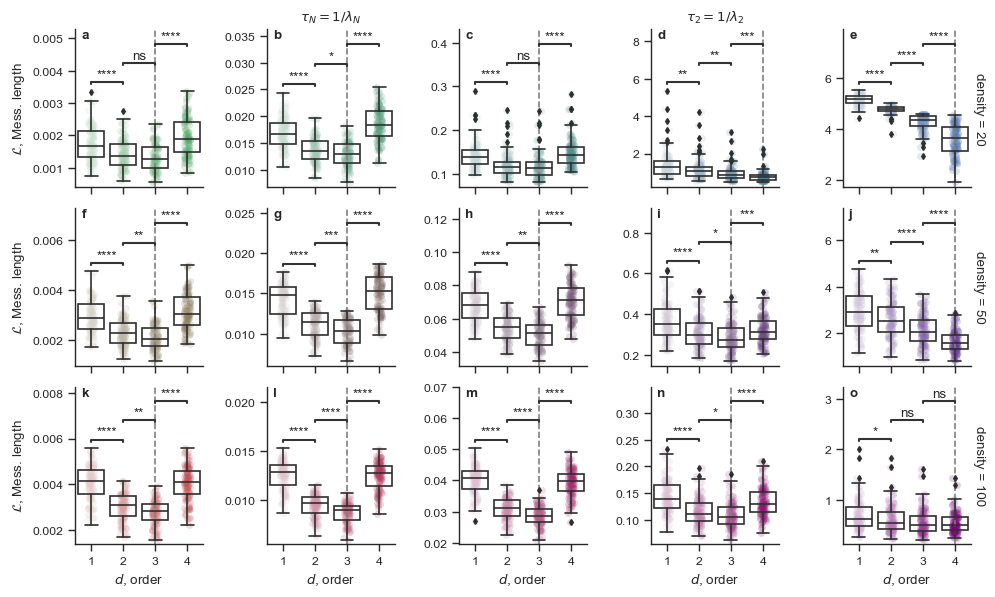

In [400]:
g = sb.catplot(
    kind="box",
    data=df_SC,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_SC["tau idx"] == i) * (df_SC["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df_SC[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)
        
for ax in g.axes[-1, :]:
    ax.set_xlabel("$d$, order")

g.axes[0, 0].set_title(r"", weight="bold")
g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
g.axes[0, 2].set_title(r"", weight="bold")
g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
g.axes[0, 4].set_title(r"", weight="bold")

for ax in g.axes[:, 0]:
    ax.set_ylabel(r"$\mathcal{L}$, Mess. length")
        
# vertical color map
palette_div_vertical = sb.blend_palette(["g", "r"], n_colors=len(density_scales))
palette_div_vertical2 = sb.blend_palette(["b", "purple"], n_colors=len(density_scales))

for i in range(len(density_scales)):
    
    palette_div_horizontal = sb.blend_palette([palette_div_vertical[i], palette_div_vertical2[i]], n_colors=len(taus))

    for j in range(len(taus)):
        
        ax = g.axes[i,j]

        #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
        palette2 = sb.light_palette(palette_div_horizontal[j], n_colors=4+1)

        for kk in range(4):
            ax.collections[kk].set_facecolor(palette2[kk+1])

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig.set_size_inches((7, 6))


fig_name = f"message_length_RSC_N{N}_density_vs_tau_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [351]:
palette2

[(0.9504834469363553, 0.9420125579225501, 0.9373186873041832),
 (0.9006571862812326, 0.8315681912128843, 0.7648142086897687),
 (0.8508309256261098, 0.7211238245032185, 0.592309730075354),
 (0.801004664970987, 0.6106794577935528, 0.4198052514609394),
 (0.7519569396386006, 0.5019607843137255, 0.24999615532487507)]

In [343]:
palette_div_vertical

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.41797770088427527, 0.32811995386389853, 0.4550865051903114),
 (0.5019607843137255, 0.0, 0.5019607843137255)]

In [344]:
palette_div_horizontal

[(0.5019607843137255, 0.0, 0.5019607843137255),
 (0.626958861976163, 0.25098039215686274, 0.3759784698193003),
 (0.7519569396386006, 0.5019607843137255, 0.24999615532487507),
 (0.8769550173010381, 0.7529411764705882, 0.1240138408304498),
 (1.0, 1.0, 0.0)]

In [350]:
sb.blend_palette([palette_div_vertical[0], "yellow"], n_colors=len(taus))

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.5006535947712418, 0.7444521337946943, 0.30548250672818145),
 (0.6679738562091504, 0.830080738177624, 0.20312187620146097),
 (0.835294117647059, 0.9157093425605536, 0.10076124567474048),
 (1.0, 1.0, 0.0)]

In [325]:
palette[2]

[0.3552744615776239, 0.6200435958444379, 0.5538645149046753]

In [ ]:
#01796F

In [97]:
import numpy as np

# Define the number of desired points (excluding 1 and 1000)
num_points_between = 3
start = 1
end = 10

# Generate points between 1 and 1000
points_between = np.geomspace(start, end, num=num_points_between)

# Compute the logarithmic distance between consecutive points
log_distance = np.log10(points_between[1]) - np.log10(points_between[0])


# Extend the array by adding a value before 1 and after 1000
# so that all final 5 values are separated by the same log distance
final_array = np.concatenate(([points_between[0] / (10 ** log_distance)], points_between, [end * (10 ** log_distance)]))

print("Final array:", final_array)


Final array: [ 0.31622777  1.          3.16227766 10.         31.6227766 ]


In [138]:
import numpy as np


def generate_geomspace_points(
    start_value, end_value, num_points_between, num_points_before_after
):
    """
    Generate an array of points evenly spaced on a logarithmic scale between two specified values.

    Parameters
    ----------
    start_value : float
        The starting value of the range.
    end_value : float
        The ending value of the range.
    num_points_between : int
        The number of points to generate between start_value and end_value.
    num_points_before_after : int
        The total number of points to add before and after the specified range.

    Returns
    -------
    numpy.ndarray
        An array containing points evenly spaced on a logarithmic scale.

    Examples
    --------
    >>> generate_geomspace_points(1, 1000, 4, 1)
    array([   0.1,    1. ,   10. ,  100. , 1000. , 10000. ])
    """

    # Generate points between start and end values
    points_between = np.geomspace(start_value, end_value, num=num_points_between)

    # Compute the logarithmic distance between consecutive points
    log_distance = np.log10(points_between[1]) - np.log10(points_between[0])

    # Split num_points_before_after into points before and after
    num_points_before = num_points_before_after
    num_points_after = num_points_before_after

    # Extend the array by adding points before and after
    points_before = np.geomspace(
        start_value / (10 ** (num_points_before * log_distance)),
        start_value,
        num=num_points_before,
        endpoint=False,
    )
    points_after = np.geomspace(
        end_value * (10**log_distance),
        end_value * (10 ** (num_points_after * log_distance)),
        num=num_points_after,
    )

    # Concatenate all points
    final_array = np.concatenate((points_before, points_between, points_after))

    return final_array


# Example usage
start_value = 1
end_value = 1000
num_points_between = 4
num_points_before_after = 2

result = generate_geomspace_points(
    start_value, end_value, num_points_between, num_points_before_after
)
print("Final array:", result)

Final array: [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [137]:
generate_geomspace_points(1, 1000, 4, 1)

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [131]:
np.geomspace(1, 1000, 4)

array([   1.,   10.,  100., 1000.])

In [119]:
np.log10(result)

array([-1.5,  0. ,  1.5,  3. ,  4.5])

In [113]:
points_before

NameError: name 'points_before' is not defined

In [100]:
np.log10(final_array)

array([-0.5,  0. ,  0.5,  1. ,  1.5])

In [144]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSC_N100_density_[5, 10, 50, 100]_nreps_100_boxplot'

In [179]:
xgi.density(H0, order=4, ignore_singletons=True)

1.0227458681066928e-06

## From RSC to RHG: shuffling

In [66]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])
density = 50
p_shuffles = np.linspace(0, 1, 3)

n_rep = 100
rescale = True

H0 = xgi.random_simplicial_complex(N, ps=density * ps)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Hs = dict()
for p in p_shuffles:
    Hs_i = []
    for rep in tqdm(range(n_rep)):
        if p == 0:
            Hs_i.append(H0)
        else:
            H = shuffle_hyperedges(S=H0, order=1, p=p)
            H = shuffle_hyperedges(S=H, order=2, p=p)
            H = shuffle_hyperedges(S=H, order=3, p=p)
            H = shuffle_hyperedges(S=H, order=4, p=p)
            Hs_i.append(H)
    Hs[p] = Hs_i

100%|█████████████████████████████████████████| 100/100 [01:16<00:00,  1.30it/s]


In [69]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for p, Hs_i in Hs.items():

    info_losses[p] = dict()
    complexities[p] = dict()
    orders_arr[p] = dict()
    message_lengths[p] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[p][i] = dict()
        complexities[p][i] = dict()
        orders_arr[p][i] = dict()
        message_lengths[p][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_c = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2

        tau_factors = np.array([1])
        taus = tau_factors * tau_c

        for j, tau in enumerate(taus):

            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
                sparse=False,
                sparse_Lap=False,
            )

            info_losses[p][i][tau_factor] = Ds_H
            complexities[p][i][tau_factor] = lZs_H
            orders_arr[p][i][tau_factor] = orders
            message_lengths[p][i][tau_factor] = Ds_H + lZs_H

labels = [f"{i}" for i in p_shuffles]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:36,  2.70it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  2%|▊                                          | 2/100 [00:00<00:39,  2.45it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  3%|█▎                                         | 3/100 [00:01<00:45,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 33%|█████████████▊                            | 33/100 [00:14<00:31,  2.14it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 34%|██████████████▎                           | 34/100 [00:15<00:29,  2.21it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 35%|██████████████▋                           | 35/100 [00:15<00:30,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 36%|███████████████                           | 36/100 [00:16<00:29,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

 66%|███████████████████████████▋              | 66/100 [00:29<00:14,  2.28it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 67%|████████████████████████████▏             | 67/100 [00:30<00:14,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 68%|████████████████████████████▌             | 68/100 [00:30<00:14,  2.19it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 69%|████████████████████████████▉             | 69/100 [00:31<00:14,  2.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 98%|█████████████████████████████████████████▏| 98/100 [00:44<00:00,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 99%|█████████████████████████████████████████▌| 99/100 [00:44<00:00,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:48,  2.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 14%|█████▉                                    | 14/100 [00:06<00:40,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 15%|██████▎                                   | 15/100 [00:07<00:40,  2.12it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 16%|██████▋                                   | 16/100 [00:07<00:40,  2.07it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 17%|███████▏                                  | 17/100 [00:08<00:40,  2.05it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

 46%|███████████████████▎                      | 46/100 [00:21<00:25,  2.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 47%|███████████████████▋                      | 47/100 [00:22<00:25,  2.10it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 48%|████████████████████▏                     | 48/100 [00:22<00:24,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 49%|████████████████████▌                     | 49/100 [00:22<00:23,  2.13it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 78%|████████████████████████████████▊         | 78/100 [00:36<00:10,  2.11it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 79%|█████████████████████████████████▏        | 79/100 [00:37<00:09,  2.12it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 80%|█████████████████████████████████▌        | 80/100 [00:37<00:09,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 81%|██████████████████████████████████        | 81/100 [00:37<00:08,  2.17it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 10%|████▏                                     | 10/100 [00:04<00:39,  2.27it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 11%|████▌                                     | 11/100 [00:05<00:39,  2.26it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 12%|█████                                     | 12/100 [00:05<00:40,  2.19it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 13%|█████▍                                    | 13/100 [00:06<00:38,  2.29it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 42%|█████████████████▋                        | 42/100 [00:19<00:26,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 43%|██████████████████                        | 43/100 [00:19<00:25,  2.25it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 44%|██████████████████▍                       | 44/100 [00:20<00:24,  2.25it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 45%|██████████████████▉                       | 45/100 [00:20<00:24,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 74%|███████████████████████████████           | 74/100 [00:34<00:12,  2.00it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|███████████████████████████████▌          | 75/100 [00:34<00:12,  2.00it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 76%|███████████████████████████████▉          | 76/100 [00:35<00:11,  2.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 77%|████████████████████████████████▎         | 77/100 [00:35<00:11,  2.03it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 91%|██████████████████████████████████████▏   | 91/100 [00:41<00:04,  2.20it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 92%|██████████████████████████████████████▋   | 92/100 [00:42<00:03,  2.27it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 93%|███████████████████████████████████████   | 93/100 [00:42<00:03,  2.23it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 94%|███████████████████████████████████████▍  | 94/100 [00:43<00:02,  2.28it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

In [70]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_shuffle = pd.DataFrame(
    long_form_data, columns=["message length", "p_shuffle", "rep", "tau fact.", "order"]
)

df_shuffle

,message length,p_shuffle,rep,tau fact.,order
0,0.017639,0.0,0,1,1
1,0.013526,0.0,0,1,2
2,0.011723,0.0,0,1,3
3,0.018299,0.0,0,1,4
4,0.017639,0.0,1,1,1
...,...,...,...,...,...
1195,0.012676,1.0,98,1,4
1196,0.021821,1.0,99,1,1
1197,0.016557,1.0,99,1,2
1198,0.015632,1.0,99,1,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


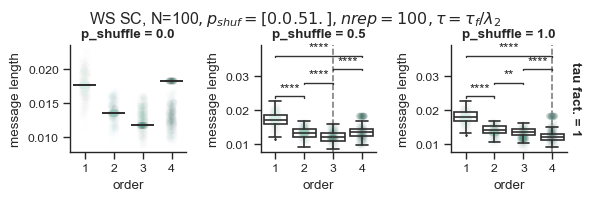

In [121]:
g = sb.catplot(
    kind="box",
    data=df_shuffle,
    x="order",
    y="message length",
    col="p_shuffle",
    row="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=1,
    #color="k",
)

for ax in g.axes.ravel():
    for patch in ax.patches:
#for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map(
    sb.stripplot,
    data=df_shuffle,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    #col="kind",
    # row="density",
    # col="tau",
    #color="black",
    # dodge=True,
    alpha=0.2,
)

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    
    for j, p in enumerate(p_shuffles):
        if j==0:
            continue
        ax = g.axes[i, j]
        mask = (df_shuffle["tau fact."] == tau_fact) * (df_shuffle["p_shuffle"] == p)

        annotator = Annotator(
            ax,
            pairs,
            data=df_shuffle[mask],
            y="message length",
            x="order",
            row="p_shuffle",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_ind",
            text_format="star",
            loc="inside",
            verbose=0,
            comparisons_correction="Bonferroni",
            line_width=1,
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_shuffle[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
title = (
    rf"WS SC, N={N}$, p_{{shuf}}={p_shuffles}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
)
g.fig.suptitle(title)

fig_name = f"message_length_RSCshuffle_N{N}_pshuff_{p_shuffles}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [107]:
p_shuffles

array([0. , 0.5, 1. ])

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


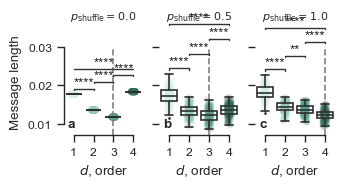

In [211]:
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(3.5, 1.4))

for i, ax in enumerate(axs):

    mask = df_shuffle["p_shuffle"] == p_shuffles[i]

    sb.boxplot(data=df_shuffle[mask], x="order", y="message length", fliersize=1, ax=ax)

    sb.stripplot(
        data=df_shuffle[mask],
        x="order",
        y="message length",
        ax=ax,
        zorder=-2,
        alpha=0.2,
    )

    if i != 0:
        ax.set_ylabel("")

    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

    ax.set_title(rf"$p_{{\rm shuffle}} = {p_shuffles[i]}$", fontsize="small")
    ax.set_xlabel("$d$, order")

    # plot vertical line at minimum
    order_min = df_shuffle[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2, ymax=0.8)

    pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]
    annotator = Annotator(
        ax,
        pairs,
        data=df_shuffle[mask],
        y="message length",
        x="order",
        col="kind",
    )
    annotator.configure(
        test="t-test_ind",
        text_format="star",
        loc="outside",
        verbose=0,
        comparisons_correction="Bonferroni",
        line_width=1,
        #line_height=0,
        line_offset=0.2,
        text_offset=0,
        line_offset_to_group=0.1
    )
    annotator.apply_and_annotate()
    
    ax.set_yticks([0.01, 0.02, 0.03])
    ax.set_ylim([0.007, 0.035])
    if i!=0:
        ax.set_yticklabels([])
    

axs[0].text(
    0.05, 0.05, "a", transform=axs[0].transAxes, weight="bold", ha="left", va="bottom"
)
axs[1].text(
    0.05, 0.05, "b", transform=axs[1].transAxes, weight="bold", ha="left", va="bottom"
)
axs[2].text(
    0.05, 0.05, "c", transform=axs[2].transAxes, weight="bold", ha="left", va="bottom"
)

axs[0].set_ylabel("Message length")
sb.despine(trim=True, bottom=False)
sb.despine(trim=True, bottom=False, left=True, ax=axs[1])
sb.despine(trim=True, bottom=False, left=True, ax=axs[2])
#plt.subplots_adjust(wspace=0.4)

fig_name = f"figure_2_shuffle_stat"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [213]:
mins = dict()

for psh, message_length_p in message_lengths.items():
    #for message_length_p
    
    res = []
    
    for rep, message_length_p_rep in message_length_p.items():
        message_length_p_rep = message_length_p_rep[1]
        d_min = np.argmin(message_length_p_rep)
        res.append(d_min)
        
    mins[psh] = res


In [225]:
np.unique(mins[0], return_counts=True)

(array([2]), array([100]))

In [223]:
np.unique(mins[0.5], return_counts=True)

(array([2, 3]), array([95,  5]))

In [224]:
np.unique(mins[1], return_counts=True)

(array([2, 3]), array([ 7, 93]))

In [197]:
message_lengths[0]

{0: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 1: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 2: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 3: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 4: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 5: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 6: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 7: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 8: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 9: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 10: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 11: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 12: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 13: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 14: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 15: 

In [35]:
df_shuffle.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSCshuffle_N100_pshuff_[0.   0.25 0.5  0.75 1.  ]_taufact_[0.1, 1.0]_nreps_100_boxplot'

## Barabasi Albert

In [39]:
N = 300
ms = [10, 15, 20]

n_rep = 100
rescale = True

In [97]:
Hs = dict()
for m in ms:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        G = nx.barabasi_albert_graph(N, m)
        H = xgi.flag_complex(G, max_order=4)
        xgi.write_edgelist(H, f"../data/BASC_N_{N}_m_{m}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[m] = Hs_i

100%|███████████████████████████████████████| 100/100 [2:33:44<00:00, 92.25s/it]


In [40]:
Hs = dict()
for m in ms:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        H = xgi.read_edgelist(f"../data/BASC_N_{N}_m_{m}_{i}.edgelist")
        Hs_i.append(H)
    Hs[m] = Hs_i

100%|█████████████████████████████████████████| 100/100 [01:59<00:00,  1.19s/it]


In [106]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for m, Hs_i in Hs.items():

    info_losses[m] = dict()
    complexities[m] = dict()
    orders_arr[m] = dict()
    message_lengths[m] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[m][i] = dict()
        complexities[m][i] = dict()
        orders_arr[m][i] = dict()
        message_lengths[m][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            # tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
            )

            info_losses[m][i][j] = Ds_H
            complexities[m][i][j] = lZs_H
            orders_arr[m][i][j] = orders
            message_lengths[m][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.23e-04 4.84e-03 1.90e-01 7.48e+00 2.94e+02]
logm result may be inaccurate, approximate err = 4.0749894996744055e-13
logm result may be inaccurate, approximate err = 4.678836425597338e-13
logm result may be inaccurate, approximate err = 4.0749894996744055e-13
logm result may be inaccurate, approximate err = 4.0510285719743855e-13
logm result may be inaccurate, approximate err = 4.0749894996744055e-13
logm result may be inaccurate, approximate err = 4.681359059290805e-13
logm result may be inaccurate, approximate err = 4.0749894996744055e-13
logm result may be inaccurate, approximate err = 4.0749894996744055e-13
logm result may be inaccurate, approximate err = 4.110686673739549e-13
logm result may be inaccurate, approximate err = 4.560467806087375e-13
logm result may be inaccurate, approximate err = 4.110686673739549e-13
logm result may be inaccurate, approximate err = 4.365946906196099e-13
logm result may be inaccurate, approximate err = 4.110686673739549e-13
logm result may be inacc

  1%|▍                                        | 1/100 [00:41<1:07:43, 41.05s/it]

[1.26e-04 4.52e-03 1.62e-01 5.82e+00 2.09e+02]
logm result may be inaccurate, approximate err = 4.0512439493961533e-13
logm result may be inaccurate, approximate err = 5.157713989267102e-13
logm result may be inaccurate, approximate err = 4.0512439493961533e-13
logm result may be inaccurate, approximate err = 4.394683249433092e-13
logm result may be inaccurate, approximate err = 4.0512439493961533e-13
logm result may be inaccurate, approximate err = 3.9360443382456926e-13
logm result may be inaccurate, approximate err = 4.0512439493961533e-13
logm result may be inaccurate, approximate err = 4.0512439493961533e-13
logm result may be inaccurate, approximate err = 3.9422299132574483e-13
logm result may be inaccurate, approximate err = 4.969945634190918e-13
logm result may be inaccurate, approximate err = 3.9422299132574483e-13
logm result may be inaccurate, approximate err = 4.005901363102202e-13
logm result may be inaccurate, approximate err = 3.9422299132574483e-13
logm result may be in

  2%|▊                                        | 2/100 [01:19<1:04:12, 39.31s/it]

[1.14e-04 4.16e-03 1.52e-01 5.53e+00 2.02e+02]
logm result may be inaccurate, approximate err = 3.9031860125888336e-13
logm result may be inaccurate, approximate err = 4.712884529975561e-13
logm result may be inaccurate, approximate err = 3.9031860125888336e-13
logm result may be inaccurate, approximate err = 4.34778571989029e-13
logm result may be inaccurate, approximate err = 3.9031860125888336e-13
logm result may be inaccurate, approximate err = 4.4390667430609944e-13
logm result may be inaccurate, approximate err = 3.9031860125888336e-13
logm result may be inaccurate, approximate err = 3.9031860125888336e-13
logm result may be inaccurate, approximate err = 4.205490739587931e-13
logm result may be inaccurate, approximate err = 4.524062191126933e-13
logm result may be inaccurate, approximate err = 4.205490739587931e-13
logm result may be inaccurate, approximate err = 4.215606032305765e-13
logm result may be inaccurate, approximate err = 4.205490739587931e-13
logm result may be inaccu

  3%|█▏                                       | 3/100 [01:58<1:03:16, 39.14s/it]

[1.08e-04 3.99e-03 1.48e-01 5.48e+00 2.03e+02]
logm result may be inaccurate, approximate err = 4.3866851229703807e-13
logm result may be inaccurate, approximate err = 4.794508872966249e-13
logm result may be inaccurate, approximate err = 4.3866851229703807e-13
logm result may be inaccurate, approximate err = 4.3250205180960885e-13
logm result may be inaccurate, approximate err = 4.3866851229703807e-13
logm result may be inaccurate, approximate err = 4.2845728677318074e-13
logm result may be inaccurate, approximate err = 4.3866851229703807e-13
logm result may be inaccurate, approximate err = 4.3866851229703807e-13
logm result may be inaccurate, approximate err = 4.604277546211277e-13
logm result may be inaccurate, approximate err = 4.501250257666524e-13
logm result may be inaccurate, approximate err = 4.604277546211277e-13
logm result may be inaccurate, approximate err = 4.3203404796303583e-13
logm result may be inaccurate, approximate err = 4.604277546211277e-13
logm result may be ina

  4%|█▋                                       | 4/100 [02:39<1:03:50, 39.90s/it]

[1.44e-04 5.04e-03 1.76e-01 6.16e+00 2.16e+02]
logm result may be inaccurate, approximate err = 4.229128609143251e-13
logm result may be inaccurate, approximate err = 4.592282871188082e-13
logm result may be inaccurate, approximate err = 4.229128609143251e-13
logm result may be inaccurate, approximate err = 4.733668484771724e-13
logm result may be inaccurate, approximate err = 4.229128609143251e-13
logm result may be inaccurate, approximate err = 4.2617970520948837e-13
logm result may be inaccurate, approximate err = 4.229128609143251e-13
logm result may be inaccurate, approximate err = 4.229128609143251e-13
logm result may be inaccurate, approximate err = 4.1111490948417013e-13
logm result may be inaccurate, approximate err = 4.845391882942984e-13
logm result may be inaccurate, approximate err = 4.1111490948417013e-13
logm result may be inaccurate, approximate err = 4.593098108652716e-13
logm result may be inaccurate, approximate err = 4.1111490948417013e-13
logm result may be inaccur

  5%|██                                       | 5/100 [03:21<1:04:46, 40.91s/it]

[1.16e-04 4.33e-03 1.62e-01 6.02e+00 2.24e+02]
logm result may be inaccurate, approximate err = 4.1918948868042325e-13
logm result may be inaccurate, approximate err = 4.746154022625104e-13
logm result may be inaccurate, approximate err = 4.1918948868042325e-13
logm result may be inaccurate, approximate err = 4.138979055325078e-13
logm result may be inaccurate, approximate err = 4.1918948868042325e-13
logm result may be inaccurate, approximate err = 4.284472544079944e-13
logm result may be inaccurate, approximate err = 4.1918948868042325e-13
logm result may be inaccurate, approximate err = 4.1918948868042325e-13
logm result may be inaccurate, approximate err = 4.960970605437836e-13
logm result may be inaccurate, approximate err = 4.946134099382564e-13
logm result may be inaccurate, approximate err = 4.960970605437836e-13
logm result may be inaccurate, approximate err = 4.764130288262969e-13
logm result may be inaccurate, approximate err = 4.960970605437836e-13
logm result may be inaccu

  6%|██▍                                      | 6/100 [04:00<1:02:49, 40.10s/it]

[1.16e-04 4.16e-03 1.50e-01 5.40e+00 1.94e+02]
logm result may be inaccurate, approximate err = 4.1657327551052244e-13
logm result may be inaccurate, approximate err = 5.252781029960433e-13
logm result may be inaccurate, approximate err = 4.1657327551052244e-13
logm result may be inaccurate, approximate err = 4.3470974102203874e-13
logm result may be inaccurate, approximate err = 4.1657327551052244e-13
logm result may be inaccurate, approximate err = 4.696173257956289e-13
logm result may be inaccurate, approximate err = 4.1657327551052244e-13
logm result may be inaccurate, approximate err = 4.1657327551052244e-13
logm result may be inaccurate, approximate err = 4.2647357265689176e-13
logm result may be inaccurate, approximate err = 4.578578084666274e-13
logm result may be inaccurate, approximate err = 4.2647357265689176e-13
logm result may be inaccurate, approximate err = 4.610559642717801e-13
logm result may be inaccurate, approximate err = 4.2647357265689176e-13
logm result may be in

  7%|██▊                                      | 7/100 [04:36<1:00:09, 38.81s/it]

[1.17e-04 4.25e-03 1.54e-01 5.60e+00 2.03e+02]
logm result may be inaccurate, approximate err = 4.280035981066869e-13
logm result may be inaccurate, approximate err = 4.4536413973327744e-13
logm result may be inaccurate, approximate err = 4.280035981066869e-13
logm result may be inaccurate, approximate err = 4.3816617150634634e-13
logm result may be inaccurate, approximate err = 4.280035981066869e-13
logm result may be inaccurate, approximate err = 4.4659292445703947e-13
logm result may be inaccurate, approximate err = 4.280035981066869e-13
logm result may be inaccurate, approximate err = 4.280035981066869e-13
logm result may be inaccurate, approximate err = 4.069561469087066e-13
logm result may be inaccurate, approximate err = 4.3924261496941064e-13
logm result may be inaccurate, approximate err = 4.069561469087066e-13
logm result may be inaccurate, approximate err = 4.3798016573399277e-13
logm result may be inaccurate, approximate err = 4.069561469087066e-13
logm result may be inaccu

  8%|███▍                                       | 8/100 [05:12<58:04, 37.88s/it]

[1.22e-04 5.40e-03 2.40e-01 1.06e+01 4.72e+02]
logm result may be inaccurate, approximate err = 4.332265042913006e-13
logm result may be inaccurate, approximate err = 4.633992688299756e-13
logm result may be inaccurate, approximate err = 4.332265042913006e-13
logm result may be inaccurate, approximate err = 5.563240727953042e-13
logm result may be inaccurate, approximate err = 4.332265042913006e-13
logm result may be inaccurate, approximate err = 4.263591625822421e-13
logm result may be inaccurate, approximate err = 4.332265042913006e-13
logm result may be inaccurate, approximate err = 4.332265042913006e-13
logm result may be inaccurate, approximate err = 4.4349773674606994e-13
logm result may be inaccurate, approximate err = 4.613684897232558e-13
logm result may be inaccurate, approximate err = 4.4349773674606994e-13
logm result may be inaccurate, approximate err = 4.4121900582153276e-13
logm result may be inaccurate, approximate err = 4.4349773674606994e-13
logm result may be inaccur

  9%|███▊                                       | 9/100 [05:48<56:44, 37.42s/it]

[1.12e-04 6.09e-03 3.30e-01 1.79e+01 9.72e+02]
logm result may be inaccurate, approximate err = 4.153178774161576e-13
logm result may be inaccurate, approximate err = 4.787748413348672e-13
logm result may be inaccurate, approximate err = 4.153178774161576e-13
logm result may be inaccurate, approximate err = 4.0525749989013124e-13
logm result may be inaccurate, approximate err = 4.153178774161576e-13
logm result may be inaccurate, approximate err = 4.308987354430844e-13
logm result may be inaccurate, approximate err = 4.153178774161576e-13
logm result may be inaccurate, approximate err = 4.153178774161576e-13
logm result may be inaccurate, approximate err = 4.047907382137294e-13
logm result may be inaccurate, approximate err = 4.850228399221552e-13
logm result may be inaccurate, approximate err = 4.047907382137294e-13
logm result may be inaccurate, approximate err = 4.648256999546903e-13
logm result may be inaccurate, approximate err = 4.047907382137294e-13
logm result may be inaccurate

 10%|████▏                                     | 10/100 [06:25<55:43, 37.15s/it]

[1.21e-04 4.41e-03 1.60e-01 5.82e+00 2.12e+02]
logm result may be inaccurate, approximate err = 4.1928809727519405e-13
logm result may be inaccurate, approximate err = 4.802347534072826e-13
logm result may be inaccurate, approximate err = 4.1928809727519405e-13
logm result may be inaccurate, approximate err = 4.0351018139584467e-13
logm result may be inaccurate, approximate err = 4.1928809727519405e-13
logm result may be inaccurate, approximate err = 5.167046397505374e-13
logm result may be inaccurate, approximate err = 4.1928809727519405e-13
logm result may be inaccurate, approximate err = 4.1928809727519405e-13
logm result may be inaccurate, approximate err = 4.259217067450217e-13
logm result may be inaccurate, approximate err = 5.178508090389387e-13
logm result may be inaccurate, approximate err = 4.259217067450217e-13
logm result may be inaccurate, approximate err = 4.4388539035212123e-13
logm result may be inaccurate, approximate err = 4.259217067450217e-13
logm result may be inac

 11%|████▌                                     | 11/100 [07:02<55:02, 37.11s/it]

[1.14e-04 4.21e-03 1.55e-01 5.68e+00 2.09e+02]
logm result may be inaccurate, approximate err = 4.5005651955631744e-13
logm result may be inaccurate, approximate err = 4.519560978957117e-13
logm result may be inaccurate, approximate err = 4.5005651955631744e-13
logm result may be inaccurate, approximate err = 3.9358453237847617e-13
logm result may be inaccurate, approximate err = 4.5005651955631744e-13
logm result may be inaccurate, approximate err = 4.4868179818568135e-13
logm result may be inaccurate, approximate err = 4.5005651955631744e-13
logm result may be inaccurate, approximate err = 4.5005651955631744e-13
logm result may be inaccurate, approximate err = 4.095763491365472e-13
logm result may be inaccurate, approximate err = 4.3869013323738523e-13
logm result may be inaccurate, approximate err = 4.095763491365472e-13
logm result may be inaccurate, approximate err = 4.0549756597699377e-13
logm result may be inaccurate, approximate err = 4.095763491365472e-13
logm result may be in

 12%|█████                                     | 12/100 [07:38<53:48, 36.69s/it]

[1.07e-04 3.94e-03 1.45e-01 5.35e+00 1.97e+02]
logm result may be inaccurate, approximate err = 4.4487102240995537e-13
logm result may be inaccurate, approximate err = 4.645364906536431e-13
logm result may be inaccurate, approximate err = 4.4487102240995537e-13
logm result may be inaccurate, approximate err = 5.134812108232443e-13
logm result may be inaccurate, approximate err = 4.4487102240995537e-13
logm result may be inaccurate, approximate err = 4.761918040455437e-13
logm result may be inaccurate, approximate err = 4.4487102240995537e-13
logm result may be inaccurate, approximate err = 4.4487102240995537e-13
logm result may be inaccurate, approximate err = 4.230440194394506e-13
logm result may be inaccurate, approximate err = 5.108501896091405e-13
logm result may be inaccurate, approximate err = 4.230440194394506e-13
logm result may be inaccurate, approximate err = 4.573363020358239e-13
logm result may be inaccurate, approximate err = 4.230440194394506e-13
logm result may be inaccu

 13%|█████▍                                    | 13/100 [08:13<52:44, 36.38s/it]

[1.08e-04 3.99e-03 1.47e-01 5.46e+00 2.02e+02]
logm result may be inaccurate, approximate err = 4.83018345285558e-13
logm result may be inaccurate, approximate err = 4.659043195524664e-13
logm result may be inaccurate, approximate err = 4.83018345285558e-13
logm result may be inaccurate, approximate err = 5.023482296804756e-13
logm result may be inaccurate, approximate err = 4.83018345285558e-13
logm result may be inaccurate, approximate err = 4.144329906969409e-13
logm result may be inaccurate, approximate err = 4.83018345285558e-13
logm result may be inaccurate, approximate err = 4.83018345285558e-13
logm result may be inaccurate, approximate err = 4.2255899544255047e-13
logm result may be inaccurate, approximate err = 4.973233402037009e-13
logm result may be inaccurate, approximate err = 4.2255899544255047e-13
logm result may be inaccurate, approximate err = 4.4812533227182585e-13
logm result may be inaccurate, approximate err = 4.2255899544255047e-13
logm result may be inaccurate, 

 14%|█████▉                                    | 14/100 [08:50<52:22, 36.54s/it]

[1.24e-04 4.40e-03 1.56e-01 5.52e+00 1.95e+02]
logm result may be inaccurate, approximate err = 4.073316911851955e-13
logm result may be inaccurate, approximate err = 4.361598067252379e-13
logm result may be inaccurate, approximate err = 4.073316911851955e-13
logm result may be inaccurate, approximate err = 4.303709289853712e-13
logm result may be inaccurate, approximate err = 4.073316911851955e-13
logm result may be inaccurate, approximate err = 4.191642571879796e-13
logm result may be inaccurate, approximate err = 4.073316911851955e-13
logm result may be inaccurate, approximate err = 4.073316911851955e-13
logm result may be inaccurate, approximate err = 4.196836101058715e-13
logm result may be inaccurate, approximate err = 4.681323062656713e-13
logm result may be inaccurate, approximate err = 4.196836101058715e-13
logm result may be inaccurate, approximate err = 4.4099361900542613e-13
logm result may be inaccurate, approximate err = 4.196836101058715e-13
logm result may be inaccurate

 15%|██████▎                                   | 15/100 [09:28<52:08, 36.81s/it]

[9.10e-05 3.51e-03 1.35e-01 5.22e+00 2.01e+02]
logm result may be inaccurate, approximate err = 4.645805709737842e-13
logm result may be inaccurate, approximate err = 4.607802631999302e-13
logm result may be inaccurate, approximate err = 4.645805709737842e-13
logm result may be inaccurate, approximate err = 4.808346295537953e-13
logm result may be inaccurate, approximate err = 4.645805709737842e-13
logm result may be inaccurate, approximate err = 3.997584031741778e-13
logm result may be inaccurate, approximate err = 4.645805709737842e-13
logm result may be inaccurate, approximate err = 4.645805709737842e-13
logm result may be inaccurate, approximate err = 4.211595497864672e-13
logm result may be inaccurate, approximate err = 4.890118362502835e-13
logm result may be inaccurate, approximate err = 4.211595497864672e-13
logm result may be inaccurate, approximate err = 4.457436840790217e-13
logm result may be inaccurate, approximate err = 4.211595497864672e-13
logm result may be inaccurate,

 16%|██████▋                                   | 16/100 [10:04<51:13, 36.59s/it]

[1.19e-04 4.24e-03 1.51e-01 5.37e+00 1.91e+02]
logm result may be inaccurate, approximate err = 4.1609285848490997e-13
logm result may be inaccurate, approximate err = 5.080466090943965e-13
logm result may be inaccurate, approximate err = 4.1609285848490997e-13
logm result may be inaccurate, approximate err = 4.1473141540147554e-13
logm result may be inaccurate, approximate err = 4.1609285848490997e-13
logm result may be inaccurate, approximate err = 3.9903952825916847e-13
logm result may be inaccurate, approximate err = 4.1609285848490997e-13
logm result may be inaccurate, approximate err = 4.1609285848490997e-13
logm result may be inaccurate, approximate err = 4.5423991438229673e-13
logm result may be inaccurate, approximate err = 4.691901609530794e-13
logm result may be inaccurate, approximate err = 4.5423991438229673e-13
logm result may be inaccurate, approximate err = 4.566353247945397e-13
logm result may be inaccurate, approximate err = 4.5423991438229673e-13
logm result may be i

 17%|███████▏                                  | 17/100 [10:44<52:03, 37.64s/it]

[1.18e-04 4.27e-03 1.55e-01 5.63e+00 2.04e+02]
logm result may be inaccurate, approximate err = 4.096513112272055e-13
logm result may be inaccurate, approximate err = 4.875691017525735e-13
logm result may be inaccurate, approximate err = 4.096513112272055e-13
logm result may be inaccurate, approximate err = 4.116756433418749e-13
logm result may be inaccurate, approximate err = 4.096513112272055e-13
logm result may be inaccurate, approximate err = 4.2906478923958186e-13
logm result may be inaccurate, approximate err = 4.096513112272055e-13
logm result may be inaccurate, approximate err = 4.096513112272055e-13
logm result may be inaccurate, approximate err = 3.851447546076217e-13
logm result may be inaccurate, approximate err = 4.452795616641045e-13
logm result may be inaccurate, approximate err = 3.851447546076217e-13
logm result may be inaccurate, approximate err = 4.40995377577257e-13
logm result may be inaccurate, approximate err = 3.851447546076217e-13
logm result may be inaccurate,

 18%|███████▌                                  | 18/100 [11:26<53:13, 38.95s/it]

[1.14e-04 4.10e-03 1.47e-01 5.28e+00 1.89e+02]
logm result may be inaccurate, approximate err = 4.084361868062263e-13
logm result may be inaccurate, approximate err = 4.2922319259945956e-13
logm result may be inaccurate, approximate err = 4.084361868062263e-13
logm result may be inaccurate, approximate err = 4.390509249086202e-13
logm result may be inaccurate, approximate err = 4.084361868062263e-13
logm result may be inaccurate, approximate err = 4.2345047470445883e-13
logm result may be inaccurate, approximate err = 4.084361868062263e-13
logm result may be inaccurate, approximate err = 4.084361868062263e-13
logm result may be inaccurate, approximate err = 4.537433236047044e-13
logm result may be inaccurate, approximate err = 4.962413565333019e-13
logm result may be inaccurate, approximate err = 4.537433236047044e-13
logm result may be inaccurate, approximate err = 4.648341829040184e-13
logm result may be inaccurate, approximate err = 4.537433236047044e-13
logm result may be inaccurat

 19%|███████▉                                  | 19/100 [12:11<54:59, 40.73s/it]

[1.29e-04 4.55e-03 1.60e-01 5.63e+00 1.98e+02]
logm result may be inaccurate, approximate err = 4.0390722257375664e-13
logm result may be inaccurate, approximate err = 4.693533305198508e-13
logm result may be inaccurate, approximate err = 4.0390722257375664e-13
logm result may be inaccurate, approximate err = 4.268860736956077e-13
logm result may be inaccurate, approximate err = 4.0390722257375664e-13
logm result may be inaccurate, approximate err = 4.4243604253467854e-13
logm result may be inaccurate, approximate err = 4.0390722257375664e-13
logm result may be inaccurate, approximate err = 4.0390722257375664e-13
logm result may be inaccurate, approximate err = 4.564403586912006e-13
logm result may be inaccurate, approximate err = 4.4432198213736987e-13
logm result may be inaccurate, approximate err = 4.564403586912006e-13
logm result may be inaccurate, approximate err = 4.346369586803939e-13
logm result may be inaccurate, approximate err = 4.564403586912006e-13
logm result may be inac

 20%|████████▍                                 | 20/100 [12:59<57:26, 43.08s/it]

[1.19e-04 4.28e-03 1.53e-01 5.50e+00 1.97e+02]
logm result may be inaccurate, approximate err = 4.349894816437834e-13
logm result may be inaccurate, approximate err = 4.466328964281731e-13
logm result may be inaccurate, approximate err = 4.349894816437834e-13
logm result may be inaccurate, approximate err = 4.170609979193822e-13
logm result may be inaccurate, approximate err = 4.349894816437834e-13
logm result may be inaccurate, approximate err = 4.353071512341446e-13
logm result may be inaccurate, approximate err = 4.349894816437834e-13
logm result may be inaccurate, approximate err = 4.349894816437834e-13
logm result may be inaccurate, approximate err = 4.4566222913239705e-13
logm result may be inaccurate, approximate err = 5.153106084469066e-13
logm result may be inaccurate, approximate err = 4.4566222913239705e-13
logm result may be inaccurate, approximate err = 4.3340539426176316e-13
logm result may be inaccurate, approximate err = 4.4566222913239705e-13
logm result may be inaccur

 21%|████████▍                               | 21/100 [13:51<1:00:04, 45.62s/it]

[1.24e-04 4.39e-03 1.55e-01 5.50e+00 1.95e+02]
logm result may be inaccurate, approximate err = 4.1343471989629536e-13
logm result may be inaccurate, approximate err = 4.906894908945722e-13
logm result may be inaccurate, approximate err = 4.1343471989629536e-13
logm result may be inaccurate, approximate err = 4.914385328235691e-13
logm result may be inaccurate, approximate err = 4.1343471989629536e-13
logm result may be inaccurate, approximate err = 4.169323453012157e-13
logm result may be inaccurate, approximate err = 4.1343471989629536e-13
logm result may be inaccurate, approximate err = 4.1343471989629536e-13
logm result may be inaccurate, approximate err = 4.3650375439484084e-13
logm result may be inaccurate, approximate err = 4.701216839362504e-13
logm result may be inaccurate, approximate err = 4.3650375439484084e-13
logm result may be inaccurate, approximate err = 4.999152144548755e-13
logm result may be inaccurate, approximate err = 4.3650375439484084e-13
logm result may be ina

 22%|█████████▏                                | 22/100 [14:34<58:23, 44.92s/it]

[1.21e-04 4.40e-03 1.60e-01 5.82e+00 2.12e+02]
logm result may be inaccurate, approximate err = 4.387560913215515e-13
logm result may be inaccurate, approximate err = 4.5360261376085827e-13
logm result may be inaccurate, approximate err = 4.387560913215515e-13
logm result may be inaccurate, approximate err = 4.2574350298610294e-13
logm result may be inaccurate, approximate err = 4.387560913215515e-13
logm result may be inaccurate, approximate err = 4.5097615486326655e-13
logm result may be inaccurate, approximate err = 4.387560913215515e-13
logm result may be inaccurate, approximate err = 4.387560913215515e-13
logm result may be inaccurate, approximate err = 3.9717634723522215e-13
logm result may be inaccurate, approximate err = 5.080016455126431e-13
logm result may be inaccurate, approximate err = 3.9717634723522215e-13
logm result may be inaccurate, approximate err = 4.3041486810203593e-13
logm result may be inaccurate, approximate err = 3.9717634723522215e-13
logm result may be inac

 23%|█████████▋                                | 23/100 [15:14<55:54, 43.56s/it]

[1.22e-04 4.36e-03 1.56e-01 5.59e+00 2.00e+02]
logm result may be inaccurate, approximate err = 4.2957060625855534e-13
logm result may be inaccurate, approximate err = 4.591946091685499e-13
logm result may be inaccurate, approximate err = 4.2957060625855534e-13
logm result may be inaccurate, approximate err = 4.780233472654049e-13
logm result may be inaccurate, approximate err = 4.2957060625855534e-13
logm result may be inaccurate, approximate err = 4.360698622891388e-13
logm result may be inaccurate, approximate err = 4.2957060625855534e-13
logm result may be inaccurate, approximate err = 4.2957060625855534e-13
logm result may be inaccurate, approximate err = 4.4538989525224337e-13
logm result may be inaccurate, approximate err = 4.92019169100765e-13
logm result may be inaccurate, approximate err = 4.4538989525224337e-13
logm result may be inaccurate, approximate err = 4.820103239388326e-13
logm result may be inaccurate, approximate err = 4.4538989525224337e-13
logm result may be inac

 24%|██████████                                | 24/100 [15:55<54:10, 42.77s/it]

[1.35e-04 5.76e-03 2.45e-01 1.04e+01 4.43e+02]
logm result may be inaccurate, approximate err = 4.3183099903355644e-13
logm result may be inaccurate, approximate err = 4.558275976134797e-13
logm result may be inaccurate, approximate err = 4.3183099903355644e-13
logm result may be inaccurate, approximate err = 4.236988121446246e-13
logm result may be inaccurate, approximate err = 4.3183099903355644e-13
logm result may be inaccurate, approximate err = 4.530048293454139e-13
logm result may be inaccurate, approximate err = 4.3183099903355644e-13
logm result may be inaccurate, approximate err = 4.3183099903355644e-13
logm result may be inaccurate, approximate err = 4.5226539365695285e-13
logm result may be inaccurate, approximate err = 4.463857914954519e-13
logm result may be inaccurate, approximate err = 4.5226539365695285e-13
logm result may be inaccurate, approximate err = 4.8904003712564e-13
logm result may be inaccurate, approximate err = 4.5226539365695285e-13
logm result may be inacc

 25%|██████████▌                               | 25/100 [16:37<52:53, 42.31s/it]

[1.12e-04 4.13e-03 1.52e-01 5.58e+00 2.05e+02]
logm result may be inaccurate, approximate err = 3.9514703487037334e-13
logm result may be inaccurate, approximate err = 4.4594293500761807e-13
logm result may be inaccurate, approximate err = 3.9514703487037334e-13
logm result may be inaccurate, approximate err = 4.415054753300598e-13
logm result may be inaccurate, approximate err = 3.9514703487037334e-13
logm result may be inaccurate, approximate err = 4.32071367355148e-13
logm result may be inaccurate, approximate err = 3.9514703487037334e-13
logm result may be inaccurate, approximate err = 3.9514703487037334e-13
logm result may be inaccurate, approximate err = 4.1835850799519624e-13
logm result may be inaccurate, approximate err = 4.89683952363493e-13
logm result may be inaccurate, approximate err = 4.1835850799519624e-13
logm result may be inaccurate, approximate err = 4.1881541811318276e-13
logm result may be inaccurate, approximate err = 4.1835850799519624e-13
logm result may be ina

 26%|██████████▉                               | 26/100 [17:16<51:10, 41.50s/it]

[1.21e-04 5.15e-03 2.19e-01 9.28e+00 3.94e+02]
logm result may be inaccurate, approximate err = 4.1841191272668836e-13
logm result may be inaccurate, approximate err = 5.566837321499106e-13
logm result may be inaccurate, approximate err = 4.1841191272668836e-13
logm result may be inaccurate, approximate err = 4.2375066150469227e-13
logm result may be inaccurate, approximate err = 4.1841191272668836e-13
logm result may be inaccurate, approximate err = 4.416152190611238e-13
logm result may be inaccurate, approximate err = 4.1841191272668836e-13
logm result may be inaccurate, approximate err = 4.1841191272668836e-13
logm result may be inaccurate, approximate err = 4.303608821304086e-13
logm result may be inaccurate, approximate err = 4.374051311959839e-13
logm result may be inaccurate, approximate err = 4.303608821304086e-13
logm result may be inaccurate, approximate err = 4.4035816397551654e-13
logm result may be inaccurate, approximate err = 4.303608821304086e-13
logm result may be inac

 27%|███████████▎                              | 27/100 [17:54<49:17, 40.51s/it]

[1.13e-04 5.11e-03 2.30e-01 1.03e+01 4.66e+02]
logm result may be inaccurate, approximate err = 3.9410120009222296e-13
logm result may be inaccurate, approximate err = 4.695749825427241e-13
logm result may be inaccurate, approximate err = 3.9410120009222296e-13
logm result may be inaccurate, approximate err = 4.332489037191764e-13
logm result may be inaccurate, approximate err = 3.9410120009222296e-13
logm result may be inaccurate, approximate err = 4.413281053148907e-13
logm result may be inaccurate, approximate err = 3.9410120009222296e-13
logm result may be inaccurate, approximate err = 3.9410120009222296e-13
logm result may be inaccurate, approximate err = 4.253552637101218e-13
logm result may be inaccurate, approximate err = 5.304183248429184e-13
logm result may be inaccurate, approximate err = 4.253552637101218e-13
logm result may be inaccurate, approximate err = 4.740557332109585e-13
logm result may be inaccurate, approximate err = 4.253552637101218e-13
logm result may be inaccu

 28%|███████████▊                              | 28/100 [18:33<47:53, 39.91s/it]

[1.21e-04 4.32e-03 1.54e-01 5.47e+00 1.95e+02]
logm result may be inaccurate, approximate err = 3.886094203634009e-13
logm result may be inaccurate, approximate err = 5.108163813490441e-13
logm result may be inaccurate, approximate err = 3.886094203634009e-13
logm result may be inaccurate, approximate err = 4.0328876465267765e-13
logm result may be inaccurate, approximate err = 3.886094203634009e-13
logm result may be inaccurate, approximate err = 4.4539765363033804e-13
logm result may be inaccurate, approximate err = 3.886094203634009e-13
logm result may be inaccurate, approximate err = 3.886094203634009e-13
logm result may be inaccurate, approximate err = 4.306806689559368e-13
logm result may be inaccurate, approximate err = 4.958070268079021e-13
logm result may be inaccurate, approximate err = 4.306806689559368e-13
logm result may be inaccurate, approximate err = 4.140978780985879e-13
logm result may be inaccurate, approximate err = 4.306806689559368e-13
logm result may be inaccurat

 29%|████████████▏                             | 29/100 [19:12<46:54, 39.64s/it]

[1.11e-04 4.03e-03 1.47e-01 5.37e+00 1.96e+02]
logm result may be inaccurate, approximate err = 4.0555687036450686e-13
logm result may be inaccurate, approximate err = 4.746827046086029e-13
logm result may be inaccurate, approximate err = 4.0555687036450686e-13
logm result may be inaccurate, approximate err = 4.1691878853684036e-13
logm result may be inaccurate, approximate err = 4.0555687036450686e-13
logm result may be inaccurate, approximate err = 4.805050893574324e-13
logm result may be inaccurate, approximate err = 4.0555687036450686e-13
logm result may be inaccurate, approximate err = 4.0555687036450686e-13
logm result may be inaccurate, approximate err = 4.41748621211426e-13
logm result may be inaccurate, approximate err = 4.732365397443393e-13
logm result may be inaccurate, approximate err = 4.41748621211426e-13
logm result may be inaccurate, approximate err = 4.770065174663351e-13
logm result may be inaccurate, approximate err = 4.41748621211426e-13
logm result may be inaccura

 30%|████████████▌                             | 30/100 [19:49<45:24, 38.93s/it]

[1.29e-04 4.52e-03 1.58e-01 5.55e+00 1.95e+02]
logm result may be inaccurate, approximate err = 4.861219409912072e-13
logm result may be inaccurate, approximate err = 4.4450818261963424e-13
logm result may be inaccurate, approximate err = 4.861219409912072e-13
logm result may be inaccurate, approximate err = 4.617864776330946e-13
logm result may be inaccurate, approximate err = 4.861219409912072e-13
logm result may be inaccurate, approximate err = 5.009656786411814e-13
logm result may be inaccurate, approximate err = 4.861219409912072e-13
logm result may be inaccurate, approximate err = 4.861219409912072e-13
logm result may be inaccurate, approximate err = 4.691360038795843e-13
logm result may be inaccurate, approximate err = 4.731477261561081e-13
logm result may be inaccurate, approximate err = 4.691360038795843e-13
logm result may be inaccurate, approximate err = 4.3631342864825065e-13
logm result may be inaccurate, approximate err = 4.691360038795843e-13
logm result may be inaccurat

 31%|█████████████                             | 31/100 [20:29<44:55, 39.06s/it]

[1.03e-04 3.92e-03 1.49e-01 5.64e+00 2.14e+02]
logm result may be inaccurate, approximate err = 3.9637597334959865e-13
logm result may be inaccurate, approximate err = 4.4118677204432647e-13
logm result may be inaccurate, approximate err = 3.9637597334959865e-13
logm result may be inaccurate, approximate err = 4.4049376795985726e-13
logm result may be inaccurate, approximate err = 3.9637597334959865e-13
logm result may be inaccurate, approximate err = 4.362206871864014e-13
logm result may be inaccurate, approximate err = 3.9637597334959865e-13
logm result may be inaccurate, approximate err = 3.9637597334959865e-13
logm result may be inaccurate, approximate err = 4.627893569637351e-13
logm result may be inaccurate, approximate err = 4.490527241939749e-13
logm result may be inaccurate, approximate err = 4.627893569637351e-13
logm result may be inaccurate, approximate err = 4.289575331797034e-13
logm result may be inaccurate, approximate err = 4.627893569637351e-13
logm result may be inac

 32%|█████████████▍                            | 32/100 [21:05<43:29, 38.38s/it]

[1.18e-04 4.32e-03 1.58e-01 5.79e+00 2.12e+02]
logm result may be inaccurate, approximate err = 3.9859730909197645e-13
logm result may be inaccurate, approximate err = 4.471577667532592e-13
logm result may be inaccurate, approximate err = 3.9859730909197645e-13
logm result may be inaccurate, approximate err = 4.4220902471313285e-13
logm result may be inaccurate, approximate err = 3.9859730909197645e-13
logm result may be inaccurate, approximate err = 4.18613683138508e-13
logm result may be inaccurate, approximate err = 3.9859730909197645e-13
logm result may be inaccurate, approximate err = 3.9859730909197645e-13
logm result may be inaccurate, approximate err = 4.2982853434230184e-13
logm result may be inaccurate, approximate err = 4.671861400373525e-13
logm result may be inaccurate, approximate err = 4.2982853434230184e-13
logm result may be inaccurate, approximate err = 4.834819713941185e-13
logm result may be inaccurate, approximate err = 4.2982853434230184e-13
logm result may be ina

 33%|█████████████▊                            | 33/100 [21:43<42:33, 38.12s/it]

[1.09e-04 4.02e-03 1.49e-01 5.53e+00 2.05e+02]
logm result may be inaccurate, approximate err = 4.1418684571367505e-13
logm result may be inaccurate, approximate err = 4.63570039275059e-13
logm result may be inaccurate, approximate err = 4.1418684571367505e-13
logm result may be inaccurate, approximate err = 4.5304860773076747e-13
logm result may be inaccurate, approximate err = 4.1418684571367505e-13
logm result may be inaccurate, approximate err = 4.023496808582661e-13
logm result may be inaccurate, approximate err = 4.1418684571367505e-13
logm result may be inaccurate, approximate err = 4.1418684571367505e-13
logm result may be inaccurate, approximate err = 3.918357306177953e-13
logm result may be inaccurate, approximate err = 4.620253067698628e-13
logm result may be inaccurate, approximate err = 3.918357306177953e-13
logm result may be inaccurate, approximate err = 4.099252152928425e-13
logm result may be inaccurate, approximate err = 3.918357306177953e-13
logm result may be inaccu

 34%|██████████████▎                           | 34/100 [22:22<42:10, 38.34s/it]

[1.27e-04 7.95e-03 4.96e-01 3.09e+01 1.93e+03]
logm result may be inaccurate, approximate err = 4.01605285098616e-13
logm result may be inaccurate, approximate err = 4.920829474441144e-13
logm result may be inaccurate, approximate err = 4.01605285098616e-13
logm result may be inaccurate, approximate err = 4.580696933659989e-13
logm result may be inaccurate, approximate err = 4.01605285098616e-13
logm result may be inaccurate, approximate err = 4.948598020230594e-13
logm result may be inaccurate, approximate err = 4.01605285098616e-13
logm result may be inaccurate, approximate err = 4.01605285098616e-13
logm result may be inaccurate, approximate err = 4.316052077589609e-13
logm result may be inaccurate, approximate err = 4.732183778338947e-13
logm result may be inaccurate, approximate err = 4.316052077589609e-13
logm result may be inaccurate, approximate err = 4.3214687773388104e-13
logm result may be inaccurate, approximate err = 4.316052077589609e-13
logm result may be inaccurate, app

 35%|██████████████▋                           | 35/100 [23:05<43:02, 39.74s/it]

[1.07e-04 3.93e-03 1.44e-01 5.27e+00 1.93e+02]
logm result may be inaccurate, approximate err = 4.499533804748347e-13
logm result may be inaccurate, approximate err = 4.550904047204867e-13
logm result may be inaccurate, approximate err = 4.499533804748347e-13
logm result may be inaccurate, approximate err = 4.225646756804843e-13
logm result may be inaccurate, approximate err = 4.499533804748347e-13
logm result may be inaccurate, approximate err = 4.2824940647371694e-13
logm result may be inaccurate, approximate err = 4.499533804748347e-13
logm result may be inaccurate, approximate err = 4.499533804748347e-13
logm result may be inaccurate, approximate err = 4.315941352675224e-13
logm result may be inaccurate, approximate err = 4.592932962849784e-13
logm result may be inaccurate, approximate err = 4.315941352675224e-13
logm result may be inaccurate, approximate err = 4.3079120900593756e-13
logm result may be inaccurate, approximate err = 4.315941352675224e-13
logm result may be inaccurat

 36%|███████████████                           | 36/100 [23:45<42:37, 39.96s/it]

[1.04e-04 3.88e-03 1.45e-01 5.39e+00 2.01e+02]
logm result may be inaccurate, approximate err = 3.9488098520401813e-13
logm result may be inaccurate, approximate err = 4.843359991661893e-13
logm result may be inaccurate, approximate err = 3.9488098520401813e-13
logm result may be inaccurate, approximate err = 5.280700233603356e-13
logm result may be inaccurate, approximate err = 3.9488098520401813e-13
logm result may be inaccurate, approximate err = 3.9799582726481414e-13
logm result may be inaccurate, approximate err = 3.9488098520401813e-13
logm result may be inaccurate, approximate err = 3.9488098520401813e-13
logm result may be inaccurate, approximate err = 4.2598624443793224e-13
logm result may be inaccurate, approximate err = 4.5208531396456787e-13
logm result may be inaccurate, approximate err = 4.2598624443793224e-13
logm result may be inaccurate, approximate err = 4.2300736171453766e-13
logm result may be inaccurate, approximate err = 4.2598624443793224e-13
logm result may be 

 37%|███████████████▌                          | 37/100 [24:26<42:13, 40.21s/it]

[1.17e-04 4.26e-03 1.56e-01 5.67e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.010679531193967e-13
logm result may be inaccurate, approximate err = 4.999885398087316e-13
logm result may be inaccurate, approximate err = 4.010679531193967e-13
logm result may be inaccurate, approximate err = 4.0300468808222017e-13
logm result may be inaccurate, approximate err = 4.010679531193967e-13
logm result may be inaccurate, approximate err = 4.036594791952311e-13
logm result may be inaccurate, approximate err = 4.010679531193967e-13
logm result may be inaccurate, approximate err = 4.010679531193967e-13
logm result may be inaccurate, approximate err = 4.255750958705656e-13
logm result may be inaccurate, approximate err = 4.785297831190835e-13
logm result may be inaccurate, approximate err = 4.255750958705656e-13
logm result may be inaccurate, approximate err = 4.58076237844456e-13
logm result may be inaccurate, approximate err = 4.255750958705656e-13
logm result may be inaccurate,

 38%|███████████████▉                          | 38/100 [25:06<41:23, 40.06s/it]

[1.14e-04 4.11e-03 1.48e-01 5.32e+00 1.91e+02]
logm result may be inaccurate, approximate err = 4.324061204494519e-13
logm result may be inaccurate, approximate err = 4.652805018929716e-13
logm result may be inaccurate, approximate err = 4.324061204494519e-13
logm result may be inaccurate, approximate err = 4.638524195718668e-13
logm result may be inaccurate, approximate err = 4.324061204494519e-13
logm result may be inaccurate, approximate err = 4.645726412766343e-13
logm result may be inaccurate, approximate err = 4.324061204494519e-13
logm result may be inaccurate, approximate err = 4.324061204494519e-13
logm result may be inaccurate, approximate err = 4.297784717326812e-13
logm result may be inaccurate, approximate err = 4.552263973724205e-13
logm result may be inaccurate, approximate err = 4.297784717326812e-13
logm result may be inaccurate, approximate err = 4.746318596387303e-13
logm result may be inaccurate, approximate err = 4.297784717326812e-13
logm result may be inaccurate,

 39%|████████████████▍                         | 39/100 [25:44<40:10, 39.52s/it]

[1.02e-04 3.85e-03 1.46e-01 5.49e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.1874311100315455e-13
logm result may be inaccurate, approximate err = 4.616012658201895e-13
logm result may be inaccurate, approximate err = 4.1874311100315455e-13
logm result may be inaccurate, approximate err = 5.294431827435526e-13
logm result may be inaccurate, approximate err = 4.1874311100315455e-13
logm result may be inaccurate, approximate err = 4.189684131709576e-13
logm result may be inaccurate, approximate err = 4.1874311100315455e-13
logm result may be inaccurate, approximate err = 4.1874311100315455e-13
logm result may be inaccurate, approximate err = 4.0677517773196395e-13
logm result may be inaccurate, approximate err = 4.570788206049225e-13
logm result may be inaccurate, approximate err = 4.0677517773196395e-13
logm result may be inaccurate, approximate err = 4.609917713024259e-13
logm result may be inaccurate, approximate err = 4.0677517773196395e-13
logm result may be ina

 40%|████████████████▊                         | 40/100 [26:21<38:39, 38.66s/it]

[1.26e-04 4.51e-03 1.61e-01 5.75e+00 2.06e+02]
logm result may be inaccurate, approximate err = 4.3818375441044443e-13
logm result may be inaccurate, approximate err = 4.62111463538664e-13
logm result may be inaccurate, approximate err = 4.3818375441044443e-13
logm result may be inaccurate, approximate err = 4.772386545246662e-13
logm result may be inaccurate, approximate err = 4.3818375441044443e-13
logm result may be inaccurate, approximate err = 4.277521210895867e-13
logm result may be inaccurate, approximate err = 4.3818375441044443e-13
logm result may be inaccurate, approximate err = 4.3818375441044443e-13
logm result may be inaccurate, approximate err = 4.173872753012623e-13
logm result may be inaccurate, approximate err = 4.660279298647037e-13
logm result may be inaccurate, approximate err = 4.173872753012623e-13
logm result may be inaccurate, approximate err = 4.158960255042127e-13
logm result may be inaccurate, approximate err = 4.173872753012623e-13
logm result may be inaccur

 41%|█████████████████▏                        | 41/100 [26:57<37:29, 38.13s/it]

[1.26e-04 4.47e-03 1.58e-01 5.60e+00 1.98e+02]
logm result may be inaccurate, approximate err = 4.145995575962003e-13
logm result may be inaccurate, approximate err = 4.616783972044856e-13
logm result may be inaccurate, approximate err = 4.145995575962003e-13
logm result may be inaccurate, approximate err = 4.547338566228026e-13
logm result may be inaccurate, approximate err = 4.145995575962003e-13
logm result may be inaccurate, approximate err = 4.356012585678532e-13
logm result may be inaccurate, approximate err = 4.145995575962003e-13
logm result may be inaccurate, approximate err = 4.145995575962003e-13
logm result may be inaccurate, approximate err = 4.149959205477987e-13
logm result may be inaccurate, approximate err = 4.921564299122247e-13
logm result may be inaccurate, approximate err = 4.149959205477987e-13
logm result may be inaccurate, approximate err = 4.1161884831613306e-13
logm result may be inaccurate, approximate err = 4.149959205477987e-13
logm result may be inaccurate

 42%|█████████████████▋                        | 42/100 [27:35<36:34, 37.83s/it]

[1.10e-04 4.05e-03 1.50e-01 5.56e+00 2.06e+02]
logm result may be inaccurate, approximate err = 4.4086055690081824e-13
logm result may be inaccurate, approximate err = 4.484551227837092e-13
logm result may be inaccurate, approximate err = 4.4086055690081824e-13
logm result may be inaccurate, approximate err = 4.087733496009145e-13
logm result may be inaccurate, approximate err = 4.4086055690081824e-13
logm result may be inaccurate, approximate err = 3.9263614565523674e-13
logm result may be inaccurate, approximate err = 4.4086055690081824e-13
logm result may be inaccurate, approximate err = 4.4086055690081824e-13
logm result may be inaccurate, approximate err = 4.0559086103917166e-13
logm result may be inaccurate, approximate err = 4.355789998194326e-13
logm result may be inaccurate, approximate err = 4.0559086103917166e-13
logm result may be inaccurate, approximate err = 4.377541128664851e-13
logm result may be inaccurate, approximate err = 4.0559086103917166e-13
logm result may be in

 43%|██████████████████                        | 43/100 [28:12<35:42, 37.59s/it]

[1.03e-04 3.85e-03 1.44e-01 5.38e+00 2.01e+02]
logm result may be inaccurate, approximate err = 3.9542278426270355e-13
logm result may be inaccurate, approximate err = 5.030168516814929e-13
logm result may be inaccurate, approximate err = 3.9542278426270355e-13
logm result may be inaccurate, approximate err = 4.0778767831085865e-13
logm result may be inaccurate, approximate err = 3.9542278426270355e-13
logm result may be inaccurate, approximate err = 4.601971917011827e-13
logm result may be inaccurate, approximate err = 3.9542278426270355e-13
logm result may be inaccurate, approximate err = 3.9542278426270355e-13
logm result may be inaccurate, approximate err = 4.341489617489773e-13
logm result may be inaccurate, approximate err = 4.664588817996551e-13
logm result may be inaccurate, approximate err = 4.341489617489773e-13
logm result may be inaccurate, approximate err = 4.892965686075061e-13
logm result may be inaccurate, approximate err = 4.341489617489773e-13
logm result may be inacc

 44%|██████████████████▍                       | 44/100 [28:48<34:45, 37.25s/it]

[1.15e-04 4.23e-03 1.55e-01 5.67e+00 2.08e+02]
logm result may be inaccurate, approximate err = 4.008202779868886e-13
logm result may be inaccurate, approximate err = 4.680483820398804e-13
logm result may be inaccurate, approximate err = 4.008202779868886e-13
logm result may be inaccurate, approximate err = 3.9068993989466055e-13
logm result may be inaccurate, approximate err = 4.008202779868886e-13
logm result may be inaccurate, approximate err = 4.395347383521345e-13
logm result may be inaccurate, approximate err = 4.008202779868886e-13
logm result may be inaccurate, approximate err = 4.008202779868886e-13
logm result may be inaccurate, approximate err = 4.116931320069395e-13
logm result may be inaccurate, approximate err = 4.4894673487977036e-13
logm result may be inaccurate, approximate err = 4.116931320069395e-13
logm result may be inaccurate, approximate err = 4.836854441420193e-13
logm result may be inaccurate, approximate err = 4.116931320069395e-13
logm result may be inaccurat

 45%|██████████████████▉                       | 45/100 [29:25<34:03, 37.16s/it]

[1.50e-04 5.16e-03 1.77e-01 6.08e+00 2.09e+02]
logm result may be inaccurate, approximate err = 3.79734667630899e-13
logm result may be inaccurate, approximate err = 4.558843229233931e-13
logm result may be inaccurate, approximate err = 3.79734667630899e-13
logm result may be inaccurate, approximate err = 4.707567952888102e-13
logm result may be inaccurate, approximate err = 3.79734667630899e-13
logm result may be inaccurate, approximate err = 4.117410103745288e-13
logm result may be inaccurate, approximate err = 3.79734667630899e-13
logm result may be inaccurate, approximate err = 3.79734667630899e-13
logm result may be inaccurate, approximate err = 3.854202494615724e-13
logm result may be inaccurate, approximate err = 4.614005755182937e-13
logm result may be inaccurate, approximate err = 3.854202494615724e-13
logm result may be inaccurate, approximate err = 4.601892386666477e-13
logm result may be inaccurate, approximate err = 3.854202494615724e-13
logm result may be inaccurate, appr

 46%|███████████████████▎                      | 46/100 [30:04<33:51, 37.62s/it]

[1.05e-04 3.85e-03 1.42e-01 5.22e+00 1.92e+02]
logm result may be inaccurate, approximate err = 4.191049568565027e-13
logm result may be inaccurate, approximate err = 4.386686079145282e-13
logm result may be inaccurate, approximate err = 4.191049568565027e-13
logm result may be inaccurate, approximate err = 4.657133775615392e-13
logm result may be inaccurate, approximate err = 4.191049568565027e-13
logm result may be inaccurate, approximate err = 4.758546396824133e-13
logm result may be inaccurate, approximate err = 4.191049568565027e-13
logm result may be inaccurate, approximate err = 4.191049568565027e-13
logm result may be inaccurate, approximate err = 4.3040354511333106e-13
logm result may be inaccurate, approximate err = 4.537222354881731e-13
logm result may be inaccurate, approximate err = 4.3040354511333106e-13
logm result may be inaccurate, approximate err = 5.39267329871245e-13
logm result may be inaccurate, approximate err = 4.3040354511333106e-13
logm result may be inaccurat

 47%|███████████████████▋                      | 47/100 [30:46<34:24, 38.95s/it]

[1.29e-04 4.59e-03 1.63e-01 5.79e+00 2.05e+02]
logm result may be inaccurate, approximate err = 4.531014634270379e-13
logm result may be inaccurate, approximate err = 4.729792943767555e-13
logm result may be inaccurate, approximate err = 4.531014634270379e-13
logm result may be inaccurate, approximate err = 4.889995939560535e-13
logm result may be inaccurate, approximate err = 4.531014634270379e-13
logm result may be inaccurate, approximate err = 4.357403465110786e-13
logm result may be inaccurate, approximate err = 4.531014634270379e-13
logm result may be inaccurate, approximate err = 4.531014634270379e-13
logm result may be inaccurate, approximate err = 4.329753878910702e-13
logm result may be inaccurate, approximate err = 4.864425818131133e-13
logm result may be inaccurate, approximate err = 4.329753878910702e-13
logm result may be inaccurate, approximate err = 4.999753925819475e-13
logm result may be inaccurate, approximate err = 4.329753878910702e-13
logm result may be inaccurate,

 48%|████████████████████▏                     | 48/100 [31:24<33:29, 38.64s/it]

[1.17e-04 4.25e-03 1.54e-01 5.57e+00 2.02e+02]
logm result may be inaccurate, approximate err = 4.606536008118091e-13
logm result may be inaccurate, approximate err = 4.3791430921706713e-13
logm result may be inaccurate, approximate err = 4.606536008118091e-13
logm result may be inaccurate, approximate err = 4.025204487439294e-13
logm result may be inaccurate, approximate err = 4.606536008118091e-13
logm result may be inaccurate, approximate err = 4.1423880067750033e-13
logm result may be inaccurate, approximate err = 4.606536008118091e-13
logm result may be inaccurate, approximate err = 4.606536008118091e-13
logm result may be inaccurate, approximate err = 4.266844664591584e-13
logm result may be inaccurate, approximate err = 4.831946709110065e-13
logm result may be inaccurate, approximate err = 4.266844664591584e-13
logm result may be inaccurate, approximate err = 4.343563830485029e-13
logm result may be inaccurate, approximate err = 4.266844664591584e-13
logm result may be inaccurat

 49%|████████████████████▌                     | 49/100 [32:02<32:39, 38.43s/it]

[1.42e-04 4.88e-03 1.68e-01 5.81e+00 2.00e+02]
logm result may be inaccurate, approximate err = 4.1499465175934823e-13
logm result may be inaccurate, approximate err = 4.577222265322891e-13
logm result may be inaccurate, approximate err = 4.1499465175934823e-13
logm result may be inaccurate, approximate err = 4.0713486692961083e-13
logm result may be inaccurate, approximate err = 4.1499465175934823e-13
logm result may be inaccurate, approximate err = 4.2743733210121724e-13
logm result may be inaccurate, approximate err = 4.1499465175934823e-13
logm result may be inaccurate, approximate err = 4.1499465175934823e-13
logm result may be inaccurate, approximate err = 4.2807290112226167e-13
logm result may be inaccurate, approximate err = 5.18315880024112e-13
logm result may be inaccurate, approximate err = 4.2807290112226167e-13
logm result may be inaccurate, approximate err = 4.381449066335244e-13
logm result may be inaccurate, approximate err = 4.2807290112226167e-13
logm result may be in

 50%|█████████████████████                     | 50/100 [32:44<33:03, 39.67s/it]

[1.11e-04 4.18e-03 1.57e-01 5.89e+00 2.21e+02]
logm result may be inaccurate, approximate err = 4.217584137517377e-13
logm result may be inaccurate, approximate err = 4.4346253682936934e-13
logm result may be inaccurate, approximate err = 4.217584137517377e-13
logm result may be inaccurate, approximate err = 4.680115741834488e-13
logm result may be inaccurate, approximate err = 4.217584137517377e-13
logm result may be inaccurate, approximate err = 4.3658948183994887e-13
logm result may be inaccurate, approximate err = 4.217584137517377e-13
logm result may be inaccurate, approximate err = 4.217584137517377e-13
logm result may be inaccurate, approximate err = 4.233789492123273e-13
logm result may be inaccurate, approximate err = 4.603217742767879e-13
logm result may be inaccurate, approximate err = 4.233789492123273e-13
logm result may be inaccurate, approximate err = 4.947757793677666e-13
logm result may be inaccurate, approximate err = 4.233789492123273e-13
logm result may be inaccurat

 51%|█████████████████████▍                    | 51/100 [33:26<32:58, 40.38s/it]

[9.49e-05 3.63e-03 1.39e-01 5.33e+00 2.04e+02]
logm result may be inaccurate, approximate err = 5.129571741763118e-13
logm result may be inaccurate, approximate err = 4.4695778003236164e-13
logm result may be inaccurate, approximate err = 5.129571741763118e-13
logm result may be inaccurate, approximate err = 4.655260941118627e-13
logm result may be inaccurate, approximate err = 5.129571741763118e-13
logm result may be inaccurate, approximate err = 4.072076474664377e-13
logm result may be inaccurate, approximate err = 5.129571741763118e-13
logm result may be inaccurate, approximate err = 5.129571741763118e-13
logm result may be inaccurate, approximate err = 4.269441388575762e-13
logm result may be inaccurate, approximate err = 4.65575279468477e-13
logm result may be inaccurate, approximate err = 4.269441388575762e-13
logm result may be inaccurate, approximate err = 4.1908234698010173e-13
logm result may be inaccurate, approximate err = 4.269441388575762e-13
logm result may be inaccurate

 52%|█████████████████████▊                    | 52/100 [34:06<32:04, 40.09s/it]

[1.21e-04 4.35e-03 1.56e-01 5.63e+00 2.02e+02]
logm result may be inaccurate, approximate err = 4.126211385025831e-13
logm result may be inaccurate, approximate err = 4.5021717332111907e-13
logm result may be inaccurate, approximate err = 4.126211385025831e-13
logm result may be inaccurate, approximate err = 4.596877935822377e-13
logm result may be inaccurate, approximate err = 4.126211385025831e-13
logm result may be inaccurate, approximate err = 4.3116392862091795e-13
logm result may be inaccurate, approximate err = 4.126211385025831e-13
logm result may be inaccurate, approximate err = 4.126211385025831e-13
logm result may be inaccurate, approximate err = 4.184004092055979e-13
logm result may be inaccurate, approximate err = 4.726874808357523e-13
logm result may be inaccurate, approximate err = 4.184004092055979e-13
logm result may be inaccurate, approximate err = 4.5450319125052455e-13
logm result may be inaccurate, approximate err = 4.184004092055979e-13
logm result may be inaccura

 53%|██████████████████████▎                   | 53/100 [34:43<30:42, 39.20s/it]

[1.38e-04 4.84e-03 1.69e-01 5.93e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.573873714681596e-13
logm result may be inaccurate, approximate err = 4.60816624379297e-13
logm result may be inaccurate, approximate err = 4.573873714681596e-13
logm result may be inaccurate, approximate err = 4.5070410475830986e-13
logm result may be inaccurate, approximate err = 4.573873714681596e-13
logm result may be inaccurate, approximate err = 4.3445277031825075e-13
logm result may be inaccurate, approximate err = 4.573873714681596e-13
logm result may be inaccurate, approximate err = 4.573873714681596e-13
logm result may be inaccurate, approximate err = 4.852140384730218e-13
logm result may be inaccurate, approximate err = 4.98319933751608e-13
logm result may be inaccurate, approximate err = 4.852140384730218e-13
logm result may be inaccurate, approximate err = 4.460822757059203e-13
logm result may be inaccurate, approximate err = 4.852140384730218e-13
logm result may be inaccurate,

 54%|██████████████████████▋                   | 54/100 [35:23<30:21, 39.59s/it]

[1.07e-04 4.03e-03 1.51e-01 5.67e+00 2.13e+02]
logm result may be inaccurate, approximate err = 4.320637972742639e-13
logm result may be inaccurate, approximate err = 4.906734694789148e-13
logm result may be inaccurate, approximate err = 4.320637972742639e-13
logm result may be inaccurate, approximate err = 4.790045396464489e-13
logm result may be inaccurate, approximate err = 4.320637972742639e-13
logm result may be inaccurate, approximate err = 4.1174325776604786e-13
logm result may be inaccurate, approximate err = 4.320637972742639e-13
logm result may be inaccurate, approximate err = 4.320637972742639e-13
logm result may be inaccurate, approximate err = 4.3974038055092103e-13
logm result may be inaccurate, approximate err = 4.3010767495725277e-13
logm result may be inaccurate, approximate err = 4.3974038055092103e-13
logm result may be inaccurate, approximate err = 4.0718238415203943e-13
logm result may be inaccurate, approximate err = 4.3974038055092103e-13
logm result may be inacc

 55%|███████████████████████                   | 55/100 [36:01<29:09, 38.88s/it]

[1.37e-04 4.87e-03 1.73e-01 6.14e+00 2.18e+02]
logm result may be inaccurate, approximate err = 4.105388830370063e-13
logm result may be inaccurate, approximate err = 4.938801109045279e-13
logm result may be inaccurate, approximate err = 4.105388830370063e-13
logm result may be inaccurate, approximate err = 4.733851568477008e-13
logm result may be inaccurate, approximate err = 4.105388830370063e-13
logm result may be inaccurate, approximate err = 4.618753517687141e-13
logm result may be inaccurate, approximate err = 4.105388830370063e-13
logm result may be inaccurate, approximate err = 4.105388830370063e-13
logm result may be inaccurate, approximate err = 4.073173548558029e-13
logm result may be inaccurate, approximate err = 4.712447929184091e-13
logm result may be inaccurate, approximate err = 4.073173548558029e-13
logm result may be inaccurate, approximate err = 5.236319418072224e-13
logm result may be inaccurate, approximate err = 4.073173548558029e-13
logm result may be inaccurate,

 56%|███████████████████████▌                  | 56/100 [36:38<28:11, 38.44s/it]

[1.18e-04 4.20e-03 1.50e-01 5.33e+00 1.90e+02]
logm result may be inaccurate, approximate err = 3.9148948822312503e-13
logm result may be inaccurate, approximate err = 4.812071135477339e-13
logm result may be inaccurate, approximate err = 3.9148948822312503e-13
logm result may be inaccurate, approximate err = 4.349551007867986e-13
logm result may be inaccurate, approximate err = 3.9148948822312503e-13
logm result may be inaccurate, approximate err = 4.4510776663699417e-13
logm result may be inaccurate, approximate err = 3.9148948822312503e-13
logm result may be inaccurate, approximate err = 3.9148948822312503e-13
logm result may be inaccurate, approximate err = 4.424443311946956e-13
logm result may be inaccurate, approximate err = 4.820435732939372e-13
logm result may be inaccurate, approximate err = 4.424443311946956e-13
logm result may be inaccurate, approximate err = 5.045629634153008e-13
logm result may be inaccurate, approximate err = 4.424443311946956e-13
logm result may be inacc

 57%|███████████████████████▉                  | 57/100 [37:15<27:17, 38.08s/it]

[1.17e-04 5.31e-03 2.42e-01 1.10e+01 5.02e+02]
logm result may be inaccurate, approximate err = 5.04096545841112e-13
logm result may be inaccurate, approximate err = 4.555228730037753e-13
logm result may be inaccurate, approximate err = 5.04096545841112e-13
logm result may be inaccurate, approximate err = 4.285664521047422e-13
logm result may be inaccurate, approximate err = 5.04096545841112e-13
logm result may be inaccurate, approximate err = 4.2163727339878215e-13
logm result may be inaccurate, approximate err = 5.04096545841112e-13
logm result may be inaccurate, approximate err = 5.04096545841112e-13
logm result may be inaccurate, approximate err = 3.9636264963462084e-13
logm result may be inaccurate, approximate err = 4.5404796166931877e-13
logm result may be inaccurate, approximate err = 3.9636264963462084e-13
logm result may be inaccurate, approximate err = 4.381627210905064e-13
logm result may be inaccurate, approximate err = 3.9636264963462084e-13
logm result may be inaccurate,

 58%|████████████████████████▎                 | 58/100 [37:53<26:30, 37.87s/it]

[1.28e-04 4.47e-03 1.56e-01 5.48e+00 1.92e+02]
logm result may be inaccurate, approximate err = 4.220758956862505e-13
logm result may be inaccurate, approximate err = 4.765363634263931e-13
logm result may be inaccurate, approximate err = 4.220758956862505e-13
logm result may be inaccurate, approximate err = 4.438052606390402e-13
logm result may be inaccurate, approximate err = 4.220758956862505e-13
logm result may be inaccurate, approximate err = 4.231052107536828e-13
logm result may be inaccurate, approximate err = 4.220758956862505e-13
logm result may be inaccurate, approximate err = 4.220758956862505e-13
logm result may be inaccurate, approximate err = 4.1936403340984254e-13
logm result may be inaccurate, approximate err = 4.758301931638601e-13
logm result may be inaccurate, approximate err = 4.1936403340984254e-13
logm result may be inaccurate, approximate err = 4.441502063470459e-13
logm result may be inaccurate, approximate err = 4.1936403340984254e-13
logm result may be inaccura

 59%|████████████████████████▊                 | 59/100 [38:29<25:39, 37.56s/it]

[1.14e-04 4.16e-03 1.51e-01 5.51e+00 2.01e+02]
logm result may be inaccurate, approximate err = 4.3096225118825803e-13
logm result may be inaccurate, approximate err = 4.918515057474625e-13
logm result may be inaccurate, approximate err = 4.3096225118825803e-13
logm result may be inaccurate, approximate err = 4.365200687450603e-13
logm result may be inaccurate, approximate err = 4.3096225118825803e-13
logm result may be inaccurate, approximate err = 4.353476092718585e-13
logm result may be inaccurate, approximate err = 4.3096225118825803e-13
logm result may be inaccurate, approximate err = 4.3096225118825803e-13
logm result may be inaccurate, approximate err = 4.0210101335989075e-13
logm result may be inaccurate, approximate err = 4.895822544541059e-13
logm result may be inaccurate, approximate err = 4.0210101335989075e-13
logm result may be inaccurate, approximate err = 4.745889914675628e-13
logm result may be inaccurate, approximate err = 4.0210101335989075e-13
logm result may be ina

 60%|█████████████████████████▏                | 60/100 [39:07<24:58, 37.47s/it]

[1.09e-04 4.05e-03 1.51e-01 5.59e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.1805260059079493e-13
logm result may be inaccurate, approximate err = 4.232914719050157e-13
logm result may be inaccurate, approximate err = 4.1805260059079493e-13
logm result may be inaccurate, approximate err = 4.240769594200421e-13
logm result may be inaccurate, approximate err = 4.1805260059079493e-13
logm result may be inaccurate, approximate err = 3.881353471325145e-13
logm result may be inaccurate, approximate err = 4.1805260059079493e-13
logm result may be inaccurate, approximate err = 4.1805260059079493e-13
logm result may be inaccurate, approximate err = 4.230263758751451e-13
logm result may be inaccurate, approximate err = 4.787289501379305e-13
logm result may be inaccurate, approximate err = 4.230263758751451e-13
logm result may be inaccurate, approximate err = 4.811408825242088e-13
logm result may be inaccurate, approximate err = 4.230263758751451e-13
logm result may be inaccu

 61%|█████████████████████████▌                | 61/100 [39:44<24:17, 37.37s/it]

[1.26e-04 4.45e-03 1.57e-01 5.55e+00 1.96e+02]
logm result may be inaccurate, approximate err = 4.708665345492812e-13
logm result may be inaccurate, approximate err = 4.774774040255243e-13
logm result may be inaccurate, approximate err = 4.708665345492812e-13
logm result may be inaccurate, approximate err = 4.80125276934015e-13
logm result may be inaccurate, approximate err = 4.708665345492812e-13
logm result may be inaccurate, approximate err = 4.627970875005898e-13
logm result may be inaccurate, approximate err = 4.708665345492812e-13
logm result may be inaccurate, approximate err = 4.708665345492812e-13
logm result may be inaccurate, approximate err = 4.293616825723498e-13
logm result may be inaccurate, approximate err = 4.811294389664374e-13
logm result may be inaccurate, approximate err = 4.293616825723498e-13
logm result may be inaccurate, approximate err = 4.3454562869280936e-13
logm result may be inaccurate, approximate err = 4.293616825723498e-13
logm result may be inaccurate,

 62%|██████████████████████████                | 62/100 [40:21<23:40, 37.38s/it]

[1.17e-04 4.73e-03 1.91e-01 7.74e+00 3.13e+02]
logm result may be inaccurate, approximate err = 4.090571078665908e-13
logm result may be inaccurate, approximate err = 4.485127977891365e-13
logm result may be inaccurate, approximate err = 4.090571078665908e-13
logm result may be inaccurate, approximate err = 4.125891820521254e-13
logm result may be inaccurate, approximate err = 4.090571078665908e-13
logm result may be inaccurate, approximate err = 4.395489122207979e-13
logm result may be inaccurate, approximate err = 4.090571078665908e-13
logm result may be inaccurate, approximate err = 4.090571078665908e-13
logm result may be inaccurate, approximate err = 4.308639085484145e-13
logm result may be inaccurate, approximate err = 4.4704907661756514e-13
logm result may be inaccurate, approximate err = 4.308639085484145e-13
logm result may be inaccurate, approximate err = 4.18281252416526e-13
logm result may be inaccurate, approximate err = 4.308639085484145e-13
logm result may be inaccurate,

 63%|██████████████████████████▍               | 63/100 [40:58<22:54, 37.15s/it]

[1.16e-04 4.23e-03 1.53e-01 5.56e+00 2.02e+02]
logm result may be inaccurate, approximate err = 4.169263162073877e-13
logm result may be inaccurate, approximate err = 4.735135294845349e-13
logm result may be inaccurate, approximate err = 4.169263162073877e-13
logm result may be inaccurate, approximate err = 4.4347315299364623e-13
logm result may be inaccurate, approximate err = 4.169263162073877e-13
logm result may be inaccurate, approximate err = 4.233127803758572e-13
logm result may be inaccurate, approximate err = 4.169263162073877e-13
logm result may be inaccurate, approximate err = 4.169263162073877e-13
logm result may be inaccurate, approximate err = 4.2370355127053774e-13
logm result may be inaccurate, approximate err = 5.466596064709212e-13
logm result may be inaccurate, approximate err = 4.2370355127053774e-13
logm result may be inaccurate, approximate err = 4.378922875114485e-13
logm result may be inaccurate, approximate err = 4.2370355127053774e-13
logm result may be inaccur

 64%|██████████████████████████▉               | 64/100 [41:35<22:15, 37.10s/it]

[1.09e-04 4.06e-03 1.51e-01 5.61e+00 2.08e+02]
logm result may be inaccurate, approximate err = 4.820247047168915e-13
logm result may be inaccurate, approximate err = 4.755088300024454e-13
logm result may be inaccurate, approximate err = 4.820247047168915e-13
logm result may be inaccurate, approximate err = 4.2733886783242015e-13
logm result may be inaccurate, approximate err = 4.820247047168915e-13
logm result may be inaccurate, approximate err = 4.3178651291387786e-13
logm result may be inaccurate, approximate err = 4.820247047168915e-13
logm result may be inaccurate, approximate err = 4.820247047168915e-13
logm result may be inaccurate, approximate err = 4.1352206213320893e-13
logm result may be inaccurate, approximate err = 4.849939942570503e-13
logm result may be inaccurate, approximate err = 4.1352206213320893e-13
logm result may be inaccurate, approximate err = 4.67552704979548e-13
logm result may be inaccurate, approximate err = 4.1352206213320893e-13
logm result may be inaccur

 65%|███████████████████████████▎              | 65/100 [42:12<21:37, 37.08s/it]

[1.09e-04 4.03e-03 1.50e-01 5.57e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.288154685802453e-13
logm result may be inaccurate, approximate err = 4.4687964683530125e-13
logm result may be inaccurate, approximate err = 4.288154685802453e-13
logm result may be inaccurate, approximate err = 5.295502026962306e-13
logm result may be inaccurate, approximate err = 4.288154685802453e-13
logm result may be inaccurate, approximate err = 4.265232518118307e-13
logm result may be inaccurate, approximate err = 4.288154685802453e-13
logm result may be inaccurate, approximate err = 4.288154685802453e-13
logm result may be inaccurate, approximate err = 4.0820487550902986e-13
logm result may be inaccurate, approximate err = 5.135708282659652e-13
logm result may be inaccurate, approximate err = 4.0820487550902986e-13
logm result may be inaccurate, approximate err = 4.794158355074509e-13
logm result may be inaccurate, approximate err = 4.0820487550902986e-13
logm result may be inaccur

 66%|███████████████████████████▋              | 66/100 [42:49<20:57, 36.99s/it]

[1.12e-04 4.12e-03 1.52e-01 5.58e+00 2.06e+02]
logm result may be inaccurate, approximate err = 4.140190389232374e-13
logm result may be inaccurate, approximate err = 4.4607762577653175e-13
logm result may be inaccurate, approximate err = 4.140190389232374e-13
logm result may be inaccurate, approximate err = 4.472585119319064e-13
logm result may be inaccurate, approximate err = 4.140190389232374e-13
logm result may be inaccurate, approximate err = 4.675072514214376e-13
logm result may be inaccurate, approximate err = 4.140190389232374e-13
logm result may be inaccurate, approximate err = 4.140190389232374e-13
logm result may be inaccurate, approximate err = 4.1692318701479635e-13
logm result may be inaccurate, approximate err = 4.710735174044135e-13
logm result may be inaccurate, approximate err = 4.1692318701479635e-13
logm result may be inaccurate, approximate err = 4.3866717020996037e-13
logm result may be inaccurate, approximate err = 4.1692318701479635e-13
logm result may be inaccu

 67%|████████████████████████████▏             | 67/100 [43:27<20:30, 37.29s/it]

[1.24e-04 4.40e-03 1.56e-01 5.54e+00 1.96e+02]
logm result may be inaccurate, approximate err = 3.983689953678003e-13
logm result may be inaccurate, approximate err = 5.044424913099974e-13
logm result may be inaccurate, approximate err = 3.983689953678003e-13
logm result may be inaccurate, approximate err = 4.49240019557839e-13
logm result may be inaccurate, approximate err = 3.983689953678003e-13
logm result may be inaccurate, approximate err = 4.3934405296686344e-13
logm result may be inaccurate, approximate err = 3.983689953678003e-13
logm result may be inaccurate, approximate err = 3.983689953678003e-13
logm result may be inaccurate, approximate err = 4.0307265259457834e-13
logm result may be inaccurate, approximate err = 4.4486581107696743e-13
logm result may be inaccurate, approximate err = 4.0307265259457834e-13
logm result may be inaccurate, approximate err = 4.2877803306892866e-13
logm result may be inaccurate, approximate err = 4.0307265259457834e-13
logm result may be inaccu

 68%|████████████████████████████▌             | 68/100 [44:04<19:50, 37.19s/it]

[1.13e-04 4.29e-03 1.63e-01 6.18e+00 2.34e+02]
logm result may be inaccurate, approximate err = 4.0030324684829664e-13
logm result may be inaccurate, approximate err = 4.696682748541638e-13
logm result may be inaccurate, approximate err = 4.0030324684829664e-13
logm result may be inaccurate, approximate err = 4.08356238847759e-13
logm result may be inaccurate, approximate err = 4.0030324684829664e-13
logm result may be inaccurate, approximate err = 4.084508528084098e-13
logm result may be inaccurate, approximate err = 4.0030324684829664e-13
logm result may be inaccurate, approximate err = 4.0030324684829664e-13
logm result may be inaccurate, approximate err = 4.4099582772165267e-13
logm result may be inaccurate, approximate err = 4.900782233394469e-13
logm result may be inaccurate, approximate err = 4.4099582772165267e-13
logm result may be inaccurate, approximate err = 4.783193417916573e-13
logm result may be inaccurate, approximate err = 4.4099582772165267e-13
logm result may be inac

 69%|████████████████████████████▉             | 69/100 [44:41<19:15, 37.29s/it]

[1.10e-04 4.10e-03 1.53e-01 5.70e+00 2.12e+02]
logm result may be inaccurate, approximate err = 4.165342969824718e-13
logm result may be inaccurate, approximate err = 4.72246784074148e-13
logm result may be inaccurate, approximate err = 4.165342969824718e-13
logm result may be inaccurate, approximate err = 4.641988548468276e-13
logm result may be inaccurate, approximate err = 4.165342969824718e-13
logm result may be inaccurate, approximate err = 4.341576398274378e-13
logm result may be inaccurate, approximate err = 4.165342969824718e-13
logm result may be inaccurate, approximate err = 4.165342969824718e-13
logm result may be inaccurate, approximate err = 4.4027677966442227e-13
logm result may be inaccurate, approximate err = 4.683142459114049e-13
logm result may be inaccurate, approximate err = 4.4027677966442227e-13
logm result may be inaccurate, approximate err = 5.219118295664809e-13
logm result may be inaccurate, approximate err = 4.4027677966442227e-13
logm result may be inaccurat

 70%|█████████████████████████████▍            | 70/100 [45:19<18:42, 37.41s/it]

[1.16e-04 4.21e-03 1.52e-01 5.51e+00 1.99e+02]
logm result may be inaccurate, approximate err = 4.1689535652627657e-13
logm result may be inaccurate, approximate err = 4.791813534511806e-13
logm result may be inaccurate, approximate err = 4.1689535652627657e-13
logm result may be inaccurate, approximate err = 4.3362499568525223e-13
logm result may be inaccurate, approximate err = 4.1689535652627657e-13
logm result may be inaccurate, approximate err = 4.675424519674856e-13
logm result may be inaccurate, approximate err = 4.1689535652627657e-13
logm result may be inaccurate, approximate err = 4.1689535652627657e-13
logm result may be inaccurate, approximate err = 4.747885130233018e-13
logm result may be inaccurate, approximate err = 4.582699904979893e-13
logm result may be inaccurate, approximate err = 4.747885130233018e-13
logm result may be inaccurate, approximate err = 4.4594571769337843e-13
logm result may be inaccurate, approximate err = 4.747885130233018e-13
logm result may be inac

 71%|█████████████████████████████▊            | 71/100 [45:56<18:02, 37.34s/it]

[1.11e-04 4.04e-03 1.48e-01 5.40e+00 1.97e+02]
logm result may be inaccurate, approximate err = 4.2777310900125354e-13
logm result may be inaccurate, approximate err = 4.636518428466772e-13
logm result may be inaccurate, approximate err = 4.2777310900125354e-13
logm result may be inaccurate, approximate err = 4.0734332073121773e-13
logm result may be inaccurate, approximate err = 4.2777310900125354e-13
logm result may be inaccurate, approximate err = 4.369408157010831e-13
logm result may be inaccurate, approximate err = 4.2777310900125354e-13
logm result may be inaccurate, approximate err = 4.2777310900125354e-13
logm result may be inaccurate, approximate err = 4.142277161927447e-13
logm result may be inaccurate, approximate err = 4.3965188368375547e-13
logm result may be inaccurate, approximate err = 4.142277161927447e-13
logm result may be inaccurate, approximate err = 4.87269337247931e-13
logm result may be inaccurate, approximate err = 4.142277161927447e-13
logm result may be inacc

 72%|██████████████████████████████▏           | 72/100 [46:33<17:24, 37.30s/it]

[1.05e-04 3.84e-03 1.41e-01 5.15e+00 1.88e+02]
logm result may be inaccurate, approximate err = 4.644378489428799e-13
logm result may be inaccurate, approximate err = 4.589039273403673e-13
logm result may be inaccurate, approximate err = 4.644378489428799e-13
logm result may be inaccurate, approximate err = 4.2767203695173147e-13
logm result may be inaccurate, approximate err = 4.644378489428799e-13
logm result may be inaccurate, approximate err = 4.3895710144164386e-13
logm result may be inaccurate, approximate err = 4.644378489428799e-13
logm result may be inaccurate, approximate err = 4.644378489428799e-13
logm result may be inaccurate, approximate err = 4.040394126911953e-13
logm result may be inaccurate, approximate err = 4.5474215381051924e-13
logm result may be inaccurate, approximate err = 4.040394126911953e-13
logm result may be inaccurate, approximate err = 4.572783676432988e-13
logm result may be inaccurate, approximate err = 4.040394126911953e-13
logm result may be inaccura

 73%|██████████████████████████████▋           | 73/100 [47:11<16:48, 37.34s/it]

[1.20e-04 4.27e-03 1.53e-01 5.45e+00 1.95e+02]
logm result may be inaccurate, approximate err = 4.365351705600505e-13
logm result may be inaccurate, approximate err = 4.5058628021551343e-13
logm result may be inaccurate, approximate err = 4.365351705600505e-13
logm result may be inaccurate, approximate err = 4.625061047908742e-13
logm result may be inaccurate, approximate err = 4.365351705600505e-13
logm result may be inaccurate, approximate err = 4.087952978941557e-13
logm result may be inaccurate, approximate err = 4.365351705600505e-13
logm result may be inaccurate, approximate err = 4.365351705600505e-13
logm result may be inaccurate, approximate err = 4.112384844101113e-13
logm result may be inaccurate, approximate err = 4.5430064957974975e-13
logm result may be inaccurate, approximate err = 4.112384844101113e-13
logm result may be inaccurate, approximate err = 4.583781899917909e-13
logm result may be inaccurate, approximate err = 4.112384844101113e-13
logm result may be inaccurat

 74%|███████████████████████████████           | 74/100 [47:48<16:09, 37.30s/it]

[1.19e-04 4.31e-03 1.56e-01 5.64e+00 2.04e+02]
logm result may be inaccurate, approximate err = 4.290399246455746e-13
logm result may be inaccurate, approximate err = 4.601187108706874e-13
logm result may be inaccurate, approximate err = 4.290399246455746e-13
logm result may be inaccurate, approximate err = 3.9699341904019627e-13
logm result may be inaccurate, approximate err = 4.290399246455746e-13
logm result may be inaccurate, approximate err = 4.155280721920492e-13
logm result may be inaccurate, approximate err = 4.290399246455746e-13
logm result may be inaccurate, approximate err = 4.290399246455746e-13
logm result may be inaccurate, approximate err = 4.3807848480668187e-13
logm result may be inaccurate, approximate err = 4.3669861744092933e-13
logm result may be inaccurate, approximate err = 4.3807848480668187e-13
logm result may be inaccurate, approximate err = 4.361327224566066e-13
logm result may be inaccurate, approximate err = 4.3807848480668187e-13
logm result may be inaccu

 75%|███████████████████████████████▌          | 75/100 [48:25<15:30, 37.22s/it]

[1.02e-04 3.88e-03 1.48e-01 5.67e+00 2.17e+02]
logm result may be inaccurate, approximate err = 4.0625192829763666e-13
logm result may be inaccurate, approximate err = 4.48708330290967e-13
logm result may be inaccurate, approximate err = 4.0625192829763666e-13
logm result may be inaccurate, approximate err = 4.3116650359067524e-13
logm result may be inaccurate, approximate err = 4.0625192829763666e-13
logm result may be inaccurate, approximate err = 4.35971788653055e-13
logm result may be inaccurate, approximate err = 4.0625192829763666e-13
logm result may be inaccurate, approximate err = 4.0625192829763666e-13
logm result may be inaccurate, approximate err = 4.1823323339078874e-13
logm result may be inaccurate, approximate err = 4.807778058601709e-13
logm result may be inaccurate, approximate err = 4.1823323339078874e-13
logm result may be inaccurate, approximate err = 4.256349219440265e-13
logm result may be inaccurate, approximate err = 4.1823323339078874e-13
logm result may be inac

 76%|███████████████████████████████▉          | 76/100 [49:02<14:54, 37.29s/it]

[1.17e-04 4.40e-03 1.66e-01 6.24e+00 2.35e+02]
logm result may be inaccurate, approximate err = 4.239326829342851e-13
logm result may be inaccurate, approximate err = 4.748103945131784e-13
logm result may be inaccurate, approximate err = 4.239326829342851e-13
logm result may be inaccurate, approximate err = 4.124152554010595e-13
logm result may be inaccurate, approximate err = 4.239326829342851e-13
logm result may be inaccurate, approximate err = 5.025009253278188e-13
logm result may be inaccurate, approximate err = 4.239326829342851e-13
logm result may be inaccurate, approximate err = 4.239326829342851e-13
logm result may be inaccurate, approximate err = 4.279324381953231e-13
logm result may be inaccurate, approximate err = 5.105244975958813e-13
logm result may be inaccurate, approximate err = 4.279324381953231e-13
logm result may be inaccurate, approximate err = 4.389509983917853e-13
logm result may be inaccurate, approximate err = 4.279324381953231e-13
logm result may be inaccurate,

 77%|████████████████████████████████▎         | 77/100 [49:39<14:15, 37.20s/it]

[1.30e-04 4.61e-03 1.63e-01 5.79e+00 2.05e+02]
logm result may be inaccurate, approximate err = 4.1403828680257763e-13
logm result may be inaccurate, approximate err = 4.4841674875793405e-13
logm result may be inaccurate, approximate err = 4.1403828680257763e-13
logm result may be inaccurate, approximate err = 4.4701377606776445e-13
logm result may be inaccurate, approximate err = 4.1403828680257763e-13
logm result may be inaccurate, approximate err = 4.117753477249273e-13
logm result may be inaccurate, approximate err = 4.1403828680257763e-13
logm result may be inaccurate, approximate err = 4.1403828680257763e-13
logm result may be inaccurate, approximate err = 4.286998392439793e-13
logm result may be inaccurate, approximate err = 4.766587195395025e-13
logm result may be inaccurate, approximate err = 4.286998392439793e-13
logm result may be inaccurate, approximate err = 5.28766572008852e-13
logm result may be inaccurate, approximate err = 4.286998392439793e-13
logm result may be inacc

 78%|████████████████████████████████▊         | 78/100 [50:16<13:37, 37.15s/it]

[1.12e-04 5.72e-03 2.93e-01 1.50e+01 7.66e+02]
logm result may be inaccurate, approximate err = 4.153147740881811e-13
logm result may be inaccurate, approximate err = 4.729337997683577e-13
logm result may be inaccurate, approximate err = 4.153147740881811e-13
logm result may be inaccurate, approximate err = 4.2009599377866537e-13
logm result may be inaccurate, approximate err = 4.153147740881811e-13
logm result may be inaccurate, approximate err = 4.680590822569094e-13
logm result may be inaccurate, approximate err = 4.153147740881811e-13
logm result may be inaccurate, approximate err = 4.153147740881811e-13
logm result may be inaccurate, approximate err = 4.912319907714592e-13
logm result may be inaccurate, approximate err = 4.939460872956896e-13
logm result may be inaccurate, approximate err = 4.912319907714592e-13
logm result may be inaccurate, approximate err = 4.357068950520588e-13
logm result may be inaccurate, approximate err = 4.912319907714592e-13
logm result may be inaccurate

 79%|█████████████████████████████████▏        | 79/100 [50:55<13:09, 37.58s/it]

[1.24e-04 4.52e-03 1.65e-01 6.03e+00 2.20e+02]
logm result may be inaccurate, approximate err = 4.4018017436811585e-13
logm result may be inaccurate, approximate err = 4.676576420517118e-13
logm result may be inaccurate, approximate err = 4.4018017436811585e-13
logm result may be inaccurate, approximate err = 4.287108440051109e-13
logm result may be inaccurate, approximate err = 4.4018017436811585e-13
logm result may be inaccurate, approximate err = 4.3602924009252124e-13
logm result may be inaccurate, approximate err = 4.4018017436811585e-13
logm result may be inaccurate, approximate err = 4.4018017436811585e-13
logm result may be inaccurate, approximate err = 4.0377785435973947e-13
logm result may be inaccurate, approximate err = 4.720685602404119e-13
logm result may be inaccurate, approximate err = 4.0377785435973947e-13
logm result may be inaccurate, approximate err = 4.546716712647153e-13
logm result may be inaccurate, approximate err = 4.0377785435973947e-13
logm result may be in

 80%|█████████████████████████████████▌        | 80/100 [51:32<12:27, 37.39s/it]

[1.17e-04 4.27e-03 1.55e-01 5.66e+00 2.06e+02]
logm result may be inaccurate, approximate err = 4.067981078305755e-13
logm result may be inaccurate, approximate err = 4.493069290160177e-13
logm result may be inaccurate, approximate err = 4.067981078305755e-13
logm result may be inaccurate, approximate err = 4.667733657513131e-13
logm result may be inaccurate, approximate err = 4.067981078305755e-13
logm result may be inaccurate, approximate err = 3.9719087053278156e-13
logm result may be inaccurate, approximate err = 4.067981078305755e-13
logm result may be inaccurate, approximate err = 4.067981078305755e-13
logm result may be inaccurate, approximate err = 4.1049805932327567e-13
logm result may be inaccurate, approximate err = 4.959096293261859e-13
logm result may be inaccurate, approximate err = 4.1049805932327567e-13
logm result may be inaccurate, approximate err = 4.0544499450472056e-13
logm result may be inaccurate, approximate err = 4.1049805932327567e-13
logm result may be inaccu

 81%|██████████████████████████████████        | 81/100 [52:11<11:58, 37.81s/it]

[1.17e-04 4.30e-03 1.57e-01 5.75e+00 2.10e+02]
logm result may be inaccurate, approximate err = 4.1235889814554265e-13
logm result may be inaccurate, approximate err = 4.70804040059781e-13
logm result may be inaccurate, approximate err = 4.1235889814554265e-13
logm result may be inaccurate, approximate err = 4.3343897916607434e-13
logm result may be inaccurate, approximate err = 4.1235889814554265e-13
logm result may be inaccurate, approximate err = 4.695929600885114e-13
logm result may be inaccurate, approximate err = 4.1235889814554265e-13
logm result may be inaccurate, approximate err = 4.1235889814554265e-13
logm result may be inaccurate, approximate err = 4.508429901484632e-13
logm result may be inaccurate, approximate err = 4.560376865313445e-13
logm result may be inaccurate, approximate err = 4.508429901484632e-13
logm result may be inaccurate, approximate err = 4.661128270581147e-13
logm result may be inaccurate, approximate err = 4.508429901484632e-13
logm result may be inaccu

 82%|██████████████████████████████████▍       | 82/100 [52:47<11:15, 37.53s/it]

[1.02e-04 3.87e-03 1.46e-01 5.55e+00 2.10e+02]
logm result may be inaccurate, approximate err = 4.620432596591545e-13
logm result may be inaccurate, approximate err = 4.449710987810126e-13
logm result may be inaccurate, approximate err = 4.620432596591545e-13
logm result may be inaccurate, approximate err = 4.255484538978211e-13
logm result may be inaccurate, approximate err = 4.620432596591545e-13
logm result may be inaccurate, approximate err = 4.0801020241767713e-13
logm result may be inaccurate, approximate err = 4.620432596591545e-13
logm result may be inaccurate, approximate err = 4.620432596591545e-13
logm result may be inaccurate, approximate err = 4.183264491952269e-13
logm result may be inaccurate, approximate err = 4.764271418778732e-13
logm result may be inaccurate, approximate err = 4.183264491952269e-13
logm result may be inaccurate, approximate err = 4.4477689702808514e-13
logm result may be inaccurate, approximate err = 4.183264491952269e-13
logm result may be inaccurat

 83%|██████████████████████████████████▊       | 83/100 [53:29<10:58, 38.75s/it]

[1.14e-04 4.13e-03 1.50e-01 5.45e+00 1.98e+02]
logm result may be inaccurate, approximate err = 4.3626516039461643e-13
logm result may be inaccurate, approximate err = 6.088198306719514e-13
logm result may be inaccurate, approximate err = 4.3626516039461643e-13
logm result may be inaccurate, approximate err = 4.2645350832844787e-13
logm result may be inaccurate, approximate err = 4.3626516039461643e-13
logm result may be inaccurate, approximate err = 4.3162866039275914e-13
logm result may be inaccurate, approximate err = 4.3626516039461643e-13
logm result may be inaccurate, approximate err = 4.3626516039461643e-13
logm result may be inaccurate, approximate err = 4.749049502324587e-13
logm result may be inaccurate, approximate err = 4.979065952984399e-13
logm result may be inaccurate, approximate err = 4.749049502324587e-13
logm result may be inaccurate, approximate err = 5.924970891509019e-13
logm result may be inaccurate, approximate err = 4.749049502324587e-13
logm result may be inac

 84%|███████████████████████████████████▎      | 84/100 [54:07<10:17, 38.58s/it]

[1.14e-04 4.13e-03 1.50e-01 5.46e+00 1.99e+02]
logm result may be inaccurate, approximate err = 4.396144410418596e-13
logm result may be inaccurate, approximate err = 4.703618217541223e-13
logm result may be inaccurate, approximate err = 4.396144410418596e-13
logm result may be inaccurate, approximate err = 4.0114338080121436e-13
logm result may be inaccurate, approximate err = 4.396144410418596e-13
logm result may be inaccurate, approximate err = 4.009793166102082e-13
logm result may be inaccurate, approximate err = 4.396144410418596e-13
logm result may be inaccurate, approximate err = 4.396144410418596e-13
logm result may be inaccurate, approximate err = 4.0657541074904327e-13
logm result may be inaccurate, approximate err = 4.673714004099468e-13
logm result may be inaccurate, approximate err = 4.0657541074904327e-13
logm result may be inaccurate, approximate err = 4.3653074379255425e-13
logm result may be inaccurate, approximate err = 4.0657541074904327e-13
logm result may be inaccu

 85%|███████████████████████████████████▋      | 85/100 [54:44<09:32, 38.16s/it]

[1.11e-04 4.10e-03 1.52e-01 5.61e+00 2.08e+02]
logm result may be inaccurate, approximate err = 4.3098641305110324e-13
logm result may be inaccurate, approximate err = 4.4263995650442054e-13
logm result may be inaccurate, approximate err = 4.3098641305110324e-13
logm result may be inaccurate, approximate err = 4.486570823502253e-13
logm result may be inaccurate, approximate err = 4.3098641305110324e-13
logm result may be inaccurate, approximate err = 3.9263968978425876e-13
logm result may be inaccurate, approximate err = 4.3098641305110324e-13
logm result may be inaccurate, approximate err = 4.3098641305110324e-13
logm result may be inaccurate, approximate err = 4.102647497654766e-13
logm result may be inaccurate, approximate err = 4.603801710567421e-13
logm result may be inaccurate, approximate err = 4.102647497654766e-13
logm result may be inaccurate, approximate err = 4.2470087002084623e-13
logm result may be inaccurate, approximate err = 4.102647497654766e-13
logm result may be ina

 86%|████████████████████████████████████      | 86/100 [55:22<08:51, 37.98s/it]

[1.04e-04 3.91e-03 1.47e-01 5.50e+00 2.06e+02]
logm result may be inaccurate, approximate err = 3.7742282373689565e-13
logm result may be inaccurate, approximate err = 4.822773106942399e-13
logm result may be inaccurate, approximate err = 3.7742282373689565e-13
logm result may be inaccurate, approximate err = 4.070848632533461e-13
logm result may be inaccurate, approximate err = 3.7742282373689565e-13
logm result may be inaccurate, approximate err = 4.0450979512287964e-13
logm result may be inaccurate, approximate err = 3.7742282373689565e-13
logm result may be inaccurate, approximate err = 3.7742282373689565e-13
logm result may be inaccurate, approximate err = 4.281987782335002e-13
logm result may be inaccurate, approximate err = 4.706215425359375e-13
logm result may be inaccurate, approximate err = 4.281987782335002e-13
logm result may be inaccurate, approximate err = 4.267186868195974e-13
logm result may be inaccurate, approximate err = 4.281987782335002e-13
logm result may be inacc

 87%|████████████████████████████████████▌     | 87/100 [55:59<08:10, 37.71s/it]

[1.34e-04 4.74e-03 1.67e-01 5.91e+00 2.09e+02]
logm result may be inaccurate, approximate err = 4.0532609895415095e-13
logm result may be inaccurate, approximate err = 4.713386349433645e-13
logm result may be inaccurate, approximate err = 4.0532609895415095e-13
logm result may be inaccurate, approximate err = 4.661488445876166e-13
logm result may be inaccurate, approximate err = 4.0532609895415095e-13
logm result may be inaccurate, approximate err = 4.1085561382398463e-13
logm result may be inaccurate, approximate err = 4.0532609895415095e-13
logm result may be inaccurate, approximate err = 4.0532609895415095e-13
logm result may be inaccurate, approximate err = 4.27715858947024e-13
logm result may be inaccurate, approximate err = 4.697176518521662e-13
logm result may be inaccurate, approximate err = 4.27715858947024e-13
logm result may be inaccurate, approximate err = 5.311801974379829e-13
logm result may be inaccurate, approximate err = 4.27715858947024e-13
logm result may be inaccura

 88%|████████████████████████████████████▉     | 88/100 [56:38<07:36, 38.01s/it]

[1.36e-04 4.71e-03 1.63e-01 5.65e+00 1.96e+02]
logm result may be inaccurate, approximate err = 4.699693106122433e-13
logm result may be inaccurate, approximate err = 4.811345795238581e-13
logm result may be inaccurate, approximate err = 4.699693106122433e-13
logm result may be inaccurate, approximate err = 4.4039855468138384e-13
logm result may be inaccurate, approximate err = 4.699693106122433e-13
logm result may be inaccurate, approximate err = 4.069520867521024e-13
logm result may be inaccurate, approximate err = 4.699693106122433e-13
logm result may be inaccurate, approximate err = 4.699693106122433e-13
logm result may be inaccurate, approximate err = 4.274395058228593e-13
logm result may be inaccurate, approximate err = 4.577910919408358e-13
logm result may be inaccurate, approximate err = 4.274395058228593e-13
logm result may be inaccurate, approximate err = 4.449055630092881e-13
logm result may be inaccurate, approximate err = 4.274395058228593e-13
logm result may be inaccurate

 89%|█████████████████████████████████████▍    | 89/100 [57:21<07:15, 39.63s/it]

[1.09e-04 4.01e-03 1.47e-01 5.39e+00 1.98e+02]
logm result may be inaccurate, approximate err = 4.027994273523842e-13
logm result may be inaccurate, approximate err = 4.801740131723484e-13
logm result may be inaccurate, approximate err = 4.027994273523842e-13
logm result may be inaccurate, approximate err = 4.678881843979357e-13
logm result may be inaccurate, approximate err = 4.027994273523842e-13
logm result may be inaccurate, approximate err = 3.710673695528288e-13
logm result may be inaccurate, approximate err = 4.027994273523842e-13
logm result may be inaccurate, approximate err = 4.027994273523842e-13
logm result may be inaccurate, approximate err = 3.850918475580272e-13
logm result may be inaccurate, approximate err = 5.077282914651752e-13
logm result may be inaccurate, approximate err = 3.850918475580272e-13
logm result may be inaccurate, approximate err = 4.284180378365134e-13
logm result may be inaccurate, approximate err = 3.850918475580272e-13
logm result may be inaccurate,

 90%|█████████████████████████████████████▊    | 90/100 [58:01<06:36, 39.64s/it]

[1.11e-04 4.08e-03 1.50e-01 5.48e+00 2.01e+02]
logm result may be inaccurate, approximate err = 3.981531343549416e-13
logm result may be inaccurate, approximate err = 4.616432934384391e-13
logm result may be inaccurate, approximate err = 3.981531343549416e-13
logm result may be inaccurate, approximate err = 4.527144309228999e-13
logm result may be inaccurate, approximate err = 3.981531343549416e-13
logm result may be inaccurate, approximate err = 4.3847722534076133e-13
logm result may be inaccurate, approximate err = 3.981531343549416e-13
logm result may be inaccurate, approximate err = 3.981531343549416e-13
logm result may be inaccurate, approximate err = 4.280352613594214e-13
logm result may be inaccurate, approximate err = 4.614932546389626e-13
logm result may be inaccurate, approximate err = 4.280352613594214e-13
logm result may be inaccurate, approximate err = 4.873247542268309e-13
logm result may be inaccurate, approximate err = 4.280352613594214e-13
logm result may be inaccurate

 91%|██████████████████████████████████████▏   | 91/100 [58:40<05:54, 39.37s/it]

[1.21e-04 4.37e-03 1.58e-01 5.70e+00 2.06e+02]
logm result may be inaccurate, approximate err = 4.3007448701581164e-13
logm result may be inaccurate, approximate err = 5.058547618607493e-13
logm result may be inaccurate, approximate err = 4.3007448701581164e-13
logm result may be inaccurate, approximate err = 4.2917730111356247e-13
logm result may be inaccurate, approximate err = 4.3007448701581164e-13
logm result may be inaccurate, approximate err = 4.4624757241848917e-13
logm result may be inaccurate, approximate err = 4.3007448701581164e-13
logm result may be inaccurate, approximate err = 4.3007448701581164e-13
logm result may be inaccurate, approximate err = 4.780873361432724e-13
logm result may be inaccurate, approximate err = 4.443266644347158e-13
logm result may be inaccurate, approximate err = 4.780873361432724e-13
logm result may be inaccurate, approximate err = 4.326370305458464e-13
logm result may be inaccurate, approximate err = 4.780873361432724e-13
logm result may be inac

 92%|██████████████████████████████████████▋   | 92/100 [59:17<05:10, 38.80s/it]

[1.19e-04 4.29e-03 1.55e-01 5.56e+00 2.00e+02]
logm result may be inaccurate, approximate err = 4.1683845163481376e-13
logm result may be inaccurate, approximate err = 4.61556807941561e-13
logm result may be inaccurate, approximate err = 4.1683845163481376e-13
logm result may be inaccurate, approximate err = 4.2251071121394694e-13
logm result may be inaccurate, approximate err = 4.1683845163481376e-13
logm result may be inaccurate, approximate err = 4.548530495274384e-13
logm result may be inaccurate, approximate err = 4.1683845163481376e-13
logm result may be inaccurate, approximate err = 4.1683845163481376e-13
logm result may be inaccurate, approximate err = 4.2283890597780267e-13
logm result may be inaccurate, approximate err = 4.839513773219157e-13
logm result may be inaccurate, approximate err = 4.2283890597780267e-13
logm result may be inaccurate, approximate err = 4.915091450140779e-13
logm result may be inaccurate, approximate err = 4.2283890597780267e-13
logm result may be ina

 93%|███████████████████████████████████████   | 93/100 [59:55<04:29, 38.48s/it]

[1.23e-04 5.93e-03 2.86e-01 1.38e+01 6.67e+02]
logm result may be inaccurate, approximate err = 4.095548638542557e-13
logm result may be inaccurate, approximate err = 4.727620511331196e-13
logm result may be inaccurate, approximate err = 4.095548638542557e-13
logm result may be inaccurate, approximate err = 4.239772443923019e-13
logm result may be inaccurate, approximate err = 4.095548638542557e-13
logm result may be inaccurate, approximate err = 4.2548379227224127e-13
logm result may be inaccurate, approximate err = 4.095548638542557e-13
logm result may be inaccurate, approximate err = 4.095548638542557e-13
logm result may be inaccurate, approximate err = 4.31744650840686e-13
logm result may be inaccurate, approximate err = 4.938490730162511e-13
logm result may be inaccurate, approximate err = 4.31744650840686e-13
logm result may be inaccurate, approximate err = 4.314853725093409e-13
logm result may be inaccurate, approximate err = 4.31744650840686e-13
logm result may be inaccurate, a

 94%|█████████████████████████████████████▌  | 94/100 [1:00:33<03:49, 38.28s/it]

[1.09e-04 4.46e-03 1.82e-01 7.40e+00 3.02e+02]
logm result may be inaccurate, approximate err = 4.30920849567749e-13
logm result may be inaccurate, approximate err = 4.609312464105693e-13
logm result may be inaccurate, approximate err = 4.30920849567749e-13
logm result may be inaccurate, approximate err = 4.2515229682077547e-13
logm result may be inaccurate, approximate err = 4.30920849567749e-13
logm result may be inaccurate, approximate err = 4.427896419237548e-13
logm result may be inaccurate, approximate err = 4.30920849567749e-13
logm result may be inaccurate, approximate err = 4.30920849567749e-13
logm result may be inaccurate, approximate err = 4.71720218974368e-13
logm result may be inaccurate, approximate err = 4.699276342080485e-13
logm result may be inaccurate, approximate err = 4.71720218974368e-13
logm result may be inaccurate, approximate err = 4.5445830371616923e-13
logm result may be inaccurate, approximate err = 4.71720218974368e-13
logm result may be inaccurate, appro

 95%|██████████████████████████████████████  | 95/100 [1:01:10<03:10, 38.15s/it]

[1.15e-04 4.25e-03 1.56e-01 5.76e+00 2.12e+02]
logm result may be inaccurate, approximate err = 4.741832810618872e-13
logm result may be inaccurate, approximate err = 4.694181339389665e-13
logm result may be inaccurate, approximate err = 4.741832810618872e-13
logm result may be inaccurate, approximate err = 4.861205298642816e-13
logm result may be inaccurate, approximate err = 4.741832810618872e-13
logm result may be inaccurate, approximate err = 4.2384776439309106e-13
logm result may be inaccurate, approximate err = 4.741832810618872e-13
logm result may be inaccurate, approximate err = 4.741832810618872e-13
logm result may be inaccurate, approximate err = 4.129412459496863e-13
logm result may be inaccurate, approximate err = 4.817653883149525e-13
logm result may be inaccurate, approximate err = 4.129412459496863e-13
logm result may be inaccurate, approximate err = 4.396665381426224e-13
logm result may be inaccurate, approximate err = 4.129412459496863e-13
logm result may be inaccurate

 96%|██████████████████████████████████████▍ | 96/100 [1:01:48<02:31, 37.85s/it]

[1.23e-04 4.40e-03 1.57e-01 5.60e+00 2.00e+02]
logm result may be inaccurate, approximate err = 4.143974387835142e-13
logm result may be inaccurate, approximate err = 4.706030069811703e-13
logm result may be inaccurate, approximate err = 4.143974387835142e-13
logm result may be inaccurate, approximate err = 4.401718147208399e-13
logm result may be inaccurate, approximate err = 4.143974387835142e-13
logm result may be inaccurate, approximate err = 4.103575133611902e-13
logm result may be inaccurate, approximate err = 4.143974387835142e-13
logm result may be inaccurate, approximate err = 4.143974387835142e-13
logm result may be inaccurate, approximate err = 4.09780391000056e-13
logm result may be inaccurate, approximate err = 4.636973550994654e-13
logm result may be inaccurate, approximate err = 4.09780391000056e-13
logm result may be inaccurate, approximate err = 4.637982141680447e-13
logm result may be inaccurate, approximate err = 4.09780391000056e-13
logm result may be inaccurate, ap

 97%|██████████████████████████████████████▊ | 97/100 [1:02:24<01:52, 37.46s/it]

[1.17e-04 4.30e-03 1.57e-01 5.77e+00 2.12e+02]
logm result may be inaccurate, approximate err = 4.052696834832641e-13
logm result may be inaccurate, approximate err = 4.768065528285239e-13
logm result may be inaccurate, approximate err = 4.052696834832641e-13
logm result may be inaccurate, approximate err = 4.4362886019100615e-13
logm result may be inaccurate, approximate err = 4.052696834832641e-13
logm result may be inaccurate, approximate err = 4.336975180746043e-13
logm result may be inaccurate, approximate err = 4.052696834832641e-13
logm result may be inaccurate, approximate err = 4.052696834832641e-13
logm result may be inaccurate, approximate err = 4.2564284418575446e-13
logm result may be inaccurate, approximate err = 4.434702795652219e-13
logm result may be inaccurate, approximate err = 4.2564284418575446e-13
logm result may be inaccurate, approximate err = 4.1597180838914796e-13
logm result may be inaccurate, approximate err = 4.2564284418575446e-13
logm result may be inaccu

 98%|███████████████████████████████████████▏| 98/100 [1:03:02<01:14, 37.45s/it]

[1.11e-04 4.10e-03 1.52e-01 5.60e+00 2.07e+02]
logm result may be inaccurate, approximate err = 4.073690870319459e-13
logm result may be inaccurate, approximate err = 4.811512508156643e-13
logm result may be inaccurate, approximate err = 4.073690870319459e-13
logm result may be inaccurate, approximate err = 4.420226023078858e-13
logm result may be inaccurate, approximate err = 4.073690870319459e-13
logm result may be inaccurate, approximate err = 4.2390023383241695e-13
logm result may be inaccurate, approximate err = 4.073690870319459e-13
logm result may be inaccurate, approximate err = 4.073690870319459e-13
logm result may be inaccurate, approximate err = 4.589484912398898e-13
logm result may be inaccurate, approximate err = 4.808085134023932e-13
logm result may be inaccurate, approximate err = 4.589484912398898e-13
logm result may be inaccurate, approximate err = 4.192082079815708e-13
logm result may be inaccurate, approximate err = 4.589484912398898e-13
logm result may be inaccurate

 99%|███████████████████████████████████████▌| 99/100 [1:03:39<00:37, 37.47s/it]

[1.21e-04 4.40e-03 1.61e-01 5.85e+00 2.13e+02]
logm result may be inaccurate, approximate err = 3.9839849107700956e-13
logm result may be inaccurate, approximate err = 4.739096254736799e-13
logm result may be inaccurate, approximate err = 3.9839849107700956e-13
logm result may be inaccurate, approximate err = 4.583418490331172e-13
logm result may be inaccurate, approximate err = 3.9839849107700956e-13
logm result may be inaccurate, approximate err = 4.2606498914072785e-13
logm result may be inaccurate, approximate err = 3.9839849107700956e-13
logm result may be inaccurate, approximate err = 3.9839849107700956e-13
logm result may be inaccurate, approximate err = 4.611910546961688e-13
logm result may be inaccurate, approximate err = 4.550978334096006e-13
logm result may be inaccurate, approximate err = 4.611910546961688e-13
logm result may be inaccurate, approximate err = 4.191639278895713e-13
logm result may be inaccurate, approximate err = 4.611910546961688e-13
logm result may be inacc

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.64e-04 5.23e-03 1.67e-01 5.36e+00 1.71e+02]
logm result may be inaccurate, approximate err = 4.1996069466082143e-13
logm result may be inaccurate, approximate err = 4.320547139408039e-13
logm result may be inaccurate, approximate err = 4.1996069466082143e-13
logm result may be inaccurate, approximate err = 4.491447315148385e-13
logm result may be inaccurate, approximate err = 4.1996069466082143e-13
logm result may be inaccurate, approximate err = 3.889548638636257e-13
logm result may be inaccurate, approximate err = 4.1996069466082143e-13
logm result may be inaccurate, approximate err = 4.1996069466082143e-13
logm result may be inaccurate, approximate err = 3.966407070358171e-13
logm result may be inaccurate, approximate err = 4.628317631096734e-13
logm result may be inaccurate, approximate err = 3.966407070358171e-13
logm result may be inaccurate, approximate err = 4.611840855460809e-13
logm result may be inaccurate, approximate err = 3.966407070358171e-13
logm result may be inaccu

  1%|▍                                        | 1/100 [00:53<1:28:26, 53.60s/it]

[1.68e-04 5.35e-03 1.70e-01 5.42e+00 1.72e+02]
logm result may be inaccurate, approximate err = 3.8623486776305453e-13
logm result may be inaccurate, approximate err = 4.932920693623187e-13
logm result may be inaccurate, approximate err = 3.8623486776305453e-13
logm result may be inaccurate, approximate err = 4.2366449528210803e-13
logm result may be inaccurate, approximate err = 3.8623486776305453e-13
logm result may be inaccurate, approximate err = 4.74936567700709e-13
logm result may be inaccurate, approximate err = 3.8623486776305453e-13
logm result may be inaccurate, approximate err = 3.8623486776305453e-13
logm result may be inaccurate, approximate err = 4.412821211000867e-13
logm result may be inaccurate, approximate err = 4.90411110679218e-13
logm result may be inaccurate, approximate err = 4.412821211000867e-13
logm result may be inaccurate, approximate err = 4.306033179561431e-13
logm result may be inaccurate, approximate err = 4.412821211000867e-13
logm result may be inaccur

  2%|▊                                        | 2/100 [01:45<1:25:37, 52.42s/it]

[1.67e-04 5.37e-03 1.72e-01 5.54e+00 1.78e+02]
logm result may be inaccurate, approximate err = 4.168220955157671e-13
logm result may be inaccurate, approximate err = 4.580947662419944e-13
logm result may be inaccurate, approximate err = 4.168220955157671e-13
logm result may be inaccurate, approximate err = 4.597410546532421e-13
logm result may be inaccurate, approximate err = 4.168220955157671e-13
logm result may be inaccurate, approximate err = 4.567227081076126e-13
logm result may be inaccurate, approximate err = 4.168220955157671e-13
logm result may be inaccurate, approximate err = 4.168220955157671e-13
logm result may be inaccurate, approximate err = 4.1319075930948583e-13
logm result may be inaccurate, approximate err = 4.705948270939213e-13
logm result may be inaccurate, approximate err = 4.1319075930948583e-13
logm result may be inaccurate, approximate err = 4.4645004155218985e-13
logm result may be inaccurate, approximate err = 4.1319075930948583e-13
logm result may be inaccur

  3%|█▏                                       | 3/100 [02:37<1:24:43, 52.41s/it]

[1.57e-04 5.08e-03 1.65e-01 5.34e+00 1.73e+02]
logm result may be inaccurate, approximate err = 4.0214620020527886e-13
logm result may be inaccurate, approximate err = 4.644115171759483e-13
logm result may be inaccurate, approximate err = 4.0214620020527886e-13
logm result may be inaccurate, approximate err = 4.873280760745944e-13
logm result may be inaccurate, approximate err = 4.0214620020527886e-13
logm result may be inaccurate, approximate err = 4.320765355554359e-13
logm result may be inaccurate, approximate err = 4.0214620020527886e-13
logm result may be inaccurate, approximate err = 4.0214620020527886e-13
logm result may be inaccurate, approximate err = 4.657743281500813e-13
logm result may be inaccurate, approximate err = 4.4625928069214745e-13
logm result may be inaccurate, approximate err = 4.657743281500813e-13
logm result may be inaccurate, approximate err = 4.74465365089787e-13
logm result may be inaccurate, approximate err = 4.657743281500813e-13
logm result may be inaccu

  4%|█▋                                       | 4/100 [03:30<1:24:20, 52.72s/it]

[1.36e-04 4.58e-03 1.54e-01 5.21e+00 1.75e+02]
logm result may be inaccurate, approximate err = 3.6981003479084737e-13
logm result may be inaccurate, approximate err = 4.5078068088273414e-13
logm result may be inaccurate, approximate err = 3.6981003479084737e-13
logm result may be inaccurate, approximate err = 4.3288422022851434e-13
logm result may be inaccurate, approximate err = 3.6981003479084737e-13
logm result may be inaccurate, approximate err = 4.234582167660674e-13
logm result may be inaccurate, approximate err = 3.6981003479084737e-13
logm result may be inaccurate, approximate err = 3.6981003479084737e-13
logm result may be inaccurate, approximate err = 4.262985659080142e-13
logm result may be inaccurate, approximate err = 4.644654250762683e-13
logm result may be inaccurate, approximate err = 4.262985659080142e-13
logm result may be inaccurate, approximate err = 4.1476206570880305e-13
logm result may be inaccurate, approximate err = 4.262985659080142e-13
logm result may be ina

  5%|██                                       | 5/100 [04:23<1:23:24, 52.68s/it]

[1.72e-04 5.47e-03 1.74e-01 5.55e+00 1.77e+02]
logm result may be inaccurate, approximate err = 3.80130741967635e-13
logm result may be inaccurate, approximate err = 4.2114465876860065e-13
logm result may be inaccurate, approximate err = 3.80130741967635e-13
logm result may be inaccurate, approximate err = 4.118779229131066e-13
logm result may be inaccurate, approximate err = 3.80130741967635e-13
logm result may be inaccurate, approximate err = 4.1545886227890955e-13
logm result may be inaccurate, approximate err = 3.80130741967635e-13
logm result may be inaccurate, approximate err = 3.80130741967635e-13
logm result may be inaccurate, approximate err = 4.0338719618095665e-13
logm result may be inaccurate, approximate err = 4.583051677546859e-13
logm result may be inaccurate, approximate err = 4.0338719618095665e-13
logm result may be inaccurate, approximate err = 4.2683134142398334e-13
logm result may be inaccurate, approximate err = 4.0338719618095665e-13
logm result may be inaccurate

  6%|██▍                                      | 6/100 [05:15<1:22:15, 52.50s/it]

[1.88e-04 5.77e-03 1.77e-01 5.45e+00 1.67e+02]
logm result may be inaccurate, approximate err = 3.9693221029738107e-13
logm result may be inaccurate, approximate err = 4.756480966054804e-13
logm result may be inaccurate, approximate err = 3.9693221029738107e-13
logm result may be inaccurate, approximate err = 4.2063060100980324e-13
logm result may be inaccurate, approximate err = 3.9693221029738107e-13
logm result may be inaccurate, approximate err = 4.3274916169842944e-13
logm result may be inaccurate, approximate err = 3.9693221029738107e-13
logm result may be inaccurate, approximate err = 3.9693221029738107e-13
logm result may be inaccurate, approximate err = 4.459656725217568e-13
logm result may be inaccurate, approximate err = 4.797920765827708e-13
logm result may be inaccurate, approximate err = 4.459656725217568e-13
logm result may be inaccurate, approximate err = 4.5352429741348754e-13
logm result may be inaccurate, approximate err = 4.459656725217568e-13
logm result may be ina

  7%|██▊                                      | 7/100 [06:10<1:22:48, 53.42s/it]

[1.85e-04 5.70e-03 1.76e-01 5.42e+00 1.67e+02]
logm result may be inaccurate, approximate err = 4.276306856652681e-13
logm result may be inaccurate, approximate err = 4.476070822660818e-13
logm result may be inaccurate, approximate err = 4.276306856652681e-13
logm result may be inaccurate, approximate err = 5.059040751155193e-13
logm result may be inaccurate, approximate err = 4.276306856652681e-13
logm result may be inaccurate, approximate err = 4.2327588813121614e-13
logm result may be inaccurate, approximate err = 4.276306856652681e-13
logm result may be inaccurate, approximate err = 4.276306856652681e-13
logm result may be inaccurate, approximate err = 3.9965966664242397e-13
logm result may be inaccurate, approximate err = 5.243041807541649e-13
logm result may be inaccurate, approximate err = 3.9965966664242397e-13
logm result may be inaccurate, approximate err = 4.1370088238071157e-13
logm result may be inaccurate, approximate err = 3.9965966664242397e-13
logm result may be inaccu

  8%|███▎                                     | 8/100 [07:04<1:21:50, 53.37s/it]

[1.63e-04 5.26e-03 1.70e-01 5.47e+00 1.76e+02]
logm result may be inaccurate, approximate err = 3.7862160308493114e-13
logm result may be inaccurate, approximate err = 4.549638608571853e-13
logm result may be inaccurate, approximate err = 3.7862160308493114e-13
logm result may be inaccurate, approximate err = 4.4791989187955073e-13
logm result may be inaccurate, approximate err = 3.7862160308493114e-13
logm result may be inaccurate, approximate err = 5.36087816874837e-13
logm result may be inaccurate, approximate err = 3.7862160308493114e-13
logm result may be inaccurate, approximate err = 3.7862160308493114e-13
logm result may be inaccurate, approximate err = 4.5110334211234877e-13
logm result may be inaccurate, approximate err = 4.4615878743523515e-13
logm result may be inaccurate, approximate err = 4.5110334211234877e-13
logm result may be inaccurate, approximate err = 4.800408224803188e-13
logm result may be inaccurate, approximate err = 4.5110334211234877e-13
logm result may be in

  9%|███▋                                     | 9/100 [07:55<1:19:50, 52.65s/it]

[1.60e-04 5.15e-03 1.66e-01 5.37e+00 1.73e+02]
logm result may be inaccurate, approximate err = 5.150316629441217e-13
logm result may be inaccurate, approximate err = 4.3395219524333463e-13
logm result may be inaccurate, approximate err = 5.150316629441217e-13
logm result may be inaccurate, approximate err = 4.371285569116103e-13
logm result may be inaccurate, approximate err = 5.150316629441217e-13
logm result may be inaccurate, approximate err = 4.1204123934988926e-13
logm result may be inaccurate, approximate err = 5.150316629441217e-13
logm result may be inaccurate, approximate err = 5.150316629441217e-13
logm result may be inaccurate, approximate err = 3.987416366652474e-13
logm result may be inaccurate, approximate err = 4.3719987910061715e-13
logm result may be inaccurate, approximate err = 3.987416366652474e-13
logm result may be inaccurate, approximate err = 5.044948657377669e-13
logm result may be inaccurate, approximate err = 3.987416366652474e-13
logm result may be inaccura

 10%|████                                    | 10/100 [08:47<1:18:51, 52.58s/it]

[1.82e-04 5.78e-03 1.83e-01 5.81e+00 1.84e+02]
logm result may be inaccurate, approximate err = 4.258644403963407e-13
logm result may be inaccurate, approximate err = 4.4775951043483023e-13
logm result may be inaccurate, approximate err = 4.258644403963407e-13
logm result may be inaccurate, approximate err = 4.293789601629854e-13
logm result may be inaccurate, approximate err = 4.258644403963407e-13
logm result may be inaccurate, approximate err = 4.4708418744877755e-13
logm result may be inaccurate, approximate err = 4.258644403963407e-13
logm result may be inaccurate, approximate err = 4.258644403963407e-13
logm result may be inaccurate, approximate err = 4.5419188229266715e-13
logm result may be inaccurate, approximate err = 4.577326535699032e-13
logm result may be inaccurate, approximate err = 4.5419188229266715e-13
logm result may be inaccurate, approximate err = 4.479525173445813e-13
logm result may be inaccurate, approximate err = 4.5419188229266715e-13
logm result may be inaccu

 11%|████▍                                   | 11/100 [09:38<1:17:19, 52.13s/it]

[1.70e-04 5.34e-03 1.67e-01 5.26e+00 1.65e+02]
logm result may be inaccurate, approximate err = 3.9392367208645436e-13
logm result may be inaccurate, approximate err = 4.21358374721568e-13
logm result may be inaccurate, approximate err = 3.9392367208645436e-13
logm result may be inaccurate, approximate err = 4.20426832752223e-13
logm result may be inaccurate, approximate err = 3.9392367208645436e-13
logm result may be inaccurate, approximate err = 4.0669619057388696e-13
logm result may be inaccurate, approximate err = 3.9392367208645436e-13
logm result may be inaccurate, approximate err = 3.9392367208645436e-13
logm result may be inaccurate, approximate err = 4.3304356897695443e-13
logm result may be inaccurate, approximate err = 4.440520852687463e-13
logm result may be inaccurate, approximate err = 4.3304356897695443e-13
logm result may be inaccurate, approximate err = 4.425577176622453e-13
logm result may be inaccurate, approximate err = 4.3304356897695443e-13
logm result may be inac

 12%|████▊                                   | 12/100 [10:30<1:16:19, 52.04s/it]

[1.73e-04 7.21e-03 3.01e-01 1.25e+01 5.23e+02]
logm result may be inaccurate, approximate err = 4.19291919053141e-13
logm result may be inaccurate, approximate err = 4.476887972998504e-13
logm result may be inaccurate, approximate err = 4.19291919053141e-13
logm result may be inaccurate, approximate err = 4.2164892624420213e-13
logm result may be inaccurate, approximate err = 4.19291919053141e-13
logm result may be inaccurate, approximate err = 3.9433144896976187e-13
logm result may be inaccurate, approximate err = 4.19291919053141e-13
logm result may be inaccurate, approximate err = 4.19291919053141e-13
logm result may be inaccurate, approximate err = 4.562183183867032e-13
logm result may be inaccurate, approximate err = 4.639716252065506e-13
logm result may be inaccurate, approximate err = 4.562183183867032e-13
logm result may be inaccurate, approximate err = 4.2056756393791395e-13
logm result may be inaccurate, approximate err = 4.562183183867032e-13
logm result may be inaccurate, a

 13%|█████▏                                  | 13/100 [11:22<1:15:15, 51.90s/it]

[1.55e-04 4.98e-03 1.60e-01 5.14e+00 1.65e+02]
logm result may be inaccurate, approximate err = 4.104020521844023e-13
logm result may be inaccurate, approximate err = 4.4762481005991066e-13
logm result may be inaccurate, approximate err = 4.104020521844023e-13
logm result may be inaccurate, approximate err = 4.1558576488123006e-13
logm result may be inaccurate, approximate err = 4.104020521844023e-13
logm result may be inaccurate, approximate err = 4.012017645066247e-13
logm result may be inaccurate, approximate err = 4.104020521844023e-13
logm result may be inaccurate, approximate err = 4.104020521844023e-13
logm result may be inaccurate, approximate err = 4.196508276863355e-13
logm result may be inaccurate, approximate err = 4.407814164764118e-13
logm result may be inaccurate, approximate err = 4.196508276863355e-13
logm result may be inaccurate, approximate err = 4.0203563188580424e-13
logm result may be inaccurate, approximate err = 4.196508276863355e-13
logm result may be inaccura

 14%|█████▌                                  | 14/100 [12:11<1:13:16, 51.13s/it]

[1.84e-04 6.93e-03 2.62e-01 9.88e+00 3.73e+02]
logm result may be inaccurate, approximate err = 3.8632414387673214e-13
logm result may be inaccurate, approximate err = 4.4634496651386603e-13
logm result may be inaccurate, approximate err = 3.8632414387673214e-13
logm result may be inaccurate, approximate err = 4.140627238875226e-13
logm result may be inaccurate, approximate err = 3.8632414387673214e-13
logm result may be inaccurate, approximate err = 4.3103854761651756e-13
logm result may be inaccurate, approximate err = 3.8632414387673214e-13
logm result may be inaccurate, approximate err = 3.8632414387673214e-13
logm result may be inaccurate, approximate err = 4.3714664470225825e-13
logm result may be inaccurate, approximate err = 4.3909279137694776e-13
logm result may be inaccurate, approximate err = 4.3714664470225825e-13
logm result may be inaccurate, approximate err = 3.9897398542414027e-13
logm result may be inaccurate, approximate err = 4.3714664470225825e-13
logm result may be

 15%|██████                                  | 15/100 [13:05<1:13:37, 51.97s/it]

[1.72e-04 5.45e-03 1.73e-01 5.48e+00 1.74e+02]
logm result may be inaccurate, approximate err = 3.888880036109215e-13
logm result may be inaccurate, approximate err = 4.5423129682360117e-13
logm result may be inaccurate, approximate err = 3.888880036109215e-13
logm result may be inaccurate, approximate err = 4.056659960878825e-13
logm result may be inaccurate, approximate err = 3.888880036109215e-13
logm result may be inaccurate, approximate err = 4.0765790781225393e-13
logm result may be inaccurate, approximate err = 3.888880036109215e-13
logm result may be inaccurate, approximate err = 3.888880036109215e-13
logm result may be inaccurate, approximate err = 4.013921652293196e-13
logm result may be inaccurate, approximate err = 4.650825883461907e-13
logm result may be inaccurate, approximate err = 4.013921652293196e-13
logm result may be inaccurate, approximate err = 4.5216778705554235e-13
logm result may be inaccurate, approximate err = 4.013921652293196e-13
logm result may be inaccura

 16%|██████▍                                 | 16/100 [13:54<1:11:37, 51.16s/it]

[1.74e-04 5.45e-03 1.71e-01 5.37e+00 1.69e+02]
logm result may be inaccurate, approximate err = 4.754288625350244e-13
logm result may be inaccurate, approximate err = 5.339274486543724e-13
logm result may be inaccurate, approximate err = 4.754288625350244e-13
logm result may be inaccurate, approximate err = 4.493752244379605e-13
logm result may be inaccurate, approximate err = 4.754288625350244e-13
logm result may be inaccurate, approximate err = 3.9826916155866397e-13
logm result may be inaccurate, approximate err = 4.754288625350244e-13
logm result may be inaccurate, approximate err = 4.754288625350244e-13
logm result may be inaccurate, approximate err = 4.0401879785504953e-13
logm result may be inaccurate, approximate err = 4.601826978755473e-13
logm result may be inaccurate, approximate err = 4.0401879785504953e-13
logm result may be inaccurate, approximate err = 4.392432170608631e-13
logm result may be inaccurate, approximate err = 4.0401879785504953e-13
logm result may be inaccur

 17%|██████▊                                 | 17/100 [14:45<1:10:30, 50.97s/it]

[1.47e-04 8.22e-03 4.58e-01 2.55e+01 1.42e+03]
logm result may be inaccurate, approximate err = 4.332753289640136e-13
logm result may be inaccurate, approximate err = 4.3098347101571064e-13
logm result may be inaccurate, approximate err = 4.332753289640136e-13
logm result may be inaccurate, approximate err = 4.540205164709285e-13
logm result may be inaccurate, approximate err = 4.332753289640136e-13
logm result may be inaccurate, approximate err = 4.1700040910253777e-13
logm result may be inaccurate, approximate err = 4.332753289640136e-13
logm result may be inaccurate, approximate err = 4.332753289640136e-13
logm result may be inaccurate, approximate err = 3.9966166549021786e-13
logm result may be inaccurate, approximate err = 5.89040431415338e-13
logm result may be inaccurate, approximate err = 3.9966166549021786e-13
logm result may be inaccurate, approximate err = 4.293972101352008e-13
logm result may be inaccurate, approximate err = 3.9966166549021786e-13
logm result may be inaccur

 18%|███████▏                                | 18/100 [15:37<1:10:04, 51.28s/it]

[1.63e-04 5.24e-03 1.69e-01 5.43e+00 1.75e+02]
logm result may be inaccurate, approximate err = 3.8316888827951835e-13
logm result may be inaccurate, approximate err = 4.355417662590761e-13
logm result may be inaccurate, approximate err = 3.8316888827951835e-13
logm result may be inaccurate, approximate err = 4.196046730775512e-13
logm result may be inaccurate, approximate err = 3.8316888827951835e-13
logm result may be inaccurate, approximate err = 4.060764237582698e-13
logm result may be inaccurate, approximate err = 3.8316888827951835e-13
logm result may be inaccurate, approximate err = 3.8316888827951835e-13
logm result may be inaccurate, approximate err = 4.3139173666534935e-13
logm result may be inaccurate, approximate err = 4.764071328980383e-13
logm result may be inaccurate, approximate err = 4.3139173666534935e-13
logm result may be inaccurate, approximate err = 4.352975296235655e-13
logm result may be inaccurate, approximate err = 4.3139173666534935e-13
logm result may be ina

 19%|███████▌                                | 19/100 [16:28<1:09:15, 51.30s/it]

[1.79e-04 5.57e-03 1.74e-01 5.43e+00 1.70e+02]
logm result may be inaccurate, approximate err = 4.687031675905723e-13
logm result may be inaccurate, approximate err = 5.2612915937925e-13
logm result may be inaccurate, approximate err = 4.687031675905723e-13
logm result may be inaccurate, approximate err = 4.455660795575481e-13
logm result may be inaccurate, approximate err = 4.687031675905723e-13
logm result may be inaccurate, approximate err = 4.020990595815561e-13
logm result may be inaccurate, approximate err = 4.687031675905723e-13
logm result may be inaccurate, approximate err = 4.687031675905723e-13
logm result may be inaccurate, approximate err = 4.081263926440047e-13
logm result may be inaccurate, approximate err = 4.681419108057569e-13
logm result may be inaccurate, approximate err = 4.081263926440047e-13
logm result may be inaccurate, approximate err = 4.586413552759998e-13
logm result may be inaccurate, approximate err = 4.081263926440047e-13
logm result may be inaccurate, a

 20%|████████                                | 20/100 [17:19<1:08:18, 51.23s/it]

[1.69e-04 5.34e-03 1.69e-01 5.34e+00 1.69e+02]
logm result may be inaccurate, approximate err = 4.051431233257458e-13
logm result may be inaccurate, approximate err = 4.981938156957832e-13
logm result may be inaccurate, approximate err = 4.051431233257458e-13
logm result may be inaccurate, approximate err = 4.3661247563194606e-13
logm result may be inaccurate, approximate err = 4.051431233257458e-13
logm result may be inaccurate, approximate err = 4.5410499226621873e-13
logm result may be inaccurate, approximate err = 4.051431233257458e-13
logm result may be inaccurate, approximate err = 4.051431233257458e-13
logm result may be inaccurate, approximate err = 4.3133324419078624e-13
logm result may be inaccurate, approximate err = 5.453181144018772e-13
logm result may be inaccurate, approximate err = 4.3133324419078624e-13
logm result may be inaccurate, approximate err = 4.562456507788367e-13
logm result may be inaccurate, approximate err = 4.3133324419078624e-13
logm result may be inaccu

 21%|████████▍                               | 21/100 [18:11<1:07:39, 51.39s/it]

[1.58e-04 5.08e-03 1.63e-01 5.25e+00 1.69e+02]
logm result may be inaccurate, approximate err = 3.785839145320701e-13
logm result may be inaccurate, approximate err = 4.351998579259822e-13
logm result may be inaccurate, approximate err = 3.785839145320701e-13
logm result may be inaccurate, approximate err = 4.832418337995045e-13
logm result may be inaccurate, approximate err = 3.785839145320701e-13
logm result may be inaccurate, approximate err = 4.883100870559791e-13
logm result may be inaccurate, approximate err = 3.785839145320701e-13
logm result may be inaccurate, approximate err = 3.785839145320701e-13
logm result may be inaccurate, approximate err = 3.95873782906889e-13
logm result may be inaccurate, approximate err = 4.6263829973905e-13
logm result may be inaccurate, approximate err = 3.95873782906889e-13
logm result may be inaccurate, approximate err = 4.3667824522390404e-13
logm result may be inaccurate, approximate err = 3.95873782906889e-13
logm result may be inaccurate, app

 22%|████████▊                               | 22/100 [19:01<1:06:29, 51.14s/it]

[1.77e-04 5.56e-03 1.74e-01 5.46e+00 1.71e+02]
logm result may be inaccurate, approximate err = 3.834593332956054e-13
logm result may be inaccurate, approximate err = 4.395109639713271e-13
logm result may be inaccurate, approximate err = 3.834593332956054e-13
logm result may be inaccurate, approximate err = 4.43067691909173e-13
logm result may be inaccurate, approximate err = 3.834593332956054e-13
logm result may be inaccurate, approximate err = 3.9564015659736164e-13
logm result may be inaccurate, approximate err = 3.834593332956054e-13
logm result may be inaccurate, approximate err = 3.834593332956054e-13
logm result may be inaccurate, approximate err = 4.746777906643445e-13
logm result may be inaccurate, approximate err = 4.851488793922742e-13
logm result may be inaccurate, approximate err = 4.746777906643445e-13
logm result may be inaccurate, approximate err = 4.2727044426867406e-13
logm result may be inaccurate, approximate err = 4.746777906643445e-13
logm result may be inaccurate

 23%|█████████▏                              | 23/100 [19:54<1:05:59, 51.43s/it]

[1.54e-04 5.01e-03 1.63e-01 5.33e+00 1.74e+02]
logm result may be inaccurate, approximate err = 3.8324119461860187e-13
logm result may be inaccurate, approximate err = 4.535196495439203e-13
logm result may be inaccurate, approximate err = 3.8324119461860187e-13
logm result may be inaccurate, approximate err = 4.2800694993256233e-13
logm result may be inaccurate, approximate err = 3.8324119461860187e-13
logm result may be inaccurate, approximate err = 3.867194808371534e-13
logm result may be inaccurate, approximate err = 3.8324119461860187e-13
logm result may be inaccurate, approximate err = 3.8324119461860187e-13
logm result may be inaccurate, approximate err = 3.9373303450252997e-13
logm result may be inaccurate, approximate err = 4.507878567241028e-13
logm result may be inaccurate, approximate err = 3.9373303450252997e-13
logm result may be inaccurate, approximate err = 4.2072731220150314e-13
logm result may be inaccurate, approximate err = 3.9373303450252997e-13
logm result may be i

 24%|█████████▌                              | 24/100 [20:52<1:07:50, 53.56s/it]

[1.53e-04 5.02e-03 1.65e-01 5.41e+00 1.78e+02]
logm result may be inaccurate, approximate err = 4.14589789369784e-13
logm result may be inaccurate, approximate err = 4.928003535348537e-13
logm result may be inaccurate, approximate err = 4.14589789369784e-13
logm result may be inaccurate, approximate err = 5.057603986859758e-13
logm result may be inaccurate, approximate err = 4.14589789369784e-13
logm result may be inaccurate, approximate err = 3.8653444076903606e-13
logm result may be inaccurate, approximate err = 4.14589789369784e-13
logm result may be inaccurate, approximate err = 4.14589789369784e-13
logm result may be inaccurate, approximate err = 4.3398387017535997e-13
logm result may be inaccurate, approximate err = 4.741219630850944e-13
logm result may be inaccurate, approximate err = 4.3398387017535997e-13
logm result may be inaccurate, approximate err = 5.52572714652781e-13
logm result may be inaccurate, approximate err = 4.3398387017535997e-13
logm result may be inaccurate, a

 25%|██████████                              | 25/100 [21:48<1:07:54, 54.33s/it]

[1.67e-04 5.33e-03 1.71e-01 5.47e+00 1.75e+02]
logm result may be inaccurate, approximate err = 3.5915835057369435e-13
logm result may be inaccurate, approximate err = 4.804004813502413e-13
logm result may be inaccurate, approximate err = 3.5915835057369435e-13
logm result may be inaccurate, approximate err = 4.2415880897684173e-13
logm result may be inaccurate, approximate err = 3.5915835057369435e-13
logm result may be inaccurate, approximate err = 4.1663304676860117e-13
logm result may be inaccurate, approximate err = 3.5915835057369435e-13
logm result may be inaccurate, approximate err = 3.5915835057369435e-13
logm result may be inaccurate, approximate err = 3.8038228977841513e-13
logm result may be inaccurate, approximate err = 4.3713694335556586e-13
logm result may be inaccurate, approximate err = 3.8038228977841513e-13
logm result may be inaccurate, approximate err = 4.2071570995932323e-13
logm result may be inaccurate, approximate err = 3.8038228977841513e-13
logm result may be

 26%|██████████▍                             | 26/100 [22:42<1:06:48, 54.17s/it]

[1.81e-04 5.62e-03 1.75e-01 5.42e+00 1.68e+02]
logm result may be inaccurate, approximate err = 3.9153542229018433e-13
logm result may be inaccurate, approximate err = 4.60101929551851e-13
logm result may be inaccurate, approximate err = 3.9153542229018433e-13
logm result may be inaccurate, approximate err = 4.311451301290018e-13
logm result may be inaccurate, approximate err = 3.9153542229018433e-13
logm result may be inaccurate, approximate err = 3.8070536852221706e-13
logm result may be inaccurate, approximate err = 3.9153542229018433e-13
logm result may be inaccurate, approximate err = 3.9153542229018433e-13
logm result may be inaccurate, approximate err = 4.2311882360674517e-13
logm result may be inaccurate, approximate err = 4.410723148020135e-13
logm result may be inaccurate, approximate err = 4.2311882360674517e-13
logm result may be inaccurate, approximate err = 4.249350840764777e-13
logm result may be inaccurate, approximate err = 4.2311882360674517e-13
logm result may be ina

 27%|██████████▊                             | 27/100 [23:33<1:04:35, 53.08s/it]

[1.69e-04 5.39e-03 1.72e-01 5.51e+00 1.76e+02]
logm result may be inaccurate, approximate err = 4.0731374386490005e-13
logm result may be inaccurate, approximate err = 4.4223768926110854e-13
logm result may be inaccurate, approximate err = 4.0731374386490005e-13
logm result may be inaccurate, approximate err = 4.565692075495127e-13
logm result may be inaccurate, approximate err = 4.0731374386490005e-13
logm result may be inaccurate, approximate err = 3.9471924997036915e-13
logm result may be inaccurate, approximate err = 4.0731374386490005e-13
logm result may be inaccurate, approximate err = 4.0731374386490005e-13
logm result may be inaccurate, approximate err = 3.794176223111436e-13
logm result may be inaccurate, approximate err = 6.106876188259613e-13
logm result may be inaccurate, approximate err = 3.794176223111436e-13
logm result may be inaccurate, approximate err = 4.852169594720436e-13
logm result may be inaccurate, approximate err = 3.794176223111436e-13
logm result may be inac

 28%|███████████▏                            | 28/100 [24:23<1:02:43, 52.27s/it]

[1.34e-04 4.47e-03 1.50e-01 5.00e+00 1.67e+02]
logm result may be inaccurate, approximate err = 3.726081735956772e-13
logm result may be inaccurate, approximate err = 4.4474813422511747e-13
logm result may be inaccurate, approximate err = 3.726081735956772e-13
logm result may be inaccurate, approximate err = 4.2349470630858956e-13
logm result may be inaccurate, approximate err = 3.726081735956772e-13
logm result may be inaccurate, approximate err = 3.8779721816111686e-13
logm result may be inaccurate, approximate err = 3.726081735956772e-13
logm result may be inaccurate, approximate err = 3.726081735956772e-13
logm result may be inaccurate, approximate err = 4.1495538635818076e-13
logm result may be inaccurate, approximate err = 4.556962607344904e-13
logm result may be inaccurate, approximate err = 4.1495538635818076e-13
logm result may be inaccurate, approximate err = 4.3317307890808626e-13
logm result may be inaccurate, approximate err = 4.1495538635818076e-13
logm result may be inac

 29%|███████████▌                            | 29/100 [25:15<1:01:45, 52.19s/it]

[1.69e-04 5.40e-03 1.73e-01 5.55e+00 1.78e+02]
logm result may be inaccurate, approximate err = 4.07751321566389e-13
logm result may be inaccurate, approximate err = 4.754564084491617e-13
logm result may be inaccurate, approximate err = 4.07751321566389e-13
logm result may be inaccurate, approximate err = 4.559169920855828e-13
logm result may be inaccurate, approximate err = 4.07751321566389e-13
logm result may be inaccurate, approximate err = 3.9059921570715833e-13
logm result may be inaccurate, approximate err = 4.07751321566389e-13
logm result may be inaccurate, approximate err = 4.07751321566389e-13
logm result may be inaccurate, approximate err = 4.2480481415609583e-13
logm result may be inaccurate, approximate err = 4.3760958320118437e-13
logm result may be inaccurate, approximate err = 4.2480481415609583e-13
logm result may be inaccurate, approximate err = 3.9839620450502295e-13
logm result may be inaccurate, approximate err = 4.2480481415609583e-13
logm result may be inaccurate

 30%|████████████                            | 30/100 [26:07<1:00:48, 52.12s/it]

[1.83e-04 5.63e-03 1.73e-01 5.33e+00 1.64e+02]
logm result may be inaccurate, approximate err = 4.4829557381681743e-13
logm result may be inaccurate, approximate err = 4.530764012573959e-13
logm result may be inaccurate, approximate err = 4.4829557381681743e-13
logm result may be inaccurate, approximate err = 4.3345593139939817e-13
logm result may be inaccurate, approximate err = 4.4829557381681743e-13
logm result may be inaccurate, approximate err = 4.2737724606177914e-13
logm result may be inaccurate, approximate err = 4.4829557381681743e-13
logm result may be inaccurate, approximate err = 4.4829557381681743e-13
logm result may be inaccurate, approximate err = 3.919542373016938e-13
logm result may be inaccurate, approximate err = 4.614581110353566e-13
logm result may be inaccurate, approximate err = 3.919542373016938e-13
logm result may be inaccurate, approximate err = 4.730252477566903e-13
logm result may be inaccurate, approximate err = 3.919542373016938e-13
logm result may be inac

 31%|█████████████                             | 31/100 [26:59<59:54, 52.09s/it]

[1.61e-04 6.83e-03 2.89e-01 1.23e+01 5.21e+02]
logm result may be inaccurate, approximate err = 3.8779018314224064e-13
logm result may be inaccurate, approximate err = 4.757372990504537e-13
logm result may be inaccurate, approximate err = 3.8779018314224064e-13
logm result may be inaccurate, approximate err = 4.069657913090722e-13
logm result may be inaccurate, approximate err = 3.8779018314224064e-13
logm result may be inaccurate, approximate err = 3.9886493373686444e-13
logm result may be inaccurate, approximate err = 3.8779018314224064e-13
logm result may be inaccurate, approximate err = 3.8779018314224064e-13
logm result may be inaccurate, approximate err = 4.5440101214260657e-13
logm result may be inaccurate, approximate err = 4.311319923771189e-13
logm result may be inaccurate, approximate err = 4.5440101214260657e-13
logm result may be inaccurate, approximate err = 4.616654190655038e-13
logm result may be inaccurate, approximate err = 4.5440101214260657e-13
logm result may be in

 32%|█████████████▍                            | 32/100 [27:49<58:20, 51.47s/it]

[1.74e-04 5.72e-03 1.88e-01 6.19e+00 2.03e+02]
logm result may be inaccurate, approximate err = 4.0720161185920336e-13
logm result may be inaccurate, approximate err = 4.5039836884037e-13
logm result may be inaccurate, approximate err = 4.0720161185920336e-13
logm result may be inaccurate, approximate err = 4.1219782937715996e-13
logm result may be inaccurate, approximate err = 4.0720161185920336e-13
logm result may be inaccurate, approximate err = 4.1085301054031975e-13
logm result may be inaccurate, approximate err = 4.0720161185920336e-13
logm result may be inaccurate, approximate err = 4.0720161185920336e-13
logm result may be inaccurate, approximate err = 3.867582943862593e-13
logm result may be inaccurate, approximate err = 4.697872068321409e-13
logm result may be inaccurate, approximate err = 3.867582943862593e-13
logm result may be inaccurate, approximate err = 3.901871987938142e-13
logm result may be inaccurate, approximate err = 3.867582943862593e-13
logm result may be inaccu

 33%|█████████████▊                            | 33/100 [28:44<58:43, 52.60s/it]

[1.75e-04 5.74e-03 1.89e-01 6.19e+00 2.04e+02]
logm result may be inaccurate, approximate err = 4.5072773089407474e-13
logm result may be inaccurate, approximate err = 4.991086717020716e-13
logm result may be inaccurate, approximate err = 4.5072773089407474e-13
logm result may be inaccurate, approximate err = 4.09717689521663e-13
logm result may be inaccurate, approximate err = 4.5072773089407474e-13
logm result may be inaccurate, approximate err = 4.1256519991904316e-13
logm result may be inaccurate, approximate err = 4.5072773089407474e-13
logm result may be inaccurate, approximate err = 4.5072773089407474e-13
logm result may be inaccurate, approximate err = 4.032925963396124e-13
logm result may be inaccurate, approximate err = 4.5163990427340753e-13
logm result may be inaccurate, approximate err = 4.032925963396124e-13
logm result may be inaccurate, approximate err = 4.149710755424394e-13
logm result may be inaccurate, approximate err = 4.032925963396124e-13
logm result may be inacc

 34%|██████████████▎                           | 34/100 [29:36<57:32, 52.31s/it]

[1.74e-04 5.51e-03 1.74e-01 5.49e+00 1.73e+02]
logm result may be inaccurate, approximate err = 3.8904471428005635e-13
logm result may be inaccurate, approximate err = 4.621191551222255e-13
logm result may be inaccurate, approximate err = 3.8904471428005635e-13
logm result may be inaccurate, approximate err = 4.058581345609963e-13
logm result may be inaccurate, approximate err = 3.8904471428005635e-13
logm result may be inaccurate, approximate err = 4.0662790203890777e-13
logm result may be inaccurate, approximate err = 3.8904471428005635e-13
logm result may be inaccurate, approximate err = 3.8904471428005635e-13
logm result may be inaccurate, approximate err = 4.4836410929617007e-13
logm result may be inaccurate, approximate err = 4.704264057745148e-13
logm result may be inaccurate, approximate err = 4.4836410929617007e-13
logm result may be inaccurate, approximate err = 4.602838825948276e-13
logm result may be inaccurate, approximate err = 4.4836410929617007e-13
logm result may be in

 35%|██████████████▋                           | 35/100 [30:26<56:00, 51.70s/it]

[1.81e-04 5.68e-03 1.78e-01 5.58e+00 1.75e+02]
logm result may be inaccurate, approximate err = 4.126825349997592e-13
logm result may be inaccurate, approximate err = 4.945704016604735e-13
logm result may be inaccurate, approximate err = 4.126825349997592e-13
logm result may be inaccurate, approximate err = 4.034966793224632e-13
logm result may be inaccurate, approximate err = 4.126825349997592e-13
logm result may be inaccurate, approximate err = 4.4852100859828767e-13
logm result may be inaccurate, approximate err = 4.126825349997592e-13
logm result may be inaccurate, approximate err = 4.126825349997592e-13
logm result may be inaccurate, approximate err = 3.7405881840605987e-13
logm result may be inaccurate, approximate err = 5.021821557408364e-13
logm result may be inaccurate, approximate err = 3.7405881840605987e-13
logm result may be inaccurate, approximate err = 4.202031651900078e-13
logm result may be inaccurate, approximate err = 3.7405881840605987e-13
logm result may be inaccur

 36%|██████████████▍                         | 36/100 [31:42<1:02:50, 58.92s/it]

[1.53e-04 5.09e-03 1.69e-01 5.64e+00 1.88e+02]
logm result may be inaccurate, approximate err = 4.2508723192346934e-13
logm result may be inaccurate, approximate err = 4.799182294237771e-13
logm result may be inaccurate, approximate err = 4.2508723192346934e-13
logm result may be inaccurate, approximate err = 4.717933208477051e-13
logm result may be inaccurate, approximate err = 4.2508723192346934e-13
logm result may be inaccurate, approximate err = 3.9800209447343454e-13
logm result may be inaccurate, approximate err = 4.2508723192346934e-13
logm result may be inaccurate, approximate err = 4.2508723192346934e-13
logm result may be inaccurate, approximate err = 3.893687743296096e-13
logm result may be inaccurate, approximate err = 5.061414849848075e-13
logm result may be inaccurate, approximate err = 3.893687743296096e-13
logm result may be inaccurate, approximate err = 3.971674162931015e-13
logm result may be inaccurate, approximate err = 3.893687743296096e-13
logm result may be inacc

 37%|███████████████▌                          | 37/100 [32:33<59:34, 56.73s/it]

[1.77e-04 5.50e-03 1.71e-01 5.29e+00 1.64e+02]
logm result may be inaccurate, approximate err = 4.1608746595914396e-13
logm result may be inaccurate, approximate err = 4.4290258756356264e-13
logm result may be inaccurate, approximate err = 4.1608746595914396e-13
logm result may be inaccurate, approximate err = 4.759637367702946e-13
logm result may be inaccurate, approximate err = 4.1608746595914396e-13
logm result may be inaccurate, approximate err = 4.4735731246123387e-13
logm result may be inaccurate, approximate err = 4.1608746595914396e-13
logm result may be inaccurate, approximate err = 4.1608746595914396e-13
logm result may be inaccurate, approximate err = 4.112747416994067e-13
logm result may be inaccurate, approximate err = 4.4263126688641795e-13
logm result may be inaccurate, approximate err = 4.112747416994067e-13
logm result may be inaccurate, approximate err = 4.1344263006483765e-13
logm result may be inaccurate, approximate err = 4.112747416994067e-13
logm result may be in

 38%|███████████████▉                          | 38/100 [33:30<58:42, 56.81s/it]

[1.64e-04 5.24e-03 1.67e-01 5.33e+00 1.70e+02]
logm result may be inaccurate, approximate err = 3.942069134831042e-13
logm result may be inaccurate, approximate err = 4.623759090421699e-13
logm result may be inaccurate, approximate err = 3.942069134831042e-13
logm result may be inaccurate, approximate err = 5.016320489531053e-13
logm result may be inaccurate, approximate err = 3.942069134831042e-13
logm result may be inaccurate, approximate err = 4.656226404376578e-13
logm result may be inaccurate, approximate err = 3.942069134831042e-13
logm result may be inaccurate, approximate err = 3.942069134831042e-13
logm result may be inaccurate, approximate err = 4.682591881456507e-13
logm result may be inaccurate, approximate err = 5.050461833740703e-13
logm result may be inaccurate, approximate err = 4.682591881456507e-13
logm result may be inaccurate, approximate err = 4.542675190026357e-13
logm result may be inaccurate, approximate err = 4.682591881456507e-13
logm result may be inaccurate,

 39%|████████████████▍                         | 39/100 [34:24<56:49, 55.89s/it]

[1.53e-04 5.03e-03 1.65e-01 5.44e+00 1.79e+02]
logm result may be inaccurate, approximate err = 4.1273826999391165e-13
logm result may be inaccurate, approximate err = 4.4376853681466036e-13
logm result may be inaccurate, approximate err = 4.1273826999391165e-13
logm result may be inaccurate, approximate err = 4.586882714521003e-13
logm result may be inaccurate, approximate err = 4.1273826999391165e-13
logm result may be inaccurate, approximate err = 4.160445234566146e-13
logm result may be inaccurate, approximate err = 4.1273826999391165e-13
logm result may be inaccurate, approximate err = 4.1273826999391165e-13
logm result may be inaccurate, approximate err = 4.3203131197948067e-13
logm result may be inaccurate, approximate err = 4.413202863300693e-13
logm result may be inaccurate, approximate err = 4.3203131197948067e-13
logm result may be inaccurate, approximate err = 4.405660617157963e-13
logm result may be inaccurate, approximate err = 4.3203131197948067e-13
logm result may be in

 40%|████████████████▊                         | 40/100 [35:19<55:28, 55.48s/it]

[1.67e-04 5.41e-03 1.76e-01 5.69e+00 1.85e+02]
logm result may be inaccurate, approximate err = 3.941003176298271e-13
logm result may be inaccurate, approximate err = 4.400495922357771e-13
logm result may be inaccurate, approximate err = 3.941003176298271e-13
logm result may be inaccurate, approximate err = 4.753909750897584e-13
logm result may be inaccurate, approximate err = 3.941003176298271e-13
logm result may be inaccurate, approximate err = 4.36935958617669e-13
logm result may be inaccurate, approximate err = 3.941003176298271e-13
logm result may be inaccurate, approximate err = 3.941003176298271e-13
logm result may be inaccurate, approximate err = 4.264807769834953e-13
logm result may be inaccurate, approximate err = 4.860791503929432e-13
logm result may be inaccurate, approximate err = 4.264807769834953e-13
logm result may be inaccurate, approximate err = 4.721336226851717e-13
logm result may be inaccurate, approximate err = 4.264807769834953e-13
logm result may be inaccurate, 

 41%|█████████████████▏                        | 41/100 [36:11<53:29, 54.39s/it]

[1.73e-04 5.46e-03 1.72e-01 5.45e+00 1.72e+02]
logm result may be inaccurate, approximate err = 4.312768981030399e-13
logm result may be inaccurate, approximate err = 4.4661838030986116e-13
logm result may be inaccurate, approximate err = 4.312768981030399e-13
logm result may be inaccurate, approximate err = 4.3430162400479e-13
logm result may be inaccurate, approximate err = 4.312768981030399e-13
logm result may be inaccurate, approximate err = 4.262131171496938e-13
logm result may be inaccurate, approximate err = 4.312768981030399e-13
logm result may be inaccurate, approximate err = 4.312768981030399e-13
logm result may be inaccurate, approximate err = 3.8054278043396517e-13
logm result may be inaccurate, approximate err = 4.722157736203037e-13
logm result may be inaccurate, approximate err = 3.8054278043396517e-13
logm result may be inaccurate, approximate err = 4.139532100911937e-13
logm result may be inaccurate, approximate err = 3.8054278043396517e-13
logm result may be inaccurat

 42%|█████████████████▋                        | 42/100 [37:00<51:07, 52.89s/it]

[1.97e-04 6.01e-03 1.83e-01 5.59e+00 1.71e+02]
logm result may be inaccurate, approximate err = 4.668440512457677e-13
logm result may be inaccurate, approximate err = 5.365632571548532e-13
logm result may be inaccurate, approximate err = 4.668440512457677e-13
logm result may be inaccurate, approximate err = 4.21501629689916e-13
logm result may be inaccurate, approximate err = 4.668440512457677e-13
logm result may be inaccurate, approximate err = 4.676735990635692e-13
logm result may be inaccurate, approximate err = 4.668440512457677e-13
logm result may be inaccurate, approximate err = 4.668440512457677e-13
logm result may be inaccurate, approximate err = 4.1920786251555484e-13
logm result may be inaccurate, approximate err = 4.919044174414969e-13
logm result may be inaccurate, approximate err = 4.1920786251555484e-13
logm result may be inaccurate, approximate err = 5.062421894743204e-13
logm result may be inaccurate, approximate err = 4.1920786251555484e-13
logm result may be inaccurat

 43%|██████████████████                        | 43/100 [37:51<49:36, 52.21s/it]

[1.83e-04 5.80e-03 1.84e-01 5.85e+00 1.86e+02]
logm result may be inaccurate, approximate err = 4.081233067702968e-13
logm result may be inaccurate, approximate err = 4.4375892369980087e-13
logm result may be inaccurate, approximate err = 4.081233067702968e-13
logm result may be inaccurate, approximate err = 4.250172574937172e-13
logm result may be inaccurate, approximate err = 4.081233067702968e-13
logm result may be inaccurate, approximate err = 4.45220579882489e-13
logm result may be inaccurate, approximate err = 4.081233067702968e-13
logm result may be inaccurate, approximate err = 4.081233067702968e-13
logm result may be inaccurate, approximate err = 3.757789855450495e-13
logm result may be inaccurate, approximate err = 4.680325754904197e-13
logm result may be inaccurate, approximate err = 3.757789855450495e-13
logm result may be inaccurate, approximate err = 4.043925264545809e-13
logm result may be inaccurate, approximate err = 3.757789855450495e-13
logm result may be inaccurate,

 44%|██████████████████▍                       | 44/100 [38:43<48:42, 52.18s/it]

[1.56e-04 5.05e-03 1.64e-01 5.30e+00 1.72e+02]
logm result may be inaccurate, approximate err = 3.8954965325654443e-13
logm result may be inaccurate, approximate err = 4.274039374355688e-13
logm result may be inaccurate, approximate err = 3.8954965325654443e-13
logm result may be inaccurate, approximate err = 4.35234037570904e-13
logm result may be inaccurate, approximate err = 3.8954965325654443e-13
logm result may be inaccurate, approximate err = 4.17608764877172e-13
logm result may be inaccurate, approximate err = 3.8954965325654443e-13
logm result may be inaccurate, approximate err = 3.8954965325654443e-13
logm result may be inaccurate, approximate err = 4.0881386210457254e-13
logm result may be inaccurate, approximate err = 4.3199003463343894e-13
logm result may be inaccurate, approximate err = 4.0881386210457254e-13
logm result may be inaccurate, approximate err = 5.345953426318563e-13
logm result may be inaccurate, approximate err = 4.0881386210457254e-13
logm result may be inac

 45%|██████████████████▉                       | 45/100 [39:33<47:13, 51.52s/it]

[1.62e-04 5.21e-03 1.67e-01 5.36e+00 1.72e+02]
logm result may be inaccurate, approximate err = 3.988697123318157e-13
logm result may be inaccurate, approximate err = 4.720327995373619e-13
logm result may be inaccurate, approximate err = 3.988697123318157e-13
logm result may be inaccurate, approximate err = 4.280308528609916e-13
logm result may be inaccurate, approximate err = 3.988697123318157e-13
logm result may be inaccurate, approximate err = 4.0917677512189295e-13
logm result may be inaccurate, approximate err = 3.988697123318157e-13
logm result may be inaccurate, approximate err = 3.988697123318157e-13
logm result may be inaccurate, approximate err = 4.918760727003165e-13
logm result may be inaccurate, approximate err = 4.722713923563057e-13
logm result may be inaccurate, approximate err = 4.918760727003165e-13
logm result may be inaccurate, approximate err = 5.143316333856848e-13
logm result may be inaccurate, approximate err = 4.918760727003165e-13
logm result may be inaccurate

 46%|███████████████████▎                      | 46/100 [40:24<46:12, 51.34s/it]

[1.71e-04 6.23e-03 2.27e-01 8.28e+00 3.02e+02]
logm result may be inaccurate, approximate err = 4.280029463703984e-13
logm result may be inaccurate, approximate err = 4.631919824045737e-13
logm result may be inaccurate, approximate err = 4.280029463703984e-13
logm result may be inaccurate, approximate err = 4.5077751896081666e-13
logm result may be inaccurate, approximate err = 4.280029463703984e-13
logm result may be inaccurate, approximate err = 4.3131284584716956e-13
logm result may be inaccurate, approximate err = 4.280029463703984e-13
logm result may be inaccurate, approximate err = 4.280029463703984e-13
logm result may be inaccurate, approximate err = 4.03301642833122e-13
logm result may be inaccurate, approximate err = 4.318359835031412e-13
logm result may be inaccurate, approximate err = 4.03301642833122e-13
logm result may be inaccurate, approximate err = 3.9795626915750577e-13
logm result may be inaccurate, approximate err = 4.03301642833122e-13
logm result may be inaccurate,

 47%|███████████████████▋                      | 47/100 [41:15<45:17, 51.27s/it]

[2.05e-04 8.69e-03 3.69e-01 1.57e+01 6.65e+02]
logm result may be inaccurate, approximate err = 4.0616440342374056e-13
logm result may be inaccurate, approximate err = 4.3600519224421577e-13
logm result may be inaccurate, approximate err = 4.0616440342374056e-13
logm result may be inaccurate, approximate err = 4.670682428282101e-13
logm result may be inaccurate, approximate err = 4.0616440342374056e-13
logm result may be inaccurate, approximate err = 4.612485935399966e-13
logm result may be inaccurate, approximate err = 4.0616440342374056e-13
logm result may be inaccurate, approximate err = 4.0616440342374056e-13
logm result may be inaccurate, approximate err = 4.2118832475209445e-13
logm result may be inaccurate, approximate err = 4.5377840905437063e-13
logm result may be inaccurate, approximate err = 4.2118832475209445e-13
logm result may be inaccurate, approximate err = 4.1257406454281365e-13
logm result may be inaccurate, approximate err = 4.2118832475209445e-13
logm result may be 

 48%|████████████████████▏                     | 48/100 [42:04<43:59, 50.76s/it]

[1.73e-04 5.35e-03 1.66e-01 5.12e+00 1.58e+02]
logm result may be inaccurate, approximate err = 3.8391243615471187e-13
logm result may be inaccurate, approximate err = 4.303416236617782e-13
logm result may be inaccurate, approximate err = 3.8391243615471187e-13
logm result may be inaccurate, approximate err = 4.243238779724232e-13
logm result may be inaccurate, approximate err = 3.8391243615471187e-13
logm result may be inaccurate, approximate err = 4.037912638653848e-13
logm result may be inaccurate, approximate err = 3.8391243615471187e-13
logm result may be inaccurate, approximate err = 3.8391243615471187e-13
logm result may be inaccurate, approximate err = 3.9813396366741146e-13
logm result may be inaccurate, approximate err = 4.746662959420978e-13
logm result may be inaccurate, approximate err = 3.9813396366741146e-13
logm result may be inaccurate, approximate err = 4.352995721778046e-13
logm result may be inaccurate, approximate err = 3.9813396366741146e-13
logm result may be ina

 49%|████████████████████▌                     | 49/100 [42:54<42:56, 50.52s/it]

[1.62e-04 5.23e-03 1.68e-01 5.43e+00 1.75e+02]
logm result may be inaccurate, approximate err = 4.0253965107583287e-13
logm result may be inaccurate, approximate err = 4.362125776080257e-13
logm result may be inaccurate, approximate err = 4.0253965107583287e-13
logm result may be inaccurate, approximate err = 4.1838760263946773e-13
logm result may be inaccurate, approximate err = 4.0253965107583287e-13
logm result may be inaccurate, approximate err = 4.105468128034628e-13
logm result may be inaccurate, approximate err = 4.0253965107583287e-13
logm result may be inaccurate, approximate err = 4.0253965107583287e-13
logm result may be inaccurate, approximate err = 4.0106247294651057e-13
logm result may be inaccurate, approximate err = 4.649303067879384e-13
logm result may be inaccurate, approximate err = 4.0106247294651057e-13
logm result may be inaccurate, approximate err = 4.3741925952167885e-13
logm result may be inaccurate, approximate err = 4.0106247294651057e-13
logm result may be i

 50%|█████████████████████                     | 50/100 [43:45<42:07, 50.55s/it]

[1.44e-04 5.44e-03 2.05e-01 7.74e+00 2.92e+02]
logm result may be inaccurate, approximate err = 3.963373163664219e-13
logm result may be inaccurate, approximate err = 4.663548169744059e-13
logm result may be inaccurate, approximate err = 3.963373163664219e-13
logm result may be inaccurate, approximate err = 4.487701512897758e-13
logm result may be inaccurate, approximate err = 3.963373163664219e-13
logm result may be inaccurate, approximate err = 4.1778561558107483e-13
logm result may be inaccurate, approximate err = 3.963373163664219e-13
logm result may be inaccurate, approximate err = 3.963373163664219e-13
logm result may be inaccurate, approximate err = 3.956942434248053e-13
logm result may be inaccurate, approximate err = 4.77485977041032e-13
logm result may be inaccurate, approximate err = 3.956942434248053e-13
logm result may be inaccurate, approximate err = 4.2553740206292265e-13
logm result may be inaccurate, approximate err = 3.956942434248053e-13
logm result may be inaccurate

 51%|█████████████████████▍                    | 51/100 [44:36<41:32, 50.86s/it]

[1.45e-04 4.74e-03 1.55e-01 5.09e+00 1.67e+02]
logm result may be inaccurate, approximate err = 3.826374603777233e-13
logm result may be inaccurate, approximate err = 4.408082095481155e-13
logm result may be inaccurate, approximate err = 3.826374603777233e-13
logm result may be inaccurate, approximate err = 4.239080556093453e-13
logm result may be inaccurate, approximate err = 3.826374603777233e-13
logm result may be inaccurate, approximate err = 4.25647864730928e-13
logm result may be inaccurate, approximate err = 3.826374603777233e-13
logm result may be inaccurate, approximate err = 3.826374603777233e-13
logm result may be inaccurate, approximate err = 3.876075391548307e-13
logm result may be inaccurate, approximate err = 4.725243713117567e-13
logm result may be inaccurate, approximate err = 3.876075391548307e-13
logm result may be inaccurate, approximate err = 4.1349520470027285e-13
logm result may be inaccurate, approximate err = 3.876075391548307e-13
logm result may be inaccurate,

 52%|█████████████████████▊                    | 52/100 [45:31<41:33, 51.95s/it]

[1.88e-04 6.34e-03 2.13e-01 7.17e+00 2.41e+02]
logm result may be inaccurate, approximate err = 3.758977938707621e-13
logm result may be inaccurate, approximate err = 4.577707084551712e-13
logm result may be inaccurate, approximate err = 3.758977938707621e-13
logm result may be inaccurate, approximate err = 4.5868404458561e-13
logm result may be inaccurate, approximate err = 3.758977938707621e-13
logm result may be inaccurate, approximate err = 4.029527003428301e-13
logm result may be inaccurate, approximate err = 3.758977938707621e-13
logm result may be inaccurate, approximate err = 3.758977938707621e-13
logm result may be inaccurate, approximate err = 4.0812336642195273e-13
logm result may be inaccurate, approximate err = 4.577789620289849e-13
logm result may be inaccurate, approximate err = 4.0812336642195273e-13
logm result may be inaccurate, approximate err = 4.7974302697165e-13
logm result may be inaccurate, approximate err = 4.0812336642195273e-13
logm result may be inaccurate, 

 53%|██████████████████████▎                   | 53/100 [46:23<40:48, 52.09s/it]

[1.64e-04 5.22e-03 1.67e-01 5.31e+00 1.69e+02]
logm result may be inaccurate, approximate err = 3.916028346800459e-13
logm result may be inaccurate, approximate err = 4.667846516092414e-13
logm result may be inaccurate, approximate err = 3.916028346800459e-13
logm result may be inaccurate, approximate err = 4.282194335388973e-13
logm result may be inaccurate, approximate err = 3.916028346800459e-13
logm result may be inaccurate, approximate err = 4.422754617330213e-13
logm result may be inaccurate, approximate err = 3.916028346800459e-13
logm result may be inaccurate, approximate err = 3.916028346800459e-13
logm result may be inaccurate, approximate err = 3.8849234153947243e-13
logm result may be inaccurate, approximate err = 4.464663236184956e-13
logm result may be inaccurate, approximate err = 3.8849234153947243e-13
logm result may be inaccurate, approximate err = 4.1690444525983374e-13
logm result may be inaccurate, approximate err = 3.8849234153947243e-13
logm result may be inaccur

 54%|██████████████████████▋                   | 54/100 [47:18<40:27, 52.77s/it]

[1.69e-04 5.50e-03 1.79e-01 5.85e+00 1.91e+02]
logm result may be inaccurate, approximate err = 4.1056691915223967e-13
logm result may be inaccurate, approximate err = 4.942460281396298e-13
logm result may be inaccurate, approximate err = 4.1056691915223967e-13
logm result may be inaccurate, approximate err = 4.4029395101655625e-13
logm result may be inaccurate, approximate err = 4.1056691915223967e-13
logm result may be inaccurate, approximate err = 4.282178912263883e-13
logm result may be inaccurate, approximate err = 4.1056691915223967e-13
logm result may be inaccurate, approximate err = 4.1056691915223967e-13
logm result may be inaccurate, approximate err = 3.991393388367898e-13
logm result may be inaccurate, approximate err = 4.608029151316974e-13
logm result may be inaccurate, approximate err = 3.991393388367898e-13
logm result may be inaccurate, approximate err = 4.73310073628263e-13
logm result may be inaccurate, approximate err = 3.991393388367898e-13
logm result may be inaccu

 55%|███████████████████████                   | 55/100 [48:11<39:41, 52.92s/it]

[1.92e-04 5.86e-03 1.78e-01 5.44e+00 1.66e+02]
logm result may be inaccurate, approximate err = 4.162789785046722e-13
logm result may be inaccurate, approximate err = 4.770583225812383e-13
logm result may be inaccurate, approximate err = 4.162789785046722e-13
logm result may be inaccurate, approximate err = 4.1919248315883076e-13
logm result may be inaccurate, approximate err = 4.162789785046722e-13
logm result may be inaccurate, approximate err = 4.3604796503615573e-13
logm result may be inaccurate, approximate err = 4.162789785046722e-13
logm result may be inaccurate, approximate err = 4.162789785046722e-13
logm result may be inaccurate, approximate err = 4.161209849173336e-13
logm result may be inaccurate, approximate err = 4.4688601208334714e-13
logm result may be inaccurate, approximate err = 4.161209849173336e-13
logm result may be inaccurate, approximate err = 4.846989805325992e-13
logm result may be inaccurate, approximate err = 4.161209849173336e-13
logm result may be inaccura

 56%|███████████████████████▌                  | 56/100 [49:04<38:45, 52.86s/it]

[1.55e-04 5.05e-03 1.65e-01 5.39e+00 1.76e+02]
logm result may be inaccurate, approximate err = 5.688683670224374e-13
logm result may be inaccurate, approximate err = 4.537446422147214e-13
logm result may be inaccurate, approximate err = 5.688683670224374e-13
logm result may be inaccurate, approximate err = 4.238164350297927e-13
logm result may be inaccurate, approximate err = 5.688683670224374e-13
logm result may be inaccurate, approximate err = 4.041666217857661e-13
logm result may be inaccurate, approximate err = 5.688683670224374e-13
logm result may be inaccurate, approximate err = 5.688683670224374e-13
logm result may be inaccurate, approximate err = 4.155129022256569e-13
logm result may be inaccurate, approximate err = 4.873234047642236e-13
logm result may be inaccurate, approximate err = 4.155129022256569e-13
logm result may be inaccurate, approximate err = 4.525124388205767e-13
logm result may be inaccurate, approximate err = 4.155129022256569e-13
logm result may be inaccurate,

 57%|███████████████████████▉                  | 57/100 [49:56<37:47, 52.74s/it]

[1.53e-04 5.05e-03 1.66e-01 5.47e+00 1.80e+02]
logm result may be inaccurate, approximate err = 4.215639414591516e-13
logm result may be inaccurate, approximate err = 4.3287117768889565e-13
logm result may be inaccurate, approximate err = 4.215639414591516e-13
logm result may be inaccurate, approximate err = 4.263970156497959e-13
logm result may be inaccurate, approximate err = 4.215639414591516e-13
logm result may be inaccurate, approximate err = 4.3249358771821883e-13
logm result may be inaccurate, approximate err = 4.215639414591516e-13
logm result may be inaccurate, approximate err = 4.215639414591516e-13
logm result may be inaccurate, approximate err = 4.2828008305542146e-13
logm result may be inaccurate, approximate err = 4.849237050562216e-13
logm result may be inaccurate, approximate err = 4.2828008305542146e-13
logm result may be inaccurate, approximate err = 4.0225718572032817e-13
logm result may be inaccurate, approximate err = 4.2828008305542146e-13
logm result may be inacc

 58%|████████████████████████▎                 | 58/100 [50:48<36:44, 52.50s/it]

[1.70e-04 5.32e-03 1.67e-01 5.24e+00 1.64e+02]
logm result may be inaccurate, approximate err = 4.020044809014953e-13
logm result may be inaccurate, approximate err = 4.384513497846459e-13
logm result may be inaccurate, approximate err = 4.020044809014953e-13
logm result may be inaccurate, approximate err = 4.454450441149946e-13
logm result may be inaccurate, approximate err = 4.020044809014953e-13
logm result may be inaccurate, approximate err = 4.089977147206666e-13
logm result may be inaccurate, approximate err = 4.020044809014953e-13
logm result may be inaccurate, approximate err = 4.020044809014953e-13
logm result may be inaccurate, approximate err = 4.042841009392814e-13
logm result may be inaccurate, approximate err = 4.4751217395310875e-13
logm result may be inaccurate, approximate err = 4.042841009392814e-13
logm result may be inaccurate, approximate err = 4.3002358783917325e-13
logm result may be inaccurate, approximate err = 4.042841009392814e-13
logm result may be inaccurat

 59%|████████████████████████▊                 | 59/100 [51:39<35:30, 51.96s/it]

[1.92e-04 5.98e-03 1.86e-01 5.81e+00 1.81e+02]
logm result may be inaccurate, approximate err = 4.175477236009251e-13
logm result may be inaccurate, approximate err = 4.5400018996067193e-13
logm result may be inaccurate, approximate err = 4.175477236009251e-13
logm result may be inaccurate, approximate err = 4.074058480108702e-13
logm result may be inaccurate, approximate err = 4.175477236009251e-13
logm result may be inaccurate, approximate err = 4.192293676881788e-13
logm result may be inaccurate, approximate err = 4.175477236009251e-13
logm result may be inaccurate, approximate err = 4.175477236009251e-13
logm result may be inaccurate, approximate err = 4.0440100236773786e-13
logm result may be inaccurate, approximate err = 5.203404986919247e-13
logm result may be inaccurate, approximate err = 4.0440100236773786e-13
logm result may be inaccurate, approximate err = 4.812221607891034e-13
logm result may be inaccurate, approximate err = 4.0440100236773786e-13
logm result may be inaccur

 60%|█████████████████████████▏                | 60/100 [52:30<34:25, 51.64s/it]

[1.83e-04 5.66e-03 1.76e-01 5.44e+00 1.69e+02]
logm result may be inaccurate, approximate err = 4.247537831624949e-13
logm result may be inaccurate, approximate err = 4.618077267898009e-13
logm result may be inaccurate, approximate err = 4.247537831624949e-13
logm result may be inaccurate, approximate err = 4.918959916164703e-13
logm result may be inaccurate, approximate err = 4.247537831624949e-13
logm result may be inaccurate, approximate err = 4.339847367694119e-13
logm result may be inaccurate, approximate err = 4.247537831624949e-13
logm result may be inaccurate, approximate err = 4.247537831624949e-13
logm result may be inaccurate, approximate err = 4.118237833006138e-13
logm result may be inaccurate, approximate err = 4.3941488737717336e-13
logm result may be inaccurate, approximate err = 4.118237833006138e-13
logm result may be inaccurate, approximate err = 4.81632176455298e-13
logm result may be inaccurate, approximate err = 4.118237833006138e-13
logm result may be inaccurate,

 61%|█████████████████████████▌                | 61/100 [53:22<33:42, 51.87s/it]

[1.88e-04 5.86e-03 1.82e-01 5.67e+00 1.76e+02]
logm result may be inaccurate, approximate err = 4.475464181836967e-13
logm result may be inaccurate, approximate err = 4.5210311874093827e-13
logm result may be inaccurate, approximate err = 4.475464181836967e-13
logm result may be inaccurate, approximate err = 4.2104760423212197e-13
logm result may be inaccurate, approximate err = 4.475464181836967e-13
logm result may be inaccurate, approximate err = 3.8621896357242603e-13
logm result may be inaccurate, approximate err = 4.475464181836967e-13
logm result may be inaccurate, approximate err = 4.475464181836967e-13
logm result may be inaccurate, approximate err = 4.341986429479529e-13
logm result may be inaccurate, approximate err = 4.387395667637239e-13
logm result may be inaccurate, approximate err = 4.341986429479529e-13
logm result may be inaccurate, approximate err = 4.3029244246233215e-13
logm result may be inaccurate, approximate err = 4.341986429479529e-13
logm result may be inaccur

 62%|██████████████████████████                | 62/100 [54:13<32:38, 51.55s/it]

[1.79e-04 5.65e-03 1.78e-01 5.59e+00 1.76e+02]
logm result may be inaccurate, approximate err = 4.181034468302245e-13
logm result may be inaccurate, approximate err = 4.570290305888795e-13
logm result may be inaccurate, approximate err = 4.181034468302245e-13
logm result may be inaccurate, approximate err = 4.281122195356996e-13
logm result may be inaccurate, approximate err = 4.181034468302245e-13
logm result may be inaccurate, approximate err = 4.3596527517314e-13
logm result may be inaccurate, approximate err = 4.181034468302245e-13
logm result may be inaccurate, approximate err = 4.181034468302245e-13
logm result may be inaccurate, approximate err = 3.807292087650238e-13
logm result may be inaccurate, approximate err = 4.832180810185908e-13
logm result may be inaccurate, approximate err = 3.807292087650238e-13
logm result may be inaccurate, approximate err = 4.0866876295004104e-13
logm result may be inaccurate, approximate err = 3.807292087650238e-13
logm result may be inaccurate, 

 63%|██████████████████████████▍               | 63/100 [55:02<31:22, 50.87s/it]

[1.77e-04 5.54e-03 1.74e-01 5.45e+00 1.71e+02]
logm result may be inaccurate, approximate err = 4.068186155418179e-13
logm result may be inaccurate, approximate err = 4.78411040352124e-13
logm result may be inaccurate, approximate err = 4.068186155418179e-13
logm result may be inaccurate, approximate err = 4.745810300947611e-13
logm result may be inaccurate, approximate err = 4.068186155418179e-13
logm result may be inaccurate, approximate err = 3.955259868062145e-13
logm result may be inaccurate, approximate err = 4.068186155418179e-13
logm result may be inaccurate, approximate err = 4.068186155418179e-13
logm result may be inaccurate, approximate err = 3.945355744879758e-13
logm result may be inaccurate, approximate err = 4.4502390874063693e-13
logm result may be inaccurate, approximate err = 3.945355744879758e-13
logm result may be inaccurate, approximate err = 4.65820017494724e-13
logm result may be inaccurate, approximate err = 3.945355744879758e-13
logm result may be inaccurate, 

 64%|██████████████████████████▉               | 64/100 [55:54<30:38, 51.06s/it]

[1.72e-04 5.68e-03 1.87e-01 6.18e+00 2.04e+02]
logm result may be inaccurate, approximate err = 4.1108046393217313e-13
logm result may be inaccurate, approximate err = 4.570811349779126e-13
logm result may be inaccurate, approximate err = 4.1108046393217313e-13
logm result may be inaccurate, approximate err = 4.1860602103834573e-13
logm result may be inaccurate, approximate err = 4.1108046393217313e-13
logm result may be inaccurate, approximate err = 5.274247162081994e-13
logm result may be inaccurate, approximate err = 4.1108046393217313e-13
logm result may be inaccurate, approximate err = 4.1108046393217313e-13
logm result may be inaccurate, approximate err = 4.391878326542805e-13
logm result may be inaccurate, approximate err = 4.574361491628168e-13
logm result may be inaccurate, approximate err = 4.391878326542805e-13
logm result may be inaccurate, approximate err = 4.0893961099424664e-13
logm result may be inaccurate, approximate err = 4.391878326542805e-13
logm result may be inac

 65%|███████████████████████████▎              | 65/100 [56:46<30:00, 51.45s/it]

[1.50e-04 4.86e-03 1.58e-01 5.13e+00 1.66e+02]
logm result may be inaccurate, approximate err = 3.8253886295232113e-13
logm result may be inaccurate, approximate err = 4.553974414986366e-13
logm result may be inaccurate, approximate err = 3.8253886295232113e-13
logm result may be inaccurate, approximate err = 4.1561248112651805e-13
logm result may be inaccurate, approximate err = 3.8253886295232113e-13
logm result may be inaccurate, approximate err = 4.0378495190853655e-13
logm result may be inaccurate, approximate err = 3.8253886295232113e-13
logm result may be inaccurate, approximate err = 3.8253886295232113e-13
logm result may be inaccurate, approximate err = 3.9051322946187974e-13
logm result may be inaccurate, approximate err = 4.591998132077933e-13
logm result may be inaccurate, approximate err = 3.9051322946187974e-13
logm result may be inaccurate, approximate err = 4.134387004662369e-13
logm result may be inaccurate, approximate err = 3.9051322946187974e-13
logm result may be i

 66%|███████████████████████████▋              | 66/100 [57:38<29:14, 51.59s/it]

[1.66e-04 8.66e-03 4.53e-01 2.37e+01 1.24e+03]
logm result may be inaccurate, approximate err = 4.3774738772961005e-13
logm result may be inaccurate, approximate err = 5.000759259308536e-13
logm result may be inaccurate, approximate err = 4.3774738772961005e-13
logm result may be inaccurate, approximate err = 4.615672508875186e-13
logm result may be inaccurate, approximate err = 4.3774738772961005e-13
logm result may be inaccurate, approximate err = 4.4977748935911407e-13
logm result may be inaccurate, approximate err = 4.3774738772961005e-13
logm result may be inaccurate, approximate err = 4.3774738772961005e-13
logm result may be inaccurate, approximate err = 4.242950411876715e-13
logm result may be inaccurate, approximate err = 4.4430325910725334e-13
logm result may be inaccurate, approximate err = 4.242950411876715e-13
logm result may be inaccurate, approximate err = 4.07091334486227e-13
logm result may be inaccurate, approximate err = 4.242950411876715e-13
logm result may be inacc

 67%|████████████████████████████▏             | 67/100 [58:30<28:30, 51.82s/it]

[1.61e-04 5.21e-03 1.69e-01 5.48e+00 1.77e+02]
logm result may be inaccurate, approximate err = 4.5399751134029466e-13
logm result may be inaccurate, approximate err = 4.569561974479907e-13
logm result may be inaccurate, approximate err = 4.5399751134029466e-13
logm result may be inaccurate, approximate err = 4.3076699398234973e-13
logm result may be inaccurate, approximate err = 4.5399751134029466e-13
logm result may be inaccurate, approximate err = 4.4863064443882253e-13
logm result may be inaccurate, approximate err = 4.5399751134029466e-13
logm result may be inaccurate, approximate err = 4.5399751134029466e-13
logm result may be inaccurate, approximate err = 4.407195582834709e-13
logm result may be inaccurate, approximate err = 4.624908974076059e-13
logm result may be inaccurate, approximate err = 4.407195582834709e-13
logm result may be inaccurate, approximate err = 4.27634294809553e-13
logm result may be inaccurate, approximate err = 4.407195582834709e-13
logm result may be inacc

 68%|████████████████████████████▌             | 68/100 [59:23<27:47, 52.09s/it]

[1.60e-04 5.13e-03 1.65e-01 5.28e+00 1.70e+02]
logm result may be inaccurate, approximate err = 3.8195541644497105e-13
logm result may be inaccurate, approximate err = 4.737516697445992e-13
logm result may be inaccurate, approximate err = 3.8195541644497105e-13
logm result may be inaccurate, approximate err = 4.432474920909952e-13
logm result may be inaccurate, approximate err = 3.8195541644497105e-13
logm result may be inaccurate, approximate err = 4.321103699718736e-13
logm result may be inaccurate, approximate err = 3.8195541644497105e-13
logm result may be inaccurate, approximate err = 3.8195541644497105e-13
logm result may be inaccurate, approximate err = 4.0585441458843223e-13
logm result may be inaccurate, approximate err = 4.59924806075741e-13
logm result may be inaccurate, approximate err = 4.0585441458843223e-13
logm result may be inaccurate, approximate err = 4.3103786925393897e-13
logm result may be inaccurate, approximate err = 4.0585441458843223e-13
logm result may be ina

 69%|███████████████████████████▌            | 69/100 [1:00:14<26:48, 51.89s/it]

[1.65e-04 5.31e-03 1.71e-01 5.51e+00 1.78e+02]
logm result may be inaccurate, approximate err = 4.1053874666516994e-13
logm result may be inaccurate, approximate err = 4.5450828261288055e-13
logm result may be inaccurate, approximate err = 4.1053874666516994e-13
logm result may be inaccurate, approximate err = 4.667091267286043e-13
logm result may be inaccurate, approximate err = 4.1053874666516994e-13
logm result may be inaccurate, approximate err = 4.2551100266960693e-13
logm result may be inaccurate, approximate err = 4.1053874666516994e-13
logm result may be inaccurate, approximate err = 4.1053874666516994e-13
logm result may be inaccurate, approximate err = 3.6749656572085025e-13
logm result may be inaccurate, approximate err = 6.072939533943597e-13
logm result may be inaccurate, approximate err = 3.6749656572085025e-13
logm result may be inaccurate, approximate err = 4.2464976677651567e-13
logm result may be inaccurate, approximate err = 3.6749656572085025e-13
logm result may be 

 70%|████████████████████████████            | 70/100 [1:01:07<26:05, 52.19s/it]

[1.72e-04 5.48e-03 1.75e-01 5.58e+00 1.78e+02]
logm result may be inaccurate, approximate err = 3.945240783456978e-13
logm result may be inaccurate, approximate err = 4.722260022628703e-13
logm result may be inaccurate, approximate err = 3.945240783456978e-13
logm result may be inaccurate, approximate err = 4.3442478338542876e-13
logm result may be inaccurate, approximate err = 3.945240783456978e-13
logm result may be inaccurate, approximate err = 4.143934018796226e-13
logm result may be inaccurate, approximate err = 3.945240783456978e-13
logm result may be inaccurate, approximate err = 3.945240783456978e-13
logm result may be inaccurate, approximate err = 4.932676935921965e-13
logm result may be inaccurate, approximate err = 4.4273118204949076e-13
logm result may be inaccurate, approximate err = 4.932676935921965e-13
logm result may be inaccurate, approximate err = 4.449239353212454e-13
logm result may be inaccurate, approximate err = 4.932676935921965e-13
logm result may be inaccurat

 71%|████████████████████████████▍           | 71/100 [1:02:01<25:25, 52.60s/it]

[1.56e-04 5.64e-03 2.04e-01 7.36e+00 2.66e+02]
logm result may be inaccurate, approximate err = 5.022595531856476e-13
logm result may be inaccurate, approximate err = 4.367023750153476e-13
logm result may be inaccurate, approximate err = 5.022595531856476e-13
logm result may be inaccurate, approximate err = 4.0962870399483863e-13
logm result may be inaccurate, approximate err = 5.022595531856476e-13
logm result may be inaccurate, approximate err = 3.8539081353060686e-13
logm result may be inaccurate, approximate err = 5.022595531856476e-13
logm result may be inaccurate, approximate err = 5.022595531856476e-13
logm result may be inaccurate, approximate err = 4.550125104976883e-13
logm result may be inaccurate, approximate err = 4.30130718872696e-13
logm result may be inaccurate, approximate err = 4.550125104976883e-13
logm result may be inaccurate, approximate err = 3.9601136719161705e-13
logm result may be inaccurate, approximate err = 4.550125104976883e-13
logm result may be inaccurat

 72%|████████████████████████████▊           | 72/100 [1:02:55<24:46, 53.09s/it]

[1.55e-04 5.02e-03 1.63e-01 5.27e+00 1.70e+02]
logm result may be inaccurate, approximate err = 3.948090315561664e-13
logm result may be inaccurate, approximate err = 4.4744269342797633e-13
logm result may be inaccurate, approximate err = 3.948090315561664e-13
logm result may be inaccurate, approximate err = 4.477335240169625e-13
logm result may be inaccurate, approximate err = 3.948090315561664e-13
logm result may be inaccurate, approximate err = 4.262527117558702e-13
logm result may be inaccurate, approximate err = 3.948090315561664e-13
logm result may be inaccurate, approximate err = 3.948090315561664e-13
logm result may be inaccurate, approximate err = 3.8069826579396915e-13
logm result may be inaccurate, approximate err = 4.413852432665414e-13
logm result may be inaccurate, approximate err = 3.8069826579396915e-13
logm result may be inaccurate, approximate err = 4.560843717078911e-13
logm result may be inaccurate, approximate err = 3.8069826579396915e-13
logm result may be inaccur

 73%|█████████████████████████████▏          | 73/100 [1:03:45<23:26, 52.09s/it]

[1.54e-04 5.04e-03 1.66e-01 5.44e+00 1.79e+02]
logm result may be inaccurate, approximate err = 4.1425790702272624e-13
logm result may be inaccurate, approximate err = 4.486466312330383e-13
logm result may be inaccurate, approximate err = 4.1425790702272624e-13
logm result may be inaccurate, approximate err = 4.116404314150525e-13
logm result may be inaccurate, approximate err = 4.1425790702272624e-13
logm result may be inaccurate, approximate err = 4.1317907010132144e-13
logm result may be inaccurate, approximate err = 4.1425790702272624e-13
logm result may be inaccurate, approximate err = 4.1425790702272624e-13
logm result may be inaccurate, approximate err = 4.537560080515923e-13
logm result may be inaccurate, approximate err = 4.869196690501686e-13
logm result may be inaccurate, approximate err = 4.537560080515923e-13
logm result may be inaccurate, approximate err = 4.3524376278931164e-13
logm result may be inaccurate, approximate err = 4.537560080515923e-13
logm result may be inac

 74%|█████████████████████████████▌          | 74/100 [1:04:37<22:30, 51.96s/it]

[1.48e-04 4.93e-03 1.64e-01 5.44e+00 1.81e+02]
logm result may be inaccurate, approximate err = 4.0067492108872763e-13
logm result may be inaccurate, approximate err = 4.56182229816175e-13
logm result may be inaccurate, approximate err = 4.0067492108872763e-13
logm result may be inaccurate, approximate err = 5.16766493777174e-13
logm result may be inaccurate, approximate err = 4.0067492108872763e-13
logm result may be inaccurate, approximate err = 3.7448102772409773e-13
logm result may be inaccurate, approximate err = 4.0067492108872763e-13
logm result may be inaccurate, approximate err = 4.0067492108872763e-13
logm result may be inaccurate, approximate err = 4.267969346177287e-13
logm result may be inaccurate, approximate err = 4.4493341119503e-13
logm result may be inaccurate, approximate err = 4.267969346177287e-13
logm result may be inaccurate, approximate err = 4.633372187004402e-13
logm result may be inaccurate, approximate err = 4.267969346177287e-13
logm result may be inaccurat

 75%|██████████████████████████████          | 75/100 [1:05:30<21:49, 52.38s/it]

[1.80e-04 5.60e-03 1.74e-01 5.44e+00 1.69e+02]
logm result may be inaccurate, approximate err = 4.205907564121838e-13
logm result may be inaccurate, approximate err = 4.839946372855648e-13
logm result may be inaccurate, approximate err = 4.205907564121838e-13
logm result may be inaccurate, approximate err = 3.9514571735061734e-13
logm result may be inaccurate, approximate err = 4.205907564121838e-13
logm result may be inaccurate, approximate err = 4.124536738629837e-13
logm result may be inaccurate, approximate err = 4.205907564121838e-13
logm result may be inaccurate, approximate err = 4.205907564121838e-13
logm result may be inaccurate, approximate err = 4.764951495714449e-13
logm result may be inaccurate, approximate err = 4.868930257789178e-13
logm result may be inaccurate, approximate err = 4.764951495714449e-13
logm result may be inaccurate, approximate err = 4.607236810703392e-13
logm result may be inaccurate, approximate err = 4.764951495714449e-13
logm result may be inaccurate

 76%|██████████████████████████████▍         | 76/100 [1:06:22<20:51, 52.16s/it]

[1.82e-04 5.69e-03 1.78e-01 5.56e+00 1.74e+02]
logm result may be inaccurate, approximate err = 4.106175826970295e-13
logm result may be inaccurate, approximate err = 4.567796321393168e-13
logm result may be inaccurate, approximate err = 4.106175826970295e-13
logm result may be inaccurate, approximate err = 5.100064526382921e-13
logm result may be inaccurate, approximate err = 4.106175826970295e-13
logm result may be inaccurate, approximate err = 3.888598012732981e-13
logm result may be inaccurate, approximate err = 4.106175826970295e-13
logm result may be inaccurate, approximate err = 4.106175826970295e-13
logm result may be inaccurate, approximate err = 4.049840131521779e-13
logm result may be inaccurate, approximate err = 4.647573122806502e-13
logm result may be inaccurate, approximate err = 4.049840131521779e-13
logm result may be inaccurate, approximate err = 4.5156653262339076e-13
logm result may be inaccurate, approximate err = 4.049840131521779e-13
logm result may be inaccurate

 77%|██████████████████████████████▊         | 77/100 [1:07:13<19:52, 51.86s/it]

[1.63e-04 5.30e-03 1.72e-01 5.61e+00 1.83e+02]
logm result may be inaccurate, approximate err = 4.0157267756176024e-13
logm result may be inaccurate, approximate err = 5.181433755214016e-13
logm result may be inaccurate, approximate err = 4.0157267756176024e-13
logm result may be inaccurate, approximate err = 4.686626108917609e-13
logm result may be inaccurate, approximate err = 4.0157267756176024e-13
logm result may be inaccurate, approximate err = 4.2274639146515956e-13
logm result may be inaccurate, approximate err = 4.0157267756176024e-13
logm result may be inaccurate, approximate err = 4.0157267756176024e-13
logm result may be inaccurate, approximate err = 4.427919045816476e-13
logm result may be inaccurate, approximate err = 4.709018951533538e-13
logm result may be inaccurate, approximate err = 4.427919045816476e-13
logm result may be inaccurate, approximate err = 4.130665641724291e-13
logm result may be inaccurate, approximate err = 4.427919045816476e-13
logm result may be inacc

 78%|███████████████████████████████▏        | 78/100 [1:08:05<19:04, 52.04s/it]

[1.68e-04 5.38e-03 1.72e-01 5.50e+00 1.76e+02]
logm result may be inaccurate, approximate err = 3.7238006024918764e-13
logm result may be inaccurate, approximate err = 4.706616190255938e-13
logm result may be inaccurate, approximate err = 3.7238006024918764e-13
logm result may be inaccurate, approximate err = 4.239034662242079e-13
logm result may be inaccurate, approximate err = 3.7238006024918764e-13
logm result may be inaccurate, approximate err = 3.8858774078747614e-13
logm result may be inaccurate, approximate err = 3.7238006024918764e-13
logm result may be inaccurate, approximate err = 3.7238006024918764e-13
logm result may be inaccurate, approximate err = 3.8339501431287603e-13
logm result may be inaccurate, approximate err = 4.3799681525987926e-13
logm result may be inaccurate, approximate err = 3.8339501431287603e-13
logm result may be inaccurate, approximate err = 4.2675409586035995e-13
logm result may be inaccurate, approximate err = 3.8339501431287603e-13
logm result may be 

 79%|███████████████████████████████▌        | 79/100 [1:08:56<18:04, 51.62s/it]

[1.76e-04 5.57e-03 1.76e-01 5.56e+00 1.76e+02]
logm result may be inaccurate, approximate err = 4.156393853713123e-13
logm result may be inaccurate, approximate err = 4.444027925268591e-13
logm result may be inaccurate, approximate err = 4.156393853713123e-13
logm result may be inaccurate, approximate err = 4.008276747520778e-13
logm result may be inaccurate, approximate err = 4.156393853713123e-13
logm result may be inaccurate, approximate err = 3.852888281761134e-13
logm result may be inaccurate, approximate err = 4.156393853713123e-13
logm result may be inaccurate, approximate err = 4.156393853713123e-13
logm result may be inaccurate, approximate err = 3.7814713850118407e-13
logm result may be inaccurate, approximate err = 4.632434949349797e-13
logm result may be inaccurate, approximate err = 3.7814713850118407e-13
logm result may be inaccurate, approximate err = 4.169147160316878e-13
logm result may be inaccurate, approximate err = 3.7814713850118407e-13
logm result may be inaccura

 80%|████████████████████████████████        | 80/100 [1:09:46<17:04, 51.23s/it]

[1.74e-04 5.45e-03 1.71e-01 5.34e+00 1.67e+02]
logm result may be inaccurate, approximate err = 4.5291292532553087e-13
logm result may be inaccurate, approximate err = 4.607499805120146e-13
logm result may be inaccurate, approximate err = 4.5291292532553087e-13
logm result may be inaccurate, approximate err = 4.99886091683645e-13
logm result may be inaccurate, approximate err = 4.5291292532553087e-13
logm result may be inaccurate, approximate err = 4.071657384099808e-13
logm result may be inaccurate, approximate err = 4.5291292532553087e-13
logm result may be inaccurate, approximate err = 4.5291292532553087e-13
logm result may be inaccurate, approximate err = 4.5070606400287045e-13
logm result may be inaccurate, approximate err = 4.639287013404673e-13
logm result may be inaccurate, approximate err = 4.5070606400287045e-13
logm result may be inaccurate, approximate err = 4.1939389985504647e-13
logm result may be inaccurate, approximate err = 4.5070606400287045e-13
logm result may be ina

 81%|████████████████████████████████▍       | 81/100 [1:10:37<16:13, 51.25s/it]

[1.66e-04 5.31e-03 1.70e-01 5.44e+00 1.74e+02]
logm result may be inaccurate, approximate err = 4.1085016797365753e-13
logm result may be inaccurate, approximate err = 4.728753104284943e-13
logm result may be inaccurate, approximate err = 4.1085016797365753e-13
logm result may be inaccurate, approximate err = 4.3909911149166775e-13
logm result may be inaccurate, approximate err = 4.1085016797365753e-13
logm result may be inaccurate, approximate err = 3.900738995334437e-13
logm result may be inaccurate, approximate err = 4.1085016797365753e-13
logm result may be inaccurate, approximate err = 4.1085016797365753e-13
logm result may be inaccurate, approximate err = 3.8653797579308534e-13
logm result may be inaccurate, approximate err = 4.622700654621971e-13
logm result may be inaccurate, approximate err = 3.8653797579308534e-13
logm result may be inaccurate, approximate err = 4.0369044614463256e-13
logm result may be inaccurate, approximate err = 3.8653797579308534e-13
logm result may be i

 82%|████████████████████████████████▊       | 82/100 [1:11:28<15:16, 50.91s/it]

[1.44e-04 5.03e-03 1.76e-01 6.15e+00 2.15e+02]
logm result may be inaccurate, approximate err = 4.487433521808106e-13
logm result may be inaccurate, approximate err = 4.4776247060068067e-13
logm result may be inaccurate, approximate err = 4.487433521808106e-13
logm result may be inaccurate, approximate err = 4.1764215429706414e-13
logm result may be inaccurate, approximate err = 4.487433521808106e-13
logm result may be inaccurate, approximate err = 3.8822740319274376e-13
logm result may be inaccurate, approximate err = 4.487433521808106e-13
logm result may be inaccurate, approximate err = 4.487433521808106e-13
logm result may be inaccurate, approximate err = 4.378629159787765e-13
logm result may be inaccurate, approximate err = 5.196277527595022e-13
logm result may be inaccurate, approximate err = 4.378629159787765e-13
logm result may be inaccurate, approximate err = 4.652673683067183e-13
logm result may be inaccurate, approximate err = 4.378629159787765e-13
logm result may be inaccura

 83%|█████████████████████████████████▏      | 83/100 [1:12:18<14:23, 50.82s/it]

[1.64e-04 5.16e-03 1.63e-01 5.15e+00 1.63e+02]
logm result may be inaccurate, approximate err = 4.787799104760725e-13
logm result may be inaccurate, approximate err = 4.375062209701231e-13
logm result may be inaccurate, approximate err = 4.787799104760725e-13
logm result may be inaccurate, approximate err = 4.3733593186510906e-13
logm result may be inaccurate, approximate err = 4.787799104760725e-13
logm result may be inaccurate, approximate err = 4.5136394147039127e-13
logm result may be inaccurate, approximate err = 4.787799104760725e-13
logm result may be inaccurate, approximate err = 4.787799104760725e-13
logm result may be inaccurate, approximate err = 4.3204372619187333e-13
logm result may be inaccurate, approximate err = 4.629850518180044e-13
logm result may be inaccurate, approximate err = 4.3204372619187333e-13
logm result may be inaccurate, approximate err = 4.435356975615222e-13
logm result may be inaccurate, approximate err = 4.3204372619187333e-13
logm result may be inaccu

 84%|█████████████████████████████████▌      | 84/100 [1:13:10<13:38, 51.14s/it]

[1.53e-04 5.00e-03 1.63e-01 5.32e+00 1.73e+02]
logm result may be inaccurate, approximate err = 4.3541316263810046e-13
logm result may be inaccurate, approximate err = 5.210779557767294e-13
logm result may be inaccurate, approximate err = 4.3541316263810046e-13
logm result may be inaccurate, approximate err = 4.2656673558116085e-13
logm result may be inaccurate, approximate err = 4.3541316263810046e-13
logm result may be inaccurate, approximate err = 4.985960877183119e-13
logm result may be inaccurate, approximate err = 4.3541316263810046e-13
logm result may be inaccurate, approximate err = 4.3541316263810046e-13
logm result may be inaccurate, approximate err = 4.374238261741376e-13
logm result may be inaccurate, approximate err = 5.057566062366572e-13
logm result may be inaccurate, approximate err = 4.374238261741376e-13
logm result may be inaccurate, approximate err = 4.428702897756362e-13
logm result may be inaccurate, approximate err = 4.374238261741376e-13
logm result may be inacc

 85%|██████████████████████████████████      | 85/100 [1:14:02<12:51, 51.46s/it]

[1.70e-04 5.44e-03 1.74e-01 5.58e+00 1.79e+02]
logm result may be inaccurate, approximate err = 4.1918033406265796e-13
logm result may be inaccurate, approximate err = 4.731266475764692e-13
logm result may be inaccurate, approximate err = 4.1918033406265796e-13
logm result may be inaccurate, approximate err = 5.035057208952907e-13
logm result may be inaccurate, approximate err = 4.1918033406265796e-13
logm result may be inaccurate, approximate err = 3.95251624438205e-13
logm result may be inaccurate, approximate err = 4.1918033406265796e-13
logm result may be inaccurate, approximate err = 4.1918033406265796e-13
logm result may be inaccurate, approximate err = 4.292576881307403e-13
logm result may be inaccurate, approximate err = 4.417850600013117e-13
logm result may be inaccurate, approximate err = 4.292576881307403e-13
logm result may be inaccurate, approximate err = 4.175112223331395e-13
logm result may be inaccurate, approximate err = 4.292576881307403e-13
logm result may be inaccur

 86%|██████████████████████████████████▍     | 86/100 [1:14:53<11:55, 51.12s/it]

[1.39e-04 4.69e-03 1.58e-01 5.34e+00 1.80e+02]
logm result may be inaccurate, approximate err = 4.1010949147228984e-13
logm result may be inaccurate, approximate err = 4.584776857757677e-13
logm result may be inaccurate, approximate err = 4.1010949147228984e-13
logm result may be inaccurate, approximate err = 4.0964201224261007e-13
logm result may be inaccurate, approximate err = 4.1010949147228984e-13
logm result may be inaccurate, approximate err = 4.271022383967636e-13
logm result may be inaccurate, approximate err = 4.1010949147228984e-13
logm result may be inaccurate, approximate err = 4.1010949147228984e-13
logm result may be inaccurate, approximate err = 4.4576617717056084e-13
logm result may be inaccurate, approximate err = 4.699972467849054e-13
logm result may be inaccurate, approximate err = 4.4576617717056084e-13
logm result may be inaccurate, approximate err = 4.4057886912563126e-13
logm result may be inaccurate, approximate err = 4.4576617717056084e-13
logm result may be i

 87%|██████████████████████████████████▊     | 87/100 [1:15:44<11:04, 51.09s/it]

[1.77e-04 5.55e-03 1.74e-01 5.47e+00 1.72e+02]
logm result may be inaccurate, approximate err = 3.816558173405631e-13
logm result may be inaccurate, approximate err = 4.3163676919069695e-13
logm result may be inaccurate, approximate err = 3.816558173405631e-13
logm result may be inaccurate, approximate err = 4.709992153376309e-13
logm result may be inaccurate, approximate err = 3.816558173405631e-13
logm result may be inaccurate, approximate err = 4.261330813693262e-13
logm result may be inaccurate, approximate err = 3.816558173405631e-13
logm result may be inaccurate, approximate err = 3.816558173405631e-13
logm result may be inaccurate, approximate err = 3.9813698747461583e-13
logm result may be inaccurate, approximate err = 4.3725408288124567e-13
logm result may be inaccurate, approximate err = 3.9813698747461583e-13
logm result may be inaccurate, approximate err = 4.1468733797447744e-13
logm result may be inaccurate, approximate err = 3.9813698747461583e-13
logm result may be inacc

 88%|███████████████████████████████████▏    | 88/100 [1:16:35<10:13, 51.10s/it]

[1.73e-04 5.52e-03 1.76e-01 5.60e+00 1.78e+02]
logm result may be inaccurate, approximate err = 3.919511006698021e-13
logm result may be inaccurate, approximate err = 5.14685067249139e-13
logm result may be inaccurate, approximate err = 3.919511006698021e-13
logm result may be inaccurate, approximate err = 4.716568335256275e-13
logm result may be inaccurate, approximate err = 3.919511006698021e-13
logm result may be inaccurate, approximate err = 4.030537990697397e-13
logm result may be inaccurate, approximate err = 3.919511006698021e-13
logm result may be inaccurate, approximate err = 3.919511006698021e-13
logm result may be inaccurate, approximate err = 4.101240181838058e-13
logm result may be inaccurate, approximate err = 4.4909939683578044e-13
logm result may be inaccurate, approximate err = 4.101240181838058e-13
logm result may be inaccurate, approximate err = 4.399885376636263e-13
logm result may be inaccurate, approximate err = 4.101240181838058e-13
logm result may be inaccurate,

 89%|███████████████████████████████████▌    | 89/100 [1:17:26<09:22, 51.16s/it]

[1.73e-04 5.45e-03 1.72e-01 5.44e+00 1.72e+02]
logm result may be inaccurate, approximate err = 4.0199198564181e-13
logm result may be inaccurate, approximate err = 5.608611526683631e-13
logm result may be inaccurate, approximate err = 4.0199198564181e-13
logm result may be inaccurate, approximate err = 4.934342366525242e-13
logm result may be inaccurate, approximate err = 4.0199198564181e-13
logm result may be inaccurate, approximate err = 4.72022376030248e-13
logm result may be inaccurate, approximate err = 4.0199198564181e-13
logm result may be inaccurate, approximate err = 4.0199198564181e-13
logm result may be inaccurate, approximate err = 4.3690846962941873e-13
logm result may be inaccurate, approximate err = 4.744081482472132e-13
logm result may be inaccurate, approximate err = 4.3690846962941873e-13
logm result may be inaccurate, approximate err = 4.0379314759679065e-13
logm result may be inaccurate, approximate err = 4.3690846962941873e-13
logm result may be inaccurate, approx

 90%|████████████████████████████████████    | 90/100 [1:18:16<08:27, 50.70s/it]

[1.64e-04 5.21e-03 1.66e-01 5.26e+00 1.67e+02]
logm result may be inaccurate, approximate err = 3.7545290945686836e-13
logm result may be inaccurate, approximate err = 4.623094386093477e-13
logm result may be inaccurate, approximate err = 3.7545290945686836e-13
logm result may be inaccurate, approximate err = 4.3719301448766735e-13
logm result may be inaccurate, approximate err = 3.7545290945686836e-13
logm result may be inaccurate, approximate err = 4.326882330002855e-13
logm result may be inaccurate, approximate err = 3.7545290945686836e-13
logm result may be inaccurate, approximate err = 3.7545290945686836e-13
logm result may be inaccurate, approximate err = 4.1280224344814047e-13
logm result may be inaccurate, approximate err = 4.651809498413414e-13
logm result may be inaccurate, approximate err = 4.1280224344814047e-13
logm result may be inaccurate, approximate err = 4.637215993923301e-13
logm result may be inaccurate, approximate err = 4.1280224344814047e-13
logm result may be in

 91%|████████████████████████████████████▍   | 91/100 [1:19:08<07:41, 51.27s/it]

[1.60e-04 7.92e-03 3.92e-01 1.94e+01 9.63e+02]
logm result may be inaccurate, approximate err = 3.888020018335849e-13
logm result may be inaccurate, approximate err = 4.561146846658206e-13
logm result may be inaccurate, approximate err = 3.888020018335849e-13
logm result may be inaccurate, approximate err = 4.3267176411053097e-13
logm result may be inaccurate, approximate err = 3.888020018335849e-13
logm result may be inaccurate, approximate err = 3.9134549679504835e-13
logm result may be inaccurate, approximate err = 3.888020018335849e-13
logm result may be inaccurate, approximate err = 3.888020018335849e-13
logm result may be inaccurate, approximate err = 4.2594619430247637e-13
logm result may be inaccurate, approximate err = 4.2959069953386963e-13
logm result may be inaccurate, approximate err = 4.2594619430247637e-13
logm result may be inaccurate, approximate err = 4.460520516045099e-13
logm result may be inaccurate, approximate err = 4.2594619430247637e-13
logm result may be inacc

 92%|████████████████████████████████████▊   | 92/100 [1:19:59<06:48, 51.11s/it]

[1.54e-04 5.03e-03 1.64e-01 5.35e+00 1.74e+02]
logm result may be inaccurate, approximate err = 4.117758826881863e-13
logm result may be inaccurate, approximate err = 4.415143721737606e-13
logm result may be inaccurate, approximate err = 4.117758826881863e-13
logm result may be inaccurate, approximate err = 4.5297746265331074e-13
logm result may be inaccurate, approximate err = 4.117758826881863e-13
logm result may be inaccurate, approximate err = 4.011463727181882e-13
logm result may be inaccurate, approximate err = 4.117758826881863e-13
logm result may be inaccurate, approximate err = 4.117758826881863e-13
logm result may be inaccurate, approximate err = 3.973000167388619e-13
logm result may be inaccurate, approximate err = 4.622664211504526e-13
logm result may be inaccurate, approximate err = 3.973000167388619e-13
logm result may be inaccurate, approximate err = 4.205193519351516e-13
logm result may be inaccurate, approximate err = 3.973000167388619e-13
logm result may be inaccurate

 93%|█████████████████████████████████████▏  | 93/100 [1:20:54<06:05, 52.15s/it]

[1.63e-04 5.26e-03 1.69e-01 5.46e+00 1.76e+02]
logm result may be inaccurate, approximate err = 4.279602301781454e-13
logm result may be inaccurate, approximate err = 4.187890961982986e-13
logm result may be inaccurate, approximate err = 4.279602301781454e-13
logm result may be inaccurate, approximate err = 4.259748787004583e-13
logm result may be inaccurate, approximate err = 4.279602301781454e-13
logm result may be inaccurate, approximate err = 4.3373729234681767e-13
logm result may be inaccurate, approximate err = 4.279602301781454e-13
logm result may be inaccurate, approximate err = 4.279602301781454e-13
logm result may be inaccurate, approximate err = 3.933029707938001e-13
logm result may be inaccurate, approximate err = 4.582399541199828e-13
logm result may be inaccurate, approximate err = 3.933029707938001e-13
logm result may be inaccurate, approximate err = 4.3349541902050285e-13
logm result may be inaccurate, approximate err = 3.933029707938001e-13
logm result may be inaccurat

 94%|█████████████████████████████████████▌  | 94/100 [1:21:47<05:14, 52.38s/it]

[1.83e-04 5.78e-03 1.83e-01 5.77e+00 1.83e+02]
logm result may be inaccurate, approximate err = 3.843909150018887e-13
logm result may be inaccurate, approximate err = 4.473672650917057e-13
logm result may be inaccurate, approximate err = 3.843909150018887e-13
logm result may be inaccurate, approximate err = 4.663282834998706e-13
logm result may be inaccurate, approximate err = 3.843909150018887e-13
logm result may be inaccurate, approximate err = 3.843972812915537e-13
logm result may be inaccurate, approximate err = 3.843909150018887e-13
logm result may be inaccurate, approximate err = 3.843909150018887e-13
logm result may be inaccurate, approximate err = 4.301199482965322e-13
logm result may be inaccurate, approximate err = 4.787733256265506e-13
logm result may be inaccurate, approximate err = 4.301199482965322e-13
logm result may be inaccurate, approximate err = 4.21775784244468e-13
logm result may be inaccurate, approximate err = 4.301199482965322e-13
logm result may be inaccurate, 

 95%|██████████████████████████████████████  | 95/100 [1:22:38<04:19, 51.99s/it]

[1.61e-04 5.17e-03 1.66e-01 5.34e+00 1.71e+02]
logm result may be inaccurate, approximate err = 4.299096586949256e-13
logm result may be inaccurate, approximate err = 4.846521948844999e-13
logm result may be inaccurate, approximate err = 4.299096586949256e-13
logm result may be inaccurate, approximate err = 4.558762989081674e-13
logm result may be inaccurate, approximate err = 4.299096586949256e-13
logm result may be inaccurate, approximate err = 4.2750313022358683e-13
logm result may be inaccurate, approximate err = 4.299096586949256e-13
logm result may be inaccurate, approximate err = 4.299096586949256e-13
logm result may be inaccurate, approximate err = 3.9556294373589927e-13
logm result may be inaccurate, approximate err = 4.831141485007671e-13
logm result may be inaccurate, approximate err = 3.9556294373589927e-13
logm result may be inaccurate, approximate err = 4.3401171916953437e-13
logm result may be inaccurate, approximate err = 3.9556294373589927e-13
logm result may be inaccu

 96%|██████████████████████████████████████▍ | 96/100 [1:23:27<03:25, 51.36s/it]

[1.73e-04 5.51e-03 1.75e-01 5.58e+00 1.77e+02]
logm result may be inaccurate, approximate err = 3.7365252994951393e-13
logm result may be inaccurate, approximate err = 4.557163500774509e-13
logm result may be inaccurate, approximate err = 3.7365252994951393e-13
logm result may be inaccurate, approximate err = 4.601559688135106e-13
logm result may be inaccurate, approximate err = 3.7365252994951393e-13
logm result may be inaccurate, approximate err = 3.995197682801195e-13
logm result may be inaccurate, approximate err = 3.7365252994951393e-13
logm result may be inaccurate, approximate err = 3.7365252994951393e-13
logm result may be inaccurate, approximate err = 4.195170331931685e-13
logm result may be inaccurate, approximate err = 5.087712047987264e-13
logm result may be inaccurate, approximate err = 4.195170331931685e-13
logm result may be inaccurate, approximate err = 4.433385523884662e-13
logm result may be inaccurate, approximate err = 4.195170331931685e-13
logm result may be inaccu

 97%|██████████████████████████████████████▊ | 97/100 [1:24:18<02:33, 51.05s/it]

[1.61e-04 5.29e-03 1.73e-01 5.69e+00 1.87e+02]
logm result may be inaccurate, approximate err = 3.8057138297686646e-13
logm result may be inaccurate, approximate err = 4.5600353851515e-13
logm result may be inaccurate, approximate err = 3.8057138297686646e-13
logm result may be inaccurate, approximate err = 4.0107335787289403e-13
logm result may be inaccurate, approximate err = 3.8057138297686646e-13
logm result may be inaccurate, approximate err = 4.0249417694238403e-13
logm result may be inaccurate, approximate err = 3.8057138297686646e-13
logm result may be inaccurate, approximate err = 3.8057138297686646e-13
logm result may be inaccurate, approximate err = 3.934558139116724e-13
logm result may be inaccurate, approximate err = 4.648804342024267e-13
logm result may be inaccurate, approximate err = 3.934558139116724e-13
logm result may be inaccurate, approximate err = 4.127115089315894e-13
logm result may be inaccurate, approximate err = 3.934558139116724e-13
logm result may be inaccu

 98%|███████████████████████████████████████▏| 98/100 [1:25:12<01:43, 51.87s/it]

[1.63e-04 5.19e-03 1.65e-01 5.25e+00 1.67e+02]
logm result may be inaccurate, approximate err = 4.3971054687966846e-13
logm result may be inaccurate, approximate err = 5.180383731336053e-13
logm result may be inaccurate, approximate err = 4.3971054687966846e-13
logm result may be inaccurate, approximate err = 4.3300538266287154e-13
logm result may be inaccurate, approximate err = 4.3971054687966846e-13
logm result may be inaccurate, approximate err = 5.298112872014586e-13
logm result may be inaccurate, approximate err = 4.3971054687966846e-13
logm result may be inaccurate, approximate err = 4.3971054687966846e-13
logm result may be inaccurate, approximate err = 4.3209432689241804e-13
logm result may be inaccurate, approximate err = 4.759901912810136e-13
logm result may be inaccurate, approximate err = 4.3209432689241804e-13
logm result may be inaccurate, approximate err = 4.4079255812342645e-13
logm result may be inaccurate, approximate err = 4.3209432689241804e-13
logm result may be i

 99%|███████████████████████████████████████▌| 99/100 [1:26:02<00:51, 51.33s/it]

[1.49e-04 4.90e-03 1.61e-01 5.29e+00 1.74e+02]
logm result may be inaccurate, approximate err = 4.05593679796437e-13
logm result may be inaccurate, approximate err = 4.3923996434075866e-13
logm result may be inaccurate, approximate err = 4.05593679796437e-13
logm result may be inaccurate, approximate err = 4.098590564892924e-13
logm result may be inaccurate, approximate err = 4.05593679796437e-13
logm result may be inaccurate, approximate err = 4.0102978096761267e-13
logm result may be inaccurate, approximate err = 4.05593679796437e-13
logm result may be inaccurate, approximate err = 4.05593679796437e-13
logm result may be inaccurate, approximate err = 3.984858811211033e-13
logm result may be inaccurate, approximate err = 4.560828332476208e-13
logm result may be inaccurate, approximate err = 3.984858811211033e-13
logm result may be inaccurate, approximate err = 4.1169019437966266e-13
logm result may be inaccurate, approximate err = 3.984858811211033e-13
logm result may be inaccurate, a

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[2.17e-04 6.32e-03 1.84e-01 5.38e+00 1.57e+02]
logm result may be inaccurate, approximate err = 4.0053818019652686e-13
logm result may be inaccurate, approximate err = 4.724032172476831e-13
logm result may be inaccurate, approximate err = 4.0053818019652686e-13
logm result may be inaccurate, approximate err = 4.4714722189981823e-13
logm result may be inaccurate, approximate err = 4.0053818019652686e-13
logm result may be inaccurate, approximate err = 5.882661318012334e-13
logm result may be inaccurate, approximate err = 4.0053818019652686e-13
logm result may be inaccurate, approximate err = 4.0053818019652686e-13
logm result may be inaccurate, approximate err = 4.215526770946329e-13
logm result may be inaccurate, approximate err = 4.601868716926208e-13
logm result may be inaccurate, approximate err = 4.215526770946329e-13
logm result may be inaccurate, approximate err = 4.474229359191841e-13
logm result may be inaccurate, approximate err = 4.215526770946329e-13
logm result may be inacc

  1%|▍                                        | 1/100 [01:23<2:17:10, 83.13s/it]

[2.01e-04 6.03e-03 1.81e-01 5.45e+00 1.64e+02]
logm result may be inaccurate, approximate err = 3.84584709604845e-13
logm result may be inaccurate, approximate err = 5.02333615171227e-13
logm result may be inaccurate, approximate err = 3.84584709604845e-13
logm result may be inaccurate, approximate err = 4.2979126300157003e-13
logm result may be inaccurate, approximate err = 3.84584709604845e-13
logm result may be inaccurate, approximate err = 3.9441445861566444e-13
logm result may be inaccurate, approximate err = 3.84584709604845e-13
logm result may be inaccurate, approximate err = 3.84584709604845e-13
logm result may be inaccurate, approximate err = 4.551784287965093e-13
logm result may be inaccurate, approximate err = 4.603883837625128e-13
logm result may be inaccurate, approximate err = 4.551784287965093e-13
logm result may be inaccurate, approximate err = 4.1700881062907137e-13
logm result may be inaccurate, approximate err = 4.551784287965093e-13
logm result may be inaccurate, ap

  2%|▊                                        | 2/100 [02:41<2:11:22, 80.43s/it]

[1.98e-04 5.88e-03 1.75e-01 5.18e+00 1.54e+02]
logm result may be inaccurate, approximate err = 4.4843218241251075e-13
logm result may be inaccurate, approximate err = 4.516889208680695e-13
logm result may be inaccurate, approximate err = 4.4843218241251075e-13
logm result may be inaccurate, approximate err = 4.197715516758877e-13
logm result may be inaccurate, approximate err = 4.4843218241251075e-13
logm result may be inaccurate, approximate err = 4.011445781197765e-13
logm result may be inaccurate, approximate err = 4.4843218241251075e-13
logm result may be inaccurate, approximate err = 4.4843218241251075e-13
logm result may be inaccurate, approximate err = 4.023660343468845e-13
logm result may be inaccurate, approximate err = 4.3757185634485333e-13
logm result may be inaccurate, approximate err = 4.023660343468845e-13
logm result may be inaccurate, approximate err = 4.2399373743183856e-13
logm result may be inaccurate, approximate err = 4.023660343468845e-13
logm result may be inac

  3%|█▏                                       | 3/100 [04:05<2:12:47, 82.14s/it]

[2.04e-04 6.07e-03 1.80e-01 5.36e+00 1.59e+02]
logm result may be inaccurate, approximate err = 4.0929152188608e-13
logm result may be inaccurate, approximate err = 5.231932923786362e-13
logm result may be inaccurate, approximate err = 4.0929152188608e-13
logm result may be inaccurate, approximate err = 4.1663259567060463e-13
logm result may be inaccurate, approximate err = 4.0929152188608e-13
logm result may be inaccurate, approximate err = 4.343546607583204e-13
logm result may be inaccurate, approximate err = 4.0929152188608e-13
logm result may be inaccurate, approximate err = 4.0929152188608e-13
logm result may be inaccurate, approximate err = 3.8296602783199657e-13
logm result may be inaccurate, approximate err = 4.459761263340814e-13
logm result may be inaccurate, approximate err = 3.8296602783199657e-13
logm result may be inaccurate, approximate err = 4.021582039233947e-13
logm result may be inaccurate, approximate err = 3.8296602783199657e-13
logm result may be inaccurate, appro

  4%|█▋                                       | 4/100 [05:27<2:10:56, 81.84s/it]

[2.14e-04 6.22e-03 1.81e-01 5.27e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.3320486645909613e-13
logm result may be inaccurate, approximate err = 4.407542329602106e-13
logm result may be inaccurate, approximate err = 4.3320486645909613e-13
logm result may be inaccurate, approximate err = 4.334076378028881e-13
logm result may be inaccurate, approximate err = 4.3320486645909613e-13
logm result may be inaccurate, approximate err = 4.180359506762077e-13
logm result may be inaccurate, approximate err = 4.3320486645909613e-13
logm result may be inaccurate, approximate err = 4.3320486645909613e-13
logm result may be inaccurate, approximate err = 4.075656764513057e-13
logm result may be inaccurate, approximate err = 4.644425999759389e-13
logm result may be inaccurate, approximate err = 4.075656764513057e-13
logm result may be inaccurate, approximate err = 4.2391476039847594e-13
logm result may be inaccurate, approximate err = 4.075656764513057e-13
logm result may be inacc

  5%|██                                       | 5/100 [06:51<2:10:44, 82.57s/it]

[2.13e-04 6.24e-03 1.83e-01 5.34e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.0248998658481626e-13
logm result may be inaccurate, approximate err = 4.309112301863683e-13
logm result may be inaccurate, approximate err = 4.0248998658481626e-13
logm result may be inaccurate, approximate err = 4.916672072352585e-13
logm result may be inaccurate, approximate err = 4.0248998658481626e-13
logm result may be inaccurate, approximate err = 3.827138523613619e-13
logm result may be inaccurate, approximate err = 4.0248998658481626e-13
logm result may be inaccurate, approximate err = 4.0248998658481626e-13
logm result may be inaccurate, approximate err = 3.9908572586851175e-13
logm result may be inaccurate, approximate err = 4.389334622150826e-13
logm result may be inaccurate, approximate err = 3.9908572586851175e-13
logm result may be inaccurate, approximate err = 4.4805083982646524e-13
logm result may be inaccurate, approximate err = 3.9908572586851175e-13
logm result may be in

  6%|██▍                                      | 6/100 [08:16<2:11:07, 83.70s/it]

[2.16e-04 6.30e-03 1.84e-01 5.35e+00 1.56e+02]
logm result may be inaccurate, approximate err = 3.852900215474996e-13
logm result may be inaccurate, approximate err = 4.609876676567388e-13
logm result may be inaccurate, approximate err = 3.852900215474996e-13
logm result may be inaccurate, approximate err = 3.941414949692686e-13
logm result may be inaccurate, approximate err = 3.852900215474996e-13
logm result may be inaccurate, approximate err = 4.2975492540053447e-13
logm result may be inaccurate, approximate err = 3.852900215474996e-13
logm result may be inaccurate, approximate err = 3.852900215474996e-13
logm result may be inaccurate, approximate err = 3.7979646023730114e-13
logm result may be inaccurate, approximate err = 4.779858957976326e-13
logm result may be inaccurate, approximate err = 3.7979646023730114e-13
logm result may be inaccurate, approximate err = 4.724012875604637e-13
logm result may be inaccurate, approximate err = 3.7979646023730114e-13
logm result may be inaccur

  7%|██▊                                      | 7/100 [09:38<2:08:51, 83.14s/it]

[1.88e-04 5.82e-03 1.80e-01 5.59e+00 1.73e+02]
logm result may be inaccurate, approximate err = 4.0513231518282646e-13
logm result may be inaccurate, approximate err = 4.2424712472994925e-13
logm result may be inaccurate, approximate err = 4.0513231518282646e-13
logm result may be inaccurate, approximate err = 4.2973311512406243e-13
logm result may be inaccurate, approximate err = 4.0513231518282646e-13
logm result may be inaccurate, approximate err = 4.2985359603476533e-13
logm result may be inaccurate, approximate err = 4.0513231518282646e-13
logm result may be inaccurate, approximate err = 4.0513231518282646e-13
logm result may be inaccurate, approximate err = 4.016974004841501e-13
logm result may be inaccurate, approximate err = 5.126931363838013e-13
logm result may be inaccurate, approximate err = 4.016974004841501e-13
logm result may be inaccurate, approximate err = 4.511441217011156e-13
logm result may be inaccurate, approximate err = 4.016974004841501e-13
logm result may be ina

  8%|███▎                                     | 8/100 [11:04<2:08:34, 83.85s/it]

[2.40e-04 8.27e-03 2.84e-01 9.78e+00 3.36e+02]
logm result may be inaccurate, approximate err = 3.777660901174997e-13
logm result may be inaccurate, approximate err = 4.2074398304540083e-13
logm result may be inaccurate, approximate err = 3.777660901174997e-13
logm result may be inaccurate, approximate err = 5.205491611329267e-13
logm result may be inaccurate, approximate err = 3.777660901174997e-13
logm result may be inaccurate, approximate err = 4.840582041182786e-13
logm result may be inaccurate, approximate err = 3.777660901174997e-13
logm result may be inaccurate, approximate err = 3.777660901174997e-13
logm result may be inaccurate, approximate err = 3.755980337055636e-13
logm result may be inaccurate, approximate err = 4.326218705231462e-13
logm result may be inaccurate, approximate err = 3.755980337055636e-13
logm result may be inaccurate, approximate err = 4.369905753321178e-13
logm result may be inaccurate, approximate err = 3.755980337055636e-13
logm result may be inaccurate

  9%|███▋                                     | 9/100 [12:28<2:07:33, 84.10s/it]

[2.35e-04 6.70e-03 1.91e-01 5.46e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.198695252033701e-13
logm result may be inaccurate, approximate err = 4.302087405272824e-13
logm result may be inaccurate, approximate err = 4.198695252033701e-13
logm result may be inaccurate, approximate err = 4.193664917672953e-13
logm result may be inaccurate, approximate err = 4.198695252033701e-13
logm result may be inaccurate, approximate err = 4.4874100517007263e-13
logm result may be inaccurate, approximate err = 4.198695252033701e-13
logm result may be inaccurate, approximate err = 4.198695252033701e-13
logm result may be inaccurate, approximate err = 4.036174487075599e-13
logm result may be inaccurate, approximate err = 4.807863748263293e-13
logm result may be inaccurate, approximate err = 4.036174487075599e-13
logm result may be inaccurate, approximate err = 4.548617631460313e-13
logm result may be inaccurate, approximate err = 4.036174487075599e-13
logm result may be inaccurate

 10%|████                                    | 10/100 [13:47<2:03:33, 82.37s/it]

[1.93e-04 5.82e-03 1.76e-01 5.32e+00 1.61e+02]
logm result may be inaccurate, approximate err = 3.9405918849818786e-13
logm result may be inaccurate, approximate err = 4.32901307682727e-13
logm result may be inaccurate, approximate err = 3.9405918849818786e-13
logm result may be inaccurate, approximate err = 4.4129350571778494e-13
logm result may be inaccurate, approximate err = 3.9405918849818786e-13
logm result may be inaccurate, approximate err = 4.1134615165362276e-13
logm result may be inaccurate, approximate err = 3.9405918849818786e-13
logm result may be inaccurate, approximate err = 3.9405918849818786e-13
logm result may be inaccurate, approximate err = 4.592762143679481e-13
logm result may be inaccurate, approximate err = 4.894935258001434e-13
logm result may be inaccurate, approximate err = 4.592762143679481e-13
logm result may be inaccurate, approximate err = 4.526426709085069e-13
logm result may be inaccurate, approximate err = 4.592762143679481e-13
logm result may be inacc

 11%|████▍                                   | 11/100 [15:11<2:03:08, 83.02s/it]

[2.06e-04 6.02e-03 1.76e-01 5.15e+00 1.51e+02]
logm result may be inaccurate, approximate err = 4.3111869682781747e-13
logm result may be inaccurate, approximate err = 4.843400568441216e-13
logm result may be inaccurate, approximate err = 4.3111869682781747e-13
logm result may be inaccurate, approximate err = 4.04821196791833e-13
logm result may be inaccurate, approximate err = 4.3111869682781747e-13
logm result may be inaccurate, approximate err = 4.643999278522989e-13
logm result may be inaccurate, approximate err = 4.3111869682781747e-13
logm result may be inaccurate, approximate err = 4.3111869682781747e-13
logm result may be inaccurate, approximate err = 4.573137971740104e-13
logm result may be inaccurate, approximate err = 4.58309031876846e-13
logm result may be inaccurate, approximate err = 4.573137971740104e-13
logm result may be inaccurate, approximate err = 4.919794810249991e-13
logm result may be inaccurate, approximate err = 4.573137971740104e-13
logm result may be inaccura

 12%|████▊                                   | 12/100 [16:38<2:03:18, 84.07s/it]

[2.07e-04 6.11e-03 1.81e-01 5.34e+00 1.58e+02]
logm result may be inaccurate, approximate err = 4.076598591845323e-13
logm result may be inaccurate, approximate err = 4.3295152113935473e-13
logm result may be inaccurate, approximate err = 4.076598591845323e-13
logm result may be inaccurate, approximate err = 4.197335127847139e-13
logm result may be inaccurate, approximate err = 4.076598591845323e-13
logm result may be inaccurate, approximate err = 4.1010614294799796e-13
logm result may be inaccurate, approximate err = 4.076598591845323e-13
logm result may be inaccurate, approximate err = 4.076598591845323e-13
logm result may be inaccurate, approximate err = 3.8118029699273295e-13
logm result may be inaccurate, approximate err = 4.711512200198859e-13
logm result may be inaccurate, approximate err = 3.8118029699273295e-13
logm result may be inaccurate, approximate err = 3.7935101600310886e-13
logm result may be inaccurate, approximate err = 3.8118029699273295e-13
logm result may be inacc

 13%|█████▏                                  | 13/100 [18:01<2:01:38, 83.89s/it]

[1.89e-04 5.65e-03 1.68e-01 5.02e+00 1.50e+02]
logm result may be inaccurate, approximate err = 3.9708295483537706e-13
logm result may be inaccurate, approximate err = 5.031038622546797e-13
logm result may be inaccurate, approximate err = 3.9708295483537706e-13
logm result may be inaccurate, approximate err = 4.420095872699491e-13
logm result may be inaccurate, approximate err = 3.9708295483537706e-13
logm result may be inaccurate, approximate err = 4.822009178949358e-13
logm result may be inaccurate, approximate err = 3.9708295483537706e-13
logm result may be inaccurate, approximate err = 3.9708295483537706e-13
logm result may be inaccurate, approximate err = 4.3519222410697034e-13
logm result may be inaccurate, approximate err = 4.627651174689955e-13
logm result may be inaccurate, approximate err = 4.3519222410697034e-13
logm result may be inaccurate, approximate err = 4.2263795203358767e-13
logm result may be inaccurate, approximate err = 4.3519222410697034e-13
logm result may be in

 14%|█████▌                                  | 14/100 [19:29<2:01:45, 84.95s/it]

[2.07e-04 6.07e-03 1.78e-01 5.23e+00 1.54e+02]
logm result may be inaccurate, approximate err = 3.6986626526355235e-13
logm result may be inaccurate, approximate err = 4.628534718595944e-13
logm result may be inaccurate, approximate err = 3.6986626526355235e-13
logm result may be inaccurate, approximate err = 4.313108974890349e-13
logm result may be inaccurate, approximate err = 3.6986626526355235e-13
logm result may be inaccurate, approximate err = 4.2109553033966273e-13
logm result may be inaccurate, approximate err = 3.6986626526355235e-13
logm result may be inaccurate, approximate err = 3.6986626526355235e-13
logm result may be inaccurate, approximate err = 3.9422284415272744e-13
logm result may be inaccurate, approximate err = 4.5439766473714357e-13
logm result may be inaccurate, approximate err = 3.9422284415272744e-13
logm result may be inaccurate, approximate err = 4.258762022109724e-13
logm result may be inaccurate, approximate err = 3.9422284415272744e-13
logm result may be i

 15%|██████                                  | 15/100 [20:50<1:58:39, 83.76s/it]

[2.10e-04 6.16e-03 1.81e-01 5.30e+00 1.55e+02]
logm result may be inaccurate, approximate err = 4.726214700160815e-13
logm result may be inaccurate, approximate err = 4.894377103255568e-13
logm result may be inaccurate, approximate err = 4.726214700160815e-13
logm result may be inaccurate, approximate err = 3.959882782501845e-13
logm result may be inaccurate, approximate err = 4.726214700160815e-13
logm result may be inaccurate, approximate err = 3.9822409214185187e-13
logm result may be inaccurate, approximate err = 4.726214700160815e-13
logm result may be inaccurate, approximate err = 4.726214700160815e-13
logm result may be inaccurate, approximate err = 3.666593939336342e-13
logm result may be inaccurate, approximate err = 5.021071958031119e-13
logm result may be inaccurate, approximate err = 3.666593939336342e-13
logm result may be inaccurate, approximate err = 4.307330545048952e-13
logm result may be inaccurate, approximate err = 3.666593939336342e-13
logm result may be inaccurate

 16%|██████▍                                 | 16/100 [22:14<1:57:18, 83.79s/it]

[2.22e-04 6.47e-03 1.88e-01 5.49e+00 1.60e+02]
logm result may be inaccurate, approximate err = 4.1667002622201763e-13
logm result may be inaccurate, approximate err = 4.520293306090689e-13
logm result may be inaccurate, approximate err = 4.1667002622201763e-13
logm result may be inaccurate, approximate err = 4.0311638519232107e-13
logm result may be inaccurate, approximate err = 4.1667002622201763e-13
logm result may be inaccurate, approximate err = 3.5540012643725817e-13
logm result may be inaccurate, approximate err = 4.1667002622201763e-13
logm result may be inaccurate, approximate err = 4.1667002622201763e-13
logm result may be inaccurate, approximate err = 4.4735568642703387e-13
logm result may be inaccurate, approximate err = 4.834516917001025e-13
logm result may be inaccurate, approximate err = 4.4735568642703387e-13
logm result may be inaccurate, approximate err = 4.4732002793261333e-13
logm result may be inaccurate, approximate err = 4.4735568642703387e-13
logm result may be 

 17%|██████▊                                 | 17/100 [23:38<1:56:16, 84.05s/it]

[2.09e-04 6.16e-03 1.81e-01 5.34e+00 1.57e+02]
logm result may be inaccurate, approximate err = 4.675027867987263e-13
logm result may be inaccurate, approximate err = 4.58903643591166e-13
logm result may be inaccurate, approximate err = 4.675027867987263e-13
logm result may be inaccurate, approximate err = 4.015343310256641e-13
logm result may be inaccurate, approximate err = 4.675027867987263e-13
logm result may be inaccurate, approximate err = 4.288888650564068e-13
logm result may be inaccurate, approximate err = 4.675027867987263e-13
logm result may be inaccurate, approximate err = 4.675027867987263e-13
logm result may be inaccurate, approximate err = 3.929283799136769e-13
logm result may be inaccurate, approximate err = 4.777079112445191e-13
logm result may be inaccurate, approximate err = 3.929283799136769e-13
logm result may be inaccurate, approximate err = 4.197043949440172e-13
logm result may be inaccurate, approximate err = 3.929283799136769e-13
logm result may be inaccurate, 

 18%|███████▏                                | 18/100 [25:01<1:54:24, 83.71s/it]

[2.26e-04 6.46e-03 1.84e-01 5.26e+00 1.50e+02]
logm result may be inaccurate, approximate err = 3.8106391804892736e-13
logm result may be inaccurate, approximate err = 4.4091733158582364e-13
logm result may be inaccurate, approximate err = 3.8106391804892736e-13
logm result may be inaccurate, approximate err = 4.572314423318691e-13
logm result may be inaccurate, approximate err = 3.8106391804892736e-13
logm result may be inaccurate, approximate err = 4.2325696716659745e-13
logm result may be inaccurate, approximate err = 3.8106391804892736e-13
logm result may be inaccurate, approximate err = 3.8106391804892736e-13
logm result may be inaccurate, approximate err = 4.3085331377425444e-13
logm result may be inaccurate, approximate err = 4.3492582176355277e-13
logm result may be inaccurate, approximate err = 4.3085331377425444e-13
logm result may be inaccurate, approximate err = 4.634086617329208e-13
logm result may be inaccurate, approximate err = 4.3085331377425444e-13
logm result may be 

 19%|███████▌                                | 19/100 [26:21<1:51:35, 82.67s/it]

[1.83e-04 5.61e-03 1.72e-01 5.27e+00 1.61e+02]
logm result may be inaccurate, approximate err = 3.984341551434414e-13
logm result may be inaccurate, approximate err = 5.242923943750466e-13
logm result may be inaccurate, approximate err = 3.984341551434414e-13
logm result may be inaccurate, approximate err = 4.2868304300582753e-13
logm result may be inaccurate, approximate err = 3.984341551434414e-13
logm result may be inaccurate, approximate err = 4.692596051335313e-13
logm result may be inaccurate, approximate err = 3.984341551434414e-13
logm result may be inaccurate, approximate err = 3.984341551434414e-13
logm result may be inaccurate, approximate err = 4.472767838176806e-13
logm result may be inaccurate, approximate err = 4.3928802507558934e-13
logm result may be inaccurate, approximate err = 4.472767838176806e-13
logm result may be inaccurate, approximate err = 5.17338061957813e-13
logm result may be inaccurate, approximate err = 4.472767838176806e-13
logm result may be inaccurate

 20%|████████                                | 20/100 [27:43<1:49:38, 82.23s/it]

[2.19e-04 6.33e-03 1.83e-01 5.29e+00 1.53e+02]
logm result may be inaccurate, approximate err = 3.9004785731936173e-13
logm result may be inaccurate, approximate err = 4.910598244599194e-13
logm result may be inaccurate, approximate err = 3.9004785731936173e-13
logm result may be inaccurate, approximate err = 4.260584174210556e-13
logm result may be inaccurate, approximate err = 3.9004785731936173e-13
logm result may be inaccurate, approximate err = 3.9923090793527344e-13
logm result may be inaccurate, approximate err = 3.9004785731936173e-13
logm result may be inaccurate, approximate err = 3.9004785731936173e-13
logm result may be inaccurate, approximate err = 3.942646168312395e-13
logm result may be inaccurate, approximate err = 4.615737963309805e-13
logm result may be inaccurate, approximate err = 3.942646168312395e-13
logm result may be inaccurate, approximate err = 4.3820936308408467e-13
logm result may be inaccurate, approximate err = 3.942646168312395e-13
logm result may be inac

 21%|████████▍                               | 21/100 [29:01<1:46:39, 81.01s/it]

[2.28e-04 6.57e-03 1.89e-01 5.45e+00 1.57e+02]
logm result may be inaccurate, approximate err = 4.312312103410266e-13
logm result may be inaccurate, approximate err = 4.644734662831909e-13
logm result may be inaccurate, approximate err = 4.312312103410266e-13
logm result may be inaccurate, approximate err = 4.213704984260694e-13
logm result may be inaccurate, approximate err = 4.312312103410266e-13
logm result may be inaccurate, approximate err = 4.165749537242677e-13
logm result may be inaccurate, approximate err = 4.312312103410266e-13
logm result may be inaccurate, approximate err = 4.312312103410266e-13
logm result may be inaccurate, approximate err = 4.0011714952045677e-13
logm result may be inaccurate, approximate err = 4.653159420109851e-13
logm result may be inaccurate, approximate err = 4.0011714952045677e-13
logm result may be inaccurate, approximate err = 4.899165409202154e-13
logm result may be inaccurate, approximate err = 4.0011714952045677e-13
logm result may be inaccura

 22%|████████▊                               | 22/100 [30:25<1:46:31, 81.94s/it]

[2.14e-04 6.21e-03 1.80e-01 5.22e+00 1.51e+02]
logm result may be inaccurate, approximate err = 4.4311103663839447e-13
logm result may be inaccurate, approximate err = 4.4773529212671255e-13
logm result may be inaccurate, approximate err = 4.4311103663839447e-13
logm result may be inaccurate, approximate err = 4.79570044840674e-13
logm result may be inaccurate, approximate err = 4.4311103663839447e-13
logm result may be inaccurate, approximate err = 4.573318916374409e-13
logm result may be inaccurate, approximate err = 4.4311103663839447e-13
logm result may be inaccurate, approximate err = 4.4311103663839447e-13
logm result may be inaccurate, approximate err = 3.9208585385875497e-13
logm result may be inaccurate, approximate err = 4.754212133644604e-13
logm result may be inaccurate, approximate err = 3.9208585385875497e-13
logm result may be inaccurate, approximate err = 4.590966850802018e-13
logm result may be inaccurate, approximate err = 3.9208585385875497e-13
logm result may be ina

 23%|█████████▏                              | 23/100 [31:47<1:45:00, 81.83s/it]

[2.19e-04 6.38e-03 1.85e-01 5.39e+00 1.57e+02]
logm result may be inaccurate, approximate err = 4.285759792387632e-13
logm result may be inaccurate, approximate err = 4.436765936007322e-13
logm result may be inaccurate, approximate err = 4.285759792387632e-13
logm result may be inaccurate, approximate err = 4.1182408104750487e-13
logm result may be inaccurate, approximate err = 4.285759792387632e-13
logm result may be inaccurate, approximate err = 4.056672980726334e-13
logm result may be inaccurate, approximate err = 4.285759792387632e-13
logm result may be inaccurate, approximate err = 4.285759792387632e-13
logm result may be inaccurate, approximate err = 3.856187894651921e-13
logm result may be inaccurate, approximate err = 4.624029545220492e-13
logm result may be inaccurate, approximate err = 3.856187894651921e-13
logm result may be inaccurate, approximate err = 4.1535648462826883e-13
logm result may be inaccurate, approximate err = 3.856187894651921e-13
logm result may be inaccurat

 24%|█████████▌                              | 24/100 [33:09<1:43:47, 81.94s/it]

[2.17e-04 6.30e-03 1.82e-01 5.28e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.1032387016066467e-13
logm result may be inaccurate, approximate err = 4.953734255470216e-13
logm result may be inaccurate, approximate err = 4.1032387016066467e-13
logm result may be inaccurate, approximate err = 4.1895900616485416e-13
logm result may be inaccurate, approximate err = 4.1032387016066467e-13
logm result may be inaccurate, approximate err = 4.2933054835402813e-13
logm result may be inaccurate, approximate err = 4.1032387016066467e-13
logm result may be inaccurate, approximate err = 4.1032387016066467e-13
logm result may be inaccurate, approximate err = 4.0985949892416664e-13
logm result may be inaccurate, approximate err = 4.594624141810296e-13
logm result may be inaccurate, approximate err = 4.0985949892416664e-13
logm result may be inaccurate, approximate err = 4.213684355308695e-13
logm result may be inaccurate, approximate err = 4.0985949892416664e-13
logm result may be i

 25%|██████████                              | 25/100 [34:28<1:41:35, 81.28s/it]

[2.06e-04 5.99e-03 1.74e-01 5.06e+00 1.47e+02]
logm result may be inaccurate, approximate err = 3.9986415780168476e-13
logm result may be inaccurate, approximate err = 4.3484351685144304e-13
logm result may be inaccurate, approximate err = 3.9986415780168476e-13
logm result may be inaccurate, approximate err = 4.275757024163698e-13
logm result may be inaccurate, approximate err = 3.9986415780168476e-13
logm result may be inaccurate, approximate err = 4.1632461279660597e-13
logm result may be inaccurate, approximate err = 3.9986415780168476e-13
logm result may be inaccurate, approximate err = 3.9986415780168476e-13
logm result may be inaccurate, approximate err = 4.08120951896166e-13
logm result may be inaccurate, approximate err = 5.05147531164493e-13
logm result may be inaccurate, approximate err = 4.08120951896166e-13
logm result may be inaccurate, approximate err = 5.088150101363242e-13
logm result may be inaccurate, approximate err = 4.08120951896166e-13
logm result may be inaccura

 26%|██████████▍                             | 26/100 [35:51<1:40:33, 81.54s/it]

[2.02e-04 5.95e-03 1.75e-01 5.13e+00 1.51e+02]
logm result may be inaccurate, approximate err = 4.827714514555974e-13
logm result may be inaccurate, approximate err = 4.57433342581846e-13
logm result may be inaccurate, approximate err = 4.827714514555974e-13
logm result may be inaccurate, approximate err = 4.0561702053277025e-13
logm result may be inaccurate, approximate err = 4.827714514555974e-13
logm result may be inaccurate, approximate err = 4.320909460989213e-13
logm result may be inaccurate, approximate err = 4.827714514555974e-13
logm result may be inaccurate, approximate err = 4.827714514555974e-13
logm result may be inaccurate, approximate err = 4.061886984012143e-13
logm result may be inaccurate, approximate err = 4.657065352391344e-13
logm result may be inaccurate, approximate err = 4.061886984012143e-13
logm result may be inaccurate, approximate err = 4.430806596166221e-13
logm result may be inaccurate, approximate err = 4.061886984012143e-13
logm result may be inaccurate,

 27%|██████████▊                             | 27/100 [37:17<1:40:57, 82.98s/it]

[2.14e-04 6.40e-03 1.92e-01 5.74e+00 1.72e+02]
logm result may be inaccurate, approximate err = 3.6155083014098873e-13
logm result may be inaccurate, approximate err = 4.757338089745436e-13
logm result may be inaccurate, approximate err = 3.6155083014098873e-13
logm result may be inaccurate, approximate err = 5.226259836540225e-13
logm result may be inaccurate, approximate err = 3.6155083014098873e-13
logm result may be inaccurate, approximate err = 4.223635192937726e-13
logm result may be inaccurate, approximate err = 3.6155083014098873e-13
logm result may be inaccurate, approximate err = 3.6155083014098873e-13
logm result may be inaccurate, approximate err = 3.9864376940709817e-13
logm result may be inaccurate, approximate err = 4.785042009525486e-13
logm result may be inaccurate, approximate err = 3.9864376940709817e-13
logm result may be inaccurate, approximate err = 5.014521250193424e-13
logm result may be inaccurate, approximate err = 3.9864376940709817e-13
logm result may be ina

 28%|███████████▏                            | 28/100 [38:37<1:38:35, 82.16s/it]

[1.94e-04 5.79e-03 1.73e-01 5.14e+00 1.53e+02]
logm result may be inaccurate, approximate err = 3.57564630471109e-13
logm result may be inaccurate, approximate err = 4.633100416130891e-13
logm result may be inaccurate, approximate err = 3.57564630471109e-13
logm result may be inaccurate, approximate err = 4.346936758219963e-13
logm result may be inaccurate, approximate err = 3.57564630471109e-13
logm result may be inaccurate, approximate err = 4.614093511910378e-13
logm result may be inaccurate, approximate err = 3.57564630471109e-13
logm result may be inaccurate, approximate err = 3.57564630471109e-13
logm result may be inaccurate, approximate err = 3.9459948215424635e-13
logm result may be inaccurate, approximate err = 4.654160528553988e-13
logm result may be inaccurate, approximate err = 3.9459948215424635e-13
logm result may be inaccurate, approximate err = 4.3893661529361e-13
logm result may be inaccurate, approximate err = 3.9459948215424635e-13
logm result may be inaccurate, app

 29%|███████████▌                            | 29/100 [39:57<1:36:25, 81.48s/it]

[2.32e-04 6.62e-03 1.89e-01 5.41e+00 1.55e+02]
logm result may be inaccurate, approximate err = 3.9870309262231894e-13
logm result may be inaccurate, approximate err = 4.592628799657907e-13
logm result may be inaccurate, approximate err = 3.9870309262231894e-13
logm result may be inaccurate, approximate err = 4.335869605337495e-13
logm result may be inaccurate, approximate err = 3.9870309262231894e-13
logm result may be inaccurate, approximate err = 4.0399342041635725e-13
logm result may be inaccurate, approximate err = 3.9870309262231894e-13
logm result may be inaccurate, approximate err = 3.9870309262231894e-13
logm result may be inaccurate, approximate err = 4.0330940839849485e-13
logm result may be inaccurate, approximate err = 4.4986030049501987e-13
logm result may be inaccurate, approximate err = 4.0330940839849485e-13
logm result may be inaccurate, approximate err = 4.3388044855721195e-13
logm result may be inaccurate, approximate err = 4.0330940839849485e-13
logm result may be 

 30%|████████████                            | 30/100 [41:17<1:34:32, 81.03s/it]

[1.85e-04 6.96e-03 2.62e-01 9.88e+00 3.73e+02]
logm result may be inaccurate, approximate err = 3.5846271429206173e-13
logm result may be inaccurate, approximate err = 4.636824277854435e-13
logm result may be inaccurate, approximate err = 3.5846271429206173e-13
logm result may be inaccurate, approximate err = 4.5298922032839554e-13
logm result may be inaccurate, approximate err = 3.5846271429206173e-13
logm result may be inaccurate, approximate err = 4.58510948001455e-13
logm result may be inaccurate, approximate err = 3.5846271429206173e-13
logm result may be inaccurate, approximate err = 3.5846271429206173e-13
logm result may be inaccurate, approximate err = 4.064172120256348e-13
logm result may be inaccurate, approximate err = 4.4691672677067194e-13
logm result may be inaccurate, approximate err = 4.064172120256348e-13
logm result may be inaccurate, approximate err = 4.201339806024203e-13
logm result may be inaccurate, approximate err = 4.064172120256348e-13
logm result may be inacc

 31%|████████████▍                           | 31/100 [42:42<1:34:27, 82.14s/it]

[2.33e-04 6.68e-03 1.92e-01 5.50e+00 1.58e+02]
logm result may be inaccurate, approximate err = 4.111994798648717e-13
logm result may be inaccurate, approximate err = 4.618607958927697e-13
logm result may be inaccurate, approximate err = 4.111994798648717e-13
logm result may be inaccurate, approximate err = 4.3045515968822493e-13
logm result may be inaccurate, approximate err = 4.111994798648717e-13
logm result may be inaccurate, approximate err = 3.976203504895068e-13
logm result may be inaccurate, approximate err = 4.111994798648717e-13
logm result may be inaccurate, approximate err = 4.111994798648717e-13
logm result may be inaccurate, approximate err = 3.5787567868759663e-13
logm result may be inaccurate, approximate err = 5.461599281400741e-13
logm result may be inaccurate, approximate err = 3.5787567868759663e-13
logm result may be inaccurate, approximate err = 4.085479531507568e-13
logm result may be inaccurate, approximate err = 3.5787567868759663e-13
logm result may be inaccur

 32%|████████████▊                           | 32/100 [44:03<1:32:37, 81.73s/it]

[1.93e-04 5.93e-03 1.82e-01 5.58e+00 1.71e+02]
logm result may be inaccurate, approximate err = 3.76571402775202e-13
logm result may be inaccurate, approximate err = 4.578966492669946e-13
logm result may be inaccurate, approximate err = 3.76571402775202e-13
logm result may be inaccurate, approximate err = 4.576834657522081e-13
logm result may be inaccurate, approximate err = 3.76571402775202e-13
logm result may be inaccurate, approximate err = 3.758943010042083e-13
logm result may be inaccurate, approximate err = 3.76571402775202e-13
logm result may be inaccurate, approximate err = 3.76571402775202e-13
logm result may be inaccurate, approximate err = 3.860750292264153e-13
logm result may be inaccurate, approximate err = 4.4977339262724994e-13
logm result may be inaccurate, approximate err = 3.860750292264153e-13
logm result may be inaccurate, approximate err = 4.210673090152816e-13
logm result may be inaccurate, approximate err = 3.860750292264153e-13
logm result may be inaccurate, app

 33%|█████████████▏                          | 33/100 [45:23<1:30:59, 81.48s/it]

[1.91e-04 5.78e-03 1.75e-01 5.32e+00 1.61e+02]
logm result may be inaccurate, approximate err = 4.2565524347069023e-13
logm result may be inaccurate, approximate err = 4.39426092384428e-13
logm result may be inaccurate, approximate err = 4.2565524347069023e-13
logm result may be inaccurate, approximate err = 3.997929329339568e-13
logm result may be inaccurate, approximate err = 4.2565524347069023e-13
logm result may be inaccurate, approximate err = 3.9696353482190884e-13
logm result may be inaccurate, approximate err = 4.2565524347069023e-13
logm result may be inaccurate, approximate err = 4.2565524347069023e-13
logm result may be inaccurate, approximate err = 3.8051828923136304e-13
logm result may be inaccurate, approximate err = 4.4737655079730486e-13
logm result may be inaccurate, approximate err = 3.8051828923136304e-13
logm result may be inaccurate, approximate err = 4.3632116132620644e-13
logm result may be inaccurate, approximate err = 3.8051828923136304e-13
logm result may be i

 34%|█████████████▌                          | 34/100 [46:46<1:29:53, 81.72s/it]

[2.19e-04 6.68e-03 2.04e-01 6.21e+00 1.89e+02]
logm result may be inaccurate, approximate err = 3.8783050283984525e-13
logm result may be inaccurate, approximate err = 4.30309758615049e-13
logm result may be inaccurate, approximate err = 3.8783050283984525e-13
logm result may be inaccurate, approximate err = 4.637832111586841e-13
logm result may be inaccurate, approximate err = 3.8783050283984525e-13
logm result may be inaccurate, approximate err = 3.8590698820413946e-13
logm result may be inaccurate, approximate err = 3.8783050283984525e-13
logm result may be inaccurate, approximate err = 3.8783050283984525e-13
logm result may be inaccurate, approximate err = 3.778062996908377e-13
logm result may be inaccurate, approximate err = 4.742784643967379e-13
logm result may be inaccurate, approximate err = 3.778062996908377e-13
logm result may be inaccurate, approximate err = 4.3663631770557425e-13
logm result may be inaccurate, approximate err = 3.778062996908377e-13
logm result may be inacc

 35%|██████████████                          | 35/100 [48:12<1:30:03, 83.13s/it]

[2.31e-04 6.56e-03 1.87e-01 5.30e+00 1.51e+02]
logm result may be inaccurate, approximate err = 3.860650742360779e-13
logm result may be inaccurate, approximate err = 4.4415064969030386e-13
logm result may be inaccurate, approximate err = 3.860650742360779e-13
logm result may be inaccurate, approximate err = 4.131642817835781e-13
logm result may be inaccurate, approximate err = 3.860650742360779e-13
logm result may be inaccurate, approximate err = 4.3128353616528115e-13
logm result may be inaccurate, approximate err = 3.860650742360779e-13
logm result may be inaccurate, approximate err = 3.860650742360779e-13
logm result may be inaccurate, approximate err = 4.0749074554750117e-13
logm result may be inaccurate, approximate err = 4.62550901357957e-13
logm result may be inaccurate, approximate err = 4.0749074554750117e-13
logm result may be inaccurate, approximate err = 4.0661043524280205e-13
logm result may be inaccurate, approximate err = 4.0749074554750117e-13
logm result may be inaccu

 36%|██████████████▍                         | 36/100 [49:32<1:27:43, 82.24s/it]

[1.93e-04 5.79e-03 1.73e-01 5.19e+00 1.55e+02]
logm result may be inaccurate, approximate err = 3.9694346923814264e-13
logm result may be inaccurate, approximate err = 4.711585981797757e-13
logm result may be inaccurate, approximate err = 3.9694346923814264e-13
logm result may be inaccurate, approximate err = 4.462800645733759e-13
logm result may be inaccurate, approximate err = 3.9694346923814264e-13
logm result may be inaccurate, approximate err = 4.545719047090986e-13
logm result may be inaccurate, approximate err = 3.9694346923814264e-13
logm result may be inaccurate, approximate err = 3.9694346923814264e-13
logm result may be inaccurate, approximate err = 4.178354141875162e-13
logm result may be inaccurate, approximate err = 4.35734083795148e-13
logm result may be inaccurate, approximate err = 4.178354141875162e-13
logm result may be inaccurate, approximate err = 5.013770475645239e-13
logm result may be inaccurate, approximate err = 4.178354141875162e-13
logm result may be inaccur

 37%|██████████████▊                         | 37/100 [50:57<1:27:08, 83.00s/it]

[2.05e-04 6.12e-03 1.82e-01 5.43e+00 1.62e+02]
logm result may be inaccurate, approximate err = 3.729983874570507e-13
logm result may be inaccurate, approximate err = 4.845394334321046e-13
logm result may be inaccurate, approximate err = 3.729983874570507e-13
logm result may be inaccurate, approximate err = 4.961955288509378e-13
logm result may be inaccurate, approximate err = 3.729983874570507e-13
logm result may be inaccurate, approximate err = 3.6507222048229886e-13
logm result may be inaccurate, approximate err = 3.729983874570507e-13
logm result may be inaccurate, approximate err = 3.729983874570507e-13
logm result may be inaccurate, approximate err = 4.009124196643235e-13
logm result may be inaccurate, approximate err = 4.690418777034453e-13
logm result may be inaccurate, approximate err = 4.009124196643235e-13
logm result may be inaccurate, approximate err = 4.3447862697285327e-13
logm result may be inaccurate, approximate err = 4.009124196643235e-13
logm result may be inaccurat

 38%|███████████████▏                        | 38/100 [52:19<1:25:28, 82.71s/it]

[2.15e-04 6.26e-03 1.82e-01 5.31e+00 1.55e+02]
logm result may be inaccurate, approximate err = 3.7239615567069934e-13
logm result may be inaccurate, approximate err = 4.642281908257016e-13
logm result may be inaccurate, approximate err = 3.7239615567069934e-13
logm result may be inaccurate, approximate err = 4.263304414957542e-13
logm result may be inaccurate, approximate err = 3.7239615567069934e-13
logm result may be inaccurate, approximate err = 4.290015639140072e-13
logm result may be inaccurate, approximate err = 3.7239615567069934e-13
logm result may be inaccurate, approximate err = 3.7239615567069934e-13
logm result may be inaccurate, approximate err = 4.135360498244188e-13
logm result may be inaccurate, approximate err = 4.432677885902561e-13
logm result may be inaccurate, approximate err = 4.135360498244188e-13
logm result may be inaccurate, approximate err = 4.5355789231976396e-13
logm result may be inaccurate, approximate err = 4.135360498244188e-13
logm result may be inacc

 39%|███████████████▌                        | 39/100 [53:45<1:25:09, 83.75s/it]

[2.31e-04 6.62e-03 1.90e-01 5.45e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.374631315117036e-13
logm result may be inaccurate, approximate err = 4.64163189226408e-13
logm result may be inaccurate, approximate err = 4.374631315117036e-13
logm result may be inaccurate, approximate err = 4.1732777883734764e-13
logm result may be inaccurate, approximate err = 4.374631315117036e-13
logm result may be inaccurate, approximate err = 4.0224934753895785e-13
logm result may be inaccurate, approximate err = 4.374631315117036e-13
logm result may be inaccurate, approximate err = 4.374631315117036e-13
logm result may be inaccurate, approximate err = 4.1098430693615424e-13
logm result may be inaccurate, approximate err = 5.078676722383048e-13
logm result may be inaccurate, approximate err = 4.1098430693615424e-13
logm result may be inaccurate, approximate err = 4.170887439388379e-13
logm result may be inaccurate, approximate err = 4.1098430693615424e-13
logm result may be inaccur

 40%|████████████████                        | 40/100 [55:06<1:22:43, 82.73s/it]

[2.03e-04 6.07e-03 1.81e-01 5.42e+00 1.62e+02]
logm result may be inaccurate, approximate err = 4.0857037101912354e-13
logm result may be inaccurate, approximate err = 4.935761647565157e-13
logm result may be inaccurate, approximate err = 4.0857037101912354e-13
logm result may be inaccurate, approximate err = 4.72998268454405e-13
logm result may be inaccurate, approximate err = 4.0857037101912354e-13
logm result may be inaccurate, approximate err = 4.0888192845981107e-13
logm result may be inaccurate, approximate err = 4.0857037101912354e-13
logm result may be inaccurate, approximate err = 4.0857037101912354e-13
logm result may be inaccurate, approximate err = 4.1760810884818525e-13
logm result may be inaccurate, approximate err = 4.4112939592964435e-13
logm result may be inaccurate, approximate err = 4.1760810884818525e-13
logm result may be inaccurate, approximate err = 4.685913884687547e-13
logm result may be inaccurate, approximate err = 4.1760810884818525e-13
logm result may be in

 41%|████████████████▍                       | 41/100 [56:25<1:20:20, 81.70s/it]

[2.22e-04 1.01e-02 4.56e-01 2.07e+01 9.38e+02]
logm result may be inaccurate, approximate err = 4.2039080973718147e-13
logm result may be inaccurate, approximate err = 5.275360470640624e-13
logm result may be inaccurate, approximate err = 4.2039080973718147e-13
logm result may be inaccurate, approximate err = 4.998553313027757e-13
logm result may be inaccurate, approximate err = 4.2039080973718147e-13
logm result may be inaccurate, approximate err = 3.891214385677937e-13
logm result may be inaccurate, approximate err = 4.2039080973718147e-13
logm result may be inaccurate, approximate err = 4.2039080973718147e-13
logm result may be inaccurate, approximate err = 5.030358852604157e-13
logm result may be inaccurate, approximate err = 4.577909928203683e-13
logm result may be inaccurate, approximate err = 5.030358852604157e-13
logm result may be inaccurate, approximate err = 4.16472649204865e-13
logm result may be inaccurate, approximate err = 5.030358852604157e-13
logm result may be inaccur

 42%|████████████████▊                       | 42/100 [57:53<1:20:39, 83.45s/it]

[2.26e-04 6.58e-03 1.91e-01 5.57e+00 1.62e+02]
logm result may be inaccurate, approximate err = 3.9516858250135853e-13
logm result may be inaccurate, approximate err = 4.360409811019273e-13
logm result may be inaccurate, approximate err = 3.9516858250135853e-13
logm result may be inaccurate, approximate err = 4.2327784527243375e-13
logm result may be inaccurate, approximate err = 3.9516858250135853e-13
logm result may be inaccurate, approximate err = 3.9774602661803866e-13
logm result may be inaccurate, approximate err = 3.9516858250135853e-13
logm result may be inaccurate, approximate err = 3.9516858250135853e-13
logm result may be inaccurate, approximate err = 4.368075731051114e-13
logm result may be inaccurate, approximate err = 4.3982348044994033e-13
logm result may be inaccurate, approximate err = 4.368075731051114e-13
logm result may be inaccurate, approximate err = 4.157534328668334e-13
logm result may be inaccurate, approximate err = 4.368075731051114e-13
logm result may be ina

 43%|█████████████████▏                      | 43/100 [59:18<1:19:49, 84.04s/it]

[2.27e-04 6.53e-03 1.88e-01 5.41e+00 1.56e+02]
logm result may be inaccurate, approximate err = 3.873631954266183e-13
logm result may be inaccurate, approximate err = 4.742326242767208e-13
logm result may be inaccurate, approximate err = 3.873631954266183e-13
logm result may be inaccurate, approximate err = 4.0954076680815245e-13
logm result may be inaccurate, approximate err = 3.873631954266183e-13
logm result may be inaccurate, approximate err = 4.2913622104936466e-13
logm result may be inaccurate, approximate err = 3.873631954266183e-13
logm result may be inaccurate, approximate err = 3.873631954266183e-13
logm result may be inaccurate, approximate err = 4.2649952113766757e-13
logm result may be inaccurate, approximate err = 4.818485805050173e-13
logm result may be inaccurate, approximate err = 4.2649952113766757e-13
logm result may be inaccurate, approximate err = 4.21431792401721e-13
logm result may be inaccurate, approximate err = 4.2649952113766757e-13
logm result may be inaccur

 44%|████████████████▋                     | 44/100 [1:00:39<1:17:35, 83.14s/it]

[2.35e-04 6.67e-03 1.89e-01 5.38e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.187450292723545e-13
logm result may be inaccurate, approximate err = 4.720810019078528e-13
logm result may be inaccurate, approximate err = 4.187450292723545e-13
logm result may be inaccurate, approximate err = 4.772920233317221e-13
logm result may be inaccurate, approximate err = 4.187450292723545e-13
logm result may be inaccurate, approximate err = 4.981704903268607e-13
logm result may be inaccurate, approximate err = 4.187450292723545e-13
logm result may be inaccurate, approximate err = 4.187450292723545e-13
logm result may be inaccurate, approximate err = 3.74959546736713e-13
logm result may be inaccurate, approximate err = 4.325964072976914e-13
logm result may be inaccurate, approximate err = 3.74959546736713e-13
logm result may be inaccurate, approximate err = 4.132887240115991e-13
logm result may be inaccurate, approximate err = 3.74959546736713e-13
logm result may be inaccurate, ap

 45%|█████████████████                     | 45/100 [1:02:01<1:15:59, 82.90s/it]

[2.03e-04 6.12e-03 1.84e-01 5.56e+00 1.68e+02]
logm result may be inaccurate, approximate err = 4.0473528181112073e-13
logm result may be inaccurate, approximate err = 4.653381067582378e-13
logm result may be inaccurate, approximate err = 4.0473528181112073e-13
logm result may be inaccurate, approximate err = 4.3696965818497287e-13
logm result may be inaccurate, approximate err = 4.0473528181112073e-13
logm result may be inaccurate, approximate err = 3.924923381066257e-13
logm result may be inaccurate, approximate err = 4.0473528181112073e-13
logm result may be inaccurate, approximate err = 4.0473528181112073e-13
logm result may be inaccurate, approximate err = 4.0241155161646797e-13
logm result may be inaccurate, approximate err = 4.818298201361951e-13
logm result may be inaccurate, approximate err = 4.0241155161646797e-13
logm result may be inaccurate, approximate err = 4.387358636104275e-13
logm result may be inaccurate, approximate err = 4.0241155161646797e-13
logm result may be in

 46%|█████████████████▍                    | 46/100 [1:03:22<1:14:06, 82.35s/it]

[2.14e-04 6.23e-03 1.81e-01 5.27e+00 1.53e+02]
logm result may be inaccurate, approximate err = 3.753660119269164e-13
logm result may be inaccurate, approximate err = 4.592959498596534e-13
logm result may be inaccurate, approximate err = 3.753660119269164e-13
logm result may be inaccurate, approximate err = 4.2654061943452394e-13
logm result may be inaccurate, approximate err = 3.753660119269164e-13
logm result may be inaccurate, approximate err = 3.730103111664883e-13
logm result may be inaccurate, approximate err = 3.753660119269164e-13
logm result may be inaccurate, approximate err = 3.753660119269164e-13
logm result may be inaccurate, approximate err = 5.334315165894768e-13
logm result may be inaccurate, approximate err = 5.35519898468861e-13
logm result may be inaccurate, approximate err = 5.334315165894768e-13
logm result may be inaccurate, approximate err = 4.2976989775836113e-13
logm result may be inaccurate, approximate err = 5.334315165894768e-13
logm result may be inaccurate

 47%|█████████████████▊                    | 47/100 [1:04:40<1:11:30, 80.95s/it]

[2.13e-04 7.35e-03 2.54e-01 8.79e+00 3.04e+02]
logm result may be inaccurate, approximate err = 3.6076033024677715e-13
logm result may be inaccurate, approximate err = 4.4265725533043354e-13
logm result may be inaccurate, approximate err = 3.6076033024677715e-13
logm result may be inaccurate, approximate err = 4.761201923155407e-13
logm result may be inaccurate, approximate err = 3.6076033024677715e-13
logm result may be inaccurate, approximate err = 3.936474856352141e-13
logm result may be inaccurate, approximate err = 3.6076033024677715e-13
logm result may be inaccurate, approximate err = 3.6076033024677715e-13
logm result may be inaccurate, approximate err = 4.0959529496201407e-13
logm result may be inaccurate, approximate err = 4.3443235422136307e-13
logm result may be inaccurate, approximate err = 4.0959529496201407e-13
logm result may be inaccurate, approximate err = 4.2882180970268703e-13
logm result may be inaccurate, approximate err = 4.0959529496201407e-13
logm result may be 

 48%|██████████████████▏                   | 48/100 [1:06:10<1:12:33, 83.71s/it]

[2.20e-04 6.53e-03 1.93e-01 5.73e+00 1.70e+02]
logm result may be inaccurate, approximate err = 3.6490280611810947e-13
logm result may be inaccurate, approximate err = 4.443716070726473e-13
logm result may be inaccurate, approximate err = 3.6490280611810947e-13
logm result may be inaccurate, approximate err = 4.269356020738477e-13
logm result may be inaccurate, approximate err = 3.6490280611810947e-13
logm result may be inaccurate, approximate err = 4.0752173035428593e-13
logm result may be inaccurate, approximate err = 3.6490280611810947e-13
logm result may be inaccurate, approximate err = 3.6490280611810947e-13
logm result may be inaccurate, approximate err = 3.8406952076262426e-13
logm result may be inaccurate, approximate err = 4.838401824279282e-13
logm result may be inaccurate, approximate err = 3.8406952076262426e-13
logm result may be inaccurate, approximate err = 4.431664566693524e-13
logm result may be inaccurate, approximate err = 3.8406952076262426e-13
logm result may be in

 49%|██████████████████▌                   | 49/100 [1:07:41<1:12:51, 85.71s/it]

[2.45e-04 6.93e-03 1.96e-01 5.56e+00 1.58e+02]
logm result may be inaccurate, approximate err = 3.8255099362649103e-13
logm result may be inaccurate, approximate err = 4.3913255382009503e-13
logm result may be inaccurate, approximate err = 3.8255099362649103e-13
logm result may be inaccurate, approximate err = 4.032033704404641e-13
logm result may be inaccurate, approximate err = 3.8255099362649103e-13
logm result may be inaccurate, approximate err = 4.3460974815063404e-13
logm result may be inaccurate, approximate err = 3.8255099362649103e-13
logm result may be inaccurate, approximate err = 3.8255099362649103e-13
logm result may be inaccurate, approximate err = 4.1357034264254084e-13
logm result may be inaccurate, approximate err = 4.655899515269325e-13
logm result may be inaccurate, approximate err = 4.1357034264254084e-13
logm result may be inaccurate, approximate err = 3.9831236492631884e-13
logm result may be inaccurate, approximate err = 4.1357034264254084e-13
logm result may be 

 50%|███████████████████                   | 50/100 [1:09:01<1:10:00, 84.02s/it]

[2.24e-04 1.43e-02 9.14e-01 5.83e+01 3.72e+03]
logm result may be inaccurate, approximate err = 4.3635993345003237e-13
logm result may be inaccurate, approximate err = 4.522868092866696e-13
logm result may be inaccurate, approximate err = 4.3635993345003237e-13
logm result may be inaccurate, approximate err = 4.354327225691557e-13
logm result may be inaccurate, approximate err = 4.3635993345003237e-13
logm result may be inaccurate, approximate err = 3.8573766465267367e-13
logm result may be inaccurate, approximate err = 4.3635993345003237e-13
logm result may be inaccurate, approximate err = 4.3635993345003237e-13
logm result may be inaccurate, approximate err = 3.7572278190438335e-13
logm result may be inaccurate, approximate err = 4.575339180824069e-13
logm result may be inaccurate, approximate err = 3.7572278190438335e-13
logm result may be inaccurate, approximate err = 4.320822052319534e-13
logm result may be inaccurate, approximate err = 3.7572278190438335e-13
logm result may be in

 51%|███████████████████▍                  | 51/100 [1:10:25<1:08:42, 84.13s/it]

[2.20e-04 6.35e-03 1.83e-01 5.29e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.1532837249438554e-13
logm result may be inaccurate, approximate err = 4.869653824958212e-13
logm result may be inaccurate, approximate err = 4.1532837249438554e-13
logm result may be inaccurate, approximate err = 4.5250690611613794e-13
logm result may be inaccurate, approximate err = 4.1532837249438554e-13
logm result may be inaccurate, approximate err = 4.3442517470382677e-13
logm result may be inaccurate, approximate err = 4.1532837249438554e-13
logm result may be inaccurate, approximate err = 4.1532837249438554e-13
logm result may be inaccurate, approximate err = 4.685947879134897e-13
logm result may be inaccurate, approximate err = 4.415340945280073e-13
logm result may be inaccurate, approximate err = 4.685947879134897e-13
logm result may be inaccurate, approximate err = 4.425401510677349e-13
logm result may be inaccurate, approximate err = 4.685947879134897e-13
logm result may be inac

 52%|███████████████████▊                  | 52/100 [1:11:49<1:07:20, 84.17s/it]

[2.30e-04 6.67e-03 1.94e-01 5.63e+00 1.64e+02]
logm result may be inaccurate, approximate err = 3.899993775376381e-13
logm result may be inaccurate, approximate err = 4.866333415794481e-13
logm result may be inaccurate, approximate err = 3.899993775376381e-13
logm result may be inaccurate, approximate err = 4.498851386992785e-13
logm result may be inaccurate, approximate err = 3.899993775376381e-13
logm result may be inaccurate, approximate err = 4.265745599112444e-13
logm result may be inaccurate, approximate err = 3.899993775376381e-13
logm result may be inaccurate, approximate err = 3.899993775376381e-13
logm result may be inaccurate, approximate err = 4.831850521414531e-13
logm result may be inaccurate, approximate err = 4.899789397350232e-13
logm result may be inaccurate, approximate err = 4.831850521414531e-13
logm result may be inaccurate, approximate err = 4.2293805890806407e-13
logm result may be inaccurate, approximate err = 4.831850521414531e-13
logm result may be inaccurate

 53%|████████████████████▏                 | 53/100 [1:13:11<1:05:18, 83.38s/it]

[2.27e-04 6.56e-03 1.90e-01 5.50e+00 1.59e+02]
logm result may be inaccurate, approximate err = 3.8377543644479355e-13
logm result may be inaccurate, approximate err = 4.3932018637187367e-13
logm result may be inaccurate, approximate err = 3.8377543644479355e-13
logm result may be inaccurate, approximate err = 4.439483941648171e-13
logm result may be inaccurate, approximate err = 3.8377543644479355e-13
logm result may be inaccurate, approximate err = 4.4687316186101444e-13
logm result may be inaccurate, approximate err = 3.8377543644479355e-13
logm result may be inaccurate, approximate err = 3.8377543644479355e-13
logm result may be inaccurate, approximate err = 3.784989557763056e-13
logm result may be inaccurate, approximate err = 5.00786498299677e-13
logm result may be inaccurate, approximate err = 3.784989557763056e-13
logm result may be inaccurate, approximate err = 5.60759288094553e-13
logm result may be inaccurate, approximate err = 3.784989557763056e-13
logm result may be inaccu

 54%|████████████████████▌                 | 54/100 [1:14:32<1:03:24, 82.71s/it]

[1.74e-04 5.33e-03 1.63e-01 5.01e+00 1.54e+02]
logm result may be inaccurate, approximate err = 4.136905510960123e-13
logm result may be inaccurate, approximate err = 4.66560474497102e-13
logm result may be inaccurate, approximate err = 4.136905510960123e-13
logm result may be inaccurate, approximate err = 4.4061029105696917e-13
logm result may be inaccurate, approximate err = 4.136905510960123e-13
logm result may be inaccurate, approximate err = 4.5051467894455397e-13
logm result may be inaccurate, approximate err = 4.136905510960123e-13
logm result may be inaccurate, approximate err = 4.136905510960123e-13
logm result may be inaccurate, approximate err = 4.5248002763863883e-13
logm result may be inaccurate, approximate err = 4.742887682291652e-13
logm result may be inaccurate, approximate err = 4.5248002763863883e-13
logm result may be inaccurate, approximate err = 4.4957595066484205e-13
logm result may be inaccurate, approximate err = 4.5248002763863883e-13
logm result may be inaccu

 55%|████████████████████▉                 | 55/100 [1:16:01<1:03:21, 84.48s/it]

[2.07e-04 6.03e-03 1.76e-01 5.12e+00 1.49e+02]
logm result may be inaccurate, approximate err = 3.9019965026113385e-13
logm result may be inaccurate, approximate err = 4.583677286430803e-13
logm result may be inaccurate, approximate err = 3.9019965026113385e-13
logm result may be inaccurate, approximate err = 4.969696802135294e-13
logm result may be inaccurate, approximate err = 3.9019965026113385e-13
logm result may be inaccurate, approximate err = 4.341885547952309e-13
logm result may be inaccurate, approximate err = 3.9019965026113385e-13
logm result may be inaccurate, approximate err = 3.9019965026113385e-13
logm result may be inaccurate, approximate err = 3.9126022144444287e-13
logm result may be inaccurate, approximate err = 4.898829919602339e-13
logm result may be inaccurate, approximate err = 3.9126022144444287e-13
logm result may be inaccurate, approximate err = 4.194528539964194e-13
logm result may be inaccurate, approximate err = 3.9126022144444287e-13
logm result may be ina

 56%|█████████████████████▎                | 56/100 [1:17:23<1:01:26, 83.77s/it]

[1.87e-04 5.62e-03 1.69e-01 5.10e+00 1.53e+02]
logm result may be inaccurate, approximate err = 3.829678203519674e-13
logm result may be inaccurate, approximate err = 4.5329977576441684e-13
logm result may be inaccurate, approximate err = 3.829678203519674e-13
logm result may be inaccurate, approximate err = 4.565446615186289e-13
logm result may be inaccurate, approximate err = 3.829678203519674e-13
logm result may be inaccurate, approximate err = 3.925459426213341e-13
logm result may be inaccurate, approximate err = 3.829678203519674e-13
logm result may be inaccurate, approximate err = 3.829678203519674e-13
logm result may be inaccurate, approximate err = 4.1207959663453174e-13
logm result may be inaccurate, approximate err = 5.1293206118541e-13
logm result may be inaccurate, approximate err = 4.1207959663453174e-13
logm result may be inaccurate, approximate err = 4.5365830791117016e-13
logm result may be inaccurate, approximate err = 4.1207959663453174e-13
logm result may be inaccura

 57%|██████████████████████▊                 | 57/100 [1:18:40<58:41, 81.89s/it]

[1.90e-04 5.78e-03 1.76e-01 5.34e+00 1.63e+02]
logm result may be inaccurate, approximate err = 4.1626352897077673e-13
logm result may be inaccurate, approximate err = 4.306335398164411e-13
logm result may be inaccurate, approximate err = 4.1626352897077673e-13
logm result may be inaccurate, approximate err = 4.527537818431579e-13
logm result may be inaccurate, approximate err = 4.1626352897077673e-13
logm result may be inaccurate, approximate err = 4.780457025663024e-13
logm result may be inaccurate, approximate err = 4.1626352897077673e-13
logm result may be inaccurate, approximate err = 4.1626352897077673e-13
logm result may be inaccurate, approximate err = 4.2841169281820316e-13
logm result may be inaccurate, approximate err = 4.603778361944794e-13
logm result may be inaccurate, approximate err = 4.2841169281820316e-13
logm result may be inaccurate, approximate err = 3.9856365826860035e-13
logm result may be inaccurate, approximate err = 4.2841169281820316e-13
logm result may be in

 58%|███████████████████████▏                | 58/100 [1:20:02<57:12, 81.72s/it]

[2.23e-04 6.46e-03 1.88e-01 5.45e+00 1.58e+02]
logm result may be inaccurate, approximate err = 4.139693257923084e-13
logm result may be inaccurate, approximate err = 4.5029150172043147e-13
logm result may be inaccurate, approximate err = 4.139693257923084e-13
logm result may be inaccurate, approximate err = 4.1267473392151404e-13
logm result may be inaccurate, approximate err = 4.139693257923084e-13
logm result may be inaccurate, approximate err = 4.470713137279474e-13
logm result may be inaccurate, approximate err = 4.139693257923084e-13
logm result may be inaccurate, approximate err = 4.139693257923084e-13
logm result may be inaccurate, approximate err = 4.0818922059225896e-13
logm result may be inaccurate, approximate err = 5.21166492922852e-13
logm result may be inaccurate, approximate err = 4.0818922059225896e-13
logm result may be inaccurate, approximate err = 4.336816896448537e-13
logm result may be inaccurate, approximate err = 4.0818922059225896e-13
logm result may be inaccur

 59%|███████████████████████▌                | 59/100 [1:21:25<56:13, 82.27s/it]

[1.86e-04 5.71e-03 1.75e-01 5.39e+00 1.66e+02]
logm result may be inaccurate, approximate err = 3.9879873132250397e-13
logm result may be inaccurate, approximate err = 4.439611656257189e-13
logm result may be inaccurate, approximate err = 3.9879873132250397e-13
logm result may be inaccurate, approximate err = 4.42394886993466e-13
logm result may be inaccurate, approximate err = 3.9879873132250397e-13
logm result may be inaccurate, approximate err = 3.8416911623766256e-13
logm result may be inaccurate, approximate err = 3.9879873132250397e-13
logm result may be inaccurate, approximate err = 3.9879873132250397e-13
logm result may be inaccurate, approximate err = 3.9870991448433205e-13
logm result may be inaccurate, approximate err = 4.630970179349857e-13
logm result may be inaccurate, approximate err = 3.9870991448433205e-13
logm result may be inaccurate, approximate err = 4.336621395343977e-13
logm result may be inaccurate, approximate err = 3.9870991448433205e-13
logm result may be ina

 60%|████████████████████████                | 60/100 [1:22:50<55:21, 83.05s/it]

[1.93e-04 5.79e-03 1.74e-01 5.21e+00 1.56e+02]
logm result may be inaccurate, approximate err = 3.9861466633488734e-13
logm result may be inaccurate, approximate err = 4.3530968194606553e-13
logm result may be inaccurate, approximate err = 3.9861466633488734e-13
logm result may be inaccurate, approximate err = 4.560764021519791e-13
logm result may be inaccurate, approximate err = 3.9861466633488734e-13
logm result may be inaccurate, approximate err = 4.1384525454483834e-13
logm result may be inaccurate, approximate err = 3.9861466633488734e-13
logm result may be inaccurate, approximate err = 3.9861466633488734e-13
logm result may be inaccurate, approximate err = 4.074137168964273e-13
logm result may be inaccurate, approximate err = 4.4409848571152357e-13
logm result may be inaccurate, approximate err = 4.074137168964273e-13
logm result may be inaccurate, approximate err = 4.127892978171199e-13
logm result may be inaccurate, approximate err = 4.074137168964273e-13
logm result may be ina

 61%|████████████████████████▍               | 61/100 [1:24:17<54:43, 84.18s/it]

[2.47e-04 7.01e-03 1.99e-01 5.67e+00 1.61e+02]
logm result may be inaccurate, approximate err = 3.8000679780045726e-13
logm result may be inaccurate, approximate err = 4.361635122453881e-13
logm result may be inaccurate, approximate err = 3.8000679780045726e-13
logm result may be inaccurate, approximate err = 4.619612644316313e-13
logm result may be inaccurate, approximate err = 3.8000679780045726e-13
logm result may be inaccurate, approximate err = 4.145454959941891e-13
logm result may be inaccurate, approximate err = 3.8000679780045726e-13
logm result may be inaccurate, approximate err = 3.8000679780045726e-13
logm result may be inaccurate, approximate err = 3.611753867075541e-13
logm result may be inaccurate, approximate err = 4.285298695722496e-13
logm result may be inaccurate, approximate err = 3.611753867075541e-13
logm result may be inaccurate, approximate err = 3.984825478157866e-13
logm result may be inaccurate, approximate err = 3.611753867075541e-13
logm result may be inaccu

 62%|████████████████████████▊               | 62/100 [1:25:43<53:45, 84.88s/it]

[2.50e-04 6.96e-03 1.94e-01 5.41e+00 1.51e+02]
logm result may be inaccurate, approximate err = 4.107859629448429e-13
logm result may be inaccurate, approximate err = 4.52230899175265e-13
logm result may be inaccurate, approximate err = 4.107859629448429e-13
logm result may be inaccurate, approximate err = 4.2091233333828945e-13
logm result may be inaccurate, approximate err = 4.107859629448429e-13
logm result may be inaccurate, approximate err = 4.1958226190962393e-13
logm result may be inaccurate, approximate err = 4.107859629448429e-13
logm result may be inaccurate, approximate err = 4.107859629448429e-13
logm result may be inaccurate, approximate err = 4.122455215587519e-13
logm result may be inaccurate, approximate err = 4.4527756868860684e-13
logm result may be inaccurate, approximate err = 4.122455215587519e-13
logm result may be inaccurate, approximate err = 4.594770164495116e-13
logm result may be inaccurate, approximate err = 4.122455215587519e-13
logm result may be inaccurat

 63%|█████████████████████████▏              | 63/100 [1:27:12<53:00, 85.97s/it]

[2.00e-04 5.97e-03 1.78e-01 5.33e+00 1.59e+02]
logm result may be inaccurate, approximate err = 4.2793485356789963e-13
logm result may be inaccurate, approximate err = 4.928248541263532e-13
logm result may be inaccurate, approximate err = 4.2793485356789963e-13
logm result may be inaccurate, approximate err = 4.123667450350525e-13
logm result may be inaccurate, approximate err = 4.2793485356789963e-13
logm result may be inaccurate, approximate err = 3.8197075380038895e-13
logm result may be inaccurate, approximate err = 4.2793485356789963e-13
logm result may be inaccurate, approximate err = 4.2793485356789963e-13
logm result may be inaccurate, approximate err = 3.7173399232354683e-13
logm result may be inaccurate, approximate err = 4.672383683443015e-13
logm result may be inaccurate, approximate err = 3.7173399232354683e-13
logm result may be inaccurate, approximate err = 4.767586899695208e-13
logm result may be inaccurate, approximate err = 3.7173399232354683e-13
logm result may be in

 64%|█████████████████████████▌              | 64/100 [1:28:37<51:25, 85.72s/it]

[2.24e-04 6.56e-03 1.92e-01 5.63e+00 1.65e+02]
logm result may be inaccurate, approximate err = 3.9416089180253524e-13
logm result may be inaccurate, approximate err = 4.4267053258659157e-13
logm result may be inaccurate, approximate err = 3.9416089180253524e-13
logm result may be inaccurate, approximate err = 3.8791135830992967e-13
logm result may be inaccurate, approximate err = 3.9416089180253524e-13
logm result may be inaccurate, approximate err = 4.1679503981594054e-13
logm result may be inaccurate, approximate err = 3.9416089180253524e-13
logm result may be inaccurate, approximate err = 3.9416089180253524e-13
logm result may be inaccurate, approximate err = 4.063959578126693e-13
logm result may be inaccurate, approximate err = 4.595938014739464e-13
logm result may be inaccurate, approximate err = 4.063959578126693e-13
logm result may be inaccurate, approximate err = 4.4297747463847957e-13
logm result may be inaccurate, approximate err = 4.063959578126693e-13
logm result may be in

 65%|██████████████████████████              | 65/100 [1:30:00<49:35, 85.00s/it]

[1.98e-04 5.95e-03 1.79e-01 5.38e+00 1.62e+02]
logm result may be inaccurate, approximate err = 4.148454321429771e-13
logm result may be inaccurate, approximate err = 4.605548016190477e-13
logm result may be inaccurate, approximate err = 4.148454321429771e-13
logm result may be inaccurate, approximate err = 4.032501057860416e-13
logm result may be inaccurate, approximate err = 4.148454321429771e-13
logm result may be inaccurate, approximate err = 4.047097475879587e-13
logm result may be inaccurate, approximate err = 4.148454321429771e-13
logm result may be inaccurate, approximate err = 4.148454321429771e-13
logm result may be inaccurate, approximate err = 4.008516977584359e-13
logm result may be inaccurate, approximate err = 4.2719006499595647e-13
logm result may be inaccurate, approximate err = 4.008516977584359e-13
logm result may be inaccurate, approximate err = 4.654821853002884e-13
logm result may be inaccurate, approximate err = 4.008516977584359e-13
logm result may be inaccurate

 66%|██████████████████████████▍             | 66/100 [1:31:26<48:13, 85.10s/it]

[2.02e-04 5.94e-03 1.75e-01 5.14e+00 1.51e+02]
logm result may be inaccurate, approximate err = 3.809703296435192e-13
logm result may be inaccurate, approximate err = 4.960718390091591e-13
logm result may be inaccurate, approximate err = 3.809703296435192e-13
logm result may be inaccurate, approximate err = 4.188403512386817e-13
logm result may be inaccurate, approximate err = 3.809703296435192e-13
logm result may be inaccurate, approximate err = 4.2788273518133005e-13
logm result may be inaccurate, approximate err = 3.809703296435192e-13
logm result may be inaccurate, approximate err = 3.809703296435192e-13
logm result may be inaccurate, approximate err = 4.049413752266858e-13
logm result may be inaccurate, approximate err = 4.623432248101638e-13
logm result may be inaccurate, approximate err = 4.049413752266858e-13
logm result may be inaccurate, approximate err = 5.040784503669253e-13
logm result may be inaccurate, approximate err = 4.049413752266858e-13
logm result may be inaccurate

 67%|██████████████████████████▊             | 67/100 [1:32:43<45:28, 82.69s/it]

[2.17e-04 6.32e-03 1.84e-01 5.36e+00 1.56e+02]
logm result may be inaccurate, approximate err = 3.888992780317882e-13
logm result may be inaccurate, approximate err = 4.741101590041739e-13
logm result may be inaccurate, approximate err = 3.888992780317882e-13
logm result may be inaccurate, approximate err = 4.3460043883248047e-13
logm result may be inaccurate, approximate err = 3.888992780317882e-13
logm result may be inaccurate, approximate err = 3.8805635758588243e-13
logm result may be inaccurate, approximate err = 3.888992780317882e-13
logm result may be inaccurate, approximate err = 3.888992780317882e-13
logm result may be inaccurate, approximate err = 4.3335776342634884e-13
logm result may be inaccurate, approximate err = 4.403466154223013e-13
logm result may be inaccurate, approximate err = 4.3335776342634884e-13
logm result may be inaccurate, approximate err = 4.627980863105666e-13
logm result may be inaccurate, approximate err = 4.3335776342634884e-13
logm result may be inaccu

 68%|███████████████████████████▏            | 68/100 [1:34:00<43:14, 81.08s/it]

[2.32e-04 6.63e-03 1.89e-01 5.42e+00 1.55e+02]
logm result may be inaccurate, approximate err = 3.715632781860264e-13
logm result may be inaccurate, approximate err = 4.528335954968305e-13
logm result may be inaccurate, approximate err = 3.715632781860264e-13
logm result may be inaccurate, approximate err = 4.286666382320741e-13
logm result may be inaccurate, approximate err = 3.715632781860264e-13
logm result may be inaccurate, approximate err = 3.9611655817212693e-13
logm result may be inaccurate, approximate err = 3.715632781860264e-13
logm result may be inaccurate, approximate err = 3.715632781860264e-13
logm result may be inaccurate, approximate err = 4.251636169930873e-13
logm result may be inaccurate, approximate err = 4.795140076644668e-13
logm result may be inaccurate, approximate err = 4.251636169930873e-13
logm result may be inaccurate, approximate err = 4.0804697300552384e-13
logm result may be inaccurate, approximate err = 4.251636169930873e-13
logm result may be inaccurat

 69%|███████████████████████████▌            | 69/100 [1:35:23<42:09, 81.59s/it]

[1.95e-04 5.78e-03 1.71e-01 5.09e+00 1.51e+02]
logm result may be inaccurate, approximate err = 3.7380377322411683e-13
logm result may be inaccurate, approximate err = 4.347490273207814e-13
logm result may be inaccurate, approximate err = 3.7380377322411683e-13
logm result may be inaccurate, approximate err = 4.0311098015420323e-13
logm result may be inaccurate, approximate err = 3.7380377322411683e-13
logm result may be inaccurate, approximate err = 3.968260046579834e-13
logm result may be inaccurate, approximate err = 3.7380377322411683e-13
logm result may be inaccurate, approximate err = 3.7380377322411683e-13
logm result may be inaccurate, approximate err = 4.0408004699770183e-13
logm result may be inaccurate, approximate err = 4.180051474649451e-13
logm result may be inaccurate, approximate err = 4.0408004699770183e-13
logm result may be inaccurate, approximate err = 4.962222078166499e-13
logm result may be inaccurate, approximate err = 4.0408004699770183e-13
logm result may be in

 70%|████████████████████████████            | 70/100 [1:36:45<40:53, 81.80s/it]

[2.03e-04 6.01e-03 1.78e-01 5.28e+00 1.57e+02]
logm result may be inaccurate, approximate err = 3.6728832031128794e-13
logm result may be inaccurate, approximate err = 4.675410002226127e-13
logm result may be inaccurate, approximate err = 3.6728832031128794e-13
logm result may be inaccurate, approximate err = 4.2034425308254443e-13
logm result may be inaccurate, approximate err = 3.6728832031128794e-13
logm result may be inaccurate, approximate err = 4.098988187623984e-13
logm result may be inaccurate, approximate err = 3.6728832031128794e-13
logm result may be inaccurate, approximate err = 3.6728832031128794e-13
logm result may be inaccurate, approximate err = 4.2638002266591645e-13
logm result may be inaccurate, approximate err = 4.596291906263668e-13
logm result may be inaccurate, approximate err = 4.2638002266591645e-13
logm result may be inaccurate, approximate err = 4.4295115080028114e-13
logm result may be inaccurate, approximate err = 4.2638002266591645e-13
logm result may be i

 71%|████████████████████████████▍           | 71/100 [1:38:09<39:54, 82.56s/it]

[2.13e-04 6.27e-03 1.84e-01 5.42e+00 1.59e+02]
logm result may be inaccurate, approximate err = 3.8298314731363796e-13
logm result may be inaccurate, approximate err = 4.391548258347486e-13
logm result may be inaccurate, approximate err = 3.8298314731363796e-13
logm result may be inaccurate, approximate err = 4.966763369886006e-13
logm result may be inaccurate, approximate err = 3.8298314731363796e-13
logm result may be inaccurate, approximate err = 4.1545395460216017e-13
logm result may be inaccurate, approximate err = 3.8298314731363796e-13
logm result may be inaccurate, approximate err = 3.8298314731363796e-13
logm result may be inaccurate, approximate err = 4.4923726468289197e-13
logm result may be inaccurate, approximate err = 4.3663305440944784e-13
logm result may be inaccurate, approximate err = 4.4923726468289197e-13
logm result may be inaccurate, approximate err = 4.858072505091903e-13
logm result may be inaccurate, approximate err = 4.4923726468289197e-13
logm result may be i

 72%|████████████████████████████▊           | 72/100 [1:39:31<38:25, 82.34s/it]

[2.12e-04 6.18e-03 1.80e-01 5.25e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.0335607044124933e-13
logm result may be inaccurate, approximate err = 4.423585769298245e-13
logm result may be inaccurate, approximate err = 4.0335607044124933e-13
logm result may be inaccurate, approximate err = 4.78809143355471e-13
logm result may be inaccurate, approximate err = 4.0335607044124933e-13
logm result may be inaccurate, approximate err = 4.4956889517578936e-13
logm result may be inaccurate, approximate err = 4.0335607044124933e-13
logm result may be inaccurate, approximate err = 4.0335607044124933e-13
logm result may be inaccurate, approximate err = 4.612973349900409e-13
logm result may be inaccurate, approximate err = 4.765861795433795e-13
logm result may be inaccurate, approximate err = 4.612973349900409e-13
logm result may be inaccurate, approximate err = 4.145653319856781e-13
logm result may be inaccurate, approximate err = 4.612973349900409e-13
logm result may be inaccu

 73%|█████████████████████████████▏          | 73/100 [1:40:52<36:48, 81.81s/it]

[2.05e-04 6.11e-03 1.82e-01 5.42e+00 1.62e+02]
logm result may be inaccurate, approximate err = 3.6806659576208303e-13
logm result may be inaccurate, approximate err = 4.441679693024734e-13
logm result may be inaccurate, approximate err = 3.6806659576208303e-13
logm result may be inaccurate, approximate err = 4.4036872502323597e-13
logm result may be inaccurate, approximate err = 3.6806659576208303e-13
logm result may be inaccurate, approximate err = 4.0263412842194e-13
logm result may be inaccurate, approximate err = 3.6806659576208303e-13
logm result may be inaccurate, approximate err = 3.6806659576208303e-13
logm result may be inaccurate, approximate err = 3.9093880510545215e-13
logm result may be inaccurate, approximate err = 4.3399961126062666e-13
logm result may be inaccurate, approximate err = 3.9093880510545215e-13
logm result may be inaccurate, approximate err = 4.2252560040657816e-13
logm result may be inaccurate, approximate err = 3.9093880510545215e-13
logm result may be in

 74%|█████████████████████████████▌          | 74/100 [1:42:19<36:05, 83.30s/it]

[2.13e-04 6.24e-03 1.83e-01 5.36e+00 1.57e+02]
logm result may be inaccurate, approximate err = 3.876155539784908e-13
logm result may be inaccurate, approximate err = 4.748573190655403e-13
logm result may be inaccurate, approximate err = 3.876155539784908e-13
logm result may be inaccurate, approximate err = 4.1043525022114056e-13
logm result may be inaccurate, approximate err = 3.876155539784908e-13
logm result may be inaccurate, approximate err = 3.9540572704068303e-13
logm result may be inaccurate, approximate err = 3.876155539784908e-13
logm result may be inaccurate, approximate err = 3.876155539784908e-13
logm result may be inaccurate, approximate err = 4.3169553065046174e-13
logm result may be inaccurate, approximate err = 4.651131258119025e-13
logm result may be inaccurate, approximate err = 4.3169553065046174e-13
logm result may be inaccurate, approximate err = 4.173779899354439e-13
logm result may be inaccurate, approximate err = 4.3169553065046174e-13
logm result may be inaccu

 75%|██████████████████████████████          | 75/100 [1:43:43<34:52, 83.68s/it]

[2.06e-04 6.04e-03 1.77e-01 5.19e+00 1.52e+02]
logm result may be inaccurate, approximate err = 4.590525670471936e-13
logm result may be inaccurate, approximate err = 5.208433955827923e-13
logm result may be inaccurate, approximate err = 4.590525670471936e-13
logm result may be inaccurate, approximate err = 4.990416229531198e-13
logm result may be inaccurate, approximate err = 4.590525670471936e-13
logm result may be inaccurate, approximate err = 3.888705098799728e-13
logm result may be inaccurate, approximate err = 4.590525670471936e-13
logm result may be inaccurate, approximate err = 4.590525670471936e-13
logm result may be inaccurate, approximate err = 3.749887420432239e-13
logm result may be inaccurate, approximate err = 4.496720950247122e-13
logm result may be inaccurate, approximate err = 3.749887420432239e-13
logm result may be inaccurate, approximate err = 4.651134955496726e-13
logm result may be inaccurate, approximate err = 3.749887420432239e-13
logm result may be inaccurate,

 76%|██████████████████████████████▍         | 76/100 [1:45:05<33:17, 83.24s/it]

[2.06e-04 6.13e-03 1.83e-01 5.46e+00 1.63e+02]
logm result may be inaccurate, approximate err = 4.619146247830064e-13
logm result may be inaccurate, approximate err = 4.61316911527326e-13
logm result may be inaccurate, approximate err = 4.619146247830064e-13
logm result may be inaccurate, approximate err = 4.0170006624038146e-13
logm result may be inaccurate, approximate err = 4.619146247830064e-13
logm result may be inaccurate, approximate err = 3.9704412119927195e-13
logm result may be inaccurate, approximate err = 4.619146247830064e-13
logm result may be inaccurate, approximate err = 4.619146247830064e-13
logm result may be inaccurate, approximate err = 4.2424344281091755e-13
logm result may be inaccurate, approximate err = 4.947144559850476e-13
logm result may be inaccurate, approximate err = 4.2424344281091755e-13
logm result may be inaccurate, approximate err = 4.3065026099400555e-13
logm result may be inaccurate, approximate err = 4.2424344281091755e-13
logm result may be inaccu

 77%|██████████████████████████████▊         | 77/100 [1:46:30<32:04, 83.65s/it]

[2.34e-04 6.66e-03 1.90e-01 5.40e+00 1.54e+02]
logm result may be inaccurate, approximate err = 3.9419443504610146e-13
logm result may be inaccurate, approximate err = 4.2871594605811436e-13
logm result may be inaccurate, approximate err = 3.9419443504610146e-13
logm result may be inaccurate, approximate err = 4.4347602683440324e-13
logm result may be inaccurate, approximate err = 3.9419443504610146e-13
logm result may be inaccurate, approximate err = 4.513642158053544e-13
logm result may be inaccurate, approximate err = 3.9419443504610146e-13
logm result may be inaccurate, approximate err = 3.9419443504610146e-13
logm result may be inaccurate, approximate err = 3.986662713324177e-13
logm result may be inaccurate, approximate err = 4.661368086409014e-13
logm result may be inaccurate, approximate err = 3.986662713324177e-13
logm result may be inaccurate, approximate err = 4.320144918488158e-13
logm result may be inaccurate, approximate err = 3.986662713324177e-13
logm result may be inac

 78%|███████████████████████████████▏        | 78/100 [1:47:53<30:36, 83.50s/it]

[2.15e-04 6.28e-03 1.83e-01 5.34e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.203646909198923e-13
logm result may be inaccurate, approximate err = 4.516613486611446e-13
logm result may be inaccurate, approximate err = 4.203646909198923e-13
logm result may be inaccurate, approximate err = 4.941385161359465e-13
logm result may be inaccurate, approximate err = 4.203646909198923e-13
logm result may be inaccurate, approximate err = 4.1496829895835855e-13
logm result may be inaccurate, approximate err = 4.203646909198923e-13
logm result may be inaccurate, approximate err = 4.203646909198923e-13
logm result may be inaccurate, approximate err = 4.0410826845087413e-13
logm result may be inaccurate, approximate err = 4.4540171050800013e-13
logm result may be inaccurate, approximate err = 4.0410826845087413e-13
logm result may be inaccurate, approximate err = 4.3149846059503077e-13
logm result may be inaccurate, approximate err = 4.0410826845087413e-13
logm result may be inacc

 79%|███████████████████████████████▌        | 79/100 [1:49:17<29:16, 83.62s/it]

[2.06e-04 6.09e-03 1.80e-01 5.31e+00 1.57e+02]
logm result may be inaccurate, approximate err = 3.93359162551189e-13
logm result may be inaccurate, approximate err = 4.89136760258808e-13
logm result may be inaccurate, approximate err = 3.93359162551189e-13
logm result may be inaccurate, approximate err = 4.272885713435638e-13
logm result may be inaccurate, approximate err = 3.93359162551189e-13
logm result may be inaccurate, approximate err = 4.0800645751098915e-13
logm result may be inaccurate, approximate err = 3.93359162551189e-13
logm result may be inaccurate, approximate err = 3.93359162551189e-13
logm result may be inaccurate, approximate err = 4.168663023111213e-13
logm result may be inaccurate, approximate err = 4.550733304248536e-13
logm result may be inaccurate, approximate err = 4.168663023111213e-13
logm result may be inaccurate, approximate err = 4.172562814012857e-13
logm result may be inaccurate, approximate err = 4.168663023111213e-13
logm result may be inaccurate, appr

 80%|████████████████████████████████        | 80/100 [1:50:34<27:11, 81.55s/it]

[1.99e-04 5.90e-03 1.75e-01 5.20e+00 1.54e+02]
logm result may be inaccurate, approximate err = 4.5082708978620064e-13
logm result may be inaccurate, approximate err = 4.2666890894830457e-13
logm result may be inaccurate, approximate err = 4.5082708978620064e-13
logm result may be inaccurate, approximate err = 3.9374237776860865e-13
logm result may be inaccurate, approximate err = 4.5082708978620064e-13
logm result may be inaccurate, approximate err = 4.816067078648868e-13
logm result may be inaccurate, approximate err = 4.5082708978620064e-13
logm result may be inaccurate, approximate err = 4.5082708978620064e-13
logm result may be inaccurate, approximate err = 3.8790974616284456e-13
logm result may be inaccurate, approximate err = 4.659554346482195e-13
logm result may be inaccurate, approximate err = 3.8790974616284456e-13
logm result may be inaccurate, approximate err = 4.504415500404037e-13
logm result may be inaccurate, approximate err = 3.8790974616284456e-13
logm result may be i

 81%|████████████████████████████████▍       | 81/100 [1:51:58<26:02, 82.26s/it]

[2.00e-04 6.00e-03 1.80e-01 5.41e+00 1.62e+02]
logm result may be inaccurate, approximate err = 4.2219168855407963e-13
logm result may be inaccurate, approximate err = 4.4729638348989443e-13
logm result may be inaccurate, approximate err = 4.2219168855407963e-13
logm result may be inaccurate, approximate err = 4.77162103133049e-13
logm result may be inaccurate, approximate err = 4.2219168855407963e-13
logm result may be inaccurate, approximate err = 4.330310148923991e-13
logm result may be inaccurate, approximate err = 4.2219168855407963e-13
logm result may be inaccurate, approximate err = 4.2219168855407963e-13
logm result may be inaccurate, approximate err = 4.3411619501526473e-13
logm result may be inaccurate, approximate err = 4.5275512343970497e-13
logm result may be inaccurate, approximate err = 4.3411619501526473e-13
logm result may be inaccurate, approximate err = 4.781937346242083e-13
logm result may be inaccurate, approximate err = 4.3411619501526473e-13
logm result may be in

 82%|████████████████████████████████▊       | 82/100 [1:53:23<24:57, 83.20s/it]

[2.00e-04 6.04e-03 1.82e-01 5.47e+00 1.65e+02]
logm result may be inaccurate, approximate err = 3.7015529290327727e-13
logm result may be inaccurate, approximate err = 4.365513390915686e-13
logm result may be inaccurate, approximate err = 3.7015529290327727e-13
logm result may be inaccurate, approximate err = 3.8066795158684787e-13
logm result may be inaccurate, approximate err = 3.7015529290327727e-13
logm result may be inaccurate, approximate err = 4.119082038795575e-13
logm result may be inaccurate, approximate err = 3.7015529290327727e-13
logm result may be inaccurate, approximate err = 3.7015529290327727e-13
logm result may be inaccurate, approximate err = 4.3905721969873997e-13
logm result may be inaccurate, approximate err = 4.5210336340119286e-13
logm result may be inaccurate, approximate err = 4.3905721969873997e-13
logm result may be inaccurate, approximate err = 4.146492699456097e-13
logm result may be inaccurate, approximate err = 4.3905721969873997e-13
logm result may be i

 83%|█████████████████████████████████▏      | 83/100 [1:54:48<23:41, 83.63s/it]

[2.36e-04 6.70e-03 1.90e-01 5.39e+00 1.53e+02]
logm result may be inaccurate, approximate err = 5.096777769530699e-13
logm result may be inaccurate, approximate err = 4.828541302093167e-13
logm result may be inaccurate, approximate err = 5.096777769530699e-13
logm result may be inaccurate, approximate err = 4.4999112504652606e-13
logm result may be inaccurate, approximate err = 5.096777769530699e-13
logm result may be inaccurate, approximate err = 4.260976597168695e-13
logm result may be inaccurate, approximate err = 5.096777769530699e-13
logm result may be inaccurate, approximate err = 5.096777769530699e-13
logm result may be inaccurate, approximate err = 4.194238684598953e-13
logm result may be inaccurate, approximate err = 4.504428956914119e-13
logm result may be inaccurate, approximate err = 4.194238684598953e-13
logm result may be inaccurate, approximate err = 4.850559055829677e-13
logm result may be inaccurate, approximate err = 4.194238684598953e-13
logm result may be inaccurate

 84%|█████████████████████████████████▌      | 84/100 [1:56:14<22:30, 84.40s/it]

[2.08e-04 8.02e-03 3.09e-01 1.19e+01 4.59e+02]
logm result may be inaccurate, approximate err = 3.889726520960269e-13
logm result may be inaccurate, approximate err = 4.4813662278492247e-13
logm result may be inaccurate, approximate err = 3.889726520960269e-13
logm result may be inaccurate, approximate err = 4.1103379083459747e-13
logm result may be inaccurate, approximate err = 3.889726520960269e-13
logm result may be inaccurate, approximate err = 4.02238406041341e-13
logm result may be inaccurate, approximate err = 3.889726520960269e-13
logm result may be inaccurate, approximate err = 3.889726520960269e-13
logm result may be inaccurate, approximate err = 3.9640649467138547e-13
logm result may be inaccurate, approximate err = 4.624241759075569e-13
logm result may be inaccurate, approximate err = 3.9640649467138547e-13
logm result may be inaccurate, approximate err = 4.114210086638205e-13
logm result may be inaccurate, approximate err = 3.9640649467138547e-13
logm result may be inaccur

 85%|██████████████████████████████████      | 85/100 [1:57:44<21:30, 86.06s/it]

[1.86e-04 5.63e-03 1.70e-01 5.15e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.2784538873524637e-13
logm result may be inaccurate, approximate err = 4.3262476327657235e-13
logm result may be inaccurate, approximate err = 4.2784538873524637e-13
logm result may be inaccurate, approximate err = 4.1387208456065754e-13
logm result may be inaccurate, approximate err = 4.2784538873524637e-13
logm result may be inaccurate, approximate err = 4.3294718448532504e-13
logm result may be inaccurate, approximate err = 4.2784538873524637e-13
logm result may be inaccurate, approximate err = 4.2784538873524637e-13
logm result may be inaccurate, approximate err = 4.708220477214446e-13
logm result may be inaccurate, approximate err = 4.62769631107975e-13
logm result may be inaccurate, approximate err = 4.708220477214446e-13
logm result may be inaccurate, approximate err = 4.03520232103822e-13
logm result may be inaccurate, approximate err = 4.708220477214446e-13
logm result may be inacc

 86%|██████████████████████████████████▍     | 86/100 [1:59:03<19:34, 83.87s/it]

[2.06e-04 6.04e-03 1.76e-01 5.16e+00 1.51e+02]
logm result may be inaccurate, approximate err = 4.19365696910366e-13
logm result may be inaccurate, approximate err = 4.51973518556565e-13
logm result may be inaccurate, approximate err = 4.19365696910366e-13
logm result may be inaccurate, approximate err = 4.338019022911709e-13
logm result may be inaccurate, approximate err = 4.19365696910366e-13
logm result may be inaccurate, approximate err = 4.2241548120408e-13
logm result may be inaccurate, approximate err = 4.19365696910366e-13
logm result may be inaccurate, approximate err = 4.19365696910366e-13
logm result may be inaccurate, approximate err = 4.2632717338231714e-13
logm result may be inaccurate, approximate err = 4.748057849014645e-13
logm result may be inaccurate, approximate err = 4.2632717338231714e-13
logm result may be inaccurate, approximate err = 4.447251664270783e-13
logm result may be inaccurate, approximate err = 4.2632717338231714e-13
logm result may be inaccurate, appr

 87%|██████████████████████████████████▊     | 87/100 [2:00:29<18:18, 84.52s/it]

[2.12e-04 6.22e-03 1.83e-01 5.36e+00 1.57e+02]
logm result may be inaccurate, approximate err = 4.111935962646083e-13
logm result may be inaccurate, approximate err = 4.56081085252306e-13
logm result may be inaccurate, approximate err = 4.111935962646083e-13
logm result may be inaccurate, approximate err = 4.2813067080160875e-13
logm result may be inaccurate, approximate err = 4.111935962646083e-13
logm result may be inaccurate, approximate err = 4.377176144701181e-13
logm result may be inaccurate, approximate err = 4.111935962646083e-13
logm result may be inaccurate, approximate err = 4.111935962646083e-13
logm result may be inaccurate, approximate err = 4.679526153710344e-13
logm result may be inaccurate, approximate err = 4.579987427390568e-13
logm result may be inaccurate, approximate err = 4.679526153710344e-13
logm result may be inaccurate, approximate err = 4.175304677970694e-13
logm result may be inaccurate, approximate err = 4.679526153710344e-13
logm result may be inaccurate,

 88%|███████████████████████████████████▏    | 88/100 [2:01:54<16:57, 84.77s/it]

[2.08e-04 6.77e-03 2.21e-01 7.19e+00 2.34e+02]
logm result may be inaccurate, approximate err = 4.181521412107813e-13
logm result may be inaccurate, approximate err = 4.831967004418064e-13
logm result may be inaccurate, approximate err = 4.181521412107813e-13
logm result may be inaccurate, approximate err = 4.334325244895604e-13
logm result may be inaccurate, approximate err = 4.181521412107813e-13
logm result may be inaccurate, approximate err = 4.0071306507363976e-13
logm result may be inaccurate, approximate err = 4.181521412107813e-13
logm result may be inaccurate, approximate err = 4.181521412107813e-13
logm result may be inaccurate, approximate err = 3.9984909675503745e-13
logm result may be inaccurate, approximate err = 5.347954382301696e-13
logm result may be inaccurate, approximate err = 3.9984909675503745e-13
logm result may be inaccurate, approximate err = 4.562667325271704e-13
logm result may be inaccurate, approximate err = 3.9984909675503745e-13
logm result may be inaccur

 89%|███████████████████████████████████▌    | 89/100 [2:03:20<15:36, 85.11s/it]

[1.85e-04 5.58e-03 1.68e-01 5.08e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.059218088694916e-13
logm result may be inaccurate, approximate err = 4.2740653132693664e-13
logm result may be inaccurate, approximate err = 4.059218088694916e-13
logm result may be inaccurate, approximate err = 4.50459081047332e-13
logm result may be inaccurate, approximate err = 4.059218088694916e-13
logm result may be inaccurate, approximate err = 4.1100615430006543e-13
logm result may be inaccurate, approximate err = 4.059218088694916e-13
logm result may be inaccurate, approximate err = 4.059218088694916e-13
logm result may be inaccurate, approximate err = 4.086685541727024e-13
logm result may be inaccurate, approximate err = 4.433808189724287e-13
logm result may be inaccurate, approximate err = 4.086685541727024e-13
logm result may be inaccurate, approximate err = 4.0406438584878034e-13
logm result may be inaccurate, approximate err = 4.086685541727024e-13
logm result may be inaccurat

 90%|████████████████████████████████████    | 90/100 [2:04:42<14:00, 84.08s/it]

[2.29e-04 6.56e-03 1.88e-01 5.41e+00 1.55e+02]
logm result may be inaccurate, approximate err = 4.5323198858534373e-13
logm result may be inaccurate, approximate err = 4.3517306310546425e-13
logm result may be inaccurate, approximate err = 4.5323198858534373e-13
logm result may be inaccurate, approximate err = 4.3225710120517475e-13
logm result may be inaccurate, approximate err = 4.5323198858534373e-13
logm result may be inaccurate, approximate err = 3.8794517150927183e-13
logm result may be inaccurate, approximate err = 4.5323198858534373e-13
logm result may be inaccurate, approximate err = 4.5323198858534373e-13
logm result may be inaccurate, approximate err = 3.7734653322563897e-13
logm result may be inaccurate, approximate err = 4.813752437311779e-13
logm result may be inaccurate, approximate err = 3.7734653322563897e-13
logm result may be inaccurate, approximate err = 4.4792033915624335e-13
logm result may be inaccurate, approximate err = 3.7734653322563897e-13
logm result may be

 91%|████████████████████████████████████▍   | 91/100 [2:06:05<12:34, 83.82s/it]

[2.30e-04 6.64e-03 1.92e-01 5.54e+00 1.60e+02]
logm result may be inaccurate, approximate err = 3.895477816906676e-13
logm result may be inaccurate, approximate err = 5.143913737957886e-13
logm result may be inaccurate, approximate err = 3.895477816906676e-13
logm result may be inaccurate, approximate err = 4.078444685478037e-13
logm result may be inaccurate, approximate err = 3.895477816906676e-13
logm result may be inaccurate, approximate err = 5.211823955159885e-13
logm result may be inaccurate, approximate err = 3.895477816906676e-13
logm result may be inaccurate, approximate err = 3.895477816906676e-13
logm result may be inaccurate, approximate err = 3.853213047110583e-13
logm result may be inaccurate, approximate err = 4.559721056787774e-13
logm result may be inaccurate, approximate err = 3.853213047110583e-13
logm result may be inaccurate, approximate err = 4.251582068632695e-13
logm result may be inaccurate, approximate err = 3.853213047110583e-13
logm result may be inaccurate,

 92%|████████████████████████████████████▊   | 92/100 [2:07:28<11:08, 83.60s/it]

[2.28e-04 6.60e-03 1.91e-01 5.52e+00 1.60e+02]
logm result may be inaccurate, approximate err = 3.652180499767216e-13
logm result may be inaccurate, approximate err = 4.279145654891872e-13
logm result may be inaccurate, approximate err = 3.652180499767216e-13
logm result may be inaccurate, approximate err = 4.1457895191207775e-13
logm result may be inaccurate, approximate err = 3.652180499767216e-13
logm result may be inaccurate, approximate err = 4.1320353368536454e-13
logm result may be inaccurate, approximate err = 3.652180499767216e-13
logm result may be inaccurate, approximate err = 3.652180499767216e-13
logm result may be inaccurate, approximate err = 4.640173288616937e-13
logm result may be inaccurate, approximate err = 4.819163615089131e-13
logm result may be inaccurate, approximate err = 4.640173288616937e-13
logm result may be inaccurate, approximate err = 4.501053136643255e-13
logm result may be inaccurate, approximate err = 4.640173288616937e-13
logm result may be inaccurat

 93%|█████████████████████████████████████▏  | 93/100 [2:08:47<09:36, 82.38s/it]

[2.27e-04 6.51e-03 1.87e-01 5.35e+00 1.53e+02]
logm result may be inaccurate, approximate err = 4.4725731389941e-13
logm result may be inaccurate, approximate err = 4.532589479099019e-13
logm result may be inaccurate, approximate err = 4.4725731389941e-13
logm result may be inaccurate, approximate err = 4.246906810428544e-13
logm result may be inaccurate, approximate err = 4.4725731389941e-13
logm result may be inaccurate, approximate err = 4.201925354669053e-13
logm result may be inaccurate, approximate err = 4.4725731389941e-13
logm result may be inaccurate, approximate err = 4.4725731389941e-13
logm result may be inaccurate, approximate err = 4.333813573918126e-13
logm result may be inaccurate, approximate err = 4.610424710212084e-13
logm result may be inaccurate, approximate err = 4.333813573918126e-13
logm result may be inaccurate, approximate err = 4.3685114692812127e-13
logm result may be inaccurate, approximate err = 4.333813573918126e-13
logm result may be inaccurate, approxim

 94%|█████████████████████████████████████▌  | 94/100 [2:10:13<08:19, 83.31s/it]

[2.33e-04 6.74e-03 1.95e-01 5.65e+00 1.63e+02]
logm result may be inaccurate, approximate err = 3.823091461469949e-13
logm result may be inaccurate, approximate err = 4.3371116234249686e-13
logm result may be inaccurate, approximate err = 3.823091461469949e-13
logm result may be inaccurate, approximate err = 4.751659161819199e-13
logm result may be inaccurate, approximate err = 3.823091461469949e-13
logm result may be inaccurate, approximate err = 4.008490699494025e-13
logm result may be inaccurate, approximate err = 3.823091461469949e-13
logm result may be inaccurate, approximate err = 3.823091461469949e-13
logm result may be inaccurate, approximate err = 3.916952080613894e-13
logm result may be inaccurate, approximate err = 4.4048771820397534e-13
logm result may be inaccurate, approximate err = 3.916952080613894e-13
logm result may be inaccurate, approximate err = 4.420582852009885e-13
logm result may be inaccurate, approximate err = 3.916952080613894e-13
logm result may be inaccurat

 95%|██████████████████████████████████████  | 95/100 [2:11:31<06:48, 81.66s/it]

[2.25e-04 6.54e-03 1.90e-01 5.53e+00 1.61e+02]
logm result may be inaccurate, approximate err = 4.3302467628443275e-13
logm result may be inaccurate, approximate err = 5.158613823118643e-13
logm result may be inaccurate, approximate err = 4.3302467628443275e-13
logm result may be inaccurate, approximate err = 4.2446741352537274e-13
logm result may be inaccurate, approximate err = 4.3302467628443275e-13
logm result may be inaccurate, approximate err = 4.0433758143011983e-13
logm result may be inaccurate, approximate err = 4.3302467628443275e-13
logm result may be inaccurate, approximate err = 4.3302467628443275e-13
logm result may be inaccurate, approximate err = 4.260896624835317e-13
logm result may be inaccurate, approximate err = 4.621147172084255e-13
logm result may be inaccurate, approximate err = 4.260896624835317e-13
logm result may be inaccurate, approximate err = 4.1770125401159726e-13
logm result may be inaccurate, approximate err = 4.260896624835317e-13
logm result may be ina

 96%|██████████████████████████████████████▍ | 96/100 [2:12:52<05:26, 81.55s/it]

[2.27e-04 6.77e-03 2.02e-01 6.02e+00 1.80e+02]
logm result may be inaccurate, approximate err = 4.2711679417436286e-13
logm result may be inaccurate, approximate err = 4.4988518674304014e-13
logm result may be inaccurate, approximate err = 4.2711679417436286e-13
logm result may be inaccurate, approximate err = 4.393937056903836e-13
logm result may be inaccurate, approximate err = 4.2711679417436286e-13
logm result may be inaccurate, approximate err = 3.834423042962526e-13
logm result may be inaccurate, approximate err = 4.2711679417436286e-13
logm result may be inaccurate, approximate err = 4.2711679417436286e-13
logm result may be inaccurate, approximate err = 4.1805273514957804e-13
logm result may be inaccurate, approximate err = 4.337786432554753e-13
logm result may be inaccurate, approximate err = 4.1805273514957804e-13
logm result may be inaccurate, approximate err = 4.041884068229598e-13
logm result may be inaccurate, approximate err = 4.1805273514957804e-13
logm result may be in

 97%|██████████████████████████████████████▊ | 97/100 [2:14:17<04:07, 82.48s/it]

[2.19e-04 6.38e-03 1.86e-01 5.40e+00 1.57e+02]
logm result may be inaccurate, approximate err = 3.8154518906262957e-13
logm result may be inaccurate, approximate err = 4.4270330910226856e-13
logm result may be inaccurate, approximate err = 3.8154518906262957e-13
logm result may be inaccurate, approximate err = 4.29457709488104e-13
logm result may be inaccurate, approximate err = 3.8154518906262957e-13
logm result may be inaccurate, approximate err = 3.909656023860571e-13
logm result may be inaccurate, approximate err = 3.8154518906262957e-13
logm result may be inaccurate, approximate err = 3.8154518906262957e-13
logm result may be inaccurate, approximate err = 3.892399311286552e-13
logm result may be inaccurate, approximate err = 4.795410411507212e-13
logm result may be inaccurate, approximate err = 3.892399311286552e-13
logm result may be inaccurate, approximate err = 4.4805328259761184e-13
logm result may be inaccurate, approximate err = 3.892399311286552e-13
logm result may be inacc

 98%|███████████████████████████████████████▏| 98/100 [2:15:36<02:42, 81.42s/it]

[1.81e-04 7.90e-03 3.46e-01 1.51e+01 6.61e+02]
logm result may be inaccurate, approximate err = 3.8314073087852637e-13
logm result may be inaccurate, approximate err = 4.4517893990127853e-13
logm result may be inaccurate, approximate err = 3.8314073087852637e-13
logm result may be inaccurate, approximate err = 4.28364041841636e-13
logm result may be inaccurate, approximate err = 3.8314073087852637e-13
logm result may be inaccurate, approximate err = 4.3903156028563295e-13
logm result may be inaccurate, approximate err = 3.8314073087852637e-13
logm result may be inaccurate, approximate err = 3.8314073087852637e-13
logm result may be inaccurate, approximate err = 3.7985762484678726e-13
logm result may be inaccurate, approximate err = 4.555144889919697e-13
logm result may be inaccurate, approximate err = 3.7985762484678726e-13
logm result may be inaccurate, approximate err = 4.294692231407264e-13
logm result may be inaccurate, approximate err = 3.7985762484678726e-13
logm result may be in

 99%|███████████████████████████████████████▌| 99/100 [2:17:02<01:22, 82.95s/it]

[2.17e-04 6.31e-03 1.84e-01 5.35e+00 1.56e+02]
logm result may be inaccurate, approximate err = 4.260689939565844e-13
logm result may be inaccurate, approximate err = 4.4499814301198537e-13
logm result may be inaccurate, approximate err = 4.260689939565844e-13
logm result may be inaccurate, approximate err = 4.785808412550986e-13
logm result may be inaccurate, approximate err = 4.260689939565844e-13
logm result may be inaccurate, approximate err = 4.153415077582256e-13
logm result may be inaccurate, approximate err = 4.260689939565844e-13
logm result may be inaccurate, approximate err = 4.260689939565844e-13
logm result may be inaccurate, approximate err = 4.254310390678274e-13
logm result may be inaccurate, approximate err = 4.746589999502567e-13
logm result may be inaccurate, approximate err = 4.254310390678274e-13
logm result may be inaccurate, approximate err = 4.772577355234838e-13
logm result may be inaccurate, approximate err = 4.254310390678274e-13
logm result may be inaccurate

100%|███████████████████████████████████████| 100/100 [2:18:23<00:00, 83.03s/it]


In [107]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_BASC = pd.DataFrame(
    long_form_data, columns=["message length", "m", "rep", "tau idx", "order"]
)

df_BASC

,message length,m,rep,tau idx,order
0,5.060751e-07,10,0,0,1
1,4.141516e-07,10,0,0,2
2,4.722617e-07,10,0,0,3
3,7.265381e-07,10,0,0,4
4,6.632153e-04,10,0,1,1
...,...,...,...,...,...
5995,2.660536e+00,20,99,3,4
5996,5.703782e+00,20,99,4,1
5997,5.703782e+00,20,99,4,2
5998,5.703782e+00,20,99,4,3


In [108]:
# tau_factors = np.array([0.001, 0.01, 0.1, 1, 10])
# fig_name = f"message_length_BASC_N{N}_ms_{ms}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"

# df_BASC = pd.read_csv(f"{out_dir}{fig_name}.csv")

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group

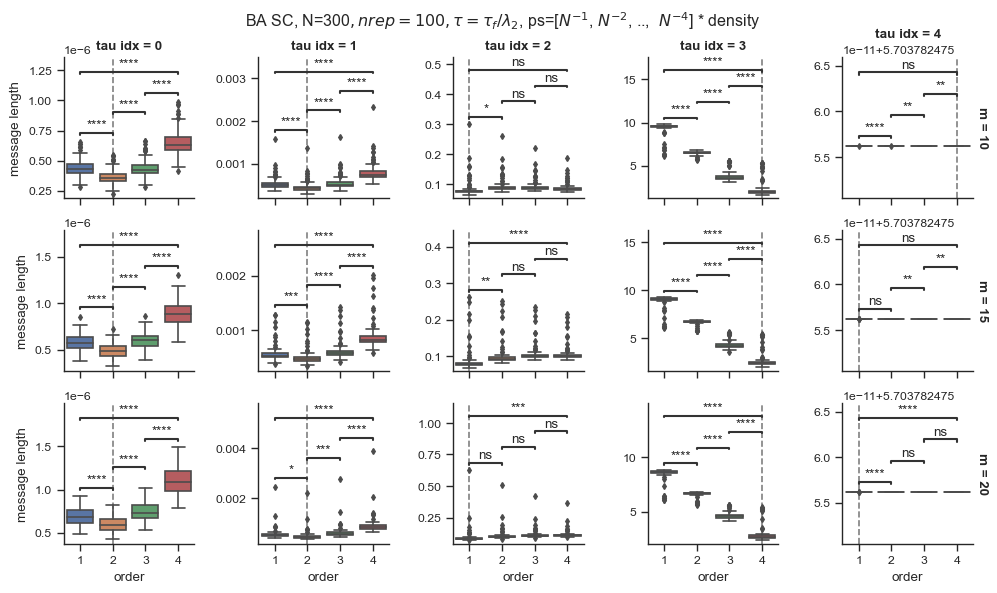

In [110]:
g = sb.catplot(
    kind="box",
    data=df_BASC,
    x="order",
    y="message length",
    row="m",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, m in enumerate(ms):

        ax = g.axes[j, i]
        mask = (df_BASC["tau idx"] == i) * (df_BASC["m"] == m)

        annotator = Annotator(
            ax,
            pairs,
            data=df_BASC[mask],
            y="message length",
            x="order",
            row="m",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_BASC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"BA SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_BASC_N{N}_density_{density_scales}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [111]:
df_BASC.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_BASC_N300_density_[5, 10, 50, 100]_nreps_100_boxplot'

In [9]:
pd.read_csv(
    f"{out_dir}message_length_BASC_N300_ms_[10, 15, 20]_taufact_[0.001, 0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot.csv"
)

,Unnamed: 0,message length,m,rep,tau fact.,order
0,0,0.000138,10,0,0.001,1
1,1,0.000116,10,0,0.001,2
2,2,0.000139,10,0,0.001,3
3,3,0.000205,10,0,0.001,4
4,4,0.007402,10,0,0.010,1
...,...,...,...,...,...,...
5995,5995,0.553274,20,99,1.000,4
5996,5996,5.706198,20,99,10.000,1
5997,5997,5.705797,20,99,10.000,2
5998,5998,5.704331,20,99,10.000,3


## Watts-Strogatz

In [145]:
N = 300
kks = [10, 15, 20]
pp = 0.15

n_rep = 100

rescale = True

In [103]:
Hs = dict()
for kk in kks:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        G = nx.watts_strogatz_graph(N, kk, pp)
        H = xgi.flag_complex(G, max_order=4)
        xgi.write_edgelist(H, f"../data/WSSC_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[kk] = Hs_i

# orders = np.array(xgi.unique_edge_sizes(Hs[kks[0]][0])) - 1
# weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [28:16<00:00, 16.96s/it]


In [146]:
Hs = dict()
for kk in kks:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        G = nx.watts_strogatz_graph(N, kk, pp)
        H = xgi.flag_complex(G, max_order=4)
        xgi.read_edgelist(f"../data/WSSC_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[kk] = Hs_i

100%|█████████████████████████████████████████| 100/100 [30:32<00:00, 18.33s/it]


In [147]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for kk, Hs_i in Hs.items():

    info_losses[kk] = dict()
    complexities[kk] = dict()
    orders_arr[kk] = dict()
    message_lengths[kk] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[kk][i] = dict()
        complexities[kk][i] = dict()
        orders_arr[kk][i] = dict()
        message_lengths[kk][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
            )

            info_losses[kk][i][j] = Ds_H
            complexities[kk][i][j] = lZs_H
            orders_arr[kk][i][j] = orders
            message_lengths[kk][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in kks]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[9.24e-04 2.84e-02 8.72e-01 2.68e+01 8.23e+02]
logm result may be inaccurate, approximate err = 4.607803727146277e-13
logm result may be inaccurate, approximate err = 4.665123107325576e-13
logm result may be inaccurate, approximate err = 4.607803727146277e-13
logm result may be inaccurate, approximate err = 4.616676591181164e-13
logm result may be inaccurate, approximate err = 4.607803727146277e-13
logm result may be inaccurate, approximate err = 5.208614073052213e-13
logm result may be inaccurate, approximate err = 4.607803727146277e-13
logm result may be inaccurate, approximate err = 4.607803727146277e-13
logm result may be inaccurate, approximate err = 4.649241383860118e-13
logm result may be inaccurate, approximate err = 4.271637727379521e-13
logm result may be inaccurate, approximate err = 4.649241383860118e-13
logm result may be inaccurate, approximate err = 4.857615751218576e-13
logm result may be inaccurate, approximate err = 4.649241383860118e-13
logm result may be inaccurate,

  1%|▍                                          | 1/100 [00:36<59:53, 36.30s/it]

[1.09e-03 3.09e-02 8.82e-01 2.51e+01 7.16e+02]
logm result may be inaccurate, approximate err = 4.594583619734556e-13
logm result may be inaccurate, approximate err = 4.74109005199592e-13
logm result may be inaccurate, approximate err = 4.594583619734556e-13
logm result may be inaccurate, approximate err = 4.900487330600773e-13
logm result may be inaccurate, approximate err = 4.594583619734556e-13
logm result may be inaccurate, approximate err = 4.694780209638857e-13
logm result may be inaccurate, approximate err = 4.594583619734556e-13
logm result may be inaccurate, approximate err = 4.594583619734556e-13
logm result may be inaccurate, approximate err = 4.5445529457330464e-13
logm result may be inaccurate, approximate err = 4.232533136880253e-13
logm result may be inaccurate, approximate err = 4.5445529457330464e-13
logm result may be inaccurate, approximate err = 4.1987612406766093e-13
logm result may be inaccurate, approximate err = 4.5445529457330464e-13
logm result may be inaccura

  2%|▊                                          | 2/100 [01:11<58:22, 35.74s/it]

[9.16e-04 2.73e-02 8.12e-01 2.42e+01 7.19e+02]
logm result may be inaccurate, approximate err = 4.919163228305727e-13
logm result may be inaccurate, approximate err = 4.658276190550899e-13
logm result may be inaccurate, approximate err = 4.919163228305727e-13
logm result may be inaccurate, approximate err = 4.718941044817836e-13
logm result may be inaccurate, approximate err = 4.919163228305727e-13
logm result may be inaccurate, approximate err = 4.780471098118439e-13
logm result may be inaccurate, approximate err = 4.919163228305727e-13
logm result may be inaccurate, approximate err = 4.919163228305727e-13
logm result may be inaccurate, approximate err = 4.606026486413093e-13
logm result may be inaccurate, approximate err = 4.386732836660681e-13
logm result may be inaccurate, approximate err = 4.606026486413093e-13
logm result may be inaccurate, approximate err = 4.1243455605457226e-13
logm result may be inaccurate, approximate err = 4.606026486413093e-13
logm result may be inaccurate

  3%|█▎                                         | 3/100 [01:47<57:34, 35.61s/it]

[8.17e-04 2.57e-02 8.06e-01 2.53e+01 7.95e+02]
logm result may be inaccurate, approximate err = 5.054893825342532e-13
logm result may be inaccurate, approximate err = 4.449739368422129e-13
logm result may be inaccurate, approximate err = 5.054893825342532e-13
logm result may be inaccurate, approximate err = 4.591607748357686e-13
logm result may be inaccurate, approximate err = 5.054893825342532e-13
logm result may be inaccurate, approximate err = 4.923539268669055e-13
logm result may be inaccurate, approximate err = 5.054893825342532e-13
logm result may be inaccurate, approximate err = 5.054893825342532e-13
logm result may be inaccurate, approximate err = 4.555471704481189e-13
logm result may be inaccurate, approximate err = 4.219282828053734e-13
logm result may be inaccurate, approximate err = 4.555471704481189e-13
logm result may be inaccurate, approximate err = 4.388746388098163e-13
logm result may be inaccurate, approximate err = 4.555471704481189e-13
logm result may be inaccurate,

  4%|█▋                                         | 4/100 [02:23<57:12, 35.76s/it]

[7.92e-04 2.40e-02 7.26e-01 2.20e+01 6.66e+02]
logm result may be inaccurate, approximate err = 5.223298434380768e-13
logm result may be inaccurate, approximate err = 4.645342846248353e-13
logm result may be inaccurate, approximate err = 5.223298434380768e-13
logm result may be inaccurate, approximate err = 4.703527850532033e-13
logm result may be inaccurate, approximate err = 5.223298434380768e-13
logm result may be inaccurate, approximate err = 4.858946577192399e-13
logm result may be inaccurate, approximate err = 5.223298434380768e-13
logm result may be inaccurate, approximate err = 5.223298434380768e-13
logm result may be inaccurate, approximate err = 4.768165419494973e-13
logm result may be inaccurate, approximate err = 4.1695476316271544e-13
logm result may be inaccurate, approximate err = 4.768165419494973e-13
logm result may be inaccurate, approximate err = 4.3458416195284535e-13
logm result may be inaccurate, approximate err = 4.768165419494973e-13
logm result may be inaccurat

  5%|██▏                                        | 5/100 [02:58<56:34, 35.73s/it]

[9.95e-04 3.08e-02 9.54e-01 2.95e+01 9.14e+02]
logm result may be inaccurate, approximate err = 5.112321488898496e-13
logm result may be inaccurate, approximate err = 4.886059526627858e-13
logm result may be inaccurate, approximate err = 5.112321488898496e-13
logm result may be inaccurate, approximate err = 5.049789072436792e-13
logm result may be inaccurate, approximate err = 5.112321488898496e-13
logm result may be inaccurate, approximate err = 4.616701427976224e-13
logm result may be inaccurate, approximate err = 5.112321488898496e-13
logm result may be inaccurate, approximate err = 5.112321488898496e-13
logm result may be inaccurate, approximate err = 4.3172353819120666e-13
logm result may be inaccurate, approximate err = 4.476209684602939e-13
logm result may be inaccurate, approximate err = 4.3172353819120666e-13
logm result may be inaccurate, approximate err = 4.074971820419347e-13
logm result may be inaccurate, approximate err = 4.3172353819120666e-13
logm result may be inaccura

  6%|██▌                                        | 6/100 [03:34<55:45, 35.59s/it]

[9.31e-04 2.81e-02 8.49e-01 2.56e+01 7.74e+02]
logm result may be inaccurate, approximate err = 4.966220776786432e-13
logm result may be inaccurate, approximate err = 4.703739275924428e-13
logm result may be inaccurate, approximate err = 4.966220776786432e-13
logm result may be inaccurate, approximate err = 4.808211021935737e-13
logm result may be inaccurate, approximate err = 4.966220776786432e-13
logm result may be inaccurate, approximate err = 5.015472924122989e-13
logm result may be inaccurate, approximate err = 4.966220776786432e-13
logm result may be inaccurate, approximate err = 4.966220776786432e-13
logm result may be inaccurate, approximate err = 4.606510523379237e-13
logm result may be inaccurate, approximate err = 4.1677375075651876e-13
logm result may be inaccurate, approximate err = 4.606510523379237e-13
logm result may be inaccurate, approximate err = 4.218959386594323e-13
logm result may be inaccurate, approximate err = 4.606510523379237e-13
logm result may be inaccurate

  7%|███                                        | 7/100 [04:11<55:51, 36.04s/it]

[8.24e-04 2.55e-02 7.89e-01 2.44e+01 7.56e+02]
logm result may be inaccurate, approximate err = 4.656603956245555e-13
logm result may be inaccurate, approximate err = 4.5395260688966794e-13
logm result may be inaccurate, approximate err = 4.656603956245555e-13
logm result may be inaccurate, approximate err = 4.5341839036399915e-13
logm result may be inaccurate, approximate err = 4.656603956245555e-13
logm result may be inaccurate, approximate err = 5.416165715265255e-13
logm result may be inaccurate, approximate err = 4.656603956245555e-13
logm result may be inaccurate, approximate err = 4.656603956245555e-13
logm result may be inaccurate, approximate err = 5.818503336644929e-13
logm result may be inaccurate, approximate err = 4.3137304525603286e-13
logm result may be inaccurate, approximate err = 5.818503336644929e-13
logm result may be inaccurate, approximate err = 4.942081341507309e-13
logm result may be inaccurate, approximate err = 5.818503336644929e-13
logm result may be inaccura

  8%|███▍                                       | 8/100 [04:46<54:51, 35.78s/it]

[9.35e-04 2.83e-02 8.53e-01 2.58e+01 7.79e+02]
logm result may be inaccurate, approximate err = 5.069617564171816e-13
logm result may be inaccurate, approximate err = 4.4536168028490145e-13
logm result may be inaccurate, approximate err = 5.069617564171816e-13
logm result may be inaccurate, approximate err = 4.899733258045162e-13
logm result may be inaccurate, approximate err = 5.069617564171816e-13
logm result may be inaccurate, approximate err = 5.015846050383087e-13
logm result may be inaccurate, approximate err = 5.069617564171816e-13
logm result may be inaccurate, approximate err = 5.069617564171816e-13
logm result may be inaccurate, approximate err = 4.587666894287359e-13
logm result may be inaccurate, approximate err = 4.330735276977848e-13
logm result may be inaccurate, approximate err = 4.587666894287359e-13
logm result may be inaccurate, approximate err = 4.4353786287885147e-13
logm result may be inaccurate, approximate err = 4.587666894287359e-13
logm result may be inaccurat

  9%|███▊                                       | 9/100 [05:22<54:16, 35.79s/it]

[8.75e-04 2.61e-02 7.81e-01 2.33e+01 6.96e+02]
logm result may be inaccurate, approximate err = 4.774397006932395e-13
logm result may be inaccurate, approximate err = 4.688304636531897e-13
logm result may be inaccurate, approximate err = 4.774397006932395e-13
logm result may be inaccurate, approximate err = 5.024802368987945e-13
logm result may be inaccurate, approximate err = 4.774397006932395e-13
logm result may be inaccurate, approximate err = 4.817919909243473e-13
logm result may be inaccurate, approximate err = 4.774397006932395e-13
logm result may be inaccurate, approximate err = 4.774397006932395e-13
logm result may be inaccurate, approximate err = 4.4700008637625915e-13
logm result may be inaccurate, approximate err = 4.391749744081841e-13
logm result may be inaccurate, approximate err = 4.4700008637625915e-13
logm result may be inaccurate, approximate err = 4.513683027332367e-13
logm result may be inaccurate, approximate err = 4.4700008637625915e-13
logm result may be inaccura

 10%|████▏                                     | 10/100 [05:57<53:35, 35.73s/it]

[9.09e-04 2.77e-02 8.47e-01 2.58e+01 7.89e+02]
logm result may be inaccurate, approximate err = 5.089890869583905e-13
logm result may be inaccurate, approximate err = 4.818594785937622e-13
logm result may be inaccurate, approximate err = 5.089890869583905e-13
logm result may be inaccurate, approximate err = 4.664199243650792e-13
logm result may be inaccurate, approximate err = 5.089890869583905e-13
logm result may be inaccurate, approximate err = 5.24617716736322e-13
logm result may be inaccurate, approximate err = 5.089890869583905e-13
logm result may be inaccurate, approximate err = 5.089890869583905e-13
logm result may be inaccurate, approximate err = 4.277735218862295e-13
logm result may be inaccurate, approximate err = 4.086525794135843e-13
logm result may be inaccurate, approximate err = 4.277735218862295e-13
logm result may be inaccurate, approximate err = 4.524388476297789e-13
logm result may be inaccurate, approximate err = 4.277735218862295e-13
logm result may be inaccurate, 

 11%|████▌                                     | 11/100 [06:33<53:00, 35.73s/it]

[9.30e-04 2.91e-02 9.10e-01 2.84e+01 8.90e+02]
logm result may be inaccurate, approximate err = 4.699774433463019e-13
logm result may be inaccurate, approximate err = 4.715728502403365e-13
logm result may be inaccurate, approximate err = 4.699774433463019e-13
logm result may be inaccurate, approximate err = 5.036081720531078e-13
logm result may be inaccurate, approximate err = 4.699774433463019e-13
logm result may be inaccurate, approximate err = 5.016008831823028e-13
logm result may be inaccurate, approximate err = 4.699774433463019e-13
logm result may be inaccurate, approximate err = 4.699774433463019e-13
logm result may be inaccurate, approximate err = 4.330782819907221e-13
logm result may be inaccurate, approximate err = 4.2005735009199326e-13
logm result may be inaccurate, approximate err = 4.330782819907221e-13
logm result may be inaccurate, approximate err = 4.4965696811631805e-13
logm result may be inaccurate, approximate err = 4.330782819907221e-13
logm result may be inaccurat

 12%|█████                                     | 12/100 [07:08<52:20, 35.69s/it]

[1.00e-03 3.05e-02 9.29e-01 2.83e+01 8.60e+02]
logm result may be inaccurate, approximate err = 4.825147628266764e-13
logm result may be inaccurate, approximate err = 4.704863587917246e-13
logm result may be inaccurate, approximate err = 4.825147628266764e-13
logm result may be inaccurate, approximate err = 4.750575614293381e-13
logm result may be inaccurate, approximate err = 4.825147628266764e-13
logm result may be inaccurate, approximate err = 5.057945403035254e-13
logm result may be inaccurate, approximate err = 4.825147628266764e-13
logm result may be inaccurate, approximate err = 4.825147628266764e-13
logm result may be inaccurate, approximate err = 4.271485797663006e-13
logm result may be inaccurate, approximate err = 4.0813044312283095e-13
logm result may be inaccurate, approximate err = 4.271485797663006e-13
logm result may be inaccurate, approximate err = 4.459689602685937e-13
logm result may be inaccurate, approximate err = 4.271485797663006e-13
logm result may be inaccurate

 13%|█████▍                                    | 13/100 [07:44<51:35, 35.58s/it]

[8.45e-04 2.66e-02 8.36e-01 2.63e+01 8.28e+02]
logm result may be inaccurate, approximate err = 5.474308453284722e-13
logm result may be inaccurate, approximate err = 4.611437812929383e-13
logm result may be inaccurate, approximate err = 5.474308453284722e-13
logm result may be inaccurate, approximate err = 5.004239492307388e-13
logm result may be inaccurate, approximate err = 5.474308453284722e-13
logm result may be inaccurate, approximate err = 4.881577749508868e-13
logm result may be inaccurate, approximate err = 5.474308453284722e-13
logm result may be inaccurate, approximate err = 5.474308453284722e-13
logm result may be inaccurate, approximate err = 5.959417517646452e-13
logm result may be inaccurate, approximate err = 4.366083140242698e-13
logm result may be inaccurate, approximate err = 5.959417517646452e-13
logm result may be inaccurate, approximate err = 4.448118631299041e-13
logm result may be inaccurate, approximate err = 5.959417517646452e-13
logm result may be inaccurate,

 14%|█████▉                                    | 14/100 [08:19<50:49, 35.46s/it]

[9.00e-04 2.80e-02 8.72e-01 2.72e+01 8.46e+02]
logm result may be inaccurate, approximate err = 4.802055981990435e-13
logm result may be inaccurate, approximate err = 4.573499512351401e-13
logm result may be inaccurate, approximate err = 4.802055981990435e-13
logm result may be inaccurate, approximate err = 4.798055897597192e-13
logm result may be inaccurate, approximate err = 4.802055981990435e-13
logm result may be inaccurate, approximate err = 4.650953503183929e-13
logm result may be inaccurate, approximate err = 4.802055981990435e-13
logm result may be inaccurate, approximate err = 4.802055981990435e-13
logm result may be inaccurate, approximate err = 5.357557344907633e-13
logm result may be inaccurate, approximate err = 4.16578991217779e-13
logm result may be inaccurate, approximate err = 5.357557344907633e-13
logm result may be inaccurate, approximate err = 4.2710869389864445e-13
logm result may be inaccurate, approximate err = 5.357557344907633e-13
logm result may be inaccurate,

 15%|██████▎                                   | 15/100 [08:55<50:17, 35.50s/it]

[1.09e-03 3.21e-02 9.48e-01 2.80e+01 8.27e+02]
logm result may be inaccurate, approximate err = 4.722821572466445e-13
logm result may be inaccurate, approximate err = 4.707156581092106e-13
logm result may be inaccurate, approximate err = 4.722821572466445e-13
logm result may be inaccurate, approximate err = 4.912627943122139e-13
logm result may be inaccurate, approximate err = 4.722821572466445e-13
logm result may be inaccurate, approximate err = 5.122258758622755e-13
logm result may be inaccurate, approximate err = 4.722821572466445e-13
logm result may be inaccurate, approximate err = 4.722821572466445e-13
logm result may be inaccurate, approximate err = 4.501738477832758e-13
logm result may be inaccurate, approximate err = 4.0621048866541784e-13
logm result may be inaccurate, approximate err = 4.501738477832758e-13
logm result may be inaccurate, approximate err = 4.283885435904606e-13
logm result may be inaccurate, approximate err = 4.501738477832758e-13
logm result may be inaccurate

 16%|██████▋                                   | 16/100 [09:30<49:45, 35.54s/it]

[8.37e-04 2.60e-02 8.10e-01 2.52e+01 7.84e+02]
logm result may be inaccurate, approximate err = 5.091892586163629e-13
logm result may be inaccurate, approximate err = 4.608911937743509e-13
logm result may be inaccurate, approximate err = 5.091892586163629e-13
logm result may be inaccurate, approximate err = 4.703586098259246e-13
logm result may be inaccurate, approximate err = 5.091892586163629e-13
logm result may be inaccurate, approximate err = 4.4441525574742025e-13
logm result may be inaccurate, approximate err = 5.091892586163629e-13
logm result may be inaccurate, approximate err = 5.091892586163629e-13
logm result may be inaccurate, approximate err = 4.356755619256889e-13
logm result may be inaccurate, approximate err = 4.2070712864956644e-13
logm result may be inaccurate, approximate err = 4.356755619256889e-13
logm result may be inaccurate, approximate err = 4.366778329102842e-13
logm result may be inaccurate, approximate err = 4.356755619256889e-13
logm result may be inaccurat

 17%|███████▏                                  | 17/100 [10:08<49:52, 36.06s/it]

[1.03e-03 3.02e-02 8.85e-01 2.60e+01 7.61e+02]
logm result may be inaccurate, approximate err = 5.020695566207483e-13
logm result may be inaccurate, approximate err = 4.4731662469588337e-13
logm result may be inaccurate, approximate err = 5.020695566207483e-13
logm result may be inaccurate, approximate err = 4.639361181968033e-13
logm result may be inaccurate, approximate err = 5.020695566207483e-13
logm result may be inaccurate, approximate err = 4.711057462501602e-13
logm result may be inaccurate, approximate err = 5.020695566207483e-13
logm result may be inaccurate, approximate err = 5.020695566207483e-13
logm result may be inaccurate, approximate err = 4.589508927229917e-13
logm result may be inaccurate, approximate err = 4.1051266868301373e-13
logm result may be inaccurate, approximate err = 4.589508927229917e-13
logm result may be inaccurate, approximate err = 4.1603875215092894e-13
logm result may be inaccurate, approximate err = 4.589508927229917e-13
logm result may be inaccura

 18%|███████▌                                  | 18/100 [10:43<49:07, 35.95s/it]

[9.44e-04 2.86e-02 8.63e-01 2.61e+01 7.89e+02]
logm result may be inaccurate, approximate err = 4.820151772194499e-13
logm result may be inaccurate, approximate err = 4.678462252112278e-13
logm result may be inaccurate, approximate err = 4.820151772194499e-13
logm result may be inaccurate, approximate err = 4.983926981000195e-13
logm result may be inaccurate, approximate err = 4.820151772194499e-13
logm result may be inaccurate, approximate err = 4.873400592792369e-13
logm result may be inaccurate, approximate err = 4.820151772194499e-13
logm result may be inaccurate, approximate err = 4.820151772194499e-13
logm result may be inaccurate, approximate err = 5.723412354394308e-13
logm result may be inaccurate, approximate err = 4.493949776210774e-13
logm result may be inaccurate, approximate err = 5.723412354394308e-13
logm result may be inaccurate, approximate err = 4.2996373369056944e-13
logm result may be inaccurate, approximate err = 5.723412354394308e-13
logm result may be inaccurate

 19%|███████▉                                  | 19/100 [11:19<48:19, 35.79s/it]

[1.00e-03 2.98e-02 8.85e-01 2.63e+01 7.80e+02]
logm result may be inaccurate, approximate err = 5.000911661247637e-13
logm result may be inaccurate, approximate err = 4.698349033272338e-13
logm result may be inaccurate, approximate err = 5.000911661247637e-13
logm result may be inaccurate, approximate err = 4.626019834218528e-13
logm result may be inaccurate, approximate err = 5.000911661247637e-13
logm result may be inaccurate, approximate err = 4.774806015438467e-13
logm result may be inaccurate, approximate err = 5.000911661247637e-13
logm result may be inaccurate, approximate err = 5.000911661247637e-13
logm result may be inaccurate, approximate err = 4.776742541269939e-13
logm result may be inaccurate, approximate err = 4.268585372560273e-13
logm result may be inaccurate, approximate err = 4.776742541269939e-13
logm result may be inaccurate, approximate err = 4.2094958102828414e-13
logm result may be inaccurate, approximate err = 4.776742541269939e-13
logm result may be inaccurate

 20%|████████▍                                 | 20/100 [11:54<47:34, 35.68s/it]

[1.10e-03 3.22e-02 9.46e-01 2.77e+01 8.13e+02]
logm result may be inaccurate, approximate err = 5.124637508293227e-13
logm result may be inaccurate, approximate err = 4.669605299262923e-13
logm result may be inaccurate, approximate err = 5.124637508293227e-13
logm result may be inaccurate, approximate err = 4.993123862779054e-13
logm result may be inaccurate, approximate err = 5.124637508293227e-13
logm result may be inaccurate, approximate err = 4.828925148776572e-13
logm result may be inaccurate, approximate err = 5.124637508293227e-13
logm result may be inaccurate, approximate err = 5.124637508293227e-13
logm result may be inaccurate, approximate err = 4.508605206771404e-13
logm result may be inaccurate, approximate err = 4.092708451145085e-13
logm result may be inaccurate, approximate err = 4.508605206771404e-13
logm result may be inaccurate, approximate err = 4.274807145557408e-13
logm result may be inaccurate, approximate err = 4.508605206771404e-13
logm result may be inaccurate,

 21%|████████▊                                 | 21/100 [12:29<46:51, 35.59s/it]

[9.33e-04 2.86e-02 8.78e-01 2.69e+01 8.26e+02]
logm result may be inaccurate, approximate err = 4.900752587784088e-13
logm result may be inaccurate, approximate err = 4.555824547117819e-13
logm result may be inaccurate, approximate err = 4.900752587784088e-13
logm result may be inaccurate, approximate err = 4.822578765811275e-13
logm result may be inaccurate, approximate err = 4.900752587784088e-13
logm result may be inaccurate, approximate err = 4.839784911366457e-13
logm result may be inaccurate, approximate err = 4.900752587784088e-13
logm result may be inaccurate, approximate err = 4.900752587784088e-13
logm result may be inaccurate, approximate err = 4.4754281781581e-13
logm result may be inaccurate, approximate err = 4.4173127239018853e-13
logm result may be inaccurate, approximate err = 4.4754281781581e-13
logm result may be inaccurate, approximate err = 4.412528920198543e-13
logm result may be inaccurate, approximate err = 4.4754281781581e-13
logm result may be inaccurate, appr

 22%|█████████▏                                | 22/100 [13:05<46:22, 35.67s/it]

[9.18e-04 2.86e-02 8.93e-01 2.79e+01 8.69e+02]
logm result may be inaccurate, approximate err = 4.905586235040322e-13
logm result may be inaccurate, approximate err = 4.911545024032279e-13
logm result may be inaccurate, approximate err = 4.905586235040322e-13
logm result may be inaccurate, approximate err = 4.777965488978264e-13
logm result may be inaccurate, approximate err = 4.905586235040322e-13
logm result may be inaccurate, approximate err = 5.534100716832454e-13
logm result may be inaccurate, approximate err = 4.905586235040322e-13
logm result may be inaccurate, approximate err = 4.905586235040322e-13
logm result may be inaccurate, approximate err = 4.4178235851209e-13
logm result may be inaccurate, approximate err = 4.324637035074591e-13
logm result may be inaccurate, approximate err = 4.4178235851209e-13
logm result may be inaccurate, approximate err = 4.4211425453753474e-13
logm result may be inaccurate, approximate err = 4.4178235851209e-13
logm result may be inaccurate, appr

 23%|█████████▋                                | 23/100 [13:44<47:07, 36.72s/it]

[9.66e-04 2.98e-02 9.17e-01 2.83e+01 8.71e+02]
logm result may be inaccurate, approximate err = 5.003352267432821e-13
logm result may be inaccurate, approximate err = 4.564641611964424e-13
logm result may be inaccurate, approximate err = 5.003352267432821e-13
logm result may be inaccurate, approximate err = 4.926246668359624e-13
logm result may be inaccurate, approximate err = 5.003352267432821e-13
logm result may be inaccurate, approximate err = 4.851490648521772e-13
logm result may be inaccurate, approximate err = 5.003352267432821e-13
logm result may be inaccurate, approximate err = 5.003352267432821e-13
logm result may be inaccurate, approximate err = 4.580763720309162e-13
logm result may be inaccurate, approximate err = 4.2954653295908635e-13
logm result may be inaccurate, approximate err = 4.580763720309162e-13
logm result may be inaccurate, approximate err = 4.202974974648793e-13
logm result may be inaccurate, approximate err = 4.580763720309162e-13
logm result may be inaccurate

 24%|██████████                                | 24/100 [14:21<46:32, 36.74s/it]

[9.69e-04 2.92e-02 8.78e-01 2.64e+01 7.96e+02]
logm result may be inaccurate, approximate err = 5.101925518648915e-13
logm result may be inaccurate, approximate err = 4.870231544350313e-13
logm result may be inaccurate, approximate err = 5.101925518648915e-13
logm result may be inaccurate, approximate err = 4.4935129702444937e-13
logm result may be inaccurate, approximate err = 5.101925518648915e-13
logm result may be inaccurate, approximate err = 4.69741158968011e-13
logm result may be inaccurate, approximate err = 5.101925518648915e-13
logm result may be inaccurate, approximate err = 5.101925518648915e-13
logm result may be inaccurate, approximate err = 4.295312656067283e-13
logm result may be inaccurate, approximate err = 4.039238732083535e-13
logm result may be inaccurate, approximate err = 4.295312656067283e-13
logm result may be inaccurate, approximate err = 4.1367898541304485e-13
logm result may be inaccurate, approximate err = 4.295312656067283e-13
logm result may be inaccurate

 25%|██████████▌                               | 25/100 [14:57<45:23, 36.32s/it]

[1.04e-03 3.13e-02 9.39e-01 2.81e+01 8.44e+02]
logm result may be inaccurate, approximate err = 4.827728549203345e-13
logm result may be inaccurate, approximate err = 4.512941087949933e-13
logm result may be inaccurate, approximate err = 4.827728549203345e-13
logm result may be inaccurate, approximate err = 4.872389038925511e-13
logm result may be inaccurate, approximate err = 4.827728549203345e-13
logm result may be inaccurate, approximate err = 5.603931344685819e-13
logm result may be inaccurate, approximate err = 4.827728549203345e-13
logm result may be inaccurate, approximate err = 4.827728549203345e-13
logm result may be inaccurate, approximate err = 4.964202762556865e-13
logm result may be inaccurate, approximate err = 4.162247090656056e-13
logm result may be inaccurate, approximate err = 4.964202762556865e-13
logm result may be inaccurate, approximate err = 4.3579779983963083e-13
logm result may be inaccurate, approximate err = 4.964202762556865e-13
logm result may be inaccurate

 26%|██████████▉                               | 26/100 [15:32<44:28, 36.05s/it]

[9.76e-04 3.01e-02 9.25e-01 2.85e+01 8.76e+02]
logm result may be inaccurate, approximate err = 4.943854304859945e-13
logm result may be inaccurate, approximate err = 4.869487703305563e-13
logm result may be inaccurate, approximate err = 4.943854304859945e-13
logm result may be inaccurate, approximate err = 4.965388716984865e-13
logm result may be inaccurate, approximate err = 4.943854304859945e-13
logm result may be inaccurate, approximate err = 4.871392887358216e-13
logm result may be inaccurate, approximate err = 4.943854304859945e-13
logm result may be inaccurate, approximate err = 4.943854304859945e-13
logm result may be inaccurate, approximate err = 4.473885874759297e-13
logm result may be inaccurate, approximate err = 4.658549549502386e-13
logm result may be inaccurate, approximate err = 4.473885874759297e-13
logm result may be inaccurate, approximate err = 4.2130614976099044e-13
logm result may be inaccurate, approximate err = 4.473885874759297e-13
logm result may be inaccurate

 27%|███████████▎                              | 27/100 [16:08<43:47, 35.99s/it]

[1.04e-03 3.06e-02 9.02e-01 2.65e+01 7.82e+02]
logm result may be inaccurate, approximate err = 4.813931276201018e-13
logm result may be inaccurate, approximate err = 4.71300711379146e-13
logm result may be inaccurate, approximate err = 4.813931276201018e-13
logm result may be inaccurate, approximate err = 5.076601831064841e-13
logm result may be inaccurate, approximate err = 4.813931276201018e-13
logm result may be inaccurate, approximate err = 5.109153628576035e-13
logm result may be inaccurate, approximate err = 4.813931276201018e-13
logm result may be inaccurate, approximate err = 4.813931276201018e-13
logm result may be inaccurate, approximate err = 4.297547409958495e-13
logm result may be inaccurate, approximate err = 4.363526859836472e-13
logm result may be inaccurate, approximate err = 4.297547409958495e-13
logm result may be inaccurate, approximate err = 4.0270128339828117e-13
logm result may be inaccurate, approximate err = 4.297547409958495e-13
logm result may be inaccurate,

 28%|███████████▊                              | 28/100 [16:44<43:06, 35.92s/it]

[8.85e-04 2.67e-02 8.05e-01 2.43e+01 7.33e+02]
logm result may be inaccurate, approximate err = 4.601169571406683e-13
logm result may be inaccurate, approximate err = 4.771323545937982e-13
logm result may be inaccurate, approximate err = 4.601169571406683e-13
logm result may be inaccurate, approximate err = 4.813614196681685e-13
logm result may be inaccurate, approximate err = 4.601169571406683e-13
logm result may be inaccurate, approximate err = 4.983206301823102e-13
logm result may be inaccurate, approximate err = 4.601169571406683e-13
logm result may be inaccurate, approximate err = 4.601169571406683e-13
logm result may be inaccurate, approximate err = 6.002153102619513e-13
logm result may be inaccurate, approximate err = 4.26863359853748e-13
logm result may be inaccurate, approximate err = 6.002153102619513e-13
logm result may be inaccurate, approximate err = 5.352249832223989e-13
logm result may be inaccurate, approximate err = 6.002153102619513e-13
logm result may be inaccurate, 

 29%|████████████▏                             | 29/100 [17:19<42:16, 35.72s/it]

[8.17e-04 2.51e-02 7.73e-01 2.38e+01 7.32e+02]
logm result may be inaccurate, approximate err = 4.584624786014029e-13
logm result may be inaccurate, approximate err = 5.020763904754098e-13
logm result may be inaccurate, approximate err = 4.584624786014029e-13
logm result may be inaccurate, approximate err = 4.790453517530779e-13
logm result may be inaccurate, approximate err = 4.584624786014029e-13
logm result may be inaccurate, approximate err = 4.711866575311805e-13
logm result may be inaccurate, approximate err = 4.584624786014029e-13
logm result may be inaccurate, approximate err = 4.584624786014029e-13
logm result may be inaccurate, approximate err = 4.882319133900581e-13
logm result may be inaccurate, approximate err = 4.4601109929200344e-13
logm result may be inaccurate, approximate err = 4.882319133900581e-13
logm result may be inaccurate, approximate err = 4.5118043635732264e-13
logm result may be inaccurate, approximate err = 4.882319133900581e-13
logm result may be inaccurat

 30%|████████████▌                             | 30/100 [17:55<41:39, 35.71s/it]

[9.87e-04 2.98e-02 8.98e-01 2.71e+01 8.16e+02]
logm result may be inaccurate, approximate err = 5.048038583606586e-13
logm result may be inaccurate, approximate err = 4.709509964581791e-13
logm result may be inaccurate, approximate err = 5.048038583606586e-13
logm result may be inaccurate, approximate err = 4.768092452553709e-13
logm result may be inaccurate, approximate err = 5.048038583606586e-13
logm result may be inaccurate, approximate err = 4.722884045498194e-13
logm result may be inaccurate, approximate err = 5.048038583606586e-13
logm result may be inaccurate, approximate err = 5.048038583606586e-13
logm result may be inaccurate, approximate err = 4.535316361646433e-13
logm result may be inaccurate, approximate err = 4.563130939366469e-13
logm result may be inaccurate, approximate err = 4.535316361646433e-13
logm result may be inaccurate, approximate err = 4.2944553236440535e-13
logm result may be inaccurate, approximate err = 4.535316361646433e-13
logm result may be inaccurate

 31%|█████████████                             | 31/100 [18:30<41:05, 35.73s/it]

[1.00e-03 2.94e-02 8.59e-01 2.51e+01 7.34e+02]
logm result may be inaccurate, approximate err = 4.951014309953759e-13
logm result may be inaccurate, approximate err = 4.573945578889824e-13
logm result may be inaccurate, approximate err = 4.951014309953759e-13
logm result may be inaccurate, approximate err = 5.259035714945264e-13
logm result may be inaccurate, approximate err = 4.951014309953759e-13
logm result may be inaccurate, approximate err = 5.072342145298602e-13
logm result may be inaccurate, approximate err = 4.951014309953759e-13
logm result may be inaccurate, approximate err = 4.951014309953759e-13
logm result may be inaccurate, approximate err = 4.726128903587436e-13
logm result may be inaccurate, approximate err = 4.101314640812566e-13
logm result may be inaccurate, approximate err = 4.726128903587436e-13
logm result may be inaccurate, approximate err = 4.2181464978683823e-13
logm result may be inaccurate, approximate err = 4.726128903587436e-13
logm result may be inaccurate

 32%|█████████████▍                            | 32/100 [19:06<40:27, 35.70s/it]

[9.81e-04 2.94e-02 8.80e-01 2.64e+01 7.90e+02]
logm result may be inaccurate, approximate err = 4.743801277479217e-13
logm result may be inaccurate, approximate err = 4.880061280407833e-13
logm result may be inaccurate, approximate err = 4.743801277479217e-13
logm result may be inaccurate, approximate err = 4.733189492126157e-13
logm result may be inaccurate, approximate err = 4.743801277479217e-13
logm result may be inaccurate, approximate err = 4.87640562590851e-13
logm result may be inaccurate, approximate err = 4.743801277479217e-13
logm result may be inaccurate, approximate err = 4.743801277479217e-13
logm result may be inaccurate, approximate err = 4.2829327306199545e-13
logm result may be inaccurate, approximate err = 4.2662401155187643e-13
logm result may be inaccurate, approximate err = 4.2829327306199545e-13
logm result may be inaccurate, approximate err = 4.167767631848345e-13
logm result may be inaccurate, approximate err = 4.2829327306199545e-13
logm result may be inaccura

 33%|█████████████▊                            | 33/100 [19:42<39:53, 35.72s/it]

[8.33e-04 2.50e-02 7.50e-01 2.25e+01 6.74e+02]
logm result may be inaccurate, approximate err = 4.881819195369513e-13
logm result may be inaccurate, approximate err = 4.634602064583137e-13
logm result may be inaccurate, approximate err = 4.881819195369513e-13
logm result may be inaccurate, approximate err = 4.866975411623097e-13
logm result may be inaccurate, approximate err = 4.881819195369513e-13
logm result may be inaccurate, approximate err = 5.491394493685968e-13
logm result may be inaccurate, approximate err = 4.881819195369513e-13
logm result may be inaccurate, approximate err = 4.881819195369513e-13
logm result may be inaccurate, approximate err = 4.5492079697668e-13
logm result may be inaccurate, approximate err = 4.163120373240678e-13
logm result may be inaccurate, approximate err = 4.5492079697668e-13
logm result may be inaccurate, approximate err = 4.3405121100936485e-13
logm result may be inaccurate, approximate err = 4.5492079697668e-13
logm result may be inaccurate, appr

 34%|██████████████▎                           | 34/100 [20:17<39:09, 35.61s/it]

[8.52e-04 2.58e-02 7.80e-01 2.36e+01 7.15e+02]
logm result may be inaccurate, approximate err = 5.023781112455768e-13
logm result may be inaccurate, approximate err = 4.857155495068317e-13
logm result may be inaccurate, approximate err = 5.023781112455768e-13
logm result may be inaccurate, approximate err = 4.837237353117364e-13
logm result may be inaccurate, approximate err = 5.023781112455768e-13
logm result may be inaccurate, approximate err = 5.057771056030071e-13
logm result may be inaccurate, approximate err = 5.023781112455768e-13
logm result may be inaccurate, approximate err = 5.023781112455768e-13
logm result may be inaccurate, approximate err = 4.904741782299525e-13
logm result may be inaccurate, approximate err = 4.4646953798110903e-13
logm result may be inaccurate, approximate err = 4.904741782299525e-13
logm result may be inaccurate, approximate err = 4.4910986072491177e-13
logm result may be inaccurate, approximate err = 4.904741782299525e-13
logm result may be inaccurat

 35%|██████████████▋                           | 35/100 [20:53<38:31, 35.56s/it]

[8.76e-04 2.80e-02 8.93e-01 2.85e+01 9.09e+02]
logm result may be inaccurate, approximate err = 4.954202100153167e-13
logm result may be inaccurate, approximate err = 4.572185963602203e-13
logm result may be inaccurate, approximate err = 4.954202100153167e-13
logm result may be inaccurate, approximate err = 4.776218555767636e-13
logm result may be inaccurate, approximate err = 4.954202100153167e-13
logm result may be inaccurate, approximate err = 4.558016421324735e-13
logm result may be inaccurate, approximate err = 4.954202100153167e-13
logm result may be inaccurate, approximate err = 4.954202100153167e-13
logm result may be inaccurate, approximate err = 4.261661068792774e-13
logm result may be inaccurate, approximate err = 3.961558835227087e-13
logm result may be inaccurate, approximate err = 4.261661068792774e-13
logm result may be inaccurate, approximate err = 4.46939536768362e-13
logm result may be inaccurate, approximate err = 4.261661068792774e-13
logm result may be inaccurate, 

 36%|███████████████                           | 36/100 [21:28<37:50, 35.48s/it]

[9.57e-04 2.93e-02 9.00e-01 2.76e+01 8.47e+02]
logm result may be inaccurate, approximate err = 5.129548209973293e-13
logm result may be inaccurate, approximate err = 4.732685076786005e-13
logm result may be inaccurate, approximate err = 5.129548209973293e-13
logm result may be inaccurate, approximate err = 4.730888544692496e-13
logm result may be inaccurate, approximate err = 5.129548209973293e-13
logm result may be inaccurate, approximate err = 5.490278160141196e-13
logm result may be inaccurate, approximate err = 5.129548209973293e-13
logm result may be inaccurate, approximate err = 5.129548209973293e-13
logm result may be inaccurate, approximate err = 4.540817401916528e-13
logm result may be inaccurate, approximate err = 4.816327305307313e-13
logm result may be inaccurate, approximate err = 4.540817401916528e-13
logm result may be inaccurate, approximate err = 4.439805891088984e-13
logm result may be inaccurate, approximate err = 4.540817401916528e-13
logm result may be inaccurate,

 37%|███████████████▌                          | 37/100 [22:03<37:15, 35.48s/it]

[9.87e-04 2.91e-02 8.60e-01 2.54e+01 7.49e+02]
logm result may be inaccurate, approximate err = 5.238880432531625e-13
logm result may be inaccurate, approximate err = 4.5400962523386526e-13
logm result may be inaccurate, approximate err = 5.238880432531625e-13
logm result may be inaccurate, approximate err = 4.392685224160142e-13
logm result may be inaccurate, approximate err = 5.238880432531625e-13
logm result may be inaccurate, approximate err = 4.4576928960704306e-13
logm result may be inaccurate, approximate err = 5.238880432531625e-13
logm result may be inaccurate, approximate err = 5.238880432531625e-13
logm result may be inaccurate, approximate err = 4.3733144554359277e-13
logm result may be inaccurate, approximate err = 4.1318285967669267e-13
logm result may be inaccurate, approximate err = 4.3733144554359277e-13
logm result may be inaccurate, approximate err = 4.437333340621841e-13
logm result may be inaccurate, approximate err = 4.3733144554359277e-13
logm result may be inacc

 38%|███████████████▉                          | 38/100 [22:38<36:34, 35.40s/it]

[1.16e-03 3.41e-02 1.00e+00 2.95e+01 8.67e+02]
logm result may be inaccurate, approximate err = 5.114048611756067e-13
logm result may be inaccurate, approximate err = 4.735151817745578e-13
logm result may be inaccurate, approximate err = 5.114048611756067e-13
logm result may be inaccurate, approximate err = 4.811081863975834e-13
logm result may be inaccurate, approximate err = 5.114048611756067e-13
logm result may be inaccurate, approximate err = 5.11450126023292e-13
logm result may be inaccurate, approximate err = 5.114048611756067e-13
logm result may be inaccurate, approximate err = 5.114048611756067e-13
logm result may be inaccurate, approximate err = 4.2868056435434614e-13
logm result may be inaccurate, approximate err = 4.140787724703135e-13
logm result may be inaccurate, approximate err = 4.2868056435434614e-13
logm result may be inaccurate, approximate err = 4.395702088197673e-13
logm result may be inaccurate, approximate err = 4.2868056435434614e-13
logm result may be inaccurat

 39%|████████████████▍                         | 39/100 [23:17<36:47, 36.18s/it]

[1.06e-03 3.06e-02 8.81e-01 2.53e+01 7.29e+02]
logm result may be inaccurate, approximate err = 5.514497801931063e-13
logm result may be inaccurate, approximate err = 4.739234782186086e-13
logm result may be inaccurate, approximate err = 5.514497801931063e-13
logm result may be inaccurate, approximate err = 4.78036842419237e-13
logm result may be inaccurate, approximate err = 5.514497801931063e-13
logm result may be inaccurate, approximate err = 5.078704537933915e-13
logm result may be inaccurate, approximate err = 5.514497801931063e-13
logm result may be inaccurate, approximate err = 5.514497801931063e-13
logm result may be inaccurate, approximate err = 4.4382752257183724e-13
logm result may be inaccurate, approximate err = 4.0705990383159443e-13
logm result may be inaccurate, approximate err = 4.4382752257183724e-13
logm result may be inaccurate, approximate err = 4.129006320530671e-13
logm result may be inaccurate, approximate err = 4.4382752257183724e-13
logm result may be inaccura

 40%|████████████████▊                         | 40/100 [23:52<35:53, 35.88s/it]

[9.76e-04 2.99e-02 9.18e-01 2.82e+01 8.63e+02]
logm result may be inaccurate, approximate err = 4.809967386875705e-13
logm result may be inaccurate, approximate err = 4.892876737421359e-13
logm result may be inaccurate, approximate err = 4.809967386875705e-13
logm result may be inaccurate, approximate err = 4.866403268352443e-13
logm result may be inaccurate, approximate err = 4.809967386875705e-13
logm result may be inaccurate, approximate err = 4.94207265020662e-13
logm result may be inaccurate, approximate err = 4.809967386875705e-13
logm result may be inaccurate, approximate err = 4.809967386875705e-13
logm result may be inaccurate, approximate err = 4.648995521804882e-13
logm result may be inaccurate, approximate err = 4.119211152027786e-13
logm result may be inaccurate, approximate err = 4.648995521804882e-13
logm result may be inaccurate, approximate err = 4.2428495045788073e-13
logm result may be inaccurate, approximate err = 4.648995521804882e-13
logm result may be inaccurate,

 41%|█████████████████▏                        | 41/100 [24:29<35:38, 36.24s/it]

[8.97e-04 2.74e-02 8.35e-01 2.55e+01 7.77e+02]
logm result may be inaccurate, approximate err = 4.645915050747461e-13
logm result may be inaccurate, approximate err = 4.622783315546253e-13
logm result may be inaccurate, approximate err = 4.645915050747461e-13
logm result may be inaccurate, approximate err = 4.729406761680344e-13
logm result may be inaccurate, approximate err = 4.645915050747461e-13
logm result may be inaccurate, approximate err = 4.574613339664187e-13
logm result may be inaccurate, approximate err = 4.645915050747461e-13
logm result may be inaccurate, approximate err = 4.645915050747461e-13
logm result may be inaccurate, approximate err = 4.701111901013297e-13
logm result may be inaccurate, approximate err = 4.1478671581431295e-13
logm result may be inaccurate, approximate err = 4.701111901013297e-13
logm result may be inaccurate, approximate err = 4.280209954051459e-13
logm result may be inaccurate, approximate err = 4.701111901013297e-13
logm result may be inaccurate

 42%|█████████████████▋                        | 42/100 [25:04<34:45, 35.96s/it]

[8.66e-04 2.68e-02 8.27e-01 2.55e+01 7.89e+02]
logm result may be inaccurate, approximate err = 5.047087086276959e-13
logm result may be inaccurate, approximate err = 4.540924453215472e-13
logm result may be inaccurate, approximate err = 5.047087086276959e-13
logm result may be inaccurate, approximate err = 5.178490064050917e-13
logm result may be inaccurate, approximate err = 5.047087086276959e-13
logm result may be inaccurate, approximate err = 4.58228342909964e-13
logm result may be inaccurate, approximate err = 5.047087086276959e-13
logm result may be inaccurate, approximate err = 5.047087086276959e-13
logm result may be inaccurate, approximate err = 4.324391037778178e-13
logm result may be inaccurate, approximate err = 4.223686713505814e-13
logm result may be inaccurate, approximate err = 4.324391037778178e-13
logm result may be inaccurate, approximate err = 4.346156697509648e-13
logm result may be inaccurate, approximate err = 4.324391037778178e-13
logm result may be inaccurate, 

 43%|██████████████████                        | 43/100 [25:40<34:05, 35.88s/it]

[9.51e-04 2.84e-02 8.50e-01 2.54e+01 7.60e+02]
logm result may be inaccurate, approximate err = 4.774482353581444e-13
logm result may be inaccurate, approximate err = 4.776696032317301e-13
logm result may be inaccurate, approximate err = 4.774482353581444e-13
logm result may be inaccurate, approximate err = 5.625710579460158e-13
logm result may be inaccurate, approximate err = 4.774482353581444e-13
logm result may be inaccurate, approximate err = 4.760646274375659e-13
logm result may be inaccurate, approximate err = 4.774482353581444e-13
logm result may be inaccurate, approximate err = 4.774482353581444e-13
logm result may be inaccurate, approximate err = 4.488893586592198e-13
logm result may be inaccurate, approximate err = 4.2592669181471164e-13
logm result may be inaccurate, approximate err = 4.488893586592198e-13
logm result may be inaccurate, approximate err = 4.305701587220431e-13
logm result may be inaccurate, approximate err = 4.488893586592198e-13
logm result may be inaccurate

 44%|██████████████████▍                       | 44/100 [26:15<33:19, 35.71s/it]

[9.13e-04 2.76e-02 8.32e-01 2.51e+01 7.58e+02]
logm result may be inaccurate, approximate err = 5.295467953969853e-13
logm result may be inaccurate, approximate err = 4.826335619328374e-13
logm result may be inaccurate, approximate err = 5.295467953969853e-13
logm result may be inaccurate, approximate err = 4.693341328592254e-13
logm result may be inaccurate, approximate err = 5.295467953969853e-13
logm result may be inaccurate, approximate err = 5.373559719472611e-13
logm result may be inaccurate, approximate err = 5.295467953969853e-13
logm result may be inaccurate, approximate err = 5.295467953969853e-13
logm result may be inaccurate, approximate err = 4.478783173669948e-13
logm result may be inaccurate, approximate err = 4.407722093063899e-13
logm result may be inaccurate, approximate err = 4.478783173669948e-13
logm result may be inaccurate, approximate err = 4.3304664259781464e-13
logm result may be inaccurate, approximate err = 4.478783173669948e-13
logm result may be inaccurate

 45%|██████████████████▉                       | 45/100 [26:51<32:54, 35.91s/it]

[8.79e-04 2.73e-02 8.46e-01 2.62e+01 8.13e+02]
logm result may be inaccurate, approximate err = 5.003373456413913e-13
logm result may be inaccurate, approximate err = 4.805003510997623e-13
logm result may be inaccurate, approximate err = 5.003373456413913e-13
logm result may be inaccurate, approximate err = 4.671131634347688e-13
logm result may be inaccurate, approximate err = 5.003373456413913e-13
logm result may be inaccurate, approximate err = 4.733133556573692e-13
logm result may be inaccurate, approximate err = 5.003373456413913e-13
logm result may be inaccurate, approximate err = 5.003373456413913e-13
logm result may be inaccurate, approximate err = 4.73899263959999e-13
logm result may be inaccurate, approximate err = 4.260791832351031e-13
logm result may be inaccurate, approximate err = 4.73899263959999e-13
logm result may be inaccurate, approximate err = 4.5327310599827186e-13
logm result may be inaccurate, approximate err = 4.73899263959999e-13
logm result may be inaccurate, a

 46%|███████████████████▎                      | 46/100 [27:29<32:48, 36.45s/it]

[1.04e-03 3.01e-02 8.70e-01 2.51e+01 7.25e+02]
logm result may be inaccurate, approximate err = 4.614058648051136e-13
logm result may be inaccurate, approximate err = 4.807854436274068e-13
logm result may be inaccurate, approximate err = 4.614058648051136e-13
logm result may be inaccurate, approximate err = 4.643729613106049e-13
logm result may be inaccurate, approximate err = 4.614058648051136e-13
logm result may be inaccurate, approximate err = 4.728945041726953e-13
logm result may be inaccurate, approximate err = 4.614058648051136e-13
logm result may be inaccurate, approximate err = 4.614058648051136e-13
logm result may be inaccurate, approximate err = 4.741113440655695e-13
logm result may be inaccurate, approximate err = 4.289273985106224e-13
logm result may be inaccurate, approximate err = 4.741113440655695e-13
logm result may be inaccurate, approximate err = 4.650096244905255e-13
logm result may be inaccurate, approximate err = 4.741113440655695e-13
logm result may be inaccurate,

 47%|███████████████████▋                      | 47/100 [28:05<31:56, 36.16s/it]

[7.49e-04 2.36e-02 7.41e-01 2.33e+01 7.34e+02]
logm result may be inaccurate, approximate err = 5.412358869319239e-13
logm result may be inaccurate, approximate err = 4.68711170611384e-13
logm result may be inaccurate, approximate err = 5.412358869319239e-13
logm result may be inaccurate, approximate err = 5.132465094091406e-13
logm result may be inaccurate, approximate err = 5.412358869319239e-13
logm result may be inaccurate, approximate err = 5.440594902128266e-13
logm result may be inaccurate, approximate err = 5.412358869319239e-13
logm result may be inaccurate, approximate err = 5.412358869319239e-13
logm result may be inaccurate, approximate err = 4.733979631327656e-13
logm result may be inaccurate, approximate err = 4.4217854638789135e-13
logm result may be inaccurate, approximate err = 4.733979631327656e-13
logm result may be inaccurate, approximate err = 4.75660108486252e-13
logm result may be inaccurate, approximate err = 4.733979631327656e-13
logm result may be inaccurate, 

 48%|████████████████████▏                     | 48/100 [28:41<31:23, 36.22s/it]

[1.03e-03 2.98e-02 8.64e-01 2.51e+01 7.27e+02]
logm result may be inaccurate, approximate err = 4.711139533608065e-13
logm result may be inaccurate, approximate err = 4.608451548114915e-13
logm result may be inaccurate, approximate err = 4.711139533608065e-13
logm result may be inaccurate, approximate err = 5.020837177871347e-13
logm result may be inaccurate, approximate err = 4.711139533608065e-13
logm result may be inaccurate, approximate err = 5.037141987174084e-13
logm result may be inaccurate, approximate err = 4.711139533608065e-13
logm result may be inaccurate, approximate err = 4.711139533608065e-13
logm result may be inaccurate, approximate err = 5.111894793006801e-13
logm result may be inaccurate, approximate err = 4.266942150995603e-13
logm result may be inaccurate, approximate err = 5.111894793006801e-13
logm result may be inaccurate, approximate err = 4.327461285323693e-13
logm result may be inaccurate, approximate err = 5.111894793006801e-13
logm result may be inaccurate,

 49%|████████████████████▌                     | 49/100 [29:16<30:35, 35.98s/it]

[9.97e-04 2.91e-02 8.49e-01 2.48e+01 7.22e+02]
logm result may be inaccurate, approximate err = 5.305808595181546e-13
logm result may be inaccurate, approximate err = 4.845902090615253e-13
logm result may be inaccurate, approximate err = 5.305808595181546e-13
logm result may be inaccurate, approximate err = 5.161855370594771e-13
logm result may be inaccurate, approximate err = 5.305808595181546e-13
logm result may be inaccurate, approximate err = 4.745835517183026e-13
logm result may be inaccurate, approximate err = 5.305808595181546e-13
logm result may be inaccurate, approximate err = 5.305808595181546e-13
logm result may be inaccurate, approximate err = 4.635674393006067e-13
logm result may be inaccurate, approximate err = 4.303385460021418e-13
logm result may be inaccurate, approximate err = 4.635674393006067e-13
logm result may be inaccurate, approximate err = 4.336729163828246e-13
logm result may be inaccurate, approximate err = 4.635674393006067e-13
logm result may be inaccurate,

 50%|█████████████████████                     | 50/100 [29:52<29:51, 35.82s/it]

[9.57e-04 2.79e-02 8.11e-01 2.36e+01 6.88e+02]
logm result may be inaccurate, approximate err = 4.687165981260732e-13
logm result may be inaccurate, approximate err = 4.572480509869487e-13
logm result may be inaccurate, approximate err = 4.687165981260732e-13
logm result may be inaccurate, approximate err = 5.291755746803686e-13
logm result may be inaccurate, approximate err = 4.687165981260732e-13
logm result may be inaccurate, approximate err = 5.434643844231074e-13
logm result may be inaccurate, approximate err = 4.687165981260732e-13
logm result may be inaccurate, approximate err = 4.687165981260732e-13
logm result may be inaccurate, approximate err = 4.5158133995557713e-13
logm result may be inaccurate, approximate err = 4.256191041676321e-13
logm result may be inaccurate, approximate err = 4.5158133995557713e-13
logm result may be inaccurate, approximate err = 4.2625357856735646e-13
logm result may be inaccurate, approximate err = 4.5158133995557713e-13
logm result may be inaccur

 51%|█████████████████████▍                    | 51/100 [30:27<29:10, 35.73s/it]

[1.09e-03 3.32e-02 1.02e+00 3.10e+01 9.48e+02]
logm result may be inaccurate, approximate err = 5.002599053328122e-13
logm result may be inaccurate, approximate err = 4.563790738428232e-13
logm result may be inaccurate, approximate err = 5.002599053328122e-13
logm result may be inaccurate, approximate err = 5.441951505449402e-13
logm result may be inaccurate, approximate err = 5.002599053328122e-13
logm result may be inaccurate, approximate err = 4.699297624022985e-13
logm result may be inaccurate, approximate err = 5.002599053328122e-13
logm result may be inaccurate, approximate err = 5.002599053328122e-13
logm result may be inaccurate, approximate err = 4.614667818939499e-13
logm result may be inaccurate, approximate err = 4.311705213156967e-13
logm result may be inaccurate, approximate err = 4.614667818939499e-13
logm result may be inaccurate, approximate err = 4.2746686410941933e-13
logm result may be inaccurate, approximate err = 4.614667818939499e-13
logm result may be inaccurate

 52%|█████████████████████▊                    | 52/100 [31:03<28:32, 35.68s/it]

[1.00e-03 3.03e-02 9.14e-01 2.76e+01 8.33e+02]
logm result may be inaccurate, approximate err = 5.614091296328892e-13
logm result may be inaccurate, approximate err = 4.570416683134688e-13
logm result may be inaccurate, approximate err = 5.614091296328892e-13
logm result may be inaccurate, approximate err = 4.561709288339489e-13
logm result may be inaccurate, approximate err = 5.614091296328892e-13
logm result may be inaccurate, approximate err = 4.957288369850211e-13
logm result may be inaccurate, approximate err = 5.614091296328892e-13
logm result may be inaccurate, approximate err = 5.614091296328892e-13
logm result may be inaccurate, approximate err = 4.463216593303774e-13
logm result may be inaccurate, approximate err = 4.2304033102958865e-13
logm result may be inaccurate, approximate err = 4.463216593303774e-13
logm result may be inaccurate, approximate err = 4.5408730159821245e-13
logm result may be inaccurate, approximate err = 4.463216593303774e-13
logm result may be inaccurat

 53%|██████████████████████▎                   | 53/100 [31:39<27:55, 35.66s/it]

[9.30e-04 2.82e-02 8.58e-01 2.61e+01 7.91e+02]
logm result may be inaccurate, approximate err = 4.4921551081583166e-13
logm result may be inaccurate, approximate err = 4.678566174342452e-13
logm result may be inaccurate, approximate err = 4.4921551081583166e-13
logm result may be inaccurate, approximate err = 4.93155879447365e-13
logm result may be inaccurate, approximate err = 4.4921551081583166e-13
logm result may be inaccurate, approximate err = 4.415002388242345e-13
logm result may be inaccurate, approximate err = 4.4921551081583166e-13
logm result may be inaccurate, approximate err = 4.4921551081583166e-13
logm result may be inaccurate, approximate err = 4.2137971501376417e-13
logm result may be inaccurate, approximate err = 4.072416581932174e-13
logm result may be inaccurate, approximate err = 4.2137971501376417e-13
logm result may be inaccurate, approximate err = 4.175900534033263e-13
logm result may be inaccurate, approximate err = 4.2137971501376417e-13
logm result may be inac

 54%|██████████████████████▋                   | 54/100 [32:14<27:14, 35.54s/it]

[8.73e-04 2.69e-02 8.31e-01 2.56e+01 7.90e+02]
logm result may be inaccurate, approximate err = 4.468292720225309e-13
logm result may be inaccurate, approximate err = 4.603192426299427e-13
logm result may be inaccurate, approximate err = 4.468292720225309e-13
logm result may be inaccurate, approximate err = 4.949269906552843e-13
logm result may be inaccurate, approximate err = 4.468292720225309e-13
logm result may be inaccurate, approximate err = 4.881397528900941e-13
logm result may be inaccurate, approximate err = 4.468292720225309e-13
logm result may be inaccurate, approximate err = 4.468292720225309e-13
logm result may be inaccurate, approximate err = 4.807063315019269e-13
logm result may be inaccurate, approximate err = 4.2275114781063497e-13
logm result may be inaccurate, approximate err = 4.807063315019269e-13
logm result may be inaccurate, approximate err = 4.321548606474941e-13
logm result may be inaccurate, approximate err = 4.807063315019269e-13
logm result may be inaccurate

 55%|███████████████████████                   | 55/100 [32:49<26:40, 35.56s/it]

[1.09e-03 3.16e-02 9.20e-01 2.68e+01 7.78e+02]
logm result may be inaccurate, approximate err = 4.567839455993737e-13
logm result may be inaccurate, approximate err = 4.550821280639166e-13
logm result may be inaccurate, approximate err = 4.567839455993737e-13
logm result may be inaccurate, approximate err = 4.875908855776223e-13
logm result may be inaccurate, approximate err = 4.567839455993737e-13
logm result may be inaccurate, approximate err = 4.826737263411028e-13
logm result may be inaccurate, approximate err = 4.567839455993737e-13
logm result may be inaccurate, approximate err = 4.567839455993737e-13
logm result may be inaccurate, approximate err = 4.646253548422387e-13
logm result may be inaccurate, approximate err = 4.268633665730887e-13
logm result may be inaccurate, approximate err = 4.646253548422387e-13
logm result may be inaccurate, approximate err = 5.190891420137308e-13
logm result may be inaccurate, approximate err = 4.646253548422387e-13
logm result may be inaccurate,

 56%|███████████████████████▌                  | 56/100 [33:25<26:05, 35.57s/it]

[1.04e-03 3.13e-02 9.39e-01 2.82e+01 8.45e+02]
logm result may be inaccurate, approximate err = 4.817854702111669e-13
logm result may be inaccurate, approximate err = 4.789142101843084e-13
logm result may be inaccurate, approximate err = 4.817854702111669e-13
logm result may be inaccurate, approximate err = 4.994707319293276e-13
logm result may be inaccurate, approximate err = 4.817854702111669e-13
logm result may be inaccurate, approximate err = 5.219465509135241e-13
logm result may be inaccurate, approximate err = 4.817854702111669e-13
logm result may be inaccurate, approximate err = 4.817854702111669e-13
logm result may be inaccurate, approximate err = 4.77240378203123e-13
logm result may be inaccurate, approximate err = 4.152433845234503e-13
logm result may be inaccurate, approximate err = 4.77240378203123e-13
logm result may be inaccurate, approximate err = 4.0004234537082004e-13
logm result may be inaccurate, approximate err = 4.77240378203123e-13
logm result may be inaccurate, a

 57%|███████████████████████▉                  | 57/100 [34:01<25:40, 35.83s/it]

[8.96e-04 2.64e-02 7.80e-01 2.30e+01 6.78e+02]
logm result may be inaccurate, approximate err = 4.647899988527504e-13
logm result may be inaccurate, approximate err = 4.655469978825141e-13
logm result may be inaccurate, approximate err = 4.647899988527504e-13
logm result may be inaccurate, approximate err = 5.000326720161736e-13
logm result may be inaccurate, approximate err = 4.647899988527504e-13
logm result may be inaccurate, approximate err = 4.971451465302814e-13
logm result may be inaccurate, approximate err = 4.647899988527504e-13
logm result may be inaccurate, approximate err = 4.647899988527504e-13
logm result may be inaccurate, approximate err = 4.618127643041103e-13
logm result may be inaccurate, approximate err = 4.541770577406416e-13
logm result may be inaccurate, approximate err = 4.618127643041103e-13
logm result may be inaccurate, approximate err = 4.450109686910368e-13
logm result may be inaccurate, approximate err = 4.618127643041103e-13
logm result may be inaccurate,

 58%|████████████████████████▎                 | 58/100 [34:37<25:00, 35.73s/it]

[9.64e-04 2.90e-02 8.75e-01 2.64e+01 7.95e+02]
logm result may be inaccurate, approximate err = 4.775551901134119e-13
logm result may be inaccurate, approximate err = 4.491043959252149e-13
logm result may be inaccurate, approximate err = 4.775551901134119e-13
logm result may be inaccurate, approximate err = 4.997164829600949e-13
logm result may be inaccurate, approximate err = 4.775551901134119e-13
logm result may be inaccurate, approximate err = 4.641635799442291e-13
logm result may be inaccurate, approximate err = 4.775551901134119e-13
logm result may be inaccurate, approximate err = 4.775551901134119e-13
logm result may be inaccurate, approximate err = 4.648746545690821e-13
logm result may be inaccurate, approximate err = 4.335481774754583e-13
logm result may be inaccurate, approximate err = 4.648746545690821e-13
logm result may be inaccurate, approximate err = 4.302727910361144e-13
logm result may be inaccurate, approximate err = 4.648746545690821e-13
logm result may be inaccurate,

 59%|████████████████████████▊                 | 59/100 [35:13<24:25, 35.74s/it]

[8.81e-04 2.74e-02 8.50e-01 2.64e+01 8.19e+02]
logm result may be inaccurate, approximate err = 4.957085656729005e-13
logm result may be inaccurate, approximate err = 4.790739611759136e-13
logm result may be inaccurate, approximate err = 4.957085656729005e-13
logm result may be inaccurate, approximate err = 4.752104981351074e-13
logm result may be inaccurate, approximate err = 4.957085656729005e-13
logm result may be inaccurate, approximate err = 5.000089516700134e-13
logm result may be inaccurate, approximate err = 4.957085656729005e-13
logm result may be inaccurate, approximate err = 4.957085656729005e-13
logm result may be inaccurate, approximate err = 4.553891275836317e-13
logm result may be inaccurate, approximate err = 4.0631877544979e-13
logm result may be inaccurate, approximate err = 4.553891275836317e-13
logm result may be inaccurate, approximate err = 4.300363294258564e-13
logm result may be inaccurate, approximate err = 4.553891275836317e-13
logm result may be inaccurate, a

 60%|█████████████████████████▏                | 60/100 [35:48<23:47, 35.69s/it]

[9.72e-04 2.92e-02 8.77e-01 2.64e+01 7.92e+02]
logm result may be inaccurate, approximate err = 4.751257289122946e-13
logm result may be inaccurate, approximate err = 4.798212548819448e-13
logm result may be inaccurate, approximate err = 4.751257289122946e-13
logm result may be inaccurate, approximate err = 4.977241222310153e-13
logm result may be inaccurate, approximate err = 4.751257289122946e-13
logm result may be inaccurate, approximate err = 5.03216929075032e-13
logm result may be inaccurate, approximate err = 4.751257289122946e-13
logm result may be inaccurate, approximate err = 4.751257289122946e-13
logm result may be inaccurate, approximate err = 4.639094700981547e-13
logm result may be inaccurate, approximate err = 4.3217447828068043e-13
logm result may be inaccurate, approximate err = 4.639094700981547e-13
logm result may be inaccurate, approximate err = 4.4281181560898534e-13
logm result may be inaccurate, approximate err = 4.639094700981547e-13
logm result may be inaccurate

 61%|█████████████████████████▌                | 61/100 [36:24<23:08, 35.62s/it]

[1.10e-03 3.16e-02 9.04e-01 2.59e+01 7.43e+02]
logm result may be inaccurate, approximate err = 5.009110767983812e-13
logm result may be inaccurate, approximate err = 4.661546897123183e-13
logm result may be inaccurate, approximate err = 5.009110767983812e-13
logm result may be inaccurate, approximate err = 4.855285109781985e-13
logm result may be inaccurate, approximate err = 5.009110767983812e-13
logm result may be inaccurate, approximate err = 4.634744106317128e-13
logm result may be inaccurate, approximate err = 5.009110767983812e-13
logm result may be inaccurate, approximate err = 5.009110767983812e-13
logm result may be inaccurate, approximate err = 4.181362248773967e-13
logm result may be inaccurate, approximate err = 4.670853365845464e-13
logm result may be inaccurate, approximate err = 4.181362248773967e-13
logm result may be inaccurate, approximate err = 4.0554290119219805e-13
logm result may be inaccurate, approximate err = 4.181362248773967e-13
logm result may be inaccurate

 62%|██████████████████████████                | 62/100 [36:59<22:30, 35.54s/it]

[9.67e-04 2.93e-02 8.91e-01 2.71e+01 8.22e+02]
logm result may be inaccurate, approximate err = 4.794671041249457e-13
logm result may be inaccurate, approximate err = 4.892099769352195e-13
logm result may be inaccurate, approximate err = 4.794671041249457e-13
logm result may be inaccurate, approximate err = 4.954210504790207e-13
logm result may be inaccurate, approximate err = 4.794671041249457e-13
logm result may be inaccurate, approximate err = 5.085528384185588e-13
logm result may be inaccurate, approximate err = 4.794671041249457e-13
logm result may be inaccurate, approximate err = 4.794671041249457e-13
logm result may be inaccurate, approximate err = 4.731567192988116e-13
logm result may be inaccurate, approximate err = 4.1144685867670364e-13
logm result may be inaccurate, approximate err = 4.731567192988116e-13
logm result may be inaccurate, approximate err = 4.1776553645632793e-13
logm result may be inaccurate, approximate err = 4.731567192988116e-13
logm result may be inaccurat

 63%|██████████████████████████▍               | 63/100 [37:35<21:54, 35.52s/it]

[9.27e-04 2.76e-02 8.22e-01 2.45e+01 7.28e+02]
logm result may be inaccurate, approximate err = 5.083887376905996e-13
logm result may be inaccurate, approximate err = 5.017399911867126e-13
logm result may be inaccurate, approximate err = 5.083887376905996e-13
logm result may be inaccurate, approximate err = 4.685603749202667e-13
logm result may be inaccurate, approximate err = 5.083887376905996e-13
logm result may be inaccurate, approximate err = 4.765970726297561e-13
logm result may be inaccurate, approximate err = 5.083887376905996e-13
logm result may be inaccurate, approximate err = 5.083887376905996e-13
logm result may be inaccurate, approximate err = 4.4593651546319483e-13
logm result may be inaccurate, approximate err = 4.3730203631251037e-13
logm result may be inaccurate, approximate err = 4.4593651546319483e-13
logm result may be inaccurate, approximate err = 4.44336122631542e-13
logm result may be inaccurate, approximate err = 4.4593651546319483e-13
logm result may be inaccura

 64%|██████████████████████████▉               | 64/100 [38:11<21:24, 35.69s/it]

[8.38e-04 2.52e-02 7.58e-01 2.28e+01 6.86e+02]
logm result may be inaccurate, approximate err = 4.84540794487652e-13
logm result may be inaccurate, approximate err = 4.473679602818351e-13
logm result may be inaccurate, approximate err = 4.84540794487652e-13
logm result may be inaccurate, approximate err = 5.193866860989722e-13
logm result may be inaccurate, approximate err = 4.84540794487652e-13
logm result may be inaccurate, approximate err = 5.457232435541124e-13
logm result may be inaccurate, approximate err = 4.84540794487652e-13
logm result may be inaccurate, approximate err = 4.84540794487652e-13
logm result may be inaccurate, approximate err = 4.4022475590812685e-13
logm result may be inaccurate, approximate err = 4.318312114494636e-13
logm result may be inaccurate, approximate err = 4.4022475590812685e-13
logm result may be inaccurate, approximate err = 4.4592316316462275e-13
logm result may be inaccurate, approximate err = 4.4022475590812685e-13
logm result may be inaccurate, 

 65%|███████████████████████████▎              | 65/100 [38:46<20:43, 35.53s/it]

[8.72e-04 2.69e-02 8.32e-01 2.57e+01 7.94e+02]
logm result may be inaccurate, approximate err = 4.812312862217944e-13
logm result may be inaccurate, approximate err = 4.5328463771270685e-13
logm result may be inaccurate, approximate err = 4.812312862217944e-13
logm result may be inaccurate, approximate err = 4.482126948595828e-13
logm result may be inaccurate, approximate err = 4.812312862217944e-13
logm result may be inaccurate, approximate err = 4.573084970560704e-13
logm result may be inaccurate, approximate err = 4.812312862217944e-13
logm result may be inaccurate, approximate err = 4.812312862217944e-13
logm result may be inaccurate, approximate err = 5.038535709184898e-13
logm result may be inaccurate, approximate err = 4.5172816088219414e-13
logm result may be inaccurate, approximate err = 5.038535709184898e-13
logm result may be inaccurate, approximate err = 4.960901561688024e-13
logm result may be inaccurate, approximate err = 5.038535709184898e-13
logm result may be inaccurat

 66%|███████████████████████████▋              | 66/100 [39:21<20:08, 35.55s/it]

[9.66e-04 3.04e-02 9.59e-01 3.02e+01 9.52e+02]
logm result may be inaccurate, approximate err = 5.000586284464146e-13
logm result may be inaccurate, approximate err = 4.618830563480357e-13
logm result may be inaccurate, approximate err = 5.000586284464146e-13
logm result may be inaccurate, approximate err = 5.325343734027833e-13
logm result may be inaccurate, approximate err = 5.000586284464146e-13
logm result may be inaccurate, approximate err = 5.287726752568856e-13
logm result may be inaccurate, approximate err = 5.000586284464146e-13
logm result may be inaccurate, approximate err = 5.000586284464146e-13
logm result may be inaccurate, approximate err = 4.710196944391021e-13
logm result may be inaccurate, approximate err = 4.1794015965361247e-13
logm result may be inaccurate, approximate err = 4.710196944391021e-13
logm result may be inaccurate, approximate err = 5.023075799170916e-13
logm result may be inaccurate, approximate err = 4.710196944391021e-13
logm result may be inaccurate

 67%|████████████████████████████▏             | 67/100 [39:57<19:32, 35.52s/it]

[9.85e-04 2.92e-02 8.63e-01 2.56e+01 7.57e+02]
logm result may be inaccurate, approximate err = 5.199948776769201e-13
logm result may be inaccurate, approximate err = 4.806604067215177e-13
logm result may be inaccurate, approximate err = 5.199948776769201e-13
logm result may be inaccurate, approximate err = 4.871860593715698e-13
logm result may be inaccurate, approximate err = 5.199948776769201e-13
logm result may be inaccurate, approximate err = 4.927101012547077e-13
logm result may be inaccurate, approximate err = 5.199948776769201e-13
logm result may be inaccurate, approximate err = 5.199948776769201e-13
logm result may be inaccurate, approximate err = 4.83100709517552e-13
logm result may be inaccurate, approximate err = 4.526501961684767e-13
logm result may be inaccurate, approximate err = 4.83100709517552e-13
logm result may be inaccurate, approximate err = 4.804301058564684e-13
logm result may be inaccurate, approximate err = 4.83100709517552e-13
logm result may be inaccurate, ap

 68%|████████████████████████████▌             | 68/100 [40:33<18:58, 35.57s/it]

[1.01e-03 2.99e-02 8.87e-01 2.63e+01 7.81e+02]
logm result may be inaccurate, approximate err = 4.888645488597557e-13
logm result may be inaccurate, approximate err = 4.853599652067223e-13
logm result may be inaccurate, approximate err = 4.888645488597557e-13
logm result may be inaccurate, approximate err = 4.778895947702321e-13
logm result may be inaccurate, approximate err = 4.888645488597557e-13
logm result may be inaccurate, approximate err = 5.075409127188238e-13
logm result may be inaccurate, approximate err = 4.888645488597557e-13
logm result may be inaccurate, approximate err = 4.888645488597557e-13
logm result may be inaccurate, approximate err = 4.906438511558234e-13
logm result may be inaccurate, approximate err = 4.398685944458705e-13
logm result may be inaccurate, approximate err = 4.906438511558234e-13
logm result may be inaccurate, approximate err = 4.4002852445397017e-13
logm result may be inaccurate, approximate err = 4.906438511558234e-13
logm result may be inaccurate

 69%|████████████████████████████▉             | 69/100 [41:08<18:21, 35.53s/it]

[9.34e-04 2.88e-02 8.86e-01 2.73e+01 8.41e+02]
logm result may be inaccurate, approximate err = 4.756395252556909e-13
logm result may be inaccurate, approximate err = 4.747652264349559e-13
logm result may be inaccurate, approximate err = 4.756395252556909e-13
logm result may be inaccurate, approximate err = 4.979444289982388e-13
logm result may be inaccurate, approximate err = 4.756395252556909e-13
logm result may be inaccurate, approximate err = 5.295351691349079e-13
logm result may be inaccurate, approximate err = 4.756395252556909e-13
logm result may be inaccurate, approximate err = 4.756395252556909e-13
logm result may be inaccurate, approximate err = 4.818549130235029e-13
logm result may be inaccurate, approximate err = 4.2560152628683095e-13
logm result may be inaccurate, approximate err = 4.818549130235029e-13
logm result may be inaccurate, approximate err = 4.3872493460678323e-13
logm result may be inaccurate, approximate err = 4.818549130235029e-13
logm result may be inaccurat

 70%|█████████████████████████████▍            | 70/100 [41:44<17:51, 35.70s/it]

[1.09e-03 3.30e-02 9.98e-01 3.02e+01 9.14e+02]
logm result may be inaccurate, approximate err = 5.148299662081704e-13
logm result may be inaccurate, approximate err = 4.652145836707263e-13
logm result may be inaccurate, approximate err = 5.148299662081704e-13
logm result may be inaccurate, approximate err = 5.005037900303713e-13
logm result may be inaccurate, approximate err = 5.148299662081704e-13
logm result may be inaccurate, approximate err = 4.789839208175895e-13
logm result may be inaccurate, approximate err = 5.148299662081704e-13
logm result may be inaccurate, approximate err = 5.148299662081704e-13
logm result may be inaccurate, approximate err = 4.734865727255191e-13
logm result may be inaccurate, approximate err = 4.083285417614781e-13
logm result may be inaccurate, approximate err = 4.734865727255191e-13
logm result may be inaccurate, approximate err = 4.3287109454144345e-13
logm result may be inaccurate, approximate err = 4.734865727255191e-13
logm result may be inaccurate

 71%|█████████████████████████████▊            | 71/100 [42:20<17:12, 35.62s/it]

[9.88e-04 2.95e-02 8.84e-01 2.64e+01 7.91e+02]
logm result may be inaccurate, approximate err = 4.676021118746704e-13
logm result may be inaccurate, approximate err = 4.551763767620389e-13
logm result may be inaccurate, approximate err = 4.676021118746704e-13
logm result may be inaccurate, approximate err = 4.924564725225679e-13
logm result may be inaccurate, approximate err = 4.676021118746704e-13
logm result may be inaccurate, approximate err = 4.753524665276519e-13
logm result may be inaccurate, approximate err = 4.676021118746704e-13
logm result may be inaccurate, approximate err = 4.676021118746704e-13
logm result may be inaccurate, approximate err = 4.079126769182669e-13
logm result may be inaccurate, approximate err = 4.659359241675895e-13
logm result may be inaccurate, approximate err = 4.079126769182669e-13
logm result may be inaccurate, approximate err = 4.326953294845721e-13
logm result may be inaccurate, approximate err = 4.079126769182669e-13
logm result may be inaccurate,

 72%|██████████████████████████████▏           | 72/100 [42:55<16:36, 35.60s/it]

[1.02e-03 3.07e-02 9.21e-01 2.77e+01 8.31e+02]
logm result may be inaccurate, approximate err = 5.044826952435132e-13
logm result may be inaccurate, approximate err = 4.4016451359877247e-13
logm result may be inaccurate, approximate err = 5.044826952435132e-13
logm result may be inaccurate, approximate err = 4.704075457546968e-13
logm result may be inaccurate, approximate err = 5.044826952435132e-13
logm result may be inaccurate, approximate err = 4.511547912870866e-13
logm result may be inaccurate, approximate err = 5.044826952435132e-13
logm result may be inaccurate, approximate err = 5.044826952435132e-13
logm result may be inaccurate, approximate err = 4.5054173714667656e-13
logm result may be inaccurate, approximate err = 4.191794219410857e-13
logm result may be inaccurate, approximate err = 4.5054173714667656e-13
logm result may be inaccurate, approximate err = 4.289408885000499e-13
logm result may be inaccurate, approximate err = 4.5054173714667656e-13
logm result may be inaccur

 73%|██████████████████████████████▋           | 73/100 [43:31<16:01, 35.63s/it]

[9.17e-04 2.81e-02 8.64e-01 2.65e+01 8.13e+02]
logm result may be inaccurate, approximate err = 4.4961085811312167e-13
logm result may be inaccurate, approximate err = 4.897552374679391e-13
logm result may be inaccurate, approximate err = 4.4961085811312167e-13
logm result may be inaccurate, approximate err = 5.07806368046198e-13
logm result may be inaccurate, approximate err = 4.4961085811312167e-13
logm result may be inaccurate, approximate err = 4.800716150627253e-13
logm result may be inaccurate, approximate err = 4.4961085811312167e-13
logm result may be inaccurate, approximate err = 4.4961085811312167e-13
logm result may be inaccurate, approximate err = 4.791325575825026e-13
logm result may be inaccurate, approximate err = 4.0697606586278464e-13
logm result may be inaccurate, approximate err = 4.791325575825026e-13
logm result may be inaccurate, approximate err = 4.129852475176171e-13
logm result may be inaccurate, approximate err = 4.791325575825026e-13
logm result may be inaccu

 74%|███████████████████████████████           | 74/100 [44:07<15:33, 35.89s/it]

[8.17e-04 2.53e-02 7.85e-01 2.43e+01 7.54e+02]
logm result may be inaccurate, approximate err = 4.767819646176821e-13
logm result may be inaccurate, approximate err = 4.655043050541515e-13
logm result may be inaccurate, approximate err = 4.767819646176821e-13
logm result may be inaccurate, approximate err = 4.852507423292856e-13
logm result may be inaccurate, approximate err = 4.767819646176821e-13
logm result may be inaccurate, approximate err = 4.652919142846859e-13
logm result may be inaccurate, approximate err = 4.767819646176821e-13
logm result may be inaccurate, approximate err = 4.767819646176821e-13
logm result may be inaccurate, approximate err = 4.3474151925967123e-13
logm result may be inaccurate, approximate err = 4.580856337805212e-13
logm result may be inaccurate, approximate err = 4.3474151925967123e-13
logm result may be inaccurate, approximate err = 4.819147543945506e-13
logm result may be inaccurate, approximate err = 4.3474151925967123e-13
logm result may be inaccura

 75%|███████████████████████████████▌          | 75/100 [44:43<14:52, 35.72s/it]

[9.24e-04 2.77e-02 8.28e-01 2.48e+01 7.43e+02]
logm result may be inaccurate, approximate err = 5.07420397368539e-13
logm result may be inaccurate, approximate err = 4.3960286022441826e-13
logm result may be inaccurate, approximate err = 5.07420397368539e-13
logm result may be inaccurate, approximate err = 5.150256938944929e-13
logm result may be inaccurate, approximate err = 5.07420397368539e-13
logm result may be inaccurate, approximate err = 4.851468534182302e-13
logm result may be inaccurate, approximate err = 5.07420397368539e-13
logm result may be inaccurate, approximate err = 5.07420397368539e-13
logm result may be inaccurate, approximate err = 4.83198837749168e-13
logm result may be inaccurate, approximate err = 4.0188611941148776e-13
logm result may be inaccurate, approximate err = 4.83198837749168e-13
logm result may be inaccurate, approximate err = 4.416184583038624e-13
logm result may be inaccurate, approximate err = 4.83198837749168e-13
logm result may be inaccurate, appro

 76%|███████████████████████████████▉          | 76/100 [45:18<14:15, 35.66s/it]

[8.27e-04 2.54e-02 7.80e-01 2.39e+01 7.35e+02]
logm result may be inaccurate, approximate err = 4.714303790932835e-13
logm result may be inaccurate, approximate err = 4.5115952099590173e-13
logm result may be inaccurate, approximate err = 4.714303790932835e-13
logm result may be inaccurate, approximate err = 5.197489552455725e-13
logm result may be inaccurate, approximate err = 4.714303790932835e-13
logm result may be inaccurate, approximate err = 4.976778959346076e-13
logm result may be inaccurate, approximate err = 4.714303790932835e-13
logm result may be inaccurate, approximate err = 4.714303790932835e-13
logm result may be inaccurate, approximate err = 4.684021358299759e-13
logm result may be inaccurate, approximate err = 4.1828265769631513e-13
logm result may be inaccurate, approximate err = 4.684021358299759e-13
logm result may be inaccurate, approximate err = 4.550607038055223e-13
logm result may be inaccurate, approximate err = 4.684021358299759e-13
logm result may be inaccurat

 77%|████████████████████████████████▎         | 77/100 [45:54<13:39, 35.65s/it]

[9.84e-04 2.96e-02 8.89e-01 2.67e+01 8.02e+02]
logm result may be inaccurate, approximate err = 4.594218120605572e-13
logm result may be inaccurate, approximate err = 4.646498334989043e-13
logm result may be inaccurate, approximate err = 4.594218120605572e-13
logm result may be inaccurate, approximate err = 4.695479501949075e-13
logm result may be inaccurate, approximate err = 4.594218120605572e-13
logm result may be inaccurate, approximate err = 4.720867432281537e-13
logm result may be inaccurate, approximate err = 4.594218120605572e-13
logm result may be inaccurate, approximate err = 4.594218120605572e-13
logm result may be inaccurate, approximate err = 3.9654838249117096e-13
logm result may be inaccurate, approximate err = 4.2901029487125975e-13
logm result may be inaccurate, approximate err = 3.9654838249117096e-13
logm result may be inaccurate, approximate err = 4.31236553285839e-13
logm result may be inaccurate, approximate err = 3.9654838249117096e-13
logm result may be inaccura

 78%|████████████████████████████████▊         | 78/100 [46:29<13:04, 35.65s/it]

[7.47e-04 2.38e-02 7.55e-01 2.40e+01 7.63e+02]
logm result may be inaccurate, approximate err = 4.995305702721339e-13
logm result may be inaccurate, approximate err = 4.748241363363744e-13
logm result may be inaccurate, approximate err = 4.995305702721339e-13
logm result may be inaccurate, approximate err = 4.578682234059702e-13
logm result may be inaccurate, approximate err = 4.995305702721339e-13
logm result may be inaccurate, approximate err = 5.384273439462184e-13
logm result may be inaccurate, approximate err = 4.995305702721339e-13
logm result may be inaccurate, approximate err = 4.995305702721339e-13
logm result may be inaccurate, approximate err = 4.4950582582047954e-13
logm result may be inaccurate, approximate err = 4.077349572998319e-13
logm result may be inaccurate, approximate err = 4.4950582582047954e-13
logm result may be inaccurate, approximate err = 4.524564300982314e-13
logm result may be inaccurate, approximate err = 4.4950582582047954e-13
logm result may be inaccura

 79%|█████████████████████████████████▏        | 79/100 [47:05<12:25, 35.50s/it]

[9.22e-04 2.88e-02 9.01e-01 2.82e+01 8.80e+02]
logm result may be inaccurate, approximate err = 5.437514003377137e-13
logm result may be inaccurate, approximate err = 4.687049294201993e-13
logm result may be inaccurate, approximate err = 5.437514003377137e-13
logm result may be inaccurate, approximate err = 4.762110838438221e-13
logm result may be inaccurate, approximate err = 5.437514003377137e-13
logm result may be inaccurate, approximate err = 4.893164951994934e-13
logm result may be inaccurate, approximate err = 5.437514003377137e-13
logm result may be inaccurate, approximate err = 5.437514003377137e-13
logm result may be inaccurate, approximate err = 4.877087455370249e-13
logm result may be inaccurate, approximate err = 4.0958790434049564e-13
logm result may be inaccurate, approximate err = 4.877087455370249e-13
logm result may be inaccurate, approximate err = 4.2118926144620944e-13
logm result may be inaccurate, approximate err = 4.877087455370249e-13
logm result may be inaccurat

 80%|█████████████████████████████████▌        | 80/100 [47:40<11:49, 35.50s/it]

[1.00e-03 3.00e-02 8.98e-01 2.69e+01 8.05e+02]
logm result may be inaccurate, approximate err = 5.221979786971624e-13
logm result may be inaccurate, approximate err = 4.639031333228469e-13
logm result may be inaccurate, approximate err = 5.221979786971624e-13
logm result may be inaccurate, approximate err = 4.853165735532426e-13
logm result may be inaccurate, approximate err = 5.221979786971624e-13
logm result may be inaccurate, approximate err = 4.879194231246763e-13
logm result may be inaccurate, approximate err = 5.221979786971624e-13
logm result may be inaccurate, approximate err = 5.221979786971624e-13
logm result may be inaccurate, approximate err = 4.702702977146675e-13
logm result may be inaccurate, approximate err = 3.9930863342927483e-13
logm result may be inaccurate, approximate err = 4.702702977146675e-13
logm result may be inaccurate, approximate err = 4.4581036560879577e-13
logm result may be inaccurate, approximate err = 4.702702977146675e-13
logm result may be inaccurat

 81%|██████████████████████████████████        | 81/100 [48:20<11:40, 36.87s/it]

[8.15e-04 2.52e-02 7.80e-01 2.41e+01 7.47e+02]
logm result may be inaccurate, approximate err = 4.744548189239611e-13
logm result may be inaccurate, approximate err = 4.977292378324748e-13
logm result may be inaccurate, approximate err = 4.744548189239611e-13
logm result may be inaccurate, approximate err = 4.620716314028692e-13
logm result may be inaccurate, approximate err = 4.744548189239611e-13
logm result may be inaccurate, approximate err = 4.76814939247066e-13
logm result may be inaccurate, approximate err = 4.744548189239611e-13
logm result may be inaccurate, approximate err = 4.744548189239611e-13
logm result may be inaccurate, approximate err = 4.298803313268708e-13
logm result may be inaccurate, approximate err = 4.101061117011407e-13
logm result may be inaccurate, approximate err = 4.298803313268708e-13
logm result may be inaccurate, approximate err = 4.4133389828552074e-13
logm result may be inaccurate, approximate err = 4.298803313268708e-13
logm result may be inaccurate,

 82%|██████████████████████████████████▍       | 82/100 [48:57<11:02, 36.79s/it]

[9.15e-04 2.74e-02 8.22e-01 2.46e+01 7.39e+02]
logm result may be inaccurate, approximate err = 5.001074555261305e-13
logm result may be inaccurate, approximate err = 4.642970954002217e-13
logm result may be inaccurate, approximate err = 5.001074555261305e-13
logm result may be inaccurate, approximate err = 5.140533169982752e-13
logm result may be inaccurate, approximate err = 5.001074555261305e-13
logm result may be inaccurate, approximate err = 5.100665152004898e-13
logm result may be inaccurate, approximate err = 5.001074555261305e-13
logm result may be inaccurate, approximate err = 5.001074555261305e-13
logm result may be inaccurate, approximate err = 4.476784046786063e-13
logm result may be inaccurate, approximate err = 4.163984833147517e-13
logm result may be inaccurate, approximate err = 4.476784046786063e-13
logm result may be inaccurate, approximate err = 4.4657087806524936e-13
logm result may be inaccurate, approximate err = 4.476784046786063e-13
logm result may be inaccurate

 83%|██████████████████████████████████▊       | 83/100 [49:32<10:18, 36.36s/it]

[1.01e-03 2.96e-02 8.69e-01 2.55e+01 7.47e+02]
logm result may be inaccurate, approximate err = 5.489244097342055e-13
logm result may be inaccurate, approximate err = 4.657849541963733e-13
logm result may be inaccurate, approximate err = 5.489244097342055e-13
logm result may be inaccurate, approximate err = 4.640354194212394e-13
logm result may be inaccurate, approximate err = 5.489244097342055e-13
logm result may be inaccurate, approximate err = 5.135128341175347e-13
logm result may be inaccurate, approximate err = 5.489244097342055e-13
logm result may be inaccurate, approximate err = 5.489244097342055e-13
logm result may be inaccurate, approximate err = 4.2714494927568444e-13
logm result may be inaccurate, approximate err = 4.169509256505226e-13
logm result may be inaccurate, approximate err = 4.2714494927568444e-13
logm result may be inaccurate, approximate err = 4.3895212876750076e-13
logm result may be inaccurate, approximate err = 4.2714494927568444e-13
logm result may be inaccur

 84%|███████████████████████████████████▎      | 84/100 [50:08<09:38, 36.18s/it]

[1.08e-03 3.34e-02 1.03e+00 3.20e+01 9.89e+02]
logm result may be inaccurate, approximate err = 5.105932913327986e-13
logm result may be inaccurate, approximate err = 4.615449151158023e-13
logm result may be inaccurate, approximate err = 5.105932913327986e-13
logm result may be inaccurate, approximate err = 5.012111404614823e-13
logm result may be inaccurate, approximate err = 5.105932913327986e-13
logm result may be inaccurate, approximate err = 5.415806645399226e-13
logm result may be inaccurate, approximate err = 5.105932913327986e-13
logm result may be inaccurate, approximate err = 5.105932913327986e-13
logm result may be inaccurate, approximate err = 4.019358737122893e-13
logm result may be inaccurate, approximate err = 4.241314199407164e-13
logm result may be inaccurate, approximate err = 4.019358737122893e-13
logm result may be inaccurate, approximate err = 4.5095330451395605e-13
logm result may be inaccurate, approximate err = 4.019358737122893e-13
logm result may be inaccurate

 85%|███████████████████████████████████▋      | 85/100 [50:43<08:58, 35.89s/it]

[1.16e-03 3.39e-02 9.87e-01 2.87e+01 8.37e+02]
logm result may be inaccurate, approximate err = 5.259497472376581e-13
logm result may be inaccurate, approximate err = 4.749793136629394e-13
logm result may be inaccurate, approximate err = 5.259497472376581e-13
logm result may be inaccurate, approximate err = 4.630624807650184e-13
logm result may be inaccurate, approximate err = 5.259497472376581e-13
logm result may be inaccurate, approximate err = 4.764992204328842e-13
logm result may be inaccurate, approximate err = 5.259497472376581e-13
logm result may be inaccurate, approximate err = 5.259497472376581e-13
logm result may be inaccurate, approximate err = 4.45100789059217e-13
logm result may be inaccurate, approximate err = 4.3807721400374185e-13
logm result may be inaccurate, approximate err = 4.45100789059217e-13
logm result may be inaccurate, approximate err = 4.257839152345729e-13
logm result may be inaccurate, approximate err = 4.45100789059217e-13
logm result may be inaccurate, a

 86%|████████████████████████████████████      | 86/100 [51:19<08:21, 35.79s/it]

[8.51e-04 2.59e-02 7.87e-01 2.40e+01 7.29e+02]
logm result may be inaccurate, approximate err = 4.918291924713442e-13
logm result may be inaccurate, approximate err = 4.699955481305249e-13
logm result may be inaccurate, approximate err = 4.918291924713442e-13
logm result may be inaccurate, approximate err = 4.648290714864091e-13
logm result may be inaccurate, approximate err = 4.918291924713442e-13
logm result may be inaccurate, approximate err = 5.218715151597938e-13
logm result may be inaccurate, approximate err = 4.918291924713442e-13
logm result may be inaccurate, approximate err = 4.918291924713442e-13
logm result may be inaccurate, approximate err = 4.686762235635757e-13
logm result may be inaccurate, approximate err = 4.1883034299257674e-13
logm result may be inaccurate, approximate err = 4.686762235635757e-13
logm result may be inaccurate, approximate err = 4.3973009526217203e-13
logm result may be inaccurate, approximate err = 4.686762235635757e-13
logm result may be inaccurat

 87%|████████████████████████████████████▌     | 87/100 [51:54<07:44, 35.72s/it]

[9.55e-04 2.78e-02 8.11e-01 2.36e+01 6.88e+02]
logm result may be inaccurate, approximate err = 5.110198114839328e-13
logm result may be inaccurate, approximate err = 4.871839527295589e-13
logm result may be inaccurate, approximate err = 5.110198114839328e-13
logm result may be inaccurate, approximate err = 4.744120298116378e-13
logm result may be inaccurate, approximate err = 5.110198114839328e-13
logm result may be inaccurate, approximate err = 5.103319208709841e-13
logm result may be inaccurate, approximate err = 5.110198114839328e-13
logm result may be inaccurate, approximate err = 5.110198114839328e-13
logm result may be inaccurate, approximate err = 5.007961589024336e-13
logm result may be inaccurate, approximate err = 4.433557756490145e-13
logm result may be inaccurate, approximate err = 5.007961589024336e-13
logm result may be inaccurate, approximate err = 4.656273401272832e-13
logm result may be inaccurate, approximate err = 5.007961589024336e-13
logm result may be inaccurate,

 88%|████████████████████████████████████▉     | 88/100 [52:30<07:07, 35.62s/it]

[8.32e-04 2.59e-02 8.09e-01 2.52e+01 7.86e+02]
logm result may be inaccurate, approximate err = 5.25183912173222e-13
logm result may be inaccurate, approximate err = 4.634011437475852e-13
logm result may be inaccurate, approximate err = 5.25183912173222e-13
logm result may be inaccurate, approximate err = 4.93177976695447e-13
logm result may be inaccurate, approximate err = 5.25183912173222e-13
logm result may be inaccurate, approximate err = 4.941439129290001e-13
logm result may be inaccurate, approximate err = 5.25183912173222e-13
logm result may be inaccurate, approximate err = 5.25183912173222e-13
logm result may be inaccurate, approximate err = 5.216853055907892e-13
logm result may be inaccurate, approximate err = 4.29873285160578e-13
logm result may be inaccurate, approximate err = 5.216853055907892e-13
logm result may be inaccurate, approximate err = 4.387587978937127e-13
logm result may be inaccurate, approximate err = 5.216853055907892e-13
logm result may be inaccurate, approx

 89%|█████████████████████████████████████▍    | 89/100 [53:07<06:38, 36.22s/it]

[9.46e-04 2.87e-02 8.69e-01 2.63e+01 7.99e+02]
logm result may be inaccurate, approximate err = 4.825759766085772e-13
logm result may be inaccurate, approximate err = 4.5186439675987924e-13
logm result may be inaccurate, approximate err = 4.825759766085772e-13
logm result may be inaccurate, approximate err = 4.898067429196945e-13
logm result may be inaccurate, approximate err = 4.825759766085772e-13
logm result may be inaccurate, approximate err = 4.879903609013319e-13
logm result may be inaccurate, approximate err = 4.825759766085772e-13
logm result may be inaccurate, approximate err = 4.825759766085772e-13
logm result may be inaccurate, approximate err = 5.212199119437412e-13
logm result may be inaccurate, approximate err = 4.2143666091394606e-13
logm result may be inaccurate, approximate err = 5.212199119437412e-13
logm result may be inaccurate, approximate err = 4.576794231148671e-13
logm result may be inaccurate, approximate err = 5.212199119437412e-13
logm result may be inaccurat

 90%|█████████████████████████████████████▊    | 90/100 [53:43<06:00, 36.05s/it]

[7.93e-04 2.41e-02 7.34e-01 2.23e+01 6.79e+02]
logm result may be inaccurate, approximate err = 4.900260159396061e-13
logm result may be inaccurate, approximate err = 4.614338706120682e-13
logm result may be inaccurate, approximate err = 4.900260159396061e-13
logm result may be inaccurate, approximate err = 5.13410141365714e-13
logm result may be inaccurate, approximate err = 4.900260159396061e-13
logm result may be inaccurate, approximate err = 4.93303589133385e-13
logm result may be inaccurate, approximate err = 4.900260159396061e-13
logm result may be inaccurate, approximate err = 4.900260159396061e-13
logm result may be inaccurate, approximate err = 4.503064950165801e-13
logm result may be inaccurate, approximate err = 4.4635269759590346e-13
logm result may be inaccurate, approximate err = 4.503064950165801e-13
logm result may be inaccurate, approximate err = 4.368212013576053e-13
logm result may be inaccurate, approximate err = 4.503064950165801e-13
logm result may be inaccurate, 

 91%|██████████████████████████████████████▏   | 91/100 [54:21<05:29, 36.63s/it]

[9.67e-04 2.90e-02 8.71e-01 2.61e+01 7.84e+02]
logm result may be inaccurate, approximate err = 4.700620633747763e-13
logm result may be inaccurate, approximate err = 4.4863235331163416e-13
logm result may be inaccurate, approximate err = 4.700620633747763e-13
logm result may be inaccurate, approximate err = 4.560608226899441e-13
logm result may be inaccurate, approximate err = 4.700620633747763e-13
logm result may be inaccurate, approximate err = 4.754506131618285e-13
logm result may be inaccurate, approximate err = 4.700620633747763e-13
logm result may be inaccurate, approximate err = 4.700620633747763e-13
logm result may be inaccurate, approximate err = 4.439573115998774e-13
logm result may be inaccurate, approximate err = 4.2668658140095377e-13
logm result may be inaccurate, approximate err = 4.439573115998774e-13
logm result may be inaccurate, approximate err = 4.3794770313758356e-13
logm result may be inaccurate, approximate err = 4.439573115998774e-13
logm result may be inaccura

 92%|██████████████████████████████████████▋   | 92/100 [54:56<04:50, 36.25s/it]

[9.74e-04 2.82e-02 8.18e-01 2.37e+01 6.87e+02]
logm result may be inaccurate, approximate err = 5.098472685007416e-13
logm result may be inaccurate, approximate err = 4.774933676725161e-13
logm result may be inaccurate, approximate err = 5.098472685007416e-13
logm result may be inaccurate, approximate err = 5.090981618445071e-13
logm result may be inaccurate, approximate err = 5.098472685007416e-13
logm result may be inaccurate, approximate err = 5.221671230402664e-13
logm result may be inaccurate, approximate err = 5.098472685007416e-13
logm result may be inaccurate, approximate err = 5.098472685007416e-13
logm result may be inaccurate, approximate err = 4.812989895908712e-13
logm result may be inaccurate, approximate err = 4.2884966098393984e-13
logm result may be inaccurate, approximate err = 4.812989895908712e-13
logm result may be inaccurate, approximate err = 4.708467172023271e-13
logm result may be inaccurate, approximate err = 4.812989895908712e-13
logm result may be inaccurate

 93%|███████████████████████████████████████   | 93/100 [55:31<04:11, 35.97s/it]

[8.85e-04 2.73e-02 8.42e-01 2.60e+01 8.02e+02]
logm result may be inaccurate, approximate err = 5.145367807421692e-13
logm result may be inaccurate, approximate err = 4.528173434671983e-13
logm result may be inaccurate, approximate err = 5.145367807421692e-13
logm result may be inaccurate, approximate err = 4.758810698644127e-13
logm result may be inaccurate, approximate err = 5.145367807421692e-13
logm result may be inaccurate, approximate err = 4.52477062643293e-13
logm result may be inaccurate, approximate err = 5.145367807421692e-13
logm result may be inaccurate, approximate err = 5.145367807421692e-13
logm result may be inaccurate, approximate err = 4.573779658467701e-13
logm result may be inaccurate, approximate err = 4.169363163553931e-13
logm result may be inaccurate, approximate err = 4.573779658467701e-13
logm result may be inaccurate, approximate err = 4.580967683837405e-13
logm result may be inaccurate, approximate err = 4.573779658467701e-13
logm result may be inaccurate, 

 94%|███████████████████████████████████████▍  | 94/100 [56:09<03:38, 36.48s/it]

[9.15e-04 2.74e-02 8.21e-01 2.46e+01 7.36e+02]
logm result may be inaccurate, approximate err = 4.65038543283683e-13
logm result may be inaccurate, approximate err = 4.667644991139777e-13
logm result may be inaccurate, approximate err = 4.65038543283683e-13
logm result may be inaccurate, approximate err = 4.997116522850339e-13
logm result may be inaccurate, approximate err = 4.65038543283683e-13
logm result may be inaccurate, approximate err = 5.23937484466293e-13
logm result may be inaccurate, approximate err = 4.65038543283683e-13
logm result may be inaccurate, approximate err = 4.65038543283683e-13
logm result may be inaccurate, approximate err = 4.0877821664370784e-13
logm result may be inaccurate, approximate err = 4.2754506096917284e-13
logm result may be inaccurate, approximate err = 4.0877821664370784e-13
logm result may be inaccurate, approximate err = 4.349723952729455e-13
logm result may be inaccurate, approximate err = 4.0877821664370784e-13
logm result may be inaccurate, a

 95%|███████████████████████████████████████▉  | 95/100 [56:46<03:02, 36.52s/it]

[7.72e-04 2.38e-02 7.36e-01 2.27e+01 7.03e+02]
logm result may be inaccurate, approximate err = 5.013649388054323e-13
logm result may be inaccurate, approximate err = 4.5409056792007093e-13
logm result may be inaccurate, approximate err = 5.013649388054323e-13
logm result may be inaccurate, approximate err = 4.885743810519386e-13
logm result may be inaccurate, approximate err = 5.013649388054323e-13
logm result may be inaccurate, approximate err = 5.042796410383942e-13
logm result may be inaccurate, approximate err = 5.013649388054323e-13
logm result may be inaccurate, approximate err = 5.013649388054323e-13
logm result may be inaccurate, approximate err = 4.3079525656913095e-13
logm result may be inaccurate, approximate err = 4.462257334628862e-13
logm result may be inaccurate, approximate err = 4.3079525656913095e-13
logm result may be inaccurate, approximate err = 4.638859710828228e-13
logm result may be inaccurate, approximate err = 4.3079525656913095e-13
logm result may be inaccur

 96%|████████████████████████████████████████▎ | 96/100 [57:22<02:25, 36.30s/it]

[1.02e-03 3.08e-02 9.29e-01 2.80e+01 8.46e+02]
logm result may be inaccurate, approximate err = 5.815011917294119e-13
logm result may be inaccurate, approximate err = 4.5220333066293894e-13
logm result may be inaccurate, approximate err = 5.815011917294119e-13
logm result may be inaccurate, approximate err = 4.977001453149793e-13
logm result may be inaccurate, approximate err = 5.815011917294119e-13
logm result may be inaccurate, approximate err = 4.550043873787867e-13
logm result may be inaccurate, approximate err = 5.815011917294119e-13
logm result may be inaccurate, approximate err = 5.815011917294119e-13
logm result may be inaccurate, approximate err = 4.56325583028522e-13
logm result may be inaccurate, approximate err = 4.243763735012943e-13
logm result may be inaccurate, approximate err = 4.56325583028522e-13
logm result may be inaccurate, approximate err = 4.860147286884831e-13
logm result may be inaccurate, approximate err = 4.56325583028522e-13
logm result may be inaccurate, a

 97%|████████████████████████████████████████▋ | 97/100 [57:57<01:48, 36.10s/it]

[8.78e-04 2.70e-02 8.31e-01 2.55e+01 7.86e+02]
logm result may be inaccurate, approximate err = 5.776861820518217e-13
logm result may be inaccurate, approximate err = 4.5304791206696164e-13
logm result may be inaccurate, approximate err = 5.776861820518217e-13
logm result may be inaccurate, approximate err = 5.006114393858497e-13
logm result may be inaccurate, approximate err = 5.776861820518217e-13
logm result may be inaccurate, approximate err = 4.636511920123769e-13
logm result may be inaccurate, approximate err = 5.776861820518217e-13
logm result may be inaccurate, approximate err = 5.776861820518217e-13
logm result may be inaccurate, approximate err = 4.711300362216936e-13
logm result may be inaccurate, approximate err = 4.0759353890575786e-13
logm result may be inaccurate, approximate err = 4.711300362216936e-13
logm result may be inaccurate, approximate err = 4.3049669651950635e-13
logm result may be inaccurate, approximate err = 4.711300362216936e-13
logm result may be inaccura

 98%|█████████████████████████████████████████▏| 98/100 [58:34<01:12, 36.19s/it]

[9.28e-04 2.73e-02 8.03e-01 2.36e+01 6.95e+02]
logm result may be inaccurate, approximate err = 5.011371885969373e-13
logm result may be inaccurate, approximate err = 4.709352748283953e-13
logm result may be inaccurate, approximate err = 5.011371885969373e-13
logm result may be inaccurate, approximate err = 4.634624099774003e-13
logm result may be inaccurate, approximate err = 5.011371885969373e-13
logm result may be inaccurate, approximate err = 5.088682882943988e-13
logm result may be inaccurate, approximate err = 5.011371885969373e-13
logm result may be inaccurate, approximate err = 5.011371885969373e-13
logm result may be inaccurate, approximate err = 4.270739892782641e-13
logm result may be inaccurate, approximate err = 4.4788237742582656e-13
logm result may be inaccurate, approximate err = 4.270739892782641e-13
logm result may be inaccurate, approximate err = 4.351170315625037e-13
logm result may be inaccurate, approximate err = 4.270739892782641e-13
logm result may be inaccurate

 99%|█████████████████████████████████████████▌| 99/100 [59:09<00:35, 35.92s/it]

[9.73e-04 3.02e-02 9.38e-01 2.91e+01 9.05e+02]
logm result may be inaccurate, approximate err = 4.871022789228991e-13
logm result may be inaccurate, approximate err = 4.751285312550587e-13
logm result may be inaccurate, approximate err = 4.871022789228991e-13
logm result may be inaccurate, approximate err = 4.526561184261878e-13
logm result may be inaccurate, approximate err = 4.871022789228991e-13
logm result may be inaccurate, approximate err = 5.296864805269895e-13
logm result may be inaccurate, approximate err = 4.871022789228991e-13
logm result may be inaccurate, approximate err = 4.871022789228991e-13
logm result may be inaccurate, approximate err = 4.5397423508551367e-13
logm result may be inaccurate, approximate err = 4.388565059473374e-13
logm result may be inaccurate, approximate err = 4.5397423508551367e-13
logm result may be inaccurate, approximate err = 4.714013122736804e-13
logm result may be inaccurate, approximate err = 4.5397423508551367e-13
logm result may be inaccura

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.23e-03 3.35e-02 9.15e-01 2.50e+01 6.81e+02]
logm result may be inaccurate, approximate err = 4.805649050262361e-13
logm result may be inaccurate, approximate err = 4.560731207548223e-13
logm result may be inaccurate, approximate err = 4.805649050262361e-13
logm result may be inaccurate, approximate err = 5.91530766831415e-13
logm result may be inaccurate, approximate err = 4.805649050262361e-13
logm result may be inaccurate, approximate err = 5.182527066826449e-13
logm result may be inaccurate, approximate err = 4.805649050262361e-13
logm result may be inaccurate, approximate err = 4.805649050262361e-13
logm result may be inaccurate, approximate err = 4.434896113333616e-13
logm result may be inaccurate, approximate err = 4.1643679539933196e-13
logm result may be inaccurate, approximate err = 4.434896113333616e-13
logm result may be inaccurate, approximate err = 4.670049790888367e-13
logm result may be inaccurate, approximate err = 4.434896113333616e-13
logm result may be inaccurate,

  1%|▍                                        | 1/100 [00:39<1:05:10, 39.50s/it]

[1.21e-03 3.29e-02 8.92e-01 2.42e+01 6.58e+02]
logm result may be inaccurate, approximate err = 4.637611861201888e-13
logm result may be inaccurate, approximate err = 4.633759322329006e-13
logm result may be inaccurate, approximate err = 4.637611861201888e-13
logm result may be inaccurate, approximate err = 4.748082844753603e-13
logm result may be inaccurate, approximate err = 4.637611861201888e-13
logm result may be inaccurate, approximate err = 5.015659847196215e-13
logm result may be inaccurate, approximate err = 4.637611861201888e-13
logm result may be inaccurate, approximate err = 4.637611861201888e-13
logm result may be inaccurate, approximate err = 4.365678748180948e-13
logm result may be inaccurate, approximate err = 4.410924993768549e-13
logm result may be inaccurate, approximate err = 4.365678748180948e-13
logm result may be inaccurate, approximate err = 4.2170274862239045e-13
logm result may be inaccurate, approximate err = 4.365678748180948e-13
logm result may be inaccurate

  2%|▊                                        | 2/100 [01:18<1:04:25, 39.45s/it]

[1.08e-03 2.99e-02 8.26e-01 2.28e+01 6.32e+02]
logm result may be inaccurate, approximate err = 4.563824856831854e-13
logm result may be inaccurate, approximate err = 5.206788274942378e-13
logm result may be inaccurate, approximate err = 4.563824856831854e-13
logm result may be inaccurate, approximate err = 4.797716327464555e-13
logm result may be inaccurate, approximate err = 4.563824856831854e-13
logm result may be inaccurate, approximate err = 4.837318312602348e-13
logm result may be inaccurate, approximate err = 4.563824856831854e-13
logm result may be inaccurate, approximate err = 4.563824856831854e-13
logm result may be inaccurate, approximate err = 4.273657649146387e-13
logm result may be inaccurate, approximate err = 4.446464182253258e-13
logm result may be inaccurate, approximate err = 4.273657649146387e-13
logm result may be inaccurate, approximate err = 4.2429006809313816e-13
logm result may be inaccurate, approximate err = 4.273657649146387e-13
logm result may be inaccurate

  3%|█▏                                       | 3/100 [01:58<1:03:34, 39.32s/it]

[1.16e-03 3.12e-02 8.44e-01 2.28e+01 6.15e+02]
logm result may be inaccurate, approximate err = 5.49246101714706e-13
logm result may be inaccurate, approximate err = 4.860000867945033e-13
logm result may be inaccurate, approximate err = 5.49246101714706e-13
logm result may be inaccurate, approximate err = 4.894569193239583e-13
logm result may be inaccurate, approximate err = 5.49246101714706e-13
logm result may be inaccurate, approximate err = 5.046011155230475e-13
logm result may be inaccurate, approximate err = 5.49246101714706e-13
logm result may be inaccurate, approximate err = 5.49246101714706e-13
logm result may be inaccurate, approximate err = 5.357766787692997e-13
logm result may be inaccurate, approximate err = 4.563978508992778e-13
logm result may be inaccurate, approximate err = 5.357766787692997e-13
logm result may be inaccurate, approximate err = 4.099167502202853e-13
logm result may be inaccurate, approximate err = 5.357766787692997e-13
logm result may be inaccurate, appr

  4%|█▋                                       | 4/100 [02:37<1:02:59, 39.37s/it]

[1.10e-03 3.03e-02 8.33e-01 2.29e+01 6.30e+02]
logm result may be inaccurate, approximate err = 4.5431040527978963e-13
logm result may be inaccurate, approximate err = 4.603768072604301e-13
logm result may be inaccurate, approximate err = 4.5431040527978963e-13
logm result may be inaccurate, approximate err = 4.735348913968222e-13
logm result may be inaccurate, approximate err = 4.5431040527978963e-13
logm result may be inaccurate, approximate err = 4.799663738472097e-13
logm result may be inaccurate, approximate err = 4.5431040527978963e-13
logm result may be inaccurate, approximate err = 4.5431040527978963e-13
logm result may be inaccurate, approximate err = 4.3583216523586656e-13
logm result may be inaccurate, approximate err = 4.269706497982311e-13
logm result may be inaccurate, approximate err = 4.3583216523586656e-13
logm result may be inaccurate, approximate err = 4.19022646300933e-13
logm result may be inaccurate, approximate err = 4.3583216523586656e-13
logm result may be inac

  5%|██                                       | 5/100 [03:16<1:01:52, 39.08s/it]

[1.25e-03 3.49e-02 9.72e-01 2.71e+01 7.56e+02]
logm result may be inaccurate, approximate err = 4.186217738334298e-13
logm result may be inaccurate, approximate err = 4.629106686188904e-13
logm result may be inaccurate, approximate err = 4.186217738334298e-13
logm result may be inaccurate, approximate err = 4.842123781733847e-13
logm result may be inaccurate, approximate err = 4.186217738334298e-13
logm result may be inaccurate, approximate err = 5.149965678962158e-13
logm result may be inaccurate, approximate err = 4.186217738334298e-13
logm result may be inaccurate, approximate err = 4.186217738334298e-13
logm result may be inaccurate, approximate err = 4.0396575499493277e-13
logm result may be inaccurate, approximate err = 4.2161366222199047e-13
logm result may be inaccurate, approximate err = 4.0396575499493277e-13
logm result may be inaccurate, approximate err = 4.2024430941924977e-13
logm result may be inaccurate, approximate err = 4.0396575499493277e-13
logm result may be inaccu

  6%|██▍                                      | 6/100 [03:55<1:01:34, 39.30s/it]

[1.10e-03 3.04e-02 8.41e-01 2.33e+01 6.44e+02]
logm result may be inaccurate, approximate err = 4.723246847821704e-13
logm result may be inaccurate, approximate err = 4.647905700995854e-13
logm result may be inaccurate, approximate err = 4.723246847821704e-13
logm result may be inaccurate, approximate err = 4.684422372609192e-13
logm result may be inaccurate, approximate err = 4.723246847821704e-13
logm result may be inaccurate, approximate err = 5.094790633514326e-13
logm result may be inaccurate, approximate err = 4.723246847821704e-13
logm result may be inaccurate, approximate err = 4.723246847821704e-13
logm result may be inaccurate, approximate err = 4.5343044792461013e-13
logm result may be inaccurate, approximate err = 4.2886473223628697e-13
logm result may be inaccurate, approximate err = 4.5343044792461013e-13
logm result may be inaccurate, approximate err = 4.743342509097751e-13
logm result may be inaccurate, approximate err = 4.5343044792461013e-13
logm result may be inaccur

  7%|██▊                                      | 7/100 [04:36<1:01:22, 39.59s/it]

[1.25e-03 3.44e-02 9.46e-01 2.60e+01 7.16e+02]
logm result may be inaccurate, approximate err = 5.127357644200305e-13
logm result may be inaccurate, approximate err = 5.025488634175265e-13
logm result may be inaccurate, approximate err = 5.127357644200305e-13
logm result may be inaccurate, approximate err = 4.638393484749333e-13
logm result may be inaccurate, approximate err = 5.127357644200305e-13
logm result may be inaccurate, approximate err = 4.865296098086665e-13
logm result may be inaccurate, approximate err = 5.127357644200305e-13
logm result may be inaccurate, approximate err = 5.127357644200305e-13
logm result may be inaccurate, approximate err = 4.845212342677592e-13
logm result may be inaccurate, approximate err = 4.2143115117790566e-13
logm result may be inaccurate, approximate err = 4.845212342677592e-13
logm result may be inaccurate, approximate err = 4.5013971155559095e-13
logm result may be inaccurate, approximate err = 4.845212342677592e-13
logm result may be inaccurat

  8%|███▎                                     | 8/100 [05:15<1:00:46, 39.64s/it]

[1.28e-03 3.45e-02 9.32e-01 2.52e+01 6.81e+02]
logm result may be inaccurate, approximate err = 4.610609734188892e-13
logm result may be inaccurate, approximate err = 4.831823490910816e-13
logm result may be inaccurate, approximate err = 4.610609734188892e-13
logm result may be inaccurate, approximate err = 4.861174192797652e-13
logm result may be inaccurate, approximate err = 4.610609734188892e-13
logm result may be inaccurate, approximate err = 5.234873480163181e-13
logm result may be inaccurate, approximate err = 4.610609734188892e-13
logm result may be inaccurate, approximate err = 4.610609734188892e-13
logm result may be inaccurate, approximate err = 4.2807069260675684e-13
logm result may be inaccurate, approximate err = 4.3462524380061025e-13
logm result may be inaccurate, approximate err = 4.2807069260675684e-13
logm result may be inaccurate, approximate err = 4.437700980991944e-13
logm result may be inaccurate, approximate err = 4.2807069260675684e-13
logm result may be inaccur

  9%|███▋                                     | 9/100 [05:55<1:00:06, 39.63s/it]

[1.18e-03 3.32e-02 9.38e-01 2.65e+01 7.47e+02]
logm result may be inaccurate, approximate err = 4.766621465996677e-13
logm result may be inaccurate, approximate err = 4.939669416573915e-13
logm result may be inaccurate, approximate err = 4.766621465996677e-13
logm result may be inaccurate, approximate err = 4.681796539420118e-13
logm result may be inaccurate, approximate err = 4.766621465996677e-13
logm result may be inaccurate, approximate err = 4.77259192272349e-13
logm result may be inaccurate, approximate err = 4.766621465996677e-13
logm result may be inaccurate, approximate err = 4.766621465996677e-13
logm result may be inaccurate, approximate err = 4.388053996842509e-13
logm result may be inaccurate, approximate err = 4.1974765046916884e-13
logm result may be inaccurate, approximate err = 4.388053996842509e-13
logm result may be inaccurate, approximate err = 4.311931903874761e-13
logm result may be inaccurate, approximate err = 4.388053996842509e-13
logm result may be inaccurate,

 10%|████▏                                     | 10/100 [06:35<59:38, 39.76s/it]

[9.72e-04 2.71e-02 7.57e-01 2.11e+01 5.90e+02]
logm result may be inaccurate, approximate err = 4.709831394492875e-13
logm result may be inaccurate, approximate err = 4.621065261311374e-13
logm result may be inaccurate, approximate err = 4.709831394492875e-13
logm result may be inaccurate, approximate err = 4.797762498720771e-13
logm result may be inaccurate, approximate err = 4.709831394492875e-13
logm result may be inaccurate, approximate err = 5.451759543948433e-13
logm result may be inaccurate, approximate err = 4.709831394492875e-13
logm result may be inaccurate, approximate err = 4.709831394492875e-13
logm result may be inaccurate, approximate err = 4.367476012499833e-13
logm result may be inaccurate, approximate err = 4.4308818427660524e-13
logm result may be inaccurate, approximate err = 4.367476012499833e-13
logm result may be inaccurate, approximate err = 4.38922121081047e-13
logm result may be inaccurate, approximate err = 4.367476012499833e-13
logm result may be inaccurate,

 11%|████▌                                     | 11/100 [07:13<58:25, 39.39s/it]

[1.21e-03 3.21e-02 8.49e-01 2.24e+01 5.93e+02]
logm result may be inaccurate, approximate err = 5.398803176860552e-13
logm result may be inaccurate, approximate err = 4.779959436633308e-13
logm result may be inaccurate, approximate err = 5.398803176860552e-13
logm result may be inaccurate, approximate err = 5.140387111787323e-13
logm result may be inaccurate, approximate err = 5.398803176860552e-13
logm result may be inaccurate, approximate err = 4.816622327640029e-13
logm result may be inaccurate, approximate err = 5.398803176860552e-13
logm result may be inaccurate, approximate err = 5.398803176860552e-13
logm result may be inaccurate, approximate err = 4.110667894492381e-13
logm result may be inaccurate, approximate err = 4.2585792285104316e-13
logm result may be inaccurate, approximate err = 4.110667894492381e-13
logm result may be inaccurate, approximate err = 4.2348841041751156e-13
logm result may be inaccurate, approximate err = 4.110667894492381e-13
logm result may be inaccurat

 12%|█████                                     | 12/100 [07:53<57:39, 39.32s/it]

[1.09e-03 3.06e-02 8.57e-01 2.40e+01 6.73e+02]
logm result may be inaccurate, approximate err = 5.142997199551037e-13
logm result may be inaccurate, approximate err = 4.845389128511667e-13
logm result may be inaccurate, approximate err = 5.142997199551037e-13
logm result may be inaccurate, approximate err = 4.576800519410665e-13
logm result may be inaccurate, approximate err = 5.142997199551037e-13
logm result may be inaccurate, approximate err = 4.77766599432754e-13
logm result may be inaccurate, approximate err = 5.142997199551037e-13
logm result may be inaccurate, approximate err = 5.142997199551037e-13
logm result may be inaccurate, approximate err = 4.56332190688589e-13
logm result may be inaccurate, approximate err = 4.4391552890583334e-13
logm result may be inaccurate, approximate err = 4.56332190688589e-13
logm result may be inaccurate, approximate err = 4.0846705569422116e-13
logm result may be inaccurate, approximate err = 4.56332190688589e-13
logm result may be inaccurate, a

 13%|█████▍                                    | 13/100 [08:32<57:02, 39.34s/it]

[1.03e-03 2.90e-02 8.21e-01 2.32e+01 6.55e+02]
logm result may be inaccurate, approximate err = 4.748921985030406e-13
logm result may be inaccurate, approximate err = 4.75147455723855e-13
logm result may be inaccurate, approximate err = 4.748921985030406e-13
logm result may be inaccurate, approximate err = 4.880226801353396e-13
logm result may be inaccurate, approximate err = 4.748921985030406e-13
logm result may be inaccurate, approximate err = 4.739894100988134e-13
logm result may be inaccurate, approximate err = 4.748921985030406e-13
logm result may be inaccurate, approximate err = 4.748921985030406e-13
logm result may be inaccurate, approximate err = 4.199984185743565e-13
logm result may be inaccurate, approximate err = 4.2986511585894133e-13
logm result may be inaccurate, approximate err = 4.199984185743565e-13
logm result may be inaccurate, approximate err = 4.227373614395554e-13
logm result may be inaccurate, approximate err = 4.199984185743565e-13
logm result may be inaccurate,

 14%|█████▉                                    | 14/100 [09:11<56:12, 39.21s/it]

[1.20e-03 3.26e-02 8.82e-01 2.39e+01 6.47e+02]
logm result may be inaccurate, approximate err = 5.094584110712667e-13
logm result may be inaccurate, approximate err = 4.806045027672341e-13
logm result may be inaccurate, approximate err = 5.094584110712667e-13
logm result may be inaccurate, approximate err = 4.5127840059636416e-13
logm result may be inaccurate, approximate err = 5.094584110712667e-13
logm result may be inaccurate, approximate err = 4.410898596406678e-13
logm result may be inaccurate, approximate err = 5.094584110712667e-13
logm result may be inaccurate, approximate err = 5.094584110712667e-13
logm result may be inaccurate, approximate err = 4.698876500844296e-13
logm result may be inaccurate, approximate err = 4.658477118304174e-13
logm result may be inaccurate, approximate err = 4.698876500844296e-13
logm result may be inaccurate, approximate err = 4.1701414547828956e-13
logm result may be inaccurate, approximate err = 4.698876500844296e-13
logm result may be inaccurat

 15%|██████▎                                   | 15/100 [09:51<55:51, 39.42s/it]

[1.30e-03 3.51e-02 9.43e-01 2.54e+01 6.82e+02]
logm result may be inaccurate, approximate err = 4.786909091267705e-13
logm result may be inaccurate, approximate err = 4.728483666823201e-13
logm result may be inaccurate, approximate err = 4.786909091267705e-13
logm result may be inaccurate, approximate err = 5.057050856478956e-13
logm result may be inaccurate, approximate err = 4.786909091267705e-13
logm result may be inaccurate, approximate err = 4.597778302812276e-13
logm result may be inaccurate, approximate err = 4.786909091267705e-13
logm result may be inaccurate, approximate err = 4.786909091267705e-13
logm result may be inaccurate, approximate err = 4.0821375376213645e-13
logm result may be inaccurate, approximate err = 4.831327044520827e-13
logm result may be inaccurate, approximate err = 4.0821375376213645e-13
logm result may be inaccurate, approximate err = 4.351574348236452e-13
logm result may be inaccurate, approximate err = 4.0821375376213645e-13
logm result may be inaccura

 16%|██████▋                                   | 16/100 [10:31<55:37, 39.74s/it]

[1.39e-03 3.86e-02 1.07e+00 2.95e+01 8.14e+02]
logm result may be inaccurate, approximate err = 4.924808188185345e-13
logm result may be inaccurate, approximate err = 4.669183637030302e-13
logm result may be inaccurate, approximate err = 4.924808188185345e-13
logm result may be inaccurate, approximate err = 4.941119518211359e-13
logm result may be inaccurate, approximate err = 4.924808188185345e-13
logm result may be inaccurate, approximate err = 4.564812223313952e-13
logm result may be inaccurate, approximate err = 4.924808188185345e-13
logm result may be inaccurate, approximate err = 4.924808188185345e-13
logm result may be inaccurate, approximate err = 4.1206422993852067e-13
logm result may be inaccurate, approximate err = 4.122889565364442e-13
logm result may be inaccurate, approximate err = 4.1206422993852067e-13
logm result may be inaccurate, approximate err = 4.2402438694395843e-13
logm result may be inaccurate, approximate err = 4.1206422993852067e-13
logm result may be inaccur

 17%|███████▏                                  | 17/100 [11:12<55:12, 39.91s/it]

[1.07e-03 3.11e-02 9.02e-01 2.62e+01 7.59e+02]
logm result may be inaccurate, approximate err = 5.159367268660437e-13
logm result may be inaccurate, approximate err = 4.692818178849914e-13
logm result may be inaccurate, approximate err = 5.159367268660437e-13
logm result may be inaccurate, approximate err = 4.81072474501612e-13
logm result may be inaccurate, approximate err = 5.159367268660437e-13
logm result may be inaccurate, approximate err = 4.5039196060484226e-13
logm result may be inaccurate, approximate err = 5.159367268660437e-13
logm result may be inaccurate, approximate err = 5.159367268660437e-13
logm result may be inaccurate, approximate err = 4.1768281031678693e-13
logm result may be inaccurate, approximate err = 4.434526866686563e-13
logm result may be inaccurate, approximate err = 4.1768281031678693e-13
logm result may be inaccurate, approximate err = 4.699808035411857e-13
logm result may be inaccurate, approximate err = 4.1768281031678693e-13
logm result may be inaccura

 18%|███████▌                                  | 18/100 [11:52<54:43, 40.05s/it]

[1.31e-03 3.62e-02 9.94e-01 2.73e+01 7.52e+02]
logm result may be inaccurate, approximate err = 4.667678313539086e-13
logm result may be inaccurate, approximate err = 4.716538000149804e-13
logm result may be inaccurate, approximate err = 4.667678313539086e-13
logm result may be inaccurate, approximate err = 4.704750834158984e-13
logm result may be inaccurate, approximate err = 4.667678313539086e-13
logm result may be inaccurate, approximate err = 4.764335862772143e-13
logm result may be inaccurate, approximate err = 4.667678313539086e-13
logm result may be inaccurate, approximate err = 4.667678313539086e-13
logm result may be inaccurate, approximate err = 4.876280576198712e-13
logm result may be inaccurate, approximate err = 4.2605048613882656e-13
logm result may be inaccurate, approximate err = 4.876280576198712e-13
logm result may be inaccurate, approximate err = 4.2103791898227564e-13
logm result may be inaccurate, approximate err = 4.876280576198712e-13
logm result may be inaccurat

 19%|███████▉                                  | 19/100 [12:32<53:57, 39.97s/it]

[1.05e-03 2.91e-02 8.05e-01 2.23e+01 6.15e+02]
logm result may be inaccurate, approximate err = 4.69284569855591e-13
logm result may be inaccurate, approximate err = 4.583982632470845e-13
logm result may be inaccurate, approximate err = 4.69284569855591e-13
logm result may be inaccurate, approximate err = 4.57691752962492e-13
logm result may be inaccurate, approximate err = 4.69284569855591e-13
logm result may be inaccurate, approximate err = 4.919799670549351e-13
logm result may be inaccurate, approximate err = 4.69284569855591e-13
logm result may be inaccurate, approximate err = 4.69284569855591e-13
logm result may be inaccurate, approximate err = 4.584635826366783e-13
logm result may be inaccurate, approximate err = 4.673410827486271e-13
logm result may be inaccurate, approximate err = 4.584635826366783e-13
logm result may be inaccurate, approximate err = 4.067690759503351e-13
logm result may be inaccurate, approximate err = 4.584635826366783e-13
logm result may be inaccurate, appro

 20%|████████▍                                 | 20/100 [13:11<52:56, 39.71s/it]

[1.06e-03 2.94e-02 8.14e-01 2.25e+01 6.25e+02]
logm result may be inaccurate, approximate err = 4.666346016981308e-13
logm result may be inaccurate, approximate err = 4.899090954892214e-13
logm result may be inaccurate, approximate err = 4.666346016981308e-13
logm result may be inaccurate, approximate err = 5.162485496636055e-13
logm result may be inaccurate, approximate err = 4.666346016981308e-13
logm result may be inaccurate, approximate err = 4.608432720027005e-13
logm result may be inaccurate, approximate err = 4.666346016981308e-13
logm result may be inaccurate, approximate err = 4.666346016981308e-13
logm result may be inaccurate, approximate err = 4.294937681503506e-13
logm result may be inaccurate, approximate err = 4.279637821813557e-13
logm result may be inaccurate, approximate err = 4.294937681503506e-13
logm result may be inaccurate, approximate err = 4.4728516956112076e-13
logm result may be inaccurate, approximate err = 4.294937681503506e-13
logm result may be inaccurate

 21%|████████▊                                 | 21/100 [13:50<52:05, 39.57s/it]

[1.21e-03 3.39e-02 9.44e-01 2.63e+01 7.34e+02]
logm result may be inaccurate, approximate err = 4.514231732015177e-13
logm result may be inaccurate, approximate err = 4.67319836892836e-13
logm result may be inaccurate, approximate err = 4.514231732015177e-13
logm result may be inaccurate, approximate err = 4.780509662746768e-13
logm result may be inaccurate, approximate err = 4.514231732015177e-13
logm result may be inaccurate, approximate err = 4.671905169102134e-13
logm result may be inaccurate, approximate err = 4.514231732015177e-13
logm result may be inaccurate, approximate err = 4.514231732015177e-13
logm result may be inaccurate, approximate err = 4.5404378011336287e-13
logm result may be inaccurate, approximate err = 4.1336547218555977e-13
logm result may be inaccurate, approximate err = 4.5404378011336287e-13
logm result may be inaccurate, approximate err = 4.238827888505115e-13
logm result may be inaccurate, approximate err = 4.5404378011336287e-13
logm result may be inaccura

 22%|█████████▏                                | 22/100 [14:33<52:35, 40.46s/it]

[1.01e-03 2.92e-02 8.48e-01 2.46e+01 7.13e+02]
logm result may be inaccurate, approximate err = 4.873679833970844e-13
logm result may be inaccurate, approximate err = 4.685613857882919e-13
logm result may be inaccurate, approximate err = 4.873679833970844e-13
logm result may be inaccurate, approximate err = 4.780498795841042e-13
logm result may be inaccurate, approximate err = 4.873679833970844e-13
logm result may be inaccurate, approximate err = 4.8374086283172e-13
logm result may be inaccurate, approximate err = 4.873679833970844e-13
logm result may be inaccurate, approximate err = 4.873679833970844e-13
logm result may be inaccurate, approximate err = 4.419089180457148e-13
logm result may be inaccurate, approximate err = 4.307213138470744e-13
logm result may be inaccurate, approximate err = 4.419089180457148e-13
logm result may be inaccurate, approximate err = 4.312387514954204e-13
logm result may be inaccurate, approximate err = 4.419089180457148e-13
logm result may be inaccurate, a

 23%|█████████▋                                | 23/100 [15:12<51:29, 40.12s/it]

[1.12e-03 3.01e-02 8.12e-01 2.19e+01 5.89e+02]
logm result may be inaccurate, approximate err = 4.643873244838491e-13
logm result may be inaccurate, approximate err = 5.397253321915377e-13
logm result may be inaccurate, approximate err = 4.643873244838491e-13
logm result may be inaccurate, approximate err = 4.739713228454391e-13
logm result may be inaccurate, approximate err = 4.643873244838491e-13
logm result may be inaccurate, approximate err = 4.571841378833544e-13
logm result may be inaccurate, approximate err = 4.643873244838491e-13
logm result may be inaccurate, approximate err = 4.643873244838491e-13
logm result may be inaccurate, approximate err = 4.14656219204479e-13
logm result may be inaccurate, approximate err = 4.3102339640724543e-13
logm result may be inaccurate, approximate err = 4.14656219204479e-13
logm result may be inaccurate, approximate err = 4.687634302864123e-13
logm result may be inaccurate, approximate err = 4.14656219204479e-13
logm result may be inaccurate, a

 24%|██████████                                | 24/100 [15:51<50:13, 39.65s/it]

[1.05e-03 2.87e-02 7.89e-01 2.16e+01 5.94e+02]
logm result may be inaccurate, approximate err = 4.615083557508271e-13
logm result may be inaccurate, approximate err = 4.814553199794839e-13
logm result may be inaccurate, approximate err = 4.615083557508271e-13
logm result may be inaccurate, approximate err = 4.873741765019974e-13
logm result may be inaccurate, approximate err = 4.615083557508271e-13
logm result may be inaccurate, approximate err = 4.926018799758167e-13
logm result may be inaccurate, approximate err = 4.615083557508271e-13
logm result may be inaccurate, approximate err = 4.615083557508271e-13
logm result may be inaccurate, approximate err = 4.21373283530534e-13
logm result may be inaccurate, approximate err = 4.3773127342149314e-13
logm result may be inaccurate, approximate err = 4.21373283530534e-13
logm result may be inaccurate, approximate err = 4.557498737412464e-13
logm result may be inaccurate, approximate err = 4.21373283530534e-13
logm result may be inaccurate, a

 25%|██████████▌                               | 25/100 [16:31<49:45, 39.80s/it]

[1.26e-03 3.32e-02 8.76e-01 2.31e+01 6.10e+02]
logm result may be inaccurate, approximate err = 5.291979166571636e-13
logm result may be inaccurate, approximate err = 4.77765839152901e-13
logm result may be inaccurate, approximate err = 5.291979166571636e-13
logm result may be inaccurate, approximate err = 5.034834134993893e-13
logm result may be inaccurate, approximate err = 5.291979166571636e-13
logm result may be inaccurate, approximate err = 4.69741088315808e-13
logm result may be inaccurate, approximate err = 5.291979166571636e-13
logm result may be inaccurate, approximate err = 5.291979166571636e-13
logm result may be inaccurate, approximate err = 4.2497394981732053e-13
logm result may be inaccurate, approximate err = 4.1989473323672915e-13
logm result may be inaccurate, approximate err = 4.2497394981732053e-13
logm result may be inaccurate, approximate err = 4.226404183845578e-13
logm result may be inaccurate, approximate err = 4.2497394981732053e-13
logm result may be inaccurat

 26%|██████████▉                               | 26/100 [17:10<48:52, 39.63s/it]

[1.26e-03 3.43e-02 9.33e-01 2.53e+01 6.88e+02]
logm result may be inaccurate, approximate err = 4.729331548469673e-13
logm result may be inaccurate, approximate err = 5.069128445856059e-13
logm result may be inaccurate, approximate err = 4.729331548469673e-13
logm result may be inaccurate, approximate err = 4.683924038187271e-13
logm result may be inaccurate, approximate err = 4.729331548469673e-13
logm result may be inaccurate, approximate err = 4.927327698679801e-13
logm result may be inaccurate, approximate err = 4.729331548469673e-13
logm result may be inaccurate, approximate err = 4.729331548469673e-13
logm result may be inaccurate, approximate err = 4.5360882630316984e-13
logm result may be inaccurate, approximate err = 4.1917034934484596e-13
logm result may be inaccurate, approximate err = 4.5360882630316984e-13
logm result may be inaccurate, approximate err = 4.128631946512443e-13
logm result may be inaccurate, approximate err = 4.5360882630316984e-13
logm result may be inaccur

 27%|███████████▎                              | 27/100 [17:50<48:20, 39.73s/it]

[1.22e-03 3.27e-02 8.78e-01 2.35e+01 6.31e+02]
logm result may be inaccurate, approximate err = 4.579846885533353e-13
logm result may be inaccurate, approximate err = 4.969594044513673e-13
logm result may be inaccurate, approximate err = 4.579846885533353e-13
logm result may be inaccurate, approximate err = 4.888644550779144e-13
logm result may be inaccurate, approximate err = 4.579846885533353e-13
logm result may be inaccurate, approximate err = 4.879860117159598e-13
logm result may be inaccurate, approximate err = 4.579846885533353e-13
logm result may be inaccurate, approximate err = 4.579846885533353e-13
logm result may be inaccurate, approximate err = 4.3921449715829267e-13
logm result may be inaccurate, approximate err = 4.209602312328501e-13
logm result may be inaccurate, approximate err = 4.3921449715829267e-13
logm result may be inaccurate, approximate err = 4.373069934043887e-13
logm result may be inaccurate, approximate err = 4.3921449715829267e-13
logm result may be inaccura

 28%|███████████▊                              | 28/100 [18:30<47:45, 39.79s/it]

[1.19e-03 3.19e-02 8.60e-01 2.32e+01 6.23e+02]
logm result may be inaccurate, approximate err = 4.891661206734899e-13
logm result may be inaccurate, approximate err = 4.759393489151327e-13
logm result may be inaccurate, approximate err = 4.891661206734899e-13
logm result may be inaccurate, approximate err = 4.787939785875685e-13
logm result may be inaccurate, approximate err = 4.891661206734899e-13
logm result may be inaccurate, approximate err = 5.207370606383239e-13
logm result may be inaccurate, approximate err = 4.891661206734899e-13
logm result may be inaccurate, approximate err = 4.891661206734899e-13
logm result may be inaccurate, approximate err = 4.591353803440289e-13
logm result may be inaccurate, approximate err = 4.0397116752042567e-13
logm result may be inaccurate, approximate err = 4.591353803440289e-13
logm result may be inaccurate, approximate err = 4.930436769133792e-13
logm result may be inaccurate, approximate err = 4.591353803440289e-13
logm result may be inaccurate

 29%|████████████▏                             | 29/100 [19:09<46:44, 39.50s/it]

[1.21e-03 3.21e-02 8.55e-01 2.27e+01 6.05e+02]
logm result may be inaccurate, approximate err = 5.233624148986877e-13
logm result may be inaccurate, approximate err = 4.799276993075867e-13
logm result may be inaccurate, approximate err = 5.233624148986877e-13
logm result may be inaccurate, approximate err = 4.448691518632329e-13
logm result may be inaccurate, approximate err = 5.233624148986877e-13
logm result may be inaccurate, approximate err = 4.458513314501519e-13
logm result may be inaccurate, approximate err = 5.233624148986877e-13
logm result may be inaccurate, approximate err = 5.233624148986877e-13
logm result may be inaccurate, approximate err = 4.465300023957093e-13
logm result may be inaccurate, approximate err = 4.427168616366356e-13
logm result may be inaccurate, approximate err = 4.465300023957093e-13
logm result may be inaccurate, approximate err = 4.431643161607018e-13
logm result may be inaccurate, approximate err = 4.465300023957093e-13
logm result may be inaccurate,

 30%|████████████▌                             | 30/100 [19:48<46:06, 39.52s/it]

[1.19e-03 3.39e-02 9.69e-01 2.77e+01 7.91e+02]
logm result may be inaccurate, approximate err = 5.122731908821655e-13
logm result may be inaccurate, approximate err = 4.454281266368306e-13
logm result may be inaccurate, approximate err = 5.122731908821655e-13
logm result may be inaccurate, approximate err = 4.806792886554657e-13
logm result may be inaccurate, approximate err = 5.122731908821655e-13
logm result may be inaccurate, approximate err = 5.164624436333963e-13
logm result may be inaccurate, approximate err = 5.122731908821655e-13
logm result may be inaccurate, approximate err = 5.122731908821655e-13
logm result may be inaccurate, approximate err = 4.4272999941573465e-13
logm result may be inaccurate, approximate err = 4.1477588467210135e-13
logm result may be inaccurate, approximate err = 4.4272999941573465e-13
logm result may be inaccurate, approximate err = 4.5214431778497386e-13
logm result may be inaccurate, approximate err = 4.4272999941573465e-13
logm result may be inaccu

 31%|█████████████                             | 31/100 [20:29<45:46, 39.80s/it]

[9.84e-04 2.77e-02 7.78e-01 2.19e+01 6.15e+02]
logm result may be inaccurate, approximate err = 4.880243371627856e-13
logm result may be inaccurate, approximate err = 4.732837885357551e-13
logm result may be inaccurate, approximate err = 4.880243371627856e-13
logm result may be inaccurate, approximate err = 5.05058691856166e-13
logm result may be inaccurate, approximate err = 4.880243371627856e-13
logm result may be inaccurate, approximate err = 4.938865092591162e-13
logm result may be inaccurate, approximate err = 4.880243371627856e-13
logm result may be inaccurate, approximate err = 4.880243371627856e-13
logm result may be inaccurate, approximate err = 4.516461791600852e-13
logm result may be inaccurate, approximate err = 4.760860492446674e-13
logm result may be inaccurate, approximate err = 4.516461791600852e-13
logm result may be inaccurate, approximate err = 4.426913215603614e-13
logm result may be inaccurate, approximate err = 4.516461791600852e-13
logm result may be inaccurate, 

 32%|█████████████▍                            | 32/100 [21:07<44:46, 39.50s/it]

[9.76e-04 2.68e-02 7.37e-01 2.03e+01 5.57e+02]
logm result may be inaccurate, approximate err = 5.213978123766254e-13
logm result may be inaccurate, approximate err = 4.703300452434754e-13
logm result may be inaccurate, approximate err = 5.213978123766254e-13
logm result may be inaccurate, approximate err = 4.915755776151176e-13
logm result may be inaccurate, approximate err = 5.213978123766254e-13
logm result may be inaccurate, approximate err = 4.583026933879931e-13
logm result may be inaccurate, approximate err = 5.213978123766254e-13
logm result may be inaccurate, approximate err = 5.213978123766254e-13
logm result may be inaccurate, approximate err = 4.472904697246266e-13
logm result may be inaccurate, approximate err = 4.229131252224673e-13
logm result may be inaccurate, approximate err = 4.472904697246266e-13
logm result may be inaccurate, approximate err = 4.387164986915973e-13
logm result may be inaccurate, approximate err = 4.472904697246266e-13
logm result may be inaccurate,

 33%|█████████████▊                            | 33/100 [21:46<43:41, 39.13s/it]

[1.11e-03 3.07e-02 8.49e-01 2.35e+01 6.50e+02]
logm result may be inaccurate, approximate err = 5.206043044893946e-13
logm result may be inaccurate, approximate err = 4.792336308232441e-13
logm result may be inaccurate, approximate err = 5.206043044893946e-13
logm result may be inaccurate, approximate err = 4.911675222568364e-13
logm result may be inaccurate, approximate err = 5.206043044893946e-13
logm result may be inaccurate, approximate err = 5.003289155287973e-13
logm result may be inaccurate, approximate err = 5.206043044893946e-13
logm result may be inaccurate, approximate err = 5.206043044893946e-13
logm result may be inaccurate, approximate err = 4.1285079136362196e-13
logm result may be inaccurate, approximate err = 4.025713920431726e-13
logm result may be inaccurate, approximate err = 4.1285079136362196e-13
logm result may be inaccurate, approximate err = 4.921316962181448e-13
logm result may be inaccurate, approximate err = 4.1285079136362196e-13
logm result may be inaccura

 34%|██████████████▎                           | 34/100 [22:25<43:09, 39.23s/it]

[1.18e-03 3.08e-02 8.05e-01 2.10e+01 5.49e+02]
logm result may be inaccurate, approximate err = 5.237283893082775e-13
logm result may be inaccurate, approximate err = 4.801346783326166e-13
logm result may be inaccurate, approximate err = 5.237283893082775e-13
logm result may be inaccurate, approximate err = 4.945940294719989e-13
logm result may be inaccurate, approximate err = 5.237283893082775e-13
logm result may be inaccurate, approximate err = 4.846894866993958e-13
logm result may be inaccurate, approximate err = 5.237283893082775e-13
logm result may be inaccurate, approximate err = 5.237283893082775e-13
logm result may be inaccurate, approximate err = 4.486371611707478e-13
logm result may be inaccurate, approximate err = 4.2350909231614305e-13
logm result may be inaccurate, approximate err = 4.486371611707478e-13
logm result may be inaccurate, approximate err = 4.69852076584459e-13
logm result may be inaccurate, approximate err = 4.486371611707478e-13
logm result may be inaccurate,

 35%|██████████████▋                           | 35/100 [23:05<42:31, 39.26s/it]

[1.17e-03 3.10e-02 8.25e-01 2.20e+01 5.84e+02]
logm result may be inaccurate, approximate err = 4.728628420630277e-13
logm result may be inaccurate, approximate err = 4.930456042821167e-13
logm result may be inaccurate, approximate err = 4.728628420630277e-13
logm result may be inaccurate, approximate err = 5.000118699108754e-13
logm result may be inaccurate, approximate err = 4.728628420630277e-13
logm result may be inaccurate, approximate err = 4.615124877323729e-13
logm result may be inaccurate, approximate err = 4.728628420630277e-13
logm result may be inaccurate, approximate err = 4.728628420630277e-13
logm result may be inaccurate, approximate err = 4.129956944308174e-13
logm result may be inaccurate, approximate err = 4.545188342749689e-13
logm result may be inaccurate, approximate err = 4.129956944308174e-13
logm result may be inaccurate, approximate err = 4.233433537470446e-13
logm result may be inaccurate, approximate err = 4.129956944308174e-13
logm result may be inaccurate,

 36%|███████████████                           | 36/100 [23:44<41:51, 39.24s/it]

[1.07e-03 3.04e-02 8.62e-01 2.45e+01 6.94e+02]
logm result may be inaccurate, approximate err = 4.597458783154512e-13
logm result may be inaccurate, approximate err = 4.813577833322749e-13
logm result may be inaccurate, approximate err = 4.597458783154512e-13
logm result may be inaccurate, approximate err = 4.672149364497772e-13
logm result may be inaccurate, approximate err = 4.597458783154512e-13
logm result may be inaccurate, approximate err = 4.571395327667578e-13
logm result may be inaccurate, approximate err = 4.597458783154512e-13
logm result may be inaccurate, approximate err = 4.597458783154512e-13
logm result may be inaccurate, approximate err = 4.1511396325106445e-13
logm result may be inaccurate, approximate err = 4.401193769963441e-13
logm result may be inaccurate, approximate err = 4.1511396325106445e-13
logm result may be inaccurate, approximate err = 4.3017877103303554e-13
logm result may be inaccurate, approximate err = 4.1511396325106445e-13
logm result may be inaccur

 37%|███████████████▌                          | 37/100 [24:25<41:47, 39.80s/it]

[9.98e-04 2.81e-02 7.91e-01 2.23e+01 6.27e+02]
logm result may be inaccurate, approximate err = 5.392269085282794e-13
logm result may be inaccurate, approximate err = 5.048637648588158e-13
logm result may be inaccurate, approximate err = 5.392269085282794e-13
logm result may be inaccurate, approximate err = 4.880494073685459e-13
logm result may be inaccurate, approximate err = 5.392269085282794e-13
logm result may be inaccurate, approximate err = 4.678260754684e-13
logm result may be inaccurate, approximate err = 5.392269085282794e-13
logm result may be inaccurate, approximate err = 5.392269085282794e-13
logm result may be inaccurate, approximate err = 4.5185230645836137e-13
logm result may be inaccurate, approximate err = 4.396975660760903e-13
logm result may be inaccurate, approximate err = 4.5185230645836137e-13
logm result may be inaccurate, approximate err = 4.502989668463715e-13
logm result may be inaccurate, approximate err = 4.5185230645836137e-13
logm result may be inaccurate,

 38%|███████████████▉                          | 38/100 [25:04<40:53, 39.57s/it]

[1.04e-03 2.92e-02 8.15e-01 2.28e+01 6.37e+02]
logm result may be inaccurate, approximate err = 4.99340663149355e-13
logm result may be inaccurate, approximate err = 4.3617386407931504e-13
logm result may be inaccurate, approximate err = 4.99340663149355e-13
logm result may be inaccurate, approximate err = 4.882036870727888e-13
logm result may be inaccurate, approximate err = 4.99340663149355e-13
logm result may be inaccurate, approximate err = 4.683279962564682e-13
logm result may be inaccurate, approximate err = 4.99340663149355e-13
logm result may be inaccurate, approximate err = 4.99340663149355e-13
logm result may be inaccurate, approximate err = 4.5269255390193174e-13
logm result may be inaccurate, approximate err = 4.200478175827911e-13
logm result may be inaccurate, approximate err = 4.5269255390193174e-13
logm result may be inaccurate, approximate err = 4.633097517274438e-13
logm result may be inaccurate, approximate err = 4.5269255390193174e-13
logm result may be inaccurate, 

 39%|████████████████▍                         | 39/100 [25:43<40:07, 39.48s/it]

[1.11e-03 3.13e-02 8.78e-01 2.46e+01 6.91e+02]
logm result may be inaccurate, approximate err = 4.828762874102035e-13
logm result may be inaccurate, approximate err = 4.932194925743648e-13
logm result may be inaccurate, approximate err = 4.828762874102035e-13
logm result may be inaccurate, approximate err = 5.286569135481482e-13
logm result may be inaccurate, approximate err = 4.828762874102035e-13
logm result may be inaccurate, approximate err = 4.790633071131139e-13
logm result may be inaccurate, approximate err = 4.828762874102035e-13
logm result may be inaccurate, approximate err = 4.828762874102035e-13
logm result may be inaccurate, approximate err = 4.774919375970549e-13
logm result may be inaccurate, approximate err = 4.553906612873866e-13
logm result may be inaccurate, approximate err = 4.774919375970549e-13
logm result may be inaccurate, approximate err = 4.727872011354325e-13
logm result may be inaccurate, approximate err = 4.774919375970549e-13
logm result may be inaccurate,

 40%|████████████████▊                         | 40/100 [26:23<39:41, 39.70s/it]

[1.24e-03 3.37e-02 9.17e-01 2.49e+01 6.78e+02]
logm result may be inaccurate, approximate err = 4.455312924369392e-13
logm result may be inaccurate, approximate err = 4.636993537640522e-13
logm result may be inaccurate, approximate err = 4.455312924369392e-13
logm result may be inaccurate, approximate err = 4.646317830697644e-13
logm result may be inaccurate, approximate err = 4.455312924369392e-13
logm result may be inaccurate, approximate err = 5.32121187754449e-13
logm result may be inaccurate, approximate err = 4.455312924369392e-13
logm result may be inaccurate, approximate err = 4.455312924369392e-13
logm result may be inaccurate, approximate err = 4.378219356219633e-13
logm result may be inaccurate, approximate err = 4.0597858410326066e-13
logm result may be inaccurate, approximate err = 4.378219356219633e-13
logm result may be inaccurate, approximate err = 4.1763027664845077e-13
logm result may be inaccurate, approximate err = 4.378219356219633e-13
logm result may be inaccurate

 41%|█████████████████▏                        | 41/100 [27:04<39:21, 40.03s/it]

[1.14e-03 3.17e-02 8.80e-01 2.44e+01 6.78e+02]
logm result may be inaccurate, approximate err = 4.979629271906582e-13
logm result may be inaccurate, approximate err = 4.829446059027689e-13
logm result may be inaccurate, approximate err = 4.979629271906582e-13
logm result may be inaccurate, approximate err = 5.284799483967908e-13
logm result may be inaccurate, approximate err = 4.979629271906582e-13
logm result may be inaccurate, approximate err = 5.04454070890176e-13
logm result may be inaccurate, approximate err = 4.979629271906582e-13
logm result may be inaccurate, approximate err = 4.979629271906582e-13
logm result may be inaccurate, approximate err = 4.793007122618903e-13
logm result may be inaccurate, approximate err = 4.219387053077889e-13
logm result may be inaccurate, approximate err = 4.793007122618903e-13
logm result may be inaccurate, approximate err = 4.4041290635765026e-13
logm result may be inaccurate, approximate err = 4.793007122618903e-13
logm result may be inaccurate,

 42%|█████████████████▋                        | 42/100 [27:45<38:58, 40.32s/it]

[1.10e-03 2.98e-02 8.08e-01 2.19e+01 5.94e+02]
logm result may be inaccurate, approximate err = 4.670701274643409e-13
logm result may be inaccurate, approximate err = 4.631229885543311e-13
logm result may be inaccurate, approximate err = 4.670701274643409e-13
logm result may be inaccurate, approximate err = 4.757845008448662e-13
logm result may be inaccurate, approximate err = 4.670701274643409e-13
logm result may be inaccurate, approximate err = 5.274295781621044e-13
logm result may be inaccurate, approximate err = 4.670701274643409e-13
logm result may be inaccurate, approximate err = 4.670701274643409e-13
logm result may be inaccurate, approximate err = 4.4604484423589425e-13
logm result may be inaccurate, approximate err = 4.2716639104384785e-13
logm result may be inaccurate, approximate err = 4.4604484423589425e-13
logm result may be inaccurate, approximate err = 4.46464419438846e-13
logm result may be inaccurate, approximate err = 4.4604484423589425e-13
logm result may be inaccura

 43%|██████████████████                        | 43/100 [28:24<37:54, 39.91s/it]

[1.01e-03 2.88e-02 8.16e-01 2.32e+01 6.57e+02]
logm result may be inaccurate, approximate err = 4.851152273444579e-13
logm result may be inaccurate, approximate err = 5.034856170800198e-13
logm result may be inaccurate, approximate err = 4.851152273444579e-13
logm result may be inaccurate, approximate err = 4.776849981063543e-13
logm result may be inaccurate, approximate err = 4.851152273444579e-13
logm result may be inaccurate, approximate err = 4.880418644600186e-13
logm result may be inaccurate, approximate err = 4.851152273444579e-13
logm result may be inaccurate, approximate err = 4.851152273444579e-13
logm result may be inaccurate, approximate err = 4.662959487227074e-13
logm result may be inaccurate, approximate err = 4.398432106591447e-13
logm result may be inaccurate, approximate err = 4.662959487227074e-13
logm result may be inaccurate, approximate err = 4.3439459366522505e-13
logm result may be inaccurate, approximate err = 4.662959487227074e-13
logm result may be inaccurate

 44%|██████████████████▍                       | 44/100 [29:04<37:09, 39.81s/it]

[1.23e-03 3.39e-02 9.35e-01 2.58e+01 7.11e+02]
logm result may be inaccurate, approximate err = 4.600029316789819e-13
logm result may be inaccurate, approximate err = 4.4677333816795277e-13
logm result may be inaccurate, approximate err = 4.600029316789819e-13
logm result may be inaccurate, approximate err = 4.631918218517359e-13
logm result may be inaccurate, approximate err = 4.600029316789819e-13
logm result may be inaccurate, approximate err = 4.699062665021863e-13
logm result may be inaccurate, approximate err = 4.600029316789819e-13
logm result may be inaccurate, approximate err = 4.600029316789819e-13
logm result may be inaccurate, approximate err = 4.412788757006493e-13
logm result may be inaccurate, approximate err = 3.9684512518420155e-13
logm result may be inaccurate, approximate err = 4.412788757006493e-13
logm result may be inaccurate, approximate err = 4.149134271212212e-13
logm result may be inaccurate, approximate err = 4.412788757006493e-13
logm result may be inaccurat

 45%|██████████████████▉                       | 45/100 [29:43<36:20, 39.65s/it]

[1.29e-03 3.43e-02 9.13e-01 2.43e+01 6.48e+02]
logm result may be inaccurate, approximate err = 5.034032006388415e-13
logm result may be inaccurate, approximate err = 4.678244109760244e-13
logm result may be inaccurate, approximate err = 5.034032006388415e-13
logm result may be inaccurate, approximate err = 4.798486088530599e-13
logm result may be inaccurate, approximate err = 5.034032006388415e-13
logm result may be inaccurate, approximate err = 5.231384442668007e-13
logm result may be inaccurate, approximate err = 5.034032006388415e-13
logm result may be inaccurate, approximate err = 5.034032006388415e-13
logm result may be inaccurate, approximate err = 4.355768090369424e-13
logm result may be inaccurate, approximate err = 4.1578861472311363e-13
logm result may be inaccurate, approximate err = 4.355768090369424e-13
logm result may be inaccurate, approximate err = 4.889305238369435e-13
logm result may be inaccurate, approximate err = 4.355768090369424e-13
logm result may be inaccurate

 46%|███████████████████▎                      | 46/100 [30:23<35:45, 39.72s/it]

[1.10e-03 3.12e-02 8.83e-01 2.51e+01 7.10e+02]
logm result may be inaccurate, approximate err = 4.430877388015223e-13
logm result may be inaccurate, approximate err = 4.829540832007327e-13
logm result may be inaccurate, approximate err = 4.430877388015223e-13
logm result may be inaccurate, approximate err = 4.796561097986213e-13
logm result may be inaccurate, approximate err = 4.430877388015223e-13
logm result may be inaccurate, approximate err = 5.192216087160737e-13
logm result may be inaccurate, approximate err = 4.430877388015223e-13
logm result may be inaccurate, approximate err = 4.430877388015223e-13
logm result may be inaccurate, approximate err = 4.2098332741976637e-13
logm result may be inaccurate, approximate err = 4.0171783717787807e-13
logm result may be inaccurate, approximate err = 4.2098332741976637e-13
logm result may be inaccurate, approximate err = 4.3613719168325626e-13
logm result may be inaccurate, approximate err = 4.2098332741976637e-13
logm result may be inaccu

 47%|███████████████████▋                      | 47/100 [31:03<35:09, 39.80s/it]

[1.17e-03 3.12e-02 8.35e-01 2.24e+01 5.98e+02]
logm result may be inaccurate, approximate err = 4.685889725072589e-13
logm result may be inaccurate, approximate err = 4.5345272884354425e-13
logm result may be inaccurate, approximate err = 4.685889725072589e-13
logm result may be inaccurate, approximate err = 5.148391164014086e-13
logm result may be inaccurate, approximate err = 4.685889725072589e-13
logm result may be inaccurate, approximate err = 5.346616319744775e-13
logm result may be inaccurate, approximate err = 4.685889725072589e-13
logm result may be inaccurate, approximate err = 4.685889725072589e-13
logm result may be inaccurate, approximate err = 4.0359475350286555e-13
logm result may be inaccurate, approximate err = 4.1123750582216324e-13
logm result may be inaccurate, approximate err = 4.0359475350286555e-13
logm result may be inaccurate, approximate err = 4.4963926230989025e-13
logm result may be inaccurate, approximate err = 4.0359475350286555e-13
logm result may be inacc

 48%|████████████████████▏                     | 48/100 [31:42<34:16, 39.54s/it]

[1.07e-03 2.90e-02 7.86e-01 2.13e+01 5.78e+02]
logm result may be inaccurate, approximate err = 5.267420624592786e-13
logm result may be inaccurate, approximate err = 4.703029826324201e-13
logm result may be inaccurate, approximate err = 5.267420624592786e-13
logm result may be inaccurate, approximate err = 5.013100703196498e-13
logm result may be inaccurate, approximate err = 5.267420624592786e-13
logm result may be inaccurate, approximate err = 4.686001978702496e-13
logm result may be inaccurate, approximate err = 5.267420624592786e-13
logm result may be inaccurate, approximate err = 5.267420624592786e-13
logm result may be inaccurate, approximate err = 4.3728750315632217e-13
logm result may be inaccurate, approximate err = 4.3048113828621467e-13
logm result may be inaccurate, approximate err = 4.3728750315632217e-13
logm result may be inaccurate, approximate err = 4.569403743282207e-13
logm result may be inaccurate, approximate err = 4.3728750315632217e-13
logm result may be inaccur

 49%|████████████████████▌                     | 49/100 [32:20<33:20, 39.22s/it]

[1.15e-03 3.18e-02 8.81e-01 2.44e+01 6.76e+02]
logm result may be inaccurate, approximate err = 4.87152584200605e-13
logm result may be inaccurate, approximate err = 4.988259293826148e-13
logm result may be inaccurate, approximate err = 4.87152584200605e-13
logm result may be inaccurate, approximate err = 5.068492414043353e-13
logm result may be inaccurate, approximate err = 4.87152584200605e-13
logm result may be inaccurate, approximate err = 5.282165277018784e-13
logm result may be inaccurate, approximate err = 4.87152584200605e-13
logm result may be inaccurate, approximate err = 4.87152584200605e-13
logm result may be inaccurate, approximate err = 4.469819564359442e-13
logm result may be inaccurate, approximate err = 4.34459714158758e-13
logm result may be inaccurate, approximate err = 4.469819564359442e-13
logm result may be inaccurate, approximate err = 4.4773428787619977e-13
logm result may be inaccurate, approximate err = 4.469819564359442e-13
logm result may be inaccurate, appr

 50%|█████████████████████                     | 50/100 [32:59<32:38, 39.16s/it]

[1.32e-03 3.41e-02 8.83e-01 2.29e+01 5.92e+02]
logm result may be inaccurate, approximate err = 5.179636382455023e-13
logm result may be inaccurate, approximate err = 5.139111550380734e-13
logm result may be inaccurate, approximate err = 5.179636382455023e-13
logm result may be inaccurate, approximate err = 4.789389467401723e-13
logm result may be inaccurate, approximate err = 5.179636382455023e-13
logm result may be inaccurate, approximate err = 5.488173682651685e-13
logm result may be inaccurate, approximate err = 5.179636382455023e-13
logm result may be inaccurate, approximate err = 5.179636382455023e-13
logm result may be inaccurate, approximate err = 4.3749834879006606e-13
logm result may be inaccurate, approximate err = 4.249036002536927e-13
logm result may be inaccurate, approximate err = 4.3749834879006606e-13
logm result may be inaccurate, approximate err = 4.3842224616359605e-13
logm result may be inaccurate, approximate err = 4.3749834879006606e-13
logm result may be inaccur

 51%|█████████████████████▍                    | 51/100 [33:38<31:54, 39.06s/it]

[1.18e-03 3.13e-02 8.27e-01 2.19e+01 5.79e+02]
logm result may be inaccurate, approximate err = 4.57193723942687e-13
logm result may be inaccurate, approximate err = 5.019958389414611e-13
logm result may be inaccurate, approximate err = 4.57193723942687e-13
logm result may be inaccurate, approximate err = 4.742977696748183e-13
logm result may be inaccurate, approximate err = 4.57193723942687e-13
logm result may be inaccurate, approximate err = 5.217197675758471e-13
logm result may be inaccurate, approximate err = 4.57193723942687e-13
logm result may be inaccurate, approximate err = 4.57193723942687e-13
logm result may be inaccurate, approximate err = 4.488975024645059e-13
logm result may be inaccurate, approximate err = 4.1267471573457265e-13
logm result may be inaccurate, approximate err = 4.488975024645059e-13
logm result may be inaccurate, approximate err = 4.505750069379747e-13
logm result may be inaccurate, approximate err = 4.488975024645059e-13
logm result may be inaccurate, app

 52%|█████████████████████▊                    | 52/100 [34:17<31:17, 39.11s/it]

[1.08e-03 2.96e-02 8.06e-01 2.20e+01 6.00e+02]
logm result may be inaccurate, approximate err = 4.921832315718054e-13
logm result may be inaccurate, approximate err = 4.707834968817206e-13
logm result may be inaccurate, approximate err = 4.921832315718054e-13
logm result may be inaccurate, approximate err = 5.142966623078558e-13
logm result may be inaccurate, approximate err = 4.921832315718054e-13
logm result may be inaccurate, approximate err = 4.89434383226286e-13
logm result may be inaccurate, approximate err = 4.921832315718054e-13
logm result may be inaccurate, approximate err = 4.921832315718054e-13
logm result may be inaccurate, approximate err = 4.2842659566219194e-13
logm result may be inaccurate, approximate err = 4.421187425415986e-13
logm result may be inaccurate, approximate err = 4.2842659566219194e-13
logm result may be inaccurate, approximate err = 4.3772307464597027e-13
logm result may be inaccurate, approximate err = 4.2842659566219194e-13
logm result may be inaccura

 53%|██████████████████████▎                   | 53/100 [34:57<30:43, 39.22s/it]

[1.13e-03 3.14e-02 8.76e-01 2.44e+01 6.81e+02]
logm result may be inaccurate, approximate err = 4.72835318644546e-13
logm result may be inaccurate, approximate err = 4.551013818645191e-13
logm result may be inaccurate, approximate err = 4.72835318644546e-13
logm result may be inaccurate, approximate err = 5.173661360078798e-13
logm result may be inaccurate, approximate err = 4.72835318644546e-13
logm result may be inaccurate, approximate err = 4.82591687143735e-13
logm result may be inaccurate, approximate err = 4.72835318644546e-13
logm result may be inaccurate, approximate err = 4.72835318644546e-13
logm result may be inaccurate, approximate err = 4.1766876148986133e-13
logm result may be inaccurate, approximate err = 4.0942465273923207e-13
logm result may be inaccurate, approximate err = 4.1766876148986133e-13
logm result may be inaccurate, approximate err = 4.55342655415356e-13
logm result may be inaccurate, approximate err = 4.1766876148986133e-13
logm result may be inaccurate, ap

 54%|██████████████████████▋                   | 54/100 [35:39<30:39, 39.98s/it]

[1.33e-03 3.61e-02 9.81e-01 2.67e+01 7.24e+02]
logm result may be inaccurate, approximate err = 4.861711329008769e-13
logm result may be inaccurate, approximate err = 4.806261387247632e-13
logm result may be inaccurate, approximate err = 4.861711329008769e-13
logm result may be inaccurate, approximate err = 4.597107763151593e-13
logm result may be inaccurate, approximate err = 4.861711329008769e-13
logm result may be inaccurate, approximate err = 4.84921953678528e-13
logm result may be inaccurate, approximate err = 4.861711329008769e-13
logm result may be inaccurate, approximate err = 4.861711329008769e-13
logm result may be inaccurate, approximate err = 4.683468307524192e-13
logm result may be inaccurate, approximate err = 4.073611055916113e-13
logm result may be inaccurate, approximate err = 4.683468307524192e-13
logm result may be inaccurate, approximate err = 4.5370915532011794e-13
logm result may be inaccurate, approximate err = 4.683468307524192e-13
logm result may be inaccurate,

 55%|███████████████████████                   | 55/100 [36:18<29:56, 39.92s/it]

[1.24e-03 3.33e-02 8.95e-01 2.41e+01 6.49e+02]
logm result may be inaccurate, approximate err = 4.4571480533952393e-13
logm result may be inaccurate, approximate err = 4.927114985917718e-13
logm result may be inaccurate, approximate err = 4.4571480533952393e-13
logm result may be inaccurate, approximate err = 4.764113343975509e-13
logm result may be inaccurate, approximate err = 4.4571480533952393e-13
logm result may be inaccurate, approximate err = 5.025105802782723e-13
logm result may be inaccurate, approximate err = 4.4571480533952393e-13
logm result may be inaccurate, approximate err = 4.4571480533952393e-13
logm result may be inaccurate, approximate err = 4.559227100456794e-13
logm result may be inaccurate, approximate err = 4.202718433269192e-13
logm result may be inaccurate, approximate err = 4.559227100456794e-13
logm result may be inaccurate, approximate err = 4.36234274185599e-13
logm result may be inaccurate, approximate err = 4.559227100456794e-13
logm result may be inaccur

 56%|███████████████████████▌                  | 56/100 [36:58<29:17, 39.94s/it]

[1.19e-03 3.32e-02 9.26e-01 2.58e+01 7.19e+02]
logm result may be inaccurate, approximate err = 4.623858896901542e-13
logm result may be inaccurate, approximate err = 4.739962731346845e-13
logm result may be inaccurate, approximate err = 4.623858896901542e-13
logm result may be inaccurate, approximate err = 4.671343884944421e-13
logm result may be inaccurate, approximate err = 4.623858896901542e-13
logm result may be inaccurate, approximate err = 5.128217902789427e-13
logm result may be inaccurate, approximate err = 4.623858896901542e-13
logm result may be inaccurate, approximate err = 4.623858896901542e-13
logm result may be inaccurate, approximate err = 4.042241581661003e-13
logm result may be inaccurate, approximate err = 4.312669863342696e-13
logm result may be inaccurate, approximate err = 4.042241581661003e-13
logm result may be inaccurate, approximate err = 4.370209306381415e-13
logm result may be inaccurate, approximate err = 4.042241581661003e-13
logm result may be inaccurate,

 57%|███████████████████████▉                  | 57/100 [37:38<28:30, 39.77s/it]

[9.68e-04 2.78e-02 7.97e-01 2.29e+01 6.56e+02]
logm result may be inaccurate, approximate err = 4.589974674328272e-13
logm result may be inaccurate, approximate err = 4.909047588866293e-13
logm result may be inaccurate, approximate err = 4.589974674328272e-13
logm result may be inaccurate, approximate err = 4.952409896177123e-13
logm result may be inaccurate, approximate err = 4.589974674328272e-13
logm result may be inaccurate, approximate err = 4.960540894115713e-13
logm result may be inaccurate, approximate err = 4.589974674328272e-13
logm result may be inaccurate, approximate err = 4.589974674328272e-13
logm result may be inaccurate, approximate err = 4.051756136085622e-13
logm result may be inaccurate, approximate err = 4.574891352824053e-13
logm result may be inaccurate, approximate err = 4.051756136085622e-13
logm result may be inaccurate, approximate err = 4.2971378779508427e-13
logm result may be inaccurate, approximate err = 4.051756136085622e-13
logm result may be inaccurate

 58%|████████████████████████▎                 | 58/100 [38:17<27:43, 39.60s/it]

[1.08e-03 3.04e-02 8.59e-01 2.43e+01 6.86e+02]
logm result may be inaccurate, approximate err = 5.098946764285275e-13
logm result may be inaccurate, approximate err = 4.5167816536413135e-13
logm result may be inaccurate, approximate err = 5.098946764285275e-13
logm result may be inaccurate, approximate err = 4.810259380739851e-13
logm result may be inaccurate, approximate err = 5.098946764285275e-13
logm result may be inaccurate, approximate err = 4.79783607649637e-13
logm result may be inaccurate, approximate err = 5.098946764285275e-13
logm result may be inaccurate, approximate err = 5.098946764285275e-13
logm result may be inaccurate, approximate err = 4.287524311359337e-13
logm result may be inaccurate, approximate err = 4.3668160206949535e-13
logm result may be inaccurate, approximate err = 4.287524311359337e-13
logm result may be inaccurate, approximate err = 4.2847457440036e-13
logm result may be inaccurate, approximate err = 4.287524311359337e-13
logm result may be inaccurate, 

 59%|████████████████████████▊                 | 59/100 [38:57<27:04, 39.63s/it]

[1.14e-03 3.14e-02 8.61e-01 2.36e+01 6.49e+02]
logm result may be inaccurate, approximate err = 4.846273533517582e-13
logm result may be inaccurate, approximate err = 4.767397951543564e-13
logm result may be inaccurate, approximate err = 4.846273533517582e-13
logm result may be inaccurate, approximate err = 5.309562960265071e-13
logm result may be inaccurate, approximate err = 4.846273533517582e-13
logm result may be inaccurate, approximate err = 4.892545609513588e-13
logm result may be inaccurate, approximate err = 4.846273533517582e-13
logm result may be inaccurate, approximate err = 4.846273533517582e-13
logm result may be inaccurate, approximate err = 4.870504054235569e-13
logm result may be inaccurate, approximate err = 4.2835742589908594e-13
logm result may be inaccurate, approximate err = 4.870504054235569e-13
logm result may be inaccurate, approximate err = 4.3553790835484425e-13
logm result may be inaccurate, approximate err = 4.870504054235569e-13
logm result may be inaccurat

 60%|█████████████████████████▏                | 60/100 [39:36<26:20, 39.51s/it]

[1.17e-03 3.26e-02 9.08e-01 2.53e+01 7.04e+02]
logm result may be inaccurate, approximate err = 5.108973133763165e-13
logm result may be inaccurate, approximate err = 4.774817867184859e-13
logm result may be inaccurate, approximate err = 5.108973133763165e-13
logm result may be inaccurate, approximate err = 4.831179283622797e-13
logm result may be inaccurate, approximate err = 5.108973133763165e-13
logm result may be inaccurate, approximate err = 5.059518446352253e-13
logm result may be inaccurate, approximate err = 5.108973133763165e-13
logm result may be inaccurate, approximate err = 5.108973133763165e-13
logm result may be inaccurate, approximate err = 4.5469405753106384e-13
logm result may be inaccurate, approximate err = 4.3569192104996426e-13
logm result may be inaccurate, approximate err = 4.5469405753106384e-13
logm result may be inaccurate, approximate err = 4.1184830708106806e-13
logm result may be inaccurate, approximate err = 4.5469405753106384e-13
logm result may be inaccu

 61%|█████████████████████████▌                | 61/100 [40:15<25:41, 39.52s/it]

[1.14e-03 3.17e-02 8.81e-01 2.44e+01 6.79e+02]
logm result may be inaccurate, approximate err = 4.4398285769820577e-13
logm result may be inaccurate, approximate err = 4.5076241653052197e-13
logm result may be inaccurate, approximate err = 4.4398285769820577e-13
logm result may be inaccurate, approximate err = 4.788647666427111e-13
logm result may be inaccurate, approximate err = 4.4398285769820577e-13
logm result may be inaccurate, approximate err = 4.917262816162275e-13
logm result may be inaccurate, approximate err = 4.4398285769820577e-13
logm result may be inaccurate, approximate err = 4.4398285769820577e-13
logm result may be inaccurate, approximate err = 4.619467846332848e-13
logm result may be inaccurate, approximate err = 4.417353700146791e-13
logm result may be inaccurate, approximate err = 4.619467846332848e-13
logm result may be inaccurate, approximate err = 4.258464209806425e-13
logm result may be inaccurate, approximate err = 4.619467846332848e-13
logm result may be inacc

 62%|██████████████████████████                | 62/100 [40:55<25:04, 39.58s/it]

[1.20e-03 3.23e-02 8.72e-01 2.35e+01 6.35e+02]
logm result may be inaccurate, approximate err = 4.803943759514984e-13
logm result may be inaccurate, approximate err = 4.890351283917706e-13
logm result may be inaccurate, approximate err = 4.803943759514984e-13
logm result may be inaccurate, approximate err = 4.885366303444928e-13
logm result may be inaccurate, approximate err = 4.803943759514984e-13
logm result may be inaccurate, approximate err = 4.641132139135196e-13
logm result may be inaccurate, approximate err = 4.803943759514984e-13
logm result may be inaccurate, approximate err = 4.803943759514984e-13
logm result may be inaccurate, approximate err = 4.2091025268109195e-13
logm result may be inaccurate, approximate err = 4.1798236597192397e-13
logm result may be inaccurate, approximate err = 4.2091025268109195e-13
logm result may be inaccurate, approximate err = 4.640200692756016e-13
logm result may be inaccurate, approximate err = 4.2091025268109195e-13
logm result may be inaccur

 63%|██████████████████████████▍               | 63/100 [41:34<24:20, 39.46s/it]

[1.17e-03 3.20e-02 8.75e-01 2.40e+01 6.57e+02]
logm result may be inaccurate, approximate err = 4.875708471222801e-13
logm result may be inaccurate, approximate err = 4.573464492728277e-13
logm result may be inaccurate, approximate err = 4.875708471222801e-13
logm result may be inaccurate, approximate err = 4.839732393172301e-13
logm result may be inaccurate, approximate err = 4.875708471222801e-13
logm result may be inaccurate, approximate err = 4.800827773347437e-13
logm result may be inaccurate, approximate err = 4.875708471222801e-13
logm result may be inaccurate, approximate err = 4.875708471222801e-13
logm result may be inaccurate, approximate err = 4.827254155314539e-13
logm result may be inaccurate, approximate err = 4.4089551845322816e-13
logm result may be inaccurate, approximate err = 4.827254155314539e-13
logm result may be inaccurate, approximate err = 4.152210463649228e-13
logm result may be inaccurate, approximate err = 4.827254155314539e-13
logm result may be inaccurate

 64%|██████████████████████████▉               | 64/100 [42:14<23:48, 39.68s/it]

[1.28e-03 3.51e-02 9.61e-01 2.63e+01 7.22e+02]
logm result may be inaccurate, approximate err = 4.652072020485745e-13
logm result may be inaccurate, approximate err = 4.783060944495651e-13
logm result may be inaccurate, approximate err = 4.652072020485745e-13
logm result may be inaccurate, approximate err = 5.074786729455045e-13
logm result may be inaccurate, approximate err = 4.652072020485745e-13
logm result may be inaccurate, approximate err = 5.019119531071372e-13
logm result may be inaccurate, approximate err = 4.652072020485745e-13
logm result may be inaccurate, approximate err = 4.652072020485745e-13
logm result may be inaccurate, approximate err = 4.670197255033976e-13
logm result may be inaccurate, approximate err = 4.5380223743444197e-13
logm result may be inaccurate, approximate err = 4.670197255033976e-13
logm result may be inaccurate, approximate err = 4.264868668723777e-13
logm result may be inaccurate, approximate err = 4.670197255033976e-13
logm result may be inaccurate

 65%|███████████████████████████▎              | 65/100 [42:55<23:17, 39.92s/it]

[1.18e-03 3.29e-02 9.13e-01 2.53e+01 7.03e+02]
logm result may be inaccurate, approximate err = 4.606206668367827e-13
logm result may be inaccurate, approximate err = 4.840109091808272e-13
logm result may be inaccurate, approximate err = 4.606206668367827e-13
logm result may be inaccurate, approximate err = 5.236073917874874e-13
logm result may be inaccurate, approximate err = 4.606206668367827e-13
logm result may be inaccurate, approximate err = 4.91751124437857e-13
logm result may be inaccurate, approximate err = 4.606206668367827e-13
logm result may be inaccurate, approximate err = 4.606206668367827e-13
logm result may be inaccurate, approximate err = 4.815502712454282e-13
logm result may be inaccurate, approximate err = 4.255805981527253e-13
logm result may be inaccurate, approximate err = 4.815502712454282e-13
logm result may be inaccurate, approximate err = 4.192859862284083e-13
logm result may be inaccurate, approximate err = 4.815502712454282e-13
logm result may be inaccurate, 

 66%|███████████████████████████▋              | 66/100 [43:35<22:38, 39.94s/it]

[1.21e-03 3.40e-02 9.51e-01 2.66e+01 7.44e+02]
logm result may be inaccurate, approximate err = 5.151398640606593e-13
logm result may be inaccurate, approximate err = 4.721250165419773e-13
logm result may be inaccurate, approximate err = 5.151398640606593e-13
logm result may be inaccurate, approximate err = 4.707986837441485e-13
logm result may be inaccurate, approximate err = 5.151398640606593e-13
logm result may be inaccurate, approximate err = 5.385156975718486e-13
logm result may be inaccurate, approximate err = 5.151398640606593e-13
logm result may be inaccurate, approximate err = 5.151398640606593e-13
logm result may be inaccurate, approximate err = 4.4048951894778366e-13
logm result may be inaccurate, approximate err = 4.3511159356888123e-13
logm result may be inaccurate, approximate err = 4.4048951894778366e-13
logm result may be inaccurate, approximate err = 4.238619117487499e-13
logm result may be inaccurate, approximate err = 4.4048951894778366e-13
logm result may be inaccur

 67%|████████████████████████████▏             | 67/100 [44:15<22:03, 40.10s/it]

[1.04e-03 2.92e-02 8.18e-01 2.29e+01 6.42e+02]
logm result may be inaccurate, approximate err = 5.040746777227315e-13
logm result may be inaccurate, approximate err = 4.672322613171711e-13
logm result may be inaccurate, approximate err = 5.040746777227315e-13
logm result may be inaccurate, approximate err = 4.967332373492907e-13
logm result may be inaccurate, approximate err = 5.040746777227315e-13
logm result may be inaccurate, approximate err = 4.661313366760772e-13
logm result may be inaccurate, approximate err = 5.040746777227315e-13
logm result may be inaccurate, approximate err = 5.040746777227315e-13
logm result may be inaccurate, approximate err = 4.531946016963778e-13
logm result may be inaccurate, approximate err = 4.3727966803330383e-13
logm result may be inaccurate, approximate err = 4.531946016963778e-13
logm result may be inaccurate, approximate err = 4.4828559732189113e-13
logm result may be inaccurate, approximate err = 4.531946016963778e-13
logm result may be inaccurat

 68%|████████████████████████████▌             | 68/100 [44:55<21:18, 39.95s/it]

[1.26e-03 3.40e-02 9.19e-01 2.49e+01 6.73e+02]
logm result may be inaccurate, approximate err = 5.048029379762865e-13
logm result may be inaccurate, approximate err = 4.698971980369486e-13
logm result may be inaccurate, approximate err = 5.048029379762865e-13
logm result may be inaccurate, approximate err = 4.672237386266909e-13
logm result may be inaccurate, approximate err = 5.048029379762865e-13
logm result may be inaccurate, approximate err = 4.764858936838447e-13
logm result may be inaccurate, approximate err = 5.048029379762865e-13
logm result may be inaccurate, approximate err = 5.048029379762865e-13
logm result may be inaccurate, approximate err = 4.200961142933791e-13
logm result may be inaccurate, approximate err = 4.288312006454331e-13
logm result may be inaccurate, approximate err = 4.200961142933791e-13
logm result may be inaccurate, approximate err = 4.599905272782622e-13
logm result may be inaccurate, approximate err = 4.200961142933791e-13
logm result may be inaccurate,

 69%|████████████████████████████▉             | 69/100 [45:34<20:29, 39.66s/it]

[1.19e-03 3.33e-02 9.34e-01 2.62e+01 7.35e+02]
logm result may be inaccurate, approximate err = 4.714361420387959e-13
logm result may be inaccurate, approximate err = 4.762056747186258e-13
logm result may be inaccurate, approximate err = 4.714361420387959e-13
logm result may be inaccurate, approximate err = 5.132201614682384e-13
logm result may be inaccurate, approximate err = 4.714361420387959e-13
logm result may be inaccurate, approximate err = 4.631256396041102e-13
logm result may be inaccurate, approximate err = 4.714361420387959e-13
logm result may be inaccurate, approximate err = 4.714361420387959e-13
logm result may be inaccurate, approximate err = 4.662135233335388e-13
logm result may be inaccurate, approximate err = 4.2429803535774327e-13
logm result may be inaccurate, approximate err = 4.662135233335388e-13
logm result may be inaccurate, approximate err = 4.104681678528175e-13
logm result may be inaccurate, approximate err = 4.662135233335388e-13
logm result may be inaccurate

 70%|█████████████████████████████▍            | 70/100 [46:14<19:49, 39.66s/it]

[1.15e-03 3.07e-02 8.18e-01 2.18e+01 5.81e+02]
logm result may be inaccurate, approximate err = 4.984007782584739e-13
logm result may be inaccurate, approximate err = 4.765166977922069e-13
logm result may be inaccurate, approximate err = 4.984007782584739e-13
logm result may be inaccurate, approximate err = 5.30658268278283e-13
logm result may be inaccurate, approximate err = 4.984007782584739e-13
logm result may be inaccurate, approximate err = 4.862140343039132e-13
logm result may be inaccurate, approximate err = 4.984007782584739e-13
logm result may be inaccurate, approximate err = 4.984007782584739e-13
logm result may be inaccurate, approximate err = 4.407812196021048e-13
logm result may be inaccurate, approximate err = 4.1236717750054197e-13
logm result may be inaccurate, approximate err = 4.407812196021048e-13
logm result may be inaccurate, approximate err = 4.490833864578992e-13
logm result may be inaccurate, approximate err = 4.407812196021048e-13
logm result may be inaccurate,

 71%|█████████████████████████████▊            | 71/100 [46:53<19:08, 39.59s/it]

[1.07e-03 2.94e-02 8.09e-01 2.22e+01 6.12e+02]
logm result may be inaccurate, approximate err = 4.94051466197024e-13
logm result may be inaccurate, approximate err = 4.646431458555755e-13
logm result may be inaccurate, approximate err = 4.94051466197024e-13
logm result may be inaccurate, approximate err = 5.225424030391101e-13
logm result may be inaccurate, approximate err = 4.94051466197024e-13
logm result may be inaccurate, approximate err = 4.587497034182231e-13
logm result may be inaccurate, approximate err = 4.94051466197024e-13
logm result may be inaccurate, approximate err = 4.94051466197024e-13
logm result may be inaccurate, approximate err = 4.351947588093297e-13
logm result may be inaccurate, approximate err = 4.3311358429747485e-13
logm result may be inaccurate, approximate err = 4.351947588093297e-13
logm result may be inaccurate, approximate err = 4.2620231499901145e-13
logm result may be inaccurate, approximate err = 4.351947588093297e-13
logm result may be inaccurate, ap

 72%|██████████████████████████████▏           | 72/100 [47:32<18:22, 39.38s/it]

[1.18e-03 3.29e-02 9.16e-01 2.55e+01 7.08e+02]
logm result may be inaccurate, approximate err = 4.5260974789283664e-13
logm result may be inaccurate, approximate err = 4.870127181261069e-13
logm result may be inaccurate, approximate err = 4.5260974789283664e-13
logm result may be inaccurate, approximate err = 4.86931367007756e-13
logm result may be inaccurate, approximate err = 4.5260974789283664e-13
logm result may be inaccurate, approximate err = 4.660385997249584e-13
logm result may be inaccurate, approximate err = 4.5260974789283664e-13
logm result may be inaccurate, approximate err = 4.5260974789283664e-13
logm result may be inaccurate, approximate err = 4.4246999750411627e-13
logm result may be inaccurate, approximate err = 4.3463188655691905e-13
logm result may be inaccurate, approximate err = 4.4246999750411627e-13
logm result may be inaccurate, approximate err = 4.267885575110432e-13
logm result may be inaccurate, approximate err = 4.4246999750411627e-13
logm result may be ina

 73%|██████████████████████████████▋           | 73/100 [48:11<17:44, 39.43s/it]

[1.22e-03 3.30e-02 8.98e-01 2.44e+01 6.64e+02]
logm result may be inaccurate, approximate err = 5.19157024652997e-13
logm result may be inaccurate, approximate err = 4.422795941110976e-13
logm result may be inaccurate, approximate err = 5.19157024652997e-13
logm result may be inaccurate, approximate err = 4.828026283730489e-13
logm result may be inaccurate, approximate err = 5.19157024652997e-13
logm result may be inaccurate, approximate err = 5.055001902550405e-13
logm result may be inaccurate, approximate err = 5.19157024652997e-13
logm result may be inaccurate, approximate err = 5.19157024652997e-13
logm result may be inaccurate, approximate err = 4.210982265119282e-13
logm result may be inaccurate, approximate err = 4.162459526364154e-13
logm result may be inaccurate, approximate err = 4.210982265119282e-13
logm result may be inaccurate, approximate err = 4.2391583679818324e-13
logm result may be inaccurate, approximate err = 4.210982265119282e-13
logm result may be inaccurate, app

 74%|███████████████████████████████           | 74/100 [48:51<17:07, 39.53s/it]

[1.14e-03 3.17e-02 8.83e-01 2.46e+01 6.85e+02]
logm result may be inaccurate, approximate err = 4.888713609693985e-13
logm result may be inaccurate, approximate err = 4.720118422533152e-13
logm result may be inaccurate, approximate err = 4.888713609693985e-13
logm result may be inaccurate, approximate err = 4.679747005669324e-13
logm result may be inaccurate, approximate err = 4.888713609693985e-13
logm result may be inaccurate, approximate err = 4.828349973996111e-13
logm result may be inaccurate, approximate err = 4.888713609693985e-13
logm result may be inaccurate, approximate err = 4.888713609693985e-13
logm result may be inaccurate, approximate err = 4.828983622704568e-13
logm result may be inaccurate, approximate err = 4.124199697987678e-13
logm result may be inaccurate, approximate err = 4.828983622704568e-13
logm result may be inaccurate, approximate err = 4.3324996978369675e-13
logm result may be inaccurate, approximate err = 4.828983622704568e-13
logm result may be inaccurate

 75%|███████████████████████████████▌          | 75/100 [49:33<16:42, 40.12s/it]

[1.19e-03 3.24e-02 8.80e-01 2.39e+01 6.50e+02]
logm result may be inaccurate, approximate err = 5.071947520385204e-13
logm result may be inaccurate, approximate err = 4.768177090795194e-13
logm result may be inaccurate, approximate err = 5.071947520385204e-13
logm result may be inaccurate, approximate err = 5.206645982963505e-13
logm result may be inaccurate, approximate err = 5.071947520385204e-13
logm result may be inaccurate, approximate err = 4.694004960158759e-13
logm result may be inaccurate, approximate err = 5.071947520385204e-13
logm result may be inaccurate, approximate err = 5.071947520385204e-13
logm result may be inaccurate, approximate err = 4.2091640385954677e-13
logm result may be inaccurate, approximate err = 4.2014304882860705e-13
logm result may be inaccurate, approximate err = 4.2091640385954677e-13
logm result may be inaccurate, approximate err = 4.1619999865563454e-13
logm result may be inaccurate, approximate err = 4.2091640385954677e-13
logm result may be inaccu

 76%|███████████████████████████████▉          | 76/100 [50:12<15:55, 39.82s/it]

[1.07e-03 2.90e-02 7.90e-01 2.15e+01 5.85e+02]
logm result may be inaccurate, approximate err = 4.976198120217554e-13
logm result may be inaccurate, approximate err = 4.747005299630754e-13
logm result may be inaccurate, approximate err = 4.976198120217554e-13
logm result may be inaccurate, approximate err = 4.736746938136442e-13
logm result may be inaccurate, approximate err = 4.976198120217554e-13
logm result may be inaccurate, approximate err = 4.71699896589594e-13
logm result may be inaccurate, approximate err = 4.976198120217554e-13
logm result may be inaccurate, approximate err = 4.976198120217554e-13
logm result may be inaccurate, approximate err = 4.346492382323977e-13
logm result may be inaccurate, approximate err = 4.620005362189107e-13
logm result may be inaccurate, approximate err = 4.346492382323977e-13
logm result may be inaccurate, approximate err = 4.317223607029377e-13
logm result may be inaccurate, approximate err = 4.346492382323977e-13
logm result may be inaccurate, 

 77%|████████████████████████████████▎         | 77/100 [50:51<15:10, 39.57s/it]

[1.03e-03 2.94e-02 8.40e-01 2.40e+01 6.84e+02]
logm result may be inaccurate, approximate err = 4.716184467661528e-13
logm result may be inaccurate, approximate err = 4.791654822544171e-13
logm result may be inaccurate, approximate err = 4.716184467661528e-13
logm result may be inaccurate, approximate err = 5.417790743432902e-13
logm result may be inaccurate, approximate err = 4.716184467661528e-13
logm result may be inaccurate, approximate err = 4.58334391919666e-13
logm result may be inaccurate, approximate err = 4.716184467661528e-13
logm result may be inaccurate, approximate err = 4.716184467661528e-13
logm result may be inaccurate, approximate err = 3.8374694354764444e-13
logm result may be inaccurate, approximate err = 4.785188376081579e-13
logm result may be inaccurate, approximate err = 3.8374694354764444e-13
logm result may be inaccurate, approximate err = 4.5450924228066093e-13
logm result may be inaccurate, approximate err = 3.8374694354764444e-13
logm result may be inaccura

 78%|████████████████████████████████▊         | 78/100 [51:30<14:27, 39.45s/it]

[1.20e-03 3.18e-02 8.45e-01 2.25e+01 5.97e+02]
logm result may be inaccurate, approximate err = 4.624240239211386e-13
logm result may be inaccurate, approximate err = 4.5209965637609316e-13
logm result may be inaccurate, approximate err = 4.624240239211386e-13
logm result may be inaccurate, approximate err = 5.459924671408806e-13
logm result may be inaccurate, approximate err = 4.624240239211386e-13
logm result may be inaccurate, approximate err = 4.785635421782687e-13
logm result may be inaccurate, approximate err = 4.624240239211386e-13
logm result may be inaccurate, approximate err = 4.624240239211386e-13
logm result may be inaccurate, approximate err = 4.0525788154708973e-13
logm result may be inaccurate, approximate err = 4.3534327571268836e-13
logm result may be inaccurate, approximate err = 4.0525788154708973e-13
logm result may be inaccurate, approximate err = 4.622053268261569e-13
logm result may be inaccurate, approximate err = 4.0525788154708973e-13
logm result may be inaccu

 79%|█████████████████████████████████▏        | 79/100 [52:09<13:46, 39.38s/it]

[1.01e-03 2.88e-02 8.22e-01 2.35e+01 6.69e+02]
logm result may be inaccurate, approximate err = 6.062550431371955e-13
logm result may be inaccurate, approximate err = 5.205035041786572e-13
logm result may be inaccurate, approximate err = 6.062550431371955e-13
logm result may be inaccurate, approximate err = 4.838230164309721e-13
logm result may be inaccurate, approximate err = 6.062550431371955e-13
logm result may be inaccurate, approximate err = 4.797254936309635e-13
logm result may be inaccurate, approximate err = 6.062550431371955e-13
logm result may be inaccurate, approximate err = 6.062550431371955e-13
logm result may be inaccurate, approximate err = 4.3674285379376295e-13
logm result may be inaccurate, approximate err = 4.541032027992915e-13
logm result may be inaccurate, approximate err = 4.3674285379376295e-13
logm result may be inaccurate, approximate err = 4.224051852881598e-13
logm result may be inaccurate, approximate err = 4.3674285379376295e-13
logm result may be inaccura

 80%|█████████████████████████████████▌        | 80/100 [52:48<13:04, 39.20s/it]

[1.19e-03 3.25e-02 8.88e-01 2.43e+01 6.65e+02]
logm result may be inaccurate, approximate err = 4.548915945573514e-13
logm result may be inaccurate, approximate err = 4.5040131056290384e-13
logm result may be inaccurate, approximate err = 4.548915945573514e-13
logm result may be inaccurate, approximate err = 4.627937946698468e-13
logm result may be inaccurate, approximate err = 4.548915945573514e-13
logm result may be inaccurate, approximate err = 4.81856664649552e-13
logm result may be inaccurate, approximate err = 4.548915945573514e-13
logm result may be inaccurate, approximate err = 4.548915945573514e-13
logm result may be inaccurate, approximate err = 4.596816068019704e-13
logm result may be inaccurate, approximate err = 4.275292201274882e-13
logm result may be inaccurate, approximate err = 4.596816068019704e-13
logm result may be inaccurate, approximate err = 4.395112910520621e-13
logm result may be inaccurate, approximate err = 4.596816068019704e-13
logm result may be inaccurate,

 81%|██████████████████████████████████        | 81/100 [53:28<12:26, 39.29s/it]

[1.10e-03 3.03e-02 8.29e-01 2.27e+01 6.23e+02]
logm result may be inaccurate, approximate err = 4.588091409172665e-13
logm result may be inaccurate, approximate err = 4.621984349133103e-13
logm result may be inaccurate, approximate err = 4.588091409172665e-13
logm result may be inaccurate, approximate err = 4.893552636507617e-13
logm result may be inaccurate, approximate err = 4.588091409172665e-13
logm result may be inaccurate, approximate err = 4.962629588991466e-13
logm result may be inaccurate, approximate err = 4.588091409172665e-13
logm result may be inaccurate, approximate err = 4.588091409172665e-13
logm result may be inaccurate, approximate err = 4.2710131324349196e-13
logm result may be inaccurate, approximate err = 4.154714348102924e-13
logm result may be inaccurate, approximate err = 4.2710131324349196e-13
logm result may be inaccurate, approximate err = 4.228162816591063e-13
logm result may be inaccurate, approximate err = 4.2710131324349196e-13
logm result may be inaccura

 82%|██████████████████████████████████▍       | 82/100 [54:07<11:45, 39.21s/it]

[1.03e-03 2.93e-02 8.29e-01 2.35e+01 6.66e+02]
logm result may be inaccurate, approximate err = 4.919894685021177e-13
logm result may be inaccurate, approximate err = 4.544182269651336e-13
logm result may be inaccurate, approximate err = 4.919894685021177e-13
logm result may be inaccurate, approximate err = 4.750169220247467e-13
logm result may be inaccurate, approximate err = 4.919894685021177e-13
logm result may be inaccurate, approximate err = 4.843587969102575e-13
logm result may be inaccurate, approximate err = 4.919894685021177e-13
logm result may be inaccurate, approximate err = 4.919894685021177e-13
logm result may be inaccurate, approximate err = 4.2628563961206085e-13
logm result may be inaccurate, approximate err = 4.0784172797618433e-13
logm result may be inaccurate, approximate err = 4.2628563961206085e-13
logm result may be inaccurate, approximate err = 4.3750641346329107e-13
logm result may be inaccurate, approximate err = 4.2628563961206085e-13
logm result may be inaccu

 83%|██████████████████████████████████▊       | 83/100 [54:46<11:09, 39.35s/it]

[1.27e-03 3.39e-02 9.06e-01 2.42e+01 6.49e+02]
logm result may be inaccurate, approximate err = 4.673893495173971e-13
logm result may be inaccurate, approximate err = 5.118896099068341e-13
logm result may be inaccurate, approximate err = 4.673893495173971e-13
logm result may be inaccurate, approximate err = 4.672018903020583e-13
logm result may be inaccurate, approximate err = 4.673893495173971e-13
logm result may be inaccurate, approximate err = 4.943817863751049e-13
logm result may be inaccurate, approximate err = 4.673893495173971e-13
logm result may be inaccurate, approximate err = 4.673893495173971e-13
logm result may be inaccurate, approximate err = 5.598158660822833e-13
logm result may be inaccurate, approximate err = 4.1938189395114874e-13
logm result may be inaccurate, approximate err = 5.598158660822833e-13
logm result may be inaccurate, approximate err = 4.355770360168744e-13
logm result may be inaccurate, approximate err = 5.598158660822833e-13
logm result may be inaccurate

 84%|███████████████████████████████████▎      | 84/100 [55:26<10:31, 39.46s/it]

[1.12e-03 3.12e-02 8.72e-01 2.43e+01 6.79e+02]
logm result may be inaccurate, approximate err = 5.158171598922884e-13
logm result may be inaccurate, approximate err = 4.5011775804879216e-13
logm result may be inaccurate, approximate err = 5.158171598922884e-13
logm result may be inaccurate, approximate err = 5.001131461403368e-13
logm result may be inaccurate, approximate err = 5.158171598922884e-13
logm result may be inaccurate, approximate err = 4.732120742395973e-13
logm result may be inaccurate, approximate err = 5.158171598922884e-13
logm result may be inaccurate, approximate err = 5.158171598922884e-13
logm result may be inaccurate, approximate err = 4.7515461810703e-13
logm result may be inaccurate, approximate err = 4.131412934866309e-13
logm result may be inaccurate, approximate err = 4.7515461810703e-13
logm result may be inaccurate, approximate err = 4.5051793900147095e-13
logm result may be inaccurate, approximate err = 4.7515461810703e-13
logm result may be inaccurate, app

 85%|███████████████████████████████████▋      | 85/100 [56:08<10:04, 40.28s/it]

[1.17e-03 3.26e-02 9.05e-01 2.52e+01 7.00e+02]
logm result may be inaccurate, approximate err = 5.351927092162892e-13
logm result may be inaccurate, approximate err = 4.861227786215956e-13
logm result may be inaccurate, approximate err = 5.351927092162892e-13
logm result may be inaccurate, approximate err = 4.778321598645733e-13
logm result may be inaccurate, approximate err = 5.351927092162892e-13
logm result may be inaccurate, approximate err = 5.273907025784151e-13
logm result may be inaccurate, approximate err = 5.351927092162892e-13
logm result may be inaccurate, approximate err = 5.351927092162892e-13
logm result may be inaccurate, approximate err = 4.620612892797452e-13
logm result may be inaccurate, approximate err = 4.3160128921742177e-13
logm result may be inaccurate, approximate err = 4.620612892797452e-13
logm result may be inaccurate, approximate err = 4.3939462167131955e-13
logm result may be inaccurate, approximate err = 4.620612892797452e-13
logm result may be inaccurat

 86%|████████████████████████████████████      | 86/100 [56:49<09:26, 40.46s/it]

[1.15e-03 3.20e-02 8.96e-01 2.51e+01 7.01e+02]
logm result may be inaccurate, approximate err = 4.911037734798255e-13
logm result may be inaccurate, approximate err = 4.822497865857954e-13
logm result may be inaccurate, approximate err = 4.911037734798255e-13
logm result may be inaccurate, approximate err = 5.113463117557005e-13
logm result may be inaccurate, approximate err = 4.911037734798255e-13
logm result may be inaccurate, approximate err = 5.048735818308089e-13
logm result may be inaccurate, approximate err = 4.911037734798255e-13
logm result may be inaccurate, approximate err = 4.911037734798255e-13
logm result may be inaccurate, approximate err = 4.898057706941218e-13
logm result may be inaccurate, approximate err = 4.365703495262111e-13
logm result may be inaccurate, approximate err = 4.898057706941218e-13
logm result may be inaccurate, approximate err = 4.452416836445196e-13
logm result may be inaccurate, approximate err = 4.898057706941218e-13
logm result may be inaccurate,

 87%|████████████████████████████████████▌     | 87/100 [57:30<08:47, 40.60s/it]

[1.16e-03 3.28e-02 9.24e-01 2.61e+01 7.34e+02]
logm result may be inaccurate, approximate err = 5.129200920583818e-13
logm result may be inaccurate, approximate err = 4.648124243532645e-13
logm result may be inaccurate, approximate err = 5.129200920583818e-13
logm result may be inaccurate, approximate err = 4.937853771943353e-13
logm result may be inaccurate, approximate err = 5.129200920583818e-13
logm result may be inaccurate, approximate err = 4.471657317520563e-13
logm result may be inaccurate, approximate err = 5.129200920583818e-13
logm result may be inaccurate, approximate err = 5.129200920583818e-13
logm result may be inaccurate, approximate err = 4.4415562069178033e-13
logm result may be inaccurate, approximate err = 4.11910491521894e-13
logm result may be inaccurate, approximate err = 4.4415562069178033e-13
logm result may be inaccurate, approximate err = 4.3403948051029055e-13
logm result may be inaccurate, approximate err = 4.4415562069178033e-13
logm result may be inaccura

 88%|████████████████████████████████████▉     | 88/100 [58:10<08:06, 40.53s/it]

[1.33e-03 3.60e-02 9.71e-01 2.62e+01 7.07e+02]
logm result may be inaccurate, approximate err = 5.269936262192067e-13
logm result may be inaccurate, approximate err = 4.638476844169138e-13
logm result may be inaccurate, approximate err = 5.269936262192067e-13
logm result may be inaccurate, approximate err = 4.75092773465823e-13
logm result may be inaccurate, approximate err = 5.269936262192067e-13
logm result may be inaccurate, approximate err = 5.207858914194067e-13
logm result may be inaccurate, approximate err = 5.269936262192067e-13
logm result may be inaccurate, approximate err = 5.269936262192067e-13
logm result may be inaccurate, approximate err = 4.346503791723683e-13
logm result may be inaccurate, approximate err = 4.3808672599213133e-13
logm result may be inaccurate, approximate err = 4.346503791723683e-13
logm result may be inaccurate, approximate err = 4.206689174367293e-13
logm result may be inaccurate, approximate err = 4.346503791723683e-13
logm result may be inaccurate,

 89%|█████████████████████████████████████▍    | 89/100 [58:50<07:22, 40.25s/it]

[1.21e-03 3.39e-02 9.49e-01 2.65e+01 7.41e+02]
logm result may be inaccurate, approximate err = 4.3821223095412787e-13
logm result may be inaccurate, approximate err = 4.825785293533464e-13
logm result may be inaccurate, approximate err = 4.3821223095412787e-13
logm result may be inaccurate, approximate err = 4.821419687752806e-13
logm result may be inaccurate, approximate err = 4.3821223095412787e-13
logm result may be inaccurate, approximate err = 4.724213430829415e-13
logm result may be inaccurate, approximate err = 4.3821223095412787e-13
logm result may be inaccurate, approximate err = 4.3821223095412787e-13
logm result may be inaccurate, approximate err = 4.804337226048773e-13
logm result may be inaccurate, approximate err = 4.162170061828393e-13
logm result may be inaccurate, approximate err = 4.804337226048773e-13
logm result may be inaccurate, approximate err = 4.586208835004283e-13
logm result may be inaccurate, approximate err = 4.804337226048773e-13
logm result may be inaccu

 90%|█████████████████████████████████████▊    | 90/100 [59:31<06:44, 40.47s/it]

[9.87e-04 2.84e-02 8.19e-01 2.36e+01 6.79e+02]
logm result may be inaccurate, approximate err = 5.023589323646807e-13
logm result may be inaccurate, approximate err = 4.834041883210327e-13
logm result may be inaccurate, approximate err = 5.023589323646807e-13
logm result may be inaccurate, approximate err = 5.023642239254564e-13
logm result may be inaccurate, approximate err = 5.023589323646807e-13
logm result may be inaccurate, approximate err = 4.719461379213906e-13
logm result may be inaccurate, approximate err = 5.023589323646807e-13
logm result may be inaccurate, approximate err = 5.023589323646807e-13
logm result may be inaccurate, approximate err = 4.626493245717414e-13
logm result may be inaccurate, approximate err = 4.459235606993535e-13
logm result may be inaccurate, approximate err = 4.626493245717414e-13
logm result may be inaccurate, approximate err = 4.2546573026974595e-13
logm result may be inaccurate, approximate err = 4.626493245717414e-13
logm result may be inaccurate

 91%|████████████████████████████████████▍   | 91/100 [1:00:10<06:01, 40.18s/it]

[1.18e-03 3.17e-02 8.53e-01 2.30e+01 6.19e+02]
logm result may be inaccurate, approximate err = 4.560649617115873e-13
logm result may be inaccurate, approximate err = 4.853271866898405e-13
logm result may be inaccurate, approximate err = 4.560649617115873e-13
logm result may be inaccurate, approximate err = 5.807875781159133e-13
logm result may be inaccurate, approximate err = 4.560649617115873e-13
logm result may be inaccurate, approximate err = 4.94768932806438e-13
logm result may be inaccurate, approximate err = 4.560649617115873e-13
logm result may be inaccurate, approximate err = 4.560649617115873e-13
logm result may be inaccurate, approximate err = 4.915312195178389e-13
logm result may be inaccurate, approximate err = 3.920309731439272e-13
logm result may be inaccurate, approximate err = 4.915312195178389e-13
logm result may be inaccurate, approximate err = 4.294835618024094e-13
logm result may be inaccurate, approximate err = 4.915312195178389e-13
logm result may be inaccurate, 

 92%|████████████████████████████████████▊   | 92/100 [1:00:49<05:18, 39.81s/it]

[1.23e-03 3.29e-02 8.81e-01 2.36e+01 6.32e+02]
logm result may be inaccurate, approximate err = 4.579428030137744e-13
logm result may be inaccurate, approximate err = 4.897265157598968e-13
logm result may be inaccurate, approximate err = 4.579428030137744e-13
logm result may be inaccurate, approximate err = 4.684299984341836e-13
logm result may be inaccurate, approximate err = 4.579428030137744e-13
logm result may be inaccurate, approximate err = 4.748222401507558e-13
logm result may be inaccurate, approximate err = 4.579428030137744e-13
logm result may be inaccurate, approximate err = 4.579428030137744e-13
logm result may be inaccurate, approximate err = 4.3513879614099894e-13
logm result may be inaccurate, approximate err = 4.261967275356123e-13
logm result may be inaccurate, approximate err = 4.3513879614099894e-13
logm result may be inaccurate, approximate err = 4.624777389250777e-13
logm result may be inaccurate, approximate err = 4.3513879614099894e-13
logm result may be inaccura

 93%|█████████████████████████████████████▏  | 93/100 [1:01:28<04:37, 39.60s/it]

[1.13e-03 3.10e-02 8.47e-01 2.32e+01 6.33e+02]
logm result may be inaccurate, approximate err = 5.155431467063977e-13
logm result may be inaccurate, approximate err = 4.876602579413289e-13
logm result may be inaccurate, approximate err = 5.155431467063977e-13
logm result may be inaccurate, approximate err = 4.722570945755174e-13
logm result may be inaccurate, approximate err = 5.155431467063977e-13
logm result may be inaccurate, approximate err = 4.881575938386839e-13
logm result may be inaccurate, approximate err = 5.155431467063977e-13
logm result may be inaccurate, approximate err = 5.155431467063977e-13
logm result may be inaccurate, approximate err = 4.106973598523343e-13
logm result may be inaccurate, approximate err = 4.480345754505195e-13
logm result may be inaccurate, approximate err = 4.106973598523343e-13
logm result may be inaccurate, approximate err = 4.300249136182835e-13
logm result may be inaccurate, approximate err = 4.106973598523343e-13
logm result may be inaccurate,

 94%|█████████████████████████████████████▌  | 94/100 [1:02:10<04:00, 40.04s/it]

[1.09e-03 3.06e-02 8.56e-01 2.39e+01 6.69e+02]
logm result may be inaccurate, approximate err = 4.5023799286036534e-13
logm result may be inaccurate, approximate err = 4.951000278002945e-13
logm result may be inaccurate, approximate err = 4.5023799286036534e-13
logm result may be inaccurate, approximate err = 4.696757189894601e-13
logm result may be inaccurate, approximate err = 4.5023799286036534e-13
logm result may be inaccurate, approximate err = 4.826034664197386e-13
logm result may be inaccurate, approximate err = 4.5023799286036534e-13
logm result may be inaccurate, approximate err = 4.5023799286036534e-13
logm result may be inaccurate, approximate err = 4.481123501129159e-13
logm result may be inaccurate, approximate err = 4.3657441147501346e-13
logm result may be inaccurate, approximate err = 4.481123501129159e-13
logm result may be inaccurate, approximate err = 4.3559133947197917e-13
logm result may be inaccurate, approximate err = 4.481123501129159e-13
logm result may be inac

 95%|██████████████████████████████████████  | 95/100 [1:02:49<03:19, 39.93s/it]

[1.09e-03 3.04e-02 8.50e-01 2.38e+01 6.64e+02]
logm result may be inaccurate, approximate err = 4.5293942965253593e-13
logm result may be inaccurate, approximate err = 4.598942726306448e-13
logm result may be inaccurate, approximate err = 4.5293942965253593e-13
logm result may be inaccurate, approximate err = 4.709256558063649e-13
logm result may be inaccurate, approximate err = 4.5293942965253593e-13
logm result may be inaccurate, approximate err = 4.840014132035659e-13
logm result may be inaccurate, approximate err = 4.5293942965253593e-13
logm result may be inaccurate, approximate err = 4.5293942965253593e-13
logm result may be inaccurate, approximate err = 4.2140604744386864e-13
logm result may be inaccurate, approximate err = 4.301108171910074e-13
logm result may be inaccurate, approximate err = 4.2140604744386864e-13
logm result may be inaccurate, approximate err = 4.2542763977268427e-13
logm result may be inaccurate, approximate err = 4.2140604744386864e-13
logm result may be in

 96%|██████████████████████████████████████▍ | 96/100 [1:03:29<02:39, 39.85s/it]

[1.15e-03 3.19e-02 8.86e-01 2.46e+01 6.84e+02]
logm result may be inaccurate, approximate err = 4.5092343801419734e-13
logm result may be inaccurate, approximate err = 4.887599786772673e-13
logm result may be inaccurate, approximate err = 4.5092343801419734e-13
logm result may be inaccurate, approximate err = 4.80754330078111e-13
logm result may be inaccurate, approximate err = 4.5092343801419734e-13
logm result may be inaccurate, approximate err = 4.553813706102601e-13
logm result may be inaccurate, approximate err = 4.5092343801419734e-13
logm result may be inaccurate, approximate err = 4.5092343801419734e-13
logm result may be inaccurate, approximate err = 4.70875558715203e-13
logm result may be inaccurate, approximate err = 4.2608355128006454e-13
logm result may be inaccurate, approximate err = 4.70875558715203e-13
logm result may be inaccurate, approximate err = 4.370786706286133e-13
logm result may be inaccurate, approximate err = 4.70875558715203e-13
logm result may be inaccurat

 97%|██████████████████████████████████████▊ | 97/100 [1:04:10<02:00, 40.15s/it]

[1.02e-03 2.98e-02 8.74e-01 2.56e+01 7.52e+02]
logm result may be inaccurate, approximate err = 4.631637100103976e-13
logm result may be inaccurate, approximate err = 4.853459903181946e-13
logm result may be inaccurate, approximate err = 4.631637100103976e-13
logm result may be inaccurate, approximate err = 4.915718420650732e-13
logm result may be inaccurate, approximate err = 4.631637100103976e-13
logm result may be inaccurate, approximate err = 5.440111652511934e-13
logm result may be inaccurate, approximate err = 4.631637100103976e-13
logm result may be inaccurate, approximate err = 4.631637100103976e-13
logm result may be inaccurate, approximate err = 4.4255192659563505e-13
logm result may be inaccurate, approximate err = 4.29887691547804e-13
logm result may be inaccurate, approximate err = 4.4255192659563505e-13
logm result may be inaccurate, approximate err = 4.3553412254798693e-13
logm result may be inaccurate, approximate err = 4.4255192659563505e-13
logm result may be inaccura

 98%|███████████████████████████████████████▏| 98/100 [1:04:50<01:20, 40.10s/it]

[1.20e-03 3.30e-02 9.09e-01 2.51e+01 6.91e+02]
logm result may be inaccurate, approximate err = 5.239795323920008e-13
logm result may be inaccurate, approximate err = 4.909312959209809e-13
logm result may be inaccurate, approximate err = 5.239795323920008e-13
logm result may be inaccurate, approximate err = 5.428666003124006e-13
logm result may be inaccurate, approximate err = 5.239795323920008e-13
logm result may be inaccurate, approximate err = 4.673808339402643e-13
logm result may be inaccurate, approximate err = 5.239795323920008e-13
logm result may be inaccurate, approximate err = 5.239795323920008e-13
logm result may be inaccurate, approximate err = 4.2156258660917697e-13
logm result may be inaccurate, approximate err = 4.2564709925494347e-13
logm result may be inaccurate, approximate err = 4.2156258660917697e-13
logm result may be inaccurate, approximate err = 4.2032172567621263e-13
logm result may be inaccurate, approximate err = 4.2156258660917697e-13
logm result may be inaccu

 99%|███████████████████████████████████████▌| 99/100 [1:05:29<00:39, 39.90s/it]

[1.03e-03 2.86e-02 7.94e-01 2.20e+01 6.10e+02]
logm result may be inaccurate, approximate err = 4.680441721474803e-13
logm result may be inaccurate, approximate err = 4.5120578657987435e-13
logm result may be inaccurate, approximate err = 4.680441721474803e-13
logm result may be inaccurate, approximate err = 4.728327867162853e-13
logm result may be inaccurate, approximate err = 4.680441721474803e-13
logm result may be inaccurate, approximate err = 5.105085591597282e-13
logm result may be inaccurate, approximate err = 4.680441721474803e-13
logm result may be inaccurate, approximate err = 4.680441721474803e-13
logm result may be inaccurate, approximate err = 4.15005807351683e-13
logm result may be inaccurate, approximate err = 4.2704290491927206e-13
logm result may be inaccurate, approximate err = 4.15005807351683e-13
logm result may be inaccurate, approximate err = 4.634278799073003e-13
logm result may be inaccurate, approximate err = 4.15005807351683e-13
logm result may be inaccurate, 

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.33e-03 3.25e-02 7.91e-01 1.92e+01 4.68e+02]
logm result may be inaccurate, approximate err = 5.341166086356312e-13
logm result may be inaccurate, approximate err = 5.099981643680458e-13
logm result may be inaccurate, approximate err = 5.341166086356312e-13
logm result may be inaccurate, approximate err = 4.856800076476752e-13
logm result may be inaccurate, approximate err = 5.341166086356312e-13
logm result may be inaccurate, approximate err = 4.757848764074613e-13
logm result may be inaccurate, approximate err = 5.341166086356312e-13
logm result may be inaccurate, approximate err = 5.341166086356312e-13
logm result may be inaccurate, approximate err = 4.546406745029657e-13
logm result may be inaccurate, approximate err = 4.120945342196883e-13
logm result may be inaccurate, approximate err = 4.546406745029657e-13
logm result may be inaccurate, approximate err = 4.2386202141040024e-13
logm result may be inaccurate, approximate err = 4.546406745029657e-13
logm result may be inaccurate

  1%|▍                                        | 1/100 [00:52<1:26:58, 52.71s/it]

[1.40e-03 3.61e-02 9.30e-01 2.40e+01 6.18e+02]
logm result may be inaccurate, approximate err = 4.628548652159659e-13
logm result may be inaccurate, approximate err = 4.715867603143945e-13
logm result may be inaccurate, approximate err = 4.628548652159659e-13
logm result may be inaccurate, approximate err = 4.749243158952638e-13
logm result may be inaccurate, approximate err = 4.628548652159659e-13
logm result may be inaccurate, approximate err = 4.813945176660031e-13
logm result may be inaccurate, approximate err = 4.628548652159659e-13
logm result may be inaccurate, approximate err = 4.628548652159659e-13
logm result may be inaccurate, approximate err = 4.068322271150361e-13
logm result may be inaccurate, approximate err = 4.210888474204795e-13
logm result may be inaccurate, approximate err = 4.068322271150361e-13
logm result may be inaccurate, approximate err = 4.0774271881166256e-13
logm result may be inaccurate, approximate err = 4.068322271150361e-13
logm result may be inaccurate

  2%|▊                                        | 2/100 [01:49<1:29:34, 54.84s/it]

[1.35e-03 3.40e-02 8.57e-01 2.16e+01 5.45e+02]
logm result may be inaccurate, approximate err = 4.735040571867481e-13
logm result may be inaccurate, approximate err = 4.75128577586646e-13
logm result may be inaccurate, approximate err = 4.735040571867481e-13
logm result may be inaccurate, approximate err = 4.743084206268279e-13
logm result may be inaccurate, approximate err = 4.735040571867481e-13
logm result may be inaccurate, approximate err = 4.582796172925072e-13
logm result may be inaccurate, approximate err = 4.735040571867481e-13
logm result may be inaccurate, approximate err = 4.735040571867481e-13
logm result may be inaccurate, approximate err = 4.3599437490146246e-13
logm result may be inaccurate, approximate err = 4.294903291389594e-13
logm result may be inaccurate, approximate err = 4.3599437490146246e-13
logm result may be inaccurate, approximate err = 4.279322342365695e-13
logm result may be inaccurate, approximate err = 4.3599437490146246e-13
logm result may be inaccurat

  3%|█▏                                       | 3/100 [02:43<1:28:11, 54.55s/it]

[1.33e-03 3.51e-02 9.26e-01 2.45e+01 6.46e+02]
logm result may be inaccurate, approximate err = 5.093896604958028e-13
logm result may be inaccurate, approximate err = 4.750044506987275e-13
logm result may be inaccurate, approximate err = 5.093896604958028e-13
logm result may be inaccurate, approximate err = 4.708269916209083e-13
logm result may be inaccurate, approximate err = 5.093896604958028e-13
logm result may be inaccurate, approximate err = 5.006871895631416e-13
logm result may be inaccurate, approximate err = 5.093896604958028e-13
logm result may be inaccurate, approximate err = 5.093896604958028e-13
logm result may be inaccurate, approximate err = 4.46598564729672e-13
logm result may be inaccurate, approximate err = 4.3478971735215877e-13
logm result may be inaccurate, approximate err = 4.46598564729672e-13
logm result may be inaccurate, approximate err = 4.590732311024988e-13
logm result may be inaccurate, approximate err = 4.46598564729672e-13
logm result may be inaccurate, a

  4%|█▋                                       | 4/100 [03:39<1:28:35, 55.37s/it]

[1.42e-03 3.57e-02 8.99e-01 2.27e+01 5.71e+02]
logm result may be inaccurate, approximate err = 4.577609530848251e-13
logm result may be inaccurate, approximate err = 4.733617182402145e-13
logm result may be inaccurate, approximate err = 4.577609530848251e-13
logm result may be inaccurate, approximate err = 5.167520807945308e-13
logm result may be inaccurate, approximate err = 4.577609530848251e-13
logm result may be inaccurate, approximate err = 4.701343796411079e-13
logm result may be inaccurate, approximate err = 4.577609530848251e-13
logm result may be inaccurate, approximate err = 4.577609530848251e-13
logm result may be inaccurate, approximate err = 4.2130311370525366e-13
logm result may be inaccurate, approximate err = 4.3025293014876733e-13
logm result may be inaccurate, approximate err = 4.2130311370525366e-13
logm result may be inaccurate, approximate err = 4.19660406909922e-13
logm result may be inaccurate, approximate err = 4.2130311370525366e-13
logm result may be inaccura

  5%|██                                       | 5/100 [04:34<1:27:30, 55.27s/it]

[1.36e-03 3.46e-02 8.79e-01 2.23e+01 5.66e+02]
logm result may be inaccurate, approximate err = 5.096768452564536e-13
logm result may be inaccurate, approximate err = 4.740210350281069e-13
logm result may be inaccurate, approximate err = 5.096768452564536e-13
logm result may be inaccurate, approximate err = 4.717051843772146e-13
logm result may be inaccurate, approximate err = 5.096768452564536e-13
logm result may be inaccurate, approximate err = 5.334890690479996e-13
logm result may be inaccurate, approximate err = 5.096768452564536e-13
logm result may be inaccurate, approximate err = 5.096768452564536e-13
logm result may be inaccurate, approximate err = 4.1611632788542685e-13
logm result may be inaccurate, approximate err = 4.3674362494871393e-13
logm result may be inaccurate, approximate err = 4.1611632788542685e-13
logm result may be inaccurate, approximate err = 4.274462114324417e-13
logm result may be inaccurate, approximate err = 4.1611632788542685e-13
logm result may be inaccur

  6%|██▍                                      | 6/100 [05:31<1:27:22, 55.77s/it]

[1.47e-03 3.64e-02 9.03e-01 2.24e+01 5.54e+02]
logm result may be inaccurate, approximate err = 4.572342656325784e-13
logm result may be inaccurate, approximate err = 5.021358840130319e-13
logm result may be inaccurate, approximate err = 4.572342656325784e-13
logm result may be inaccurate, approximate err = 4.88324023623015e-13
logm result may be inaccurate, approximate err = 4.572342656325784e-13
logm result may be inaccurate, approximate err = 4.95608650731752e-13
logm result may be inaccurate, approximate err = 4.572342656325784e-13
logm result may be inaccurate, approximate err = 4.572342656325784e-13
logm result may be inaccurate, approximate err = 4.188254147217049e-13
logm result may be inaccurate, approximate err = 4.321825609669659e-13
logm result may be inaccurate, approximate err = 4.188254147217049e-13
logm result may be inaccurate, approximate err = 4.474341394680457e-13
logm result may be inaccurate, approximate err = 4.188254147217049e-13
logm result may be inaccurate, a

  7%|██▊                                      | 7/100 [06:28<1:26:49, 56.02s/it]

[1.35e-03 3.46e-02 8.87e-01 2.27e+01 5.82e+02]
logm result may be inaccurate, approximate err = 4.796967801744536e-13
logm result may be inaccurate, approximate err = 4.666317291182327e-13
logm result may be inaccurate, approximate err = 4.796967801744536e-13
logm result may be inaccurate, approximate err = 5.033373899445709e-13
logm result may be inaccurate, approximate err = 4.796967801744536e-13
logm result may be inaccurate, approximate err = 5.585972822133611e-13
logm result may be inaccurate, approximate err = 4.796967801744536e-13
logm result may be inaccurate, approximate err = 4.796967801744536e-13
logm result may be inaccurate, approximate err = 4.2681782548395104e-13
logm result may be inaccurate, approximate err = 4.2728923058842833e-13
logm result may be inaccurate, approximate err = 4.2681782548395104e-13
logm result may be inaccurate, approximate err = 4.2475230083222917e-13
logm result may be inaccurate, approximate err = 4.2681782548395104e-13
logm result may be inaccu

  8%|███▎                                     | 8/100 [07:25<1:26:36, 56.48s/it]

[1.30e-03 3.36e-02 8.67e-01 2.24e+01 5.78e+02]
logm result may be inaccurate, approximate err = 5.3341878409849e-13
logm result may be inaccurate, approximate err = 4.778415631941106e-13
logm result may be inaccurate, approximate err = 5.3341878409849e-13
logm result may be inaccurate, approximate err = 5.435998754990986e-13
logm result may be inaccurate, approximate err = 5.3341878409849e-13
logm result may be inaccurate, approximate err = 4.827400957692511e-13
logm result may be inaccurate, approximate err = 5.3341878409849e-13
logm result may be inaccurate, approximate err = 5.3341878409849e-13
logm result may be inaccurate, approximate err = 4.265505092514553e-13
logm result may be inaccurate, approximate err = 4.392759319633279e-13
logm result may be inaccurate, approximate err = 4.265505092514553e-13
logm result may be inaccurate, approximate err = 4.4569392826402217e-13
logm result may be inaccurate, approximate err = 4.265505092514553e-13
logm result may be inaccurate, approxim

  9%|███▋                                     | 9/100 [08:22<1:25:54, 56.65s/it]

[1.35e-03 3.50e-02 9.07e-01 2.35e+01 6.08e+02]
logm result may be inaccurate, approximate err = 4.719409378299116e-13
logm result may be inaccurate, approximate err = 4.990335500088191e-13
logm result may be inaccurate, approximate err = 4.719409378299116e-13
logm result may be inaccurate, approximate err = 5.05555548617123e-13
logm result may be inaccurate, approximate err = 4.719409378299116e-13
logm result may be inaccurate, approximate err = 4.83939882850725e-13
logm result may be inaccurate, approximate err = 4.719409378299116e-13
logm result may be inaccurate, approximate err = 4.719409378299116e-13
logm result may be inaccurate, approximate err = 4.2888978628495133e-13
logm result may be inaccurate, approximate err = 4.3222229649533365e-13
logm result may be inaccurate, approximate err = 4.2888978628495133e-13
logm result may be inaccurate, approximate err = 4.3469619185111747e-13
logm result may be inaccurate, approximate err = 4.2888978628495133e-13
logm result may be inaccura

 10%|████                                    | 10/100 [09:20<1:25:34, 57.05s/it]

[1.28e-03 3.33e-02 8.63e-01 2.24e+01 5.81e+02]
logm result may be inaccurate, approximate err = 5.07620972404571e-13
logm result may be inaccurate, approximate err = 4.946195083744977e-13
logm result may be inaccurate, approximate err = 5.07620972404571e-13
logm result may be inaccurate, approximate err = 4.904740448731763e-13
logm result may be inaccurate, approximate err = 5.07620972404571e-13
logm result may be inaccurate, approximate err = 4.893165927070509e-13
logm result may be inaccurate, approximate err = 5.07620972404571e-13
logm result may be inaccurate, approximate err = 5.07620972404571e-13
logm result may be inaccurate, approximate err = 4.197391838506005e-13
logm result may be inaccurate, approximate err = 4.2981431707515165e-13
logm result may be inaccurate, approximate err = 4.197391838506005e-13
logm result may be inaccurate, approximate err = 4.29665343634167e-13
logm result may be inaccurate, approximate err = 4.197391838506005e-13
logm result may be inaccurate, appr

 11%|████▍                                   | 11/100 [10:16<1:24:07, 56.72s/it]

[1.29e-03 3.30e-02 8.43e-01 2.15e+01 5.50e+02]
logm result may be inaccurate, approximate err = 5.030767373629532e-13
logm result may be inaccurate, approximate err = 4.682002661932794e-13
logm result may be inaccurate, approximate err = 5.030767373629532e-13
logm result may be inaccurate, approximate err = 5.454455876460724e-13
logm result may be inaccurate, approximate err = 5.030767373629532e-13
logm result may be inaccurate, approximate err = 4.69360107331124e-13
logm result may be inaccurate, approximate err = 5.030767373629532e-13
logm result may be inaccurate, approximate err = 5.030767373629532e-13
logm result may be inaccurate, approximate err = 4.0613908148235753e-13
logm result may be inaccurate, approximate err = 4.537598369635929e-13
logm result may be inaccurate, approximate err = 4.0613908148235753e-13
logm result may be inaccurate, approximate err = 4.162829456245051e-13
logm result may be inaccurate, approximate err = 4.0613908148235753e-13
logm result may be inaccurat

 12%|████▊                                   | 12/100 [11:11<1:22:26, 56.21s/it]

[1.36e-03 3.39e-02 8.47e-01 2.11e+01 5.27e+02]
logm result may be inaccurate, approximate err = 5.300120223210127e-13
logm result may be inaccurate, approximate err = 5.357264283499738e-13
logm result may be inaccurate, approximate err = 5.300120223210127e-13
logm result may be inaccurate, approximate err = 4.917806698523354e-13
logm result may be inaccurate, approximate err = 5.300120223210127e-13
logm result may be inaccurate, approximate err = 4.783912707117999e-13
logm result may be inaccurate, approximate err = 5.300120223210127e-13
logm result may be inaccurate, approximate err = 5.300120223210127e-13
logm result may be inaccurate, approximate err = 4.98976719099358e-13
logm result may be inaccurate, approximate err = 4.389049674092724e-13
logm result may be inaccurate, approximate err = 4.98976719099358e-13
logm result may be inaccurate, approximate err = 4.42932642930943e-13
logm result may be inaccurate, approximate err = 4.98976719099358e-13
logm result may be inaccurate, app

 13%|█████▏                                  | 13/100 [12:06<1:20:48, 55.73s/it]

[1.25e-03 3.23e-02 8.32e-01 2.14e+01 5.52e+02]
logm result may be inaccurate, approximate err = 4.298682835455125e-13
logm result may be inaccurate, approximate err = 4.799360259888017e-13
logm result may be inaccurate, approximate err = 4.298682835455125e-13
logm result may be inaccurate, approximate err = 5.068837638844199e-13
logm result may be inaccurate, approximate err = 4.298682835455125e-13
logm result may be inaccurate, approximate err = 4.467568205672831e-13
logm result may be inaccurate, approximate err = 4.298682835455125e-13
logm result may be inaccurate, approximate err = 4.298682835455125e-13
logm result may be inaccurate, approximate err = 4.0499848183466833e-13
logm result may be inaccurate, approximate err = 4.026992718645556e-13
logm result may be inaccurate, approximate err = 4.0499848183466833e-13
logm result may be inaccurate, approximate err = 4.009446198296399e-13
logm result may be inaccurate, approximate err = 4.0499848183466833e-13
logm result may be inaccura

 14%|█████▌                                  | 14/100 [13:02<1:20:01, 55.83s/it]

[1.38e-03 3.48e-02 8.78e-01 2.22e+01 5.60e+02]
logm result may be inaccurate, approximate err = 4.856557600669639e-13
logm result may be inaccurate, approximate err = 4.822141306313648e-13
logm result may be inaccurate, approximate err = 4.856557600669639e-13
logm result may be inaccurate, approximate err = 4.745566110426636e-13
logm result may be inaccurate, approximate err = 4.856557600669639e-13
logm result may be inaccurate, approximate err = 4.682013903057156e-13
logm result may be inaccurate, approximate err = 4.856557600669639e-13
logm result may be inaccurate, approximate err = 4.856557600669639e-13
logm result may be inaccurate, approximate err = 4.1487840235347054e-13
logm result may be inaccurate, approximate err = 4.227951512268547e-13
logm result may be inaccurate, approximate err = 4.1487840235347054e-13
logm result may be inaccurate, approximate err = 4.313238837026255e-13
logm result may be inaccurate, approximate err = 4.1487840235347054e-13
logm result may be inaccura

 15%|██████                                  | 15/100 [13:59<1:19:30, 56.13s/it]

[1.26e-03 3.24e-02 8.34e-01 2.14e+01 5.51e+02]
logm result may be inaccurate, approximate err = 4.842003964977336e-13
logm result may be inaccurate, approximate err = 4.633129360367881e-13
logm result may be inaccurate, approximate err = 4.842003964977336e-13
logm result may be inaccurate, approximate err = 4.924219144846691e-13
logm result may be inaccurate, approximate err = 4.842003964977336e-13
logm result may be inaccurate, approximate err = 4.603382836411331e-13
logm result may be inaccurate, approximate err = 4.842003964977336e-13
logm result may be inaccurate, approximate err = 4.842003964977336e-13
logm result may be inaccurate, approximate err = 4.2049528983879117e-13
logm result may be inaccurate, approximate err = 4.275888513164258e-13
logm result may be inaccurate, approximate err = 4.2049528983879117e-13
logm result may be inaccurate, approximate err = 4.3699883741432717e-13
logm result may be inaccurate, approximate err = 4.2049528983879117e-13
logm result may be inaccur

 16%|██████▍                                 | 16/100 [14:54<1:18:07, 55.80s/it]

[1.22e-03 3.15e-02 8.08e-01 2.08e+01 5.34e+02]
logm result may be inaccurate, approximate err = 5.010701143055391e-13
logm result may be inaccurate, approximate err = 4.947979005309449e-13
logm result may be inaccurate, approximate err = 5.010701143055391e-13
logm result may be inaccurate, approximate err = 4.485803830545733e-13
logm result may be inaccurate, approximate err = 5.010701143055391e-13
logm result may be inaccurate, approximate err = 4.865862449485756e-13
logm result may be inaccurate, approximate err = 5.010701143055391e-13
logm result may be inaccurate, approximate err = 5.010701143055391e-13
logm result may be inaccurate, approximate err = 4.592366317128714e-13
logm result may be inaccurate, approximate err = 4.4415803245595216e-13
logm result may be inaccurate, approximate err = 4.592366317128714e-13
logm result may be inaccurate, approximate err = 4.1627044643686343e-13
logm result may be inaccurate, approximate err = 4.592366317128714e-13
logm result may be inaccurat

 17%|██████▊                                 | 17/100 [15:51<1:17:50, 56.27s/it]

[1.33e-03 3.44e-02 8.90e-01 2.30e+01 5.95e+02]
logm result may be inaccurate, approximate err = 4.908446339217285e-13
logm result may be inaccurate, approximate err = 4.944378553175715e-13
logm result may be inaccurate, approximate err = 4.908446339217285e-13
logm result may be inaccurate, approximate err = 5.13820693009373e-13
logm result may be inaccurate, approximate err = 4.908446339217285e-13
logm result may be inaccurate, approximate err = 5.192256761724624e-13
logm result may be inaccurate, approximate err = 4.908446339217285e-13
logm result may be inaccurate, approximate err = 4.908446339217285e-13
logm result may be inaccurate, approximate err = 4.1833343378615485e-13
logm result may be inaccurate, approximate err = 4.1844239351669003e-13
logm result may be inaccurate, approximate err = 4.1833343378615485e-13
logm result may be inaccurate, approximate err = 4.314242046454981e-13
logm result may be inaccurate, approximate err = 4.1833343378615485e-13
logm result may be inaccura

 18%|███████▏                                | 18/100 [16:52<1:18:54, 57.73s/it]

[1.28e-03 3.24e-02 8.20e-01 2.08e+01 5.27e+02]
logm result may be inaccurate, approximate err = 4.690683502874069e-13
logm result may be inaccurate, approximate err = 4.595314017348171e-13
logm result may be inaccurate, approximate err = 4.690683502874069e-13
logm result may be inaccurate, approximate err = 4.980923589456361e-13
logm result may be inaccurate, approximate err = 4.690683502874069e-13
logm result may be inaccurate, approximate err = 4.698473910836468e-13
logm result may be inaccurate, approximate err = 4.690683502874069e-13
logm result may be inaccurate, approximate err = 4.690683502874069e-13
logm result may be inaccurate, approximate err = 4.183586238923701e-13
logm result may be inaccurate, approximate err = 4.375069277641196e-13
logm result may be inaccurate, approximate err = 4.183586238923701e-13
logm result may be inaccurate, approximate err = 4.535438321229675e-13
logm result may be inaccurate, approximate err = 4.183586238923701e-13
logm result may be inaccurate,

 19%|███████▌                                | 19/100 [17:50<1:18:02, 57.81s/it]

[1.29e-03 3.33e-02 8.58e-01 2.21e+01 5.69e+02]
logm result may be inaccurate, approximate err = 5.149426035454028e-13
logm result may be inaccurate, approximate err = 4.877079736967646e-13
logm result may be inaccurate, approximate err = 5.149426035454028e-13
logm result may be inaccurate, approximate err = 4.9514963881295e-13
logm result may be inaccurate, approximate err = 5.149426035454028e-13
logm result may be inaccurate, approximate err = 4.815260752417224e-13
logm result may be inaccurate, approximate err = 5.149426035454028e-13
logm result may be inaccurate, approximate err = 5.149426035454028e-13
logm result may be inaccurate, approximate err = 4.66050613619533e-13
logm result may be inaccurate, approximate err = 4.2407945320306046e-13
logm result may be inaccurate, approximate err = 4.66050613619533e-13
logm result may be inaccurate, approximate err = 4.556527943574441e-13
logm result may be inaccurate, approximate err = 4.66050613619533e-13
logm result may be inaccurate, app

 20%|████████                                | 20/100 [18:47<1:16:35, 57.45s/it]

[1.42e-03 3.51e-02 8.71e-01 2.16e+01 5.36e+02]
logm result may be inaccurate, approximate err = 4.63632854208479e-13
logm result may be inaccurate, approximate err = 4.681350408717462e-13
logm result may be inaccurate, approximate err = 4.63632854208479e-13
logm result may be inaccurate, approximate err = 4.953464174886065e-13
logm result may be inaccurate, approximate err = 4.63632854208479e-13
logm result may be inaccurate, approximate err = 4.667250184834039e-13
logm result may be inaccurate, approximate err = 4.63632854208479e-13
logm result may be inaccurate, approximate err = 4.63632854208479e-13
logm result may be inaccurate, approximate err = 4.138587518469439e-13
logm result may be inaccurate, approximate err = 4.3695176511546566e-13
logm result may be inaccurate, approximate err = 4.138587518469439e-13
logm result may be inaccurate, approximate err = 4.462686415581887e-13
logm result may be inaccurate, approximate err = 4.138587518469439e-13
logm result may be inaccurate, app

 21%|████████▍                               | 21/100 [19:43<1:15:06, 57.04s/it]

[1.38e-03 3.51e-02 8.89e-01 2.26e+01 5.72e+02]
logm result may be inaccurate, approximate err = 5.171413355997964e-13
logm result may be inaccurate, approximate err = 4.788702127049556e-13
logm result may be inaccurate, approximate err = 5.171413355997964e-13
logm result may be inaccurate, approximate err = 6.459851615467065e-13
logm result may be inaccurate, approximate err = 5.171413355997964e-13
logm result may be inaccurate, approximate err = 5.203446237454532e-13
logm result may be inaccurate, approximate err = 5.171413355997964e-13
logm result may be inaccurate, approximate err = 5.171413355997964e-13
logm result may be inaccurate, approximate err = 4.0595431895172117e-13
logm result may be inaccurate, approximate err = 4.3760606184733954e-13
logm result may be inaccurate, approximate err = 4.0595431895172117e-13
logm result may be inaccurate, approximate err = 4.3967661977327343e-13
logm result may be inaccurate, approximate err = 4.0595431895172117e-13
logm result may be inaccu

 22%|████████▊                               | 22/100 [20:40<1:14:14, 57.11s/it]

[1.33e-03 3.34e-02 8.40e-01 2.12e+01 5.33e+02]
logm result may be inaccurate, approximate err = 4.390871801398979e-13
logm result may be inaccurate, approximate err = 4.544844260671989e-13
logm result may be inaccurate, approximate err = 4.390871801398979e-13
logm result may be inaccurate, approximate err = 4.669965698240634e-13
logm result may be inaccurate, approximate err = 4.390871801398979e-13
logm result may be inaccurate, approximate err = 4.953700253291795e-13
logm result may be inaccurate, approximate err = 4.390871801398979e-13
logm result may be inaccurate, approximate err = 4.390871801398979e-13
logm result may be inaccurate, approximate err = 4.33566247249992e-13
logm result may be inaccurate, approximate err = 4.1797498850282966e-13
logm result may be inaccurate, approximate err = 4.33566247249992e-13
logm result may be inaccurate, approximate err = 4.245720946660236e-13
logm result may be inaccurate, approximate err = 4.33566247249992e-13
logm result may be inaccurate, a

 23%|█████████▏                              | 23/100 [21:38<1:13:37, 57.37s/it]

[1.37e-03 3.48e-02 8.79e-01 2.23e+01 5.63e+02]
logm result may be inaccurate, approximate err = 5.255251835063408e-13
logm result may be inaccurate, approximate err = 4.747208653902634e-13
logm result may be inaccurate, approximate err = 5.255251835063408e-13
logm result may be inaccurate, approximate err = 5.069337891990774e-13
logm result may be inaccurate, approximate err = 5.255251835063408e-13
logm result may be inaccurate, approximate err = 5.302805306979944e-13
logm result may be inaccurate, approximate err = 5.255251835063408e-13
logm result may be inaccurate, approximate err = 5.255251835063408e-13
logm result may be inaccurate, approximate err = 4.989171590552973e-13
logm result may be inaccurate, approximate err = 4.3129016891022173e-13
logm result may be inaccurate, approximate err = 4.989171590552973e-13
logm result may be inaccurate, approximate err = 4.390425523247208e-13
logm result may be inaccurate, approximate err = 4.989171590552973e-13
logm result may be inaccurate

 24%|█████████▌                              | 24/100 [22:35<1:12:20, 57.11s/it]

[1.37e-03 3.45e-02 8.67e-01 2.18e+01 5.48e+02]
logm result may be inaccurate, approximate err = 5.079082575296193e-13
logm result may be inaccurate, approximate err = 5.022315189979705e-13
logm result may be inaccurate, approximate err = 5.079082575296193e-13
logm result may be inaccurate, approximate err = 4.816920802454927e-13
logm result may be inaccurate, approximate err = 5.079082575296193e-13
logm result may be inaccurate, approximate err = 4.924127323516689e-13
logm result may be inaccurate, approximate err = 5.079082575296193e-13
logm result may be inaccurate, approximate err = 5.079082575296193e-13
logm result may be inaccurate, approximate err = 4.272560707381898e-13
logm result may be inaccurate, approximate err = 4.4500229236039083e-13
logm result may be inaccurate, approximate err = 4.272560707381898e-13
logm result may be inaccurate, approximate err = 4.5168542060607293e-13
logm result may be inaccurate, approximate err = 4.272560707381898e-13
logm result may be inaccurat

 25%|██████████                              | 25/100 [23:30<1:10:44, 56.59s/it]

[1.36e-03 3.53e-02 9.12e-01 2.36e+01 6.10e+02]
logm result may be inaccurate, approximate err = 4.711976129324154e-13
logm result may be inaccurate, approximate err = 4.777469838737059e-13
logm result may be inaccurate, approximate err = 4.711976129324154e-13
logm result may be inaccurate, approximate err = 4.688827100938562e-13
logm result may be inaccurate, approximate err = 4.711976129324154e-13
logm result may be inaccurate, approximate err = 4.993029136387187e-13
logm result may be inaccurate, approximate err = 4.711976129324154e-13
logm result may be inaccurate, approximate err = 4.711976129324154e-13
logm result may be inaccurate, approximate err = 4.49241075387224e-13
logm result may be inaccurate, approximate err = 4.1027833337290743e-13
logm result may be inaccurate, approximate err = 4.49241075387224e-13
logm result may be inaccurate, approximate err = 4.232734764376455e-13
logm result may be inaccurate, approximate err = 4.49241075387224e-13
logm result may be inaccurate, a

 26%|██████████▍                             | 26/100 [24:26<1:09:42, 56.52s/it]

[1.31e-03 3.36e-02 8.65e-01 2.23e+01 5.73e+02]
logm result may be inaccurate, approximate err = 4.914099744613452e-13
logm result may be inaccurate, approximate err = 4.5295814260983877e-13
logm result may be inaccurate, approximate err = 4.914099744613452e-13
logm result may be inaccurate, approximate err = 4.938083577673174e-13
logm result may be inaccurate, approximate err = 4.914099744613452e-13
logm result may be inaccurate, approximate err = 4.719752914523864e-13
logm result may be inaccurate, approximate err = 4.914099744613452e-13
logm result may be inaccurate, approximate err = 4.914099744613452e-13
logm result may be inaccurate, approximate err = 4.672427326938958e-13
logm result may be inaccurate, approximate err = 4.224589531988336e-13
logm result may be inaccurate, approximate err = 4.672427326938958e-13
logm result may be inaccurate, approximate err = 4.20655296277323e-13
logm result may be inaccurate, approximate err = 4.672427326938958e-13
logm result may be inaccurate,

 27%|██████████▊                             | 27/100 [25:22<1:08:29, 56.30s/it]

[1.49e-03 3.76e-02 9.48e-01 2.39e+01 6.02e+02]
logm result may be inaccurate, approximate err = 5.07184996972614e-13
logm result may be inaccurate, approximate err = 4.564415910267301e-13
logm result may be inaccurate, approximate err = 5.07184996972614e-13
logm result may be inaccurate, approximate err = 4.686496609177064e-13
logm result may be inaccurate, approximate err = 5.07184996972614e-13
logm result may be inaccurate, approximate err = 4.965692670944515e-13
logm result may be inaccurate, approximate err = 5.07184996972614e-13
logm result may be inaccurate, approximate err = 5.07184996972614e-13
logm result may be inaccurate, approximate err = 4.5196608325491844e-13
logm result may be inaccurate, approximate err = 4.5258550398776475e-13
logm result may be inaccurate, approximate err = 4.5196608325491844e-13
logm result may be inaccurate, approximate err = 4.255692485845747e-13
logm result may be inaccurate, approximate err = 4.5196608325491844e-13
logm result may be inaccurate, 

 28%|███████████▏                            | 28/100 [26:18<1:07:26, 56.21s/it]

[1.44e-03 3.63e-02 9.16e-01 2.31e+01 5.85e+02]
logm result may be inaccurate, approximate err = 5.303901510099169e-13
logm result may be inaccurate, approximate err = 4.832134453334037e-13
logm result may be inaccurate, approximate err = 5.303901510099169e-13
logm result may be inaccurate, approximate err = 5.21942778230311e-13
logm result may be inaccurate, approximate err = 5.303901510099169e-13
logm result may be inaccurate, approximate err = 5.030253389638921e-13
logm result may be inaccurate, approximate err = 5.303901510099169e-13
logm result may be inaccurate, approximate err = 5.303901510099169e-13
logm result may be inaccurate, approximate err = 4.4227771168184663e-13
logm result may be inaccurate, approximate err = 4.203419541158237e-13
logm result may be inaccurate, approximate err = 4.4227771168184663e-13
logm result may be inaccurate, approximate err = 4.397402799365686e-13
logm result may be inaccurate, approximate err = 4.4227771168184663e-13
logm result may be inaccurat

 29%|███████████▌                            | 29/100 [27:16<1:07:00, 56.63s/it]

[1.45e-03 3.63e-02 9.09e-01 2.27e+01 5.68e+02]
logm result may be inaccurate, approximate err = 5.04042444703519e-13
logm result may be inaccurate, approximate err = 4.741616878261919e-13
logm result may be inaccurate, approximate err = 5.04042444703519e-13
logm result may be inaccurate, approximate err = 5.004796785615697e-13
logm result may be inaccurate, approximate err = 5.04042444703519e-13
logm result may be inaccurate, approximate err = 4.813584921262566e-13
logm result may be inaccurate, approximate err = 5.04042444703519e-13
logm result may be inaccurate, approximate err = 5.04042444703519e-13
logm result may be inaccurate, approximate err = 4.4161594690179767e-13
logm result may be inaccurate, approximate err = 4.2829731974256036e-13
logm result may be inaccurate, approximate err = 4.4161594690179767e-13
logm result may be inaccurate, approximate err = 4.2252994375047674e-13
logm result may be inaccurate, approximate err = 4.4161594690179767e-13
logm result may be inaccurate,

 30%|████████████                            | 30/100 [28:14<1:06:28, 56.97s/it]

[1.32e-03 3.35e-02 8.49e-01 2.15e+01 5.46e+02]
logm result may be inaccurate, approximate err = 5.382462042743981e-13
logm result may be inaccurate, approximate err = 4.980687024735537e-13
logm result may be inaccurate, approximate err = 5.382462042743981e-13
logm result may be inaccurate, approximate err = 4.99000947384079e-13
logm result may be inaccurate, approximate err = 5.382462042743981e-13
logm result may be inaccurate, approximate err = 5.237624157975591e-13
logm result may be inaccurate, approximate err = 5.382462042743981e-13
logm result may be inaccurate, approximate err = 5.382462042743981e-13
logm result may be inaccurate, approximate err = 4.5351348727727637e-13
logm result may be inaccurate, approximate err = 4.144470545890966e-13
logm result may be inaccurate, approximate err = 4.5351348727727637e-13
logm result may be inaccurate, approximate err = 4.2322704117461256e-13
logm result may be inaccurate, approximate err = 4.5351348727727637e-13
logm result may be inaccura

 31%|████████████▍                           | 31/100 [29:09<1:04:57, 56.49s/it]

[1.20e-03 3.06e-02 7.83e-01 2.00e+01 5.12e+02]
logm result may be inaccurate, approximate err = 5.145827198051845e-13
logm result may be inaccurate, approximate err = 4.958543738015689e-13
logm result may be inaccurate, approximate err = 5.145827198051845e-13
logm result may be inaccurate, approximate err = 4.946423724358894e-13
logm result may be inaccurate, approximate err = 5.145827198051845e-13
logm result may be inaccurate, approximate err = 4.472978098936455e-13
logm result may be inaccurate, approximate err = 5.145827198051845e-13
logm result may be inaccurate, approximate err = 5.145827198051845e-13
logm result may be inaccurate, approximate err = 4.526297603256587e-13
logm result may be inaccurate, approximate err = 4.555111197939408e-13
logm result may be inaccurate, approximate err = 4.526297603256587e-13
logm result may be inaccurate, approximate err = 4.5127406034701055e-13
logm result may be inaccurate, approximate err = 4.526297603256587e-13
logm result may be inaccurate

 32%|████████████▊                           | 32/100 [30:04<1:03:42, 56.21s/it]

[1.32e-03 3.40e-02 8.77e-01 2.26e+01 5.84e+02]
logm result may be inaccurate, approximate err = 4.624763869789391e-13
logm result may be inaccurate, approximate err = 5.099978854876956e-13
logm result may be inaccurate, approximate err = 4.624763869789391e-13
logm result may be inaccurate, approximate err = 4.777634246787692e-13
logm result may be inaccurate, approximate err = 4.624763869789391e-13
logm result may be inaccurate, approximate err = 5.057620199529696e-13
logm result may be inaccurate, approximate err = 4.624763869789391e-13
logm result may be inaccurate, approximate err = 4.624763869789391e-13
logm result may be inaccurate, approximate err = 5.127982434314085e-13
logm result may be inaccurate, approximate err = 4.235500784837874e-13
logm result may be inaccurate, approximate err = 5.127982434314085e-13
logm result may be inaccurate, approximate err = 4.40767947973691e-13
logm result may be inaccurate, approximate err = 5.127982434314085e-13
logm result may be inaccurate, 

 33%|█████████████▏                          | 33/100 [31:00<1:02:30, 55.98s/it]

[1.48e-03 3.71e-02 9.30e-01 2.33e+01 5.85e+02]
logm result may be inaccurate, approximate err = 4.760972605227539e-13
logm result may be inaccurate, approximate err = 4.670453349187747e-13
logm result may be inaccurate, approximate err = 4.760972605227539e-13
logm result may be inaccurate, approximate err = 4.675218100860516e-13
logm result may be inaccurate, approximate err = 4.760972605227539e-13
logm result may be inaccurate, approximate err = 4.763615579781656e-13
logm result may be inaccurate, approximate err = 4.760972605227539e-13
logm result may be inaccurate, approximate err = 4.760972605227539e-13
logm result may be inaccurate, approximate err = 4.664150560171603e-13
logm result may be inaccurate, approximate err = 4.185724014813788e-13
logm result may be inaccurate, approximate err = 4.664150560171603e-13
logm result may be inaccurate, approximate err = 4.1892307422567085e-13
logm result may be inaccurate, approximate err = 4.664150560171603e-13
logm result may be inaccurate

 34%|█████████████▌                          | 34/100 [31:56<1:01:28, 55.89s/it]

[1.33e-03 3.38e-02 8.56e-01 2.17e+01 5.50e+02]
logm result may be inaccurate, approximate err = 5.064827178821172e-13
logm result may be inaccurate, approximate err = 4.774527670539256e-13
logm result may be inaccurate, approximate err = 5.064827178821172e-13
logm result may be inaccurate, approximate err = 4.811132448820238e-13
logm result may be inaccurate, approximate err = 5.064827178821172e-13
logm result may be inaccurate, approximate err = 5.068853135283468e-13
logm result may be inaccurate, approximate err = 5.064827178821172e-13
logm result may be inaccurate, approximate err = 5.064827178821172e-13
logm result may be inaccurate, approximate err = 4.823078835592555e-13
logm result may be inaccurate, approximate err = 4.388676582583297e-13
logm result may be inaccurate, approximate err = 4.823078835592555e-13
logm result may be inaccurate, approximate err = 4.293092983065249e-13
logm result may be inaccurate, approximate err = 4.823078835592555e-13
logm result may be inaccurate,

 35%|██████████████                          | 35/100 [32:52<1:00:52, 56.19s/it]

[1.30e-03 3.40e-02 8.88e-01 2.32e+01 6.05e+02]
logm result may be inaccurate, approximate err = 4.920122447238048e-13
logm result may be inaccurate, approximate err = 4.670155938460524e-13
logm result may be inaccurate, approximate err = 4.920122447238048e-13
logm result may be inaccurate, approximate err = 4.97611183378522e-13
logm result may be inaccurate, approximate err = 4.920122447238048e-13
logm result may be inaccurate, approximate err = 4.740395537474558e-13
logm result may be inaccurate, approximate err = 4.920122447238048e-13
logm result may be inaccurate, approximate err = 4.920122447238048e-13
logm result may be inaccurate, approximate err = 4.4633952913551605e-13
logm result may be inaccurate, approximate err = 4.209990397995098e-13
logm result may be inaccurate, approximate err = 4.4633952913551605e-13
logm result may be inaccurate, approximate err = 4.3263445379990627e-13
logm result may be inaccurate, approximate err = 4.4633952913551605e-13
logm result may be inaccura

 36%|███████████████                           | 36/100 [33:47<59:29, 55.77s/it]

[1.32e-03 3.32e-02 8.35e-01 2.10e+01 5.30e+02]
logm result may be inaccurate, approximate err = 4.682860847008482e-13
logm result may be inaccurate, approximate err = 4.883538263706009e-13
logm result may be inaccurate, approximate err = 4.682860847008482e-13
logm result may be inaccurate, approximate err = 4.821774977007793e-13
logm result may be inaccurate, approximate err = 4.682860847008482e-13
logm result may be inaccurate, approximate err = 4.915670588308024e-13
logm result may be inaccurate, approximate err = 4.682860847008482e-13
logm result may be inaccurate, approximate err = 4.682860847008482e-13
logm result may be inaccurate, approximate err = 4.3306417693526196e-13
logm result may be inaccurate, approximate err = 4.3034986257955787e-13
logm result may be inaccurate, approximate err = 4.3306417693526196e-13
logm result may be inaccurate, approximate err = 4.298985461704805e-13
logm result may be inaccurate, approximate err = 4.3306417693526196e-13
logm result may be inaccur

 37%|███████████████▌                          | 37/100 [34:43<58:36, 55.83s/it]

[1.41e-03 3.56e-02 8.95e-01 2.25e+01 5.67e+02]
logm result may be inaccurate, approximate err = 4.90847250410756e-13
logm result may be inaccurate, approximate err = 4.763067117768764e-13
logm result may be inaccurate, approximate err = 4.90847250410756e-13
logm result may be inaccurate, approximate err = 4.868123137187063e-13
logm result may be inaccurate, approximate err = 4.90847250410756e-13
logm result may be inaccurate, approximate err = 5.600909289712987e-13
logm result may be inaccurate, approximate err = 4.90847250410756e-13
logm result may be inaccurate, approximate err = 4.90847250410756e-13
logm result may be inaccurate, approximate err = 4.599408331313647e-13
logm result may be inaccurate, approximate err = 4.3544588544296224e-13
logm result may be inaccurate, approximate err = 4.599408331313647e-13
logm result may be inaccurate, approximate err = 4.2629932418577147e-13
logm result may be inaccurate, approximate err = 4.599408331313647e-13
logm result may be inaccurate, ap

 38%|███████████████▉                          | 38/100 [35:39<57:44, 55.88s/it]

[1.39e-03 3.53e-02 8.95e-01 2.27e+01 5.75e+02]
logm result may be inaccurate, approximate err = 5.188702530234591e-13
logm result may be inaccurate, approximate err = 4.772382609306163e-13
logm result may be inaccurate, approximate err = 5.188702530234591e-13
logm result may be inaccurate, approximate err = 4.717685730116191e-13
logm result may be inaccurate, approximate err = 5.188702530234591e-13
logm result may be inaccurate, approximate err = 5.063237242508658e-13
logm result may be inaccurate, approximate err = 5.188702530234591e-13
logm result may be inaccurate, approximate err = 5.188702530234591e-13
logm result may be inaccurate, approximate err = 4.3918936892315344e-13
logm result may be inaccurate, approximate err = 4.105713910351473e-13
logm result may be inaccurate, approximate err = 4.3918936892315344e-13
logm result may be inaccurate, approximate err = 4.12357953689608e-13
logm result may be inaccurate, approximate err = 4.3918936892315344e-13
logm result may be inaccurat

 39%|████████████████▍                         | 39/100 [36:36<57:00, 56.08s/it]

[1.28e-03 3.28e-02 8.41e-01 2.16e+01 5.53e+02]
logm result may be inaccurate, approximate err = 4.754345895099424e-13
logm result may be inaccurate, approximate err = 5.081563848136604e-13
logm result may be inaccurate, approximate err = 4.754345895099424e-13
logm result may be inaccurate, approximate err = 4.999714751901257e-13
logm result may be inaccurate, approximate err = 4.754345895099424e-13
logm result may be inaccurate, approximate err = 4.611364310941814e-13
logm result may be inaccurate, approximate err = 4.754345895099424e-13
logm result may be inaccurate, approximate err = 4.754345895099424e-13
logm result may be inaccurate, approximate err = 4.311084378874073e-13
logm result may be inaccurate, approximate err = 4.236088232167708e-13
logm result may be inaccurate, approximate err = 4.311084378874073e-13
logm result may be inaccurate, approximate err = 4.3249456841611046e-13
logm result may be inaccurate, approximate err = 4.311084378874073e-13
logm result may be inaccurate

 40%|████████████████▊                         | 40/100 [37:30<55:33, 55.55s/it]

[1.33e-03 3.40e-02 8.69e-01 2.22e+01 5.68e+02]
logm result may be inaccurate, approximate err = 5.109552569370781e-13
logm result may be inaccurate, approximate err = 4.775789269013889e-13
logm result may be inaccurate, approximate err = 5.109552569370781e-13
logm result may be inaccurate, approximate err = 4.689910239018669e-13
logm result may be inaccurate, approximate err = 5.109552569370781e-13
logm result may be inaccurate, approximate err = 5.004063817231096e-13
logm result may be inaccurate, approximate err = 5.109552569370781e-13
logm result may be inaccurate, approximate err = 5.109552569370781e-13
logm result may be inaccurate, approximate err = 4.59406557852247e-13
logm result may be inaccurate, approximate err = 4.252569899117068e-13
logm result may be inaccurate, approximate err = 4.59406557852247e-13
logm result may be inaccurate, approximate err = 4.418458676339571e-13
logm result may be inaccurate, approximate err = 4.59406557852247e-13
logm result may be inaccurate, ap

 41%|█████████████████▏                        | 41/100 [38:27<55:00, 55.95s/it]

[1.23e-03 3.15e-02 8.06e-01 2.06e+01 5.26e+02]
logm result may be inaccurate, approximate err = 5.057059726383517e-13
logm result may be inaccurate, approximate err = 4.791328510340736e-13
logm result may be inaccurate, approximate err = 5.057059726383517e-13
logm result may be inaccurate, approximate err = 4.746368807245753e-13
logm result may be inaccurate, approximate err = 5.057059726383517e-13
logm result may be inaccurate, approximate err = 5.04709966020026e-13
logm result may be inaccurate, approximate err = 5.057059726383517e-13
logm result may be inaccurate, approximate err = 5.057059726383517e-13
logm result may be inaccurate, approximate err = 4.576931141647676e-13
logm result may be inaccurate, approximate err = 4.567145294910533e-13
logm result may be inaccurate, approximate err = 4.576931141647676e-13
logm result may be inaccurate, approximate err = 4.265749683765738e-13
logm result may be inaccurate, approximate err = 4.576931141647676e-13
logm result may be inaccurate, 

 42%|█████████████████▋                        | 42/100 [39:22<53:55, 55.78s/it]

[1.45e-03 3.71e-02 9.48e-01 2.42e+01 6.19e+02]
logm result may be inaccurate, approximate err = 5.877945868751253e-13
logm result may be inaccurate, approximate err = 4.520478888718486e-13
logm result may be inaccurate, approximate err = 5.877945868751253e-13
logm result may be inaccurate, approximate err = 5.13217016864353e-13
logm result may be inaccurate, approximate err = 5.877945868751253e-13
logm result may be inaccurate, approximate err = 4.885842416769254e-13
logm result may be inaccurate, approximate err = 5.877945868751253e-13
logm result may be inaccurate, approximate err = 5.877945868751253e-13
logm result may be inaccurate, approximate err = 4.2242707957502164e-13
logm result may be inaccurate, approximate err = 4.3944058720516936e-13
logm result may be inaccurate, approximate err = 4.2242707957502164e-13
logm result may be inaccurate, approximate err = 4.388223339830706e-13
logm result may be inaccurate, approximate err = 4.2242707957502164e-13
logm result may be inaccura

 43%|██████████████████                        | 43/100 [40:20<53:37, 56.45s/it]

[1.37e-03 3.47e-02 8.77e-01 2.22e+01 5.60e+02]
logm result may be inaccurate, approximate err = 4.998299131476399e-13
logm result may be inaccurate, approximate err = 4.887727137368991e-13
logm result may be inaccurate, approximate err = 4.998299131476399e-13
logm result may be inaccurate, approximate err = 4.876957348905488e-13
logm result may be inaccurate, approximate err = 4.998299131476399e-13
logm result may be inaccurate, approximate err = 4.598019475464557e-13
logm result may be inaccurate, approximate err = 4.998299131476399e-13
logm result may be inaccurate, approximate err = 4.998299131476399e-13
logm result may be inaccurate, approximate err = 4.2345945293011766e-13
logm result may be inaccurate, approximate err = 4.3928521717531686e-13
logm result may be inaccurate, approximate err = 4.2345945293011766e-13
logm result may be inaccurate, approximate err = 4.3874198113787905e-13
logm result may be inaccurate, approximate err = 4.2345945293011766e-13
logm result may be inaccu

 44%|██████████████████▍                       | 44/100 [41:18<53:04, 56.86s/it]

[1.32e-03 3.39e-02 8.76e-01 2.26e+01 5.84e+02]
logm result may be inaccurate, approximate err = 4.749960484220729e-13
logm result may be inaccurate, approximate err = 4.830398222394931e-13
logm result may be inaccurate, approximate err = 4.749960484220729e-13
logm result may be inaccurate, approximate err = 4.673225574599331e-13
logm result may be inaccurate, approximate err = 4.749960484220729e-13
logm result may be inaccurate, approximate err = 4.5142939010594753e-13
logm result may be inaccurate, approximate err = 4.749960484220729e-13
logm result may be inaccurate, approximate err = 4.749960484220729e-13
logm result may be inaccurate, approximate err = 4.247428059287687e-13
logm result may be inaccurate, approximate err = 4.3612972972961985e-13
logm result may be inaccurate, approximate err = 4.247428059287687e-13
logm result may be inaccurate, approximate err = 4.4714417268210395e-13
logm result may be inaccurate, approximate err = 4.247428059287687e-13
logm result may be inaccura

 45%|██████████████████▉                       | 45/100 [42:15<52:10, 56.92s/it]

[1.42e-03 3.56e-02 8.93e-01 2.24e+01 5.62e+02]
logm result may be inaccurate, approximate err = 5.347004366611733e-13
logm result may be inaccurate, approximate err = 4.823415792946223e-13
logm result may be inaccurate, approximate err = 5.347004366611733e-13
logm result may be inaccurate, approximate err = 4.924253886749114e-13
logm result may be inaccurate, approximate err = 5.347004366611733e-13
logm result may be inaccurate, approximate err = 4.5312270575591154e-13
logm result may be inaccurate, approximate err = 5.347004366611733e-13
logm result may be inaccurate, approximate err = 5.347004366611733e-13
logm result may be inaccurate, approximate err = 4.1365139392523724e-13
logm result may be inaccurate, approximate err = 4.232655711551725e-13
logm result may be inaccurate, approximate err = 4.1365139392523724e-13
logm result may be inaccurate, approximate err = 4.1414160090425003e-13
logm result may be inaccurate, approximate err = 4.1365139392523724e-13
logm result may be inaccu

 46%|███████████████████▎                      | 46/100 [43:12<51:07, 56.81s/it]

[1.40e-03 3.55e-02 8.97e-01 2.27e+01 5.73e+02]
logm result may be inaccurate, approximate err = 4.474996828804882e-13
logm result may be inaccurate, approximate err = 4.646027098375883e-13
logm result may be inaccurate, approximate err = 4.474996828804882e-13
logm result may be inaccurate, approximate err = 4.760408809894503e-13
logm result may be inaccurate, approximate err = 4.474996828804882e-13
logm result may be inaccurate, approximate err = 4.630484789514163e-13
logm result may be inaccurate, approximate err = 4.474996828804882e-13
logm result may be inaccurate, approximate err = 4.474996828804882e-13
logm result may be inaccurate, approximate err = 4.3694753188132163e-13
logm result may be inaccurate, approximate err = 4.1054390101903695e-13
logm result may be inaccurate, approximate err = 4.3694753188132163e-13
logm result may be inaccurate, approximate err = 4.059655942946114e-13
logm result may be inaccurate, approximate err = 4.3694753188132163e-13
logm result may be inaccur

 47%|███████████████████▋                      | 47/100 [44:09<50:21, 57.02s/it]

[1.29e-03 3.31e-02 8.52e-01 2.19e+01 5.65e+02]
logm result may be inaccurate, approximate err = 4.562525829683537e-13
logm result may be inaccurate, approximate err = 4.68976380865085e-13
logm result may be inaccurate, approximate err = 4.562525829683537e-13
logm result may be inaccurate, approximate err = 4.710406280858682e-13
logm result may be inaccurate, approximate err = 4.562525829683537e-13
logm result may be inaccurate, approximate err = 5.185127927166737e-13
logm result may be inaccurate, approximate err = 4.562525829683537e-13
logm result may be inaccurate, approximate err = 4.562525829683537e-13
logm result may be inaccurate, approximate err = 4.1007824950810926e-13
logm result may be inaccurate, approximate err = 4.099288542318e-13
logm result may be inaccurate, approximate err = 4.1007824950810926e-13
logm result may be inaccurate, approximate err = 4.745492731747475e-13
logm result may be inaccurate, approximate err = 4.1007824950810926e-13
logm result may be inaccurate, 

 48%|████████████████████▏                     | 48/100 [45:06<49:12, 56.78s/it]

[1.44e-03 3.67e-02 9.35e-01 2.38e+01 6.07e+02]
logm result may be inaccurate, approximate err = 5.013420831213825e-13
logm result may be inaccurate, approximate err = 4.672291006612393e-13
logm result may be inaccurate, approximate err = 5.013420831213825e-13
logm result may be inaccurate, approximate err = 5.099047672983967e-13
logm result may be inaccurate, approximate err = 5.013420831213825e-13
logm result may be inaccurate, approximate err = 5.084874463200408e-13
logm result may be inaccurate, approximate err = 5.013420831213825e-13
logm result may be inaccurate, approximate err = 5.013420831213825e-13
logm result may be inaccurate, approximate err = 4.343992092452954e-13
logm result may be inaccurate, approximate err = 4.007360306767774e-13
logm result may be inaccurate, approximate err = 4.343992092452954e-13
logm result may be inaccurate, approximate err = 4.192150056972401e-13
logm result may be inaccurate, approximate err = 4.343992092452954e-13
logm result may be inaccurate,

 49%|████████████████████▌                     | 49/100 [46:04<48:41, 57.28s/it]

[1.44e-03 3.62e-02 9.10e-01 2.29e+01 5.76e+02]
logm result may be inaccurate, approximate err = 4.733561400216257e-13
logm result may be inaccurate, approximate err = 4.759923959700693e-13
logm result may be inaccurate, approximate err = 4.733561400216257e-13
logm result may be inaccurate, approximate err = 5.148854262107159e-13
logm result may be inaccurate, approximate err = 4.733561400216257e-13
logm result may be inaccurate, approximate err = 4.887626884962537e-13
logm result may be inaccurate, approximate err = 4.733561400216257e-13
logm result may be inaccurate, approximate err = 4.733561400216257e-13
logm result may be inaccurate, approximate err = 4.4526303484371055e-13
logm result may be inaccurate, approximate err = 4.1257577154482213e-13
logm result may be inaccurate, approximate err = 4.4526303484371055e-13
logm result may be inaccurate, approximate err = 4.2807764451729724e-13
logm result may be inaccurate, approximate err = 4.4526303484371055e-13
logm result may be inaccu

 50%|█████████████████████                     | 50/100 [46:59<47:12, 56.65s/it]

[1.20e-03 3.11e-02 8.05e-01 2.09e+01 5.40e+02]
logm result may be inaccurate, approximate err = 4.890952426411653e-13
logm result may be inaccurate, approximate err = 4.4162903065099366e-13
logm result may be inaccurate, approximate err = 4.890952426411653e-13
logm result may be inaccurate, approximate err = 4.869863718947473e-13
logm result may be inaccurate, approximate err = 4.890952426411653e-13
logm result may be inaccurate, approximate err = 4.855194120361427e-13
logm result may be inaccurate, approximate err = 4.890952426411653e-13
logm result may be inaccurate, approximate err = 4.890952426411653e-13
logm result may be inaccurate, approximate err = 4.792430156772369e-13
logm result may be inaccurate, approximate err = 4.332988780854888e-13
logm result may be inaccurate, approximate err = 4.792430156772369e-13
logm result may be inaccurate, approximate err = 4.760807718790958e-13
logm result may be inaccurate, approximate err = 4.792430156772369e-13
logm result may be inaccurate

 51%|█████████████████████▍                    | 51/100 [47:54<45:43, 55.99s/it]

[1.33e-03 3.41e-02 8.72e-01 2.23e+01 5.71e+02]
logm result may be inaccurate, approximate err = 6.402537426020411e-13
logm result may be inaccurate, approximate err = 4.734361180517236e-13
logm result may be inaccurate, approximate err = 6.402537426020411e-13
logm result may be inaccurate, approximate err = 5.264848022025038e-13
logm result may be inaccurate, approximate err = 6.402537426020411e-13
logm result may be inaccurate, approximate err = 4.668913386440838e-13
logm result may be inaccurate, approximate err = 6.402537426020411e-13
logm result may be inaccurate, approximate err = 6.402537426020411e-13
logm result may be inaccurate, approximate err = 4.729221589851763e-13
logm result may be inaccurate, approximate err = 4.416587185584668e-13
logm result may be inaccurate, approximate err = 4.729221589851763e-13
logm result may be inaccurate, approximate err = 4.3155797874467064e-13
logm result may be inaccurate, approximate err = 4.729221589851763e-13
logm result may be inaccurate

 52%|█████████████████████▊                    | 52/100 [48:52<45:15, 56.58s/it]

[1.34e-03 3.45e-02 8.86e-01 2.28e+01 5.85e+02]
logm result may be inaccurate, approximate err = 4.806461716929385e-13
logm result may be inaccurate, approximate err = 4.782300428358304e-13
logm result may be inaccurate, approximate err = 4.806461716929385e-13
logm result may be inaccurate, approximate err = 4.888329175873129e-13
logm result may be inaccurate, approximate err = 4.806461716929385e-13
logm result may be inaccurate, approximate err = 4.716769869990353e-13
logm result may be inaccurate, approximate err = 4.806461716929385e-13
logm result may be inaccurate, approximate err = 4.806461716929385e-13
logm result may be inaccurate, approximate err = 4.3112493024330287e-13
logm result may be inaccurate, approximate err = 4.2452752074928e-13
logm result may be inaccurate, approximate err = 4.3112493024330287e-13
logm result may be inaccurate, approximate err = 4.4418455420062836e-13
logm result may be inaccurate, approximate err = 4.3112493024330287e-13
logm result may be inaccurat

 53%|██████████████████████▎                   | 53/100 [49:50<44:39, 57.01s/it]

[1.37e-03 3.48e-02 8.85e-01 2.25e+01 5.72e+02]
logm result may be inaccurate, approximate err = 4.806931767526068e-13
logm result may be inaccurate, approximate err = 4.384248517001828e-13
logm result may be inaccurate, approximate err = 4.806931767526068e-13
logm result may be inaccurate, approximate err = 4.666805960477131e-13
logm result may be inaccurate, approximate err = 4.806931767526068e-13
logm result may be inaccurate, approximate err = 4.922514523843576e-13
logm result may be inaccurate, approximate err = 4.806931767526068e-13
logm result may be inaccurate, approximate err = 4.806931767526068e-13
logm result may be inaccurate, approximate err = 4.426310746584247e-13
logm result may be inaccurate, approximate err = 4.659049663866039e-13
logm result may be inaccurate, approximate err = 4.426310746584247e-13
logm result may be inaccurate, approximate err = 4.2768275339022e-13
logm result may be inaccurate, approximate err = 4.426310746584247e-13
logm result may be inaccurate, a

 54%|██████████████████████▋                   | 54/100 [50:48<44:04, 57.50s/it]

[1.40e-03 3.47e-02 8.59e-01 2.12e+01 5.26e+02]
logm result may be inaccurate, approximate err = 4.627721882933271e-13
logm result may be inaccurate, approximate err = 4.4741874573474305e-13
logm result may be inaccurate, approximate err = 4.627721882933271e-13
logm result may be inaccurate, approximate err = 5.440038971684269e-13
logm result may be inaccurate, approximate err = 4.627721882933271e-13
logm result may be inaccurate, approximate err = 4.3730366057165495e-13
logm result may be inaccurate, approximate err = 4.627721882933271e-13
logm result may be inaccurate, approximate err = 4.627721882933271e-13
logm result may be inaccurate, approximate err = 4.548622250495269e-13
logm result may be inaccurate, approximate err = 4.636962694755353e-13
logm result may be inaccurate, approximate err = 4.548622250495269e-13
logm result may be inaccurate, approximate err = 4.656162096382459e-13
logm result may be inaccurate, approximate err = 4.548622250495269e-13
logm result may be inaccurat

 55%|███████████████████████                   | 55/100 [51:44<42:47, 57.06s/it]

[1.43e-03 3.57e-02 8.93e-01 2.23e+01 5.57e+02]
logm result may be inaccurate, approximate err = 4.526607591820855e-13
logm result may be inaccurate, approximate err = 4.580801190262691e-13
logm result may be inaccurate, approximate err = 4.526607591820855e-13
logm result may be inaccurate, approximate err = 4.938774200227965e-13
logm result may be inaccurate, approximate err = 4.526607591820855e-13
logm result may be inaccurate, approximate err = 4.564066598799109e-13
logm result may be inaccurate, approximate err = 4.526607591820855e-13
logm result may be inaccurate, approximate err = 4.526607591820855e-13
logm result may be inaccurate, approximate err = 4.1454024133954496e-13
logm result may be inaccurate, approximate err = 4.1864331520627235e-13
logm result may be inaccurate, approximate err = 4.1454024133954496e-13
logm result may be inaccurate, approximate err = 4.259677515747859e-13
logm result may be inaccurate, approximate err = 4.1454024133954496e-13
logm result may be inaccur

 56%|███████████████████████▌                  | 56/100 [52:41<41:48, 57.02s/it]

[1.38e-03 3.54e-02 9.08e-01 2.33e+01 5.97e+02]
logm result may be inaccurate, approximate err = 4.709429323679419e-13
logm result may be inaccurate, approximate err = 4.771985729931725e-13
logm result may be inaccurate, approximate err = 4.709429323679419e-13
logm result may be inaccurate, approximate err = 5.092131764807937e-13
logm result may be inaccurate, approximate err = 4.709429323679419e-13
logm result may be inaccurate, approximate err = 4.3591387064558976e-13
logm result may be inaccurate, approximate err = 4.709429323679419e-13
logm result may be inaccurate, approximate err = 4.709429323679419e-13
logm result may be inaccurate, approximate err = 4.635358914501209e-13
logm result may be inaccurate, approximate err = 4.1185127917296376e-13
logm result may be inaccurate, approximate err = 4.635358914501209e-13
logm result may be inaccurate, approximate err = 4.4340229596659067e-13
logm result may be inaccurate, approximate err = 4.635358914501209e-13
logm result may be inaccura

 57%|███████████████████████▉                  | 57/100 [53:36<40:29, 56.50s/it]

[1.43e-03 3.62e-02 9.14e-01 2.31e+01 5.83e+02]
logm result may be inaccurate, approximate err = 4.915318102907976e-13
logm result may be inaccurate, approximate err = 4.683174719228034e-13
logm result may be inaccurate, approximate err = 4.915318102907976e-13
logm result may be inaccurate, approximate err = 4.987642663569665e-13
logm result may be inaccurate, approximate err = 4.915318102907976e-13
logm result may be inaccurate, approximate err = 5.168942550474172e-13
logm result may be inaccurate, approximate err = 4.915318102907976e-13
logm result may be inaccurate, approximate err = 4.915318102907976e-13
logm result may be inaccurate, approximate err = 4.2979696087574333e-13
logm result may be inaccurate, approximate err = 4.788180473474771e-13
logm result may be inaccurate, approximate err = 4.2979696087574333e-13
logm result may be inaccurate, approximate err = 4.303880597929759e-13
logm result may be inaccurate, approximate err = 4.2979696087574333e-13
logm result may be inaccura

 58%|████████████████████████▎                 | 58/100 [54:33<39:34, 56.54s/it]

[1.41e-03 3.51e-02 8.77e-01 2.19e+01 5.47e+02]
logm result may be inaccurate, approximate err = 4.78250517026476e-13
logm result may be inaccurate, approximate err = 4.953680919006871e-13
logm result may be inaccurate, approximate err = 4.78250517026476e-13
logm result may be inaccurate, approximate err = 4.734717044452354e-13
logm result may be inaccurate, approximate err = 4.78250517026476e-13
logm result may be inaccurate, approximate err = 4.916527140916202e-13
logm result may be inaccurate, approximate err = 4.78250517026476e-13
logm result may be inaccurate, approximate err = 4.78250517026476e-13
logm result may be inaccurate, approximate err = 4.3828801899464125e-13
logm result may be inaccurate, approximate err = 4.2094483256020066e-13
logm result may be inaccurate, approximate err = 4.3828801899464125e-13
logm result may be inaccurate, approximate err = 4.2879247022507467e-13
logm result may be inaccurate, approximate err = 4.3828801899464125e-13
logm result may be inaccurate,

 59%|████████████████████████▊                 | 59/100 [55:28<38:14, 55.96s/it]

[1.41e-03 3.60e-02 9.21e-01 2.36e+01 6.02e+02]
logm result may be inaccurate, approximate err = 5.086435933265585e-13
logm result may be inaccurate, approximate err = 4.826368795970108e-13
logm result may be inaccurate, approximate err = 5.086435933265585e-13
logm result may be inaccurate, approximate err = 4.782862730519076e-13
logm result may be inaccurate, approximate err = 5.086435933265585e-13
logm result may be inaccurate, approximate err = 4.63331463234189e-13
logm result may be inaccurate, approximate err = 5.086435933265585e-13
logm result may be inaccurate, approximate err = 5.086435933265585e-13
logm result may be inaccurate, approximate err = 4.1332317423532117e-13
logm result may be inaccurate, approximate err = 4.293545301415804e-13
logm result may be inaccurate, approximate err = 4.1332317423532117e-13
logm result may be inaccurate, approximate err = 4.250501704934968e-13
logm result may be inaccurate, approximate err = 4.1332317423532117e-13
logm result may be inaccurat

 60%|█████████████████████████▏                | 60/100 [56:24<37:27, 56.20s/it]

[1.33e-03 3.38e-02 8.56e-01 2.17e+01 5.49e+02]
logm result may be inaccurate, approximate err = 4.69129124982482e-13
logm result may be inaccurate, approximate err = 4.653547160130139e-13
logm result may be inaccurate, approximate err = 4.69129124982482e-13
logm result may be inaccurate, approximate err = 5.073204699960757e-13
logm result may be inaccurate, approximate err = 4.69129124982482e-13
logm result may be inaccurate, approximate err = 4.594444021071621e-13
logm result may be inaccurate, approximate err = 4.69129124982482e-13
logm result may be inaccurate, approximate err = 4.69129124982482e-13
logm result may be inaccurate, approximate err = 4.0450131902407885e-13
logm result may be inaccurate, approximate err = 4.5069143277037083e-13
logm result may be inaccurate, approximate err = 4.0450131902407885e-13
logm result may be inaccurate, approximate err = 4.573249123349002e-13
logm result may be inaccurate, approximate err = 4.0450131902407885e-13
logm result may be inaccurate, 

 61%|█████████████████████████▌                | 61/100 [57:21<36:34, 56.26s/it]

[1.33e-03 3.40e-02 8.71e-01 2.23e+01 5.72e+02]
logm result may be inaccurate, approximate err = 4.598747925773665e-13
logm result may be inaccurate, approximate err = 4.667028514244366e-13
logm result may be inaccurate, approximate err = 4.598747925773665e-13
logm result may be inaccurate, approximate err = 5.277044994004088e-13
logm result may be inaccurate, approximate err = 4.598747925773665e-13
logm result may be inaccurate, approximate err = 4.908237433343937e-13
logm result may be inaccurate, approximate err = 4.598747925773665e-13
logm result may be inaccurate, approximate err = 4.598747925773665e-13
logm result may be inaccurate, approximate err = 4.160878856248658e-13
logm result may be inaccurate, approximate err = 4.2281441806881784e-13
logm result may be inaccurate, approximate err = 4.160878856248658e-13
logm result may be inaccurate, approximate err = 5.043907851592559e-13
logm result may be inaccurate, approximate err = 4.160878856248658e-13
logm result may be inaccurate

 62%|██████████████████████████                | 62/100 [58:18<35:43, 56.42s/it]

[1.32e-03 3.34e-02 8.46e-01 2.15e+01 5.45e+02]
logm result may be inaccurate, approximate err = 5.062815445143927e-13
logm result may be inaccurate, approximate err = 4.693177684075852e-13
logm result may be inaccurate, approximate err = 5.062815445143927e-13
logm result may be inaccurate, approximate err = 4.778832938917371e-13
logm result may be inaccurate, approximate err = 5.062815445143927e-13
logm result may be inaccurate, approximate err = 4.573114569640596e-13
logm result may be inaccurate, approximate err = 5.062815445143927e-13
logm result may be inaccurate, approximate err = 5.062815445143927e-13
logm result may be inaccurate, approximate err = 4.1976164193370773e-13
logm result may be inaccurate, approximate err = 4.0681645560240765e-13
logm result may be inaccurate, approximate err = 4.1976164193370773e-13
logm result may be inaccurate, approximate err = 4.1443117104818153e-13
logm result may be inaccurate, approximate err = 4.1976164193370773e-13
logm result may be inaccu

 63%|██████████████████████████▍               | 63/100 [59:14<34:44, 56.34s/it]

[1.31e-03 3.33e-02 8.43e-01 2.14e+01 5.42e+02]
logm result may be inaccurate, approximate err = 4.539127848438166e-13
logm result may be inaccurate, approximate err = 4.751055567417989e-13
logm result may be inaccurate, approximate err = 4.539127848438166e-13
logm result may be inaccurate, approximate err = 4.84938441201911e-13
logm result may be inaccurate, approximate err = 4.539127848438166e-13
logm result may be inaccurate, approximate err = 4.912660405777817e-13
logm result may be inaccurate, approximate err = 4.539127848438166e-13
logm result may be inaccurate, approximate err = 4.539127848438166e-13
logm result may be inaccurate, approximate err = 4.5035408014421505e-13
logm result may be inaccurate, approximate err = 4.636822231604079e-13
logm result may be inaccurate, approximate err = 4.5035408014421505e-13
logm result may be inaccurate, approximate err = 4.4816485975806016e-13
logm result may be inaccurate, approximate err = 4.5035408014421505e-13
logm result may be inaccura

 64%|█████████████████████████▌              | 64/100 [1:00:09<33:40, 56.14s/it]

[1.40e-03 3.53e-02 8.93e-01 2.26e+01 5.72e+02]
logm result may be inaccurate, approximate err = 4.4751354025784056e-13
logm result may be inaccurate, approximate err = 4.62861031694415e-13
logm result may be inaccurate, approximate err = 4.4751354025784056e-13
logm result may be inaccurate, approximate err = 5.006119760425666e-13
logm result may be inaccurate, approximate err = 4.4751354025784056e-13
logm result may be inaccurate, approximate err = 4.712716039216204e-13
logm result may be inaccurate, approximate err = 4.4751354025784056e-13
logm result may be inaccurate, approximate err = 4.4751354025784056e-13
logm result may be inaccurate, approximate err = 4.1928132787005355e-13
logm result may be inaccurate, approximate err = 4.0288535809665387e-13
logm result may be inaccurate, approximate err = 4.1928132787005355e-13
logm result may be inaccurate, approximate err = 4.3948216618856844e-13
logm result may be inaccurate, approximate err = 4.1928132787005355e-13
logm result may be in

 65%|██████████████████████████              | 65/100 [1:01:04<32:31, 55.76s/it]

[1.39e-03 3.50e-02 8.81e-01 2.22e+01 5.59e+02]
logm result may be inaccurate, approximate err = 4.89790325860598e-13
logm result may be inaccurate, approximate err = 4.675035842863484e-13
logm result may be inaccurate, approximate err = 4.89790325860598e-13
logm result may be inaccurate, approximate err = 5.024241952607635e-13
logm result may be inaccurate, approximate err = 4.89790325860598e-13
logm result may be inaccurate, approximate err = 5.495389229846505e-13
logm result may be inaccurate, approximate err = 4.89790325860598e-13
logm result may be inaccurate, approximate err = 4.89790325860598e-13
logm result may be inaccurate, approximate err = 4.180457474493763e-13
logm result may be inaccurate, approximate err = 4.102048202821109e-13
logm result may be inaccurate, approximate err = 4.180457474493763e-13
logm result may be inaccurate, approximate err = 4.309084599456282e-13
logm result may be inaccurate, approximate err = 4.180457474493763e-13
logm result may be inaccurate, appr

 66%|██████████████████████████▍             | 66/100 [1:02:00<31:34, 55.71s/it]

[1.29e-03 3.31e-02 8.49e-01 2.18e+01 5.60e+02]
logm result may be inaccurate, approximate err = 4.446976983920292e-13
logm result may be inaccurate, approximate err = 4.58952046808883e-13
logm result may be inaccurate, approximate err = 4.446976983920292e-13
logm result may be inaccurate, approximate err = 4.671453850672509e-13
logm result may be inaccurate, approximate err = 4.446976983920292e-13
logm result may be inaccurate, approximate err = 4.872727543966011e-13
logm result may be inaccurate, approximate err = 4.446976983920292e-13
logm result may be inaccurate, approximate err = 4.446976983920292e-13
logm result may be inaccurate, approximate err = 4.1832354768251483e-13
logm result may be inaccurate, approximate err = 4.1805511908819787e-13
logm result may be inaccurate, approximate err = 4.1832354768251483e-13
logm result may be inaccurate, approximate err = 4.504042069909327e-13
logm result may be inaccurate, approximate err = 4.1832354768251483e-13
logm result may be inaccura

 67%|██████████████████████████▊             | 67/100 [1:02:57<30:48, 56.00s/it]

[1.42e-03 3.51e-02 8.66e-01 2.13e+01 5.26e+02]
logm result may be inaccurate, approximate err = 4.5436661685125005e-13
logm result may be inaccurate, approximate err = 5.260371350569731e-13
logm result may be inaccurate, approximate err = 4.5436661685125005e-13
logm result may be inaccurate, approximate err = 4.927954168415839e-13
logm result may be inaccurate, approximate err = 4.5436661685125005e-13
logm result may be inaccurate, approximate err = 4.710786532833495e-13
logm result may be inaccurate, approximate err = 4.5436661685125005e-13
logm result may be inaccurate, approximate err = 4.5436661685125005e-13
logm result may be inaccurate, approximate err = 3.9654992430080693e-13
logm result may be inaccurate, approximate err = 4.262955151901408e-13
logm result may be inaccurate, approximate err = 3.9654992430080693e-13
logm result may be inaccurate, approximate err = 4.0657945458693683e-13
logm result may be inaccurate, approximate err = 3.9654992430080693e-13
logm result may be in

 68%|███████████████████████████▏            | 68/100 [1:03:51<29:33, 55.42s/it]

[1.41e-03 3.57e-02 9.03e-01 2.29e+01 5.78e+02]
logm result may be inaccurate, approximate err = 5.328874506257531e-13
logm result may be inaccurate, approximate err = 4.675206371495615e-13
logm result may be inaccurate, approximate err = 5.328874506257531e-13
logm result may be inaccurate, approximate err = 4.880200662743276e-13
logm result may be inaccurate, approximate err = 5.328874506257531e-13
logm result may be inaccurate, approximate err = 4.399269052507457e-13
logm result may be inaccurate, approximate err = 5.328874506257531e-13
logm result may be inaccurate, approximate err = 5.328874506257531e-13
logm result may be inaccurate, approximate err = 4.1973937406584746e-13
logm result may be inaccurate, approximate err = 4.1919154226135756e-13
logm result may be inaccurate, approximate err = 4.1973937406584746e-13
logm result may be inaccurate, approximate err = 4.615048682445488e-13
logm result may be inaccurate, approximate err = 4.1973937406584746e-13
logm result may be inaccur

 69%|███████████████████████████▌            | 69/100 [1:04:47<28:43, 55.60s/it]

[1.42e-03 3.56e-02 8.97e-01 2.26e+01 5.68e+02]
logm result may be inaccurate, approximate err = 4.979040571953046e-13
logm result may be inaccurate, approximate err = 4.794031811124917e-13
logm result may be inaccurate, approximate err = 4.979040571953046e-13
logm result may be inaccurate, approximate err = 5.098153310335433e-13
logm result may be inaccurate, approximate err = 4.979040571953046e-13
logm result may be inaccurate, approximate err = 4.792665576856014e-13
logm result may be inaccurate, approximate err = 4.979040571953046e-13
logm result may be inaccurate, approximate err = 4.979040571953046e-13
logm result may be inaccurate, approximate err = 4.349116181415753e-13
logm result may be inaccurate, approximate err = 4.2247148742146486e-13
logm result may be inaccurate, approximate err = 4.349116181415753e-13
logm result may be inaccurate, approximate err = 4.3316209180695334e-13
logm result may be inaccurate, approximate err = 4.349116181415753e-13
logm result may be inaccurat

 70%|████████████████████████████            | 70/100 [1:05:43<27:53, 55.79s/it]

[1.30e-03 3.29e-02 8.32e-01 2.10e+01 5.32e+02]
logm result may be inaccurate, approximate err = 4.953539290498546e-13
logm result may be inaccurate, approximate err = 5.435456835569746e-13
logm result may be inaccurate, approximate err = 4.953539290498546e-13
logm result may be inaccurate, approximate err = 4.790592359032442e-13
logm result may be inaccurate, approximate err = 4.953539290498546e-13
logm result may be inaccurate, approximate err = 5.147862071752622e-13
logm result may be inaccurate, approximate err = 4.953539290498546e-13
logm result may be inaccurate, approximate err = 4.953539290498546e-13
logm result may be inaccurate, approximate err = 4.0002022480465656e-13
logm result may be inaccurate, approximate err = 4.2161583832941537e-13
logm result may be inaccurate, approximate err = 4.0002022480465656e-13
logm result may be inaccurate, approximate err = 4.412625506963183e-13
logm result may be inaccurate, approximate err = 4.0002022480465656e-13
logm result may be inaccur

 71%|████████████████████████████▍           | 71/100 [1:06:39<26:58, 55.80s/it]

[1.37e-03 3.50e-02 8.93e-01 2.28e+01 5.82e+02]
logm result may be inaccurate, approximate err = 5.135600924379274e-13
logm result may be inaccurate, approximate err = 5.13480957673736e-13
logm result may be inaccurate, approximate err = 5.135600924379274e-13
logm result may be inaccurate, approximate err = 4.623912213788811e-13
logm result may be inaccurate, approximate err = 5.135600924379274e-13
logm result may be inaccurate, approximate err = 5.581735757695209e-13
logm result may be inaccurate, approximate err = 5.135600924379274e-13
logm result may be inaccurate, approximate err = 5.135600924379274e-13
logm result may be inaccurate, approximate err = 4.2780439822717203e-13
logm result may be inaccurate, approximate err = 4.3440870646765207e-13
logm result may be inaccurate, approximate err = 4.2780439822717203e-13
logm result may be inaccurate, approximate err = 4.166091843779617e-13
logm result may be inaccurate, approximate err = 4.2780439822717203e-13
logm result may be inaccura

 72%|████████████████████████████▊           | 72/100 [1:07:35<26:08, 56.01s/it]

[1.37e-03 3.53e-02 9.07e-01 2.33e+01 6.00e+02]
logm result may be inaccurate, approximate err = 5.863542862874565e-13
logm result may be inaccurate, approximate err = 4.561988647109934e-13
logm result may be inaccurate, approximate err = 5.863542862874565e-13
logm result may be inaccurate, approximate err = 4.800552365431261e-13
logm result may be inaccurate, approximate err = 5.863542862874565e-13
logm result may be inaccurate, approximate err = 4.873231577577458e-13
logm result may be inaccurate, approximate err = 5.863542862874565e-13
logm result may be inaccurate, approximate err = 5.863542862874565e-13
logm result may be inaccurate, approximate err = 4.2402071342914547e-13
logm result may be inaccurate, approximate err = 4.264600074488044e-13
logm result may be inaccurate, approximate err = 4.2402071342914547e-13
logm result may be inaccurate, approximate err = 4.556116171992579e-13
logm result may be inaccurate, approximate err = 4.2402071342914547e-13
logm result may be inaccura

 73%|█████████████████████████████▏          | 73/100 [1:08:32<25:15, 56.15s/it]

[1.44e-03 3.59e-02 8.94e-01 2.23e+01 5.55e+02]
logm result may be inaccurate, approximate err = 5.359990289329966e-13
logm result may be inaccurate, approximate err = 4.865310684734616e-13
logm result may be inaccurate, approximate err = 5.359990289329966e-13
logm result may be inaccurate, approximate err = 4.766567630597056e-13
logm result may be inaccurate, approximate err = 5.359990289329966e-13
logm result may be inaccurate, approximate err = 5.035076189591153e-13
logm result may be inaccurate, approximate err = 5.359990289329966e-13
logm result may be inaccurate, approximate err = 5.359990289329966e-13
logm result may be inaccurate, approximate err = 4.177086913079025e-13
logm result may be inaccurate, approximate err = 4.216736059276339e-13
logm result may be inaccurate, approximate err = 4.177086913079025e-13
logm result may be inaccurate, approximate err = 4.555046605242622e-13
logm result may be inaccurate, approximate err = 4.177086913079025e-13
logm result may be inaccurate,

 74%|█████████████████████████████▌          | 74/100 [1:09:27<24:16, 56.03s/it]

[1.18e-03 3.03e-02 7.83e-01 2.02e+01 5.21e+02]
logm result may be inaccurate, approximate err = 4.644977315672026e-13
logm result may be inaccurate, approximate err = 4.720317268350945e-13
logm result may be inaccurate, approximate err = 4.644977315672026e-13
logm result may be inaccurate, approximate err = 4.939146269794081e-13
logm result may be inaccurate, approximate err = 4.644977315672026e-13
logm result may be inaccurate, approximate err = 5.234467537258553e-13
logm result may be inaccurate, approximate err = 4.644977315672026e-13
logm result may be inaccurate, approximate err = 4.644977315672026e-13
logm result may be inaccurate, approximate err = 4.285188223355795e-13
logm result may be inaccurate, approximate err = 4.0261739592405634e-13
logm result may be inaccurate, approximate err = 4.285188223355795e-13
logm result may be inaccurate, approximate err = 4.31797110787068e-13
logm result may be inaccurate, approximate err = 4.285188223355795e-13
logm result may be inaccurate,

 75%|██████████████████████████████          | 75/100 [1:10:23<23:17, 55.91s/it]

[1.36e-03 3.48e-02 8.91e-01 2.28e+01 5.86e+02]
logm result may be inaccurate, approximate err = 4.857337062994965e-13
logm result may be inaccurate, approximate err = 4.869663836047717e-13
logm result may be inaccurate, approximate err = 4.857337062994965e-13
logm result may be inaccurate, approximate err = 4.744795629056585e-13
logm result may be inaccurate, approximate err = 4.857337062994965e-13
logm result may be inaccurate, approximate err = 5.144810454563293e-13
logm result may be inaccurate, approximate err = 4.857337062994965e-13
logm result may be inaccurate, approximate err = 4.857337062994965e-13
logm result may be inaccurate, approximate err = 4.056830630698363e-13
logm result may be inaccurate, approximate err = 4.2347649064719365e-13
logm result may be inaccurate, approximate err = 4.056830630698363e-13
logm result may be inaccurate, approximate err = 4.165278867161441e-13
logm result may be inaccurate, approximate err = 4.056830630698363e-13
logm result may be inaccurate

 76%|██████████████████████████████▍         | 76/100 [1:11:18<22:16, 55.69s/it]

[1.29e-03 3.35e-02 8.69e-01 2.25e+01 5.85e+02]
logm result may be inaccurate, approximate err = 5.194720903907761e-13
logm result may be inaccurate, approximate err = 4.745900984681112e-13
logm result may be inaccurate, approximate err = 5.194720903907761e-13
logm result may be inaccurate, approximate err = 4.817202488982032e-13
logm result may be inaccurate, approximate err = 5.194720903907761e-13
logm result may be inaccurate, approximate err = 5.221322022971916e-13
logm result may be inaccurate, approximate err = 5.194720903907761e-13
logm result may be inaccurate, approximate err = 5.194720903907761e-13
logm result may be inaccurate, approximate err = 4.2911907818463184e-13
logm result may be inaccurate, approximate err = 4.4183870782386316e-13
logm result may be inaccurate, approximate err = 4.2911907818463184e-13
logm result may be inaccurate, approximate err = 4.26689907535691e-13
logm result may be inaccurate, approximate err = 4.2911907818463184e-13
logm result may be inaccura

 77%|██████████████████████████████▊         | 77/100 [1:12:17<21:39, 56.52s/it]

[1.46e-03 3.62e-02 9.00e-01 2.24e+01 5.56e+02]
logm result may be inaccurate, approximate err = 4.816940714437551e-13
logm result may be inaccurate, approximate err = 4.850022815690247e-13
logm result may be inaccurate, approximate err = 4.816940714437551e-13
logm result may be inaccurate, approximate err = 5.107302310270143e-13
logm result may be inaccurate, approximate err = 4.816940714437551e-13
logm result may be inaccurate, approximate err = 4.818582724820639e-13
logm result may be inaccurate, approximate err = 4.816940714437551e-13
logm result may be inaccurate, approximate err = 4.816940714437551e-13
logm result may be inaccurate, approximate err = 4.2422706532468605e-13
logm result may be inaccurate, approximate err = 4.2931954390973004e-13
logm result may be inaccurate, approximate err = 4.2422706532468605e-13
logm result may be inaccurate, approximate err = 4.310580229714359e-13
logm result may be inaccurate, approximate err = 4.2422706532468605e-13
logm result may be inaccur

 78%|███████████████████████████████▏        | 78/100 [1:13:14<20:47, 56.70s/it]

[1.48e-03 3.68e-02 9.15e-01 2.28e+01 5.66e+02]
logm result may be inaccurate, approximate err = 4.796538308324277e-13
logm result may be inaccurate, approximate err = 4.765244528364233e-13
logm result may be inaccurate, approximate err = 4.796538308324277e-13
logm result may be inaccurate, approximate err = 5.180807038207509e-13
logm result may be inaccurate, approximate err = 4.796538308324277e-13
logm result may be inaccurate, approximate err = 4.971662683728521e-13
logm result may be inaccurate, approximate err = 4.796538308324277e-13
logm result may be inaccurate, approximate err = 4.796538308324277e-13
logm result may be inaccurate, approximate err = 4.569192291032497e-13
logm result may be inaccurate, approximate err = 4.2041358033329033e-13
logm result may be inaccurate, approximate err = 4.569192291032497e-13
logm result may be inaccurate, approximate err = 4.2843272260255173e-13
logm result may be inaccurate, approximate err = 4.569192291032497e-13
logm result may be inaccurat

 79%|███████████████████████████████▌        | 79/100 [1:14:12<19:57, 57.03s/it]

[1.42e-03 3.59e-02 9.11e-01 2.31e+01 5.85e+02]
logm result may be inaccurate, approximate err = 4.965929631401348e-13
logm result may be inaccurate, approximate err = 4.765152628145124e-13
logm result may be inaccurate, approximate err = 4.965929631401348e-13
logm result may be inaccurate, approximate err = 4.708400262485918e-13
logm result may be inaccurate, approximate err = 4.965929631401348e-13
logm result may be inaccurate, approximate err = 5.140049183019077e-13
logm result may be inaccurate, approximate err = 4.965929631401348e-13
logm result may be inaccurate, approximate err = 4.965929631401348e-13
logm result may be inaccurate, approximate err = 4.262269835534424e-13
logm result may be inaccurate, approximate err = 4.215098014689244e-13
logm result may be inaccurate, approximate err = 4.262269835534424e-13
logm result may be inaccurate, approximate err = 4.3238300232478115e-13
logm result may be inaccurate, approximate err = 4.262269835534424e-13
logm result may be inaccurate

 80%|████████████████████████████████        | 80/100 [1:15:09<18:59, 57.00s/it]

[1.37e-03 3.47e-02 8.81e-01 2.24e+01 5.67e+02]
logm result may be inaccurate, approximate err = 4.85337036319319e-13
logm result may be inaccurate, approximate err = 4.700479913431218e-13
logm result may be inaccurate, approximate err = 4.85337036319319e-13
logm result may be inaccurate, approximate err = 5.029412369299014e-13
logm result may be inaccurate, approximate err = 4.85337036319319e-13
logm result may be inaccurate, approximate err = 4.787628313551335e-13
logm result may be inaccurate, approximate err = 4.85337036319319e-13
logm result may be inaccurate, approximate err = 4.85337036319319e-13
logm result may be inaccurate, approximate err = 4.109560839932547e-13
logm result may be inaccurate, approximate err = 4.4702821292908383e-13
logm result may be inaccurate, approximate err = 4.109560839932547e-13
logm result may be inaccurate, approximate err = 4.3664336790470014e-13
logm result may be inaccurate, approximate err = 4.109560839932547e-13
logm result may be inaccurate, ap

 81%|████████████████████████████████▍       | 81/100 [1:16:06<18:05, 57.15s/it]

[1.39e-03 3.55e-02 9.07e-01 2.32e+01 5.93e+02]
logm result may be inaccurate, approximate err = 4.939384456758947e-13
logm result may be inaccurate, approximate err = 4.860752048617077e-13
logm result may be inaccurate, approximate err = 4.939384456758947e-13
logm result may be inaccurate, approximate err = 4.788426076651091e-13
logm result may be inaccurate, approximate err = 4.939384456758947e-13
logm result may be inaccurate, approximate err = 4.930255007593485e-13
logm result may be inaccurate, approximate err = 4.939384456758947e-13
logm result may be inaccurate, approximate err = 4.939384456758947e-13
logm result may be inaccurate, approximate err = 4.4873827636754784e-13
logm result may be inaccurate, approximate err = 4.4958457137213033e-13
logm result may be inaccurate, approximate err = 4.4873827636754784e-13
logm result may be inaccurate, approximate err = 4.415894169138914e-13
logm result may be inaccurate, approximate err = 4.4873827636754784e-13
logm result may be inaccur

 82%|████████████████████████████████▊       | 82/100 [1:17:03<17:09, 57.17s/it]

[1.47e-03 3.68e-02 9.24e-01 2.32e+01 5.83e+02]
logm result may be inaccurate, approximate err = 4.988587428678947e-13
logm result may be inaccurate, approximate err = 4.643070766827538e-13
logm result may be inaccurate, approximate err = 4.988587428678947e-13
logm result may be inaccurate, approximate err = 4.943902017804364e-13
logm result may be inaccurate, approximate err = 4.988587428678947e-13
logm result may be inaccurate, approximate err = 4.870548395667434e-13
logm result may be inaccurate, approximate err = 4.988587428678947e-13
logm result may be inaccurate, approximate err = 4.988587428678947e-13
logm result may be inaccurate, approximate err = 4.2300346878172554e-13
logm result may be inaccurate, approximate err = 4.70646664245897e-13
logm result may be inaccurate, approximate err = 4.2300346878172554e-13
logm result may be inaccurate, approximate err = 4.156555162978149e-13
logm result may be inaccurate, approximate err = 4.2300346878172554e-13
logm result may be inaccurat

 83%|█████████████████████████████████▏      | 83/100 [1:18:01<16:13, 57.28s/it]

[1.25e-03 3.27e-02 8.55e-01 2.23e+01 5.84e+02]
logm result may be inaccurate, approximate err = 5.248926509565698e-13
logm result may be inaccurate, approximate err = 4.721585522112182e-13
logm result may be inaccurate, approximate err = 5.248926509565698e-13
logm result may be inaccurate, approximate err = 4.827167921882006e-13
logm result may be inaccurate, approximate err = 5.248926509565698e-13
logm result may be inaccurate, approximate err = 4.660111737494133e-13
logm result may be inaccurate, approximate err = 5.248926509565698e-13
logm result may be inaccurate, approximate err = 5.248926509565698e-13
logm result may be inaccurate, approximate err = 4.519866098200344e-13
logm result may be inaccurate, approximate err = 4.595684251693812e-13
logm result may be inaccurate, approximate err = 4.519866098200344e-13
logm result may be inaccurate, approximate err = 4.1967641958396066e-13
logm result may be inaccurate, approximate err = 4.519866098200344e-13
logm result may be inaccurate

 84%|█████████████████████████████████▌      | 84/100 [1:18:57<15:12, 57.02s/it]

[1.32e-03 3.37e-02 8.64e-01 2.22e+01 5.68e+02]
logm result may be inaccurate, approximate err = 4.644558826469338e-13
logm result may be inaccurate, approximate err = 4.944280066505845e-13
logm result may be inaccurate, approximate err = 4.644558826469338e-13
logm result may be inaccurate, approximate err = 4.869026828462757e-13
logm result may be inaccurate, approximate err = 4.644558826469338e-13
logm result may be inaccurate, approximate err = 5.004251100263146e-13
logm result may be inaccurate, approximate err = 4.644558826469338e-13
logm result may be inaccurate, approximate err = 4.644558826469338e-13
logm result may be inaccurate, approximate err = 4.4125431692166183e-13
logm result may be inaccurate, approximate err = 4.728588512756596e-13
logm result may be inaccurate, approximate err = 4.4125431692166183e-13
logm result may be inaccurate, approximate err = 4.397792170362913e-13
logm result may be inaccurate, approximate err = 4.4125431692166183e-13
logm result may be inaccura

 85%|██████████████████████████████████      | 85/100 [1:19:55<14:20, 57.34s/it]

[1.31e-03 3.30e-02 8.30e-01 2.09e+01 5.26e+02]
logm result may be inaccurate, approximate err = 4.786556195226794e-13
logm result may be inaccurate, approximate err = 4.850865447605524e-13
logm result may be inaccurate, approximate err = 4.786556195226794e-13
logm result may be inaccurate, approximate err = 4.911516278578534e-13
logm result may be inaccurate, approximate err = 4.786556195226794e-13
logm result may be inaccurate, approximate err = 4.789479166438195e-13
logm result may be inaccurate, approximate err = 4.786556195226794e-13
logm result may be inaccurate, approximate err = 4.786556195226794e-13
logm result may be inaccurate, approximate err = 4.4374428442885917e-13
logm result may be inaccurate, approximate err = 4.1931691593163204e-13
logm result may be inaccurate, approximate err = 4.4374428442885917e-13
logm result may be inaccurate, approximate err = 4.3750808870907727e-13
logm result may be inaccurate, approximate err = 4.4374428442885917e-13
logm result may be inaccu

 86%|██████████████████████████████████▍     | 86/100 [1:20:50<13:12, 56.61s/it]

[1.38e-03 3.50e-02 8.89e-01 2.26e+01 5.74e+02]
logm result may be inaccurate, approximate err = 4.342450893324198e-13
logm result may be inaccurate, approximate err = 4.76660865987411e-13
logm result may be inaccurate, approximate err = 4.342450893324198e-13
logm result may be inaccurate, approximate err = 5.093788787049986e-13
logm result may be inaccurate, approximate err = 4.342450893324198e-13
logm result may be inaccurate, approximate err = 5.132607482712912e-13
logm result may be inaccurate, approximate err = 4.342450893324198e-13
logm result may be inaccurate, approximate err = 4.342450893324198e-13
logm result may be inaccurate, approximate err = 4.065549926797924e-13
logm result may be inaccurate, approximate err = 4.046789744533203e-13
logm result may be inaccurate, approximate err = 4.065549926797924e-13
logm result may be inaccurate, approximate err = 4.384893038579105e-13
logm result may be inaccurate, approximate err = 4.065549926797924e-13
logm result may be inaccurate, 

 87%|██████████████████████████████████▊     | 87/100 [1:21:47<12:18, 56.78s/it]

[1.26e-03 3.26e-02 8.40e-01 2.17e+01 5.58e+02]
logm result may be inaccurate, approximate err = 4.774558096467159e-13
logm result may be inaccurate, approximate err = 4.816384743041155e-13
logm result may be inaccurate, approximate err = 4.774558096467159e-13
logm result may be inaccurate, approximate err = 5.134907750507194e-13
logm result may be inaccurate, approximate err = 4.774558096467159e-13
logm result may be inaccurate, approximate err = 4.664376880599776e-13
logm result may be inaccurate, approximate err = 4.774558096467159e-13
logm result may be inaccurate, approximate err = 4.774558096467159e-13
logm result may be inaccurate, approximate err = 4.087252757309899e-13
logm result may be inaccurate, approximate err = 4.1663203868769876e-13
logm result may be inaccurate, approximate err = 4.087252757309899e-13
logm result may be inaccurate, approximate err = 4.312761005719637e-13
logm result may be inaccurate, approximate err = 4.087252757309899e-13
logm result may be inaccurate

 88%|███████████████████████████████████▏    | 88/100 [1:22:44<11:19, 56.65s/it]

[1.39e-03 3.52e-02 8.94e-01 2.27e+01 5.75e+02]
logm result may be inaccurate, approximate err = 5.267739765479942e-13
logm result may be inaccurate, approximate err = 4.961920821702418e-13
logm result may be inaccurate, approximate err = 5.267739765479942e-13
logm result may be inaccurate, approximate err = 4.872658074945004e-13
logm result may be inaccurate, approximate err = 5.267739765479942e-13
logm result may be inaccurate, approximate err = 4.91884148562611e-13
logm result may be inaccurate, approximate err = 5.267739765479942e-13
logm result may be inaccurate, approximate err = 5.267739765479942e-13
logm result may be inaccurate, approximate err = 4.396128293976889e-13
logm result may be inaccurate, approximate err = 4.228431103581105e-13
logm result may be inaccurate, approximate err = 4.396128293976889e-13
logm result may be inaccurate, approximate err = 4.229920626672829e-13
logm result may be inaccurate, approximate err = 4.396128293976889e-13
logm result may be inaccurate, 

 89%|███████████████████████████████████▌    | 89/100 [1:23:42<10:26, 56.98s/it]

[1.25e-03 3.23e-02 8.34e-01 2.15e+01 5.56e+02]
logm result may be inaccurate, approximate err = 4.460025514638507e-13
logm result may be inaccurate, approximate err = 4.567638032944148e-13
logm result may be inaccurate, approximate err = 4.460025514638507e-13
logm result may be inaccurate, approximate err = 4.792820811471872e-13
logm result may be inaccurate, approximate err = 4.460025514638507e-13
logm result may be inaccurate, approximate err = 4.902967132682461e-13
logm result may be inaccurate, approximate err = 4.460025514638507e-13
logm result may be inaccurate, approximate err = 4.460025514638507e-13
logm result may be inaccurate, approximate err = 4.981883941050322e-13
logm result may be inaccurate, approximate err = 4.384101844091759e-13
logm result may be inaccurate, approximate err = 4.981883941050322e-13
logm result may be inaccurate, approximate err = 4.164368522087991e-13
logm result may be inaccurate, approximate err = 4.981883941050322e-13
logm result may be inaccurate,

 90%|████████████████████████████████████    | 90/100 [1:24:39<09:30, 57.05s/it]

[1.42e-03 3.60e-02 9.15e-01 2.33e+01 5.91e+02]
logm result may be inaccurate, approximate err = 4.70496108063168e-13
logm result may be inaccurate, approximate err = 4.791885509777413e-13
logm result may be inaccurate, approximate err = 4.70496108063168e-13
logm result may be inaccurate, approximate err = 5.057238016054743e-13
logm result may be inaccurate, approximate err = 4.70496108063168e-13
logm result may be inaccurate, approximate err = 4.917204278336337e-13
logm result may be inaccurate, approximate err = 4.70496108063168e-13
logm result may be inaccurate, approximate err = 4.70496108063168e-13
logm result may be inaccurate, approximate err = 4.621304760745581e-13
logm result may be inaccurate, approximate err = 4.336464383290159e-13
logm result may be inaccurate, approximate err = 4.621304760745581e-13
logm result may be inaccurate, approximate err = 4.34112351352702e-13
logm result may be inaccurate, approximate err = 4.621304760745581e-13
logm result may be inaccurate, appro

 91%|████████████████████████████████████▍   | 91/100 [1:25:35<08:31, 56.82s/it]

[1.24e-03 3.27e-02 8.62e-01 2.27e+01 5.97e+02]
logm result may be inaccurate, approximate err = 4.492609365653e-13
logm result may be inaccurate, approximate err = 4.457606418999139e-13
logm result may be inaccurate, approximate err = 4.492609365653e-13
logm result may be inaccurate, approximate err = 4.861142157639611e-13
logm result may be inaccurate, approximate err = 4.492609365653e-13
logm result may be inaccurate, approximate err = 4.672876678063389e-13
logm result may be inaccurate, approximate err = 4.492609365653e-13
logm result may be inaccurate, approximate err = 4.492609365653e-13
logm result may be inaccurate, approximate err = 4.3016438627921144e-13
logm result may be inaccurate, approximate err = 4.50802648627507e-13
logm result may be inaccurate, approximate err = 4.3016438627921144e-13
logm result may be inaccurate, approximate err = 4.3397199385119185e-13
logm result may be inaccurate, approximate err = 4.3016438627921144e-13
logm result may be inaccurate, approximate

 92%|████████████████████████████████████▊   | 92/100 [1:26:34<07:38, 57.35s/it]

[1.32e-03 3.31e-02 8.32e-01 2.09e+01 5.25e+02]
logm result may be inaccurate, approximate err = 5.201426162525388e-13
logm result may be inaccurate, approximate err = 4.679552938735333e-13
logm result may be inaccurate, approximate err = 5.201426162525388e-13
logm result may be inaccurate, approximate err = 5.119166639847297e-13
logm result may be inaccurate, approximate err = 5.201426162525388e-13
logm result may be inaccurate, approximate err = 5.427620409716133e-13
logm result may be inaccurate, approximate err = 5.201426162525388e-13
logm result may be inaccurate, approximate err = 5.201426162525388e-13
logm result may be inaccurate, approximate err = 4.2960400556284293e-13
logm result may be inaccurate, approximate err = 4.3033249744766957e-13
logm result may be inaccurate, approximate err = 4.2960400556284293e-13
logm result may be inaccurate, approximate err = 4.2467818940952875e-13
logm result may be inaccurate, approximate err = 4.2960400556284293e-13
logm result may be inaccu

 93%|█████████████████████████████████████▏  | 93/100 [1:27:30<06:38, 57.00s/it]

[1.21e-03 3.17e-02 8.35e-01 2.20e+01 5.78e+02]
logm result may be inaccurate, approximate err = 5.104636785242983e-13
logm result may be inaccurate, approximate err = 4.744107957333861e-13
logm result may be inaccurate, approximate err = 5.104636785242983e-13
logm result may be inaccurate, approximate err = 4.644832088158715e-13
logm result may be inaccurate, approximate err = 5.104636785242983e-13
logm result may be inaccurate, approximate err = 4.792821523717769e-13
logm result may be inaccurate, approximate err = 5.104636785242983e-13
logm result may be inaccurate, approximate err = 5.104636785242983e-13
logm result may be inaccurate, approximate err = 4.589112508406583e-13
logm result may be inaccurate, approximate err = 4.47716028714875e-13
logm result may be inaccurate, approximate err = 4.589112508406583e-13
logm result may be inaccurate, approximate err = 4.336960766937732e-13
logm result may be inaccurate, approximate err = 4.589112508406583e-13
logm result may be inaccurate, 

 94%|█████████████████████████████████████▌  | 94/100 [1:28:27<05:41, 56.98s/it]

[1.36e-03 3.45e-02 8.78e-01 2.23e+01 5.67e+02]
logm result may be inaccurate, approximate err = 5.086943043521093e-13
logm result may be inaccurate, approximate err = 4.826904586290252e-13
logm result may be inaccurate, approximate err = 5.086943043521093e-13
logm result may be inaccurate, approximate err = 4.961408934843253e-13
logm result may be inaccurate, approximate err = 5.086943043521093e-13
logm result may be inaccurate, approximate err = 4.98356174329144e-13
logm result may be inaccurate, approximate err = 5.086943043521093e-13
logm result may be inaccurate, approximate err = 5.086943043521093e-13
logm result may be inaccurate, approximate err = 4.491149919126522e-13
logm result may be inaccurate, approximate err = 4.3786449156085564e-13
logm result may be inaccurate, approximate err = 4.491149919126522e-13
logm result may be inaccurate, approximate err = 4.738863981758869e-13
logm result may be inaccurate, approximate err = 4.491149919126522e-13
logm result may be inaccurate,

 95%|██████████████████████████████████████  | 95/100 [1:29:23<04:43, 56.63s/it]

[1.46e-03 3.60e-02 8.85e-01 2.17e+01 5.35e+02]
logm result may be inaccurate, approximate err = 4.824904277249926e-13
logm result may be inaccurate, approximate err = 4.3754374664032695e-13
logm result may be inaccurate, approximate err = 4.824904277249926e-13
logm result may be inaccurate, approximate err = 4.958299009813482e-13
logm result may be inaccurate, approximate err = 4.824904277249926e-13
logm result may be inaccurate, approximate err = 5.033374180375375e-13
logm result may be inaccurate, approximate err = 4.824904277249926e-13
logm result may be inaccurate, approximate err = 4.824904277249926e-13
logm result may be inaccurate, approximate err = 4.2301891430819337e-13
logm result may be inaccurate, approximate err = 4.0868306350477154e-13
logm result may be inaccurate, approximate err = 4.2301891430819337e-13
logm result may be inaccurate, approximate err = 4.483402749107144e-13
logm result may be inaccurate, approximate err = 4.2301891430819337e-13
logm result may be inaccu

 96%|██████████████████████████████████████▍ | 96/100 [1:30:19<03:46, 56.63s/it]

[1.41e-03 3.64e-02 9.35e-01 2.41e+01 6.19e+02]
logm result may be inaccurate, approximate err = 5.123696894456815e-13
logm result may be inaccurate, approximate err = 4.676093937291383e-13
logm result may be inaccurate, approximate err = 5.123696894456815e-13
logm result may be inaccurate, approximate err = 4.980380651534573e-13
logm result may be inaccurate, approximate err = 5.123696894456815e-13
logm result may be inaccurate, approximate err = 5.169470814099914e-13
logm result may be inaccurate, approximate err = 5.123696894456815e-13
logm result may be inaccurate, approximate err = 5.123696894456815e-13
logm result may be inaccurate, approximate err = 4.223806141956386e-13
logm result may be inaccurate, approximate err = 4.3690180399642757e-13
logm result may be inaccurate, approximate err = 4.223806141956386e-13
logm result may be inaccurate, approximate err = 4.91436363152941e-13
logm result may be inaccurate, approximate err = 4.223806141956386e-13
logm result may be inaccurate,

 97%|██████████████████████████████████████▊ | 97/100 [1:31:18<02:52, 57.38s/it]

[1.47e-03 3.71e-02 9.31e-01 2.34e+01 5.88e+02]
logm result may be inaccurate, approximate err = 4.852568403615452e-13
logm result may be inaccurate, approximate err = 4.74334304173227e-13
logm result may be inaccurate, approximate err = 4.852568403615452e-13
logm result may be inaccurate, approximate err = 4.877670347221246e-13
logm result may be inaccurate, approximate err = 4.852568403615452e-13
logm result may be inaccurate, approximate err = 4.977836886828086e-13
logm result may be inaccurate, approximate err = 4.852568403615452e-13
logm result may be inaccurate, approximate err = 4.852568403615452e-13
logm result may be inaccurate, approximate err = 4.0989734697142226e-13
logm result may be inaccurate, approximate err = 4.5021374038393395e-13
logm result may be inaccurate, approximate err = 4.0989734697142226e-13
logm result may be inaccurate, approximate err = 4.393900143263331e-13
logm result may be inaccurate, approximate err = 4.0989734697142226e-13
logm result may be inaccura

 98%|███████████████████████████████████████▏| 98/100 [1:32:15<01:54, 57.10s/it]

[1.46e-03 3.71e-02 9.44e-01 2.40e+01 6.11e+02]
logm result may be inaccurate, approximate err = 4.784067008997393e-13
logm result may be inaccurate, approximate err = 4.777179276670342e-13
logm result may be inaccurate, approximate err = 4.784067008997393e-13
logm result may be inaccurate, approximate err = 5.340293046521256e-13
logm result may be inaccurate, approximate err = 4.784067008997393e-13
logm result may be inaccurate, approximate err = 4.824869196263873e-13
logm result may be inaccurate, approximate err = 4.784067008997393e-13
logm result may be inaccurate, approximate err = 4.784067008997393e-13
logm result may be inaccurate, approximate err = 4.2762017458422825e-13
logm result may be inaccurate, approximate err = 4.2703356361556987e-13
logm result may be inaccurate, approximate err = 4.2762017458422825e-13
logm result may be inaccurate, approximate err = 4.667375671957098e-13
logm result may be inaccurate, approximate err = 4.2762017458422825e-13
logm result may be inaccur

 99%|███████████████████████████████████████▌| 99/100 [1:33:11<00:56, 56.94s/it]

[1.26e-03 3.22e-02 8.25e-01 2.11e+01 5.42e+02]
logm result may be inaccurate, approximate err = 4.5125948536736177e-13
logm result may be inaccurate, approximate err = 4.760728616349652e-13
logm result may be inaccurate, approximate err = 4.5125948536736177e-13
logm result may be inaccurate, approximate err = 4.955972219145219e-13
logm result may be inaccurate, approximate err = 4.5125948536736177e-13
logm result may be inaccurate, approximate err = 4.834430792059085e-13
logm result may be inaccurate, approximate err = 4.5125948536736177e-13
logm result may be inaccurate, approximate err = 4.5125948536736177e-13
logm result may be inaccurate, approximate err = 4.0010755685858865e-13
logm result may be inaccurate, approximate err = 4.065539635460019e-13
logm result may be inaccurate, approximate err = 4.0010755685858865e-13
logm result may be inaccurate, approximate err = 4.321270445921568e-13
logm result may be inaccurate, approximate err = 4.0010755685858865e-13
logm result may be ina

100%|███████████████████████████████████████| 100/100 [1:34:07<00:00, 56.47s/it]


In [148]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_WSSC = pd.DataFrame(
    long_form_data, columns=["message length", "k", "rep", "tau idx", "order"]
)

df_WSSC

,message length,k,rep,tau idx,order
0,0.000002,10,0,0,1
1,0.000002,10,0,0,2
2,0.000002,10,0,0,3
3,0.000002,10,0,0,4
4,0.001847,10,0,1,1
...,...,...,...,...,...
5995,5.478978,20,99,3,4
5996,5.703782,20,99,4,1
5997,5.703782,20,99,4,2
5998,5.703782,20,99,4,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group

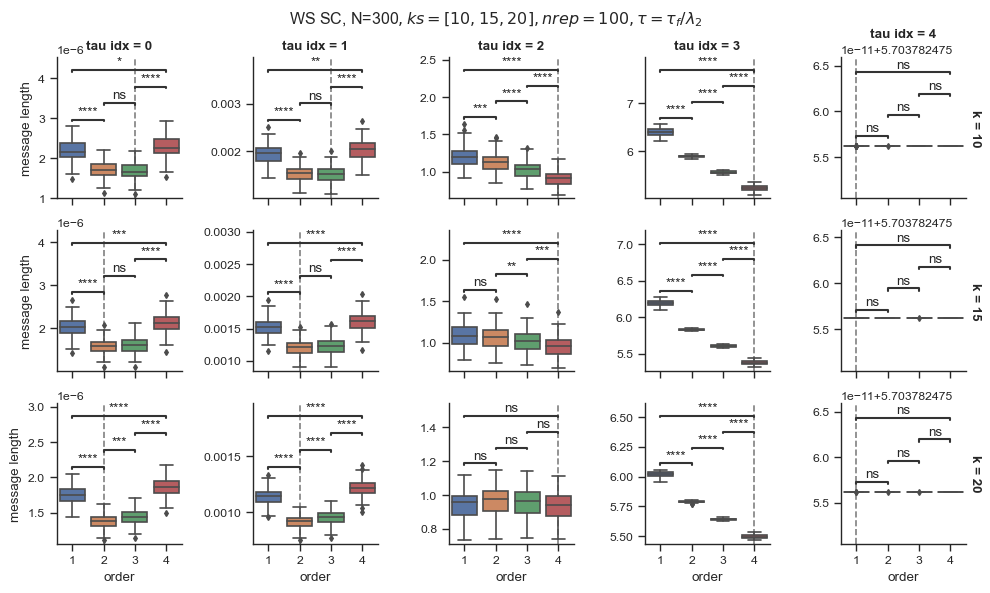

In [151]:
g = sb.catplot(
    kind="box",
    data=df_WSSC,
    x="order",
    y="message length",
    row="k",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, kk in enumerate(kks):

        ax = g.axes[j, i]
        mask = (df_WSSC["tau idx"] == i) * (df_WSSC["k"] == kk)

        annotator = Annotator(
            ax,
            pairs,
            data=df_WSSC[mask],
            y="message length",
            x="order",
            row="k",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_WSSC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"WS SC, N={N}$, ks={kks}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
g.fig.suptitle(title)

fig_name = f"message_length_WSSC_N{N}_ks_{kks}_nreps_{n_rep}_boxplot_minmax"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [152]:
df_WSSC.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_WSSC_N300_ks_[10, 15, 20]_nreps_100_boxplot_minmax'

## Maximally simplicial

In [36]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [10, 15, 20, 25]

n_rep = 50

rescale = True

In [37]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_flag_complex(N, density / N, max_order=4)
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|███████████████████████████████████████████| 50/50 [00:17<00:00,  2.94it/s]


In [38]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():

    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_c = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2

        # check difference with other tau
        tau2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
        tauN = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)
        # print(f"{tauN / tau2:.2f}")

        tau_factors = np.array([0.01, 0.1, 1, 10, 100])
        taus = tau_factors * tau_c

        for j, tau in enumerate(taus):

            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
            )

            info_losses[density][i][tau_factor] = Ds_H
            complexities[density][i][tau_factor] = lZs_H
            orders_arr[density][i][tau_factor] = orders
            message_lengths[density][i][tau_factor] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

100%|███████████████████████████████████████████| 50/50 [15:54<00:00, 19.09s/it]


In [41]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_MSC = pd.DataFrame(
    long_form_data, columns=["message length", "density", "rep", "tau fact.", "order"]
)

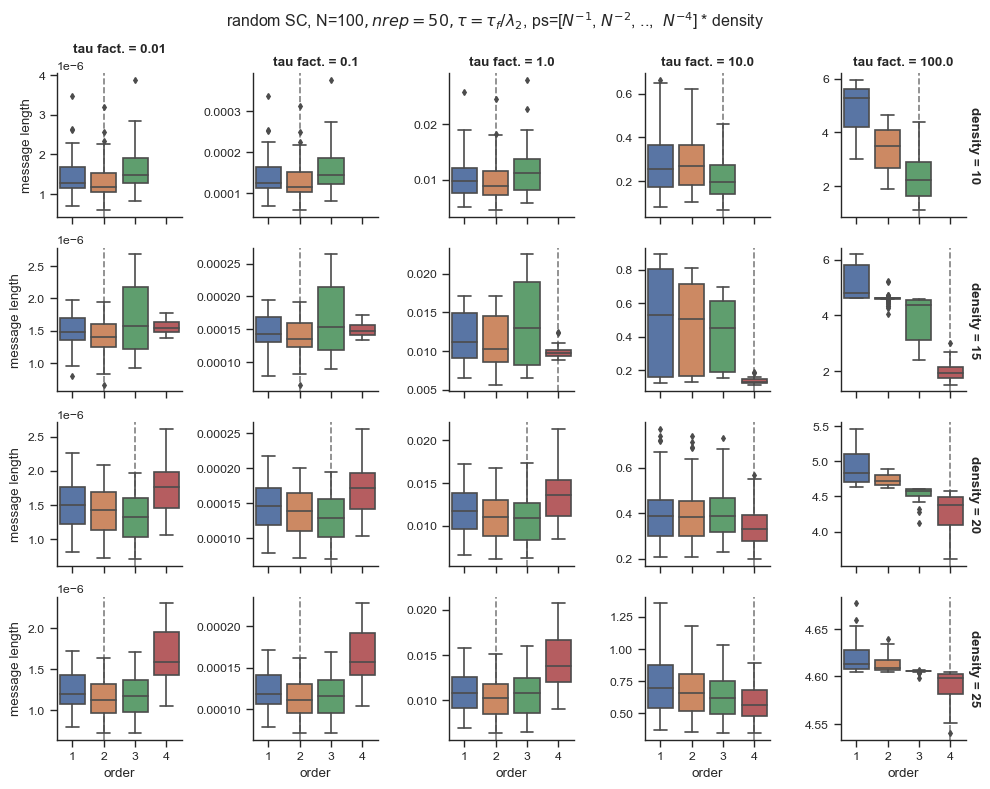

In [42]:
g = sb.catplot(
    kind="box",
    data=df_MSC,
    x="order",
    y="message length",
    row="density",
    col="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_MSC["tau fact."] == tau_fact) * (df_MSC["density"] == density)

        # annotator = Annotator(
        #    ax,
        #    pairs,
        #    data=df_MSC[mask],
        #    y="message length",
        #    x="order",
        #    row="density",
        #    col="tau fact.",
        # )
        # annotator.configure(
        #    test="t-test_welch", text_format="star", loc="inside", verbose=0
        # )
        # annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_MSC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RSC_N{N}_pwiring_{density_scales}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [28]:
find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

1.3309406974498583